In [4]:
%load_ext autoreload
%autoreload 2

In [23]:
## TabNet normal
### Tabnetnormal loop
## Pytorch_tabnet

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time

from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

#con_idxs = [0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
#           25, 26, 27, 28, 29, 30, 31 ]
#cat_dims = []
#con_idxs = [5, 6, 7, 8]

con_idxs = range(len(predictor))
cat_idxs = []
cat_dims = []

max_epochs = 100

tn = TabNetClassifier(
                            n_d = 8,
                            n_a = 8,
                            cat_idxs = cat_idxs,
                            con_idxs = con_idxs,
                            cat_emb_dim = 1, 
                            con_emb_dim = 1,
                            momentum = 0.9,
                            optimizer_fn=torch.optim.Adam,
                            optimizer_params=dict(lr=1e-2),
                            scheduler_params={"step_size":10, "gamma":0.95},
                            scheduler_fn=torch.optim.lr_scheduler.StepLR,
                            mask_type="sparsemax")
start_time = time.time()
tn.fit(X_train = X_train, y_train = y_train,
                                eval_metric=['auc'],
                                max_epochs=max_epochs , patience=10,
                                batch_size=32, virtual_batch_size=32,
                                num_workers=0,
                                weights=1,
                                drop_last=False)

end_time = time.time()
y_train_pred_9 = tn.predict_proba(X_train)
y_test_pred_9 = tn.predict_proba(X_test)
print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9[:,1]))
print("Time taken to process:\t", end_time - start_time)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.74517 |  0:00:03s
epoch 1  | loss: 0.6757  |  0:00:07s
epoch 2  | loss: 0.67011 |  0:00:12s
epoch 3  | loss: 0.65307 |  0:00:17s
epoch 4  | loss: 0.64346 |  0:00:22s
epoch 5  | loss: 0.62441 |  0:00:26s
epoch 6  | loss: 0.62134 |  0:00:30s
epoch 7  | loss: 0.60544 |  0:00:33s
epoch 8  | loss: 0.61755 |  0:00:37s
epoch 9  | loss: 0.60266 |  0:00:41s
epoch 10 | loss: 0.60716 |  0:00:44s
epoch 11 | loss: 0.59232 |  0:00:48s
epoch 12 | loss: 0.60028 |  0:00:52s
epoch 13 | loss: 0.58779 |  0:00:57s
epoch 14 | loss: 0.58643 |  0:01:00s
epoch 15 | loss: 0.61366 |  0:01:04s
epoch 16 | loss: 0.58155 |  0:01:08s
epoch 17 | loss: 0.59527 |  0:01:13s
epoch 18 | loss: 0.59224 |  0:01:18s
epoch 19 | loss: 0.58711 |  0:01:22s
epoch 20 | loss: 0.58801 |  0:01:26s
epoch 21 | loss: 0.59037 |  0:01:30s
epoch 22 | loss: 0.58155 |  0:01:34s
epoch 23 | loss: 0.56162 |  0:01:38s
epoch 24 | loss: 0.55

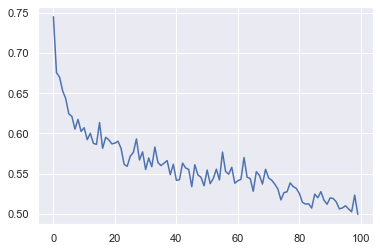

In [24]:
# plot losses
plt.plot(tn.history['loss'])

In [25]:
preds = tn.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)
print(f"FINAL TEST SCORE FOR : {test_auc}")

FINAL TEST SCORE FOR : 0.721853586607685


In [21]:
tn.history

{'loss': [0.7451742221988005, 0.6756981892013417, 0.6701080257128939, 0.6530702366582682, 0.6434595084073906, 0.6244052402721946, 0.6213434367269713, 0.6054357178795197, 0.6175515781061182, 0.6026563186455839, 0.6071596839838901, 0.5923184088619123, 0.6002795108946903, 0.5877912855614172, 0.5864298952183188, 0.6136593794955794, 0.5815462658060901, 0.5952681302192404, 0.5922370139985174, 0.5871094178255003, 0.5880051436161381, 0.5903680644830622, 0.5815516868339745, 0.5616222627913297, 0.5591870162425471, 0.571933115747369, 0.5764490561891249, 0.5932942009105269, 0.5670645569931437, 0.5771670520347227, 0.5552779240618195, 0.5695804233369673, 0.5587368932788552, 0.58314579122148, 0.5638628948092547, 0.5601365681885839, 0.5631139366175857, 0.5662999112582754, 0.548759463194443, 0.5617232204357061, 0.5418053521447805, 0.5425422845898353, 0.5632261838516983, 0.5571961668264757, 0.5553561307214313, 0.5338971987938598, 0.5611796452711281, 0.5484262177849347, 0.545616412487216, 0.5349259360720

# 1. Import the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])



# 3. Train the model

## 3.1 Decision Tree - Done

In [11]:
start_time = time.time()
## 1. Decision Tree
parameters = {'criterion': ['gini','entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,150], 'min_samples_split':[2,3,4,5,6,7]}
dectree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'roc_auc', n_jobs = -1, cv = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict_proba(X_train)
y_test_pred = dectree.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Best parameters")
print(dectree.best_params_)
print("Confusion matrix")
#print(confusion_matrix(y_test,y_test_pred))
print("Classification report")
#print(classification_report(y_test,y_test_pred))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred[:,1]))
print("Time taken to process: ", end_time - start_time)

Best parameters
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Confusion matrix
Classification report
Training set accuracy:	 0.7480935267077431
Test set accuracy:	 0.7417273831208256
Time taken to process:  14.27021050453186


In [10]:
start_time = time.time()
## 1. Decision Tree
test_auc = []
test_acc = []
for criterion in ['gini','entropy']:
    for max_depth in [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,150]:
        for min_samples_split in [2,3,4]:
            dectree = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split)# create the decision tree object
            dectree.fit(X_train, y_train)                    # train the decision tree model
            y_train_pred = dectree.predict_proba(X_train)
            y_test_pred = dectree.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_test_pred)
            acc = accuracy_score(y_test, y_test_pred)
            test_auc.append([auc, criterion, max_depth, min_samples_split])
            test_acc.append([acc, criterion, max_depth, min_samples_split])
end_time = time.time()

ValueError: y should be a 1d array, got an array of shape (717, 2) instead.

In [21]:
test_auc_sorted = sorted(test_auc, key = lambda x: x[0], reverse = True)
test_auc_sorted

[[0.6152419984387199, 'entropy', 4, 2],
 [0.6152419984387199, 'entropy', 4, 3],
 [0.6152419984387199, 'entropy', 4, 4],
 [0.606817590424148, 'gini', 15, 2],
 [0.602751756440281, 'gini', 20, 3],
 [0.6000195160031225, 'gini', 90, 2],
 [0.5972872755659641, 'gini', 40, 3],
 [0.5964903721051261, 'gini', 15, 3],
 [0.5952218319021597, 'gini', 90, 3],
 [0.5940671350507415, 'gini', 90, 4],
 [0.5931563882383555, 'gini', 50, 2],
 [0.5931563882383555, 'entropy', 40, 2],
 [0.5924082747853239, 'gini', 12, 3],
 [0.5917577413479053, 'gini', 70, 3],
 [0.590912047879261, 'entropy', 50, 3],
 [0.589204397606037, 'gini', 15, 4],
 [0.5890255009107469, 'gini', 150, 3],
 [0.5876593806921676, 'gini', 6, 2],
 [0.5872365339578454, 'gini', 7, 3],
 [0.5872365339578454, 'gini', 7, 4],
 [0.5869600572469424, 'gini', 70, 4],
 [0.5869600572469424, 'entropy', 20, 4],
 [0.5862932604735884, 'entropy', 70, 4],
 [0.5862932604735884, 'entropy', 150, 2],
 [0.5853825136612022, 'entropy', 30, 2],
 [0.5849434035909447, 'entropy'

In [23]:
test_acc_sorted = sorted(test_acc, key = lambda x: x[0], reverse = True)
test_acc_sorted

[[0.7670850767085077, 'gini', 6, 3],
 [0.7670850767085077, 'gini', 6, 4],
 [0.7656903765690377, 'gini', 5, 4],
 [0.7642956764295676, 'gini', 4, 2],
 [0.7642956764295676, 'gini', 4, 3],
 [0.7642956764295676, 'gini', 4, 4],
 [0.7642956764295676, 'gini', 5, 2],
 [0.7642956764295676, 'gini', 5, 3],
 [0.7642956764295676, 'gini', 6, 2],
 [0.7642956764295676, 'gini', 7, 3],
 [0.7615062761506276, 'gini', 7, 4],
 [0.7587168758716876, 'entropy', 4, 2],
 [0.7587168758716876, 'entropy', 4, 3],
 [0.7587168758716876, 'entropy', 4, 4],
 [0.7573221757322176, 'gini', 7, 2],
 [0.7573221757322176, 'entropy', 5, 2],
 [0.7573221757322176, 'entropy', 5, 3],
 [0.7573221757322176, 'entropy', 5, 4],
 [0.7545327754532776, 'entropy', 6, 3],
 [0.7545327754532776, 'entropy', 6, 4],
 [0.7531380753138075, 'entropy', 6, 2],
 [0.7475592747559274, 'entropy', 7, 3],
 [0.7447698744769874, 'entropy', 7, 2],
 [0.7433751743375174, 'gini', 9, 3],
 [0.7433751743375174, 'gini', 9, 4],
 [0.7433751743375174, 'entropy', 8, 3],
 [

In [ ]:
print("==========================")
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("Classification report")
print(classification_report(y_test,y_test_pred))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred))
print("Time taken to process: ", end_time - start_time)

In [12]:
## Decision Tree single
start_time = time.time()
## 1. Decision Tree
dectree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_split = 2)# create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

y_train_pred = dectree.predict_proba(X_train)
y_test_pred = dectree.predict_proba(X_test)



end_time = time.time()

print("==========================")
print("Confusion matrix")
#print(confusion_matrix(y_test,y_test_pred))
print("Classification report")
#print(classification_report(y_test,y_test_pred))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred[:,1]))
print("Time taken to process: ", end_time - start_time)

Confusion matrix
Classification report
Training set accuracy:	 0.7480935267077431
Test set accuracy:	 0.7417273831208256
Time taken to process:  0.03278064727783203


In [9]:
print(y_train_pred)

[[0.63919822 0.36080178]
 [0.96536797 0.03463203]
 [0.63919822 0.36080178]
 ...
 [0.40594059 0.59405941]
 [0.69623656 0.30376344]
 [0.96536797 0.03463203]]


## 3.2 Random Forest - Done

In [ ]:
start_time = time.time()

## 2. Random Forest
parameters = { 
    'n_estimators': [50, 150, 200, 250, 500],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini','entropy'],
    'max_features': ['sqrt', 'auto', 'log2', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}
model = RandomForestClassifier(random_state=42)
rf = GridSearchCV(estimator=model, param_grid=parameters, scoring = 'roc_auc', n_jobs = -1, cv= 5)
rf.fit(X_train, y_train)
y_train_pred_2 = rf.predict_proba(X_train)
y_test_pred_2 = rf.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Best parameters")
print(rf.best_params_)
print("Training roc auc:\t", roc_auc_score(y_train, y_train_pred_2[:,1]))
print("Test roc auc:\t", roc_auc_score(y_test, y_test_pred_2[:,1]))
print("Time taken to process: ", end_time - start_time)

In [ ]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
start_time = time.time()

## 2. Random Forest
test_auc = []
test_acc = []
for n_estimators in [50, 150, 200, 250, 500]:
    for max_depth in [4,5,6,7,8, 9, 10]:
        for criterion in ['gini', 'entropy']:
            for max_features in ['sqrt', 'auto', 'log2', 0.25, 0.5, 0.75, 1.0]:
                for min_samples_split in [2,4,6]:
                    rf = RandomForestClassifier(random_state = 42, criterion = criterion, max_depth = max_depth, max_features = max_features, n_estimators = n_estimators)
                    rf.fit(X_train, y_train)
                    y_train_pred_2 = rf.predict(X_train)
                    y_test_pred_2 = rf.predict(X_test)
                    auc = roc_auc_score(y_test, y_test_pred_2)
                    acc = accuracy_score(y_test, y_test_pred_2)
                    test_auc.append([auc, criterion, max_depth, min_samples_split])
                    test_acc.append([acc, criterion, max_depth, min_samples_split])

end_time = time.time()

In [ ]:
test_auc_sorted = sorted(test_auc, key = lambda x: x[0], reverse = True)
test_acc_sorted = sorted(test_acc, key = lambda x: x[0], reverse = True)
print("Top test auc score")
print(test_auc_sorted[:5])
print("Top test accuracy score")
print(test_acc_sorted[:5])

In [3]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
start_time = time.time()

## 2. Random Forest
rf = RandomForestClassifier(random_state = 42, criterion = 'entropy', max_depth = 9, max_features = 'sqrt', min_samples_split = 6, n_estimators = 500)
rf.fit(X_train, y_train)
y_train_pred_2 = rf.predict_proba(X_train)
y_test_pred_2 = rf.predict_proba(X_test)

end_time = time.time()

print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_2[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_2[:,1]))
print("Time taken to process: ", end_time - start_time)

Training set accuracy:	 0.9062133690548113
Test set accuracy:	 0.7768236620695638
Time taken to process:  1.7406339645385742


## 3.3 Logistic Regression - Done

In [3]:
## 3. Logistic Regression
start_time = time.time()
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001,.009,0.01,.09,1,5,10,25]}
model = LogisticRegression()
LR = GridSearchCV(estimator=model, param_grid=parameters, scoring = 'roc_auc', n_jobs = -1, cv= 5)
LR.fit(X_train, y_train)
y_train_pred_3 = LR.predict_proba(X_train)
y_test_pred_3 = LR.predict_proba(X_test)
end_time = time.time()

print("==========================")
print("Best parameters")
print(LR.best_params_)
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_3[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_3[:,1]))
print("Time taken to process: ", end_time - start_time)


Best parameters
{'C': 0.09, 'penalty': 'l2'}
Training set accuracy:	 0.7638306086830833
Test set accuracy:	 0.7771164021164021
Time taken to process:  0.9620254039764404


C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\root\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
## 3. Logistic Regression
start_time = time.time()
LR = LogisticRegression(C = 0.09, penalty = 'l2')
LR.fit(X_train, y_train)
y_train_pred_3 = LR.predict_proba(X_train)
y_test_pred_3 = LR.predict_proba(X_test)
end_time = time.time()

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_3[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_3[:,1]))
print("Time taken to process: ", end_time - start_time)


Training set accuracy:	 0.7638306086830833
Test set accuracy:	 0.7771164021164021
Time taken to process:  0.06399774551391602


C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\root\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.4 Support Vector Machine - Done

In [4]:
## 4. Support Vector Machine
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
parameters = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01, 0.001]}
model = svm.SVC(probability=True)
SVM = GridSearchCV(estimator=model, param_grid=parameters, scoring = 'roc_auc', n_jobs = -1, verbose = 2, cv = 5)
SVM.fit(X_train, y_train)
y_train_pred_4 = SVM.predict_proba(X_train)
y_test_pred_4 = SVM.predict_proba(X_test)

print("==========================")
print("Best parameters") 
print(SVM.best_params_)
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_4[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_4[:,1]))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   44.3s finished


Best parameters
{'C': 10, 'gamma': 0.001}
Training set accuracy:	 0.7737267091376951
Test set accuracy:	 0.7537839361609855


In [17]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [2]:
## 4. Support Vector Machine
auc_score = []
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
for c in [0.1, 1, 10, 100]:
    for gamma in [1,0.1,0.01, 0.001]:
        print("Training with c =", c, ", gamma =", gamma)
        SVM = svm.SVC(C = 1, gamma = 0.1)
        SVM.fit(X_train, y_train)
        y_test_pred_4 = SVM.predict(X_test)
        auc = roc_auc_score(y_test, y_test_pred_4)
        auc_score.append([auc, c, gamma])
auc_score_sorted = sorted(auc_score, key = lambda x: x[0], reverse = True)
print("Top 5 performance:")
print(auc_score_sorted[:5])

Training with c = 0.1 , gamma = 1
Training with c = 0.1 , gamma = 0.1
Training with c = 0.1 , gamma = 0.01
Training with c = 0.1 , gamma = 0.001
Training with c = 1 , gamma = 1
Training with c = 1 , gamma = 0.1
Training with c = 1 , gamma = 0.01
Training with c = 1 , gamma = 0.001
Training with c = 10 , gamma = 1
Training with c = 10 , gamma = 0.1
Training with c = 10 , gamma = 0.01
Training with c = 10 , gamma = 0.001
Training with c = 100 , gamma = 1
Training with c = 100 , gamma = 0.1
Training with c = 100 , gamma = 0.01
Training with c = 100 , gamma = 0.001
Top 5 performance:
[[0.5172553994275305, 0.1, 1], [0.5172553994275305, 0.1, 0.1], [0.5172553994275305, 0.1, 0.01], [0.5172553994275305, 0.1, 0.001], [0.5172553994275305, 1, 1]]


In [5]:
## 4. Support Vector Machine
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
SVM = svm.SVC(C = 10, gamma = 0.001, probability = True)
start_time = time.time()
SVM.fit(X_train, y_train)
end_time = time.time()
y_train_pred_4 = SVM.predict_proba(X_train)
y_test_pred_4 = SVM.predict_proba(X_test)

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_4[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_4[:,1]))
print("Time taken to process: ", end_time - start_time)

Training set accuracy:	 0.7737257581991506
Test set accuracy:	 0.7538056206088992
Time taken to process:  1.774001121520996


In [ ]:
## 4. Support Vector Machine
auc
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
for c in [0.1, 1, 10, 100]:
    for gamma in [1,0.1,0.01, 0.001]:
        SVM = svm.SVC(C = 1, gamma = 0.1)
        start_time = time.time()
        SVM.fit(X_train, y_train)
        end_time = time.time()
        y_test_pred_4 = SVM.predict(X_test)

print("==========================")
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred_4))
print("Classification report")
print(classification_report(y_test,y_test_pred_4))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_4))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_4))
print("Time taken to process: ", end_time - start_time)

## 3.5 MLPClassifier - Done

In [5]:
## 5. MLPClassifer
start_time = time.time()
parameters = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 5e-2],
    'learning_rate': ['constant','adaptive'],
}
model =  MLPClassifier(random_state=1, max_iter=300)
NN = GridSearchCV(model, parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
NN.fit(X_train, y_train)
y_train_pred_5 = NN.predict_proba(X_train)
y_test_pred_5 = NN.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Best parameters")
print(NN.best_params_)
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_5[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_5[:,1]))
print("Time taken to process:\t", end_time - start_time)

C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best parameters
{'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
Confusion matrix


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [6]:
## 5. MLPClassifer
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
start_time = time.time()
NN = MLPClassifier(random_state=1, max_iter=300, activation = 'relu', alpha = 0.05, learning_rate = 'constant', solver = 'adam')
NN.fit(X_train, y_train)
y_train_pred_5 = NN.predict_proba(X_train)
y_test_pred_5 = NN.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_5[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_5[:,1]))
print("Time taken to process:\t", end_time - start_time)

Training set accuracy:	 0.7806387644392093
Test set accuracy:	 0.7702749587995491
Time taken to process:	 2.8476192951202393


## 3.6 XGBoost - Done

In [7]:
## 6. XGBoost
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
start_time = time.time()
parameters = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': range(3, 10),
    'gamma': [i/10.0 for i in range(3)],
  }
model = XGBClassifier()
clf = GridSearchCV(model, parameters, scoring = 'roc_auc', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
y_train_pred_6 = clf.predict_proba(X_train)
y_test_pred_6 = clf.predict_proba(X_test)
end_time = time.time()

print("==========================")
print("Best parameters")
print(clf.best_params_)
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_6[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_6[:,1]))
print("Time taken to process:\t", end_time - start_time)


C:\Users\root\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters
{'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
Training set accuracy:	 0.8004972140670437
Test set accuracy:	 0.7732999392835458
Time taken to process:	 2011.0622494220734


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [3]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
auc_score = []
for n_estimators in [50, 100, 150, 200, 300, 400, 500]:
    for learning_rate in [0.001, 0.01, 0.1, 0.2, 0.3]:
        for max_depth in range(3,10):
            for gamma in [i/10.0 for i in range(3)]:
                clf = XGBClassifier(gamma = gamma, learning_rate = learning_rate, max_depth = max_depth, n_estimators = n_estimators, use_label_encoder = False)
                clf.fit(X_train, y_train)
                y_test_pred_6 = clf.predict(X_test)
                auc = roc_auc_score(y_test, y_test_pred_6)
                auc_score.append([auc, n_estimators, learning_rate, max_depth, gamma])
auc_score_sorted = sorted(auc_score, key = lambda x: x[0], reverse = True)
print("Top 5 performance:")
print(auc_score_sorted[:5])

[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:23:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



[13:24:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(



[13:24:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:24:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:25:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:26:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:27:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:28:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:41] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:29:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:45] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:30:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[13:31:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top 5 performance:
[[0.627748503773094, 200, 0.01, 7, 0.0], [0.6269028103044497, 500, 0.001, 8, 0.2], [0.6268377569607079, 200, 0.01, 7, 0.1], [0.6259270101483217, 100, 0.2, 3, 0.1], [0.6255041634139995, 50, 0.01, 7, 0.1]]


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [8]:
## 6. XGBoost
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
start_time = time.time()
clf = XGBClassifier(max_depth=3,n_estimators=400,gamma = 0.0,reg_alpha = 1,min_child_weight=3,learning_rate=0.01, nthread=8,subsample=0.80,colsample_bytree=0.80,seed=4244 )
clf.fit(X_train, y_train)
y_train_pred_6 = clf.predict_proba(X_train)
y_test_pred_6 = clf.predict_proba(X_test)
end_time = time.time()

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_6[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_6[:,1]))
print("Time taken to process:\t", end_time - start_time)


C:\Users\root\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set accuracy:	 0.7962328886533379
Test set accuracy:	 0.7740588949605345
Time taken to process:	 1.0309484004974365


C:\Users\root\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## 3.7 LightGBM - Done

In [25]:
## 7. LightGBM
# convert y_train, y_test to list
start_time = time.time()
y_train_list = np.array(y_train).ravel()
y_test_list = np.array(y_test).ravel()

#converting the dataset to proper LGB format
d_train=lgb.Dataset(X_train, label=y_train_list)

#Specifying the parameter
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}
gridParams = {
    'learning_rate': [0.005, 1e-3, 1e-2, 1e-4],
    'n_estimators': [10, 20, 40, 50, 100, 300, 500, 600, 1000],
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
}

model = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

gsearch = GridSearchCV(model, gridParams,
                    cv=5,
                    n_jobs=-1)
clf = gsearch.fit(X=X_train, y=y_train_list)

y_train_pred_7 = clf.predict(X_train)
y_train_pred_7=y_train_pred_7.round(0)
y_train_pred_7=y_train_pred_7.astype(int)

y_test_pred_7 = clf.predict(X_test)
y_test_pred_7=y_test_pred_7.round(0)
y_test_pred_7=y_test_pred_7.astype(int)

end_time = time.time()

print("==========================")
print("Best parameters")
print(clf.best_params_)
print("Confusion matrix")
print(confusion_matrix(y_test_list,y_test_pred_7))
print("Classification report")
print(classification_report(y_test_list,y_test_pred_7))
print("Training set accuracy:\t", roc_auc_score(y_train_list, y_train_pred_7))
print("Test set accuracy:\t", roc_auc_score(y_test_list, y_test_pred_7))
print("Time taken to process:\t", end_time - start_time)

Best parameters
{'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 500, 'reg_alpha': 1.2, 'reg_lambda': 1.4, 'subsample': 0.7}
Confusion matrix
[[526  23]
 [134  34]]
Classification report
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       549
           1       0.60      0.20      0.30       168

    accuracy                           0.78       717
   macro avg       0.70      0.58      0.59       717
weighted avg       0.75      0.78      0.74       717

Training set accuracy:	 0.6182713965927238
Test set accuracy:	 0.5802432995055946
Time taken to process:	 1271.9670338630676


In [2]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
auc_score = []
for n_estimators in [10, 20, 40, 50, 100, 300, 500, 600, 1000]:
    for learning_rate in [0.1, 0.01, 0.001, 0.005, 1e-4]:
        for colsample_bytree in [0.65, 0.66]:
            for sub_sample in [0.7, 0.75]:
                for reg_alpha in [1, 1.2]:
                    for reg_lambda in [1, 1.2, 1.4]:
                        gsearch = lgb.LGBMClassifier(boosting_type= 'gbdt',
                                                      objective = 'binary',
                                                      n_jobs = 3, # Updated from 'nthread'
                                                      silent = True,
                                                      max_depth = params['max_depth'],
                                                      max_bin = params['max_bin'],
                                                      subsample_for_bin = params['subsample_for_bin'],
                                                      subsample = params['subsample'],
                                                      subsample_freq = params['subsample_freq'],
                                                      min_split_gain = params['min_split_gain'],
                                                      min_child_weight = params['min_child_weight'],
                                                      min_child_samples = params['min_child_samples'],
                                                      scale_pos_weight = params['scale_pos_weight'], 
                                                        colsample_bytree= colsample_bytree, learning_rate= learning_rate,
                                                      n_estimators= n_estimators, 
                                                      reg_alpha= reg_alpha, reg_lambda= reg_lambda)

                        gsearch.fit(X=X_train, y=y_train)
                        y_test_pred_7 = gsearch.predict(X_test)
                        auc = roc_auc_score(y_test, y_test_pred_7)
                        auc_score.append([auc, n_estimators, learning_rate, colsample_bytree, sub_sample, reg_alpha, reg_lambda])
auc_score_sorted = sorted(auc_score, key = lambda x: x[0], reverse = True)
print("Top 5 performance:")
print(auc_score_sorted[:5])

Top 5 performance:
[[0.6293260473588342, 100, 0.1, 0.65, 0.7, 1.2, 1.4], [0.6293260473588342, 100, 0.1, 0.65, 0.75, 1.2, 1.4], [0.6293260473588342, 100, 0.1, 0.66, 0.7, 1.2, 1.4], [0.6293260473588342, 100, 0.1, 0.66, 0.75, 1.2, 1.4], [0.6293260473588342, 300, 0.1, 0.65, 0.7, 1.2, 1.4]]


In [9]:
## 7. LightGBM
# convert y_train, y_test to list
y_train_list = np.array(y_train).ravel()
y_test_list = np.array(y_test).ravel()
start_time = time.time()

0.
#Specifying the parameter
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

gsearch = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'], 
            colsample_bytree= 0.65, learning_rate= 0.1,
          n_estimators= 100, 
          reg_alpha= 1.2, reg_lambda= 1.4)

gsearch.fit(X=X_train, y=y_train_list)

y_train_pred_7 = gsearch.predict_proba(X_train)
#y_train_pred_7=y_train_pred_7.round(0)
#y_train_pred_7=y_train_pred_7.astype(int)

y_test_pred_7 = gsearch.predict_proba(X_test)
#y_test_pred_7=y_test_pred_7.round(0)
#y_test_pred_7=y_test_pred_7.astype(int)

end_time = time.time()

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train_list, y_train_pred_7[:,1], labels=np.unique(y_train_pred_7)))
print("Test set accuracy cy:\t", roc_auc_score(y_test_list, y_test_pred_7[:,1], labels=np.unique(y_train_pred_7)))
print("Time taken to process:\t", end_time - start_time)

Training set accuracy:	 0.8745046402631184
Test set accuracy cy:	 0.7663500737271229
Time taken to process:	 0.20002126693725586


## 3.8 CatBoost - Done

To train the model we are going to use Catboost’s inbuilt grid search method. If you have used Sci-Kit learns Grid Search CV then this works in the same way. First we declare a dictionary of the hyperparameters that we want to tune and lists of values to test. We have decided to tune just a few of the most influential parameters: learning rate, tree depth, L2 leaf regularisation and also the number of iterations we will train the model for.

</br>

Now we can fit the model using the grid search method by passing the grid dictionary we declared above along with the training data pool. By default grid search splits the training data into an 80/20 split for training and testing with a three fold cross validation strategy.

In [13]:
## 8. CatBoost
start_time = time.time()
# Convert dataset into proper catboost format
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC')

parameters = {
          'learning_rate' : [0,1, 0.01, 0.02, 0.001, 0.002],
          'depth':[2, 3, 4, 5, 7, 9, 10],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg':[1,4,9]}
 #         'iterations': [1200],
#           'early_stopping_rounds':[1000],
#          'task_type':['GPU'],
#           'loss_function':['MultiClass'],
             
clf_grid = GridSearchCV(estimator=model, param_grid=parameters, scoring = 'roc_auc', cv=5, n_jobs = -1)
clf_grid.fit(X_train, y_train)
y_train_pred_8 = clf_grid.predict_proba(X_train)
y_test_pred_8 = clf_grid.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Best parameters")
print(clf_grid.best_params_)
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_8[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_8[:,1]))
print("Time taken to process:\t", end_time - start_time)

0:	total: 13.5ms	remaining: 13.5s
1:	total: 16.9ms	remaining: 8.45s
2:	total: 19.2ms	remaining: 6.4s
3:	total: 21.7ms	remaining: 5.41s
4:	total: 24.1ms	remaining: 4.79s
5:	total: 26.5ms	remaining: 4.4s
6:	total: 28.9ms	remaining: 4.09s
7:	total: 31.2ms	remaining: 3.87s
8:	total: 33.4ms	remaining: 3.68s
9:	total: 40.5ms	remaining: 4.01s
10:	total: 43ms	remaining: 3.87s
11:	total: 45.3ms	remaining: 3.73s
12:	total: 47.6ms	remaining: 3.61s
13:	total: 49.5ms	remaining: 3.49s
14:	total: 51.9ms	remaining: 3.41s
15:	total: 54ms	remaining: 3.32s
16:	total: 56.5ms	remaining: 3.27s
17:	total: 59ms	remaining: 3.22s
18:	total: 62.1ms	remaining: 3.21s
19:	total: 65.1ms	remaining: 3.19s
20:	total: 67.5ms	remaining: 3.15s
21:	total: 70.2ms	remaining: 3.12s
22:	total: 72.7ms	remaining: 3.09s
23:	total: 75.1ms	remaining: 3.05s
24:	total: 77.2ms	remaining: 3.01s
25:	total: 79.4ms	remaining: 2.98s
26:	total: 81.9ms	remaining: 2.95s
27:	total: 84.4ms	remaining: 2.93s
28:	total: 87.3ms	remaining: 2.92s
29:

272:	total: 664ms	remaining: 1.77s
273:	total: 667ms	remaining: 1.77s
274:	total: 669ms	remaining: 1.76s
275:	total: 673ms	remaining: 1.77s
276:	total: 676ms	remaining: 1.76s
277:	total: 680ms	remaining: 1.77s
278:	total: 684ms	remaining: 1.77s
279:	total: 688ms	remaining: 1.77s
280:	total: 690ms	remaining: 1.77s
281:	total: 694ms	remaining: 1.76s
282:	total: 696ms	remaining: 1.76s
283:	total: 699ms	remaining: 1.76s
284:	total: 703ms	remaining: 1.76s
285:	total: 706ms	remaining: 1.76s
286:	total: 710ms	remaining: 1.76s
287:	total: 713ms	remaining: 1.76s
288:	total: 718ms	remaining: 1.77s
289:	total: 722ms	remaining: 1.77s
290:	total: 726ms	remaining: 1.77s
291:	total: 729ms	remaining: 1.77s
292:	total: 734ms	remaining: 1.77s
293:	total: 737ms	remaining: 1.77s
294:	total: 743ms	remaining: 1.77s
295:	total: 747ms	remaining: 1.78s
296:	total: 751ms	remaining: 1.78s
297:	total: 754ms	remaining: 1.78s
298:	total: 757ms	remaining: 1.77s
299:	total: 760ms	remaining: 1.77s
300:	total: 763ms	re

536:	total: 1.46s	remaining: 1.26s
537:	total: 1.46s	remaining: 1.26s
538:	total: 1.47s	remaining: 1.25s
539:	total: 1.47s	remaining: 1.25s
540:	total: 1.47s	remaining: 1.25s
541:	total: 1.48s	remaining: 1.25s
542:	total: 1.48s	remaining: 1.24s
543:	total: 1.48s	remaining: 1.24s
544:	total: 1.49s	remaining: 1.24s
545:	total: 1.49s	remaining: 1.24s
546:	total: 1.49s	remaining: 1.24s
547:	total: 1.49s	remaining: 1.23s
548:	total: 1.5s	remaining: 1.23s
549:	total: 1.5s	remaining: 1.23s
550:	total: 1.5s	remaining: 1.23s
551:	total: 1.51s	remaining: 1.22s
552:	total: 1.51s	remaining: 1.22s
553:	total: 1.51s	remaining: 1.22s
554:	total: 1.51s	remaining: 1.22s
555:	total: 1.52s	remaining: 1.21s
556:	total: 1.52s	remaining: 1.21s
557:	total: 1.52s	remaining: 1.21s
558:	total: 1.53s	remaining: 1.2s
559:	total: 1.53s	remaining: 1.2s
560:	total: 1.53s	remaining: 1.2s
561:	total: 1.54s	remaining: 1.2s
562:	total: 1.54s	remaining: 1.2s
563:	total: 1.54s	remaining: 1.19s
564:	total: 1.55s	remaining:

794:	total: 2.27s	remaining: 584ms
795:	total: 2.27s	remaining: 582ms
796:	total: 2.27s	remaining: 579ms
797:	total: 2.27s	remaining: 576ms
798:	total: 2.28s	remaining: 573ms
799:	total: 2.28s	remaining: 570ms
800:	total: 2.28s	remaining: 567ms
801:	total: 2.29s	remaining: 564ms
802:	total: 2.29s	remaining: 561ms
803:	total: 2.29s	remaining: 559ms
804:	total: 2.29s	remaining: 556ms
805:	total: 2.3s	remaining: 553ms
806:	total: 2.3s	remaining: 550ms
807:	total: 2.3s	remaining: 547ms
808:	total: 2.31s	remaining: 544ms
809:	total: 2.31s	remaining: 541ms
810:	total: 2.31s	remaining: 538ms
811:	total: 2.31s	remaining: 536ms
812:	total: 2.32s	remaining: 533ms
813:	total: 2.32s	remaining: 530ms
814:	total: 2.32s	remaining: 527ms
815:	total: 2.32s	remaining: 524ms
816:	total: 2.33s	remaining: 521ms
817:	total: 2.33s	remaining: 518ms
818:	total: 2.33s	remaining: 516ms
819:	total: 2.33s	remaining: 513ms
820:	total: 2.34s	remaining: 510ms
821:	total: 2.35s	remaining: 508ms
822:	total: 2.35s	remai

In [4]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
auc_score = []
for depth in [2, 3, 4, 5, 7, 9, 10]:
    for learning_rate in [0.001, 0.002, 0.01, 0.1, 0.2, 0.3]:
        for loss_function in ['Logloss', 'CrossEntropy']:
            for l2_leaf_reg in np.logspace(-20, -19, 3):
                clf_grid = cb.CatBoostClassifier(loss_function=loss_function, eval_metric='AUC', depth  = depth,
                                l2_leaf_reg= l2_leaf_reg, learning_rate= learning_rate, iterations = 500)
                clf_grid.fit(X_train, y_train)
                y_test_pred_8 = clf_grid.predict(X_test)
                auc = roc_auc_score(y_test, y_test_pred_8)
                auc_score.append([auc, depth, learning_rate, loss_function, l2_leaf_reg])
auc_score_sorted = sorted(auc_score, key = lambda x: x[0], reverse = True)
print("Top 5 performance:")
print(auc_score_sorted[:5])

0:	total: 178ms	remaining: 1m 28s
1:	total: 184ms	remaining: 45.9s
2:	total: 189ms	remaining: 31.3s
3:	total: 194ms	remaining: 24s
4:	total: 198ms	remaining: 19.6s
5:	total: 203ms	remaining: 16.7s
6:	total: 208ms	remaining: 14.7s
7:	total: 213ms	remaining: 13.1s
8:	total: 218ms	remaining: 11.9s
9:	total: 222ms	remaining: 10.9s
10:	total: 227ms	remaining: 10.1s
11:	total: 232ms	remaining: 9.45s
12:	total: 238ms	remaining: 8.9s
13:	total: 243ms	remaining: 8.42s
14:	total: 248ms	remaining: 8.01s
15:	total: 253ms	remaining: 7.64s
16:	total: 258ms	remaining: 7.33s
17:	total: 263ms	remaining: 7.04s
18:	total: 269ms	remaining: 6.81s
19:	total: 274ms	remaining: 6.57s
20:	total: 279ms	remaining: 6.36s
21:	total: 283ms	remaining: 6.15s
22:	total: 288ms	remaining: 5.98s
23:	total: 293ms	remaining: 5.81s
24:	total: 297ms	remaining: 5.64s
25:	total: 300ms	remaining: 5.47s
26:	total: 304ms	remaining: 5.32s
27:	total: 307ms	remaining: 5.17s
28:	total: 310ms	remaining: 5.04s
29:	total: 313ms	remaining

272:	total: 1.15s	remaining: 955ms
273:	total: 1.15s	remaining: 952ms
274:	total: 1.16s	remaining: 948ms
275:	total: 1.16s	remaining: 945ms
276:	total: 1.17s	remaining: 941ms
277:	total: 1.17s	remaining: 937ms
278:	total: 1.18s	remaining: 934ms
279:	total: 1.18s	remaining: 931ms
280:	total: 1.19s	remaining: 928ms
281:	total: 1.2s	remaining: 924ms
282:	total: 1.2s	remaining: 921ms
283:	total: 1.21s	remaining: 917ms
284:	total: 1.21s	remaining: 913ms
285:	total: 1.22s	remaining: 910ms
286:	total: 1.22s	remaining: 906ms
287:	total: 1.23s	remaining: 903ms
288:	total: 1.23s	remaining: 899ms
289:	total: 1.24s	remaining: 896ms
290:	total: 1.24s	remaining: 892ms
291:	total: 1.25s	remaining: 889ms
292:	total: 1.25s	remaining: 886ms
293:	total: 1.26s	remaining: 883ms
294:	total: 1.26s	remaining: 879ms
295:	total: 1.27s	remaining: 877ms
296:	total: 1.28s	remaining: 873ms
297:	total: 1.28s	remaining: 870ms
298:	total: 1.29s	remaining: 866ms
299:	total: 1.29s	remaining: 863ms
300:	total: 1.3s	remai

29:	total: 167ms	remaining: 2.62s
30:	total: 173ms	remaining: 2.61s
31:	total: 178ms	remaining: 2.6s
32:	total: 183ms	remaining: 2.58s
33:	total: 188ms	remaining: 2.57s
34:	total: 193ms	remaining: 2.57s
35:	total: 198ms	remaining: 2.55s
36:	total: 203ms	remaining: 2.55s
37:	total: 210ms	remaining: 2.55s
38:	total: 215ms	remaining: 2.54s
39:	total: 225ms	remaining: 2.58s
40:	total: 231ms	remaining: 2.58s
41:	total: 237ms	remaining: 2.58s
42:	total: 242ms	remaining: 2.57s
43:	total: 247ms	remaining: 2.56s
44:	total: 253ms	remaining: 2.56s
45:	total: 258ms	remaining: 2.54s
46:	total: 263ms	remaining: 2.53s
47:	total: 268ms	remaining: 2.52s
48:	total: 273ms	remaining: 2.51s
49:	total: 278ms	remaining: 2.5s
50:	total: 283ms	remaining: 2.49s
51:	total: 287ms	remaining: 2.48s
52:	total: 293ms	remaining: 2.47s
53:	total: 298ms	remaining: 2.46s
54:	total: 303ms	remaining: 2.45s
55:	total: 308ms	remaining: 2.44s
56:	total: 313ms	remaining: 2.43s
57:	total: 318ms	remaining: 2.42s
58:	total: 324ms

291:	total: 1.45s	remaining: 1.03s
292:	total: 1.45s	remaining: 1.02s
293:	total: 1.45s	remaining: 1.02s
294:	total: 1.46s	remaining: 1.01s
295:	total: 1.46s	remaining: 1s
296:	total: 1.46s	remaining: 1000ms
297:	total: 1.47s	remaining: 993ms
298:	total: 1.47s	remaining: 987ms
299:	total: 1.47s	remaining: 981ms
300:	total: 1.48s	remaining: 976ms
301:	total: 1.48s	remaining: 969ms
302:	total: 1.48s	remaining: 963ms
303:	total: 1.48s	remaining: 957ms
304:	total: 1.49s	remaining: 951ms
305:	total: 1.49s	remaining: 945ms
306:	total: 1.49s	remaining: 940ms
307:	total: 1.5s	remaining: 934ms
308:	total: 1.5s	remaining: 928ms
309:	total: 1.5s	remaining: 922ms
310:	total: 1.51s	remaining: 916ms
311:	total: 1.51s	remaining: 910ms
312:	total: 1.51s	remaining: 904ms
313:	total: 1.52s	remaining: 898ms
314:	total: 1.52s	remaining: 892ms
315:	total: 1.52s	remaining: 887ms
316:	total: 1.52s	remaining: 881ms
317:	total: 1.53s	remaining: 875ms
318:	total: 1.53s	remaining: 869ms
319:	total: 1.53s	remaini

30:	total: 169ms	remaining: 2.56s
31:	total: 175ms	remaining: 2.55s
32:	total: 179ms	remaining: 2.54s
33:	total: 184ms	remaining: 2.52s
34:	total: 189ms	remaining: 2.51s
35:	total: 195ms	remaining: 2.51s
36:	total: 200ms	remaining: 2.5s
37:	total: 206ms	remaining: 2.5s
38:	total: 212ms	remaining: 2.5s
39:	total: 217ms	remaining: 2.5s
40:	total: 222ms	remaining: 2.48s
41:	total: 227ms	remaining: 2.48s
42:	total: 232ms	remaining: 2.47s
43:	total: 237ms	remaining: 2.46s
44:	total: 243ms	remaining: 2.46s
45:	total: 248ms	remaining: 2.45s
46:	total: 254ms	remaining: 2.44s
47:	total: 260ms	remaining: 2.45s
48:	total: 266ms	remaining: 2.45s
49:	total: 273ms	remaining: 2.45s
50:	total: 279ms	remaining: 2.46s
51:	total: 285ms	remaining: 2.46s
52:	total: 290ms	remaining: 2.45s
53:	total: 296ms	remaining: 2.44s
54:	total: 302ms	remaining: 2.44s
55:	total: 309ms	remaining: 2.45s
56:	total: 314ms	remaining: 2.44s
57:	total: 320ms	remaining: 2.44s
58:	total: 326ms	remaining: 2.43s
59:	total: 331ms	r

297:	total: 1.46s	remaining: 987ms
298:	total: 1.46s	remaining: 982ms
299:	total: 1.46s	remaining: 976ms
300:	total: 1.47s	remaining: 970ms
301:	total: 1.47s	remaining: 965ms
302:	total: 1.48s	remaining: 959ms
303:	total: 1.48s	remaining: 954ms
304:	total: 1.48s	remaining: 948ms
305:	total: 1.49s	remaining: 942ms
306:	total: 1.49s	remaining: 936ms
307:	total: 1.49s	remaining: 930ms
308:	total: 1.5s	remaining: 924ms
309:	total: 1.5s	remaining: 918ms
310:	total: 1.5s	remaining: 913ms
311:	total: 1.51s	remaining: 908ms
312:	total: 1.51s	remaining: 902ms
313:	total: 1.51s	remaining: 897ms
314:	total: 1.52s	remaining: 892ms
315:	total: 1.52s	remaining: 887ms
316:	total: 1.53s	remaining: 881ms
317:	total: 1.53s	remaining: 876ms
318:	total: 1.53s	remaining: 870ms
319:	total: 1.54s	remaining: 865ms
320:	total: 1.54s	remaining: 860ms
321:	total: 1.54s	remaining: 854ms
322:	total: 1.55s	remaining: 849ms
323:	total: 1.55s	remaining: 843ms
324:	total: 1.55s	remaining: 838ms
325:	total: 1.56s	remai

33:	total: 173ms	remaining: 2.37s
34:	total: 177ms	remaining: 2.35s
35:	total: 182ms	remaining: 2.34s
36:	total: 187ms	remaining: 2.33s
37:	total: 191ms	remaining: 2.32s
38:	total: 196ms	remaining: 2.32s
39:	total: 201ms	remaining: 2.31s
40:	total: 205ms	remaining: 2.3s
41:	total: 209ms	remaining: 2.28s
42:	total: 213ms	remaining: 2.26s
43:	total: 216ms	remaining: 2.23s
44:	total: 219ms	remaining: 2.21s
45:	total: 223ms	remaining: 2.2s
46:	total: 226ms	remaining: 2.18s
47:	total: 230ms	remaining: 2.17s
48:	total: 234ms	remaining: 2.15s
49:	total: 237ms	remaining: 2.13s
50:	total: 240ms	remaining: 2.11s
51:	total: 244ms	remaining: 2.1s
52:	total: 247ms	remaining: 2.08s
53:	total: 251ms	remaining: 2.07s
54:	total: 254ms	remaining: 2.06s
55:	total: 258ms	remaining: 2.04s
56:	total: 261ms	remaining: 2.03s
57:	total: 266ms	remaining: 2.02s
58:	total: 269ms	remaining: 2.01s
59:	total: 273ms	remaining: 2s
60:	total: 276ms	remaining: 1.99s
61:	total: 280ms	remaining: 1.98s
62:	total: 283ms	rem

314:	total: 1.1s	remaining: 648ms
315:	total: 1.11s	remaining: 644ms
316:	total: 1.11s	remaining: 641ms
317:	total: 1.11s	remaining: 637ms
318:	total: 1.12s	remaining: 634ms
319:	total: 1.12s	remaining: 631ms
320:	total: 1.12s	remaining: 627ms
321:	total: 1.13s	remaining: 624ms
322:	total: 1.13s	remaining: 620ms
323:	total: 1.13s	remaining: 616ms
324:	total: 1.14s	remaining: 613ms
325:	total: 1.14s	remaining: 610ms
326:	total: 1.15s	remaining: 607ms
327:	total: 1.15s	remaining: 604ms
328:	total: 1.15s	remaining: 600ms
329:	total: 1.16s	remaining: 597ms
330:	total: 1.16s	remaining: 593ms
331:	total: 1.17s	remaining: 590ms
332:	total: 1.17s	remaining: 587ms
333:	total: 1.17s	remaining: 584ms
334:	total: 1.18s	remaining: 581ms
335:	total: 1.18s	remaining: 578ms
336:	total: 1.19s	remaining: 575ms
337:	total: 1.19s	remaining: 572ms
338:	total: 1.2s	remaining: 568ms
339:	total: 1.2s	remaining: 565ms
340:	total: 1.21s	remaining: 563ms
341:	total: 1.21s	remaining: 560ms
342:	total: 1.22s	remai

62:	total: 206ms	remaining: 1.43s
63:	total: 209ms	remaining: 1.42s
64:	total: 212ms	remaining: 1.42s
65:	total: 215ms	remaining: 1.42s
66:	total: 219ms	remaining: 1.41s
67:	total: 221ms	remaining: 1.4s
68:	total: 224ms	remaining: 1.4s
69:	total: 227ms	remaining: 1.39s
70:	total: 230ms	remaining: 1.39s
71:	total: 233ms	remaining: 1.38s
72:	total: 235ms	remaining: 1.38s
73:	total: 238ms	remaining: 1.37s
74:	total: 241ms	remaining: 1.36s
75:	total: 244ms	remaining: 1.36s
76:	total: 247ms	remaining: 1.35s
77:	total: 249ms	remaining: 1.35s
78:	total: 252ms	remaining: 1.34s
79:	total: 255ms	remaining: 1.34s
80:	total: 258ms	remaining: 1.33s
81:	total: 261ms	remaining: 1.33s
82:	total: 264ms	remaining: 1.33s
83:	total: 268ms	remaining: 1.33s
84:	total: 272ms	remaining: 1.32s
85:	total: 274ms	remaining: 1.32s
86:	total: 277ms	remaining: 1.32s
87:	total: 281ms	remaining: 1.31s
88:	total: 283ms	remaining: 1.31s
89:	total: 287ms	remaining: 1.3s
90:	total: 290ms	remaining: 1.3s
91:	total: 292ms	r

303:	total: 984ms	remaining: 634ms
304:	total: 987ms	remaining: 631ms
305:	total: 991ms	remaining: 628ms
306:	total: 994ms	remaining: 625ms
307:	total: 997ms	remaining: 622ms
308:	total: 1s	remaining: 618ms
309:	total: 1s	remaining: 615ms
310:	total: 1.01s	remaining: 612ms
311:	total: 1.01s	remaining: 608ms
312:	total: 1.01s	remaining: 606ms
313:	total: 1.02s	remaining: 604ms
314:	total: 1.03s	remaining: 604ms
315:	total: 1.03s	remaining: 602ms
316:	total: 1.04s	remaining: 601ms
317:	total: 1.04s	remaining: 598ms
318:	total: 1.05s	remaining: 597ms
319:	total: 1.05s	remaining: 594ms
320:	total: 1.06s	remaining: 590ms
321:	total: 1.06s	remaining: 588ms
322:	total: 1.07s	remaining: 586ms
323:	total: 1.07s	remaining: 583ms
324:	total: 1.08s	remaining: 580ms
325:	total: 1.08s	remaining: 577ms
326:	total: 1.08s	remaining: 574ms
327:	total: 1.09s	remaining: 571ms
328:	total: 1.1s	remaining: 572ms
329:	total: 1.12s	remaining: 575ms
330:	total: 1.12s	remaining: 572ms
331:	total: 1.13s	remaining

41:	total: 164ms	remaining: 1.79s
42:	total: 168ms	remaining: 1.78s
43:	total: 172ms	remaining: 1.79s
44:	total: 176ms	remaining: 1.78s
45:	total: 179ms	remaining: 1.77s
46:	total: 183ms	remaining: 1.76s
47:	total: 188ms	remaining: 1.77s
48:	total: 192ms	remaining: 1.77s
49:	total: 196ms	remaining: 1.77s
50:	total: 201ms	remaining: 1.77s
51:	total: 205ms	remaining: 1.76s
52:	total: 209ms	remaining: 1.76s
53:	total: 212ms	remaining: 1.75s
54:	total: 217ms	remaining: 1.75s
55:	total: 220ms	remaining: 1.75s
56:	total: 223ms	remaining: 1.74s
57:	total: 226ms	remaining: 1.73s
58:	total: 232ms	remaining: 1.73s
59:	total: 236ms	remaining: 1.73s
60:	total: 240ms	remaining: 1.72s
61:	total: 243ms	remaining: 1.72s
62:	total: 247ms	remaining: 1.71s
63:	total: 251ms	remaining: 1.71s
64:	total: 254ms	remaining: 1.7s
65:	total: 258ms	remaining: 1.7s
66:	total: 262ms	remaining: 1.69s
67:	total: 265ms	remaining: 1.68s
68:	total: 269ms	remaining: 1.68s
69:	total: 274ms	remaining: 1.68s
70:	total: 277ms

290:	total: 1.1s	remaining: 793ms
291:	total: 1.11s	remaining: 790ms
292:	total: 1.11s	remaining: 786ms
293:	total: 1.12s	remaining: 783ms
294:	total: 1.12s	remaining: 778ms
295:	total: 1.12s	remaining: 774ms
296:	total: 1.13s	remaining: 770ms
297:	total: 1.13s	remaining: 766ms
298:	total: 1.14s	remaining: 763ms
299:	total: 1.14s	remaining: 759ms
300:	total: 1.14s	remaining: 755ms
301:	total: 1.15s	remaining: 751ms
302:	total: 1.15s	remaining: 747ms
303:	total: 1.15s	remaining: 744ms
304:	total: 1.16s	remaining: 740ms
305:	total: 1.16s	remaining: 736ms
306:	total: 1.16s	remaining: 732ms
307:	total: 1.17s	remaining: 728ms
308:	total: 1.17s	remaining: 724ms
309:	total: 1.17s	remaining: 720ms
310:	total: 1.18s	remaining: 716ms
311:	total: 1.18s	remaining: 712ms
312:	total: 1.18s	remaining: 708ms
313:	total: 1.19s	remaining: 704ms
314:	total: 1.19s	remaining: 700ms
315:	total: 1.2s	remaining: 696ms
316:	total: 1.2s	remaining: 692ms
317:	total: 1.2s	remaining: 688ms
318:	total: 1.2s	remaini

30:	total: 159ms	remaining: 2.41s
31:	total: 162ms	remaining: 2.37s
32:	total: 165ms	remaining: 2.34s
33:	total: 169ms	remaining: 2.31s
34:	total: 173ms	remaining: 2.29s
35:	total: 177ms	remaining: 2.28s
36:	total: 180ms	remaining: 2.26s
37:	total: 184ms	remaining: 2.24s
38:	total: 188ms	remaining: 2.22s
39:	total: 192ms	remaining: 2.21s
40:	total: 195ms	remaining: 2.19s
41:	total: 200ms	remaining: 2.18s
42:	total: 204ms	remaining: 2.17s
43:	total: 208ms	remaining: 2.15s
44:	total: 211ms	remaining: 2.13s
45:	total: 215ms	remaining: 2.13s
46:	total: 219ms	remaining: 2.11s
47:	total: 222ms	remaining: 2.09s
48:	total: 225ms	remaining: 2.07s
49:	total: 229ms	remaining: 2.06s
50:	total: 233ms	remaining: 2.05s
51:	total: 237ms	remaining: 2.04s
52:	total: 241ms	remaining: 2.04s
53:	total: 245ms	remaining: 2.02s
54:	total: 249ms	remaining: 2.01s
55:	total: 253ms	remaining: 2s
56:	total: 257ms	remaining: 2s
57:	total: 261ms	remaining: 1.99s
58:	total: 264ms	remaining: 1.97s
59:	total: 267ms	rem

279:	total: 1.09s	remaining: 860ms
280:	total: 1.1s	remaining: 856ms
281:	total: 1.1s	remaining: 852ms
282:	total: 1.1s	remaining: 848ms
283:	total: 1.11s	remaining: 843ms
284:	total: 1.11s	remaining: 838ms
285:	total: 1.11s	remaining: 835ms
286:	total: 1.12s	remaining: 830ms
287:	total: 1.12s	remaining: 826ms
288:	total: 1.13s	remaining: 822ms
289:	total: 1.13s	remaining: 818ms
290:	total: 1.13s	remaining: 814ms
291:	total: 1.14s	remaining: 810ms
292:	total: 1.14s	remaining: 806ms
293:	total: 1.14s	remaining: 802ms
294:	total: 1.15s	remaining: 798ms
295:	total: 1.15s	remaining: 794ms
296:	total: 1.16s	remaining: 790ms
297:	total: 1.16s	remaining: 786ms
298:	total: 1.16s	remaining: 782ms
299:	total: 1.17s	remaining: 778ms
300:	total: 1.17s	remaining: 773ms
301:	total: 1.17s	remaining: 769ms
302:	total: 1.18s	remaining: 765ms
303:	total: 1.18s	remaining: 761ms
304:	total: 1.18s	remaining: 757ms
305:	total: 1.19s	remaining: 753ms
306:	total: 1.19s	remaining: 749ms
307:	total: 1.19s	remai

27:	total: 99.3ms	remaining: 1.67s
28:	total: 103ms	remaining: 1.68s
29:	total: 106ms	remaining: 1.67s
30:	total: 110ms	remaining: 1.66s
31:	total: 114ms	remaining: 1.66s
32:	total: 117ms	remaining: 1.66s
33:	total: 121ms	remaining: 1.67s
34:	total: 125ms	remaining: 1.66s
35:	total: 129ms	remaining: 1.66s
36:	total: 132ms	remaining: 1.65s
37:	total: 135ms	remaining: 1.65s
38:	total: 139ms	remaining: 1.64s
39:	total: 142ms	remaining: 1.64s
40:	total: 146ms	remaining: 1.64s
41:	total: 150ms	remaining: 1.63s
42:	total: 153ms	remaining: 1.62s
43:	total: 156ms	remaining: 1.62s
44:	total: 160ms	remaining: 1.61s
45:	total: 163ms	remaining: 1.6s
46:	total: 166ms	remaining: 1.6s
47:	total: 169ms	remaining: 1.59s
48:	total: 173ms	remaining: 1.59s
49:	total: 176ms	remaining: 1.59s
50:	total: 180ms	remaining: 1.58s
51:	total: 183ms	remaining: 1.58s
52:	total: 187ms	remaining: 1.57s
53:	total: 190ms	remaining: 1.57s
54:	total: 194ms	remaining: 1.57s
55:	total: 197ms	remaining: 1.56s
56:	total: 201m

295:	total: 1.04s	remaining: 720ms
296:	total: 1.05s	remaining: 717ms
297:	total: 1.05s	remaining: 713ms
298:	total: 1.05s	remaining: 709ms
299:	total: 1.06s	remaining: 706ms
300:	total: 1.06s	remaining: 702ms
301:	total: 1.06s	remaining: 699ms
302:	total: 1.07s	remaining: 696ms
303:	total: 1.07s	remaining: 693ms
304:	total: 1.08s	remaining: 689ms
305:	total: 1.08s	remaining: 686ms
306:	total: 1.08s	remaining: 682ms
307:	total: 1.09s	remaining: 679ms
308:	total: 1.09s	remaining: 675ms
309:	total: 1.09s	remaining: 672ms
310:	total: 1.1s	remaining: 668ms
311:	total: 1.1s	remaining: 665ms
312:	total: 1.11s	remaining: 661ms
313:	total: 1.11s	remaining: 658ms
314:	total: 1.11s	remaining: 654ms
315:	total: 1.12s	remaining: 651ms
316:	total: 1.12s	remaining: 647ms
317:	total: 1.12s	remaining: 643ms
318:	total: 1.13s	remaining: 640ms
319:	total: 1.13s	remaining: 637ms
320:	total: 1.14s	remaining: 633ms
321:	total: 1.14s	remaining: 630ms
322:	total: 1.14s	remaining: 626ms
323:	total: 1.15s	rema

33:	total: 203ms	remaining: 2.79s
34:	total: 208ms	remaining: 2.76s
35:	total: 212ms	remaining: 2.73s
36:	total: 216ms	remaining: 2.7s
37:	total: 220ms	remaining: 2.67s
38:	total: 224ms	remaining: 2.65s
39:	total: 230ms	remaining: 2.64s
40:	total: 234ms	remaining: 2.62s
41:	total: 237ms	remaining: 2.59s
42:	total: 242ms	remaining: 2.57s
43:	total: 246ms	remaining: 2.55s
44:	total: 249ms	remaining: 2.52s
45:	total: 253ms	remaining: 2.5s
46:	total: 257ms	remaining: 2.48s
47:	total: 260ms	remaining: 2.45s
48:	total: 263ms	remaining: 2.42s
49:	total: 267ms	remaining: 2.4s
50:	total: 270ms	remaining: 2.38s
51:	total: 274ms	remaining: 2.36s
52:	total: 279ms	remaining: 2.35s
53:	total: 282ms	remaining: 2.33s
54:	total: 286ms	remaining: 2.32s
55:	total: 290ms	remaining: 2.3s
56:	total: 294ms	remaining: 2.28s
57:	total: 298ms	remaining: 2.27s
58:	total: 302ms	remaining: 2.26s
59:	total: 306ms	remaining: 2.24s
60:	total: 309ms	remaining: 2.23s
61:	total: 314ms	remaining: 2.21s
62:	total: 317ms	r

296:	total: 1.17s	remaining: 802ms
297:	total: 1.18s	remaining: 797ms
298:	total: 1.18s	remaining: 793ms
299:	total: 1.18s	remaining: 790ms
300:	total: 1.19s	remaining: 786ms
301:	total: 1.19s	remaining: 782ms
302:	total: 1.2s	remaining: 779ms
303:	total: 1.2s	remaining: 775ms
304:	total: 1.21s	remaining: 771ms
305:	total: 1.21s	remaining: 767ms
306:	total: 1.21s	remaining: 763ms
307:	total: 1.22s	remaining: 759ms
308:	total: 1.22s	remaining: 755ms
309:	total: 1.22s	remaining: 751ms
310:	total: 1.23s	remaining: 746ms
311:	total: 1.23s	remaining: 742ms
312:	total: 1.23s	remaining: 737ms
313:	total: 1.24s	remaining: 733ms
314:	total: 1.24s	remaining: 728ms
315:	total: 1.24s	remaining: 723ms
316:	total: 1.25s	remaining: 719ms
317:	total: 1.25s	remaining: 714ms
318:	total: 1.25s	remaining: 709ms
319:	total: 1.25s	remaining: 705ms
320:	total: 1.26s	remaining: 700ms
321:	total: 1.26s	remaining: 696ms
322:	total: 1.26s	remaining: 691ms
323:	total: 1.26s	remaining: 686ms
324:	total: 1.26s	rema

33:	total: 173ms	remaining: 2.37s
34:	total: 179ms	remaining: 2.38s
35:	total: 184ms	remaining: 2.37s
36:	total: 189ms	remaining: 2.36s
37:	total: 194ms	remaining: 2.36s
38:	total: 199ms	remaining: 2.35s
39:	total: 204ms	remaining: 2.35s
40:	total: 209ms	remaining: 2.34s
41:	total: 215ms	remaining: 2.34s
42:	total: 220ms	remaining: 2.33s
43:	total: 226ms	remaining: 2.34s
44:	total: 232ms	remaining: 2.35s
45:	total: 241ms	remaining: 2.38s
46:	total: 246ms	remaining: 2.37s
47:	total: 252ms	remaining: 2.38s
48:	total: 257ms	remaining: 2.37s
49:	total: 263ms	remaining: 2.37s
50:	total: 270ms	remaining: 2.38s
51:	total: 276ms	remaining: 2.38s
52:	total: 284ms	remaining: 2.39s
53:	total: 290ms	remaining: 2.4s
54:	total: 296ms	remaining: 2.4s
55:	total: 301ms	remaining: 2.39s
56:	total: 308ms	remaining: 2.39s
57:	total: 312ms	remaining: 2.38s
58:	total: 317ms	remaining: 2.37s
59:	total: 323ms	remaining: 2.37s
60:	total: 338ms	remaining: 2.43s
61:	total: 346ms	remaining: 2.44s
62:	total: 352ms

282:	total: 1.29s	remaining: 987ms
283:	total: 1.29s	remaining: 983ms
284:	total: 1.3s	remaining: 979ms
285:	total: 1.3s	remaining: 975ms
286:	total: 1.31s	remaining: 970ms
287:	total: 1.31s	remaining: 966ms
288:	total: 1.32s	remaining: 963ms
289:	total: 1.32s	remaining: 958ms
290:	total: 1.33s	remaining: 954ms
291:	total: 1.33s	remaining: 950ms
292:	total: 1.34s	remaining: 946ms
293:	total: 1.34s	remaining: 942ms
294:	total: 1.35s	remaining: 938ms
295:	total: 1.35s	remaining: 933ms
296:	total: 1.36s	remaining: 930ms
297:	total: 1.36s	remaining: 925ms
298:	total: 1.37s	remaining: 921ms
299:	total: 1.38s	remaining: 917ms
300:	total: 1.38s	remaining: 912ms
301:	total: 1.39s	remaining: 908ms
302:	total: 1.39s	remaining: 903ms
303:	total: 1.39s	remaining: 899ms
304:	total: 1.4s	remaining: 895ms
305:	total: 1.4s	remaining: 891ms
306:	total: 1.41s	remaining: 886ms
307:	total: 1.41s	remaining: 882ms
308:	total: 1.42s	remaining: 877ms
309:	total: 1.42s	remaining: 873ms
310:	total: 1.43s	remain

50:	total: 206ms	remaining: 1.82s
51:	total: 210ms	remaining: 1.81s
52:	total: 213ms	remaining: 1.79s
53:	total: 216ms	remaining: 1.79s
54:	total: 219ms	remaining: 1.77s
55:	total: 222ms	remaining: 1.76s
56:	total: 225ms	remaining: 1.75s
57:	total: 229ms	remaining: 1.74s
58:	total: 233ms	remaining: 1.74s
59:	total: 237ms	remaining: 1.73s
60:	total: 240ms	remaining: 1.73s
61:	total: 243ms	remaining: 1.72s
62:	total: 247ms	remaining: 1.71s
63:	total: 250ms	remaining: 1.7s
64:	total: 254ms	remaining: 1.7s
65:	total: 257ms	remaining: 1.69s
66:	total: 260ms	remaining: 1.68s
67:	total: 263ms	remaining: 1.67s
68:	total: 267ms	remaining: 1.67s
69:	total: 270ms	remaining: 1.66s
70:	total: 273ms	remaining: 1.65s
71:	total: 276ms	remaining: 1.64s
72:	total: 280ms	remaining: 1.64s
73:	total: 283ms	remaining: 1.63s
74:	total: 286ms	remaining: 1.62s
75:	total: 289ms	remaining: 1.61s
76:	total: 292ms	remaining: 1.61s
77:	total: 295ms	remaining: 1.6s
78:	total: 299ms	remaining: 1.59s
79:	total: 302ms	

310:	total: 1.03s	remaining: 629ms
311:	total: 1.04s	remaining: 626ms
312:	total: 1.04s	remaining: 623ms
313:	total: 1.04s	remaining: 619ms
314:	total: 1.05s	remaining: 616ms
315:	total: 1.05s	remaining: 612ms
316:	total: 1.05s	remaining: 609ms
317:	total: 1.06s	remaining: 605ms
318:	total: 1.06s	remaining: 602ms
319:	total: 1.06s	remaining: 599ms
320:	total: 1.07s	remaining: 596ms
321:	total: 1.07s	remaining: 593ms
322:	total: 1.07s	remaining: 589ms
323:	total: 1.08s	remaining: 586ms
324:	total: 1.08s	remaining: 583ms
325:	total: 1.09s	remaining: 580ms
326:	total: 1.09s	remaining: 577ms
327:	total: 1.09s	remaining: 574ms
328:	total: 1.1s	remaining: 572ms
329:	total: 1.11s	remaining: 570ms
330:	total: 1.11s	remaining: 568ms
331:	total: 1.12s	remaining: 566ms
332:	total: 1.12s	remaining: 563ms
333:	total: 1.13s	remaining: 561ms
334:	total: 1.13s	remaining: 558ms
335:	total: 1.14s	remaining: 556ms
336:	total: 1.14s	remaining: 554ms
337:	total: 1.15s	remaining: 552ms
338:	total: 1.16s	rem

58:	total: 342ms	remaining: 2.56s
59:	total: 348ms	remaining: 2.55s
60:	total: 353ms	remaining: 2.54s
61:	total: 358ms	remaining: 2.53s
62:	total: 363ms	remaining: 2.52s
63:	total: 368ms	remaining: 2.51s
64:	total: 373ms	remaining: 2.5s
65:	total: 378ms	remaining: 2.49s
66:	total: 386ms	remaining: 2.5s
67:	total: 393ms	remaining: 2.5s
68:	total: 400ms	remaining: 2.5s
69:	total: 406ms	remaining: 2.49s
70:	total: 413ms	remaining: 2.49s
71:	total: 419ms	remaining: 2.49s
72:	total: 424ms	remaining: 2.48s
73:	total: 429ms	remaining: 2.47s
74:	total: 434ms	remaining: 2.46s
75:	total: 438ms	remaining: 2.44s
76:	total: 443ms	remaining: 2.43s
77:	total: 447ms	remaining: 2.42s
78:	total: 452ms	remaining: 2.41s
79:	total: 456ms	remaining: 2.4s
80:	total: 460ms	remaining: 2.38s
81:	total: 463ms	remaining: 2.36s
82:	total: 466ms	remaining: 2.34s
83:	total: 469ms	remaining: 2.32s
84:	total: 473ms	remaining: 2.31s
85:	total: 476ms	remaining: 2.29s
86:	total: 479ms	remaining: 2.27s
87:	total: 482ms	re

318:	total: 1.37s	remaining: 776ms
319:	total: 1.37s	remaining: 773ms
320:	total: 1.38s	remaining: 771ms
321:	total: 1.39s	remaining: 767ms
322:	total: 1.39s	remaining: 764ms
323:	total: 1.4s	remaining: 760ms
324:	total: 1.4s	remaining: 756ms
325:	total: 1.41s	remaining: 753ms
326:	total: 1.42s	remaining: 749ms
327:	total: 1.42s	remaining: 746ms
328:	total: 1.43s	remaining: 743ms
329:	total: 1.43s	remaining: 739ms
330:	total: 1.44s	remaining: 735ms
331:	total: 1.45s	remaining: 731ms
332:	total: 1.45s	remaining: 727ms
333:	total: 1.46s	remaining: 724ms
334:	total: 1.46s	remaining: 720ms
335:	total: 1.47s	remaining: 716ms
336:	total: 1.47s	remaining: 712ms
337:	total: 1.48s	remaining: 708ms
338:	total: 1.48s	remaining: 705ms
339:	total: 1.49s	remaining: 701ms
340:	total: 1.49s	remaining: 697ms
341:	total: 1.5s	remaining: 693ms
342:	total: 1.5s	remaining: 689ms
343:	total: 1.51s	remaining: 685ms
344:	total: 1.52s	remaining: 682ms
345:	total: 1.52s	remaining: 678ms
346:	total: 1.53s	remain

56:	total: 345ms	remaining: 2.68s
57:	total: 351ms	remaining: 2.68s
58:	total: 358ms	remaining: 2.67s
59:	total: 365ms	remaining: 2.67s
60:	total: 371ms	remaining: 2.67s
61:	total: 377ms	remaining: 2.66s
62:	total: 383ms	remaining: 2.65s
63:	total: 388ms	remaining: 2.64s
64:	total: 395ms	remaining: 2.65s
65:	total: 401ms	remaining: 2.64s
66:	total: 407ms	remaining: 2.63s
67:	total: 411ms	remaining: 2.61s
68:	total: 414ms	remaining: 2.59s
69:	total: 417ms	remaining: 2.56s
70:	total: 420ms	remaining: 2.54s
71:	total: 423ms	remaining: 2.51s
72:	total: 426ms	remaining: 2.49s
73:	total: 429ms	remaining: 2.47s
74:	total: 432ms	remaining: 2.45s
75:	total: 435ms	remaining: 2.43s
76:	total: 438ms	remaining: 2.41s
77:	total: 441ms	remaining: 2.39s
78:	total: 444ms	remaining: 2.37s
79:	total: 448ms	remaining: 2.35s
80:	total: 451ms	remaining: 2.33s
81:	total: 454ms	remaining: 2.31s
82:	total: 457ms	remaining: 2.29s
83:	total: 461ms	remaining: 2.28s
84:	total: 465ms	remaining: 2.27s
85:	total: 471

305:	total: 1.76s	remaining: 1.11s
306:	total: 1.76s	remaining: 1.11s
307:	total: 1.77s	remaining: 1.1s
308:	total: 1.77s	remaining: 1.1s
309:	total: 1.78s	remaining: 1.09s
310:	total: 1.79s	remaining: 1.09s
311:	total: 1.79s	remaining: 1.08s
312:	total: 1.8s	remaining: 1.07s
313:	total: 1.81s	remaining: 1.07s
314:	total: 1.82s	remaining: 1.07s
315:	total: 1.83s	remaining: 1.06s
316:	total: 1.83s	remaining: 1.06s
317:	total: 1.84s	remaining: 1.05s
318:	total: 1.85s	remaining: 1.05s
319:	total: 1.86s	remaining: 1.04s
320:	total: 1.86s	remaining: 1.04s
321:	total: 1.87s	remaining: 1.03s
322:	total: 1.88s	remaining: 1.03s
323:	total: 1.88s	remaining: 1.02s
324:	total: 1.89s	remaining: 1.02s
325:	total: 1.9s	remaining: 1.01s
326:	total: 1.91s	remaining: 1.01s
327:	total: 1.91s	remaining: 1s
328:	total: 1.92s	remaining: 998ms
329:	total: 1.93s	remaining: 993ms
330:	total: 1.93s	remaining: 987ms
331:	total: 1.94s	remaining: 982ms
332:	total: 1.94s	remaining: 975ms
333:	total: 1.95s	remaining

67:	total: 334ms	remaining: 2.12s
68:	total: 340ms	remaining: 2.12s
69:	total: 345ms	remaining: 2.12s
70:	total: 350ms	remaining: 2.12s
71:	total: 356ms	remaining: 2.12s
72:	total: 361ms	remaining: 2.11s
73:	total: 367ms	remaining: 2.11s
74:	total: 373ms	remaining: 2.11s
75:	total: 378ms	remaining: 2.11s
76:	total: 384ms	remaining: 2.11s
77:	total: 389ms	remaining: 2.1s
78:	total: 394ms	remaining: 2.1s
79:	total: 400ms	remaining: 2.1s
80:	total: 407ms	remaining: 2.11s
81:	total: 412ms	remaining: 2.1s
82:	total: 417ms	remaining: 2.1s
83:	total: 422ms	remaining: 2.09s
84:	total: 426ms	remaining: 2.08s
85:	total: 431ms	remaining: 2.08s
86:	total: 436ms	remaining: 2.07s
87:	total: 440ms	remaining: 2.06s
88:	total: 445ms	remaining: 2.05s
89:	total: 450ms	remaining: 2.05s
90:	total: 455ms	remaining: 2.04s
91:	total: 459ms	remaining: 2.04s
92:	total: 464ms	remaining: 2.03s
93:	total: 468ms	remaining: 2.02s
94:	total: 473ms	remaining: 2.02s
95:	total: 477ms	remaining: 2.01s
96:	total: 482ms	re

319:	total: 1.62s	remaining: 910ms
320:	total: 1.62s	remaining: 905ms
321:	total: 1.63s	remaining: 900ms
322:	total: 1.63s	remaining: 895ms
323:	total: 1.64s	remaining: 891ms
324:	total: 1.64s	remaining: 886ms
325:	total: 1.65s	remaining: 881ms
326:	total: 1.66s	remaining: 876ms
327:	total: 1.66s	remaining: 872ms
328:	total: 1.67s	remaining: 867ms
329:	total: 1.67s	remaining: 862ms
330:	total: 1.68s	remaining: 856ms
331:	total: 1.68s	remaining: 852ms
332:	total: 1.69s	remaining: 846ms
333:	total: 1.69s	remaining: 841ms
334:	total: 1.7s	remaining: 836ms
335:	total: 1.7s	remaining: 831ms
336:	total: 1.71s	remaining: 826ms
337:	total: 1.71s	remaining: 821ms
338:	total: 1.72s	remaining: 816ms
339:	total: 1.72s	remaining: 811ms
340:	total: 1.73s	remaining: 806ms
341:	total: 1.73s	remaining: 801ms
342:	total: 1.74s	remaining: 796ms
343:	total: 1.74s	remaining: 791ms
344:	total: 1.75s	remaining: 786ms
345:	total: 1.75s	remaining: 781ms
346:	total: 1.76s	remaining: 776ms
347:	total: 1.76s	rema

75:	total: 328ms	remaining: 1.83s
76:	total: 332ms	remaining: 1.82s
77:	total: 336ms	remaining: 1.82s
78:	total: 340ms	remaining: 1.81s
79:	total: 344ms	remaining: 1.8s
80:	total: 348ms	remaining: 1.8s
81:	total: 352ms	remaining: 1.79s
82:	total: 356ms	remaining: 1.79s
83:	total: 360ms	remaining: 1.78s
84:	total: 364ms	remaining: 1.78s
85:	total: 368ms	remaining: 1.77s
86:	total: 372ms	remaining: 1.76s
87:	total: 375ms	remaining: 1.76s
88:	total: 380ms	remaining: 1.76s
89:	total: 384ms	remaining: 1.75s
90:	total: 388ms	remaining: 1.74s
91:	total: 392ms	remaining: 1.74s
92:	total: 396ms	remaining: 1.73s
93:	total: 400ms	remaining: 1.73s
94:	total: 403ms	remaining: 1.72s
95:	total: 407ms	remaining: 1.71s
96:	total: 411ms	remaining: 1.71s
97:	total: 415ms	remaining: 1.7s
98:	total: 419ms	remaining: 1.7s
99:	total: 422ms	remaining: 1.69s
100:	total: 426ms	remaining: 1.68s
101:	total: 430ms	remaining: 1.68s
102:	total: 434ms	remaining: 1.67s
103:	total: 438ms	remaining: 1.67s
104:	total: 44

332:	total: 1.45s	remaining: 730ms
333:	total: 1.46s	remaining: 726ms
334:	total: 1.47s	remaining: 722ms
335:	total: 1.48s	remaining: 721ms
336:	total: 1.48s	remaining: 717ms
337:	total: 1.49s	remaining: 713ms
338:	total: 1.49s	remaining: 709ms
339:	total: 1.5s	remaining: 704ms
340:	total: 1.5s	remaining: 700ms
341:	total: 1.51s	remaining: 696ms
342:	total: 1.51s	remaining: 692ms
343:	total: 1.52s	remaining: 688ms
344:	total: 1.52s	remaining: 684ms
345:	total: 1.52s	remaining: 679ms
346:	total: 1.53s	remaining: 675ms
347:	total: 1.53s	remaining: 671ms
348:	total: 1.54s	remaining: 666ms
349:	total: 1.54s	remaining: 662ms
350:	total: 1.55s	remaining: 658ms
351:	total: 1.55s	remaining: 653ms
352:	total: 1.56s	remaining: 649ms
353:	total: 1.56s	remaining: 645ms
354:	total: 1.57s	remaining: 640ms
355:	total: 1.57s	remaining: 636ms
356:	total: 1.58s	remaining: 632ms
357:	total: 1.58s	remaining: 627ms
358:	total: 1.58s	remaining: 623ms
359:	total: 1.59s	remaining: 619ms
360:	total: 1.6s	remai

113:	total: 322ms	remaining: 1.09s
114:	total: 325ms	remaining: 1.09s
115:	total: 327ms	remaining: 1.08s
116:	total: 329ms	remaining: 1.08s
117:	total: 331ms	remaining: 1.07s
118:	total: 334ms	remaining: 1.07s
119:	total: 337ms	remaining: 1.06s
120:	total: 339ms	remaining: 1.06s
121:	total: 341ms	remaining: 1.06s
122:	total: 343ms	remaining: 1.05s
123:	total: 345ms	remaining: 1.04s
124:	total: 347ms	remaining: 1.04s
125:	total: 350ms	remaining: 1.04s
126:	total: 352ms	remaining: 1.03s
127:	total: 355ms	remaining: 1.03s
128:	total: 357ms	remaining: 1.03s
129:	total: 359ms	remaining: 1.02s
130:	total: 361ms	remaining: 1.02s
131:	total: 363ms	remaining: 1.01s
132:	total: 365ms	remaining: 1.01s
133:	total: 368ms	remaining: 1s
134:	total: 370ms	remaining: 1s
135:	total: 372ms	remaining: 996ms
136:	total: 374ms	remaining: 992ms
137:	total: 376ms	remaining: 987ms
138:	total: 378ms	remaining: 983ms
139:	total: 381ms	remaining: 979ms
140:	total: 383ms	remaining: 975ms
141:	total: 385ms	remainin

416:	total: 960ms	remaining: 191ms
417:	total: 962ms	remaining: 189ms
418:	total: 964ms	remaining: 186ms
419:	total: 966ms	remaining: 184ms
420:	total: 968ms	remaining: 182ms
421:	total: 970ms	remaining: 179ms
422:	total: 972ms	remaining: 177ms
423:	total: 974ms	remaining: 175ms
424:	total: 976ms	remaining: 172ms
425:	total: 978ms	remaining: 170ms
426:	total: 980ms	remaining: 168ms
427:	total: 982ms	remaining: 165ms
428:	total: 984ms	remaining: 163ms
429:	total: 986ms	remaining: 161ms
430:	total: 988ms	remaining: 158ms
431:	total: 990ms	remaining: 156ms
432:	total: 992ms	remaining: 154ms
433:	total: 994ms	remaining: 151ms
434:	total: 996ms	remaining: 149ms
435:	total: 998ms	remaining: 147ms
436:	total: 1s	remaining: 144ms
437:	total: 1s	remaining: 142ms
438:	total: 1s	remaining: 140ms
439:	total: 1.01s	remaining: 137ms
440:	total: 1.01s	remaining: 135ms
441:	total: 1.01s	remaining: 133ms
442:	total: 1.01s	remaining: 130ms
443:	total: 1.01s	remaining: 128ms
444:	total: 1.02s	remaining: 

174:	total: 592ms	remaining: 1.1s
175:	total: 595ms	remaining: 1.1s
176:	total: 599ms	remaining: 1.09s
177:	total: 602ms	remaining: 1.09s
178:	total: 605ms	remaining: 1.08s
179:	total: 608ms	remaining: 1.08s
180:	total: 611ms	remaining: 1.08s
181:	total: 614ms	remaining: 1.07s
182:	total: 617ms	remaining: 1.07s
183:	total: 621ms	remaining: 1.06s
184:	total: 624ms	remaining: 1.06s
185:	total: 627ms	remaining: 1.06s
186:	total: 630ms	remaining: 1.05s
187:	total: 633ms	remaining: 1.05s
188:	total: 636ms	remaining: 1.05s
189:	total: 639ms	remaining: 1.04s
190:	total: 642ms	remaining: 1.04s
191:	total: 645ms	remaining: 1.03s
192:	total: 649ms	remaining: 1.03s
193:	total: 652ms	remaining: 1.03s
194:	total: 655ms	remaining: 1.02s
195:	total: 658ms	remaining: 1.02s
196:	total: 662ms	remaining: 1.02s
197:	total: 665ms	remaining: 1.01s
198:	total: 668ms	remaining: 1.01s
199:	total: 671ms	remaining: 1.01s
200:	total: 675ms	remaining: 1s
201:	total: 678ms	remaining: 1000ms
202:	total: 681ms	remain

414:	total: 1.54s	remaining: 316ms
415:	total: 1.55s	remaining: 313ms
416:	total: 1.56s	remaining: 310ms
417:	total: 1.56s	remaining: 306ms
418:	total: 1.57s	remaining: 303ms
419:	total: 1.57s	remaining: 299ms
420:	total: 1.58s	remaining: 296ms
421:	total: 1.58s	remaining: 292ms
422:	total: 1.59s	remaining: 289ms
423:	total: 1.59s	remaining: 286ms
424:	total: 1.6s	remaining: 282ms
425:	total: 1.6s	remaining: 278ms
426:	total: 1.61s	remaining: 275ms
427:	total: 1.61s	remaining: 271ms
428:	total: 1.62s	remaining: 268ms
429:	total: 1.62s	remaining: 264ms
430:	total: 1.63s	remaining: 261ms
431:	total: 1.63s	remaining: 257ms
432:	total: 1.64s	remaining: 254ms
433:	total: 1.64s	remaining: 250ms
434:	total: 1.65s	remaining: 246ms
435:	total: 1.65s	remaining: 243ms
436:	total: 1.66s	remaining: 239ms
437:	total: 1.66s	remaining: 235ms
438:	total: 1.67s	remaining: 232ms
439:	total: 1.67s	remaining: 228ms
440:	total: 1.68s	remaining: 224ms
441:	total: 1.68s	remaining: 221ms
442:	total: 1.69s	rema

175:	total: 339ms	remaining: 624ms
176:	total: 341ms	remaining: 623ms
177:	total: 343ms	remaining: 621ms
178:	total: 345ms	remaining: 619ms
179:	total: 347ms	remaining: 616ms
180:	total: 348ms	remaining: 614ms
181:	total: 350ms	remaining: 611ms
182:	total: 351ms	remaining: 608ms
183:	total: 353ms	remaining: 606ms
184:	total: 355ms	remaining: 604ms
185:	total: 356ms	remaining: 601ms
186:	total: 358ms	remaining: 599ms
187:	total: 359ms	remaining: 596ms
188:	total: 361ms	remaining: 594ms
189:	total: 362ms	remaining: 591ms
190:	total: 364ms	remaining: 590ms
191:	total: 366ms	remaining: 587ms
192:	total: 368ms	remaining: 585ms
193:	total: 369ms	remaining: 582ms
194:	total: 371ms	remaining: 580ms
195:	total: 373ms	remaining: 578ms
196:	total: 374ms	remaining: 576ms
197:	total: 376ms	remaining: 573ms
198:	total: 377ms	remaining: 571ms
199:	total: 379ms	remaining: 569ms
200:	total: 381ms	remaining: 567ms
201:	total: 384ms	remaining: 566ms
202:	total: 385ms	remaining: 564ms
203:	total: 387ms	re

435:	total: 999ms	remaining: 147ms
436:	total: 1s	remaining: 144ms
437:	total: 1s	remaining: 142ms
438:	total: 1.01s	remaining: 140ms
439:	total: 1.01s	remaining: 138ms
440:	total: 1.01s	remaining: 136ms
441:	total: 1.02s	remaining: 133ms
442:	total: 1.02s	remaining: 131ms
443:	total: 1.02s	remaining: 129ms
444:	total: 1.03s	remaining: 127ms
445:	total: 1.03s	remaining: 125ms
446:	total: 1.03s	remaining: 122ms
447:	total: 1.03s	remaining: 120ms
448:	total: 1.04s	remaining: 118ms
449:	total: 1.04s	remaining: 116ms
450:	total: 1.04s	remaining: 114ms
451:	total: 1.05s	remaining: 111ms
452:	total: 1.05s	remaining: 109ms
453:	total: 1.05s	remaining: 107ms
454:	total: 1.06s	remaining: 105ms
455:	total: 1.06s	remaining: 102ms
456:	total: 1.06s	remaining: 100ms
457:	total: 1.07s	remaining: 97.8ms
458:	total: 1.07s	remaining: 95.5ms
459:	total: 1.07s	remaining: 93.2ms
460:	total: 1.07s	remaining: 91ms
461:	total: 1.08s	remaining: 88.7ms
462:	total: 1.08s	remaining: 86.4ms
463:	total: 1.08s	rema

218:	total: 1.01s	remaining: 1.3s
219:	total: 1.01s	remaining: 1.29s
220:	total: 1.02s	remaining: 1.29s
221:	total: 1.02s	remaining: 1.28s
222:	total: 1.02s	remaining: 1.27s
223:	total: 1.03s	remaining: 1.27s
224:	total: 1.03s	remaining: 1.26s
225:	total: 1.03s	remaining: 1.25s
226:	total: 1.04s	remaining: 1.25s
227:	total: 1.04s	remaining: 1.24s
228:	total: 1.04s	remaining: 1.23s
229:	total: 1.05s	remaining: 1.23s
230:	total: 1.05s	remaining: 1.22s
231:	total: 1.05s	remaining: 1.22s
232:	total: 1.05s	remaining: 1.21s
233:	total: 1.06s	remaining: 1.2s
234:	total: 1.06s	remaining: 1.2s
235:	total: 1.06s	remaining: 1.19s
236:	total: 1.07s	remaining: 1.19s
237:	total: 1.07s	remaining: 1.18s
238:	total: 1.07s	remaining: 1.17s
239:	total: 1.08s	remaining: 1.17s
240:	total: 1.08s	remaining: 1.16s
241:	total: 1.08s	remaining: 1.16s
242:	total: 1.09s	remaining: 1.15s
243:	total: 1.09s	remaining: 1.14s
244:	total: 1.09s	remaining: 1.14s
245:	total: 1.1s	remaining: 1.13s
246:	total: 1.1s	remaini

465:	total: 1.81s	remaining: 132ms
466:	total: 1.82s	remaining: 128ms
467:	total: 1.82s	remaining: 125ms
468:	total: 1.82s	remaining: 121ms
469:	total: 1.83s	remaining: 117ms
470:	total: 1.83s	remaining: 113ms
471:	total: 1.84s	remaining: 109ms
472:	total: 1.84s	remaining: 105ms
473:	total: 1.84s	remaining: 101ms
474:	total: 1.85s	remaining: 97.3ms
475:	total: 1.85s	remaining: 93.4ms
476:	total: 1.85s	remaining: 89.5ms
477:	total: 1.86s	remaining: 85.6ms
478:	total: 1.86s	remaining: 81.7ms
479:	total: 1.87s	remaining: 77.8ms
480:	total: 1.87s	remaining: 73.9ms
481:	total: 1.88s	remaining: 70.1ms
482:	total: 1.88s	remaining: 66.2ms
483:	total: 1.89s	remaining: 62.4ms
484:	total: 1.89s	remaining: 58.5ms
485:	total: 1.9s	remaining: 54.6ms
486:	total: 1.9s	remaining: 50.7ms
487:	total: 1.91s	remaining: 46.8ms
488:	total: 1.91s	remaining: 43ms
489:	total: 1.91s	remaining: 39.1ms
490:	total: 1.92s	remaining: 35.2ms
491:	total: 1.92s	remaining: 31.3ms
492:	total: 1.93s	remaining: 27.4ms
493:	

205:	total: 1.14s	remaining: 1.63s
206:	total: 1.15s	remaining: 1.63s
207:	total: 1.15s	remaining: 1.62s
208:	total: 1.16s	remaining: 1.61s
209:	total: 1.16s	remaining: 1.61s
210:	total: 1.17s	remaining: 1.6s
211:	total: 1.17s	remaining: 1.59s
212:	total: 1.18s	remaining: 1.59s
213:	total: 1.18s	remaining: 1.58s
214:	total: 1.19s	remaining: 1.57s
215:	total: 1.19s	remaining: 1.57s
216:	total: 1.2s	remaining: 1.56s
217:	total: 1.2s	remaining: 1.55s
218:	total: 1.21s	remaining: 1.55s
219:	total: 1.21s	remaining: 1.54s
220:	total: 1.22s	remaining: 1.54s
221:	total: 1.22s	remaining: 1.53s
222:	total: 1.23s	remaining: 1.52s
223:	total: 1.23s	remaining: 1.52s
224:	total: 1.24s	remaining: 1.51s
225:	total: 1.24s	remaining: 1.51s
226:	total: 1.25s	remaining: 1.5s
227:	total: 1.26s	remaining: 1.5s
228:	total: 1.26s	remaining: 1.49s
229:	total: 1.27s	remaining: 1.49s
230:	total: 1.27s	remaining: 1.48s
231:	total: 1.28s	remaining: 1.48s
232:	total: 1.28s	remaining: 1.47s
233:	total: 1.29s	remaini

485:	total: 2.27s	remaining: 65.4ms
486:	total: 2.27s	remaining: 60.7ms
487:	total: 2.28s	remaining: 56ms
488:	total: 2.28s	remaining: 51.3ms
489:	total: 2.28s	remaining: 46.6ms
490:	total: 2.29s	remaining: 41.9ms
491:	total: 2.29s	remaining: 37.3ms
492:	total: 2.29s	remaining: 32.6ms
493:	total: 2.3s	remaining: 27.9ms
494:	total: 2.3s	remaining: 23.2ms
495:	total: 2.3s	remaining: 18.6ms
496:	total: 2.31s	remaining: 13.9ms
497:	total: 2.31s	remaining: 9.27ms
498:	total: 2.31s	remaining: 4.63ms
499:	total: 2.31s	remaining: 0us
0:	total: 5.87ms	remaining: 2.93s
1:	total: 11.9ms	remaining: 2.96s
2:	total: 17.8ms	remaining: 2.96s
3:	total: 23.1ms	remaining: 2.87s
4:	total: 28.6ms	remaining: 2.84s
5:	total: 33.6ms	remaining: 2.76s
6:	total: 38.6ms	remaining: 2.72s
7:	total: 44ms	remaining: 2.71s
8:	total: 48.6ms	remaining: 2.65s
9:	total: 53.9ms	remaining: 2.64s
10:	total: 59.3ms	remaining: 2.64s
11:	total: 64.1ms	remaining: 2.61s
12:	total: 69.2ms	remaining: 2.59s
13:	total: 73.8ms	remaini

231:	total: 1.07s	remaining: 1.24s
232:	total: 1.08s	remaining: 1.24s
233:	total: 1.08s	remaining: 1.23s
234:	total: 1.08s	remaining: 1.22s
235:	total: 1.09s	remaining: 1.22s
236:	total: 1.09s	remaining: 1.21s
237:	total: 1.09s	remaining: 1.21s
238:	total: 1.1s	remaining: 1.2s
239:	total: 1.1s	remaining: 1.19s
240:	total: 1.1s	remaining: 1.19s
241:	total: 1.11s	remaining: 1.18s
242:	total: 1.11s	remaining: 1.18s
243:	total: 1.11s	remaining: 1.17s
244:	total: 1.12s	remaining: 1.16s
245:	total: 1.12s	remaining: 1.16s
246:	total: 1.12s	remaining: 1.15s
247:	total: 1.13s	remaining: 1.14s
248:	total: 1.13s	remaining: 1.14s
249:	total: 1.13s	remaining: 1.13s
250:	total: 1.14s	remaining: 1.13s
251:	total: 1.14s	remaining: 1.12s
252:	total: 1.14s	remaining: 1.11s
253:	total: 1.14s	remaining: 1.11s
254:	total: 1.15s	remaining: 1.1s
255:	total: 1.15s	remaining: 1.09s
256:	total: 1.15s	remaining: 1.09s
257:	total: 1.16s	remaining: 1.08s
258:	total: 1.16s	remaining: 1.08s
259:	total: 1.16s	remaini

0:	total: 5.69ms	remaining: 2.84s
1:	total: 10.9ms	remaining: 2.71s
2:	total: 15.3ms	remaining: 2.53s
3:	total: 20.1ms	remaining: 2.49s
4:	total: 24.9ms	remaining: 2.46s
5:	total: 30ms	remaining: 2.47s
6:	total: 34.7ms	remaining: 2.44s
7:	total: 40.8ms	remaining: 2.51s
8:	total: 45.5ms	remaining: 2.48s
9:	total: 51.3ms	remaining: 2.51s
10:	total: 57.9ms	remaining: 2.57s
11:	total: 62.5ms	remaining: 2.54s
12:	total: 68.9ms	remaining: 2.58s
13:	total: 74.1ms	remaining: 2.57s
14:	total: 79.9ms	remaining: 2.58s
15:	total: 86.1ms	remaining: 2.6s
16:	total: 91.4ms	remaining: 2.6s
17:	total: 96.2ms	remaining: 2.58s
18:	total: 101ms	remaining: 2.56s
19:	total: 106ms	remaining: 2.54s
20:	total: 111ms	remaining: 2.54s
21:	total: 116ms	remaining: 2.52s
22:	total: 122ms	remaining: 2.52s
23:	total: 136ms	remaining: 2.71s
24:	total: 142ms	remaining: 2.7s
25:	total: 147ms	remaining: 2.68s
26:	total: 153ms	remaining: 2.67s
27:	total: 158ms	remaining: 2.66s
28:	total: 163ms	remaining: 2.64s
29:	total: 

240:	total: 1.11s	remaining: 1.19s
241:	total: 1.11s	remaining: 1.19s
242:	total: 1.11s	remaining: 1.18s
243:	total: 1.12s	remaining: 1.17s
244:	total: 1.12s	remaining: 1.17s
245:	total: 1.12s	remaining: 1.16s
246:	total: 1.13s	remaining: 1.15s
247:	total: 1.13s	remaining: 1.15s
248:	total: 1.14s	remaining: 1.15s
249:	total: 1.14s	remaining: 1.14s
250:	total: 1.15s	remaining: 1.14s
251:	total: 1.15s	remaining: 1.13s
252:	total: 1.15s	remaining: 1.13s
253:	total: 1.16s	remaining: 1.12s
254:	total: 1.18s	remaining: 1.13s
255:	total: 1.19s	remaining: 1.13s
256:	total: 1.2s	remaining: 1.13s
257:	total: 1.2s	remaining: 1.13s
258:	total: 1.21s	remaining: 1.12s
259:	total: 1.21s	remaining: 1.12s
260:	total: 1.21s	remaining: 1.11s
261:	total: 1.22s	remaining: 1.11s
262:	total: 1.23s	remaining: 1.1s
263:	total: 1.23s	remaining: 1.1s
264:	total: 1.24s	remaining: 1.09s
265:	total: 1.24s	remaining: 1.09s
266:	total: 1.25s	remaining: 1.09s
267:	total: 1.25s	remaining: 1.08s
268:	total: 1.25s	remain

0:	total: 7.81ms	remaining: 3.9s
1:	total: 14.5ms	remaining: 3.61s
2:	total: 20.8ms	remaining: 3.44s
3:	total: 27.2ms	remaining: 3.37s
4:	total: 33.1ms	remaining: 3.27s
5:	total: 39ms	remaining: 3.21s
6:	total: 45.6ms	remaining: 3.21s
7:	total: 53.8ms	remaining: 3.31s
8:	total: 60.9ms	remaining: 3.32s
9:	total: 66.8ms	remaining: 3.27s
10:	total: 73ms	remaining: 3.25s
11:	total: 79.5ms	remaining: 3.23s
12:	total: 87.4ms	remaining: 3.27s
13:	total: 93.6ms	remaining: 3.25s
14:	total: 100ms	remaining: 3.24s
15:	total: 106ms	remaining: 3.21s
16:	total: 112ms	remaining: 3.17s
17:	total: 118ms	remaining: 3.15s
18:	total: 124ms	remaining: 3.13s
19:	total: 132ms	remaining: 3.16s
20:	total: 138ms	remaining: 3.14s
21:	total: 143ms	remaining: 3.11s
22:	total: 148ms	remaining: 3.07s
23:	total: 153ms	remaining: 3.04s
24:	total: 158ms	remaining: 3.01s
25:	total: 163ms	remaining: 2.98s
26:	total: 168ms	remaining: 2.94s
27:	total: 172ms	remaining: 2.9s
28:	total: 177ms	remaining: 2.88s
29:	total: 182ms

264:	total: 1.47s	remaining: 1.3s
265:	total: 1.48s	remaining: 1.3s
266:	total: 1.48s	remaining: 1.29s
267:	total: 1.49s	remaining: 1.29s
268:	total: 1.49s	remaining: 1.28s
269:	total: 1.5s	remaining: 1.27s
270:	total: 1.5s	remaining: 1.27s
271:	total: 1.5s	remaining: 1.26s
272:	total: 1.51s	remaining: 1.26s
273:	total: 1.52s	remaining: 1.25s
274:	total: 1.52s	remaining: 1.25s
275:	total: 1.53s	remaining: 1.24s
276:	total: 1.53s	remaining: 1.24s
277:	total: 1.54s	remaining: 1.23s
278:	total: 1.55s	remaining: 1.23s
279:	total: 1.56s	remaining: 1.22s
280:	total: 1.56s	remaining: 1.22s
281:	total: 1.57s	remaining: 1.22s
282:	total: 1.58s	remaining: 1.21s
283:	total: 1.58s	remaining: 1.21s
284:	total: 1.59s	remaining: 1.2s
285:	total: 1.6s	remaining: 1.2s
286:	total: 1.6s	remaining: 1.19s
287:	total: 1.61s	remaining: 1.19s
288:	total: 1.62s	remaining: 1.18s
289:	total: 1.62s	remaining: 1.18s
290:	total: 1.63s	remaining: 1.17s
291:	total: 1.64s	remaining: 1.17s
292:	total: 1.65s	remaining: 

0:	total: 10.2ms	remaining: 5.11s
1:	total: 16.1ms	remaining: 4.01s
2:	total: 25.1ms	remaining: 4.17s
3:	total: 32.1ms	remaining: 3.98s
4:	total: 38.2ms	remaining: 3.78s
5:	total: 44.8ms	remaining: 3.69s
6:	total: 52.4ms	remaining: 3.69s
7:	total: 58.1ms	remaining: 3.58s
8:	total: 65.3ms	remaining: 3.56s
9:	total: 71.3ms	remaining: 3.49s
10:	total: 79.1ms	remaining: 3.52s
11:	total: 85.9ms	remaining: 3.49s
12:	total: 93.9ms	remaining: 3.52s
13:	total: 99.9ms	remaining: 3.47s
14:	total: 109ms	remaining: 3.53s
15:	total: 116ms	remaining: 3.52s
16:	total: 122ms	remaining: 3.48s
17:	total: 128ms	remaining: 3.44s
18:	total: 135ms	remaining: 3.41s
19:	total: 142ms	remaining: 3.41s
20:	total: 149ms	remaining: 3.4s
21:	total: 158ms	remaining: 3.42s
22:	total: 165ms	remaining: 3.43s
23:	total: 175ms	remaining: 3.47s
24:	total: 181ms	remaining: 3.45s
25:	total: 190ms	remaining: 3.47s
26:	total: 197ms	remaining: 3.45s
27:	total: 208ms	remaining: 3.5s
28:	total: 232ms	remaining: 3.76s
29:	total: 2

265:	total: 1.11s	remaining: 978ms
266:	total: 1.11s	remaining: 973ms
267:	total: 1.12s	remaining: 969ms
268:	total: 1.12s	remaining: 964ms
269:	total: 1.13s	remaining: 959ms
270:	total: 1.13s	remaining: 954ms
271:	total: 1.13s	remaining: 949ms
272:	total: 1.14s	remaining: 944ms
273:	total: 1.14s	remaining: 940ms
274:	total: 1.14s	remaining: 936ms
275:	total: 1.15s	remaining: 931ms
276:	total: 1.15s	remaining: 927ms
277:	total: 1.15s	remaining: 922ms
278:	total: 1.16s	remaining: 918ms
279:	total: 1.16s	remaining: 913ms
280:	total: 1.17s	remaining: 908ms
281:	total: 1.17s	remaining: 903ms
282:	total: 1.17s	remaining: 898ms
283:	total: 1.18s	remaining: 894ms
284:	total: 1.18s	remaining: 889ms
285:	total: 1.18s	remaining: 884ms
286:	total: 1.18s	remaining: 879ms
287:	total: 1.19s	remaining: 874ms
288:	total: 1.19s	remaining: 869ms
289:	total: 1.19s	remaining: 864ms
290:	total: 1.2s	remaining: 859ms
291:	total: 1.2s	remaining: 854ms
292:	total: 1.2s	remaining: 850ms
293:	total: 1.21s	remai

0:	total: 7.24ms	remaining: 3.61s
1:	total: 13.1ms	remaining: 3.26s
2:	total: 19.2ms	remaining: 3.18s
3:	total: 24.5ms	remaining: 3.03s
4:	total: 29.6ms	remaining: 2.93s
5:	total: 35.4ms	remaining: 2.91s
6:	total: 39.9ms	remaining: 2.81s
7:	total: 45ms	remaining: 2.77s
8:	total: 50.6ms	remaining: 2.76s
9:	total: 55.8ms	remaining: 2.73s
10:	total: 60.6ms	remaining: 2.69s
11:	total: 65.5ms	remaining: 2.66s
12:	total: 70.7ms	remaining: 2.65s
13:	total: 75.9ms	remaining: 2.64s
14:	total: 81ms	remaining: 2.62s
15:	total: 85.7ms	remaining: 2.59s
16:	total: 90.5ms	remaining: 2.57s
17:	total: 95.7ms	remaining: 2.56s
18:	total: 100ms	remaining: 2.54s
19:	total: 105ms	remaining: 2.53s
20:	total: 110ms	remaining: 2.51s
21:	total: 115ms	remaining: 2.5s
22:	total: 120ms	remaining: 2.49s
23:	total: 125ms	remaining: 2.48s
24:	total: 130ms	remaining: 2.47s
25:	total: 136ms	remaining: 2.47s
26:	total: 142ms	remaining: 2.5s
27:	total: 148ms	remaining: 2.49s
28:	total: 153ms	remaining: 2.49s
29:	total: 1

273:	total: 1.13s	remaining: 936ms
274:	total: 1.14s	remaining: 932ms
275:	total: 1.14s	remaining: 928ms
276:	total: 1.15s	remaining: 926ms
277:	total: 1.15s	remaining: 922ms
278:	total: 1.16s	remaining: 919ms
279:	total: 1.16s	remaining: 915ms
280:	total: 1.17s	remaining: 911ms
281:	total: 1.17s	remaining: 907ms
282:	total: 1.18s	remaining: 905ms
283:	total: 1.19s	remaining: 901ms
284:	total: 1.19s	remaining: 898ms
285:	total: 1.2s	remaining: 895ms
286:	total: 1.2s	remaining: 892ms
287:	total: 1.21s	remaining: 888ms
288:	total: 1.21s	remaining: 886ms
289:	total: 1.22s	remaining: 882ms
290:	total: 1.22s	remaining: 879ms
291:	total: 1.23s	remaining: 875ms
292:	total: 1.23s	remaining: 871ms
293:	total: 1.24s	remaining: 868ms
294:	total: 1.24s	remaining: 864ms
295:	total: 1.25s	remaining: 860ms
296:	total: 1.25s	remaining: 856ms
297:	total: 1.26s	remaining: 852ms
298:	total: 1.26s	remaining: 848ms
299:	total: 1.27s	remaining: 844ms
300:	total: 1.27s	remaining: 840ms
301:	total: 1.27s	rema

21:	total: 69.4ms	remaining: 1.51s
22:	total: 72.6ms	remaining: 1.51s
23:	total: 75.6ms	remaining: 1.5s
24:	total: 78.8ms	remaining: 1.5s
25:	total: 81.8ms	remaining: 1.49s
26:	total: 85.4ms	remaining: 1.5s
27:	total: 88.4ms	remaining: 1.49s
28:	total: 91.4ms	remaining: 1.48s
29:	total: 94.8ms	remaining: 1.49s
30:	total: 97.7ms	remaining: 1.48s
31:	total: 101ms	remaining: 1.47s
32:	total: 104ms	remaining: 1.47s
33:	total: 107ms	remaining: 1.46s
34:	total: 109ms	remaining: 1.45s
35:	total: 112ms	remaining: 1.45s
36:	total: 115ms	remaining: 1.45s
37:	total: 119ms	remaining: 1.44s
38:	total: 122ms	remaining: 1.45s
39:	total: 127ms	remaining: 1.46s
40:	total: 131ms	remaining: 1.46s
41:	total: 134ms	remaining: 1.46s
42:	total: 137ms	remaining: 1.46s
43:	total: 141ms	remaining: 1.46s
44:	total: 144ms	remaining: 1.45s
45:	total: 147ms	remaining: 1.45s
46:	total: 150ms	remaining: 1.45s
47:	total: 153ms	remaining: 1.44s
48:	total: 156ms	remaining: 1.43s
49:	total: 159ms	remaining: 1.43s
50:	tot

281:	total: 890ms	remaining: 688ms
282:	total: 893ms	remaining: 685ms
283:	total: 897ms	remaining: 682ms
284:	total: 900ms	remaining: 679ms
285:	total: 903ms	remaining: 676ms
286:	total: 907ms	remaining: 673ms
287:	total: 910ms	remaining: 670ms
288:	total: 914ms	remaining: 668ms
289:	total: 918ms	remaining: 665ms
290:	total: 922ms	remaining: 662ms
291:	total: 925ms	remaining: 659ms
292:	total: 929ms	remaining: 657ms
293:	total: 933ms	remaining: 654ms
294:	total: 936ms	remaining: 651ms
295:	total: 940ms	remaining: 648ms
296:	total: 944ms	remaining: 645ms
297:	total: 948ms	remaining: 642ms
298:	total: 951ms	remaining: 640ms
299:	total: 955ms	remaining: 637ms
300:	total: 959ms	remaining: 634ms
301:	total: 963ms	remaining: 631ms
302:	total: 967ms	remaining: 628ms
303:	total: 970ms	remaining: 625ms
304:	total: 973ms	remaining: 622ms
305:	total: 977ms	remaining: 619ms
306:	total: 980ms	remaining: 616ms
307:	total: 983ms	remaining: 613ms
308:	total: 987ms	remaining: 610ms
309:	total: 990ms	re

39:	total: 200ms	remaining: 2.3s
40:	total: 207ms	remaining: 2.31s
41:	total: 212ms	remaining: 2.31s
42:	total: 217ms	remaining: 2.3s
43:	total: 222ms	remaining: 2.3s
44:	total: 227ms	remaining: 2.29s
45:	total: 232ms	remaining: 2.29s
46:	total: 237ms	remaining: 2.29s
47:	total: 242ms	remaining: 2.27s
48:	total: 247ms	remaining: 2.27s
49:	total: 251ms	remaining: 2.26s
50:	total: 257ms	remaining: 2.26s
51:	total: 261ms	remaining: 2.25s
52:	total: 266ms	remaining: 2.25s
53:	total: 272ms	remaining: 2.25s
54:	total: 277ms	remaining: 2.24s
55:	total: 282ms	remaining: 2.24s
56:	total: 288ms	remaining: 2.24s
57:	total: 293ms	remaining: 2.23s
58:	total: 298ms	remaining: 2.23s
59:	total: 303ms	remaining: 2.22s
60:	total: 310ms	remaining: 2.23s
61:	total: 314ms	remaining: 2.22s
62:	total: 320ms	remaining: 2.22s
63:	total: 325ms	remaining: 2.21s
64:	total: 329ms	remaining: 2.2s
65:	total: 335ms	remaining: 2.2s
66:	total: 339ms	remaining: 2.19s
67:	total: 344ms	remaining: 2.19s
68:	total: 349ms	re

302:	total: 1.35s	remaining: 877ms
303:	total: 1.35s	remaining: 873ms
304:	total: 1.36s	remaining: 869ms
305:	total: 1.36s	remaining: 865ms
306:	total: 1.37s	remaining: 862ms
307:	total: 1.38s	remaining: 857ms
308:	total: 1.38s	remaining: 853ms
309:	total: 1.39s	remaining: 849ms
310:	total: 1.39s	remaining: 846ms
311:	total: 1.4s	remaining: 842ms
312:	total: 1.4s	remaining: 837ms
313:	total: 1.41s	remaining: 833ms
314:	total: 1.41s	remaining: 829ms
315:	total: 1.42s	remaining: 824ms
316:	total: 1.42s	remaining: 821ms
317:	total: 1.43s	remaining: 816ms
318:	total: 1.43s	remaining: 812ms
319:	total: 1.44s	remaining: 808ms
320:	total: 1.44s	remaining: 804ms
321:	total: 1.45s	remaining: 800ms
322:	total: 1.45s	remaining: 796ms
323:	total: 1.46s	remaining: 791ms
324:	total: 1.46s	remaining: 787ms
325:	total: 1.47s	remaining: 783ms
326:	total: 1.47s	remaining: 779ms
327:	total: 1.48s	remaining: 775ms
328:	total: 1.48s	remaining: 770ms
329:	total: 1.49s	remaining: 766ms
330:	total: 1.49s	rema

51:	total: 197ms	remaining: 1.7s
52:	total: 200ms	remaining: 1.69s
53:	total: 203ms	remaining: 1.68s
54:	total: 206ms	remaining: 1.67s
55:	total: 210ms	remaining: 1.66s
56:	total: 213ms	remaining: 1.66s
57:	total: 216ms	remaining: 1.64s
58:	total: 219ms	remaining: 1.63s
59:	total: 222ms	remaining: 1.63s
60:	total: 226ms	remaining: 1.62s
61:	total: 229ms	remaining: 1.62s
62:	total: 232ms	remaining: 1.61s
63:	total: 235ms	remaining: 1.6s
64:	total: 238ms	remaining: 1.59s
65:	total: 241ms	remaining: 1.58s
66:	total: 244ms	remaining: 1.57s
67:	total: 247ms	remaining: 1.57s
68:	total: 250ms	remaining: 1.56s
69:	total: 253ms	remaining: 1.55s
70:	total: 256ms	remaining: 1.54s
71:	total: 259ms	remaining: 1.54s
72:	total: 262ms	remaining: 1.53s
73:	total: 265ms	remaining: 1.52s
74:	total: 268ms	remaining: 1.52s
75:	total: 271ms	remaining: 1.51s
76:	total: 275ms	remaining: 1.51s
77:	total: 278ms	remaining: 1.5s
78:	total: 281ms	remaining: 1.5s
79:	total: 284ms	remaining: 1.49s
80:	total: 287ms	r

312:	total: 1s	remaining: 601ms
313:	total: 1.01s	remaining: 597ms
314:	total: 1.01s	remaining: 594ms
315:	total: 1.01s	remaining: 590ms
316:	total: 1.02s	remaining: 587ms
317:	total: 1.02s	remaining: 584ms
318:	total: 1.02s	remaining: 581ms
319:	total: 1.03s	remaining: 577ms
320:	total: 1.03s	remaining: 574ms
321:	total: 1.03s	remaining: 571ms
322:	total: 1.03s	remaining: 567ms
323:	total: 1.04s	remaining: 564ms
324:	total: 1.04s	remaining: 561ms
325:	total: 1.04s	remaining: 558ms
326:	total: 1.05s	remaining: 554ms
327:	total: 1.05s	remaining: 552ms
328:	total: 1.05s	remaining: 548ms
329:	total: 1.06s	remaining: 545ms
330:	total: 1.06s	remaining: 542ms
331:	total: 1.06s	remaining: 539ms
332:	total: 1.07s	remaining: 535ms
333:	total: 1.07s	remaining: 532ms
334:	total: 1.07s	remaining: 529ms
335:	total: 1.08s	remaining: 526ms
336:	total: 1.08s	remaining: 522ms
337:	total: 1.08s	remaining: 519ms
338:	total: 1.09s	remaining: 516ms
339:	total: 1.09s	remaining: 513ms
340:	total: 1.09s	remai

66:	total: 346ms	remaining: 2.23s
67:	total: 352ms	remaining: 2.23s
68:	total: 356ms	remaining: 2.23s
69:	total: 361ms	remaining: 2.22s
70:	total: 366ms	remaining: 2.21s
71:	total: 371ms	remaining: 2.2s
72:	total: 376ms	remaining: 2.2s
73:	total: 380ms	remaining: 2.19s
74:	total: 386ms	remaining: 2.19s
75:	total: 391ms	remaining: 2.18s
76:	total: 396ms	remaining: 2.17s
77:	total: 400ms	remaining: 2.17s
78:	total: 406ms	remaining: 2.16s
79:	total: 411ms	remaining: 2.16s
80:	total: 415ms	remaining: 2.15s
81:	total: 420ms	remaining: 2.14s
82:	total: 425ms	remaining: 2.13s
83:	total: 431ms	remaining: 2.13s
84:	total: 437ms	remaining: 2.13s
85:	total: 442ms	remaining: 2.13s
86:	total: 448ms	remaining: 2.13s
87:	total: 454ms	remaining: 2.12s
88:	total: 460ms	remaining: 2.12s
89:	total: 465ms	remaining: 2.12s
90:	total: 469ms	remaining: 2.11s
91:	total: 474ms	remaining: 2.1s
92:	total: 479ms	remaining: 2.1s
93:	total: 484ms	remaining: 2.09s
94:	total: 489ms	remaining: 2.08s
95:	total: 494ms	r

306:	total: 1.3s	remaining: 819ms
307:	total: 1.31s	remaining: 815ms
308:	total: 1.31s	remaining: 811ms
309:	total: 1.32s	remaining: 807ms
310:	total: 1.32s	remaining: 803ms
311:	total: 1.33s	remaining: 799ms
312:	total: 1.33s	remaining: 795ms
313:	total: 1.33s	remaining: 791ms
314:	total: 1.34s	remaining: 787ms
315:	total: 1.34s	remaining: 783ms
316:	total: 1.35s	remaining: 780ms
317:	total: 1.35s	remaining: 776ms
318:	total: 1.36s	remaining: 772ms
319:	total: 1.36s	remaining: 768ms
320:	total: 1.37s	remaining: 764ms
321:	total: 1.38s	remaining: 760ms
322:	total: 1.38s	remaining: 756ms
323:	total: 1.38s	remaining: 752ms
324:	total: 1.39s	remaining: 748ms
325:	total: 1.39s	remaining: 744ms
326:	total: 1.4s	remaining: 740ms
327:	total: 1.41s	remaining: 737ms
328:	total: 1.41s	remaining: 733ms
329:	total: 1.41s	remaining: 729ms
330:	total: 1.42s	remaining: 725ms
331:	total: 1.42s	remaining: 721ms
332:	total: 1.43s	remaining: 717ms
333:	total: 1.43s	remaining: 713ms
334:	total: 1.44s	rema

66:	total: 328ms	remaining: 2.12s
67:	total: 332ms	remaining: 2.11s
68:	total: 335ms	remaining: 2.09s
69:	total: 337ms	remaining: 2.07s
70:	total: 341ms	remaining: 2.06s
71:	total: 344ms	remaining: 2.04s
72:	total: 347ms	remaining: 2.03s
73:	total: 350ms	remaining: 2.02s
74:	total: 354ms	remaining: 2s
75:	total: 357ms	remaining: 1.99s
76:	total: 361ms	remaining: 1.98s
77:	total: 365ms	remaining: 1.97s
78:	total: 368ms	remaining: 1.96s
79:	total: 371ms	remaining: 1.95s
80:	total: 374ms	remaining: 1.93s
81:	total: 377ms	remaining: 1.92s
82:	total: 380ms	remaining: 1.91s
83:	total: 383ms	remaining: 1.9s
84:	total: 387ms	remaining: 1.89s
85:	total: 390ms	remaining: 1.88s
86:	total: 393ms	remaining: 1.87s
87:	total: 396ms	remaining: 1.85s
88:	total: 399ms	remaining: 1.84s
89:	total: 402ms	remaining: 1.83s
90:	total: 405ms	remaining: 1.82s
91:	total: 408ms	remaining: 1.81s
92:	total: 411ms	remaining: 1.8s
93:	total: 414ms	remaining: 1.79s
94:	total: 418ms	remaining: 1.78s
95:	total: 421ms	re

315:	total: 1.11s	remaining: 649ms
316:	total: 1.12s	remaining: 647ms
317:	total: 1.13s	remaining: 644ms
318:	total: 1.13s	remaining: 641ms
319:	total: 1.13s	remaining: 638ms
320:	total: 1.14s	remaining: 636ms
321:	total: 1.15s	remaining: 633ms
322:	total: 1.15s	remaining: 630ms
323:	total: 1.15s	remaining: 627ms
324:	total: 1.16s	remaining: 625ms
325:	total: 1.16s	remaining: 622ms
326:	total: 1.17s	remaining: 619ms
327:	total: 1.18s	remaining: 617ms
328:	total: 1.18s	remaining: 614ms
329:	total: 1.19s	remaining: 611ms
330:	total: 1.19s	remaining: 608ms
331:	total: 1.2s	remaining: 605ms
332:	total: 1.2s	remaining: 602ms
333:	total: 1.21s	remaining: 599ms
334:	total: 1.21s	remaining: 596ms
335:	total: 1.22s	remaining: 593ms
336:	total: 1.22s	remaining: 590ms
337:	total: 1.22s	remaining: 587ms
338:	total: 1.23s	remaining: 584ms
339:	total: 1.23s	remaining: 581ms
340:	total: 1.24s	remaining: 578ms
341:	total: 1.24s	remaining: 575ms
342:	total: 1.25s	remaining: 572ms
343:	total: 1.25s	rema

61:	total: 319ms	remaining: 2.25s
62:	total: 325ms	remaining: 2.25s
63:	total: 328ms	remaining: 2.23s
64:	total: 331ms	remaining: 2.21s
65:	total: 333ms	remaining: 2.19s
66:	total: 336ms	remaining: 2.17s
67:	total: 338ms	remaining: 2.15s
68:	total: 341ms	remaining: 2.13s
69:	total: 344ms	remaining: 2.11s
70:	total: 347ms	remaining: 2.1s
71:	total: 350ms	remaining: 2.08s
72:	total: 353ms	remaining: 2.07s
73:	total: 356ms	remaining: 2.05s
74:	total: 359ms	remaining: 2.04s
75:	total: 363ms	remaining: 2.02s
76:	total: 366ms	remaining: 2.01s
77:	total: 370ms	remaining: 2s
78:	total: 374ms	remaining: 1.99s
79:	total: 379ms	remaining: 1.99s
80:	total: 384ms	remaining: 1.98s
81:	total: 388ms	remaining: 1.98s
82:	total: 393ms	remaining: 1.97s
83:	total: 397ms	remaining: 1.97s
84:	total: 403ms	remaining: 1.97s
85:	total: 407ms	remaining: 1.96s
86:	total: 412ms	remaining: 1.96s
87:	total: 417ms	remaining: 1.95s
88:	total: 421ms	remaining: 1.94s
89:	total: 425ms	remaining: 1.94s
90:	total: 429ms	r

320:	total: 1.29s	remaining: 722ms
321:	total: 1.3s	remaining: 718ms
322:	total: 1.3s	remaining: 714ms
323:	total: 1.31s	remaining: 710ms
324:	total: 1.31s	remaining: 706ms
325:	total: 1.31s	remaining: 702ms
326:	total: 1.32s	remaining: 698ms
327:	total: 1.32s	remaining: 694ms
328:	total: 1.33s	remaining: 690ms
329:	total: 1.33s	remaining: 686ms
330:	total: 1.34s	remaining: 682ms
331:	total: 1.34s	remaining: 678ms
332:	total: 1.34s	remaining: 674ms
333:	total: 1.35s	remaining: 671ms
334:	total: 1.35s	remaining: 667ms
335:	total: 1.36s	remaining: 663ms
336:	total: 1.36s	remaining: 659ms
337:	total: 1.37s	remaining: 655ms
338:	total: 1.37s	remaining: 651ms
339:	total: 1.37s	remaining: 647ms
340:	total: 1.38s	remaining: 643ms
341:	total: 1.38s	remaining: 639ms
342:	total: 1.39s	remaining: 635ms
343:	total: 1.39s	remaining: 631ms
344:	total: 1.4s	remaining: 627ms
345:	total: 1.4s	remaining: 624ms
346:	total: 1.41s	remaining: 620ms
347:	total: 1.41s	remaining: 616ms
348:	total: 1.41s	remain

72:	total: 372ms	remaining: 2.18s
73:	total: 378ms	remaining: 2.17s
74:	total: 382ms	remaining: 2.17s
75:	total: 387ms	remaining: 2.16s
76:	total: 392ms	remaining: 2.15s
77:	total: 397ms	remaining: 2.15s
78:	total: 401ms	remaining: 2.14s
79:	total: 406ms	remaining: 2.13s
80:	total: 412ms	remaining: 2.13s
81:	total: 417ms	remaining: 2.12s
82:	total: 421ms	remaining: 2.12s
83:	total: 426ms	remaining: 2.11s
84:	total: 431ms	remaining: 2.1s
85:	total: 436ms	remaining: 2.1s
86:	total: 442ms	remaining: 2.1s
87:	total: 447ms	remaining: 2.09s
88:	total: 452ms	remaining: 2.09s
89:	total: 457ms	remaining: 2.08s
90:	total: 462ms	remaining: 2.08s
91:	total: 468ms	remaining: 2.07s
92:	total: 473ms	remaining: 2.07s
93:	total: 478ms	remaining: 2.06s
94:	total: 482ms	remaining: 2.06s
95:	total: 487ms	remaining: 2.05s
96:	total: 492ms	remaining: 2.04s
97:	total: 496ms	remaining: 2.04s
98:	total: 501ms	remaining: 2.03s
99:	total: 506ms	remaining: 2.02s
100:	total: 512ms	remaining: 2.02s
101:	total: 516m

311:	total: 1.2s	remaining: 723ms
312:	total: 1.2s	remaining: 718ms
313:	total: 1.21s	remaining: 714ms
314:	total: 1.21s	remaining: 710ms
315:	total: 1.21s	remaining: 706ms
316:	total: 1.21s	remaining: 701ms
317:	total: 1.22s	remaining: 697ms
318:	total: 1.22s	remaining: 693ms
319:	total: 1.22s	remaining: 688ms
320:	total: 1.23s	remaining: 684ms
321:	total: 1.23s	remaining: 681ms
322:	total: 1.23s	remaining: 676ms
323:	total: 1.24s	remaining: 672ms
324:	total: 1.24s	remaining: 668ms
325:	total: 1.24s	remaining: 664ms
326:	total: 1.25s	remaining: 660ms
327:	total: 1.25s	remaining: 656ms
328:	total: 1.25s	remaining: 652ms
329:	total: 1.26s	remaining: 648ms
330:	total: 1.26s	remaining: 643ms
331:	total: 1.26s	remaining: 639ms
332:	total: 1.27s	remaining: 635ms
333:	total: 1.27s	remaining: 631ms
334:	total: 1.27s	remaining: 627ms
335:	total: 1.27s	remaining: 623ms
336:	total: 1.28s	remaining: 619ms
337:	total: 1.28s	remaining: 614ms
338:	total: 1.28s	remaining: 610ms
339:	total: 1.29s	rema

59:	total: 323ms	remaining: 2.37s
60:	total: 330ms	remaining: 2.37s
61:	total: 335ms	remaining: 2.37s
62:	total: 340ms	remaining: 2.36s
63:	total: 345ms	remaining: 2.35s
64:	total: 350ms	remaining: 2.34s
65:	total: 355ms	remaining: 2.33s
66:	total: 362ms	remaining: 2.34s
67:	total: 367ms	remaining: 2.33s
68:	total: 374ms	remaining: 2.33s
69:	total: 379ms	remaining: 2.33s
70:	total: 387ms	remaining: 2.34s
71:	total: 393ms	remaining: 2.33s
72:	total: 400ms	remaining: 2.34s
73:	total: 406ms	remaining: 2.33s
74:	total: 411ms	remaining: 2.33s
75:	total: 416ms	remaining: 2.32s
76:	total: 421ms	remaining: 2.31s
77:	total: 425ms	remaining: 2.3s
78:	total: 430ms	remaining: 2.29s
79:	total: 435ms	remaining: 2.29s
80:	total: 442ms	remaining: 2.29s
81:	total: 447ms	remaining: 2.28s
82:	total: 452ms	remaining: 2.27s
83:	total: 457ms	remaining: 2.26s
84:	total: 463ms	remaining: 2.26s
85:	total: 467ms	remaining: 2.25s
86:	total: 473ms	remaining: 2.24s
87:	total: 477ms	remaining: 2.23s
88:	total: 483m

305:	total: 1.42s	remaining: 900ms
306:	total: 1.42s	remaining: 894ms
307:	total: 1.43s	remaining: 890ms
308:	total: 1.43s	remaining: 885ms
309:	total: 1.44s	remaining: 880ms
310:	total: 1.44s	remaining: 874ms
311:	total: 1.44s	remaining: 870ms
312:	total: 1.45s	remaining: 864ms
313:	total: 1.45s	remaining: 859ms
314:	total: 1.46s	remaining: 855ms
315:	total: 1.46s	remaining: 850ms
316:	total: 1.46s	remaining: 844ms
317:	total: 1.47s	remaining: 839ms
318:	total: 1.47s	remaining: 835ms
319:	total: 1.47s	remaining: 829ms
320:	total: 1.48s	remaining: 824ms
321:	total: 1.48s	remaining: 820ms
322:	total: 1.49s	remaining: 815ms
323:	total: 1.49s	remaining: 809ms
324:	total: 1.49s	remaining: 804ms
325:	total: 1.5s	remaining: 800ms
326:	total: 1.5s	remaining: 794ms
327:	total: 1.5s	remaining: 789ms
328:	total: 1.51s	remaining: 785ms
329:	total: 1.51s	remaining: 780ms
330:	total: 1.52s	remaining: 775ms
331:	total: 1.52s	remaining: 770ms
332:	total: 1.52s	remaining: 765ms
333:	total: 1.53s	remai

67:	total: 316ms	remaining: 2s
68:	total: 319ms	remaining: 1.99s
69:	total: 322ms	remaining: 1.98s
70:	total: 325ms	remaining: 1.96s
71:	total: 328ms	remaining: 1.95s
72:	total: 331ms	remaining: 1.94s
73:	total: 335ms	remaining: 1.93s
74:	total: 338ms	remaining: 1.91s
75:	total: 341ms	remaining: 1.9s
76:	total: 344ms	remaining: 1.89s
77:	total: 346ms	remaining: 1.87s
78:	total: 350ms	remaining: 1.86s
79:	total: 353ms	remaining: 1.85s
80:	total: 357ms	remaining: 1.84s
81:	total: 360ms	remaining: 1.83s
82:	total: 363ms	remaining: 1.82s
83:	total: 368ms	remaining: 1.82s
84:	total: 371ms	remaining: 1.81s
85:	total: 374ms	remaining: 1.8s
86:	total: 378ms	remaining: 1.79s
87:	total: 382ms	remaining: 1.79s
88:	total: 385ms	remaining: 1.78s
89:	total: 388ms	remaining: 1.77s
90:	total: 392ms	remaining: 1.76s
91:	total: 396ms	remaining: 1.75s
92:	total: 399ms	remaining: 1.75s
93:	total: 403ms	remaining: 1.74s
94:	total: 406ms	remaining: 1.73s
95:	total: 410ms	remaining: 1.73s
96:	total: 414ms	re

346:	total: 1.43s	remaining: 631ms
347:	total: 1.43s	remaining: 627ms
348:	total: 1.44s	remaining: 622ms
349:	total: 1.44s	remaining: 617ms
350:	total: 1.44s	remaining: 613ms
351:	total: 1.45s	remaining: 608ms
352:	total: 1.45s	remaining: 604ms
353:	total: 1.45s	remaining: 599ms
354:	total: 1.46s	remaining: 595ms
355:	total: 1.46s	remaining: 590ms
356:	total: 1.46s	remaining: 585ms
357:	total: 1.46s	remaining: 581ms
358:	total: 1.47s	remaining: 576ms
359:	total: 1.47s	remaining: 572ms
360:	total: 1.47s	remaining: 567ms
361:	total: 1.48s	remaining: 562ms
362:	total: 1.48s	remaining: 558ms
363:	total: 1.48s	remaining: 554ms
364:	total: 1.48s	remaining: 549ms
365:	total: 1.49s	remaining: 545ms
366:	total: 1.49s	remaining: 540ms
367:	total: 1.49s	remaining: 536ms
368:	total: 1.5s	remaining: 531ms
369:	total: 1.5s	remaining: 527ms
370:	total: 1.5s	remaining: 522ms
371:	total: 1.5s	remaining: 518ms
372:	total: 1.51s	remaining: 513ms
373:	total: 1.51s	remaining: 509ms
374:	total: 1.51s	remain

126:	total: 574ms	remaining: 1.69s
127:	total: 577ms	remaining: 1.68s
128:	total: 581ms	remaining: 1.67s
129:	total: 584ms	remaining: 1.66s
130:	total: 587ms	remaining: 1.65s
131:	total: 590ms	remaining: 1.65s
132:	total: 593ms	remaining: 1.64s
133:	total: 597ms	remaining: 1.63s
134:	total: 600ms	remaining: 1.62s
135:	total: 604ms	remaining: 1.61s
136:	total: 607ms	remaining: 1.61s
137:	total: 611ms	remaining: 1.6s
138:	total: 614ms	remaining: 1.59s
139:	total: 618ms	remaining: 1.59s
140:	total: 621ms	remaining: 1.58s
141:	total: 625ms	remaining: 1.57s
142:	total: 628ms	remaining: 1.57s
143:	total: 631ms	remaining: 1.56s
144:	total: 634ms	remaining: 1.55s
145:	total: 638ms	remaining: 1.54s
146:	total: 641ms	remaining: 1.54s
147:	total: 644ms	remaining: 1.53s
148:	total: 647ms	remaining: 1.52s
149:	total: 650ms	remaining: 1.52s
150:	total: 653ms	remaining: 1.51s
151:	total: 657ms	remaining: 1.5s
152:	total: 660ms	remaining: 1.5s
153:	total: 663ms	remaining: 1.49s
154:	total: 666ms	remai

408:	total: 1.52s	remaining: 339ms
409:	total: 1.53s	remaining: 335ms
410:	total: 1.53s	remaining: 331ms
411:	total: 1.53s	remaining: 327ms
412:	total: 1.53s	remaining: 324ms
413:	total: 1.54s	remaining: 320ms
414:	total: 1.54s	remaining: 316ms
415:	total: 1.54s	remaining: 312ms
416:	total: 1.55s	remaining: 308ms
417:	total: 1.55s	remaining: 304ms
418:	total: 1.55s	remaining: 300ms
419:	total: 1.56s	remaining: 297ms
420:	total: 1.56s	remaining: 293ms
421:	total: 1.56s	remaining: 289ms
422:	total: 1.57s	remaining: 285ms
423:	total: 1.57s	remaining: 281ms
424:	total: 1.57s	remaining: 278ms
425:	total: 1.57s	remaining: 274ms
426:	total: 1.58s	remaining: 270ms
427:	total: 1.58s	remaining: 266ms
428:	total: 1.58s	remaining: 262ms
429:	total: 1.59s	remaining: 258ms
430:	total: 1.59s	remaining: 255ms
431:	total: 1.59s	remaining: 251ms
432:	total: 1.6s	remaining: 247ms
433:	total: 1.6s	remaining: 243ms
434:	total: 1.6s	remaining: 239ms
435:	total: 1.6s	remaining: 236ms
436:	total: 1.61s	remain

169:	total: 925ms	remaining: 1.8s
170:	total: 929ms	remaining: 1.79s
171:	total: 933ms	remaining: 1.78s
172:	total: 937ms	remaining: 1.77s
173:	total: 941ms	remaining: 1.76s
174:	total: 944ms	remaining: 1.75s
175:	total: 948ms	remaining: 1.75s
176:	total: 952ms	remaining: 1.74s
177:	total: 955ms	remaining: 1.73s
178:	total: 959ms	remaining: 1.72s
179:	total: 963ms	remaining: 1.71s
180:	total: 967ms	remaining: 1.7s
181:	total: 970ms	remaining: 1.69s
182:	total: 973ms	remaining: 1.69s
183:	total: 979ms	remaining: 1.68s
184:	total: 983ms	remaining: 1.67s
185:	total: 987ms	remaining: 1.67s
186:	total: 992ms	remaining: 1.66s
187:	total: 996ms	remaining: 1.65s
188:	total: 999ms	remaining: 1.64s
189:	total: 1s	remaining: 1.64s
190:	total: 1.01s	remaining: 1.63s
191:	total: 1.01s	remaining: 1.62s
192:	total: 1.01s	remaining: 1.61s
193:	total: 1.02s	remaining: 1.61s
194:	total: 1.02s	remaining: 1.6s
195:	total: 1.02s	remaining: 1.59s
196:	total: 1.03s	remaining: 1.58s
197:	total: 1.03s	remainin

421:	total: 1.84s	remaining: 340ms
422:	total: 1.85s	remaining: 336ms
423:	total: 1.85s	remaining: 331ms
424:	total: 1.85s	remaining: 327ms
425:	total: 1.86s	remaining: 323ms
426:	total: 1.86s	remaining: 318ms
427:	total: 1.86s	remaining: 314ms
428:	total: 1.87s	remaining: 309ms
429:	total: 1.87s	remaining: 305ms
430:	total: 1.88s	remaining: 300ms
431:	total: 1.88s	remaining: 296ms
432:	total: 1.88s	remaining: 291ms
433:	total: 1.89s	remaining: 287ms
434:	total: 1.89s	remaining: 283ms
435:	total: 1.89s	remaining: 278ms
436:	total: 1.9s	remaining: 274ms
437:	total: 1.9s	remaining: 269ms
438:	total: 1.91s	remaining: 265ms
439:	total: 1.91s	remaining: 260ms
440:	total: 1.91s	remaining: 256ms
441:	total: 1.92s	remaining: 251ms
442:	total: 1.92s	remaining: 247ms
443:	total: 1.92s	remaining: 242ms
444:	total: 1.92s	remaining: 238ms
445:	total: 1.93s	remaining: 233ms
446:	total: 1.93s	remaining: 229ms
447:	total: 1.93s	remaining: 224ms
448:	total: 1.94s	remaining: 220ms
449:	total: 1.94s	rema

201:	total: 1.17s	remaining: 1.72s
202:	total: 1.17s	remaining: 1.71s
203:	total: 1.18s	remaining: 1.71s
204:	total: 1.18s	remaining: 1.7s
205:	total: 1.18s	remaining: 1.69s
206:	total: 1.19s	remaining: 1.68s
207:	total: 1.19s	remaining: 1.67s
208:	total: 1.19s	remaining: 1.66s
209:	total: 1.2s	remaining: 1.65s
210:	total: 1.2s	remaining: 1.65s
211:	total: 1.21s	remaining: 1.64s
212:	total: 1.21s	remaining: 1.63s
213:	total: 1.22s	remaining: 1.63s
214:	total: 1.22s	remaining: 1.62s
215:	total: 1.23s	remaining: 1.62s
216:	total: 1.23s	remaining: 1.61s
217:	total: 1.24s	remaining: 1.6s
218:	total: 1.25s	remaining: 1.6s
219:	total: 1.25s	remaining: 1.59s
220:	total: 1.26s	remaining: 1.59s
221:	total: 1.26s	remaining: 1.58s
222:	total: 1.27s	remaining: 1.58s
223:	total: 1.27s	remaining: 1.57s
224:	total: 1.28s	remaining: 1.56s
225:	total: 1.28s	remaining: 1.56s
226:	total: 1.29s	remaining: 1.55s
227:	total: 1.3s	remaining: 1.55s
228:	total: 1.3s	remaining: 1.54s
229:	total: 1.31s	remaining

460:	total: 2.57s	remaining: 218ms
461:	total: 2.58s	remaining: 212ms
462:	total: 2.59s	remaining: 207ms
463:	total: 2.6s	remaining: 201ms
464:	total: 2.6s	remaining: 196ms
465:	total: 2.61s	remaining: 190ms
466:	total: 2.61s	remaining: 185ms
467:	total: 2.62s	remaining: 179ms
468:	total: 2.63s	remaining: 174ms
469:	total: 2.63s	remaining: 168ms
470:	total: 2.64s	remaining: 163ms
471:	total: 2.65s	remaining: 157ms
472:	total: 2.66s	remaining: 152ms
473:	total: 2.67s	remaining: 147ms
474:	total: 2.68s	remaining: 141ms
475:	total: 2.69s	remaining: 135ms
476:	total: 2.69s	remaining: 130ms
477:	total: 2.7s	remaining: 124ms
478:	total: 2.7s	remaining: 119ms
479:	total: 2.71s	remaining: 113ms
480:	total: 2.72s	remaining: 107ms
481:	total: 2.72s	remaining: 102ms
482:	total: 2.73s	remaining: 96.1ms
483:	total: 2.74s	remaining: 90.5ms
484:	total: 2.74s	remaining: 84.9ms
485:	total: 2.75s	remaining: 79.3ms
486:	total: 2.76s	remaining: 73.6ms
487:	total: 2.77s	remaining: 68ms
488:	total: 2.77s	re

226:	total: 1.28s	remaining: 1.54s
227:	total: 1.29s	remaining: 1.54s
228:	total: 1.29s	remaining: 1.53s
229:	total: 1.3s	remaining: 1.52s
230:	total: 1.3s	remaining: 1.51s
231:	total: 1.3s	remaining: 1.51s
232:	total: 1.31s	remaining: 1.5s
233:	total: 1.31s	remaining: 1.49s
234:	total: 1.32s	remaining: 1.49s
235:	total: 1.32s	remaining: 1.48s
236:	total: 1.32s	remaining: 1.47s
237:	total: 1.33s	remaining: 1.46s
238:	total: 1.33s	remaining: 1.46s
239:	total: 1.34s	remaining: 1.45s
240:	total: 1.34s	remaining: 1.44s
241:	total: 1.35s	remaining: 1.44s
242:	total: 1.35s	remaining: 1.43s
243:	total: 1.36s	remaining: 1.42s
244:	total: 1.36s	remaining: 1.42s
245:	total: 1.36s	remaining: 1.41s
246:	total: 1.37s	remaining: 1.4s
247:	total: 1.37s	remaining: 1.4s
248:	total: 1.38s	remaining: 1.39s
249:	total: 1.38s	remaining: 1.38s
250:	total: 1.39s	remaining: 1.37s
251:	total: 1.39s	remaining: 1.37s
252:	total: 1.4s	remaining: 1.36s
253:	total: 1.4s	remaining: 1.35s
254:	total: 1.4s	remaining: 

478:	total: 2.56s	remaining: 112ms
479:	total: 2.56s	remaining: 107ms
480:	total: 2.57s	remaining: 101ms
481:	total: 2.58s	remaining: 96.2ms
482:	total: 2.58s	remaining: 90.9ms
483:	total: 2.59s	remaining: 85.5ms
484:	total: 2.59s	remaining: 80.2ms
485:	total: 2.6s	remaining: 74.9ms
486:	total: 2.61s	remaining: 69.6ms
487:	total: 2.61s	remaining: 64.3ms
488:	total: 2.62s	remaining: 59ms
489:	total: 2.63s	remaining: 53.7ms
490:	total: 2.64s	remaining: 48.3ms
491:	total: 2.64s	remaining: 43ms
492:	total: 2.65s	remaining: 37.6ms
493:	total: 2.65s	remaining: 32.2ms
494:	total: 2.66s	remaining: 26.9ms
495:	total: 2.67s	remaining: 21.5ms
496:	total: 2.68s	remaining: 16.2ms
497:	total: 2.69s	remaining: 10.8ms
498:	total: 2.7s	remaining: 5.4ms
499:	total: 2.7s	remaining: 0us
0:	total: 8.92ms	remaining: 4.45s
1:	total: 17.7ms	remaining: 4.4s
2:	total: 24.4ms	remaining: 4.03s
3:	total: 32.3ms	remaining: 4s
4:	total: 40.9ms	remaining: 4.04s
5:	total: 47.1ms	remaining: 3.88s
6:	total: 57.6ms	remai

232:	total: 969ms	remaining: 1.11s
233:	total: 973ms	remaining: 1.11s
234:	total: 977ms	remaining: 1.1s
235:	total: 980ms	remaining: 1.1s
236:	total: 983ms	remaining: 1.09s
237:	total: 987ms	remaining: 1.09s
238:	total: 990ms	remaining: 1.08s
239:	total: 994ms	remaining: 1.08s
240:	total: 997ms	remaining: 1.07s
241:	total: 1s	remaining: 1.07s
242:	total: 1s	remaining: 1.06s
243:	total: 1.01s	remaining: 1.06s
244:	total: 1.01s	remaining: 1.05s
245:	total: 1.01s	remaining: 1.05s
246:	total: 1.02s	remaining: 1.04s
247:	total: 1.02s	remaining: 1.04s
248:	total: 1.02s	remaining: 1.03s
249:	total: 1.03s	remaining: 1.03s
250:	total: 1.03s	remaining: 1.02s
251:	total: 1.03s	remaining: 1.02s
252:	total: 1.04s	remaining: 1.01s
253:	total: 1.04s	remaining: 1.01s
254:	total: 1.04s	remaining: 1s
255:	total: 1.05s	remaining: 1000ms
256:	total: 1.05s	remaining: 995ms
257:	total: 1.05s	remaining: 990ms
258:	total: 1.06s	remaining: 985ms
259:	total: 1.06s	remaining: 981ms
260:	total: 1.06s	remaining: 9

490:	total: 2.29s	remaining: 42ms
491:	total: 2.29s	remaining: 37.3ms
492:	total: 2.3s	remaining: 32.7ms
493:	total: 2.31s	remaining: 28ms
494:	total: 2.31s	remaining: 23.3ms
495:	total: 2.31s	remaining: 18.7ms
496:	total: 2.32s	remaining: 14ms
497:	total: 2.33s	remaining: 9.34ms
498:	total: 2.33s	remaining: 4.67ms
499:	total: 2.33s	remaining: 0us
0:	total: 6.43ms	remaining: 3.21s
1:	total: 12ms	remaining: 2.98s
2:	total: 18ms	remaining: 2.98s
3:	total: 23.7ms	remaining: 2.94s
4:	total: 29.2ms	remaining: 2.9s
5:	total: 34.6ms	remaining: 2.85s
6:	total: 39.9ms	remaining: 2.81s
7:	total: 45.3ms	remaining: 2.79s
8:	total: 50.7ms	remaining: 2.77s
9:	total: 56.3ms	remaining: 2.76s
10:	total: 62.1ms	remaining: 2.76s
11:	total: 67.8ms	remaining: 2.75s
12:	total: 73.1ms	remaining: 2.74s
13:	total: 79.7ms	remaining: 2.77s
14:	total: 85.5ms	remaining: 2.76s
15:	total: 90.7ms	remaining: 2.74s
16:	total: 96.5ms	remaining: 2.74s
17:	total: 102ms	remaining: 2.73s
18:	total: 107ms	remaining: 2.71s
19

246:	total: 1.46s	remaining: 1.5s
247:	total: 1.47s	remaining: 1.49s
248:	total: 1.47s	remaining: 1.48s
249:	total: 1.48s	remaining: 1.48s
250:	total: 1.48s	remaining: 1.47s
251:	total: 1.49s	remaining: 1.46s
252:	total: 1.49s	remaining: 1.46s
253:	total: 1.5s	remaining: 1.45s
254:	total: 1.5s	remaining: 1.44s
255:	total: 1.51s	remaining: 1.44s
256:	total: 1.51s	remaining: 1.43s
257:	total: 1.52s	remaining: 1.42s
258:	total: 1.52s	remaining: 1.41s
259:	total: 1.52s	remaining: 1.41s
260:	total: 1.53s	remaining: 1.4s
261:	total: 1.53s	remaining: 1.39s
262:	total: 1.54s	remaining: 1.39s
263:	total: 1.54s	remaining: 1.38s
264:	total: 1.55s	remaining: 1.37s
265:	total: 1.55s	remaining: 1.37s
266:	total: 1.56s	remaining: 1.36s
267:	total: 1.56s	remaining: 1.35s
268:	total: 1.57s	remaining: 1.35s
269:	total: 1.58s	remaining: 1.34s
270:	total: 1.58s	remaining: 1.34s
271:	total: 1.59s	remaining: 1.33s
272:	total: 1.59s	remaining: 1.32s
273:	total: 1.6s	remaining: 1.32s
274:	total: 1.6s	remainin

0:	total: 5.72ms	remaining: 2.85s
1:	total: 10.3ms	remaining: 2.57s
2:	total: 15.1ms	remaining: 2.49s
3:	total: 19.8ms	remaining: 2.46s
4:	total: 25.1ms	remaining: 2.49s
5:	total: 29.6ms	remaining: 2.44s
6:	total: 34.6ms	remaining: 2.44s
7:	total: 39.6ms	remaining: 2.43s
8:	total: 44.4ms	remaining: 2.42s
9:	total: 49.2ms	remaining: 2.41s
10:	total: 55.2ms	remaining: 2.45s
11:	total: 60.3ms	remaining: 2.45s
12:	total: 65.4ms	remaining: 2.45s
13:	total: 70.8ms	remaining: 2.46s
14:	total: 75.9ms	remaining: 2.45s
15:	total: 80.6ms	remaining: 2.44s
16:	total: 85.5ms	remaining: 2.43s
17:	total: 90.8ms	remaining: 2.43s
18:	total: 95.9ms	remaining: 2.43s
19:	total: 102ms	remaining: 2.44s
20:	total: 107ms	remaining: 2.44s
21:	total: 113ms	remaining: 2.45s
22:	total: 118ms	remaining: 2.45s
23:	total: 123ms	remaining: 2.44s
24:	total: 128ms	remaining: 2.44s
25:	total: 133ms	remaining: 2.42s
26:	total: 138ms	remaining: 2.42s
27:	total: 144ms	remaining: 2.42s
28:	total: 149ms	remaining: 2.42s
29:	t

269:	total: 1.47s	remaining: 1.25s
270:	total: 1.48s	remaining: 1.25s
271:	total: 1.48s	remaining: 1.24s
272:	total: 1.49s	remaining: 1.24s
273:	total: 1.49s	remaining: 1.23s
274:	total: 1.5s	remaining: 1.23s
275:	total: 1.5s	remaining: 1.22s
276:	total: 1.51s	remaining: 1.21s
277:	total: 1.51s	remaining: 1.21s
278:	total: 1.52s	remaining: 1.2s
279:	total: 1.52s	remaining: 1.2s
280:	total: 1.53s	remaining: 1.19s
281:	total: 1.53s	remaining: 1.19s
282:	total: 1.54s	remaining: 1.18s
283:	total: 1.54s	remaining: 1.17s
284:	total: 1.55s	remaining: 1.17s
285:	total: 1.55s	remaining: 1.16s
286:	total: 1.56s	remaining: 1.16s
287:	total: 1.56s	remaining: 1.15s
288:	total: 1.57s	remaining: 1.14s
289:	total: 1.57s	remaining: 1.14s
290:	total: 1.58s	remaining: 1.13s
291:	total: 1.58s	remaining: 1.13s
292:	total: 1.59s	remaining: 1.12s
293:	total: 1.59s	remaining: 1.11s
294:	total: 1.6s	remaining: 1.11s
295:	total: 1.6s	remaining: 1.1s
296:	total: 1.6s	remaining: 1.1s
297:	total: 1.61s	remaining: 

11:	total: 72.3ms	remaining: 2.94s
12:	total: 78.2ms	remaining: 2.93s
13:	total: 84ms	remaining: 2.91s
14:	total: 91.2ms	remaining: 2.95s
15:	total: 96.9ms	remaining: 2.93s
16:	total: 102ms	remaining: 2.91s
17:	total: 109ms	remaining: 2.92s
18:	total: 115ms	remaining: 2.9s
19:	total: 121ms	remaining: 2.92s
20:	total: 127ms	remaining: 2.9s
21:	total: 134ms	remaining: 2.91s
22:	total: 139ms	remaining: 2.89s
23:	total: 145ms	remaining: 2.87s
24:	total: 150ms	remaining: 2.85s
25:	total: 155ms	remaining: 2.83s
26:	total: 161ms	remaining: 2.82s
27:	total: 167ms	remaining: 2.82s
28:	total: 172ms	remaining: 2.8s
29:	total: 178ms	remaining: 2.79s
30:	total: 183ms	remaining: 2.77s
31:	total: 188ms	remaining: 2.75s
32:	total: 194ms	remaining: 2.74s
33:	total: 199ms	remaining: 2.73s
34:	total: 205ms	remaining: 2.72s
35:	total: 210ms	remaining: 2.71s
36:	total: 214ms	remaining: 2.68s
37:	total: 220ms	remaining: 2.67s
38:	total: 227ms	remaining: 2.68s
39:	total: 233ms	remaining: 2.68s
40:	total: 239

270:	total: 1.54s	remaining: 1.3s
271:	total: 1.54s	remaining: 1.29s
272:	total: 1.55s	remaining: 1.29s
273:	total: 1.55s	remaining: 1.28s
274:	total: 1.56s	remaining: 1.28s
275:	total: 1.56s	remaining: 1.27s
276:	total: 1.57s	remaining: 1.26s
277:	total: 1.57s	remaining: 1.26s
278:	total: 1.58s	remaining: 1.25s
279:	total: 1.58s	remaining: 1.24s
280:	total: 1.59s	remaining: 1.24s
281:	total: 1.59s	remaining: 1.23s
282:	total: 1.6s	remaining: 1.23s
283:	total: 1.6s	remaining: 1.22s
284:	total: 1.61s	remaining: 1.21s
285:	total: 1.61s	remaining: 1.21s
286:	total: 1.62s	remaining: 1.2s
287:	total: 1.62s	remaining: 1.19s
288:	total: 1.63s	remaining: 1.19s
289:	total: 1.63s	remaining: 1.18s
290:	total: 1.64s	remaining: 1.18s
291:	total: 1.64s	remaining: 1.17s
292:	total: 1.65s	remaining: 1.16s
293:	total: 1.65s	remaining: 1.16s
294:	total: 1.66s	remaining: 1.15s
295:	total: 1.66s	remaining: 1.15s
296:	total: 1.67s	remaining: 1.14s
297:	total: 1.67s	remaining: 1.13s
298:	total: 1.68s	remain

27:	total: 166ms	remaining: 2.81s
28:	total: 172ms	remaining: 2.79s
29:	total: 178ms	remaining: 2.79s
30:	total: 183ms	remaining: 2.77s
31:	total: 189ms	remaining: 2.76s
32:	total: 194ms	remaining: 2.75s
33:	total: 200ms	remaining: 2.74s
34:	total: 206ms	remaining: 2.74s
35:	total: 212ms	remaining: 2.73s
36:	total: 216ms	remaining: 2.71s
37:	total: 222ms	remaining: 2.7s
38:	total: 229ms	remaining: 2.7s
39:	total: 234ms	remaining: 2.69s
40:	total: 240ms	remaining: 2.69s
41:	total: 246ms	remaining: 2.68s
42:	total: 251ms	remaining: 2.67s
43:	total: 257ms	remaining: 2.67s
44:	total: 264ms	remaining: 2.67s
45:	total: 270ms	remaining: 2.66s
46:	total: 276ms	remaining: 2.66s
47:	total: 283ms	remaining: 2.66s
48:	total: 289ms	remaining: 2.66s
49:	total: 295ms	remaining: 2.65s
50:	total: 301ms	remaining: 2.65s
51:	total: 306ms	remaining: 2.64s
52:	total: 312ms	remaining: 2.63s
53:	total: 317ms	remaining: 2.62s
54:	total: 322ms	remaining: 2.61s
55:	total: 327ms	remaining: 2.59s
56:	total: 334ms

282:	total: 1.64s	remaining: 1.25s
283:	total: 1.64s	remaining: 1.25s
284:	total: 1.65s	remaining: 1.24s
285:	total: 1.66s	remaining: 1.24s
286:	total: 1.66s	remaining: 1.23s
287:	total: 1.67s	remaining: 1.23s
288:	total: 1.68s	remaining: 1.22s
289:	total: 1.68s	remaining: 1.22s
290:	total: 1.69s	remaining: 1.21s
291:	total: 1.69s	remaining: 1.21s
292:	total: 1.7s	remaining: 1.2s
293:	total: 1.7s	remaining: 1.19s
294:	total: 1.71s	remaining: 1.19s
295:	total: 1.72s	remaining: 1.18s
296:	total: 1.72s	remaining: 1.18s
297:	total: 1.73s	remaining: 1.17s
298:	total: 1.73s	remaining: 1.16s
299:	total: 1.74s	remaining: 1.16s
300:	total: 1.74s	remaining: 1.15s
301:	total: 1.75s	remaining: 1.15s
302:	total: 1.75s	remaining: 1.14s
303:	total: 1.76s	remaining: 1.13s
304:	total: 1.76s	remaining: 1.13s
305:	total: 1.77s	remaining: 1.12s
306:	total: 1.77s	remaining: 1.11s
307:	total: 1.78s	remaining: 1.11s
308:	total: 1.78s	remaining: 1.1s
309:	total: 1.79s	remaining: 1.1s
310:	total: 1.79s	remaini

28:	total: 179ms	remaining: 2.91s
29:	total: 186ms	remaining: 2.92s
30:	total: 193ms	remaining: 2.91s
31:	total: 200ms	remaining: 2.92s
32:	total: 205ms	remaining: 2.91s
33:	total: 212ms	remaining: 2.9s
34:	total: 217ms	remaining: 2.89s
35:	total: 223ms	remaining: 2.87s
36:	total: 227ms	remaining: 2.85s
37:	total: 233ms	remaining: 2.84s
38:	total: 239ms	remaining: 2.82s
39:	total: 245ms	remaining: 2.82s
40:	total: 252ms	remaining: 2.82s
41:	total: 258ms	remaining: 2.81s
42:	total: 265ms	remaining: 2.81s
43:	total: 270ms	remaining: 2.8s
44:	total: 277ms	remaining: 2.8s
45:	total: 282ms	remaining: 2.79s
46:	total: 287ms	remaining: 2.77s
47:	total: 294ms	remaining: 2.77s
48:	total: 300ms	remaining: 2.76s
49:	total: 306ms	remaining: 2.75s
50:	total: 312ms	remaining: 2.74s
51:	total: 318ms	remaining: 2.74s
52:	total: 324ms	remaining: 2.73s
53:	total: 330ms	remaining: 2.72s
54:	total: 335ms	remaining: 2.71s
55:	total: 340ms	remaining: 2.7s
56:	total: 347ms	remaining: 2.7s
57:	total: 353ms	re

286:	total: 1.63s	remaining: 1.21s
287:	total: 1.64s	remaining: 1.21s
288:	total: 1.64s	remaining: 1.2s
289:	total: 1.65s	remaining: 1.19s
290:	total: 1.65s	remaining: 1.19s
291:	total: 1.66s	remaining: 1.18s
292:	total: 1.67s	remaining: 1.18s
293:	total: 1.67s	remaining: 1.17s
294:	total: 1.68s	remaining: 1.17s
295:	total: 1.68s	remaining: 1.16s
296:	total: 1.69s	remaining: 1.15s
297:	total: 1.69s	remaining: 1.15s
298:	total: 1.7s	remaining: 1.14s
299:	total: 1.71s	remaining: 1.14s
300:	total: 1.71s	remaining: 1.13s
301:	total: 1.72s	remaining: 1.13s
302:	total: 1.73s	remaining: 1.12s
303:	total: 1.73s	remaining: 1.12s
304:	total: 1.74s	remaining: 1.11s
305:	total: 1.74s	remaining: 1.1s
306:	total: 1.75s	remaining: 1.1s
307:	total: 1.76s	remaining: 1.09s
308:	total: 1.77s	remaining: 1.09s
309:	total: 1.77s	remaining: 1.09s
310:	total: 1.78s	remaining: 1.08s
311:	total: 1.79s	remaining: 1.08s
312:	total: 1.79s	remaining: 1.07s
313:	total: 1.8s	remaining: 1.06s
314:	total: 1.8s	remainin

35:	total: 201ms	remaining: 2.6s
36:	total: 206ms	remaining: 2.58s
37:	total: 211ms	remaining: 2.56s
38:	total: 216ms	remaining: 2.56s
39:	total: 221ms	remaining: 2.54s
40:	total: 226ms	remaining: 2.53s
41:	total: 231ms	remaining: 2.52s
42:	total: 236ms	remaining: 2.5s
43:	total: 241ms	remaining: 2.5s
44:	total: 246ms	remaining: 2.48s
45:	total: 251ms	remaining: 2.47s
46:	total: 255ms	remaining: 2.46s
47:	total: 261ms	remaining: 2.46s
48:	total: 266ms	remaining: 2.44s
49:	total: 271ms	remaining: 2.44s
50:	total: 276ms	remaining: 2.43s
51:	total: 281ms	remaining: 2.42s
52:	total: 286ms	remaining: 2.41s
53:	total: 291ms	remaining: 2.4s
54:	total: 296ms	remaining: 2.4s
55:	total: 301ms	remaining: 2.38s
56:	total: 306ms	remaining: 2.38s
57:	total: 310ms	remaining: 2.37s
58:	total: 315ms	remaining: 2.36s
59:	total: 321ms	remaining: 2.35s
60:	total: 326ms	remaining: 2.34s
61:	total: 329ms	remaining: 2.33s
62:	total: 333ms	remaining: 2.31s
63:	total: 336ms	remaining: 2.29s
64:	total: 339ms	re

301:	total: 1.19s	remaining: 780ms
302:	total: 1.19s	remaining: 776ms
303:	total: 1.2s	remaining: 772ms
304:	total: 1.2s	remaining: 768ms
305:	total: 1.21s	remaining: 765ms
306:	total: 1.21s	remaining: 760ms
307:	total: 1.21s	remaining: 756ms
308:	total: 1.22s	remaining: 752ms
309:	total: 1.22s	remaining: 748ms
310:	total: 1.22s	remaining: 744ms
311:	total: 1.23s	remaining: 740ms
312:	total: 1.23s	remaining: 736ms
313:	total: 1.23s	remaining: 731ms
314:	total: 1.24s	remaining: 727ms
315:	total: 1.24s	remaining: 723ms
316:	total: 1.25s	remaining: 719ms
317:	total: 1.25s	remaining: 715ms
318:	total: 1.25s	remaining: 711ms
319:	total: 1.26s	remaining: 707ms
320:	total: 1.26s	remaining: 703ms
321:	total: 1.26s	remaining: 699ms
322:	total: 1.27s	remaining: 695ms
323:	total: 1.27s	remaining: 691ms
324:	total: 1.27s	remaining: 687ms
325:	total: 1.28s	remaining: 683ms
326:	total: 1.28s	remaining: 679ms
327:	total: 1.29s	remaining: 675ms
328:	total: 1.29s	remaining: 670ms
329:	total: 1.29s	rema

62:	total: 366ms	remaining: 2.54s
63:	total: 372ms	remaining: 2.53s
64:	total: 377ms	remaining: 2.52s
65:	total: 383ms	remaining: 2.52s
66:	total: 389ms	remaining: 2.51s
67:	total: 394ms	remaining: 2.5s
68:	total: 401ms	remaining: 2.5s
69:	total: 406ms	remaining: 2.5s
70:	total: 412ms	remaining: 2.49s
71:	total: 417ms	remaining: 2.48s
72:	total: 424ms	remaining: 2.48s
73:	total: 431ms	remaining: 2.48s
74:	total: 439ms	remaining: 2.49s
75:	total: 446ms	remaining: 2.49s
76:	total: 452ms	remaining: 2.48s
77:	total: 459ms	remaining: 2.48s
78:	total: 464ms	remaining: 2.47s
79:	total: 470ms	remaining: 2.46s
80:	total: 475ms	remaining: 2.46s
81:	total: 481ms	remaining: 2.45s
82:	total: 487ms	remaining: 2.44s
83:	total: 492ms	remaining: 2.44s
84:	total: 497ms	remaining: 2.43s
85:	total: 503ms	remaining: 2.42s
86:	total: 509ms	remaining: 2.42s
87:	total: 515ms	remaining: 2.41s
88:	total: 522ms	remaining: 2.41s
89:	total: 529ms	remaining: 2.41s
90:	total: 536ms	remaining: 2.41s
91:	total: 541ms	

313:	total: 1.67s	remaining: 986ms
314:	total: 1.67s	remaining: 982ms
315:	total: 1.68s	remaining: 976ms
316:	total: 1.68s	remaining: 971ms
317:	total: 1.69s	remaining: 967ms
318:	total: 1.69s	remaining: 962ms
319:	total: 1.7s	remaining: 956ms
320:	total: 1.71s	remaining: 951ms
321:	total: 1.71s	remaining: 945ms
322:	total: 1.72s	remaining: 940ms
323:	total: 1.72s	remaining: 935ms
324:	total: 1.73s	remaining: 930ms
325:	total: 1.73s	remaining: 925ms
326:	total: 1.74s	remaining: 920ms
327:	total: 1.74s	remaining: 914ms
328:	total: 1.75s	remaining: 909ms
329:	total: 1.75s	remaining: 904ms
330:	total: 1.76s	remaining: 899ms
331:	total: 1.77s	remaining: 894ms
332:	total: 1.77s	remaining: 889ms
333:	total: 1.78s	remaining: 883ms
334:	total: 1.78s	remaining: 878ms
335:	total: 1.79s	remaining: 873ms
336:	total: 1.79s	remaining: 868ms
337:	total: 1.8s	remaining: 863ms
338:	total: 1.81s	remaining: 858ms
339:	total: 1.81s	remaining: 853ms
340:	total: 1.82s	remaining: 848ms
341:	total: 1.82s	rema

58:	total: 342ms	remaining: 2.55s
59:	total: 348ms	remaining: 2.55s
60:	total: 354ms	remaining: 2.54s
61:	total: 359ms	remaining: 2.54s
62:	total: 364ms	remaining: 2.53s
63:	total: 370ms	remaining: 2.52s
64:	total: 375ms	remaining: 2.51s
65:	total: 381ms	remaining: 2.51s
66:	total: 388ms	remaining: 2.51s
67:	total: 394ms	remaining: 2.5s
68:	total: 400ms	remaining: 2.5s
69:	total: 406ms	remaining: 2.49s
70:	total: 412ms	remaining: 2.49s
71:	total: 417ms	remaining: 2.48s
72:	total: 424ms	remaining: 2.48s
73:	total: 430ms	remaining: 2.48s
74:	total: 436ms	remaining: 2.47s
75:	total: 442ms	remaining: 2.46s
76:	total: 448ms	remaining: 2.46s
77:	total: 453ms	remaining: 2.45s
78:	total: 459ms	remaining: 2.44s
79:	total: 464ms	remaining: 2.44s
80:	total: 470ms	remaining: 2.43s
81:	total: 475ms	remaining: 2.42s
82:	total: 480ms	remaining: 2.41s
83:	total: 485ms	remaining: 2.4s
84:	total: 490ms	remaining: 2.39s
85:	total: 494ms	remaining: 2.38s
86:	total: 499ms	remaining: 2.37s
87:	total: 505ms	

324:	total: 1.78s	remaining: 959ms
325:	total: 1.78s	remaining: 953ms
326:	total: 1.79s	remaining: 946ms
327:	total: 1.79s	remaining: 939ms
328:	total: 1.79s	remaining: 933ms
329:	total: 1.8s	remaining: 926ms
330:	total: 1.8s	remaining: 920ms
331:	total: 1.8s	remaining: 913ms
332:	total: 1.81s	remaining: 907ms
333:	total: 1.81s	remaining: 901ms
334:	total: 1.81s	remaining: 894ms
335:	total: 1.82s	remaining: 888ms
336:	total: 1.82s	remaining: 882ms
337:	total: 1.83s	remaining: 875ms
338:	total: 1.83s	remaining: 869ms
339:	total: 1.83s	remaining: 862ms
340:	total: 1.84s	remaining: 856ms
341:	total: 1.84s	remaining: 850ms
342:	total: 1.84s	remaining: 844ms
343:	total: 1.85s	remaining: 838ms
344:	total: 1.85s	remaining: 831ms
345:	total: 1.85s	remaining: 825ms
346:	total: 1.86s	remaining: 819ms
347:	total: 1.86s	remaining: 813ms
348:	total: 1.86s	remaining: 807ms
349:	total: 1.87s	remaining: 801ms
350:	total: 1.87s	remaining: 794ms
351:	total: 1.87s	remaining: 788ms
352:	total: 1.88s	remai

64:	total: 326ms	remaining: 2.18s
65:	total: 332ms	remaining: 2.18s
66:	total: 339ms	remaining: 2.19s
67:	total: 345ms	remaining: 2.19s
68:	total: 352ms	remaining: 2.2s
69:	total: 359ms	remaining: 2.2s
70:	total: 365ms	remaining: 2.2s
71:	total: 372ms	remaining: 2.21s
72:	total: 380ms	remaining: 2.22s
73:	total: 387ms	remaining: 2.23s
74:	total: 395ms	remaining: 2.24s
75:	total: 401ms	remaining: 2.24s
76:	total: 408ms	remaining: 2.24s
77:	total: 414ms	remaining: 2.24s
78:	total: 421ms	remaining: 2.24s
79:	total: 429ms	remaining: 2.25s
80:	total: 436ms	remaining: 2.25s
81:	total: 443ms	remaining: 2.25s
82:	total: 449ms	remaining: 2.26s
83:	total: 455ms	remaining: 2.25s
84:	total: 462ms	remaining: 2.26s
85:	total: 469ms	remaining: 2.26s
86:	total: 476ms	remaining: 2.26s
87:	total: 484ms	remaining: 2.27s
88:	total: 492ms	remaining: 2.27s
89:	total: 499ms	remaining: 2.27s
90:	total: 505ms	remaining: 2.27s
91:	total: 511ms	remaining: 2.26s
92:	total: 517ms	remaining: 2.26s
93:	total: 525ms	

323:	total: 1.62s	remaining: 880ms
324:	total: 1.62s	remaining: 875ms
325:	total: 1.63s	remaining: 869ms
326:	total: 1.63s	remaining: 864ms
327:	total: 1.64s	remaining: 858ms
328:	total: 1.64s	remaining: 853ms
329:	total: 1.64s	remaining: 847ms
330:	total: 1.65s	remaining: 842ms
331:	total: 1.65s	remaining: 836ms
332:	total: 1.66s	remaining: 831ms
333:	total: 1.66s	remaining: 826ms
334:	total: 1.67s	remaining: 820ms
335:	total: 1.67s	remaining: 815ms
336:	total: 1.68s	remaining: 811ms
337:	total: 1.68s	remaining: 806ms
338:	total: 1.69s	remaining: 801ms
339:	total: 1.69s	remaining: 797ms
340:	total: 1.7s	remaining: 793ms
341:	total: 1.71s	remaining: 788ms
342:	total: 1.71s	remaining: 783ms
343:	total: 1.72s	remaining: 778ms
344:	total: 1.72s	remaining: 774ms
345:	total: 1.73s	remaining: 770ms
346:	total: 1.74s	remaining: 766ms
347:	total: 1.74s	remaining: 761ms
348:	total: 1.75s	remaining: 757ms
349:	total: 1.75s	remaining: 752ms
350:	total: 1.76s	remaining: 748ms
351:	total: 1.77s	rem

84:	total: 492ms	remaining: 2.4s
85:	total: 498ms	remaining: 2.4s
86:	total: 504ms	remaining: 2.39s
87:	total: 510ms	remaining: 2.39s
88:	total: 515ms	remaining: 2.38s
89:	total: 521ms	remaining: 2.37s
90:	total: 525ms	remaining: 2.36s
91:	total: 529ms	remaining: 2.35s
92:	total: 533ms	remaining: 2.33s
93:	total: 537ms	remaining: 2.32s
94:	total: 542ms	remaining: 2.31s
95:	total: 546ms	remaining: 2.3s
96:	total: 550ms	remaining: 2.29s
97:	total: 554ms	remaining: 2.27s
98:	total: 559ms	remaining: 2.26s
99:	total: 563ms	remaining: 2.25s
100:	total: 566ms	remaining: 2.24s
101:	total: 571ms	remaining: 2.23s
102:	total: 575ms	remaining: 2.22s
103:	total: 580ms	remaining: 2.21s
104:	total: 584ms	remaining: 2.2s
105:	total: 589ms	remaining: 2.19s
106:	total: 594ms	remaining: 2.18s
107:	total: 598ms	remaining: 2.17s
108:	total: 603ms	remaining: 2.16s
109:	total: 607ms	remaining: 2.15s
110:	total: 611ms	remaining: 2.14s
111:	total: 615ms	remaining: 2.13s
112:	total: 619ms	remaining: 2.12s
113:	

340:	total: 1.77s	remaining: 826ms
341:	total: 1.78s	remaining: 821ms
342:	total: 1.78s	remaining: 816ms
343:	total: 1.79s	remaining: 811ms
344:	total: 1.79s	remaining: 806ms
345:	total: 1.8s	remaining: 801ms
346:	total: 1.8s	remaining: 796ms
347:	total: 1.81s	remaining: 791ms
348:	total: 1.82s	remaining: 786ms
349:	total: 1.82s	remaining: 781ms
350:	total: 1.83s	remaining: 777ms
351:	total: 1.83s	remaining: 772ms
352:	total: 1.84s	remaining: 767ms
353:	total: 1.85s	remaining: 762ms
354:	total: 1.85s	remaining: 758ms
355:	total: 1.86s	remaining: 753ms
356:	total: 1.87s	remaining: 748ms
357:	total: 1.87s	remaining: 743ms
358:	total: 1.88s	remaining: 738ms
359:	total: 1.89s	remaining: 733ms
360:	total: 1.89s	remaining: 729ms
361:	total: 1.9s	remaining: 724ms
362:	total: 1.9s	remaining: 719ms
363:	total: 1.91s	remaining: 713ms
364:	total: 1.91s	remaining: 708ms
365:	total: 1.92s	remaining: 703ms
366:	total: 1.93s	remaining: 698ms
367:	total: 1.93s	remaining: 693ms
368:	total: 1.94s	remain

79:	total: 499ms	remaining: 2.62s
80:	total: 505ms	remaining: 2.61s
81:	total: 510ms	remaining: 2.6s
82:	total: 516ms	remaining: 2.59s
83:	total: 522ms	remaining: 2.58s
84:	total: 527ms	remaining: 2.57s
85:	total: 533ms	remaining: 2.56s
86:	total: 538ms	remaining: 2.55s
87:	total: 544ms	remaining: 2.55s
88:	total: 549ms	remaining: 2.54s
89:	total: 556ms	remaining: 2.53s
90:	total: 561ms	remaining: 2.52s
91:	total: 566ms	remaining: 2.51s
92:	total: 571ms	remaining: 2.5s
93:	total: 577ms	remaining: 2.49s
94:	total: 583ms	remaining: 2.48s
95:	total: 588ms	remaining: 2.47s
96:	total: 594ms	remaining: 2.47s
97:	total: 600ms	remaining: 2.46s
98:	total: 607ms	remaining: 2.46s
99:	total: 615ms	remaining: 2.46s
100:	total: 620ms	remaining: 2.45s
101:	total: 627ms	remaining: 2.45s
102:	total: 633ms	remaining: 2.44s
103:	total: 639ms	remaining: 2.43s
104:	total: 645ms	remaining: 2.42s
105:	total: 651ms	remaining: 2.42s
106:	total: 656ms	remaining: 2.41s
107:	total: 662ms	remaining: 2.4s
108:	tota

326:	total: 1.94s	remaining: 1.03s
327:	total: 1.95s	remaining: 1.02s
328:	total: 1.96s	remaining: 1.02s
329:	total: 1.96s	remaining: 1.01s
330:	total: 1.97s	remaining: 1s
331:	total: 1.97s	remaining: 999ms
332:	total: 1.98s	remaining: 992ms
333:	total: 1.98s	remaining: 986ms
334:	total: 1.99s	remaining: 980ms
335:	total: 2s	remaining: 974ms
336:	total: 2s	remaining: 968ms
337:	total: 2.01s	remaining: 962ms
338:	total: 2.01s	remaining: 956ms
339:	total: 2.02s	remaining: 950ms
340:	total: 2.02s	remaining: 944ms
341:	total: 2.03s	remaining: 938ms
342:	total: 2.04s	remaining: 932ms
343:	total: 2.04s	remaining: 926ms
344:	total: 2.05s	remaining: 920ms
345:	total: 2.06s	remaining: 917ms
346:	total: 2.07s	remaining: 913ms
347:	total: 2.09s	remaining: 912ms
348:	total: 2.1s	remaining: 907ms
349:	total: 2.1s	remaining: 902ms
350:	total: 2.11s	remaining: 898ms
351:	total: 2.12s	remaining: 893ms
352:	total: 2.13s	remaining: 887ms
353:	total: 2.13s	remaining: 881ms
354:	total: 2.14s	remaining: 87

82:	total: 488ms	remaining: 2.45s
83:	total: 494ms	remaining: 2.45s
84:	total: 500ms	remaining: 2.44s
85:	total: 505ms	remaining: 2.43s
86:	total: 510ms	remaining: 2.42s
87:	total: 516ms	remaining: 2.41s
88:	total: 521ms	remaining: 2.4s
89:	total: 526ms	remaining: 2.4s
90:	total: 531ms	remaining: 2.39s
91:	total: 537ms	remaining: 2.38s
92:	total: 543ms	remaining: 2.37s
93:	total: 548ms	remaining: 2.37s
94:	total: 553ms	remaining: 2.36s
95:	total: 559ms	remaining: 2.35s
96:	total: 565ms	remaining: 2.35s
97:	total: 570ms	remaining: 2.34s
98:	total: 576ms	remaining: 2.33s
99:	total: 582ms	remaining: 2.33s
100:	total: 587ms	remaining: 2.32s
101:	total: 592ms	remaining: 2.31s
102:	total: 598ms	remaining: 2.3s
103:	total: 603ms	remaining: 2.3s
104:	total: 610ms	remaining: 2.29s
105:	total: 615ms	remaining: 2.29s
106:	total: 620ms	remaining: 2.28s
107:	total: 627ms	remaining: 2.27s
108:	total: 633ms	remaining: 2.27s
109:	total: 639ms	remaining: 2.27s
110:	total: 645ms	remaining: 2.26s
111:	to

336:	total: 1.94s	remaining: 940ms
337:	total: 1.95s	remaining: 934ms
338:	total: 1.95s	remaining: 928ms
339:	total: 1.96s	remaining: 922ms
340:	total: 1.96s	remaining: 916ms
341:	total: 1.97s	remaining: 910ms
342:	total: 1.97s	remaining: 904ms
343:	total: 1.98s	remaining: 898ms
344:	total: 1.98s	remaining: 891ms
345:	total: 1.99s	remaining: 885ms
346:	total: 1.99s	remaining: 879ms
347:	total: 2s	remaining: 873ms
348:	total: 2s	remaining: 867ms
349:	total: 2.01s	remaining: 861ms
350:	total: 2.01s	remaining: 855ms
351:	total: 2.02s	remaining: 848ms
352:	total: 2.02s	remaining: 842ms
353:	total: 2.03s	remaining: 836ms
354:	total: 2.03s	remaining: 830ms
355:	total: 2.04s	remaining: 824ms
356:	total: 2.04s	remaining: 818ms
357:	total: 2.05s	remaining: 812ms
358:	total: 2.05s	remaining: 806ms
359:	total: 2.06s	remaining: 800ms
360:	total: 2.06s	remaining: 794ms
361:	total: 2.07s	remaining: 788ms
362:	total: 2.07s	remaining: 783ms
363:	total: 2.08s	remaining: 776ms
364:	total: 2.08s	remainin

96:	total: 479ms	remaining: 1.99s
97:	total: 485ms	remaining: 1.99s
98:	total: 491ms	remaining: 1.99s
99:	total: 496ms	remaining: 1.99s
100:	total: 502ms	remaining: 1.98s
101:	total: 507ms	remaining: 1.98s
102:	total: 513ms	remaining: 1.98s
103:	total: 519ms	remaining: 1.97s
104:	total: 524ms	remaining: 1.97s
105:	total: 530ms	remaining: 1.97s
106:	total: 535ms	remaining: 1.97s
107:	total: 541ms	remaining: 1.96s
108:	total: 547ms	remaining: 1.96s
109:	total: 554ms	remaining: 1.96s
110:	total: 560ms	remaining: 1.96s
111:	total: 567ms	remaining: 1.96s
112:	total: 573ms	remaining: 1.96s
113:	total: 579ms	remaining: 1.96s
114:	total: 585ms	remaining: 1.96s
115:	total: 590ms	remaining: 1.95s
116:	total: 596ms	remaining: 1.95s
117:	total: 602ms	remaining: 1.95s
118:	total: 609ms	remaining: 1.95s
119:	total: 616ms	remaining: 1.95s
120:	total: 622ms	remaining: 1.95s
121:	total: 628ms	remaining: 1.95s
122:	total: 634ms	remaining: 1.94s
123:	total: 640ms	remaining: 1.94s
124:	total: 647ms	remain

344:	total: 1.94s	remaining: 871ms
345:	total: 1.94s	remaining: 864ms
346:	total: 1.95s	remaining: 858ms
347:	total: 1.95s	remaining: 851ms
348:	total: 1.95s	remaining: 845ms
349:	total: 1.96s	remaining: 838ms
350:	total: 1.96s	remaining: 832ms
351:	total: 1.96s	remaining: 826ms
352:	total: 1.97s	remaining: 820ms
353:	total: 1.97s	remaining: 813ms
354:	total: 1.98s	remaining: 807ms
355:	total: 1.98s	remaining: 801ms
356:	total: 1.98s	remaining: 794ms
357:	total: 1.99s	remaining: 788ms
358:	total: 1.99s	remaining: 782ms
359:	total: 1.99s	remaining: 775ms
360:	total: 2s	remaining: 769ms
361:	total: 2s	remaining: 763ms
362:	total: 2s	remaining: 757ms
363:	total: 2.01s	remaining: 750ms
364:	total: 2.01s	remaining: 744ms
365:	total: 2.01s	remaining: 738ms
366:	total: 2.02s	remaining: 731ms
367:	total: 2.02s	remaining: 725ms
368:	total: 2.02s	remaining: 719ms
369:	total: 2.03s	remaining: 713ms
370:	total: 2.03s	remaining: 707ms
371:	total: 2.04s	remaining: 701ms
372:	total: 2.04s	remaining: 

107:	total: 512ms	remaining: 1.86s
108:	total: 519ms	remaining: 1.86s
109:	total: 524ms	remaining: 1.86s
110:	total: 530ms	remaining: 1.86s
111:	total: 536ms	remaining: 1.86s
112:	total: 541ms	remaining: 1.85s
113:	total: 546ms	remaining: 1.85s
114:	total: 552ms	remaining: 1.85s
115:	total: 558ms	remaining: 1.85s
116:	total: 563ms	remaining: 1.84s
117:	total: 569ms	remaining: 1.84s
118:	total: 574ms	remaining: 1.84s
119:	total: 580ms	remaining: 1.83s
120:	total: 585ms	remaining: 1.83s
121:	total: 592ms	remaining: 1.83s
122:	total: 598ms	remaining: 1.83s
123:	total: 603ms	remaining: 1.83s
124:	total: 609ms	remaining: 1.83s
125:	total: 614ms	remaining: 1.82s
126:	total: 620ms	remaining: 1.82s
127:	total: 625ms	remaining: 1.82s
128:	total: 632ms	remaining: 1.82s
129:	total: 638ms	remaining: 1.81s
130:	total: 643ms	remaining: 1.81s
131:	total: 649ms	remaining: 1.81s
132:	total: 655ms	remaining: 1.81s
133:	total: 661ms	remaining: 1.8s
134:	total: 667ms	remaining: 1.8s
135:	total: 673ms	rema

359:	total: 1.82s	remaining: 707ms
360:	total: 1.82s	remaining: 703ms
361:	total: 1.83s	remaining: 699ms
362:	total: 1.84s	remaining: 695ms
363:	total: 1.85s	remaining: 690ms
364:	total: 1.85s	remaining: 685ms
365:	total: 1.86s	remaining: 681ms
366:	total: 1.87s	remaining: 676ms
367:	total: 1.87s	remaining: 671ms
368:	total: 1.88s	remaining: 666ms
369:	total: 1.88s	remaining: 661ms
370:	total: 1.89s	remaining: 656ms
371:	total: 1.89s	remaining: 651ms
372:	total: 1.9s	remaining: 646ms
373:	total: 1.9s	remaining: 641ms
374:	total: 1.91s	remaining: 636ms
375:	total: 1.91s	remaining: 631ms
376:	total: 1.92s	remaining: 626ms
377:	total: 1.92s	remaining: 621ms
378:	total: 1.93s	remaining: 616ms
379:	total: 1.94s	remaining: 611ms
380:	total: 1.94s	remaining: 606ms
381:	total: 1.95s	remaining: 601ms
382:	total: 1.95s	remaining: 596ms
383:	total: 1.96s	remaining: 591ms
384:	total: 1.96s	remaining: 586ms
385:	total: 1.97s	remaining: 581ms
386:	total: 1.97s	remaining: 577ms
387:	total: 1.98s	rema

124:	total: 736ms	remaining: 2.21s
125:	total: 742ms	remaining: 2.2s
126:	total: 748ms	remaining: 2.2s
127:	total: 753ms	remaining: 2.19s
128:	total: 759ms	remaining: 2.18s
129:	total: 764ms	remaining: 2.17s
130:	total: 769ms	remaining: 2.17s
131:	total: 774ms	remaining: 2.16s
132:	total: 780ms	remaining: 2.15s
133:	total: 785ms	remaining: 2.15s
134:	total: 791ms	remaining: 2.14s
135:	total: 797ms	remaining: 2.13s
136:	total: 802ms	remaining: 2.13s
137:	total: 808ms	remaining: 2.12s
138:	total: 814ms	remaining: 2.11s
139:	total: 821ms	remaining: 2.11s
140:	total: 827ms	remaining: 2.11s
141:	total: 834ms	remaining: 2.1s
142:	total: 842ms	remaining: 2.1s
143:	total: 849ms	remaining: 2.1s
144:	total: 856ms	remaining: 2.1s
145:	total: 862ms	remaining: 2.09s
146:	total: 869ms	remaining: 2.09s
147:	total: 876ms	remaining: 2.08s
148:	total: 884ms	remaining: 2.08s
149:	total: 891ms	remaining: 2.08s
150:	total: 898ms	remaining: 2.08s
151:	total: 904ms	remaining: 2.07s
152:	total: 911ms	remainin

372:	total: 2.02s	remaining: 688ms
373:	total: 2.03s	remaining: 683ms
374:	total: 2.03s	remaining: 678ms
375:	total: 2.04s	remaining: 673ms
376:	total: 2.05s	remaining: 668ms
377:	total: 2.05s	remaining: 663ms
378:	total: 2.06s	remaining: 658ms
379:	total: 2.07s	remaining: 653ms
380:	total: 2.07s	remaining: 647ms
381:	total: 2.08s	remaining: 642ms
382:	total: 2.08s	remaining: 636ms
383:	total: 2.09s	remaining: 631ms
384:	total: 2.09s	remaining: 626ms
385:	total: 2.1s	remaining: 620ms
386:	total: 2.11s	remaining: 615ms
387:	total: 2.11s	remaining: 609ms
388:	total: 2.12s	remaining: 604ms
389:	total: 2.12s	remaining: 598ms
390:	total: 2.13s	remaining: 592ms
391:	total: 2.13s	remaining: 587ms
392:	total: 2.13s	remaining: 581ms
393:	total: 2.14s	remaining: 576ms
394:	total: 2.14s	remaining: 570ms
395:	total: 2.15s	remaining: 564ms
396:	total: 2.15s	remaining: 559ms
397:	total: 2.16s	remaining: 553ms
398:	total: 2.16s	remaining: 548ms
399:	total: 2.17s	remaining: 542ms
400:	total: 2.17s	rem

122:	total: 536ms	remaining: 1.64s
123:	total: 541ms	remaining: 1.64s
124:	total: 544ms	remaining: 1.63s
125:	total: 548ms	remaining: 1.63s
126:	total: 551ms	remaining: 1.62s
127:	total: 555ms	remaining: 1.61s
128:	total: 558ms	remaining: 1.6s
129:	total: 561ms	remaining: 1.6s
130:	total: 565ms	remaining: 1.59s
131:	total: 568ms	remaining: 1.58s
132:	total: 572ms	remaining: 1.58s
133:	total: 575ms	remaining: 1.57s
134:	total: 579ms	remaining: 1.56s
135:	total: 582ms	remaining: 1.56s
136:	total: 586ms	remaining: 1.55s
137:	total: 590ms	remaining: 1.55s
138:	total: 593ms	remaining: 1.54s
139:	total: 597ms	remaining: 1.53s
140:	total: 600ms	remaining: 1.53s
141:	total: 604ms	remaining: 1.52s
142:	total: 607ms	remaining: 1.52s
143:	total: 611ms	remaining: 1.51s
144:	total: 614ms	remaining: 1.5s
145:	total: 618ms	remaining: 1.5s
146:	total: 622ms	remaining: 1.49s
147:	total: 625ms	remaining: 1.49s
148:	total: 628ms	remaining: 1.48s
149:	total: 632ms	remaining: 1.47s
150:	total: 636ms	remain

383:	total: 1.53s	remaining: 463ms
384:	total: 1.54s	remaining: 459ms
385:	total: 1.54s	remaining: 455ms
386:	total: 1.54s	remaining: 451ms
387:	total: 1.55s	remaining: 447ms
388:	total: 1.55s	remaining: 443ms
389:	total: 1.55s	remaining: 439ms
390:	total: 1.56s	remaining: 434ms
391:	total: 1.56s	remaining: 430ms
392:	total: 1.56s	remaining: 426ms
393:	total: 1.57s	remaining: 422ms
394:	total: 1.57s	remaining: 418ms
395:	total: 1.57s	remaining: 414ms
396:	total: 1.58s	remaining: 410ms
397:	total: 1.58s	remaining: 406ms
398:	total: 1.59s	remaining: 402ms
399:	total: 1.59s	remaining: 397ms
400:	total: 1.59s	remaining: 393ms
401:	total: 1.6s	remaining: 389ms
402:	total: 1.6s	remaining: 385ms
403:	total: 1.6s	remaining: 381ms
404:	total: 1.61s	remaining: 377ms
405:	total: 1.61s	remaining: 373ms
406:	total: 1.61s	remaining: 369ms
407:	total: 1.62s	remaining: 365ms
408:	total: 1.62s	remaining: 361ms
409:	total: 1.63s	remaining: 357ms
410:	total: 1.63s	remaining: 353ms
411:	total: 1.63s	remai

128:	total: 723ms	remaining: 2.08s
129:	total: 729ms	remaining: 2.08s
130:	total: 735ms	remaining: 2.07s
131:	total: 740ms	remaining: 2.06s
132:	total: 746ms	remaining: 2.06s
133:	total: 752ms	remaining: 2.05s
134:	total: 757ms	remaining: 2.05s
135:	total: 763ms	remaining: 2.04s
136:	total: 768ms	remaining: 2.04s
137:	total: 774ms	remaining: 2.03s
138:	total: 780ms	remaining: 2.03s
139:	total: 786ms	remaining: 2.02s
140:	total: 791ms	remaining: 2.01s
141:	total: 795ms	remaining: 2s
142:	total: 799ms	remaining: 1.99s
143:	total: 803ms	remaining: 1.98s
144:	total: 806ms	remaining: 1.97s
145:	total: 809ms	remaining: 1.96s
146:	total: 812ms	remaining: 1.95s
147:	total: 815ms	remaining: 1.94s
148:	total: 819ms	remaining: 1.93s
149:	total: 823ms	remaining: 1.92s
150:	total: 827ms	remaining: 1.91s
151:	total: 831ms	remaining: 1.9s
152:	total: 836ms	remaining: 1.9s
153:	total: 840ms	remaining: 1.89s
154:	total: 844ms	remaining: 1.88s
155:	total: 848ms	remaining: 1.87s
156:	total: 852ms	remaini

383:	total: 1.68s	remaining: 506ms
384:	total: 1.68s	remaining: 502ms
385:	total: 1.68s	remaining: 497ms
386:	total: 1.69s	remaining: 493ms
387:	total: 1.69s	remaining: 488ms
388:	total: 1.69s	remaining: 483ms
389:	total: 1.7s	remaining: 479ms
390:	total: 1.7s	remaining: 474ms
391:	total: 1.7s	remaining: 469ms
392:	total: 1.71s	remaining: 465ms
393:	total: 1.71s	remaining: 460ms
394:	total: 1.71s	remaining: 456ms
395:	total: 1.72s	remaining: 451ms
396:	total: 1.72s	remaining: 447ms
397:	total: 1.73s	remaining: 442ms
398:	total: 1.73s	remaining: 438ms
399:	total: 1.73s	remaining: 433ms
400:	total: 1.74s	remaining: 429ms
401:	total: 1.74s	remaining: 424ms
402:	total: 1.74s	remaining: 420ms
403:	total: 1.75s	remaining: 415ms
404:	total: 1.75s	remaining: 411ms
405:	total: 1.75s	remaining: 406ms
406:	total: 1.76s	remaining: 402ms
407:	total: 1.76s	remaining: 397ms
408:	total: 1.76s	remaining: 392ms
409:	total: 1.77s	remaining: 388ms
410:	total: 1.77s	remaining: 384ms
411:	total: 1.77s	remai

149:	total: 749ms	remaining: 1.75s
150:	total: 757ms	remaining: 1.75s
151:	total: 763ms	remaining: 1.75s
152:	total: 769ms	remaining: 1.74s
153:	total: 775ms	remaining: 1.74s
154:	total: 780ms	remaining: 1.74s
155:	total: 786ms	remaining: 1.73s
156:	total: 792ms	remaining: 1.73s
157:	total: 798ms	remaining: 1.73s
158:	total: 803ms	remaining: 1.72s
159:	total: 808ms	remaining: 1.72s
160:	total: 814ms	remaining: 1.71s
161:	total: 820ms	remaining: 1.71s
162:	total: 825ms	remaining: 1.71s
163:	total: 834ms	remaining: 1.71s
164:	total: 840ms	remaining: 1.71s
165:	total: 847ms	remaining: 1.71s
166:	total: 854ms	remaining: 1.7s
167:	total: 860ms	remaining: 1.7s
168:	total: 866ms	remaining: 1.7s
169:	total: 874ms	remaining: 1.7s
170:	total: 881ms	remaining: 1.69s
171:	total: 887ms	remaining: 1.69s
172:	total: 893ms	remaining: 1.69s
173:	total: 901ms	remaining: 1.69s
174:	total: 909ms	remaining: 1.69s
175:	total: 914ms	remaining: 1.68s
176:	total: 920ms	remaining: 1.68s
177:	total: 926ms	remain

390:	total: 1.89s	remaining: 526ms
391:	total: 1.89s	remaining: 521ms
392:	total: 1.89s	remaining: 516ms
393:	total: 1.9s	remaining: 511ms
394:	total: 1.9s	remaining: 506ms
395:	total: 1.91s	remaining: 501ms
396:	total: 1.91s	remaining: 496ms
397:	total: 1.91s	remaining: 491ms
398:	total: 1.92s	remaining: 486ms
399:	total: 1.92s	remaining: 480ms
400:	total: 1.93s	remaining: 475ms
401:	total: 1.93s	remaining: 470ms
402:	total: 1.93s	remaining: 465ms
403:	total: 1.94s	remaining: 460ms
404:	total: 1.94s	remaining: 455ms
405:	total: 1.94s	remaining: 450ms
406:	total: 1.95s	remaining: 445ms
407:	total: 1.95s	remaining: 440ms
408:	total: 1.95s	remaining: 435ms
409:	total: 1.96s	remaining: 430ms
410:	total: 1.96s	remaining: 425ms
411:	total: 1.96s	remaining: 420ms
412:	total: 1.97s	remaining: 415ms
413:	total: 1.97s	remaining: 410ms
414:	total: 1.97s	remaining: 404ms
415:	total: 1.98s	remaining: 399ms
416:	total: 1.98s	remaining: 395ms
417:	total: 1.99s	remaining: 389ms
418:	total: 1.99s	rema

159:	total: 747ms	remaining: 1.59s
160:	total: 753ms	remaining: 1.58s
161:	total: 757ms	remaining: 1.58s
162:	total: 761ms	remaining: 1.57s
163:	total: 766ms	remaining: 1.57s
164:	total: 770ms	remaining: 1.56s
165:	total: 774ms	remaining: 1.56s
166:	total: 779ms	remaining: 1.55s
167:	total: 783ms	remaining: 1.55s
168:	total: 787ms	remaining: 1.54s
169:	total: 792ms	remaining: 1.54s
170:	total: 797ms	remaining: 1.53s
171:	total: 800ms	remaining: 1.53s
172:	total: 805ms	remaining: 1.52s
173:	total: 809ms	remaining: 1.52s
174:	total: 814ms	remaining: 1.51s
175:	total: 819ms	remaining: 1.51s
176:	total: 824ms	remaining: 1.5s
177:	total: 829ms	remaining: 1.5s
178:	total: 834ms	remaining: 1.5s
179:	total: 840ms	remaining: 1.49s
180:	total: 844ms	remaining: 1.49s
181:	total: 851ms	remaining: 1.49s
182:	total: 855ms	remaining: 1.48s
183:	total: 860ms	remaining: 1.48s
184:	total: 865ms	remaining: 1.47s
185:	total: 870ms	remaining: 1.47s
186:	total: 875ms	remaining: 1.46s
187:	total: 881ms	remai

400:	total: 1.89s	remaining: 466ms
401:	total: 1.89s	remaining: 461ms
402:	total: 1.9s	remaining: 456ms
403:	total: 1.9s	remaining: 451ms
404:	total: 1.9s	remaining: 446ms
405:	total: 1.91s	remaining: 441ms
406:	total: 1.91s	remaining: 436ms
407:	total: 1.91s	remaining: 431ms
408:	total: 1.92s	remaining: 426ms
409:	total: 1.92s	remaining: 421ms
410:	total: 1.92s	remaining: 416ms
411:	total: 1.93s	remaining: 411ms
412:	total: 1.93s	remaining: 407ms
413:	total: 1.93s	remaining: 402ms
414:	total: 1.94s	remaining: 397ms
415:	total: 1.94s	remaining: 392ms
416:	total: 1.94s	remaining: 387ms
417:	total: 1.95s	remaining: 382ms
418:	total: 1.95s	remaining: 377ms
419:	total: 1.95s	remaining: 372ms
420:	total: 1.96s	remaining: 367ms
421:	total: 1.96s	remaining: 362ms
422:	total: 1.96s	remaining: 357ms
423:	total: 1.97s	remaining: 353ms
424:	total: 1.97s	remaining: 348ms
425:	total: 1.97s	remaining: 343ms
426:	total: 1.98s	remaining: 338ms
427:	total: 1.98s	remaining: 333ms
428:	total: 1.98s	remai

167:	total: 600ms	remaining: 1.18s
168:	total: 603ms	remaining: 1.18s
169:	total: 607ms	remaining: 1.18s
170:	total: 611ms	remaining: 1.18s
171:	total: 614ms	remaining: 1.17s
172:	total: 618ms	remaining: 1.17s
173:	total: 621ms	remaining: 1.16s
174:	total: 625ms	remaining: 1.16s
175:	total: 628ms	remaining: 1.16s
176:	total: 631ms	remaining: 1.15s
177:	total: 635ms	remaining: 1.15s
178:	total: 638ms	remaining: 1.14s
179:	total: 642ms	remaining: 1.14s
180:	total: 646ms	remaining: 1.14s
181:	total: 649ms	remaining: 1.13s
182:	total: 653ms	remaining: 1.13s
183:	total: 656ms	remaining: 1.13s
184:	total: 659ms	remaining: 1.12s
185:	total: 662ms	remaining: 1.12s
186:	total: 666ms	remaining: 1.11s
187:	total: 670ms	remaining: 1.11s
188:	total: 674ms	remaining: 1.11s
189:	total: 677ms	remaining: 1.1s
190:	total: 681ms	remaining: 1.1s
191:	total: 684ms	remaining: 1.1s
192:	total: 688ms	remaining: 1.09s
193:	total: 691ms	remaining: 1.09s
194:	total: 694ms	remaining: 1.09s
195:	total: 698ms	remai

420:	total: 1.58s	remaining: 296ms
421:	total: 1.58s	remaining: 293ms
422:	total: 1.59s	remaining: 289ms
423:	total: 1.59s	remaining: 286ms
424:	total: 1.6s	remaining: 282ms
425:	total: 1.6s	remaining: 279ms
426:	total: 1.61s	remaining: 275ms
427:	total: 1.61s	remaining: 272ms
428:	total: 1.62s	remaining: 268ms
429:	total: 1.63s	remaining: 265ms
430:	total: 1.63s	remaining: 261ms
431:	total: 1.64s	remaining: 258ms
432:	total: 1.64s	remaining: 254ms
433:	total: 1.65s	remaining: 250ms
434:	total: 1.65s	remaining: 247ms
435:	total: 1.65s	remaining: 243ms
436:	total: 1.66s	remaining: 239ms
437:	total: 1.66s	remaining: 236ms
438:	total: 1.67s	remaining: 232ms
439:	total: 1.67s	remaining: 228ms
440:	total: 1.68s	remaining: 225ms
441:	total: 1.68s	remaining: 221ms
442:	total: 1.69s	remaining: 217ms
443:	total: 1.69s	remaining: 214ms
444:	total: 1.7s	remaining: 210ms
445:	total: 1.7s	remaining: 206ms
446:	total: 1.71s	remaining: 203ms
447:	total: 1.71s	remaining: 199ms
448:	total: 1.72s	remain

173:	total: 1.04s	remaining: 1.95s
174:	total: 1.04s	remaining: 1.94s
175:	total: 1.05s	remaining: 1.93s
176:	total: 1.05s	remaining: 1.92s
177:	total: 1.05s	remaining: 1.91s
178:	total: 1.06s	remaining: 1.9s
179:	total: 1.06s	remaining: 1.89s
180:	total: 1.07s	remaining: 1.88s
181:	total: 1.07s	remaining: 1.87s
182:	total: 1.08s	remaining: 1.86s
183:	total: 1.08s	remaining: 1.85s
184:	total: 1.08s	remaining: 1.84s
185:	total: 1.09s	remaining: 1.83s
186:	total: 1.09s	remaining: 1.83s
187:	total: 1.09s	remaining: 1.82s
188:	total: 1.1s	remaining: 1.81s
189:	total: 1.1s	remaining: 1.8s
190:	total: 1.11s	remaining: 1.79s
191:	total: 1.11s	remaining: 1.78s
192:	total: 1.11s	remaining: 1.77s
193:	total: 1.12s	remaining: 1.76s
194:	total: 1.12s	remaining: 1.76s
195:	total: 1.13s	remaining: 1.75s
196:	total: 1.13s	remaining: 1.75s
197:	total: 1.14s	remaining: 1.74s
198:	total: 1.14s	remaining: 1.73s
199:	total: 1.15s	remaining: 1.73s
200:	total: 1.16s	remaining: 1.72s
201:	total: 1.16s	remain

431:	total: 2.19s	remaining: 344ms
432:	total: 2.19s	remaining: 339ms
433:	total: 2.2s	remaining: 335ms
434:	total: 2.21s	remaining: 330ms
435:	total: 2.21s	remaining: 325ms
436:	total: 2.22s	remaining: 320ms
437:	total: 2.22s	remaining: 315ms
438:	total: 2.23s	remaining: 310ms
439:	total: 2.23s	remaining: 305ms
440:	total: 2.24s	remaining: 300ms
441:	total: 2.24s	remaining: 295ms
442:	total: 2.25s	remaining: 290ms
443:	total: 2.25s	remaining: 285ms
444:	total: 2.26s	remaining: 279ms
445:	total: 2.27s	remaining: 274ms
446:	total: 2.27s	remaining: 269ms
447:	total: 2.28s	remaining: 264ms
448:	total: 2.28s	remaining: 259ms
449:	total: 2.29s	remaining: 254ms
450:	total: 2.29s	remaining: 249ms
451:	total: 2.3s	remaining: 244ms
452:	total: 2.3s	remaining: 239ms
453:	total: 2.31s	remaining: 234ms
454:	total: 2.31s	remaining: 229ms
455:	total: 2.32s	remaining: 224ms
456:	total: 2.33s	remaining: 219ms
457:	total: 2.33s	remaining: 214ms
458:	total: 2.34s	remaining: 209ms
459:	total: 2.35s	remai

196:	total: 1.17s	remaining: 1.81s
197:	total: 1.18s	remaining: 1.8s
198:	total: 1.19s	remaining: 1.79s
199:	total: 1.19s	remaining: 1.79s
200:	total: 1.2s	remaining: 1.78s
201:	total: 1.2s	remaining: 1.77s
202:	total: 1.21s	remaining: 1.77s
203:	total: 1.21s	remaining: 1.76s
204:	total: 1.22s	remaining: 1.75s
205:	total: 1.22s	remaining: 1.75s
206:	total: 1.23s	remaining: 1.74s
207:	total: 1.24s	remaining: 1.73s
208:	total: 1.24s	remaining: 1.73s
209:	total: 1.25s	remaining: 1.72s
210:	total: 1.25s	remaining: 1.71s
211:	total: 1.26s	remaining: 1.71s
212:	total: 1.26s	remaining: 1.7s
213:	total: 1.27s	remaining: 1.69s
214:	total: 1.27s	remaining: 1.69s
215:	total: 1.28s	remaining: 1.68s
216:	total: 1.28s	remaining: 1.67s
217:	total: 1.29s	remaining: 1.67s
218:	total: 1.29s	remaining: 1.66s
219:	total: 1.3s	remaining: 1.65s
220:	total: 1.3s	remaining: 1.65s
221:	total: 1.31s	remaining: 1.64s
222:	total: 1.31s	remaining: 1.63s
223:	total: 1.32s	remaining: 1.62s
224:	total: 1.32s	remainin

449:	total: 2.6s	remaining: 289ms
450:	total: 2.61s	remaining: 283ms
451:	total: 2.61s	remaining: 277ms
452:	total: 2.62s	remaining: 272ms
453:	total: 2.62s	remaining: 266ms
454:	total: 2.63s	remaining: 260ms
455:	total: 2.63s	remaining: 254ms
456:	total: 2.64s	remaining: 249ms
457:	total: 2.65s	remaining: 243ms
458:	total: 2.65s	remaining: 237ms
459:	total: 2.66s	remaining: 231ms
460:	total: 2.66s	remaining: 225ms
461:	total: 2.67s	remaining: 220ms
462:	total: 2.67s	remaining: 214ms
463:	total: 2.68s	remaining: 208ms
464:	total: 2.69s	remaining: 202ms
465:	total: 2.69s	remaining: 196ms
466:	total: 2.7s	remaining: 191ms
467:	total: 2.7s	remaining: 185ms
468:	total: 2.71s	remaining: 179ms
469:	total: 2.71s	remaining: 173ms
470:	total: 2.72s	remaining: 168ms
471:	total: 2.73s	remaining: 162ms
472:	total: 2.73s	remaining: 156ms
473:	total: 2.74s	remaining: 150ms
474:	total: 2.74s	remaining: 144ms
475:	total: 2.75s	remaining: 139ms
476:	total: 2.75s	remaining: 133ms
477:	total: 2.76s	remai

198:	total: 1.29s	remaining: 1.95s
199:	total: 1.3s	remaining: 1.95s
200:	total: 1.3s	remaining: 1.94s
201:	total: 1.31s	remaining: 1.94s
202:	total: 1.32s	remaining: 1.93s
203:	total: 1.32s	remaining: 1.92s
204:	total: 1.33s	remaining: 1.92s
205:	total: 1.34s	remaining: 1.91s
206:	total: 1.35s	remaining: 1.91s
207:	total: 1.36s	remaining: 1.9s
208:	total: 1.36s	remaining: 1.9s
209:	total: 1.37s	remaining: 1.89s
210:	total: 1.38s	remaining: 1.89s
211:	total: 1.38s	remaining: 1.88s
212:	total: 1.39s	remaining: 1.87s
213:	total: 1.4s	remaining: 1.86s
214:	total: 1.4s	remaining: 1.86s
215:	total: 1.41s	remaining: 1.85s
216:	total: 1.42s	remaining: 1.85s
217:	total: 1.42s	remaining: 1.84s
218:	total: 1.43s	remaining: 1.83s
219:	total: 1.44s	remaining: 1.83s
220:	total: 1.45s	remaining: 1.82s
221:	total: 1.45s	remaining: 1.82s
222:	total: 1.46s	remaining: 1.81s
223:	total: 1.47s	remaining: 1.81s
224:	total: 1.48s	remaining: 1.8s
225:	total: 1.48s	remaining: 1.8s
226:	total: 1.49s	remaining:

437:	total: 2.55s	remaining: 361ms
438:	total: 2.56s	remaining: 355ms
439:	total: 2.56s	remaining: 349ms
440:	total: 2.56s	remaining: 343ms
441:	total: 2.57s	remaining: 338ms
442:	total: 2.58s	remaining: 332ms
443:	total: 2.58s	remaining: 326ms
444:	total: 2.59s	remaining: 320ms
445:	total: 2.59s	remaining: 314ms
446:	total: 2.6s	remaining: 308ms
447:	total: 2.61s	remaining: 303ms
448:	total: 2.61s	remaining: 297ms
449:	total: 2.62s	remaining: 291ms
450:	total: 2.63s	remaining: 285ms
451:	total: 2.63s	remaining: 279ms
452:	total: 2.64s	remaining: 274ms
453:	total: 2.64s	remaining: 268ms
454:	total: 2.65s	remaining: 262ms
455:	total: 2.65s	remaining: 256ms
456:	total: 2.66s	remaining: 250ms
457:	total: 2.67s	remaining: 244ms
458:	total: 2.67s	remaining: 239ms
459:	total: 2.68s	remaining: 233ms
460:	total: 2.68s	remaining: 227ms
461:	total: 2.69s	remaining: 221ms
462:	total: 2.7s	remaining: 215ms
463:	total: 2.7s	remaining: 210ms
464:	total: 2.71s	remaining: 204ms
465:	total: 2.71s	remai

188:	total: 1.28s	remaining: 2.12s
189:	total: 1.29s	remaining: 2.11s
190:	total: 1.3s	remaining: 2.1s
191:	total: 1.3s	remaining: 2.09s
192:	total: 1.31s	remaining: 2.08s
193:	total: 1.31s	remaining: 2.07s
194:	total: 1.32s	remaining: 2.07s
195:	total: 1.33s	remaining: 2.06s
196:	total: 1.33s	remaining: 2.05s
197:	total: 1.34s	remaining: 2.04s
198:	total: 1.34s	remaining: 2.03s
199:	total: 1.35s	remaining: 2.02s
200:	total: 1.35s	remaining: 2.02s
201:	total: 1.36s	remaining: 2.01s
202:	total: 1.37s	remaining: 2s
203:	total: 1.37s	remaining: 1.99s
204:	total: 1.38s	remaining: 1.98s
205:	total: 1.38s	remaining: 1.98s
206:	total: 1.39s	remaining: 1.97s
207:	total: 1.4s	remaining: 1.96s
208:	total: 1.4s	remaining: 1.95s
209:	total: 1.41s	remaining: 1.94s
210:	total: 1.41s	remaining: 1.94s
211:	total: 1.42s	remaining: 1.93s
212:	total: 1.43s	remaining: 1.92s
213:	total: 1.43s	remaining: 1.91s
214:	total: 1.44s	remaining: 1.9s
215:	total: 1.44s	remaining: 1.9s
216:	total: 1.45s	remaining: 1

437:	total: 2.71s	remaining: 384ms
438:	total: 2.72s	remaining: 378ms
439:	total: 2.73s	remaining: 372ms
440:	total: 2.73s	remaining: 365ms
441:	total: 2.74s	remaining: 359ms
442:	total: 2.74s	remaining: 353ms
443:	total: 2.75s	remaining: 347ms
444:	total: 2.75s	remaining: 341ms
445:	total: 2.76s	remaining: 334ms
446:	total: 2.77s	remaining: 328ms
447:	total: 2.77s	remaining: 322ms
448:	total: 2.78s	remaining: 316ms
449:	total: 2.78s	remaining: 309ms
450:	total: 2.79s	remaining: 303ms
451:	total: 2.8s	remaining: 297ms
452:	total: 2.8s	remaining: 291ms
453:	total: 2.81s	remaining: 285ms
454:	total: 2.82s	remaining: 279ms
455:	total: 2.82s	remaining: 273ms
456:	total: 2.83s	remaining: 266ms
457:	total: 2.84s	remaining: 260ms
458:	total: 2.85s	remaining: 254ms
459:	total: 2.85s	remaining: 248ms
460:	total: 2.86s	remaining: 242ms
461:	total: 2.87s	remaining: 236ms
462:	total: 2.88s	remaining: 230ms
463:	total: 2.88s	remaining: 224ms
464:	total: 2.89s	remaining: 218ms
465:	total: 2.9s	remai

195:	total: 1.27s	remaining: 1.97s
196:	total: 1.27s	remaining: 1.96s
197:	total: 1.28s	remaining: 1.96s
198:	total: 1.29s	remaining: 1.95s
199:	total: 1.3s	remaining: 1.94s
200:	total: 1.3s	remaining: 1.94s
201:	total: 1.31s	remaining: 1.93s
202:	total: 1.32s	remaining: 1.93s
203:	total: 1.33s	remaining: 1.92s
204:	total: 1.33s	remaining: 1.92s
205:	total: 1.34s	remaining: 1.91s
206:	total: 1.35s	remaining: 1.91s
207:	total: 1.36s	remaining: 1.9s
208:	total: 1.36s	remaining: 1.9s
209:	total: 1.37s	remaining: 1.9s
210:	total: 1.38s	remaining: 1.89s
211:	total: 1.39s	remaining: 1.88s
212:	total: 1.39s	remaining: 1.88s
213:	total: 1.4s	remaining: 1.87s
214:	total: 1.41s	remaining: 1.87s
215:	total: 1.41s	remaining: 1.86s
216:	total: 1.42s	remaining: 1.85s
217:	total: 1.43s	remaining: 1.85s
218:	total: 1.44s	remaining: 1.84s
219:	total: 1.44s	remaining: 1.83s
220:	total: 1.45s	remaining: 1.83s
221:	total: 1.46s	remaining: 1.82s
222:	total: 1.46s	remaining: 1.81s
223:	total: 1.47s	remainin

433:	total: 2.68s	remaining: 408ms
434:	total: 2.69s	remaining: 402ms
435:	total: 2.7s	remaining: 396ms
436:	total: 2.7s	remaining: 390ms
437:	total: 2.71s	remaining: 383ms
438:	total: 2.71s	remaining: 377ms
439:	total: 2.72s	remaining: 371ms
440:	total: 2.73s	remaining: 365ms
441:	total: 2.73s	remaining: 359ms
442:	total: 2.74s	remaining: 352ms
443:	total: 2.74s	remaining: 346ms
444:	total: 2.75s	remaining: 340ms
445:	total: 2.75s	remaining: 334ms
446:	total: 2.76s	remaining: 327ms
447:	total: 2.77s	remaining: 321ms
448:	total: 2.77s	remaining: 315ms
449:	total: 2.78s	remaining: 309ms
450:	total: 2.79s	remaining: 303ms
451:	total: 2.79s	remaining: 297ms
452:	total: 2.8s	remaining: 290ms
453:	total: 2.8s	remaining: 284ms
454:	total: 2.81s	remaining: 278ms
455:	total: 2.81s	remaining: 272ms
456:	total: 2.82s	remaining: 265ms
457:	total: 2.83s	remaining: 259ms
458:	total: 2.83s	remaining: 253ms
459:	total: 2.84s	remaining: 247ms
460:	total: 2.85s	remaining: 241ms
461:	total: 2.85s	remain

191:	total: 989ms	remaining: 1.59s
192:	total: 997ms	remaining: 1.58s
193:	total: 1s	remaining: 1.58s
194:	total: 1.01s	remaining: 1.58s
195:	total: 1.02s	remaining: 1.58s
196:	total: 1.02s	remaining: 1.58s
197:	total: 1.03s	remaining: 1.57s
198:	total: 1.04s	remaining: 1.57s
199:	total: 1.04s	remaining: 1.56s
200:	total: 1.05s	remaining: 1.56s
201:	total: 1.06s	remaining: 1.56s
202:	total: 1.06s	remaining: 1.55s
203:	total: 1.07s	remaining: 1.55s
204:	total: 1.07s	remaining: 1.55s
205:	total: 1.08s	remaining: 1.54s
206:	total: 1.09s	remaining: 1.54s
207:	total: 1.09s	remaining: 1.53s
208:	total: 1.1s	remaining: 1.53s
209:	total: 1.11s	remaining: 1.53s
210:	total: 1.11s	remaining: 1.52s
211:	total: 1.12s	remaining: 1.52s
212:	total: 1.12s	remaining: 1.51s
213:	total: 1.13s	remaining: 1.51s
214:	total: 1.14s	remaining: 1.51s
215:	total: 1.14s	remaining: 1.5s
216:	total: 1.15s	remaining: 1.5s
217:	total: 1.15s	remaining: 1.49s
218:	total: 1.16s	remaining: 1.49s
219:	total: 1.17s	remainin

438:	total: 2.43s	remaining: 338ms
439:	total: 2.44s	remaining: 332ms
440:	total: 2.44s	remaining: 327ms
441:	total: 2.45s	remaining: 321ms
442:	total: 2.46s	remaining: 316ms
443:	total: 2.46s	remaining: 310ms
444:	total: 2.47s	remaining: 305ms
445:	total: 2.47s	remaining: 299ms
446:	total: 2.48s	remaining: 294ms
447:	total: 2.49s	remaining: 289ms
448:	total: 2.49s	remaining: 283ms
449:	total: 2.5s	remaining: 278ms
450:	total: 2.5s	remaining: 272ms
451:	total: 2.51s	remaining: 266ms
452:	total: 2.51s	remaining: 261ms
453:	total: 2.52s	remaining: 255ms
454:	total: 2.53s	remaining: 250ms
455:	total: 2.53s	remaining: 244ms
456:	total: 2.54s	remaining: 239ms
457:	total: 2.54s	remaining: 233ms
458:	total: 2.55s	remaining: 228ms
459:	total: 2.55s	remaining: 222ms
460:	total: 2.56s	remaining: 217ms
461:	total: 2.57s	remaining: 211ms
462:	total: 2.57s	remaining: 206ms
463:	total: 2.58s	remaining: 200ms
464:	total: 2.58s	remaining: 194ms
465:	total: 2.59s	remaining: 189ms
466:	total: 2.6s	remai

183:	total: 692ms	remaining: 1.19s
184:	total: 696ms	remaining: 1.19s
185:	total: 699ms	remaining: 1.18s
186:	total: 703ms	remaining: 1.18s
187:	total: 706ms	remaining: 1.17s
188:	total: 709ms	remaining: 1.17s
189:	total: 713ms	remaining: 1.16s
190:	total: 716ms	remaining: 1.16s
191:	total: 719ms	remaining: 1.15s
192:	total: 723ms	remaining: 1.15s
193:	total: 726ms	remaining: 1.15s
194:	total: 730ms	remaining: 1.14s
195:	total: 733ms	remaining: 1.14s
196:	total: 737ms	remaining: 1.13s
197:	total: 740ms	remaining: 1.13s
198:	total: 744ms	remaining: 1.13s
199:	total: 748ms	remaining: 1.12s
200:	total: 751ms	remaining: 1.12s
201:	total: 754ms	remaining: 1.11s
202:	total: 758ms	remaining: 1.11s
203:	total: 762ms	remaining: 1.1s
204:	total: 765ms	remaining: 1.1s
205:	total: 769ms	remaining: 1.1s
206:	total: 774ms	remaining: 1.09s
207:	total: 780ms	remaining: 1.09s
208:	total: 786ms	remaining: 1.09s
209:	total: 792ms	remaining: 1.09s
210:	total: 798ms	remaining: 1.09s
211:	total: 804ms	remai

427:	total: 1.99s	remaining: 335ms
428:	total: 2s	remaining: 331ms
429:	total: 2s	remaining: 326ms
430:	total: 2.01s	remaining: 322ms
431:	total: 2.01s	remaining: 317ms
432:	total: 2.02s	remaining: 312ms
433:	total: 2.02s	remaining: 308ms
434:	total: 2.03s	remaining: 303ms
435:	total: 2.03s	remaining: 299ms
436:	total: 2.04s	remaining: 294ms
437:	total: 2.04s	remaining: 289ms
438:	total: 2.05s	remaining: 285ms
439:	total: 2.06s	remaining: 280ms
440:	total: 2.06s	remaining: 276ms
441:	total: 2.07s	remaining: 271ms
442:	total: 2.07s	remaining: 267ms
443:	total: 2.08s	remaining: 262ms
444:	total: 2.08s	remaining: 258ms
445:	total: 2.09s	remaining: 253ms
446:	total: 2.09s	remaining: 248ms
447:	total: 2.1s	remaining: 244ms
448:	total: 2.1s	remaining: 239ms
449:	total: 2.11s	remaining: 234ms
450:	total: 2.11s	remaining: 230ms
451:	total: 2.12s	remaining: 225ms
452:	total: 2.12s	remaining: 220ms
453:	total: 2.13s	remaining: 216ms
454:	total: 2.13s	remaining: 211ms
455:	total: 2.14s	remaining:

177:	total: 1s	remaining: 1.82s
178:	total: 1.01s	remaining: 1.82s
179:	total: 1.02s	remaining: 1.81s
180:	total: 1.03s	remaining: 1.81s
181:	total: 1.03s	remaining: 1.81s
182:	total: 1.04s	remaining: 1.8s
183:	total: 1.05s	remaining: 1.8s
184:	total: 1.05s	remaining: 1.79s
185:	total: 1.06s	remaining: 1.78s
186:	total: 1.06s	remaining: 1.78s
187:	total: 1.07s	remaining: 1.77s
188:	total: 1.07s	remaining: 1.77s
189:	total: 1.08s	remaining: 1.76s
190:	total: 1.09s	remaining: 1.76s
191:	total: 1.09s	remaining: 1.75s
192:	total: 1.1s	remaining: 1.75s
193:	total: 1.1s	remaining: 1.74s
194:	total: 1.11s	remaining: 1.74s
195:	total: 1.12s	remaining: 1.73s
196:	total: 1.12s	remaining: 1.73s
197:	total: 1.13s	remaining: 1.72s
198:	total: 1.13s	remaining: 1.72s
199:	total: 1.14s	remaining: 1.71s
200:	total: 1.15s	remaining: 1.7s
201:	total: 1.15s	remaining: 1.7s
202:	total: 1.16s	remaining: 1.69s
203:	total: 1.16s	remaining: 1.69s
204:	total: 1.17s	remaining: 1.69s
205:	total: 1.18s	remaining: 

423:	total: 2.29s	remaining: 411ms
424:	total: 2.3s	remaining: 405ms
425:	total: 2.3s	remaining: 400ms
426:	total: 2.31s	remaining: 395ms
427:	total: 2.31s	remaining: 389ms
428:	total: 2.32s	remaining: 384ms
429:	total: 2.32s	remaining: 378ms
430:	total: 2.33s	remaining: 373ms
431:	total: 2.33s	remaining: 367ms
432:	total: 2.34s	remaining: 362ms
433:	total: 2.34s	remaining: 356ms
434:	total: 2.35s	remaining: 351ms
435:	total: 2.35s	remaining: 345ms
436:	total: 2.36s	remaining: 340ms
437:	total: 2.36s	remaining: 334ms
438:	total: 2.37s	remaining: 329ms
439:	total: 2.37s	remaining: 324ms
440:	total: 2.38s	remaining: 318ms
441:	total: 2.38s	remaining: 313ms
442:	total: 2.39s	remaining: 307ms
443:	total: 2.39s	remaining: 302ms
444:	total: 2.4s	remaining: 296ms
445:	total: 2.4s	remaining: 291ms
446:	total: 2.41s	remaining: 285ms
447:	total: 2.41s	remaining: 280ms
448:	total: 2.42s	remaining: 275ms
449:	total: 2.42s	remaining: 269ms
450:	total: 2.43s	remaining: 264ms
451:	total: 2.43s	remain

189:	total: 997ms	remaining: 1.63s
190:	total: 1s	remaining: 1.62s
191:	total: 1s	remaining: 1.61s
192:	total: 1.01s	remaining: 1.61s
193:	total: 1.02s	remaining: 1.6s
194:	total: 1.02s	remaining: 1.6s
195:	total: 1.03s	remaining: 1.59s
196:	total: 1.03s	remaining: 1.59s
197:	total: 1.04s	remaining: 1.58s
198:	total: 1.04s	remaining: 1.58s
199:	total: 1.05s	remaining: 1.57s
200:	total: 1.05s	remaining: 1.57s
201:	total: 1.06s	remaining: 1.56s
202:	total: 1.07s	remaining: 1.56s
203:	total: 1.07s	remaining: 1.56s
204:	total: 1.08s	remaining: 1.55s
205:	total: 1.08s	remaining: 1.55s
206:	total: 1.09s	remaining: 1.55s
207:	total: 1.1s	remaining: 1.54s
208:	total: 1.1s	remaining: 1.54s
209:	total: 1.11s	remaining: 1.53s
210:	total: 1.11s	remaining: 1.53s
211:	total: 1.12s	remaining: 1.52s
212:	total: 1.13s	remaining: 1.52s
213:	total: 1.13s	remaining: 1.51s
214:	total: 1.14s	remaining: 1.51s
215:	total: 1.15s	remaining: 1.51s
216:	total: 1.15s	remaining: 1.5s
217:	total: 1.16s	remaining: 1.

454:	total: 2.43s	remaining: 240ms
455:	total: 2.43s	remaining: 235ms
456:	total: 2.44s	remaining: 229ms
457:	total: 2.44s	remaining: 224ms
458:	total: 2.44s	remaining: 218ms
459:	total: 2.44s	remaining: 213ms
460:	total: 2.45s	remaining: 207ms
461:	total: 2.45s	remaining: 202ms
462:	total: 2.46s	remaining: 196ms
463:	total: 2.46s	remaining: 191ms
464:	total: 2.46s	remaining: 185ms
465:	total: 2.46s	remaining: 180ms
466:	total: 2.47s	remaining: 174ms
467:	total: 2.47s	remaining: 169ms
468:	total: 2.48s	remaining: 164ms
469:	total: 2.48s	remaining: 158ms
470:	total: 2.48s	remaining: 153ms
471:	total: 2.48s	remaining: 147ms
472:	total: 2.49s	remaining: 142ms
473:	total: 2.49s	remaining: 137ms
474:	total: 2.5s	remaining: 131ms
475:	total: 2.5s	remaining: 126ms
476:	total: 2.5s	remaining: 121ms
477:	total: 2.51s	remaining: 115ms
478:	total: 2.51s	remaining: 110ms
479:	total: 2.51s	remaining: 105ms
480:	total: 2.52s	remaining: 99.4ms
481:	total: 2.52s	remaining: 94.1ms
482:	total: 2.53s	rem

198:	total: 1.19s	remaining: 1.8s
199:	total: 1.2s	remaining: 1.8s
200:	total: 1.2s	remaining: 1.79s
201:	total: 1.21s	remaining: 1.78s
202:	total: 1.21s	remaining: 1.78s
203:	total: 1.22s	remaining: 1.77s
204:	total: 1.23s	remaining: 1.76s
205:	total: 1.23s	remaining: 1.76s
206:	total: 1.24s	remaining: 1.75s
207:	total: 1.25s	remaining: 1.75s
208:	total: 1.25s	remaining: 1.75s
209:	total: 1.26s	remaining: 1.74s
210:	total: 1.26s	remaining: 1.73s
211:	total: 1.27s	remaining: 1.73s
212:	total: 1.28s	remaining: 1.72s
213:	total: 1.28s	remaining: 1.71s
214:	total: 1.29s	remaining: 1.71s
215:	total: 1.29s	remaining: 1.7s
216:	total: 1.3s	remaining: 1.69s
217:	total: 1.3s	remaining: 1.69s
218:	total: 1.31s	remaining: 1.68s
219:	total: 1.32s	remaining: 1.68s
220:	total: 1.32s	remaining: 1.67s
221:	total: 1.33s	remaining: 1.66s
222:	total: 1.33s	remaining: 1.66s
223:	total: 1.34s	remaining: 1.65s
224:	total: 1.34s	remaining: 1.64s
225:	total: 1.35s	remaining: 1.64s
226:	total: 1.36s	remaining

455:	total: 2.65s	remaining: 255ms
456:	total: 2.65s	remaining: 249ms
457:	total: 2.66s	remaining: 244ms
458:	total: 2.66s	remaining: 238ms
459:	total: 2.67s	remaining: 232ms
460:	total: 2.67s	remaining: 226ms
461:	total: 2.68s	remaining: 221ms
462:	total: 2.69s	remaining: 215ms
463:	total: 2.69s	remaining: 209ms
464:	total: 2.7s	remaining: 203ms
465:	total: 2.71s	remaining: 197ms
466:	total: 2.71s	remaining: 192ms
467:	total: 2.72s	remaining: 186ms
468:	total: 2.72s	remaining: 180ms
469:	total: 2.73s	remaining: 174ms
470:	total: 2.73s	remaining: 168ms
471:	total: 2.74s	remaining: 163ms
472:	total: 2.75s	remaining: 157ms
473:	total: 2.75s	remaining: 151ms
474:	total: 2.76s	remaining: 145ms
475:	total: 2.76s	remaining: 139ms
476:	total: 2.77s	remaining: 133ms
477:	total: 2.77s	remaining: 128ms
478:	total: 2.78s	remaining: 122ms
479:	total: 2.78s	remaining: 116ms
480:	total: 2.79s	remaining: 110ms
481:	total: 2.79s	remaining: 104ms
482:	total: 2.8s	remaining: 98.6ms
483:	total: 2.81s	rem

199:	total: 1.13s	remaining: 1.7s
200:	total: 1.13s	remaining: 1.69s
201:	total: 1.14s	remaining: 1.68s
202:	total: 1.14s	remaining: 1.67s
203:	total: 1.15s	remaining: 1.67s
204:	total: 1.15s	remaining: 1.66s
205:	total: 1.16s	remaining: 1.65s
206:	total: 1.16s	remaining: 1.64s
207:	total: 1.16s	remaining: 1.63s
208:	total: 1.17s	remaining: 1.62s
209:	total: 1.17s	remaining: 1.61s
210:	total: 1.18s	remaining: 1.61s
211:	total: 1.18s	remaining: 1.6s
212:	total: 1.18s	remaining: 1.59s
213:	total: 1.19s	remaining: 1.59s
214:	total: 1.19s	remaining: 1.58s
215:	total: 1.2s	remaining: 1.57s
216:	total: 1.2s	remaining: 1.56s
217:	total: 1.2s	remaining: 1.56s
218:	total: 1.21s	remaining: 1.55s
219:	total: 1.21s	remaining: 1.54s
220:	total: 1.22s	remaining: 1.54s
221:	total: 1.22s	remaining: 1.53s
222:	total: 1.23s	remaining: 1.52s
223:	total: 1.23s	remaining: 1.51s
224:	total: 1.23s	remaining: 1.51s
225:	total: 1.24s	remaining: 1.5s
226:	total: 1.24s	remaining: 1.49s
227:	total: 1.25s	remainin

439:	total: 2.21s	remaining: 302ms
440:	total: 2.22s	remaining: 297ms
441:	total: 2.23s	remaining: 292ms
442:	total: 2.23s	remaining: 287ms
443:	total: 2.24s	remaining: 282ms
444:	total: 2.25s	remaining: 278ms
445:	total: 2.25s	remaining: 273ms
446:	total: 2.26s	remaining: 268ms
447:	total: 2.26s	remaining: 263ms
448:	total: 2.27s	remaining: 258ms
449:	total: 2.28s	remaining: 253ms
450:	total: 2.28s	remaining: 248ms
451:	total: 2.29s	remaining: 243ms
452:	total: 2.29s	remaining: 238ms
453:	total: 2.3s	remaining: 233ms
454:	total: 2.31s	remaining: 228ms
455:	total: 2.32s	remaining: 224ms
456:	total: 2.32s	remaining: 219ms
457:	total: 2.33s	remaining: 214ms
458:	total: 2.34s	remaining: 209ms
459:	total: 2.34s	remaining: 204ms
460:	total: 2.35s	remaining: 199ms
461:	total: 2.36s	remaining: 194ms
462:	total: 2.36s	remaining: 189ms
463:	total: 2.37s	remaining: 184ms
464:	total: 2.37s	remaining: 179ms
465:	total: 2.38s	remaining: 174ms
466:	total: 2.39s	remaining: 169ms
467:	total: 2.39s	rem

198:	total: 981ms	remaining: 1.48s
199:	total: 986ms	remaining: 1.48s
200:	total: 990ms	remaining: 1.47s
201:	total: 994ms	remaining: 1.47s
202:	total: 998ms	remaining: 1.46s
203:	total: 1s	remaining: 1.45s
204:	total: 1s	remaining: 1.45s
205:	total: 1.01s	remaining: 1.44s
206:	total: 1.01s	remaining: 1.43s
207:	total: 1.01s	remaining: 1.43s
208:	total: 1.02s	remaining: 1.42s
209:	total: 1.02s	remaining: 1.41s
210:	total: 1.02s	remaining: 1.41s
211:	total: 1.03s	remaining: 1.4s
212:	total: 1.03s	remaining: 1.39s
213:	total: 1.04s	remaining: 1.39s
214:	total: 1.04s	remaining: 1.38s
215:	total: 1.05s	remaining: 1.38s
216:	total: 1.05s	remaining: 1.37s
217:	total: 1.06s	remaining: 1.37s
218:	total: 1.06s	remaining: 1.36s
219:	total: 1.07s	remaining: 1.36s
220:	total: 1.07s	remaining: 1.36s
221:	total: 1.08s	remaining: 1.35s
222:	total: 1.09s	remaining: 1.35s
223:	total: 1.09s	remaining: 1.35s
224:	total: 1.1s	remaining: 1.34s
225:	total: 1.11s	remaining: 1.34s
226:	total: 1.11s	remaining:

436:	total: 2.41s	remaining: 348ms
437:	total: 2.42s	remaining: 343ms
438:	total: 2.43s	remaining: 337ms
439:	total: 2.44s	remaining: 332ms
440:	total: 2.44s	remaining: 327ms
441:	total: 2.45s	remaining: 322ms
442:	total: 2.46s	remaining: 316ms
443:	total: 2.46s	remaining: 311ms
444:	total: 2.47s	remaining: 306ms
445:	total: 2.48s	remaining: 300ms
446:	total: 2.49s	remaining: 295ms
447:	total: 2.49s	remaining: 289ms
448:	total: 2.5s	remaining: 284ms
449:	total: 2.51s	remaining: 279ms
450:	total: 2.51s	remaining: 273ms
451:	total: 2.52s	remaining: 268ms
452:	total: 2.53s	remaining: 262ms
453:	total: 2.54s	remaining: 257ms
454:	total: 2.54s	remaining: 252ms
455:	total: 2.55s	remaining: 246ms
456:	total: 2.56s	remaining: 241ms
457:	total: 2.56s	remaining: 235ms
458:	total: 2.57s	remaining: 230ms
459:	total: 2.58s	remaining: 224ms
460:	total: 2.59s	remaining: 219ms
461:	total: 2.6s	remaining: 213ms
462:	total: 2.6s	remaining: 208ms
463:	total: 2.61s	remaining: 202ms
464:	total: 2.61s	remai

191:	total: 966ms	remaining: 1.55s
192:	total: 970ms	remaining: 1.54s
193:	total: 976ms	remaining: 1.54s
194:	total: 979ms	remaining: 1.53s
195:	total: 983ms	remaining: 1.52s
196:	total: 988ms	remaining: 1.52s
197:	total: 992ms	remaining: 1.51s
198:	total: 995ms	remaining: 1.5s
199:	total: 1000ms	remaining: 1.5s
200:	total: 1s	remaining: 1.49s
201:	total: 1.01s	remaining: 1.49s
202:	total: 1.01s	remaining: 1.48s
203:	total: 1.02s	remaining: 1.48s
204:	total: 1.02s	remaining: 1.47s
205:	total: 1.02s	remaining: 1.46s
206:	total: 1.03s	remaining: 1.45s
207:	total: 1.03s	remaining: 1.45s
208:	total: 1.03s	remaining: 1.44s
209:	total: 1.04s	remaining: 1.43s
210:	total: 1.04s	remaining: 1.42s
211:	total: 1.04s	remaining: 1.42s
212:	total: 1.05s	remaining: 1.41s
213:	total: 1.05s	remaining: 1.4s
214:	total: 1.05s	remaining: 1.4s
215:	total: 1.06s	remaining: 1.39s
216:	total: 1.06s	remaining: 1.38s
217:	total: 1.06s	remaining: 1.38s
218:	total: 1.07s	remaining: 1.37s
219:	total: 1.07s	remainin

454:	total: 2.23s	remaining: 220ms
455:	total: 2.23s	remaining: 215ms
456:	total: 2.23s	remaining: 210ms
457:	total: 2.24s	remaining: 205ms
458:	total: 2.24s	remaining: 201ms
459:	total: 2.25s	remaining: 196ms
460:	total: 2.25s	remaining: 191ms
461:	total: 2.26s	remaining: 186ms
462:	total: 2.26s	remaining: 181ms
463:	total: 2.27s	remaining: 176ms
464:	total: 2.27s	remaining: 171ms
465:	total: 2.27s	remaining: 166ms
466:	total: 2.28s	remaining: 161ms
467:	total: 2.28s	remaining: 156ms
468:	total: 2.29s	remaining: 151ms
469:	total: 2.29s	remaining: 146ms
470:	total: 2.29s	remaining: 141ms
471:	total: 2.3s	remaining: 136ms
472:	total: 2.3s	remaining: 131ms
473:	total: 2.31s	remaining: 126ms
474:	total: 2.31s	remaining: 122ms
475:	total: 2.31s	remaining: 117ms
476:	total: 2.32s	remaining: 112ms
477:	total: 2.32s	remaining: 107ms
478:	total: 2.32s	remaining: 102ms
479:	total: 2.33s	remaining: 97ms
480:	total: 2.33s	remaining: 92.1ms
481:	total: 2.33s	remaining: 87.2ms
482:	total: 2.34s	rem

200:	total: 1.2s	remaining: 1.79s
201:	total: 1.21s	remaining: 1.79s
202:	total: 1.22s	remaining: 1.78s
203:	total: 1.22s	remaining: 1.77s
204:	total: 1.23s	remaining: 1.77s
205:	total: 1.24s	remaining: 1.76s
206:	total: 1.24s	remaining: 1.76s
207:	total: 1.25s	remaining: 1.76s
208:	total: 1.26s	remaining: 1.75s
209:	total: 1.26s	remaining: 1.75s
210:	total: 1.27s	remaining: 1.74s
211:	total: 1.28s	remaining: 1.74s
212:	total: 1.28s	remaining: 1.73s
213:	total: 1.29s	remaining: 1.73s
214:	total: 1.3s	remaining: 1.72s
215:	total: 1.31s	remaining: 1.72s
216:	total: 1.31s	remaining: 1.71s
217:	total: 1.32s	remaining: 1.71s
218:	total: 1.33s	remaining: 1.7s
219:	total: 1.33s	remaining: 1.7s
220:	total: 1.34s	remaining: 1.69s
221:	total: 1.35s	remaining: 1.69s
222:	total: 1.35s	remaining: 1.68s
223:	total: 1.36s	remaining: 1.68s
224:	total: 1.37s	remaining: 1.68s
225:	total: 1.38s	remaining: 1.67s
226:	total: 1.38s	remaining: 1.66s
227:	total: 1.39s	remaining: 1.66s
228:	total: 1.4s	remaini

438:	total: 2.67s	remaining: 370ms
439:	total: 2.67s	remaining: 364ms
440:	total: 2.68s	remaining: 359ms
441:	total: 2.69s	remaining: 353ms
442:	total: 2.7s	remaining: 347ms
443:	total: 2.71s	remaining: 341ms
444:	total: 2.71s	remaining: 336ms
445:	total: 2.72s	remaining: 330ms
446:	total: 2.73s	remaining: 324ms
447:	total: 2.74s	remaining: 318ms
448:	total: 2.75s	remaining: 312ms
449:	total: 2.76s	remaining: 306ms
450:	total: 2.77s	remaining: 301ms
451:	total: 2.78s	remaining: 295ms
452:	total: 2.78s	remaining: 289ms
453:	total: 2.79s	remaining: 283ms
454:	total: 2.8s	remaining: 277ms
455:	total: 2.81s	remaining: 271ms
456:	total: 2.82s	remaining: 265ms
457:	total: 2.83s	remaining: 259ms
458:	total: 2.84s	remaining: 253ms
459:	total: 2.84s	remaining: 247ms
460:	total: 2.85s	remaining: 241ms
461:	total: 2.86s	remaining: 235ms
462:	total: 2.87s	remaining: 229ms
463:	total: 2.88s	remaining: 223ms
464:	total: 2.88s	remaining: 217ms
465:	total: 2.89s	remaining: 211ms
466:	total: 2.9s	remai

177:	total: 1.22s	remaining: 2.21s
178:	total: 1.23s	remaining: 2.2s
179:	total: 1.23s	remaining: 2.19s
180:	total: 1.24s	remaining: 2.19s
181:	total: 1.25s	remaining: 2.18s
182:	total: 1.25s	remaining: 2.17s
183:	total: 1.26s	remaining: 2.17s
184:	total: 1.27s	remaining: 2.16s
185:	total: 1.27s	remaining: 2.15s
186:	total: 1.28s	remaining: 2.15s
187:	total: 1.29s	remaining: 2.14s
188:	total: 1.3s	remaining: 2.13s
189:	total: 1.3s	remaining: 2.13s
190:	total: 1.31s	remaining: 2.12s
191:	total: 1.32s	remaining: 2.11s
192:	total: 1.32s	remaining: 2.1s
193:	total: 1.33s	remaining: 2.1s
194:	total: 1.33s	remaining: 2.09s
195:	total: 1.34s	remaining: 2.08s
196:	total: 1.35s	remaining: 2.07s
197:	total: 1.35s	remaining: 2.06s
198:	total: 1.36s	remaining: 2.06s
199:	total: 1.37s	remaining: 2.05s
200:	total: 1.37s	remaining: 2.04s
201:	total: 1.38s	remaining: 2.04s
202:	total: 1.39s	remaining: 2.03s
203:	total: 1.39s	remaining: 2.02s
204:	total: 1.4s	remaining: 2.01s
205:	total: 1.41s	remainin

432:	total: 2.87s	remaining: 444ms
433:	total: 2.88s	remaining: 437ms
434:	total: 2.88s	remaining: 431ms
435:	total: 2.89s	remaining: 424ms
436:	total: 2.9s	remaining: 418ms
437:	total: 2.9s	remaining: 411ms
438:	total: 2.91s	remaining: 405ms
439:	total: 2.92s	remaining: 398ms
440:	total: 2.92s	remaining: 391ms
441:	total: 2.93s	remaining: 385ms
442:	total: 2.94s	remaining: 378ms
443:	total: 2.94s	remaining: 371ms
444:	total: 2.95s	remaining: 365ms
445:	total: 2.96s	remaining: 358ms
446:	total: 2.96s	remaining: 351ms
447:	total: 2.97s	remaining: 345ms
448:	total: 2.98s	remaining: 338ms
449:	total: 2.98s	remaining: 332ms
450:	total: 2.99s	remaining: 325ms
451:	total: 3s	remaining: 319ms
452:	total: 3.01s	remaining: 312ms
453:	total: 3.02s	remaining: 306ms
454:	total: 3.02s	remaining: 299ms
455:	total: 3.03s	remaining: 293ms
456:	total: 3.04s	remaining: 286ms
457:	total: 3.05s	remaining: 279ms
458:	total: 3.05s	remaining: 273ms
459:	total: 3.06s	remaining: 266ms
460:	total: 3.07s	remaini

174:	total: 1.15s	remaining: 2.13s
175:	total: 1.15s	remaining: 2.12s
176:	total: 1.16s	remaining: 2.11s
177:	total: 1.16s	remaining: 2.1s
178:	total: 1.17s	remaining: 2.1s
179:	total: 1.18s	remaining: 2.09s
180:	total: 1.18s	remaining: 2.08s
181:	total: 1.19s	remaining: 2.08s
182:	total: 1.2s	remaining: 2.07s
183:	total: 1.2s	remaining: 2.06s
184:	total: 1.21s	remaining: 2.06s
185:	total: 1.21s	remaining: 2.05s
186:	total: 1.22s	remaining: 2.04s
187:	total: 1.23s	remaining: 2.03s
188:	total: 1.23s	remaining: 2.03s
189:	total: 1.24s	remaining: 2.02s
190:	total: 1.24s	remaining: 2.01s
191:	total: 1.25s	remaining: 2.01s
192:	total: 1.26s	remaining: 2s
193:	total: 1.26s	remaining: 1.99s
194:	total: 1.27s	remaining: 1.99s
195:	total: 1.27s	remaining: 1.98s
196:	total: 1.28s	remaining: 1.97s
197:	total: 1.29s	remaining: 1.96s
198:	total: 1.29s	remaining: 1.96s
199:	total: 1.3s	remaining: 1.95s
200:	total: 1.31s	remaining: 1.95s
201:	total: 1.32s	remaining: 1.94s
202:	total: 1.32s	remaining:

411:	total: 2.63s	remaining: 563ms
412:	total: 2.64s	remaining: 556ms
413:	total: 2.64s	remaining: 549ms
414:	total: 2.65s	remaining: 543ms
415:	total: 2.66s	remaining: 536ms
416:	total: 2.66s	remaining: 530ms
417:	total: 2.67s	remaining: 523ms
418:	total: 2.67s	remaining: 517ms
419:	total: 2.68s	remaining: 510ms
420:	total: 2.69s	remaining: 504ms
421:	total: 2.69s	remaining: 498ms
422:	total: 2.7s	remaining: 491ms
423:	total: 2.7s	remaining: 485ms
424:	total: 2.71s	remaining: 478ms
425:	total: 2.71s	remaining: 471ms
426:	total: 2.72s	remaining: 465ms
427:	total: 2.72s	remaining: 458ms
428:	total: 2.73s	remaining: 452ms
429:	total: 2.74s	remaining: 445ms
430:	total: 2.74s	remaining: 439ms
431:	total: 2.75s	remaining: 433ms
432:	total: 2.75s	remaining: 426ms
433:	total: 2.76s	remaining: 420ms
434:	total: 2.77s	remaining: 413ms
435:	total: 2.77s	remaining: 407ms
436:	total: 2.78s	remaining: 400ms
437:	total: 2.78s	remaining: 394ms
438:	total: 2.79s	remaining: 388ms
439:	total: 2.79s	rema

157:	total: 1.15s	remaining: 2.48s
158:	total: 1.15s	remaining: 2.47s
159:	total: 1.16s	remaining: 2.46s
160:	total: 1.17s	remaining: 2.45s
161:	total: 1.17s	remaining: 2.44s
162:	total: 1.18s	remaining: 2.44s
163:	total: 1.18s	remaining: 2.42s
164:	total: 1.19s	remaining: 2.42s
165:	total: 1.2s	remaining: 2.41s
166:	total: 1.2s	remaining: 2.4s
167:	total: 1.21s	remaining: 2.39s
168:	total: 1.22s	remaining: 2.38s
169:	total: 1.22s	remaining: 2.37s
170:	total: 1.23s	remaining: 2.37s
171:	total: 1.24s	remaining: 2.36s
172:	total: 1.24s	remaining: 2.35s
173:	total: 1.25s	remaining: 2.34s
174:	total: 1.25s	remaining: 2.33s
175:	total: 1.26s	remaining: 2.32s
176:	total: 1.27s	remaining: 2.31s
177:	total: 1.27s	remaining: 2.31s
178:	total: 1.28s	remaining: 2.3s
179:	total: 1.29s	remaining: 2.29s
180:	total: 1.29s	remaining: 2.28s
181:	total: 1.3s	remaining: 2.27s
182:	total: 1.31s	remaining: 2.27s
183:	total: 1.31s	remaining: 2.26s
184:	total: 1.32s	remaining: 2.25s
185:	total: 1.33s	remaini

398:	total: 2.77s	remaining: 701ms
399:	total: 2.78s	remaining: 694ms
400:	total: 2.78s	remaining: 687ms
401:	total: 2.79s	remaining: 680ms
402:	total: 2.8s	remaining: 673ms
403:	total: 2.8s	remaining: 666ms
404:	total: 2.81s	remaining: 659ms
405:	total: 2.82s	remaining: 652ms
406:	total: 2.82s	remaining: 645ms
407:	total: 2.83s	remaining: 638ms
408:	total: 2.83s	remaining: 631ms
409:	total: 2.84s	remaining: 624ms
410:	total: 2.85s	remaining: 617ms
411:	total: 2.86s	remaining: 610ms
412:	total: 2.86s	remaining: 603ms
413:	total: 2.87s	remaining: 596ms
414:	total: 2.88s	remaining: 589ms
415:	total: 2.88s	remaining: 582ms
416:	total: 2.89s	remaining: 575ms
417:	total: 2.9s	remaining: 568ms
418:	total: 2.9s	remaining: 561ms
419:	total: 2.91s	remaining: 554ms
420:	total: 2.92s	remaining: 547ms
421:	total: 2.92s	remaining: 540ms
422:	total: 2.93s	remaining: 534ms
423:	total: 2.94s	remaining: 527ms
424:	total: 2.94s	remaining: 520ms
425:	total: 2.95s	remaining: 512ms
426:	total: 2.96s	remain

145:	total: 992ms	remaining: 2.4s
146:	total: 998ms	remaining: 2.4s
147:	total: 1s	remaining: 2.38s
148:	total: 1.01s	remaining: 2.37s
149:	total: 1.01s	remaining: 2.36s
150:	total: 1.02s	remaining: 2.35s
151:	total: 1.02s	remaining: 2.33s
152:	total: 1.02s	remaining: 2.32s
153:	total: 1.03s	remaining: 2.31s
154:	total: 1.03s	remaining: 2.3s
155:	total: 1.04s	remaining: 2.28s
156:	total: 1.04s	remaining: 2.27s
157:	total: 1.04s	remaining: 2.26s
158:	total: 1.05s	remaining: 2.25s
159:	total: 1.05s	remaining: 2.24s
160:	total: 1.07s	remaining: 2.25s
161:	total: 1.07s	remaining: 2.24s
162:	total: 1.08s	remaining: 2.23s
163:	total: 1.08s	remaining: 2.22s
164:	total: 1.09s	remaining: 2.21s
165:	total: 1.09s	remaining: 2.21s
166:	total: 1.1s	remaining: 2.2s
167:	total: 1.11s	remaining: 2.19s
168:	total: 1.11s	remaining: 2.18s
169:	total: 1.12s	remaining: 2.17s
170:	total: 1.13s	remaining: 2.17s
171:	total: 1.13s	remaining: 2.16s
172:	total: 1.14s	remaining: 2.15s
173:	total: 1.15s	remaining:

403:	total: 2.7s	remaining: 643ms
404:	total: 2.71s	remaining: 636ms
405:	total: 2.72s	remaining: 629ms
406:	total: 2.72s	remaining: 623ms
407:	total: 2.73s	remaining: 616ms
408:	total: 2.74s	remaining: 609ms
409:	total: 2.74s	remaining: 602ms
410:	total: 2.75s	remaining: 596ms
411:	total: 2.76s	remaining: 589ms
412:	total: 2.76s	remaining: 582ms
413:	total: 2.77s	remaining: 576ms
414:	total: 2.78s	remaining: 569ms
415:	total: 2.79s	remaining: 562ms
416:	total: 2.79s	remaining: 556ms
417:	total: 2.8s	remaining: 549ms
418:	total: 2.8s	remaining: 542ms
419:	total: 2.81s	remaining: 536ms
420:	total: 2.82s	remaining: 529ms
421:	total: 2.83s	remaining: 522ms
422:	total: 2.83s	remaining: 516ms
423:	total: 2.84s	remaining: 509ms
424:	total: 2.85s	remaining: 502ms
425:	total: 2.85s	remaining: 495ms
426:	total: 2.86s	remaining: 488ms
427:	total: 2.87s	remaining: 482ms
428:	total: 2.87s	remaining: 475ms
429:	total: 2.88s	remaining: 469ms
430:	total: 2.88s	remaining: 462ms
431:	total: 2.89s	remai

144:	total: 846ms	remaining: 2.07s
145:	total: 852ms	remaining: 2.06s
146:	total: 857ms	remaining: 2.06s
147:	total: 861ms	remaining: 2.05s
148:	total: 868ms	remaining: 2.04s
149:	total: 873ms	remaining: 2.04s
150:	total: 879ms	remaining: 2.03s
151:	total: 883ms	remaining: 2.02s
152:	total: 888ms	remaining: 2.01s
153:	total: 893ms	remaining: 2.01s
154:	total: 898ms	remaining: 2s
155:	total: 902ms	remaining: 1.99s
156:	total: 906ms	remaining: 1.98s
157:	total: 910ms	remaining: 1.97s
158:	total: 914ms	remaining: 1.96s
159:	total: 918ms	remaining: 1.95s
160:	total: 922ms	remaining: 1.94s
161:	total: 927ms	remaining: 1.93s
162:	total: 930ms	remaining: 1.92s
163:	total: 934ms	remaining: 1.91s
164:	total: 938ms	remaining: 1.91s
165:	total: 942ms	remaining: 1.9s
166:	total: 946ms	remaining: 1.89s
167:	total: 950ms	remaining: 1.88s
168:	total: 954ms	remaining: 1.87s
169:	total: 958ms	remaining: 1.86s
170:	total: 962ms	remaining: 1.85s
171:	total: 966ms	remaining: 1.84s
172:	total: 970ms	remain

386:	total: 2.46s	remaining: 718ms
387:	total: 2.47s	remaining: 712ms
388:	total: 2.48s	remaining: 706ms
389:	total: 2.48s	remaining: 700ms
390:	total: 2.49s	remaining: 695ms
391:	total: 2.5s	remaining: 689ms
392:	total: 2.51s	remaining: 683ms
393:	total: 2.51s	remaining: 677ms
394:	total: 2.52s	remaining: 671ms
395:	total: 2.53s	remaining: 665ms
396:	total: 2.54s	remaining: 659ms
397:	total: 2.55s	remaining: 653ms
398:	total: 2.56s	remaining: 647ms
399:	total: 2.56s	remaining: 641ms
400:	total: 2.57s	remaining: 636ms
401:	total: 2.58s	remaining: 630ms
402:	total: 2.59s	remaining: 624ms
403:	total: 2.6s	remaining: 618ms
404:	total: 2.61s	remaining: 612ms
405:	total: 2.62s	remaining: 606ms
406:	total: 2.63s	remaining: 600ms
407:	total: 2.63s	remaining: 594ms
408:	total: 2.64s	remaining: 588ms
409:	total: 2.65s	remaining: 581ms
410:	total: 2.66s	remaining: 575ms
411:	total: 2.67s	remaining: 569ms
412:	total: 2.67s	remaining: 563ms
413:	total: 2.68s	remaining: 557ms
414:	total: 2.69s	rema

127:	total: 879ms	remaining: 2.55s
128:	total: 884ms	remaining: 2.54s
129:	total: 890ms	remaining: 2.53s
130:	total: 896ms	remaining: 2.52s
131:	total: 901ms	remaining: 2.51s
132:	total: 907ms	remaining: 2.5s
133:	total: 911ms	remaining: 2.49s
134:	total: 915ms	remaining: 2.47s
135:	total: 923ms	remaining: 2.47s
136:	total: 926ms	remaining: 2.45s
137:	total: 930ms	remaining: 2.44s
138:	total: 936ms	remaining: 2.43s
139:	total: 940ms	remaining: 2.42s
140:	total: 944ms	remaining: 2.4s
141:	total: 951ms	remaining: 2.4s
142:	total: 955ms	remaining: 2.38s
143:	total: 960ms	remaining: 2.37s
144:	total: 967ms	remaining: 2.37s
145:	total: 973ms	remaining: 2.36s
146:	total: 979ms	remaining: 2.35s
147:	total: 984ms	remaining: 2.34s
148:	total: 989ms	remaining: 2.33s
149:	total: 996ms	remaining: 2.32s
150:	total: 1s	remaining: 2.31s
151:	total: 1s	remaining: 2.3s
152:	total: 1.01s	remaining: 2.29s
153:	total: 1.01s	remaining: 2.28s
154:	total: 1.02s	remaining: 2.27s
155:	total: 1.02s	remaining: 2

365:	total: 2.55s	remaining: 935ms
366:	total: 2.56s	remaining: 928ms
367:	total: 2.57s	remaining: 921ms
368:	total: 2.57s	remaining: 914ms
369:	total: 2.58s	remaining: 907ms
370:	total: 2.59s	remaining: 900ms
371:	total: 2.6s	remaining: 893ms
372:	total: 2.6s	remaining: 886ms
373:	total: 2.61s	remaining: 879ms
374:	total: 2.62s	remaining: 872ms
375:	total: 2.62s	remaining: 865ms
376:	total: 2.63s	remaining: 858ms
377:	total: 2.63s	remaining: 851ms
378:	total: 2.64s	remaining: 844ms
379:	total: 2.65s	remaining: 836ms
380:	total: 2.66s	remaining: 830ms
381:	total: 2.66s	remaining: 823ms
382:	total: 2.67s	remaining: 816ms
383:	total: 2.68s	remaining: 809ms
384:	total: 2.69s	remaining: 802ms
385:	total: 2.69s	remaining: 795ms
386:	total: 2.7s	remaining: 788ms
387:	total: 2.71s	remaining: 781ms
388:	total: 2.71s	remaining: 775ms
389:	total: 2.72s	remaining: 768ms
390:	total: 2.73s	remaining: 760ms
391:	total: 2.73s	remaining: 753ms
392:	total: 2.74s	remaining: 746ms
393:	total: 2.75s	remai

121:	total: 866ms	remaining: 2.68s
122:	total: 874ms	remaining: 2.68s
123:	total: 878ms	remaining: 2.66s
124:	total: 882ms	remaining: 2.65s
125:	total: 887ms	remaining: 2.63s
126:	total: 891ms	remaining: 2.62s
127:	total: 896ms	remaining: 2.6s
128:	total: 901ms	remaining: 2.59s
129:	total: 905ms	remaining: 2.58s
130:	total: 909ms	remaining: 2.56s
131:	total: 914ms	remaining: 2.55s
132:	total: 918ms	remaining: 2.53s
133:	total: 922ms	remaining: 2.52s
134:	total: 926ms	remaining: 2.5s
135:	total: 930ms	remaining: 2.49s
136:	total: 935ms	remaining: 2.48s
137:	total: 940ms	remaining: 2.46s
138:	total: 945ms	remaining: 2.45s
139:	total: 949ms	remaining: 2.44s
140:	total: 953ms	remaining: 2.43s
141:	total: 957ms	remaining: 2.41s
142:	total: 961ms	remaining: 2.4s
143:	total: 966ms	remaining: 2.39s
144:	total: 971ms	remaining: 2.38s
145:	total: 975ms	remaining: 2.37s
146:	total: 979ms	remaining: 2.35s
147:	total: 983ms	remaining: 2.34s
148:	total: 987ms	remaining: 2.33s
149:	total: 991ms	remai

379:	total: 2.48s	remaining: 785ms
380:	total: 2.49s	remaining: 778ms
381:	total: 2.5s	remaining: 772ms
382:	total: 2.51s	remaining: 766ms
383:	total: 2.52s	remaining: 760ms
384:	total: 2.52s	remaining: 754ms
385:	total: 2.53s	remaining: 748ms
386:	total: 2.54s	remaining: 741ms
387:	total: 2.54s	remaining: 735ms
388:	total: 2.55s	remaining: 728ms
389:	total: 2.56s	remaining: 722ms
390:	total: 2.56s	remaining: 715ms
391:	total: 2.57s	remaining: 708ms
392:	total: 2.58s	remaining: 702ms
393:	total: 2.58s	remaining: 695ms
394:	total: 2.59s	remaining: 689ms
395:	total: 2.6s	remaining: 682ms
396:	total: 2.6s	remaining: 676ms
397:	total: 2.61s	remaining: 669ms
398:	total: 2.62s	remaining: 663ms
399:	total: 2.63s	remaining: 656ms
400:	total: 2.63s	remaining: 650ms
401:	total: 2.64s	remaining: 643ms
402:	total: 2.65s	remaining: 637ms
403:	total: 2.65s	remaining: 631ms
404:	total: 2.66s	remaining: 625ms
405:	total: 2.67s	remaining: 618ms
406:	total: 2.68s	remaining: 612ms
407:	total: 2.68s	remai

122:	total: 841ms	remaining: 2.58s
123:	total: 848ms	remaining: 2.57s
124:	total: 855ms	remaining: 2.56s
125:	total: 862ms	remaining: 2.56s
126:	total: 870ms	remaining: 2.55s
127:	total: 879ms	remaining: 2.55s
128:	total: 886ms	remaining: 2.55s
129:	total: 896ms	remaining: 2.55s
130:	total: 904ms	remaining: 2.55s
131:	total: 913ms	remaining: 2.54s
132:	total: 920ms	remaining: 2.54s
133:	total: 927ms	remaining: 2.53s
134:	total: 936ms	remaining: 2.53s
135:	total: 944ms	remaining: 2.52s
136:	total: 952ms	remaining: 2.52s
137:	total: 960ms	remaining: 2.52s
138:	total: 967ms	remaining: 2.51s
139:	total: 975ms	remaining: 2.51s
140:	total: 984ms	remaining: 2.5s
141:	total: 991ms	remaining: 2.5s
142:	total: 1000ms	remaining: 2.5s
143:	total: 1.01s	remaining: 2.49s
144:	total: 1.02s	remaining: 2.49s
145:	total: 1.02s	remaining: 2.48s
146:	total: 1.03s	remaining: 2.48s
147:	total: 1.04s	remaining: 2.47s
148:	total: 1.05s	remaining: 2.46s
149:	total: 1.05s	remaining: 2.46s
150:	total: 1.06s	rema

382:	total: 2.67s	remaining: 814ms
383:	total: 2.67s	remaining: 807ms
384:	total: 2.68s	remaining: 800ms
385:	total: 2.68s	remaining: 793ms
386:	total: 2.69s	remaining: 785ms
387:	total: 2.69s	remaining: 778ms
388:	total: 2.7s	remaining: 771ms
389:	total: 2.71s	remaining: 763ms
390:	total: 2.71s	remaining: 756ms
391:	total: 2.71s	remaining: 748ms
392:	total: 2.72s	remaining: 741ms
393:	total: 2.73s	remaining: 734ms
394:	total: 2.73s	remaining: 727ms
395:	total: 2.74s	remaining: 720ms
396:	total: 2.75s	remaining: 714ms
397:	total: 2.76s	remaining: 707ms
398:	total: 2.76s	remaining: 700ms
399:	total: 2.77s	remaining: 693ms
400:	total: 2.78s	remaining: 686ms
401:	total: 2.78s	remaining: 679ms
402:	total: 2.79s	remaining: 672ms
403:	total: 2.8s	remaining: 665ms
404:	total: 2.81s	remaining: 658ms
405:	total: 2.81s	remaining: 652ms
406:	total: 2.82s	remaining: 645ms
407:	total: 2.83s	remaining: 638ms
408:	total: 2.84s	remaining: 631ms
409:	total: 2.84s	remaining: 624ms
410:	total: 2.85s	rema

134:	total: 880ms	remaining: 2.38s
135:	total: 888ms	remaining: 2.38s
136:	total: 896ms	remaining: 2.37s
137:	total: 902ms	remaining: 2.37s
138:	total: 910ms	remaining: 2.36s
139:	total: 916ms	remaining: 2.36s
140:	total: 924ms	remaining: 2.35s
141:	total: 931ms	remaining: 2.35s
142:	total: 936ms	remaining: 2.34s
143:	total: 945ms	remaining: 2.33s
144:	total: 952ms	remaining: 2.33s
145:	total: 960ms	remaining: 2.33s
146:	total: 969ms	remaining: 2.33s
147:	total: 979ms	remaining: 2.33s
148:	total: 986ms	remaining: 2.32s
149:	total: 993ms	remaining: 2.32s
150:	total: 1000ms	remaining: 2.31s
151:	total: 1.01s	remaining: 2.31s
152:	total: 1.01s	remaining: 2.3s
153:	total: 1.02s	remaining: 2.3s
154:	total: 1.03s	remaining: 2.29s
155:	total: 1.03s	remaining: 2.27s
156:	total: 1.04s	remaining: 2.26s
157:	total: 1.04s	remaining: 2.25s
158:	total: 1.04s	remaining: 2.24s
159:	total: 1.05s	remaining: 2.23s
160:	total: 1.05s	remaining: 2.21s
161:	total: 1.06s	remaining: 2.2s
162:	total: 1.06s	rema

383:	total: 2.33s	remaining: 705ms
384:	total: 2.34s	remaining: 699ms
385:	total: 2.35s	remaining: 693ms
386:	total: 2.35s	remaining: 687ms
387:	total: 2.36s	remaining: 681ms
388:	total: 2.36s	remaining: 675ms
389:	total: 2.37s	remaining: 668ms
390:	total: 2.37s	remaining: 662ms
391:	total: 2.38s	remaining: 656ms
392:	total: 2.38s	remaining: 649ms
393:	total: 2.39s	remaining: 643ms
394:	total: 2.4s	remaining: 637ms
395:	total: 2.4s	remaining: 631ms
396:	total: 2.41s	remaining: 625ms
397:	total: 2.41s	remaining: 619ms
398:	total: 2.42s	remaining: 613ms
399:	total: 2.43s	remaining: 607ms
400:	total: 2.43s	remaining: 601ms
401:	total: 2.44s	remaining: 595ms
402:	total: 2.45s	remaining: 589ms
403:	total: 2.45s	remaining: 583ms
404:	total: 2.46s	remaining: 577ms
405:	total: 2.47s	remaining: 571ms
406:	total: 2.47s	remaining: 565ms
407:	total: 2.48s	remaining: 559ms
408:	total: 2.49s	remaining: 553ms
409:	total: 2.49s	remaining: 547ms
410:	total: 2.5s	remaining: 541ms
411:	total: 2.51s	remai

126:	total: 842ms	remaining: 2.47s
127:	total: 849ms	remaining: 2.47s
128:	total: 858ms	remaining: 2.47s
129:	total: 866ms	remaining: 2.46s
130:	total: 874ms	remaining: 2.46s
131:	total: 881ms	remaining: 2.46s
132:	total: 889ms	remaining: 2.45s
133:	total: 897ms	remaining: 2.45s
134:	total: 905ms	remaining: 2.45s
135:	total: 914ms	remaining: 2.45s
136:	total: 921ms	remaining: 2.44s
137:	total: 930ms	remaining: 2.44s
138:	total: 938ms	remaining: 2.44s
139:	total: 945ms	remaining: 2.43s
140:	total: 954ms	remaining: 2.43s
141:	total: 961ms	remaining: 2.42s
142:	total: 966ms	remaining: 2.41s
143:	total: 974ms	remaining: 2.41s
144:	total: 982ms	remaining: 2.4s
145:	total: 991ms	remaining: 2.4s
146:	total: 1000ms	remaining: 2.4s
147:	total: 1s	remaining: 2.39s
148:	total: 1.01s	remaining: 2.38s
149:	total: 1.01s	remaining: 2.37s
150:	total: 1.02s	remaining: 2.35s
151:	total: 1.02s	remaining: 2.34s
152:	total: 1.02s	remaining: 2.32s
153:	total: 1.03s	remaining: 2.31s
154:	total: 1.03s	remaini

397:	total: 2.46s	remaining: 630ms
398:	total: 2.46s	remaining: 623ms
399:	total: 2.47s	remaining: 617ms
400:	total: 2.47s	remaining: 610ms
401:	total: 2.48s	remaining: 603ms
402:	total: 2.48s	remaining: 597ms
403:	total: 2.48s	remaining: 590ms
404:	total: 2.49s	remaining: 584ms
405:	total: 2.49s	remaining: 577ms
406:	total: 2.5s	remaining: 571ms
407:	total: 2.5s	remaining: 564ms
408:	total: 2.51s	remaining: 558ms
409:	total: 2.51s	remaining: 551ms
410:	total: 2.52s	remaining: 545ms
411:	total: 2.52s	remaining: 538ms
412:	total: 2.52s	remaining: 532ms
413:	total: 2.53s	remaining: 526ms
414:	total: 2.53s	remaining: 519ms
415:	total: 2.54s	remaining: 513ms
416:	total: 2.54s	remaining: 506ms
417:	total: 2.55s	remaining: 500ms
418:	total: 2.55s	remaining: 494ms
419:	total: 2.56s	remaining: 488ms
420:	total: 2.56s	remaining: 481ms
421:	total: 2.57s	remaining: 475ms
422:	total: 2.58s	remaining: 469ms
423:	total: 2.58s	remaining: 463ms
424:	total: 2.59s	remaining: 457ms
425:	total: 2.59s	rema

141:	total: 730ms	remaining: 1.84s
142:	total: 734ms	remaining: 1.83s
143:	total: 739ms	remaining: 1.83s
144:	total: 744ms	remaining: 1.82s
145:	total: 748ms	remaining: 1.81s
146:	total: 752ms	remaining: 1.81s
147:	total: 757ms	remaining: 1.8s
148:	total: 761ms	remaining: 1.79s
149:	total: 765ms	remaining: 1.78s
150:	total: 769ms	remaining: 1.78s
151:	total: 773ms	remaining: 1.77s
152:	total: 777ms	remaining: 1.76s
153:	total: 782ms	remaining: 1.75s
154:	total: 786ms	remaining: 1.75s
155:	total: 790ms	remaining: 1.74s
156:	total: 794ms	remaining: 1.73s
157:	total: 799ms	remaining: 1.73s
158:	total: 804ms	remaining: 1.72s
159:	total: 809ms	remaining: 1.72s
160:	total: 813ms	remaining: 1.71s
161:	total: 818ms	remaining: 1.71s
162:	total: 823ms	remaining: 1.7s
163:	total: 827ms	remaining: 1.7s
164:	total: 832ms	remaining: 1.69s
165:	total: 836ms	remaining: 1.68s
166:	total: 840ms	remaining: 1.68s
167:	total: 845ms	remaining: 1.67s
168:	total: 850ms	remaining: 1.66s
169:	total: 855ms	remai

381:	total: 2.01s	remaining: 621ms
382:	total: 2.02s	remaining: 616ms
383:	total: 2.02s	remaining: 612ms
384:	total: 2.03s	remaining: 607ms
385:	total: 2.04s	remaining: 603ms
386:	total: 2.05s	remaining: 598ms
387:	total: 2.05s	remaining: 593ms
388:	total: 2.06s	remaining: 588ms
389:	total: 2.07s	remaining: 583ms
390:	total: 2.07s	remaining: 578ms
391:	total: 2.08s	remaining: 572ms
392:	total: 2.08s	remaining: 567ms
393:	total: 2.09s	remaining: 562ms
394:	total: 2.1s	remaining: 557ms
395:	total: 2.1s	remaining: 552ms
396:	total: 2.11s	remaining: 547ms
397:	total: 2.12s	remaining: 542ms
398:	total: 2.12s	remaining: 537ms
399:	total: 2.13s	remaining: 532ms
400:	total: 2.13s	remaining: 527ms
401:	total: 2.14s	remaining: 522ms
402:	total: 2.15s	remaining: 517ms
403:	total: 2.15s	remaining: 512ms
404:	total: 2.16s	remaining: 507ms
405:	total: 2.17s	remaining: 502ms
406:	total: 2.18s	remaining: 497ms
407:	total: 2.18s	remaining: 492ms
408:	total: 2.19s	remaining: 487ms
409:	total: 2.2s	remai

126:	total: 994ms	remaining: 2.92s
127:	total: 1s	remaining: 2.91s
128:	total: 1.01s	remaining: 2.9s
129:	total: 1.02s	remaining: 2.89s
130:	total: 1.02s	remaining: 2.89s
131:	total: 1.03s	remaining: 2.88s
132:	total: 1.04s	remaining: 2.87s
133:	total: 1.05s	remaining: 2.86s
134:	total: 1.05s	remaining: 2.85s
135:	total: 1.06s	remaining: 2.84s
136:	total: 1.07s	remaining: 2.83s
137:	total: 1.08s	remaining: 2.82s
138:	total: 1.08s	remaining: 2.82s
139:	total: 1.09s	remaining: 2.81s
140:	total: 1.1s	remaining: 2.8s
141:	total: 1.11s	remaining: 2.79s
142:	total: 1.11s	remaining: 2.78s
143:	total: 1.12s	remaining: 2.77s
144:	total: 1.13s	remaining: 2.76s
145:	total: 1.13s	remaining: 2.75s
146:	total: 1.14s	remaining: 2.74s
147:	total: 1.15s	remaining: 2.73s
148:	total: 1.16s	remaining: 2.72s
149:	total: 1.16s	remaining: 2.71s
150:	total: 1.17s	remaining: 2.7s
151:	total: 1.18s	remaining: 2.69s
152:	total: 1.18s	remaining: 2.68s
153:	total: 1.19s	remaining: 2.67s
154:	total: 1.2s	remaining:

363:	total: 2.46s	remaining: 921ms
364:	total: 2.47s	remaining: 914ms
365:	total: 2.48s	remaining: 907ms
366:	total: 2.48s	remaining: 900ms
367:	total: 2.49s	remaining: 893ms
368:	total: 2.5s	remaining: 886ms
369:	total: 2.5s	remaining: 879ms
370:	total: 2.51s	remaining: 872ms
371:	total: 2.51s	remaining: 865ms
372:	total: 2.52s	remaining: 858ms
373:	total: 2.53s	remaining: 851ms
374:	total: 2.53s	remaining: 844ms
375:	total: 2.54s	remaining: 837ms
376:	total: 2.54s	remaining: 830ms
377:	total: 2.55s	remaining: 823ms
378:	total: 2.56s	remaining: 816ms
379:	total: 2.56s	remaining: 809ms
380:	total: 2.57s	remaining: 802ms
381:	total: 2.57s	remaining: 795ms
382:	total: 2.58s	remaining: 788ms
383:	total: 2.58s	remaining: 781ms
384:	total: 2.59s	remaining: 774ms
385:	total: 2.6s	remaining: 767ms
386:	total: 2.6s	remaining: 760ms
387:	total: 2.61s	remaining: 753ms
388:	total: 2.61s	remaining: 746ms
389:	total: 2.62s	remaining: 739ms
390:	total: 2.63s	remaining: 733ms
391:	total: 2.63s	remain

112:	total: 674ms	remaining: 2.31s
113:	total: 683ms	remaining: 2.31s
114:	total: 693ms	remaining: 2.32s
115:	total: 700ms	remaining: 2.32s
116:	total: 708ms	remaining: 2.32s
117:	total: 715ms	remaining: 2.31s
118:	total: 721ms	remaining: 2.31s
119:	total: 728ms	remaining: 2.3s
120:	total: 734ms	remaining: 2.3s
121:	total: 741ms	remaining: 2.29s
122:	total: 747ms	remaining: 2.29s
123:	total: 754ms	remaining: 2.29s
124:	total: 760ms	remaining: 2.28s
125:	total: 767ms	remaining: 2.28s
126:	total: 773ms	remaining: 2.27s
127:	total: 780ms	remaining: 2.27s
128:	total: 787ms	remaining: 2.26s
129:	total: 793ms	remaining: 2.26s
130:	total: 800ms	remaining: 2.25s
131:	total: 806ms	remaining: 2.25s
132:	total: 812ms	remaining: 2.24s
133:	total: 816ms	remaining: 2.23s
134:	total: 820ms	remaining: 2.22s
135:	total: 825ms	remaining: 2.21s
136:	total: 830ms	remaining: 2.2s
137:	total: 834ms	remaining: 2.19s
138:	total: 839ms	remaining: 2.18s
139:	total: 843ms	remaining: 2.17s
140:	total: 847ms	remai

350:	total: 2.14s	remaining: 908ms
351:	total: 2.15s	remaining: 903ms
352:	total: 2.15s	remaining: 897ms
353:	total: 2.16s	remaining: 892ms
354:	total: 2.17s	remaining: 886ms
355:	total: 2.17s	remaining: 880ms
356:	total: 2.18s	remaining: 874ms
357:	total: 2.19s	remaining: 868ms
358:	total: 2.19s	remaining: 862ms
359:	total: 2.2s	remaining: 856ms
360:	total: 2.21s	remaining: 851ms
361:	total: 2.22s	remaining: 845ms
362:	total: 2.22s	remaining: 839ms
363:	total: 2.23s	remaining: 833ms
364:	total: 2.24s	remaining: 828ms
365:	total: 2.25s	remaining: 822ms
366:	total: 2.25s	remaining: 816ms
367:	total: 2.26s	remaining: 811ms
368:	total: 2.27s	remaining: 805ms
369:	total: 2.27s	remaining: 800ms
370:	total: 2.28s	remaining: 794ms
371:	total: 2.29s	remaining: 789ms
372:	total: 2.3s	remaining: 784ms
373:	total: 2.31s	remaining: 778ms
374:	total: 2.32s	remaining: 773ms
375:	total: 2.33s	remaining: 767ms
376:	total: 2.33s	remaining: 762ms
377:	total: 2.35s	remaining: 757ms
378:	total: 2.35s	rema

91:	total: 693ms	remaining: 3.07s
92:	total: 698ms	remaining: 3.06s
93:	total: 706ms	remaining: 3.05s
94:	total: 716ms	remaining: 3.05s
95:	total: 724ms	remaining: 3.05s
96:	total: 731ms	remaining: 3.04s
97:	total: 741ms	remaining: 3.04s
98:	total: 748ms	remaining: 3.03s
99:	total: 755ms	remaining: 3.02s
100:	total: 763ms	remaining: 3.01s
101:	total: 770ms	remaining: 3s
102:	total: 778ms	remaining: 3s
103:	total: 785ms	remaining: 2.99s
104:	total: 794ms	remaining: 2.98s
105:	total: 804ms	remaining: 2.99s
106:	total: 811ms	remaining: 2.98s
107:	total: 821ms	remaining: 2.98s
108:	total: 832ms	remaining: 2.98s
109:	total: 842ms	remaining: 2.99s
110:	total: 853ms	remaining: 2.99s
111:	total: 863ms	remaining: 2.99s
112:	total: 872ms	remaining: 2.99s
113:	total: 883ms	remaining: 2.99s
114:	total: 893ms	remaining: 2.99s
115:	total: 904ms	remaining: 2.99s
116:	total: 915ms	remaining: 2.99s
117:	total: 924ms	remaining: 2.99s
118:	total: 950ms	remaining: 3.04s
119:	total: 956ms	remaining: 3.03s


330:	total: 2.3s	remaining: 1.17s
331:	total: 2.31s	remaining: 1.17s
332:	total: 2.31s	remaining: 1.16s
333:	total: 2.32s	remaining: 1.15s
334:	total: 2.33s	remaining: 1.15s
335:	total: 2.34s	remaining: 1.14s
336:	total: 2.35s	remaining: 1.14s
337:	total: 2.36s	remaining: 1.13s
338:	total: 2.36s	remaining: 1.12s
339:	total: 2.37s	remaining: 1.12s
340:	total: 2.38s	remaining: 1.11s
341:	total: 2.39s	remaining: 1.1s
342:	total: 2.4s	remaining: 1.1s
343:	total: 2.4s	remaining: 1.09s
344:	total: 2.41s	remaining: 1.08s
345:	total: 2.42s	remaining: 1.07s
346:	total: 2.42s	remaining: 1.07s
347:	total: 2.43s	remaining: 1.06s
348:	total: 2.44s	remaining: 1.05s
349:	total: 2.44s	remaining: 1.05s
350:	total: 2.45s	remaining: 1.04s
351:	total: 2.46s	remaining: 1.03s
352:	total: 2.47s	remaining: 1.03s
353:	total: 2.48s	remaining: 1.02s
354:	total: 2.48s	remaining: 1.01s
355:	total: 2.49s	remaining: 1.01s
356:	total: 2.5s	remaining: 1s
357:	total: 2.51s	remaining: 995ms
358:	total: 2.52s	remaining: 

74:	total: 503ms	remaining: 2.85s
75:	total: 511ms	remaining: 2.85s
76:	total: 517ms	remaining: 2.84s
77:	total: 525ms	remaining: 2.84s
78:	total: 532ms	remaining: 2.83s
79:	total: 539ms	remaining: 2.83s
80:	total: 545ms	remaining: 2.82s
81:	total: 552ms	remaining: 2.81s
82:	total: 558ms	remaining: 2.8s
83:	total: 565ms	remaining: 2.8s
84:	total: 571ms	remaining: 2.79s
85:	total: 578ms	remaining: 2.78s
86:	total: 584ms	remaining: 2.77s
87:	total: 591ms	remaining: 2.77s
88:	total: 597ms	remaining: 2.75s
89:	total: 603ms	remaining: 2.75s
90:	total: 610ms	remaining: 2.74s
91:	total: 617ms	remaining: 2.74s
92:	total: 623ms	remaining: 2.73s
93:	total: 630ms	remaining: 2.72s
94:	total: 637ms	remaining: 2.71s
95:	total: 644ms	remaining: 2.71s
96:	total: 650ms	remaining: 2.7s
97:	total: 658ms	remaining: 2.7s
98:	total: 665ms	remaining: 2.69s
99:	total: 674ms	remaining: 2.69s
100:	total: 681ms	remaining: 2.69s
101:	total: 686ms	remaining: 2.68s
102:	total: 693ms	remaining: 2.67s
103:	total: 700

324:	total: 2.16s	remaining: 1.16s
325:	total: 2.17s	remaining: 1.16s
326:	total: 2.17s	remaining: 1.15s
327:	total: 2.18s	remaining: 1.14s
328:	total: 2.19s	remaining: 1.14s
329:	total: 2.19s	remaining: 1.13s
330:	total: 2.2s	remaining: 1.12s
331:	total: 2.2s	remaining: 1.11s
332:	total: 2.21s	remaining: 1.11s
333:	total: 2.21s	remaining: 1.1s
334:	total: 2.22s	remaining: 1.09s
335:	total: 2.23s	remaining: 1.09s
336:	total: 2.23s	remaining: 1.08s
337:	total: 2.24s	remaining: 1.07s
338:	total: 2.24s	remaining: 1.07s
339:	total: 2.25s	remaining: 1.06s
340:	total: 2.26s	remaining: 1.05s
341:	total: 2.26s	remaining: 1.04s
342:	total: 2.27s	remaining: 1.04s
343:	total: 2.28s	remaining: 1.03s
344:	total: 2.28s	remaining: 1.03s
345:	total: 2.29s	remaining: 1.02s
346:	total: 2.3s	remaining: 1.01s
347:	total: 2.31s	remaining: 1.01s
348:	total: 2.31s	remaining: 1s
349:	total: 2.32s	remaining: 995ms
350:	total: 2.33s	remaining: 988ms
351:	total: 2.34s	remaining: 982ms
352:	total: 2.34s	remaining

76:	total: 483ms	remaining: 2.65s
77:	total: 491ms	remaining: 2.65s
78:	total: 498ms	remaining: 2.65s
79:	total: 505ms	remaining: 2.65s
80:	total: 511ms	remaining: 2.65s
81:	total: 518ms	remaining: 2.64s
82:	total: 524ms	remaining: 2.63s
83:	total: 531ms	remaining: 2.63s
84:	total: 537ms	remaining: 2.62s
85:	total: 545ms	remaining: 2.62s
86:	total: 553ms	remaining: 2.62s
87:	total: 560ms	remaining: 2.62s
88:	total: 568ms	remaining: 2.62s
89:	total: 574ms	remaining: 2.62s
90:	total: 581ms	remaining: 2.61s
91:	total: 588ms	remaining: 2.61s
92:	total: 593ms	remaining: 2.6s
93:	total: 600ms	remaining: 2.59s
94:	total: 607ms	remaining: 2.59s
95:	total: 614ms	remaining: 2.58s
96:	total: 620ms	remaining: 2.58s
97:	total: 627ms	remaining: 2.57s
98:	total: 634ms	remaining: 2.57s
99:	total: 641ms	remaining: 2.56s
100:	total: 649ms	remaining: 2.56s
101:	total: 656ms	remaining: 2.56s
102:	total: 662ms	remaining: 2.55s
103:	total: 669ms	remaining: 2.55s
104:	total: 676ms	remaining: 2.54s
105:	total

325:	total: 2.3s	remaining: 1.23s
326:	total: 2.31s	remaining: 1.22s
327:	total: 2.32s	remaining: 1.22s
328:	total: 2.33s	remaining: 1.21s
329:	total: 2.34s	remaining: 1.2s
330:	total: 2.35s	remaining: 1.2s
331:	total: 2.35s	remaining: 1.19s
332:	total: 2.36s	remaining: 1.18s
333:	total: 2.37s	remaining: 1.18s
334:	total: 2.38s	remaining: 1.17s
335:	total: 2.39s	remaining: 1.17s
336:	total: 2.4s	remaining: 1.16s
337:	total: 2.4s	remaining: 1.15s
338:	total: 2.41s	remaining: 1.15s
339:	total: 2.42s	remaining: 1.14s
340:	total: 2.43s	remaining: 1.13s
341:	total: 2.44s	remaining: 1.13s
342:	total: 2.44s	remaining: 1.12s
343:	total: 2.45s	remaining: 1.11s
344:	total: 2.46s	remaining: 1.1s
345:	total: 2.47s	remaining: 1.1s
346:	total: 2.48s	remaining: 1.09s
347:	total: 2.48s	remaining: 1.08s
348:	total: 2.5s	remaining: 1.08s
349:	total: 2.5s	remaining: 1.07s
350:	total: 2.51s	remaining: 1.07s
351:	total: 2.52s	remaining: 1.06s
352:	total: 2.53s	remaining: 1.05s
353:	total: 2.54s	remaining: 

90:	total: 536ms	remaining: 2.41s
91:	total: 541ms	remaining: 2.4s
92:	total: 545ms	remaining: 2.39s
93:	total: 551ms	remaining: 2.38s
94:	total: 556ms	remaining: 2.37s
95:	total: 561ms	remaining: 2.36s
96:	total: 566ms	remaining: 2.35s
97:	total: 571ms	remaining: 2.34s
98:	total: 577ms	remaining: 2.34s
99:	total: 582ms	remaining: 2.33s
100:	total: 587ms	remaining: 2.32s
101:	total: 592ms	remaining: 2.31s
102:	total: 598ms	remaining: 2.3s
103:	total: 604ms	remaining: 2.3s
104:	total: 610ms	remaining: 2.29s
105:	total: 615ms	remaining: 2.28s
106:	total: 618ms	remaining: 2.27s
107:	total: 623ms	remaining: 2.26s
108:	total: 628ms	remaining: 2.25s
109:	total: 633ms	remaining: 2.24s
110:	total: 638ms	remaining: 2.23s
111:	total: 643ms	remaining: 2.23s
112:	total: 649ms	remaining: 2.22s
113:	total: 654ms	remaining: 2.21s
114:	total: 659ms	remaining: 2.21s
115:	total: 671ms	remaining: 2.22s
116:	total: 676ms	remaining: 2.21s
117:	total: 681ms	remaining: 2.2s
118:	total: 685ms	remaining: 2.19s

332:	total: 2.13s	remaining: 1.07s
333:	total: 2.13s	remaining: 1.06s
334:	total: 2.14s	remaining: 1.06s
335:	total: 2.15s	remaining: 1.05s
336:	total: 2.16s	remaining: 1.04s
337:	total: 2.17s	remaining: 1.04s
338:	total: 2.18s	remaining: 1.03s
339:	total: 2.18s	remaining: 1.03s
340:	total: 2.19s	remaining: 1.02s
341:	total: 2.2s	remaining: 1.02s
342:	total: 2.21s	remaining: 1.01s
343:	total: 2.22s	remaining: 1.01s
344:	total: 2.23s	remaining: 1s
345:	total: 2.23s	remaining: 994ms
346:	total: 2.24s	remaining: 988ms
347:	total: 2.25s	remaining: 982ms
348:	total: 2.25s	remaining: 975ms
349:	total: 2.26s	remaining: 969ms
350:	total: 2.27s	remaining: 963ms
351:	total: 2.27s	remaining: 956ms
352:	total: 2.28s	remaining: 950ms
353:	total: 2.29s	remaining: 943ms
354:	total: 2.3s	remaining: 938ms
355:	total: 2.3s	remaining: 932ms
356:	total: 2.31s	remaining: 926ms
357:	total: 2.32s	remaining: 919ms
358:	total: 2.33s	remaining: 913ms
359:	total: 2.33s	remaining: 907ms
360:	total: 2.34s	remainin

69:	total: 387ms	remaining: 2.38s
70:	total: 392ms	remaining: 2.37s
71:	total: 397ms	remaining: 2.36s
72:	total: 401ms	remaining: 2.35s
73:	total: 405ms	remaining: 2.33s
74:	total: 412ms	remaining: 2.33s
75:	total: 416ms	remaining: 2.32s
76:	total: 420ms	remaining: 2.31s
77:	total: 426ms	remaining: 2.3s
78:	total: 430ms	remaining: 2.29s
79:	total: 434ms	remaining: 2.28s
80:	total: 439ms	remaining: 2.27s
81:	total: 443ms	remaining: 2.26s
82:	total: 447ms	remaining: 2.25s
83:	total: 451ms	remaining: 2.23s
84:	total: 456ms	remaining: 2.23s
85:	total: 460ms	remaining: 2.21s
86:	total: 465ms	remaining: 2.21s
87:	total: 469ms	remaining: 2.2s
88:	total: 474ms	remaining: 2.19s
89:	total: 477ms	remaining: 2.17s
90:	total: 483ms	remaining: 2.17s
91:	total: 487ms	remaining: 2.16s
92:	total: 491ms	remaining: 2.15s
93:	total: 496ms	remaining: 2.14s
94:	total: 501ms	remaining: 2.13s
95:	total: 505ms	remaining: 2.12s
96:	total: 510ms	remaining: 2.12s
97:	total: 514ms	remaining: 2.11s
98:	total: 518ms

329:	total: 1.67s	remaining: 862ms
330:	total: 1.68s	remaining: 857ms
331:	total: 1.68s	remaining: 852ms
332:	total: 1.69s	remaining: 847ms
333:	total: 1.69s	remaining: 841ms
334:	total: 1.7s	remaining: 837ms
335:	total: 1.7s	remaining: 832ms
336:	total: 1.71s	remaining: 826ms
337:	total: 1.71s	remaining: 821ms
338:	total: 1.72s	remaining: 816ms
339:	total: 1.72s	remaining: 811ms
340:	total: 1.73s	remaining: 806ms
341:	total: 1.73s	remaining: 801ms
342:	total: 1.74s	remaining: 796ms
343:	total: 1.74s	remaining: 790ms
344:	total: 1.75s	remaining: 785ms
345:	total: 1.75s	remaining: 780ms
346:	total: 1.76s	remaining: 775ms
347:	total: 1.76s	remaining: 769ms
348:	total: 1.77s	remaining: 765ms
349:	total: 1.77s	remaining: 760ms
350:	total: 1.78s	remaining: 754ms
351:	total: 1.78s	remaining: 749ms
352:	total: 1.79s	remaining: 744ms
353:	total: 1.79s	remaining: 739ms
354:	total: 1.81s	remaining: 739ms
355:	total: 1.81s	remaining: 734ms
356:	total: 1.82s	remaining: 729ms
357:	total: 1.83s	rema

69:	total: 513ms	remaining: 3.15s
70:	total: 524ms	remaining: 3.17s
71:	total: 533ms	remaining: 3.17s
72:	total: 541ms	remaining: 3.17s
73:	total: 548ms	remaining: 3.16s
74:	total: 557ms	remaining: 3.15s
75:	total: 566ms	remaining: 3.16s
76:	total: 574ms	remaining: 3.15s
77:	total: 583ms	remaining: 3.15s
78:	total: 591ms	remaining: 3.15s
79:	total: 599ms	remaining: 3.14s
80:	total: 607ms	remaining: 3.14s
81:	total: 615ms	remaining: 3.13s
82:	total: 625ms	remaining: 3.14s
83:	total: 634ms	remaining: 3.14s
84:	total: 642ms	remaining: 3.13s
85:	total: 652ms	remaining: 3.14s
86:	total: 661ms	remaining: 3.13s
87:	total: 669ms	remaining: 3.13s
88:	total: 679ms	remaining: 3.13s
89:	total: 687ms	remaining: 3.13s
90:	total: 696ms	remaining: 3.13s
91:	total: 703ms	remaining: 3.12s
92:	total: 712ms	remaining: 3.12s
93:	total: 720ms	remaining: 3.11s
94:	total: 730ms	remaining: 3.11s
95:	total: 740ms	remaining: 3.11s
96:	total: 747ms	remaining: 3.1s
97:	total: 756ms	remaining: 3.1s
98:	total: 764ms

309:	total: 1.99s	remaining: 1.22s
310:	total: 2s	remaining: 1.21s
311:	total: 2s	remaining: 1.21s
312:	total: 2.01s	remaining: 1.2s
313:	total: 2.02s	remaining: 1.19s
314:	total: 2.02s	remaining: 1.19s
315:	total: 2.03s	remaining: 1.18s
316:	total: 2.03s	remaining: 1.17s
317:	total: 2.04s	remaining: 1.17s
318:	total: 2.04s	remaining: 1.16s
319:	total: 2.05s	remaining: 1.15s
320:	total: 2.06s	remaining: 1.15s
321:	total: 2.06s	remaining: 1.14s
322:	total: 2.07s	remaining: 1.13s
323:	total: 2.07s	remaining: 1.13s
324:	total: 2.08s	remaining: 1.12s
325:	total: 2.08s	remaining: 1.11s
326:	total: 2.09s	remaining: 1.11s
327:	total: 2.1s	remaining: 1.1s
328:	total: 2.1s	remaining: 1.09s
329:	total: 2.11s	remaining: 1.09s
330:	total: 2.12s	remaining: 1.08s
331:	total: 2.12s	remaining: 1.07s
332:	total: 2.13s	remaining: 1.07s
333:	total: 2.14s	remaining: 1.06s
334:	total: 2.14s	remaining: 1.05s
335:	total: 2.15s	remaining: 1.05s
336:	total: 2.16s	remaining: 1.04s
337:	total: 2.16s	remaining: 1

80:	total: 510ms	remaining: 2.64s
81:	total: 514ms	remaining: 2.62s
82:	total: 518ms	remaining: 2.6s
83:	total: 522ms	remaining: 2.59s
84:	total: 527ms	remaining: 2.57s
85:	total: 531ms	remaining: 2.56s
86:	total: 535ms	remaining: 2.54s
87:	total: 539ms	remaining: 2.52s
88:	total: 543ms	remaining: 2.51s
89:	total: 547ms	remaining: 2.49s
90:	total: 551ms	remaining: 2.47s
91:	total: 554ms	remaining: 2.46s
92:	total: 558ms	remaining: 2.44s
93:	total: 562ms	remaining: 2.43s
94:	total: 566ms	remaining: 2.41s
95:	total: 570ms	remaining: 2.4s
96:	total: 574ms	remaining: 2.38s
97:	total: 578ms	remaining: 2.37s
98:	total: 582ms	remaining: 2.36s
99:	total: 586ms	remaining: 2.34s
100:	total: 590ms	remaining: 2.33s
101:	total: 595ms	remaining: 2.32s
102:	total: 601ms	remaining: 2.31s
103:	total: 607ms	remaining: 2.31s
104:	total: 614ms	remaining: 2.31s
105:	total: 620ms	remaining: 2.31s
106:	total: 628ms	remaining: 2.31s
107:	total: 635ms	remaining: 2.3s
108:	total: 642ms	remaining: 2.3s
109:	tota

321:	total: 2s	remaining: 1.11s
322:	total: 2.01s	remaining: 1.1s
323:	total: 2.02s	remaining: 1.09s
324:	total: 2.02s	remaining: 1.09s
325:	total: 2.03s	remaining: 1.08s
326:	total: 2.04s	remaining: 1.08s
327:	total: 2.04s	remaining: 1.07s
328:	total: 2.05s	remaining: 1.06s
329:	total: 2.06s	remaining: 1.06s
330:	total: 2.06s	remaining: 1.05s
331:	total: 2.07s	remaining: 1.05s
332:	total: 2.08s	remaining: 1.04s
333:	total: 2.08s	remaining: 1.04s
334:	total: 2.09s	remaining: 1.03s
335:	total: 2.1s	remaining: 1.02s
336:	total: 2.11s	remaining: 1.02s
337:	total: 2.11s	remaining: 1.01s
338:	total: 2.12s	remaining: 1.01s
339:	total: 2.13s	remaining: 1s
340:	total: 2.13s	remaining: 995ms
341:	total: 2.14s	remaining: 989ms
342:	total: 2.15s	remaining: 983ms
343:	total: 2.15s	remaining: 977ms
344:	total: 2.16s	remaining: 971ms
345:	total: 2.17s	remaining: 965ms
346:	total: 2.18s	remaining: 960ms
347:	total: 2.18s	remaining: 953ms
348:	total: 2.19s	remaining: 947ms
349:	total: 2.2s	remaining: 

64:	total: 385ms	remaining: 2.58s
65:	total: 392ms	remaining: 2.58s
66:	total: 399ms	remaining: 2.58s
67:	total: 406ms	remaining: 2.58s
68:	total: 413ms	remaining: 2.58s
69:	total: 419ms	remaining: 2.57s
70:	total: 426ms	remaining: 2.57s
71:	total: 432ms	remaining: 2.57s
72:	total: 439ms	remaining: 2.57s
73:	total: 445ms	remaining: 2.56s
74:	total: 452ms	remaining: 2.56s
75:	total: 458ms	remaining: 2.56s
76:	total: 465ms	remaining: 2.55s
77:	total: 472ms	remaining: 2.55s
78:	total: 479ms	remaining: 2.55s
79:	total: 486ms	remaining: 2.55s
80:	total: 494ms	remaining: 2.55s
81:	total: 500ms	remaining: 2.55s
82:	total: 507ms	remaining: 2.55s
83:	total: 513ms	remaining: 2.54s
84:	total: 520ms	remaining: 2.54s
85:	total: 527ms	remaining: 2.53s
86:	total: 533ms	remaining: 2.53s
87:	total: 540ms	remaining: 2.53s
88:	total: 546ms	remaining: 2.52s
89:	total: 554ms	remaining: 2.52s
90:	total: 562ms	remaining: 2.53s
91:	total: 569ms	remaining: 2.52s
92:	total: 576ms	remaining: 2.52s
93:	total: 583

317:	total: 2.03s	remaining: 1.16s
318:	total: 2.04s	remaining: 1.16s
319:	total: 2.05s	remaining: 1.15s
320:	total: 2.05s	remaining: 1.15s
321:	total: 2.06s	remaining: 1.14s
322:	total: 2.07s	remaining: 1.13s
323:	total: 2.07s	remaining: 1.13s
324:	total: 2.08s	remaining: 1.12s
325:	total: 2.09s	remaining: 1.11s
326:	total: 2.09s	remaining: 1.11s
327:	total: 2.1s	remaining: 1.1s
328:	total: 2.11s	remaining: 1.09s
329:	total: 2.11s	remaining: 1.09s
330:	total: 2.12s	remaining: 1.08s
331:	total: 2.13s	remaining: 1.07s
332:	total: 2.13s	remaining: 1.07s
333:	total: 2.13s	remaining: 1.06s
334:	total: 2.14s	remaining: 1.05s
335:	total: 2.14s	remaining: 1.04s
336:	total: 2.15s	remaining: 1.04s
337:	total: 2.15s	remaining: 1.03s
338:	total: 2.15s	remaining: 1.02s
339:	total: 2.16s	remaining: 1.01s
340:	total: 2.16s	remaining: 1.01s
341:	total: 2.17s	remaining: 1s
342:	total: 2.17s	remaining: 993ms
343:	total: 2.17s	remaining: 986ms
344:	total: 2.18s	remaining: 979ms
345:	total: 2.18s	remaini

54:	total: 388ms	remaining: 3.14s
55:	total: 395ms	remaining: 3.13s
56:	total: 402ms	remaining: 3.13s
57:	total: 410ms	remaining: 3.12s
58:	total: 416ms	remaining: 3.11s
59:	total: 423ms	remaining: 3.1s
60:	total: 430ms	remaining: 3.1s
61:	total: 436ms	remaining: 3.08s
62:	total: 443ms	remaining: 3.07s
63:	total: 450ms	remaining: 3.06s
64:	total: 457ms	remaining: 3.06s
65:	total: 463ms	remaining: 3.05s
66:	total: 470ms	remaining: 3.04s
67:	total: 476ms	remaining: 3.03s
68:	total: 483ms	remaining: 3.02s
69:	total: 490ms	remaining: 3.01s
70:	total: 497ms	remaining: 3s
71:	total: 505ms	remaining: 3s
72:	total: 512ms	remaining: 2.99s
73:	total: 518ms	remaining: 2.98s
74:	total: 525ms	remaining: 2.98s
75:	total: 532ms	remaining: 2.97s
76:	total: 539ms	remaining: 2.96s
77:	total: 546ms	remaining: 2.96s
78:	total: 553ms	remaining: 2.94s
79:	total: 561ms	remaining: 2.94s
80:	total: 568ms	remaining: 2.94s
81:	total: 575ms	remaining: 2.93s
82:	total: 582ms	remaining: 2.92s
83:	total: 588ms	remai

293:	total: 1.86s	remaining: 1.3s
294:	total: 1.87s	remaining: 1.3s
295:	total: 1.87s	remaining: 1.29s
296:	total: 1.88s	remaining: 1.29s
297:	total: 1.89s	remaining: 1.28s
298:	total: 1.9s	remaining: 1.27s
299:	total: 1.9s	remaining: 1.27s
300:	total: 1.91s	remaining: 1.26s
301:	total: 1.92s	remaining: 1.26s
302:	total: 1.92s	remaining: 1.25s
303:	total: 1.93s	remaining: 1.25s
304:	total: 1.94s	remaining: 1.24s
305:	total: 1.95s	remaining: 1.23s
306:	total: 1.95s	remaining: 1.23s
307:	total: 1.96s	remaining: 1.22s
308:	total: 1.97s	remaining: 1.21s
309:	total: 1.97s	remaining: 1.21s
310:	total: 1.98s	remaining: 1.2s
311:	total: 1.99s	remaining: 1.2s
312:	total: 1.99s	remaining: 1.19s
313:	total: 2s	remaining: 1.18s
314:	total: 2.01s	remaining: 1.18s
315:	total: 2.01s	remaining: 1.17s
316:	total: 2.02s	remaining: 1.17s
317:	total: 2.03s	remaining: 1.16s
318:	total: 2.03s	remaining: 1.15s
319:	total: 2.04s	remaining: 1.15s
320:	total: 2.05s	remaining: 1.14s
321:	total: 2.05s	remaining: 

30:	total: 214ms	remaining: 3.23s
31:	total: 221ms	remaining: 3.24s
32:	total: 228ms	remaining: 3.23s
33:	total: 235ms	remaining: 3.22s
34:	total: 242ms	remaining: 3.21s
35:	total: 249ms	remaining: 3.21s
36:	total: 256ms	remaining: 3.2s
37:	total: 263ms	remaining: 3.2s
38:	total: 270ms	remaining: 3.19s
39:	total: 277ms	remaining: 3.19s
40:	total: 284ms	remaining: 3.18s
41:	total: 291ms	remaining: 3.17s
42:	total: 297ms	remaining: 3.16s
43:	total: 304ms	remaining: 3.15s
44:	total: 310ms	remaining: 3.14s
45:	total: 317ms	remaining: 3.13s
46:	total: 323ms	remaining: 3.12s
47:	total: 330ms	remaining: 3.11s
48:	total: 338ms	remaining: 3.11s
49:	total: 346ms	remaining: 3.11s
50:	total: 353ms	remaining: 3.11s
51:	total: 360ms	remaining: 3.1s
52:	total: 368ms	remaining: 3.1s
53:	total: 375ms	remaining: 3.1s
54:	total: 383ms	remaining: 3.1s
55:	total: 390ms	remaining: 3.09s
56:	total: 396ms	remaining: 3.08s
57:	total: 403ms	remaining: 3.07s
58:	total: 409ms	remaining: 3.05s
59:	total: 415ms	rem

275:	total: 1.87s	remaining: 1.52s
276:	total: 1.88s	remaining: 1.51s
277:	total: 1.89s	remaining: 1.5s
278:	total: 1.89s	remaining: 1.5s
279:	total: 1.9s	remaining: 1.49s
280:	total: 1.91s	remaining: 1.49s
281:	total: 1.91s	remaining: 1.48s
282:	total: 1.92s	remaining: 1.47s
283:	total: 1.93s	remaining: 1.47s
284:	total: 1.93s	remaining: 1.46s
285:	total: 1.94s	remaining: 1.45s
286:	total: 1.95s	remaining: 1.45s
287:	total: 1.95s	remaining: 1.44s
288:	total: 1.96s	remaining: 1.43s
289:	total: 1.97s	remaining: 1.42s
290:	total: 1.97s	remaining: 1.42s
291:	total: 1.98s	remaining: 1.41s
292:	total: 1.99s	remaining: 1.4s
293:	total: 1.99s	remaining: 1.4s
294:	total: 2s	remaining: 1.39s
295:	total: 2.01s	remaining: 1.38s
296:	total: 2.01s	remaining: 1.38s
297:	total: 2.02s	remaining: 1.37s
298:	total: 2.03s	remaining: 1.36s
299:	total: 2.04s	remaining: 1.36s
300:	total: 2.04s	remaining: 1.35s
301:	total: 2.05s	remaining: 1.34s
302:	total: 2.06s	remaining: 1.34s
303:	total: 2.06s	remaining:

24:	total: 171ms	remaining: 3.24s
25:	total: 178ms	remaining: 3.25s
26:	total: 185ms	remaining: 3.24s
27:	total: 189ms	remaining: 3.19s
28:	total: 195ms	remaining: 3.17s
29:	total: 202ms	remaining: 3.16s
30:	total: 208ms	remaining: 3.14s
31:	total: 214ms	remaining: 3.13s
32:	total: 220ms	remaining: 3.11s
33:	total: 226ms	remaining: 3.1s
34:	total: 232ms	remaining: 3.08s
35:	total: 238ms	remaining: 3.07s
36:	total: 245ms	remaining: 3.06s
37:	total: 251ms	remaining: 3.05s
38:	total: 258ms	remaining: 3.05s
39:	total: 265ms	remaining: 3.04s
40:	total: 271ms	remaining: 3.04s
41:	total: 278ms	remaining: 3.03s
42:	total: 284ms	remaining: 3.02s
43:	total: 291ms	remaining: 3.01s
44:	total: 298ms	remaining: 3.01s
45:	total: 304ms	remaining: 3s
46:	total: 310ms	remaining: 2.99s
47:	total: 317ms	remaining: 2.98s
48:	total: 323ms	remaining: 2.97s
49:	total: 329ms	remaining: 2.96s
50:	total: 337ms	remaining: 2.96s
51:	total: 345ms	remaining: 2.97s
52:	total: 351ms	remaining: 2.96s
53:	total: 358ms	r

285:	total: 1.83s	remaining: 1.37s
286:	total: 1.84s	remaining: 1.36s
287:	total: 1.84s	remaining: 1.36s
288:	total: 1.85s	remaining: 1.35s
289:	total: 1.85s	remaining: 1.34s
290:	total: 1.86s	remaining: 1.34s
291:	total: 1.87s	remaining: 1.33s
292:	total: 1.87s	remaining: 1.32s
293:	total: 1.88s	remaining: 1.32s
294:	total: 1.88s	remaining: 1.31s
295:	total: 1.89s	remaining: 1.3s
296:	total: 1.9s	remaining: 1.3s
297:	total: 1.9s	remaining: 1.29s
298:	total: 1.91s	remaining: 1.28s
299:	total: 1.91s	remaining: 1.28s
300:	total: 1.92s	remaining: 1.27s
301:	total: 1.93s	remaining: 1.26s
302:	total: 1.93s	remaining: 1.26s
303:	total: 1.94s	remaining: 1.25s
304:	total: 1.94s	remaining: 1.24s
305:	total: 1.95s	remaining: 1.24s
306:	total: 1.96s	remaining: 1.23s
307:	total: 1.96s	remaining: 1.22s
308:	total: 1.97s	remaining: 1.22s
309:	total: 1.98s	remaining: 1.21s
310:	total: 1.98s	remaining: 1.21s
311:	total: 1.99s	remaining: 1.2s
312:	total: 2s	remaining: 1.19s
313:	total: 2.01s	remaining:

25:	total: 176ms	remaining: 3.21s
26:	total: 184ms	remaining: 3.21s
27:	total: 188ms	remaining: 3.17s
28:	total: 195ms	remaining: 3.17s
29:	total: 202ms	remaining: 3.16s
30:	total: 208ms	remaining: 3.15s
31:	total: 216ms	remaining: 3.16s
32:	total: 224ms	remaining: 3.17s
33:	total: 231ms	remaining: 3.17s
34:	total: 239ms	remaining: 3.17s
35:	total: 246ms	remaining: 3.17s
36:	total: 253ms	remaining: 3.17s
37:	total: 261ms	remaining: 3.17s
38:	total: 269ms	remaining: 3.17s
39:	total: 276ms	remaining: 3.18s
40:	total: 284ms	remaining: 3.18s
41:	total: 292ms	remaining: 3.18s
42:	total: 299ms	remaining: 3.17s
43:	total: 305ms	remaining: 3.16s
44:	total: 312ms	remaining: 3.16s
45:	total: 319ms	remaining: 3.15s
46:	total: 326ms	remaining: 3.14s
47:	total: 332ms	remaining: 3.12s
48:	total: 340ms	remaining: 3.13s
49:	total: 348ms	remaining: 3.13s
50:	total: 355ms	remaining: 3.12s
51:	total: 362ms	remaining: 3.11s
52:	total: 368ms	remaining: 3.1s
53:	total: 375ms	remaining: 3.09s
54:	total: 381m

267:	total: 1.97s	remaining: 1.7s
268:	total: 1.97s	remaining: 1.7s
269:	total: 1.98s	remaining: 1.69s
270:	total: 1.99s	remaining: 1.68s
271:	total: 1.99s	remaining: 1.67s
272:	total: 2s	remaining: 1.66s
273:	total: 2.01s	remaining: 1.66s
274:	total: 2.01s	remaining: 1.65s
275:	total: 2.02s	remaining: 1.64s
276:	total: 2.03s	remaining: 1.63s
277:	total: 2.03s	remaining: 1.62s
278:	total: 2.04s	remaining: 1.62s
279:	total: 2.05s	remaining: 1.61s
280:	total: 2.06s	remaining: 1.6s
281:	total: 2.06s	remaining: 1.59s
282:	total: 2.07s	remaining: 1.59s
283:	total: 2.08s	remaining: 1.58s
284:	total: 2.08s	remaining: 1.57s
285:	total: 2.09s	remaining: 1.56s
286:	total: 2.1s	remaining: 1.56s
287:	total: 2.1s	remaining: 1.55s
288:	total: 2.11s	remaining: 1.54s
289:	total: 2.12s	remaining: 1.53s
290:	total: 2.13s	remaining: 1.53s
291:	total: 2.13s	remaining: 1.52s
292:	total: 2.14s	remaining: 1.51s
293:	total: 2.15s	remaining: 1.5s
294:	total: 2.15s	remaining: 1.5s
295:	total: 2.16s	remaining: 1

26:	total: 173ms	remaining: 3.02s
27:	total: 177ms	remaining: 2.98s
28:	total: 182ms	remaining: 2.96s
29:	total: 188ms	remaining: 2.95s
30:	total: 194ms	remaining: 2.94s
31:	total: 202ms	remaining: 2.95s
32:	total: 209ms	remaining: 2.96s
33:	total: 215ms	remaining: 2.94s
34:	total: 221ms	remaining: 2.94s
35:	total: 227ms	remaining: 2.93s
36:	total: 233ms	remaining: 2.92s
37:	total: 239ms	remaining: 2.91s
38:	total: 245ms	remaining: 2.9s
39:	total: 251ms	remaining: 2.89s
40:	total: 257ms	remaining: 2.88s
41:	total: 263ms	remaining: 2.87s
42:	total: 268ms	remaining: 2.85s
43:	total: 274ms	remaining: 2.84s
44:	total: 280ms	remaining: 2.83s
45:	total: 286ms	remaining: 2.82s
46:	total: 291ms	remaining: 2.81s
47:	total: 297ms	remaining: 2.8s
48:	total: 303ms	remaining: 2.79s
49:	total: 308ms	remaining: 2.77s
50:	total: 314ms	remaining: 2.77s
51:	total: 320ms	remaining: 2.75s
52:	total: 326ms	remaining: 2.75s
53:	total: 331ms	remaining: 2.74s
54:	total: 338ms	remaining: 2.73s
55:	total: 346ms

272:	total: 1.85s	remaining: 1.54s
273:	total: 1.86s	remaining: 1.53s
274:	total: 1.87s	remaining: 1.53s
275:	total: 1.88s	remaining: 1.52s
276:	total: 1.88s	remaining: 1.51s
277:	total: 1.89s	remaining: 1.51s
278:	total: 1.9s	remaining: 1.5s
279:	total: 1.9s	remaining: 1.49s
280:	total: 1.91s	remaining: 1.49s
281:	total: 1.91s	remaining: 1.48s
282:	total: 1.92s	remaining: 1.47s
283:	total: 1.93s	remaining: 1.46s
284:	total: 1.93s	remaining: 1.46s
285:	total: 1.94s	remaining: 1.45s
286:	total: 1.95s	remaining: 1.44s
287:	total: 1.95s	remaining: 1.44s
288:	total: 1.96s	remaining: 1.43s
289:	total: 1.97s	remaining: 1.42s
290:	total: 1.97s	remaining: 1.42s
291:	total: 1.98s	remaining: 1.41s
292:	total: 1.98s	remaining: 1.4s
293:	total: 1.99s	remaining: 1.39s
294:	total: 1.99s	remaining: 1.39s
295:	total: 2s	remaining: 1.38s
296:	total: 2.01s	remaining: 1.37s
297:	total: 2.01s	remaining: 1.36s
298:	total: 2.02s	remaining: 1.36s
299:	total: 2.03s	remaining: 1.35s
300:	total: 2.03s	remaining

24:	total: 187ms	remaining: 3.55s
25:	total: 195ms	remaining: 3.55s
26:	total: 203ms	remaining: 3.55s
27:	total: 207ms	remaining: 3.49s
28:	total: 214ms	remaining: 3.48s
29:	total: 222ms	remaining: 3.48s
30:	total: 229ms	remaining: 3.46s
31:	total: 236ms	remaining: 3.45s
32:	total: 243ms	remaining: 3.43s
33:	total: 249ms	remaining: 3.41s
34:	total: 256ms	remaining: 3.4s
35:	total: 263ms	remaining: 3.39s
36:	total: 270ms	remaining: 3.37s
37:	total: 277ms	remaining: 3.36s
38:	total: 284ms	remaining: 3.36s
39:	total: 292ms	remaining: 3.35s
40:	total: 299ms	remaining: 3.35s
41:	total: 306ms	remaining: 3.34s
42:	total: 312ms	remaining: 3.32s
43:	total: 320ms	remaining: 3.31s
44:	total: 327ms	remaining: 3.3s
45:	total: 333ms	remaining: 3.29s
46:	total: 339ms	remaining: 3.27s
47:	total: 347ms	remaining: 3.27s
48:	total: 356ms	remaining: 3.28s
49:	total: 363ms	remaining: 3.26s
50:	total: 370ms	remaining: 3.26s
51:	total: 377ms	remaining: 3.25s
52:	total: 386ms	remaining: 3.25s
53:	total: 393ms

284:	total: 1.82s	remaining: 1.38s
285:	total: 1.83s	remaining: 1.37s
286:	total: 1.84s	remaining: 1.36s
287:	total: 1.85s	remaining: 1.36s
288:	total: 1.85s	remaining: 1.35s
289:	total: 1.86s	remaining: 1.35s
290:	total: 1.87s	remaining: 1.34s
291:	total: 1.87s	remaining: 1.33s
292:	total: 1.88s	remaining: 1.33s
293:	total: 1.89s	remaining: 1.32s
294:	total: 1.89s	remaining: 1.31s
295:	total: 1.9s	remaining: 1.31s
296:	total: 1.91s	remaining: 1.3s
297:	total: 1.91s	remaining: 1.3s
298:	total: 1.92s	remaining: 1.29s
299:	total: 1.93s	remaining: 1.28s
300:	total: 1.93s	remaining: 1.28s
301:	total: 1.94s	remaining: 1.27s
302:	total: 1.95s	remaining: 1.27s
303:	total: 1.95s	remaining: 1.26s
304:	total: 1.96s	remaining: 1.25s
305:	total: 1.97s	remaining: 1.25s
306:	total: 1.97s	remaining: 1.24s
307:	total: 1.98s	remaining: 1.23s
308:	total: 1.99s	remaining: 1.23s
309:	total: 1.99s	remaining: 1.22s
310:	total: 2s	remaining: 1.22s
311:	total: 2.01s	remaining: 1.21s
312:	total: 2.02s	remainin

39:	total: 173ms	remaining: 1.99s
40:	total: 177ms	remaining: 1.98s
41:	total: 182ms	remaining: 1.98s
42:	total: 185ms	remaining: 1.97s
43:	total: 189ms	remaining: 1.96s
44:	total: 194ms	remaining: 1.96s
45:	total: 198ms	remaining: 1.95s
46:	total: 201ms	remaining: 1.94s
47:	total: 206ms	remaining: 1.94s
48:	total: 210ms	remaining: 1.93s
49:	total: 215ms	remaining: 1.93s
50:	total: 220ms	remaining: 1.94s
51:	total: 225ms	remaining: 1.94s
52:	total: 233ms	remaining: 1.96s
53:	total: 240ms	remaining: 1.99s
54:	total: 249ms	remaining: 2.01s
55:	total: 257ms	remaining: 2.04s
56:	total: 265ms	remaining: 2.06s
57:	total: 272ms	remaining: 2.07s
58:	total: 279ms	remaining: 2.08s
59:	total: 286ms	remaining: 2.09s
60:	total: 293ms	remaining: 2.11s
61:	total: 300ms	remaining: 2.12s
62:	total: 307ms	remaining: 2.13s
63:	total: 314ms	remaining: 2.14s
64:	total: 321ms	remaining: 2.15s
65:	total: 328ms	remaining: 2.15s
66:	total: 334ms	remaining: 2.16s
67:	total: 341ms	remaining: 2.17s
68:	total: 348

280:	total: 1.63s	remaining: 1.27s
281:	total: 1.64s	remaining: 1.27s
282:	total: 1.65s	remaining: 1.26s
283:	total: 1.66s	remaining: 1.26s
284:	total: 1.67s	remaining: 1.26s
285:	total: 1.68s	remaining: 1.26s
286:	total: 1.69s	remaining: 1.26s
287:	total: 1.7s	remaining: 1.25s
288:	total: 1.71s	remaining: 1.25s
289:	total: 1.72s	remaining: 1.25s
290:	total: 1.73s	remaining: 1.24s
291:	total: 1.74s	remaining: 1.24s
292:	total: 1.75s	remaining: 1.24s
293:	total: 1.77s	remaining: 1.24s
294:	total: 1.78s	remaining: 1.24s
295:	total: 1.79s	remaining: 1.23s
296:	total: 1.8s	remaining: 1.23s
297:	total: 1.81s	remaining: 1.23s
298:	total: 1.82s	remaining: 1.22s
299:	total: 1.83s	remaining: 1.22s
300:	total: 1.84s	remaining: 1.21s
301:	total: 1.85s	remaining: 1.21s
302:	total: 1.85s	remaining: 1.21s
303:	total: 1.86s	remaining: 1.2s
304:	total: 1.87s	remaining: 1.2s
305:	total: 1.88s	remaining: 1.19s
306:	total: 1.89s	remaining: 1.19s
307:	total: 1.9s	remaining: 1.19s
308:	total: 1.91s	remaini

29:	total: 211ms	remaining: 3.31s
30:	total: 219ms	remaining: 3.32s
31:	total: 226ms	remaining: 3.31s
32:	total: 233ms	remaining: 3.29s
33:	total: 240ms	remaining: 3.28s
34:	total: 248ms	remaining: 3.29s
35:	total: 255ms	remaining: 3.29s
36:	total: 262ms	remaining: 3.28s
37:	total: 270ms	remaining: 3.28s
38:	total: 276ms	remaining: 3.27s
39:	total: 283ms	remaining: 3.25s
40:	total: 290ms	remaining: 3.24s
41:	total: 296ms	remaining: 3.23s
42:	total: 303ms	remaining: 3.22s
43:	total: 310ms	remaining: 3.21s
44:	total: 317ms	remaining: 3.21s
45:	total: 325ms	remaining: 3.2s
46:	total: 331ms	remaining: 3.19s
47:	total: 338ms	remaining: 3.18s
48:	total: 345ms	remaining: 3.17s
49:	total: 351ms	remaining: 3.16s
50:	total: 358ms	remaining: 3.15s
51:	total: 364ms	remaining: 3.14s
52:	total: 371ms	remaining: 3.13s
53:	total: 380ms	remaining: 3.14s
54:	total: 389ms	remaining: 3.15s
55:	total: 398ms	remaining: 3.16s
56:	total: 408ms	remaining: 3.17s
57:	total: 416ms	remaining: 3.17s
58:	total: 424m

276:	total: 2.17s	remaining: 1.74s
277:	total: 2.17s	remaining: 1.74s
278:	total: 2.19s	remaining: 1.73s
279:	total: 2.19s	remaining: 1.72s
280:	total: 2.2s	remaining: 1.72s
281:	total: 2.21s	remaining: 1.71s
282:	total: 2.22s	remaining: 1.7s
283:	total: 2.23s	remaining: 1.69s
284:	total: 2.24s	remaining: 1.69s
285:	total: 2.25s	remaining: 1.68s
286:	total: 2.25s	remaining: 1.67s
287:	total: 2.26s	remaining: 1.66s
288:	total: 2.27s	remaining: 1.66s
289:	total: 2.28s	remaining: 1.65s
290:	total: 2.29s	remaining: 1.64s
291:	total: 2.29s	remaining: 1.63s
292:	total: 2.3s	remaining: 1.63s
293:	total: 2.31s	remaining: 1.62s
294:	total: 2.32s	remaining: 1.61s
295:	total: 2.33s	remaining: 1.6s
296:	total: 2.33s	remaining: 1.59s
297:	total: 2.34s	remaining: 1.58s
298:	total: 2.34s	remaining: 1.57s
299:	total: 2.35s	remaining: 1.56s
300:	total: 2.35s	remaining: 1.56s
301:	total: 2.36s	remaining: 1.55s
302:	total: 2.36s	remaining: 1.54s
303:	total: 2.37s	remaining: 1.53s
304:	total: 2.37s	remain

25:	total: 181ms	remaining: 3.3s
26:	total: 188ms	remaining: 3.3s
27:	total: 195ms	remaining: 3.28s
28:	total: 202ms	remaining: 3.28s
29:	total: 208ms	remaining: 3.26s
30:	total: 216ms	remaining: 3.26s
31:	total: 223ms	remaining: 3.26s
32:	total: 230ms	remaining: 3.25s
33:	total: 236ms	remaining: 3.23s
34:	total: 243ms	remaining: 3.23s
35:	total: 250ms	remaining: 3.23s
36:	total: 257ms	remaining: 3.22s
37:	total: 264ms	remaining: 3.21s
38:	total: 271ms	remaining: 3.2s
39:	total: 277ms	remaining: 3.19s
40:	total: 285ms	remaining: 3.19s
41:	total: 291ms	remaining: 3.18s
42:	total: 298ms	remaining: 3.17s
43:	total: 306ms	remaining: 3.17s
44:	total: 313ms	remaining: 3.17s
45:	total: 320ms	remaining: 3.16s
46:	total: 328ms	remaining: 3.17s
47:	total: 336ms	remaining: 3.16s
48:	total: 343ms	remaining: 3.15s
49:	total: 350ms	remaining: 3.15s
50:	total: 356ms	remaining: 3.14s
51:	total: 365ms	remaining: 3.15s
52:	total: 374ms	remaining: 3.15s
53:	total: 381ms	remaining: 3.14s
54:	total: 388ms	

277:	total: 2.13s	remaining: 1.7s
278:	total: 2.14s	remaining: 1.69s
279:	total: 2.14s	remaining: 1.68s
280:	total: 2.15s	remaining: 1.68s
281:	total: 2.16s	remaining: 1.67s
282:	total: 2.17s	remaining: 1.66s
283:	total: 2.17s	remaining: 1.65s
284:	total: 2.18s	remaining: 1.65s
285:	total: 2.19s	remaining: 1.64s
286:	total: 2.2s	remaining: 1.63s
287:	total: 2.21s	remaining: 1.62s
288:	total: 2.21s	remaining: 1.62s
289:	total: 2.23s	remaining: 1.61s
290:	total: 2.23s	remaining: 1.6s
291:	total: 2.24s	remaining: 1.6s
292:	total: 2.25s	remaining: 1.59s
293:	total: 2.26s	remaining: 1.58s
294:	total: 2.27s	remaining: 1.57s
295:	total: 2.27s	remaining: 1.57s
296:	total: 2.28s	remaining: 1.56s
297:	total: 2.29s	remaining: 1.55s
298:	total: 2.3s	remaining: 1.54s
299:	total: 2.31s	remaining: 1.54s
300:	total: 2.32s	remaining: 1.53s
301:	total: 2.32s	remaining: 1.52s
302:	total: 2.33s	remaining: 1.51s
303:	total: 2.34s	remaining: 1.51s
304:	total: 2.35s	remaining: 1.5s
305:	total: 2.35s	remainin

21:	total: 171ms	remaining: 3.71s
22:	total: 178ms	remaining: 3.69s
23:	total: 185ms	remaining: 3.66s
24:	total: 192ms	remaining: 3.65s
25:	total: 199ms	remaining: 3.62s
26:	total: 206ms	remaining: 3.61s
27:	total: 213ms	remaining: 3.58s
28:	total: 219ms	remaining: 3.56s
29:	total: 225ms	remaining: 3.53s
30:	total: 232ms	remaining: 3.51s
31:	total: 239ms	remaining: 3.5s
32:	total: 246ms	remaining: 3.48s
33:	total: 252ms	remaining: 3.45s
34:	total: 258ms	remaining: 3.43s
35:	total: 265ms	remaining: 3.41s
36:	total: 271ms	remaining: 3.4s
37:	total: 278ms	remaining: 3.38s
38:	total: 284ms	remaining: 3.35s
39:	total: 290ms	remaining: 3.34s
40:	total: 297ms	remaining: 3.32s
41:	total: 304ms	remaining: 3.31s
42:	total: 310ms	remaining: 3.3s
43:	total: 317ms	remaining: 3.29s
44:	total: 324ms	remaining: 3.27s
45:	total: 330ms	remaining: 3.26s
46:	total: 340ms	remaining: 3.28s
47:	total: 347ms	remaining: 3.27s
48:	total: 354ms	remaining: 3.25s
49:	total: 360ms	remaining: 3.24s
50:	total: 366ms	

263:	total: 1.8s	remaining: 1.61s
264:	total: 1.81s	remaining: 1.6s
265:	total: 1.82s	remaining: 1.6s
266:	total: 1.82s	remaining: 1.59s
267:	total: 1.83s	remaining: 1.59s
268:	total: 1.84s	remaining: 1.58s
269:	total: 1.84s	remaining: 1.57s
270:	total: 1.85s	remaining: 1.56s
271:	total: 1.86s	remaining: 1.56s
272:	total: 1.87s	remaining: 1.55s
273:	total: 1.87s	remaining: 1.55s
274:	total: 1.88s	remaining: 1.54s
275:	total: 1.89s	remaining: 1.53s
276:	total: 1.9s	remaining: 1.53s
277:	total: 1.9s	remaining: 1.52s
278:	total: 1.91s	remaining: 1.51s
279:	total: 1.92s	remaining: 1.5s
280:	total: 1.92s	remaining: 1.5s
281:	total: 1.93s	remaining: 1.49s
282:	total: 1.94s	remaining: 1.49s
283:	total: 1.94s	remaining: 1.48s
284:	total: 1.95s	remaining: 1.47s
285:	total: 1.96s	remaining: 1.47s
286:	total: 1.97s	remaining: 1.46s
287:	total: 1.97s	remaining: 1.45s
288:	total: 1.98s	remaining: 1.45s
289:	total: 1.99s	remaining: 1.44s
290:	total: 1.99s	remaining: 1.43s
291:	total: 2s	remaining: 1

498:	total: 3.45s	remaining: 6.91ms
499:	total: 3.45s	remaining: 0us
0:	total: 6.47ms	remaining: 3.23s
1:	total: 13.1ms	remaining: 3.27s
2:	total: 20.6ms	remaining: 3.41s
3:	total: 27.8ms	remaining: 3.45s
4:	total: 35ms	remaining: 3.46s
5:	total: 41.9ms	remaining: 3.45s
6:	total: 48.6ms	remaining: 3.42s
7:	total: 56.6ms	remaining: 3.48s
8:	total: 63.2ms	remaining: 3.44s
9:	total: 69.4ms	remaining: 3.4s
10:	total: 75.5ms	remaining: 3.36s
11:	total: 81.3ms	remaining: 3.3s
12:	total: 86.8ms	remaining: 3.25s
13:	total: 90.9ms	remaining: 3.16s
14:	total: 94.3ms	remaining: 3.05s
15:	total: 97.8ms	remaining: 2.96s
16:	total: 101ms	remaining: 2.88s
17:	total: 105ms	remaining: 2.82s
18:	total: 109ms	remaining: 2.76s
19:	total: 113ms	remaining: 2.71s
20:	total: 117ms	remaining: 2.66s
21:	total: 120ms	remaining: 2.62s
22:	total: 125ms	remaining: 2.6s
23:	total: 130ms	remaining: 2.59s
24:	total: 136ms	remaining: 2.58s
25:	total: 141ms	remaining: 2.56s
26:	total: 146ms	remaining: 2.55s
27:	total: 1

253:	total: 1.56s	remaining: 1.51s
254:	total: 1.56s	remaining: 1.5s
255:	total: 1.57s	remaining: 1.5s
256:	total: 1.58s	remaining: 1.49s
257:	total: 1.58s	remaining: 1.48s
258:	total: 1.59s	remaining: 1.48s
259:	total: 1.6s	remaining: 1.47s
260:	total: 1.6s	remaining: 1.47s
261:	total: 1.61s	remaining: 1.46s
262:	total: 1.62s	remaining: 1.46s
263:	total: 1.62s	remaining: 1.45s
264:	total: 1.63s	remaining: 1.45s
265:	total: 1.64s	remaining: 1.44s
266:	total: 1.64s	remaining: 1.43s
267:	total: 1.65s	remaining: 1.43s
268:	total: 1.66s	remaining: 1.42s
269:	total: 1.67s	remaining: 1.42s
270:	total: 1.67s	remaining: 1.41s
271:	total: 1.68s	remaining: 1.41s
272:	total: 1.69s	remaining: 1.4s
273:	total: 1.69s	remaining: 1.4s
274:	total: 1.7s	remaining: 1.39s
275:	total: 1.71s	remaining: 1.38s
276:	total: 1.71s	remaining: 1.38s
277:	total: 1.72s	remaining: 1.37s
278:	total: 1.73s	remaining: 1.37s
279:	total: 1.73s	remaining: 1.36s
280:	total: 1.74s	remaining: 1.35s
281:	total: 1.75s	remaining

2:	total: 21.2ms	remaining: 3.5s
3:	total: 26.8ms	remaining: 3.32s
4:	total: 32.2ms	remaining: 3.19s
5:	total: 38.1ms	remaining: 3.14s
6:	total: 44.2ms	remaining: 3.11s
7:	total: 50.6ms	remaining: 3.11s
8:	total: 58ms	remaining: 3.16s
9:	total: 65.8ms	remaining: 3.22s
10:	total: 73.9ms	remaining: 3.29s
11:	total: 80.7ms	remaining: 3.28s
12:	total: 87.2ms	remaining: 3.27s
13:	total: 93.5ms	remaining: 3.25s
14:	total: 98.8ms	remaining: 3.19s
15:	total: 104ms	remaining: 3.15s
16:	total: 110ms	remaining: 3.11s
17:	total: 115ms	remaining: 3.09s
18:	total: 122ms	remaining: 3.1s
19:	total: 130ms	remaining: 3.11s
20:	total: 136ms	remaining: 3.11s
21:	total: 143ms	remaining: 3.1s
22:	total: 149ms	remaining: 3.09s
23:	total: 156ms	remaining: 3.09s
24:	total: 163ms	remaining: 3.09s
25:	total: 170ms	remaining: 3.09s
26:	total: 176ms	remaining: 3.08s
27:	total: 182ms	remaining: 3.07s
28:	total: 190ms	remaining: 3.09s
29:	total: 198ms	remaining: 3.1s
30:	total: 205ms	remaining: 3.11s
31:	total: 213m

260:	total: 1.66s	remaining: 1.51s
261:	total: 1.66s	remaining: 1.51s
262:	total: 1.67s	remaining: 1.5s
263:	total: 1.68s	remaining: 1.5s
264:	total: 1.68s	remaining: 1.49s
265:	total: 1.69s	remaining: 1.49s
266:	total: 1.7s	remaining: 1.48s
267:	total: 1.7s	remaining: 1.47s
268:	total: 1.71s	remaining: 1.47s
269:	total: 1.72s	remaining: 1.46s
270:	total: 1.72s	remaining: 1.46s
271:	total: 1.73s	remaining: 1.45s
272:	total: 1.74s	remaining: 1.44s
273:	total: 1.74s	remaining: 1.44s
274:	total: 1.75s	remaining: 1.43s
275:	total: 1.75s	remaining: 1.42s
276:	total: 1.76s	remaining: 1.42s
277:	total: 1.77s	remaining: 1.41s
278:	total: 1.77s	remaining: 1.41s
279:	total: 1.78s	remaining: 1.4s
280:	total: 1.79s	remaining: 1.39s
281:	total: 1.79s	remaining: 1.39s
282:	total: 1.8s	remaining: 1.38s
283:	total: 1.81s	remaining: 1.37s
284:	total: 1.81s	remaining: 1.37s
285:	total: 1.82s	remaining: 1.36s
286:	total: 1.83s	remaining: 1.36s
287:	total: 1.84s	remaining: 1.35s
288:	total: 1.84s	remainin

4:	total: 46.7ms	remaining: 4.63s
5:	total: 54.6ms	remaining: 4.49s
6:	total: 61.4ms	remaining: 4.32s
7:	total: 68.1ms	remaining: 4.18s
8:	total: 74.9ms	remaining: 4.09s
9:	total: 81.9ms	remaining: 4.01s
10:	total: 89ms	remaining: 3.95s
11:	total: 95.9ms	remaining: 3.9s
12:	total: 102ms	remaining: 3.83s
13:	total: 109ms	remaining: 3.79s
14:	total: 116ms	remaining: 3.74s
15:	total: 122ms	remaining: 3.69s
16:	total: 128ms	remaining: 3.64s
17:	total: 136ms	remaining: 3.64s
18:	total: 143ms	remaining: 3.61s
19:	total: 149ms	remaining: 3.57s
20:	total: 155ms	remaining: 3.54s
21:	total: 162ms	remaining: 3.52s
22:	total: 169ms	remaining: 3.51s
23:	total: 176ms	remaining: 3.49s
24:	total: 183ms	remaining: 3.47s
25:	total: 189ms	remaining: 3.45s
26:	total: 196ms	remaining: 3.43s
27:	total: 202ms	remaining: 3.4s
28:	total: 208ms	remaining: 3.39s
29:	total: 215ms	remaining: 3.36s
30:	total: 222ms	remaining: 3.35s
31:	total: 229ms	remaining: 3.35s
32:	total: 235ms	remaining: 3.33s
33:	total: 242ms

257:	total: 1.8s	remaining: 1.69s
258:	total: 1.81s	remaining: 1.69s
259:	total: 1.82s	remaining: 1.68s
260:	total: 1.82s	remaining: 1.67s
261:	total: 1.83s	remaining: 1.67s
262:	total: 1.84s	remaining: 1.66s
263:	total: 1.85s	remaining: 1.65s
264:	total: 1.85s	remaining: 1.64s
265:	total: 1.86s	remaining: 1.64s
266:	total: 1.87s	remaining: 1.63s
267:	total: 1.87s	remaining: 1.62s
268:	total: 1.88s	remaining: 1.61s
269:	total: 1.89s	remaining: 1.61s
270:	total: 1.9s	remaining: 1.6s
271:	total: 1.9s	remaining: 1.59s
272:	total: 1.91s	remaining: 1.59s
273:	total: 1.91s	remaining: 1.58s
274:	total: 1.92s	remaining: 1.57s
275:	total: 1.93s	remaining: 1.57s
276:	total: 1.94s	remaining: 1.56s
277:	total: 1.94s	remaining: 1.55s
278:	total: 1.95s	remaining: 1.54s
279:	total: 1.96s	remaining: 1.54s
280:	total: 1.96s	remaining: 1.53s
281:	total: 1.97s	remaining: 1.52s
282:	total: 1.98s	remaining: 1.52s
283:	total: 1.98s	remaining: 1.51s
284:	total: 1.99s	remaining: 1.5s
285:	total: 2s	remaining:

493:	total: 3.44s	remaining: 41.8ms
494:	total: 3.45s	remaining: 34.8ms
495:	total: 3.46s	remaining: 27.9ms
496:	total: 3.46s	remaining: 20.9ms
497:	total: 3.47s	remaining: 13.9ms
498:	total: 3.48s	remaining: 6.97ms
499:	total: 3.48s	remaining: 0us
0:	total: 7.79ms	remaining: 3.89s
1:	total: 16.9ms	remaining: 4.2s
2:	total: 24.8ms	remaining: 4.11s
3:	total: 32.2ms	remaining: 3.99s
4:	total: 39ms	remaining: 3.86s
5:	total: 46.7ms	remaining: 3.85s
6:	total: 54.1ms	remaining: 3.81s
7:	total: 60.8ms	remaining: 3.74s
8:	total: 67.6ms	remaining: 3.69s
9:	total: 74.7ms	remaining: 3.66s
10:	total: 81.5ms	remaining: 3.63s
11:	total: 88.8ms	remaining: 3.61s
12:	total: 96.2ms	remaining: 3.6s
13:	total: 103ms	remaining: 3.58s
14:	total: 109ms	remaining: 3.54s
15:	total: 116ms	remaining: 3.51s
16:	total: 122ms	remaining: 3.48s
17:	total: 129ms	remaining: 3.46s
18:	total: 136ms	remaining: 3.44s
19:	total: 142ms	remaining: 3.42s
20:	total: 149ms	remaining: 3.4s
21:	total: 155ms	remaining: 3.37s
22:	t

241:	total: 1.66s	remaining: 1.77s
242:	total: 1.67s	remaining: 1.77s
243:	total: 1.68s	remaining: 1.76s
244:	total: 1.68s	remaining: 1.75s
245:	total: 1.69s	remaining: 1.75s
246:	total: 1.7s	remaining: 1.74s
247:	total: 1.7s	remaining: 1.73s
248:	total: 1.71s	remaining: 1.72s
249:	total: 1.72s	remaining: 1.72s
250:	total: 1.72s	remaining: 1.71s
251:	total: 1.73s	remaining: 1.7s
252:	total: 1.74s	remaining: 1.7s
253:	total: 1.75s	remaining: 1.69s
254:	total: 1.75s	remaining: 1.68s
255:	total: 1.76s	remaining: 1.68s
256:	total: 1.77s	remaining: 1.67s
257:	total: 1.77s	remaining: 1.66s
258:	total: 1.78s	remaining: 1.66s
259:	total: 1.79s	remaining: 1.65s
260:	total: 1.79s	remaining: 1.64s
261:	total: 1.8s	remaining: 1.64s
262:	total: 1.81s	remaining: 1.63s
263:	total: 1.81s	remaining: 1.62s
264:	total: 1.82s	remaining: 1.61s
265:	total: 1.83s	remaining: 1.61s
266:	total: 1.83s	remaining: 1.6s
267:	total: 1.84s	remaining: 1.59s
268:	total: 1.85s	remaining: 1.59s
269:	total: 1.85s	remainin

485:	total: 3.3s	remaining: 95ms
486:	total: 3.31s	remaining: 88.2ms
487:	total: 3.31s	remaining: 81.4ms
488:	total: 3.32s	remaining: 74.6ms
489:	total: 3.32s	remaining: 67.8ms
490:	total: 3.33s	remaining: 61.1ms
491:	total: 3.34s	remaining: 54.3ms
492:	total: 3.34s	remaining: 47.5ms
493:	total: 3.35s	remaining: 40.7ms
494:	total: 3.36s	remaining: 33.9ms
495:	total: 3.36s	remaining: 27.1ms
496:	total: 3.37s	remaining: 20.3ms
497:	total: 3.38s	remaining: 13.6ms
498:	total: 3.38s	remaining: 6.78ms
499:	total: 3.39s	remaining: 0us
0:	total: 9.53ms	remaining: 4.76s
1:	total: 17.8ms	remaining: 4.44s
2:	total: 25.7ms	remaining: 4.26s
3:	total: 33.8ms	remaining: 4.19s
4:	total: 43.1ms	remaining: 4.26s
5:	total: 51.2ms	remaining: 4.22s
6:	total: 59.9ms	remaining: 4.22s
7:	total: 68.5ms	remaining: 4.21s
8:	total: 76.7ms	remaining: 4.19s
9:	total: 85.5ms	remaining: 4.19s
10:	total: 93ms	remaining: 4.13s
11:	total: 101ms	remaining: 4.1s
12:	total: 109ms	remaining: 4.07s
13:	total: 116ms	remaining

234:	total: 1.88s	remaining: 2.12s
235:	total: 1.89s	remaining: 2.11s
236:	total: 1.9s	remaining: 2.1s
237:	total: 1.9s	remaining: 2.1s
238:	total: 1.91s	remaining: 2.09s
239:	total: 1.92s	remaining: 2.08s
240:	total: 1.93s	remaining: 2.07s
241:	total: 1.94s	remaining: 2.06s
242:	total: 1.94s	remaining: 2.06s
243:	total: 1.95s	remaining: 2.05s
244:	total: 1.96s	remaining: 2.04s
245:	total: 1.97s	remaining: 2.03s
246:	total: 1.97s	remaining: 2.02s
247:	total: 1.98s	remaining: 2.01s
248:	total: 1.99s	remaining: 2.01s
249:	total: 2s	remaining: 2s
250:	total: 2.01s	remaining: 1.99s
251:	total: 2.01s	remaining: 1.98s
252:	total: 2.02s	remaining: 1.97s
253:	total: 2.03s	remaining: 1.97s
254:	total: 2.04s	remaining: 1.96s
255:	total: 2.04s	remaining: 1.95s
256:	total: 2.05s	remaining: 1.94s
257:	total: 2.06s	remaining: 1.93s
258:	total: 2.07s	remaining: 1.93s
259:	total: 2.08s	remaining: 1.92s
260:	total: 2.08s	remaining: 1.91s
261:	total: 2.09s	remaining: 1.9s
262:	total: 2.1s	remaining: 1.8

475:	total: 3.68s	remaining: 186ms
476:	total: 3.69s	remaining: 178ms
477:	total: 3.7s	remaining: 170ms
478:	total: 3.71s	remaining: 163ms
479:	total: 3.71s	remaining: 155ms
480:	total: 3.72s	remaining: 147ms
481:	total: 3.73s	remaining: 139ms
482:	total: 3.74s	remaining: 132ms
483:	total: 3.75s	remaining: 124ms
484:	total: 3.75s	remaining: 116ms
485:	total: 3.76s	remaining: 108ms
486:	total: 3.77s	remaining: 101ms
487:	total: 3.78s	remaining: 92.9ms
488:	total: 3.79s	remaining: 85.1ms
489:	total: 3.79s	remaining: 77.4ms
490:	total: 3.8s	remaining: 69.7ms
491:	total: 3.81s	remaining: 61.9ms
492:	total: 3.81s	remaining: 54.2ms
493:	total: 3.82s	remaining: 46.4ms
494:	total: 3.83s	remaining: 38.7ms
495:	total: 3.84s	remaining: 31ms
496:	total: 3.85s	remaining: 23.2ms
497:	total: 3.86s	remaining: 15.5ms
498:	total: 3.86s	remaining: 7.74ms
499:	total: 3.87s	remaining: 0us
0:	total: 9.76ms	remaining: 4.87s
1:	total: 17.3ms	remaining: 4.32s
2:	total: 25.6ms	remaining: 4.24s
3:	total: 35.3ms	

232:	total: 1.86s	remaining: 2.14s
233:	total: 1.87s	remaining: 2.13s
234:	total: 1.88s	remaining: 2.12s
235:	total: 1.89s	remaining: 2.11s
236:	total: 1.89s	remaining: 2.1s
237:	total: 1.9s	remaining: 2.09s
238:	total: 1.91s	remaining: 2.08s
239:	total: 1.92s	remaining: 2.08s
240:	total: 1.92s	remaining: 2.07s
241:	total: 1.93s	remaining: 2.06s
242:	total: 1.94s	remaining: 2.05s
243:	total: 1.94s	remaining: 2.04s
244:	total: 1.95s	remaining: 2.03s
245:	total: 1.96s	remaining: 2.02s
246:	total: 1.97s	remaining: 2.02s
247:	total: 1.98s	remaining: 2.01s
248:	total: 1.98s	remaining: 2s
249:	total: 1.99s	remaining: 1.99s
250:	total: 2s	remaining: 1.98s
251:	total: 2.01s	remaining: 1.98s
252:	total: 2.01s	remaining: 1.97s
253:	total: 2.02s	remaining: 1.96s
254:	total: 2.03s	remaining: 1.95s
255:	total: 2.04s	remaining: 1.94s
256:	total: 2.04s	remaining: 1.93s
257:	total: 2.05s	remaining: 1.93s
258:	total: 2.06s	remaining: 1.92s
259:	total: 2.07s	remaining: 1.91s
260:	total: 2.08s	remaining:

486:	total: 3.81s	remaining: 102ms
487:	total: 3.82s	remaining: 94ms
488:	total: 3.83s	remaining: 86.2ms
489:	total: 3.84s	remaining: 78.4ms
490:	total: 3.85s	remaining: 70.6ms
491:	total: 3.86s	remaining: 62.7ms
492:	total: 3.87s	remaining: 54.9ms
493:	total: 3.88s	remaining: 47.1ms
494:	total: 3.88s	remaining: 39.2ms
495:	total: 3.89s	remaining: 31.4ms
496:	total: 3.9s	remaining: 23.5ms
497:	total: 3.91s	remaining: 15.7ms
498:	total: 3.92s	remaining: 7.85ms
499:	total: 3.92s	remaining: 0us
0:	total: 9.93ms	remaining: 4.96s
1:	total: 18.6ms	remaining: 4.63s
2:	total: 26.7ms	remaining: 4.42s
3:	total: 35.4ms	remaining: 4.39s
4:	total: 44.2ms	remaining: 4.37s
5:	total: 53.9ms	remaining: 4.44s
6:	total: 62.2ms	remaining: 4.38s
7:	total: 70.3ms	remaining: 4.33s
8:	total: 78.8ms	remaining: 4.3s
9:	total: 88ms	remaining: 4.31s
10:	total: 96.5ms	remaining: 4.29s
11:	total: 106ms	remaining: 4.3s
12:	total: 115ms	remaining: 4.3s
13:	total: 123ms	remaining: 4.28s
14:	total: 131ms	remaining: 4.2

236:	total: 1.88s	remaining: 2.09s
237:	total: 1.89s	remaining: 2.08s
238:	total: 1.9s	remaining: 2.07s
239:	total: 1.9s	remaining: 2.06s
240:	total: 1.91s	remaining: 2.05s
241:	total: 1.92s	remaining: 2.05s
242:	total: 1.93s	remaining: 2.04s
243:	total: 1.94s	remaining: 2.03s
244:	total: 1.95s	remaining: 2.02s
245:	total: 1.95s	remaining: 2.02s
246:	total: 1.96s	remaining: 2.01s
247:	total: 1.97s	remaining: 2s
248:	total: 1.98s	remaining: 1.99s
249:	total: 1.98s	remaining: 1.98s
250:	total: 1.99s	remaining: 1.98s
251:	total: 2s	remaining: 1.97s
252:	total: 2.01s	remaining: 1.96s
253:	total: 2.01s	remaining: 1.95s
254:	total: 2.02s	remaining: 1.94s
255:	total: 2.03s	remaining: 1.93s
256:	total: 2.04s	remaining: 1.93s
257:	total: 2.05s	remaining: 1.92s
258:	total: 2.05s	remaining: 1.91s
259:	total: 2.06s	remaining: 1.9s
260:	total: 2.07s	remaining: 1.9s
261:	total: 2.08s	remaining: 1.89s
262:	total: 2.08s	remaining: 1.88s
263:	total: 2.09s	remaining: 1.87s
264:	total: 2.1s	remaining: 1.

485:	total: 3.84s	remaining: 111ms
486:	total: 3.85s	remaining: 103ms
487:	total: 3.86s	remaining: 94.9ms
488:	total: 3.87s	remaining: 87ms
489:	total: 3.88s	remaining: 79.1ms
490:	total: 3.88s	remaining: 71.2ms
491:	total: 3.89s	remaining: 63.3ms
492:	total: 3.9s	remaining: 55.4ms
493:	total: 3.91s	remaining: 47.4ms
494:	total: 3.91s	remaining: 39.5ms
495:	total: 3.92s	remaining: 31.6ms
496:	total: 3.93s	remaining: 23.7ms
497:	total: 3.94s	remaining: 15.8ms
498:	total: 3.94s	remaining: 7.9ms
499:	total: 3.95s	remaining: 0us
0:	total: 8.94ms	remaining: 4.46s
1:	total: 17ms	remaining: 4.22s
2:	total: 24.5ms	remaining: 4.06s
3:	total: 32ms	remaining: 3.97s
4:	total: 40.2ms	remaining: 3.98s
5:	total: 47.7ms	remaining: 3.92s
6:	total: 55ms	remaining: 3.88s
7:	total: 62.7ms	remaining: 3.85s
8:	total: 70.8ms	remaining: 3.86s
9:	total: 78.6ms	remaining: 3.85s
10:	total: 86.3ms	remaining: 3.84s
11:	total: 94.3ms	remaining: 3.83s
12:	total: 102ms	remaining: 3.81s
13:	total: 110ms	remaining: 3.8

235:	total: 1.66s	remaining: 1.86s
236:	total: 1.67s	remaining: 1.85s
237:	total: 1.68s	remaining: 1.85s
238:	total: 1.69s	remaining: 1.84s
239:	total: 1.69s	remaining: 1.83s
240:	total: 1.7s	remaining: 1.83s
241:	total: 1.71s	remaining: 1.82s
242:	total: 1.72s	remaining: 1.82s
243:	total: 1.73s	remaining: 1.81s
244:	total: 1.73s	remaining: 1.8s
245:	total: 1.74s	remaining: 1.8s
246:	total: 1.75s	remaining: 1.79s
247:	total: 1.76s	remaining: 1.79s
248:	total: 1.76s	remaining: 1.78s
249:	total: 1.77s	remaining: 1.77s
250:	total: 1.78s	remaining: 1.76s
251:	total: 1.79s	remaining: 1.76s
252:	total: 1.8s	remaining: 1.75s
253:	total: 1.8s	remaining: 1.74s
254:	total: 1.8s	remaining: 1.73s
255:	total: 1.81s	remaining: 1.73s
256:	total: 1.81s	remaining: 1.72s
257:	total: 1.82s	remaining: 1.71s
258:	total: 1.82s	remaining: 1.7s
259:	total: 1.83s	remaining: 1.69s
260:	total: 1.83s	remaining: 1.68s
261:	total: 1.84s	remaining: 1.67s
262:	total: 1.84s	remaining: 1.66s
263:	total: 1.85s	remaining

481:	total: 3.63s	remaining: 136ms
482:	total: 3.63s	remaining: 128ms
483:	total: 3.64s	remaining: 120ms
484:	total: 3.64s	remaining: 113ms
485:	total: 3.65s	remaining: 105ms
486:	total: 3.65s	remaining: 97.5ms
487:	total: 3.66s	remaining: 90ms
488:	total: 3.66s	remaining: 82.4ms
489:	total: 3.67s	remaining: 74.8ms
490:	total: 3.67s	remaining: 67.4ms
491:	total: 3.68s	remaining: 59.8ms
492:	total: 3.69s	remaining: 52.3ms
493:	total: 3.69s	remaining: 44.8ms
494:	total: 3.7s	remaining: 37.3ms
495:	total: 3.7s	remaining: 29.9ms
496:	total: 3.71s	remaining: 22.4ms
497:	total: 3.71s	remaining: 14.9ms
498:	total: 3.72s	remaining: 7.46ms
499:	total: 3.73s	remaining: 0us
0:	total: 11.2ms	remaining: 5.6s
1:	total: 21ms	remaining: 5.22s
2:	total: 30ms	remaining: 4.98s
3:	total: 38ms	remaining: 4.71s
4:	total: 45.9ms	remaining: 4.54s
5:	total: 53.5ms	remaining: 4.4s
6:	total: 61.5ms	remaining: 4.33s
7:	total: 69.5ms	remaining: 4.27s
8:	total: 77.4ms	remaining: 4.22s
9:	total: 85.1ms	remaining: 4.

228:	total: 1.84s	remaining: 2.17s
229:	total: 1.84s	remaining: 2.16s
230:	total: 1.85s	remaining: 2.15s
231:	total: 1.85s	remaining: 2.14s
232:	total: 1.86s	remaining: 2.13s
233:	total: 1.86s	remaining: 2.12s
234:	total: 1.86s	remaining: 2.1s
235:	total: 1.87s	remaining: 2.09s
236:	total: 1.88s	remaining: 2.08s
237:	total: 1.88s	remaining: 2.07s
238:	total: 1.89s	remaining: 2.06s
239:	total: 1.89s	remaining: 2.05s
240:	total: 1.9s	remaining: 2.04s
241:	total: 1.9s	remaining: 2.03s
242:	total: 1.91s	remaining: 2.02s
243:	total: 1.91s	remaining: 2.01s
244:	total: 1.92s	remaining: 2s
245:	total: 1.92s	remaining: 1.99s
246:	total: 1.93s	remaining: 1.98s
247:	total: 1.94s	remaining: 1.97s
248:	total: 1.94s	remaining: 1.96s
249:	total: 1.95s	remaining: 1.95s
250:	total: 1.95s	remaining: 1.94s
251:	total: 1.96s	remaining: 1.93s
252:	total: 1.96s	remaining: 1.92s
253:	total: 1.97s	remaining: 1.91s
254:	total: 1.98s	remaining: 1.9s
255:	total: 1.98s	remaining: 1.89s
256:	total: 1.99s	remaining

470:	total: 3.31s	remaining: 204ms
471:	total: 3.31s	remaining: 196ms
472:	total: 3.32s	remaining: 189ms
473:	total: 3.32s	remaining: 182ms
474:	total: 3.33s	remaining: 175ms
475:	total: 3.33s	remaining: 168ms
476:	total: 3.33s	remaining: 161ms
477:	total: 3.34s	remaining: 154ms
478:	total: 3.35s	remaining: 147ms
479:	total: 3.35s	remaining: 140ms
480:	total: 3.35s	remaining: 133ms
481:	total: 3.36s	remaining: 125ms
482:	total: 3.37s	remaining: 118ms
483:	total: 3.37s	remaining: 111ms
484:	total: 3.37s	remaining: 104ms
485:	total: 3.38s	remaining: 97.4ms
486:	total: 3.38s	remaining: 90.4ms
487:	total: 3.39s	remaining: 83.4ms
488:	total: 3.4s	remaining: 76.4ms
489:	total: 3.4s	remaining: 69.4ms
490:	total: 3.41s	remaining: 62.5ms
491:	total: 3.41s	remaining: 55.5ms
492:	total: 3.42s	remaining: 48.6ms
493:	total: 3.42s	remaining: 41.6ms
494:	total: 3.43s	remaining: 34.6ms
495:	total: 3.44s	remaining: 27.7ms
496:	total: 3.44s	remaining: 20.8ms
497:	total: 3.44s	remaining: 13.8ms
498:	tota

233:	total: 1.65s	remaining: 1.87s
234:	total: 1.65s	remaining: 1.86s
235:	total: 1.65s	remaining: 1.85s
236:	total: 1.66s	remaining: 1.84s
237:	total: 1.66s	remaining: 1.83s
238:	total: 1.67s	remaining: 1.82s
239:	total: 1.68s	remaining: 1.81s
240:	total: 1.68s	remaining: 1.81s
241:	total: 1.69s	remaining: 1.8s
242:	total: 1.69s	remaining: 1.79s
243:	total: 1.7s	remaining: 1.78s
244:	total: 1.7s	remaining: 1.77s
245:	total: 1.71s	remaining: 1.77s
246:	total: 1.72s	remaining: 1.76s
247:	total: 1.72s	remaining: 1.75s
248:	total: 1.73s	remaining: 1.74s
249:	total: 1.74s	remaining: 1.74s
250:	total: 1.74s	remaining: 1.73s
251:	total: 1.75s	remaining: 1.72s
252:	total: 1.75s	remaining: 1.71s
253:	total: 1.76s	remaining: 1.7s
254:	total: 1.76s	remaining: 1.69s
255:	total: 1.77s	remaining: 1.69s
256:	total: 1.77s	remaining: 1.68s
257:	total: 1.78s	remaining: 1.67s
258:	total: 1.78s	remaining: 1.66s
259:	total: 1.79s	remaining: 1.65s
260:	total: 1.8s	remaining: 1.65s
261:	total: 1.8s	remainin

486:	total: 3.09s	remaining: 82.5ms
487:	total: 3.09s	remaining: 76.1ms
488:	total: 3.1s	remaining: 69.7ms
489:	total: 3.1s	remaining: 63.4ms
490:	total: 3.11s	remaining: 57ms
491:	total: 3.11s	remaining: 50.6ms
492:	total: 3.12s	remaining: 44.3ms
493:	total: 3.12s	remaining: 37.9ms
494:	total: 3.13s	remaining: 31.6ms
495:	total: 3.13s	remaining: 25.3ms
496:	total: 3.14s	remaining: 19ms
497:	total: 3.15s	remaining: 12.6ms
498:	total: 3.15s	remaining: 6.32ms
499:	total: 3.16s	remaining: 0us
0:	total: 9.87ms	remaining: 4.93s
1:	total: 19.6ms	remaining: 4.87s
2:	total: 27.7ms	remaining: 4.59s
3:	total: 35.9ms	remaining: 4.46s
4:	total: 44.8ms	remaining: 4.44s
5:	total: 53.7ms	remaining: 4.42s
6:	total: 62.2ms	remaining: 4.38s
7:	total: 71.5ms	remaining: 4.4s
8:	total: 80.8ms	remaining: 4.41s
9:	total: 89.3ms	remaining: 4.38s
10:	total: 100ms	remaining: 4.45s
11:	total: 108ms	remaining: 4.4s
12:	total: 116ms	remaining: 4.34s
13:	total: 124ms	remaining: 4.31s
14:	total: 132ms	remaining: 4.2

227:	total: 1.68s	remaining: 2.01s
228:	total: 1.69s	remaining: 2s
229:	total: 1.7s	remaining: 2s
230:	total: 1.71s	remaining: 1.99s
231:	total: 1.71s	remaining: 1.97s
232:	total: 1.71s	remaining: 1.96s
233:	total: 1.72s	remaining: 1.95s
234:	total: 1.72s	remaining: 1.94s
235:	total: 1.73s	remaining: 1.93s
236:	total: 1.73s	remaining: 1.92s
237:	total: 1.74s	remaining: 1.91s
238:	total: 1.74s	remaining: 1.9s
239:	total: 1.75s	remaining: 1.89s
240:	total: 1.75s	remaining: 1.88s
241:	total: 1.75s	remaining: 1.87s
242:	total: 1.76s	remaining: 1.86s
243:	total: 1.77s	remaining: 1.85s
244:	total: 1.77s	remaining: 1.85s
245:	total: 1.78s	remaining: 1.84s
246:	total: 1.79s	remaining: 1.83s
247:	total: 1.8s	remaining: 1.83s
248:	total: 1.82s	remaining: 1.84s
249:	total: 1.83s	remaining: 1.83s
250:	total: 1.83s	remaining: 1.82s
251:	total: 1.84s	remaining: 1.81s
252:	total: 1.85s	remaining: 1.8s
253:	total: 1.85s	remaining: 1.8s
254:	total: 1.86s	remaining: 1.79s
255:	total: 1.86s	remaining: 1.

469:	total: 3.54s	remaining: 226ms
470:	total: 3.56s	remaining: 219ms
471:	total: 3.57s	remaining: 212ms
472:	total: 3.58s	remaining: 205ms
473:	total: 3.6s	remaining: 197ms
474:	total: 3.61s	remaining: 190ms
475:	total: 3.62s	remaining: 183ms
476:	total: 3.63s	remaining: 175ms
477:	total: 3.64s	remaining: 168ms
478:	total: 3.65s	remaining: 160ms
479:	total: 3.66s	remaining: 153ms
480:	total: 3.67s	remaining: 145ms
481:	total: 3.68s	remaining: 138ms
482:	total: 3.69s	remaining: 130ms
483:	total: 3.71s	remaining: 123ms
484:	total: 3.72s	remaining: 115ms
485:	total: 3.73s	remaining: 108ms
486:	total: 3.75s	remaining: 100ms
487:	total: 3.76s	remaining: 92.4ms
488:	total: 3.77s	remaining: 84.8ms
489:	total: 3.78s	remaining: 77.2ms
490:	total: 3.79s	remaining: 69.5ms
491:	total: 3.81s	remaining: 61.9ms
492:	total: 3.82s	remaining: 54.2ms
493:	total: 3.83s	remaining: 46.5ms
494:	total: 3.84s	remaining: 38.8ms
495:	total: 3.85s	remaining: 31.1ms
496:	total: 3.87s	remaining: 23.3ms
497:	total:

225:	total: 1.87s	remaining: 2.27s
226:	total: 1.88s	remaining: 2.26s
227:	total: 1.89s	remaining: 2.25s
228:	total: 1.9s	remaining: 2.25s
229:	total: 1.91s	remaining: 2.24s
230:	total: 1.92s	remaining: 2.23s
231:	total: 1.93s	remaining: 2.23s
232:	total: 1.94s	remaining: 2.22s
233:	total: 1.95s	remaining: 2.21s
234:	total: 1.96s	remaining: 2.21s
235:	total: 1.97s	remaining: 2.2s
236:	total: 1.98s	remaining: 2.19s
237:	total: 1.99s	remaining: 2.19s
238:	total: 2s	remaining: 2.18s
239:	total: 2s	remaining: 2.17s
240:	total: 2.01s	remaining: 2.16s
241:	total: 2.02s	remaining: 2.16s
242:	total: 2.04s	remaining: 2.15s
243:	total: 2.05s	remaining: 2.15s
244:	total: 2.06s	remaining: 2.14s
245:	total: 2.07s	remaining: 2.13s
246:	total: 2.08s	remaining: 2.13s
247:	total: 2.08s	remaining: 2.12s
248:	total: 2.09s	remaining: 2.11s
249:	total: 2.1s	remaining: 2.1s
250:	total: 2.11s	remaining: 2.1s
251:	total: 2.12s	remaining: 2.09s
252:	total: 2.13s	remaining: 2.08s
253:	total: 2.14s	remaining: 2.

466:	total: 3.98s	remaining: 281ms
467:	total: 3.99s	remaining: 273ms
468:	total: 4s	remaining: 264ms
469:	total: 4s	remaining: 255ms
470:	total: 4.01s	remaining: 247ms
471:	total: 4.02s	remaining: 238ms
472:	total: 4.02s	remaining: 230ms
473:	total: 4.03s	remaining: 221ms
474:	total: 4.04s	remaining: 213ms
475:	total: 4.05s	remaining: 204ms
476:	total: 4.06s	remaining: 196ms
477:	total: 4.07s	remaining: 187ms
478:	total: 4.08s	remaining: 179ms
479:	total: 4.08s	remaining: 170ms
480:	total: 4.09s	remaining: 162ms
481:	total: 4.1s	remaining: 153ms
482:	total: 4.11s	remaining: 145ms
483:	total: 4.12s	remaining: 136ms
484:	total: 4.12s	remaining: 128ms
485:	total: 4.13s	remaining: 119ms
486:	total: 4.14s	remaining: 111ms
487:	total: 4.15s	remaining: 102ms
488:	total: 4.16s	remaining: 93.5ms
489:	total: 4.17s	remaining: 85ms
490:	total: 4.17s	remaining: 76.5ms
491:	total: 4.18s	remaining: 68ms
492:	total: 4.19s	remaining: 59.5ms
493:	total: 4.2s	remaining: 51ms
494:	total: 4.21s	remaining:

212:	total: 1.67s	remaining: 2.25s
213:	total: 1.68s	remaining: 2.24s
214:	total: 1.69s	remaining: 2.24s
215:	total: 1.7s	remaining: 2.23s
216:	total: 1.7s	remaining: 2.22s
217:	total: 1.71s	remaining: 2.22s
218:	total: 1.72s	remaining: 2.21s
219:	total: 1.73s	remaining: 2.2s
220:	total: 1.74s	remaining: 2.2s
221:	total: 1.75s	remaining: 2.19s
222:	total: 1.76s	remaining: 2.18s
223:	total: 1.76s	remaining: 2.17s
224:	total: 1.77s	remaining: 2.17s
225:	total: 1.78s	remaining: 2.16s
226:	total: 1.79s	remaining: 2.15s
227:	total: 1.8s	remaining: 2.14s
228:	total: 1.8s	remaining: 2.13s
229:	total: 1.81s	remaining: 2.13s
230:	total: 1.82s	remaining: 2.12s
231:	total: 1.83s	remaining: 2.11s
232:	total: 1.83s	remaining: 2.1s
233:	total: 1.84s	remaining: 2.09s
234:	total: 1.85s	remaining: 2.09s
235:	total: 1.86s	remaining: 2.08s
236:	total: 1.87s	remaining: 2.07s
237:	total: 1.87s	remaining: 2.06s
238:	total: 1.88s	remaining: 2.05s
239:	total: 1.89s	remaining: 2.04s
240:	total: 1.89s	remaining

461:	total: 3.31s	remaining: 272ms
462:	total: 3.31s	remaining: 265ms
463:	total: 3.32s	remaining: 258ms
464:	total: 3.33s	remaining: 251ms
465:	total: 3.34s	remaining: 243ms
466:	total: 3.35s	remaining: 236ms
467:	total: 3.35s	remaining: 229ms
468:	total: 3.36s	remaining: 222ms
469:	total: 3.37s	remaining: 215ms
470:	total: 3.37s	remaining: 208ms
471:	total: 3.38s	remaining: 201ms
472:	total: 3.39s	remaining: 193ms
473:	total: 3.4s	remaining: 186ms
474:	total: 3.4s	remaining: 179ms
475:	total: 3.41s	remaining: 172ms
476:	total: 3.42s	remaining: 165ms
477:	total: 3.43s	remaining: 158ms
478:	total: 3.44s	remaining: 151ms
479:	total: 3.44s	remaining: 143ms
480:	total: 3.45s	remaining: 136ms
481:	total: 3.46s	remaining: 129ms
482:	total: 3.46s	remaining: 122ms
483:	total: 3.47s	remaining: 115ms
484:	total: 3.48s	remaining: 108ms
485:	total: 3.49s	remaining: 101ms
486:	total: 3.5s	remaining: 93.4ms
487:	total: 3.51s	remaining: 86.2ms
488:	total: 3.51s	remaining: 79.1ms
489:	total: 3.52s	re

205:	total: 1.65s	remaining: 2.36s
206:	total: 1.66s	remaining: 2.35s
207:	total: 1.67s	remaining: 2.34s
208:	total: 1.68s	remaining: 2.33s
209:	total: 1.68s	remaining: 2.32s
210:	total: 1.69s	remaining: 2.31s
211:	total: 1.7s	remaining: 2.31s
212:	total: 1.71s	remaining: 2.3s
213:	total: 1.72s	remaining: 2.29s
214:	total: 1.72s	remaining: 2.29s
215:	total: 1.73s	remaining: 2.28s
216:	total: 1.74s	remaining: 2.27s
217:	total: 1.75s	remaining: 2.26s
218:	total: 1.75s	remaining: 2.25s
219:	total: 1.76s	remaining: 2.24s
220:	total: 1.77s	remaining: 2.23s
221:	total: 1.78s	remaining: 2.23s
222:	total: 1.79s	remaining: 2.22s
223:	total: 1.79s	remaining: 2.21s
224:	total: 1.8s	remaining: 2.2s
225:	total: 1.81s	remaining: 2.19s
226:	total: 1.82s	remaining: 2.19s
227:	total: 1.83s	remaining: 2.18s
228:	total: 1.84s	remaining: 2.17s
229:	total: 1.84s	remaining: 2.17s
230:	total: 1.85s	remaining: 2.16s
231:	total: 1.86s	remaining: 2.15s
232:	total: 1.87s	remaining: 2.14s
233:	total: 1.88s	remain

462:	total: 3.5s	remaining: 280ms
463:	total: 3.51s	remaining: 272ms
464:	total: 3.52s	remaining: 265ms
465:	total: 3.52s	remaining: 257ms
466:	total: 3.53s	remaining: 249ms
467:	total: 3.53s	remaining: 242ms
468:	total: 3.54s	remaining: 234ms
469:	total: 3.55s	remaining: 226ms
470:	total: 3.55s	remaining: 219ms
471:	total: 3.56s	remaining: 211ms
472:	total: 3.57s	remaining: 204ms
473:	total: 3.58s	remaining: 196ms
474:	total: 3.58s	remaining: 189ms
475:	total: 3.59s	remaining: 181ms
476:	total: 3.6s	remaining: 174ms
477:	total: 3.61s	remaining: 166ms
478:	total: 3.61s	remaining: 158ms
479:	total: 3.62s	remaining: 151ms
480:	total: 3.63s	remaining: 143ms
481:	total: 3.63s	remaining: 136ms
482:	total: 3.64s	remaining: 128ms
483:	total: 3.65s	remaining: 121ms
484:	total: 3.66s	remaining: 113ms
485:	total: 3.67s	remaining: 106ms
486:	total: 3.68s	remaining: 98.1ms
487:	total: 3.68s	remaining: 90.6ms
488:	total: 3.69s	remaining: 83.1ms
489:	total: 3.7s	remaining: 75.5ms
490:	total: 3.71s	r

215:	total: 1.72s	remaining: 2.26s
216:	total: 1.73s	remaining: 2.25s
217:	total: 1.73s	remaining: 2.24s
218:	total: 1.74s	remaining: 2.23s
219:	total: 1.75s	remaining: 2.23s
220:	total: 1.76s	remaining: 2.22s
221:	total: 1.76s	remaining: 2.21s
222:	total: 1.77s	remaining: 2.2s
223:	total: 1.78s	remaining: 2.19s
224:	total: 1.79s	remaining: 2.18s
225:	total: 1.79s	remaining: 2.18s
226:	total: 1.8s	remaining: 2.17s
227:	total: 1.81s	remaining: 2.16s
228:	total: 1.82s	remaining: 2.15s
229:	total: 1.83s	remaining: 2.14s
230:	total: 1.83s	remaining: 2.13s
231:	total: 1.84s	remaining: 2.13s
232:	total: 1.85s	remaining: 2.12s
233:	total: 1.86s	remaining: 2.11s
234:	total: 1.86s	remaining: 2.1s
235:	total: 1.87s	remaining: 2.09s
236:	total: 1.88s	remaining: 2.08s
237:	total: 1.89s	remaining: 2.08s
238:	total: 1.9s	remaining: 2.07s
239:	total: 1.9s	remaining: 2.06s
240:	total: 1.91s	remaining: 2.06s
241:	total: 1.92s	remaining: 2.05s
242:	total: 1.93s	remaining: 2.04s
243:	total: 1.94s	remaini

465:	total: 3.55s	remaining: 259ms
466:	total: 3.56s	remaining: 251ms
467:	total: 3.56s	remaining: 244ms
468:	total: 3.57s	remaining: 236ms
469:	total: 3.58s	remaining: 228ms
470:	total: 3.58s	remaining: 220ms
471:	total: 3.59s	remaining: 213ms
472:	total: 3.6s	remaining: 205ms
473:	total: 3.6s	remaining: 198ms
474:	total: 3.61s	remaining: 190ms
475:	total: 3.62s	remaining: 183ms
476:	total: 3.63s	remaining: 175ms
477:	total: 3.64s	remaining: 167ms
478:	total: 3.65s	remaining: 160ms
479:	total: 3.65s	remaining: 152ms
480:	total: 3.66s	remaining: 145ms
481:	total: 3.67s	remaining: 137ms
482:	total: 3.67s	remaining: 129ms
483:	total: 3.68s	remaining: 122ms
484:	total: 3.69s	remaining: 114ms
485:	total: 3.69s	remaining: 106ms
486:	total: 3.7s	remaining: 98.7ms
487:	total: 3.7s	remaining: 91.1ms
488:	total: 3.71s	remaining: 83.4ms
489:	total: 3.72s	remaining: 75.9ms
490:	total: 3.72s	remaining: 68.2ms
491:	total: 3.73s	remaining: 60.7ms
492:	total: 3.73s	remaining: 53ms
493:	total: 3.74s	r

210:	total: 1.48s	remaining: 2.03s
211:	total: 1.49s	remaining: 2.02s
212:	total: 1.5s	remaining: 2.02s
213:	total: 1.5s	remaining: 2.01s
214:	total: 1.51s	remaining: 2s
215:	total: 1.52s	remaining: 2s
216:	total: 1.53s	remaining: 1.99s
217:	total: 1.53s	remaining: 1.99s
218:	total: 1.54s	remaining: 1.98s
219:	total: 1.55s	remaining: 1.97s
220:	total: 1.56s	remaining: 1.97s
221:	total: 1.57s	remaining: 1.96s
222:	total: 1.57s	remaining: 1.96s
223:	total: 1.58s	remaining: 1.95s
224:	total: 1.59s	remaining: 1.94s
225:	total: 1.6s	remaining: 1.94s
226:	total: 1.61s	remaining: 1.93s
227:	total: 1.61s	remaining: 1.93s
228:	total: 1.62s	remaining: 1.92s
229:	total: 1.63s	remaining: 1.91s
230:	total: 1.64s	remaining: 1.91s
231:	total: 1.65s	remaining: 1.9s
232:	total: 1.66s	remaining: 1.9s
233:	total: 1.66s	remaining: 1.89s
234:	total: 1.67s	remaining: 1.89s
235:	total: 1.68s	remaining: 1.88s
236:	total: 1.69s	remaining: 1.88s
237:	total: 1.7s	remaining: 1.87s
238:	total: 1.71s	remaining: 1.8

454:	total: 3.43s	remaining: 339ms
455:	total: 3.44s	remaining: 332ms
456:	total: 3.45s	remaining: 324ms
457:	total: 3.46s	remaining: 317ms
458:	total: 3.46s	remaining: 309ms
459:	total: 3.47s	remaining: 302ms
460:	total: 3.48s	remaining: 294ms
461:	total: 3.48s	remaining: 287ms
462:	total: 3.49s	remaining: 279ms
463:	total: 3.5s	remaining: 272ms
464:	total: 3.51s	remaining: 264ms
465:	total: 3.52s	remaining: 257ms
466:	total: 3.52s	remaining: 249ms
467:	total: 3.53s	remaining: 242ms
468:	total: 3.54s	remaining: 234ms
469:	total: 3.54s	remaining: 226ms
470:	total: 3.55s	remaining: 219ms
471:	total: 3.56s	remaining: 211ms
472:	total: 3.57s	remaining: 204ms
473:	total: 3.57s	remaining: 196ms
474:	total: 3.58s	remaining: 188ms
475:	total: 3.59s	remaining: 181ms
476:	total: 3.6s	remaining: 173ms
477:	total: 3.61s	remaining: 166ms
478:	total: 3.61s	remaining: 158ms
479:	total: 3.62s	remaining: 151ms
480:	total: 3.63s	remaining: 143ms
481:	total: 3.63s	remaining: 136ms
482:	total: 3.65s	rema

202:	total: 1.69s	remaining: 2.48s
203:	total: 1.7s	remaining: 2.47s
204:	total: 1.71s	remaining: 2.46s
205:	total: 1.72s	remaining: 2.45s
206:	total: 1.73s	remaining: 2.44s
207:	total: 1.73s	remaining: 2.43s
208:	total: 1.74s	remaining: 2.42s
209:	total: 1.75s	remaining: 2.42s
210:	total: 1.76s	remaining: 2.41s
211:	total: 1.77s	remaining: 2.4s
212:	total: 1.77s	remaining: 2.39s
213:	total: 1.78s	remaining: 2.38s
214:	total: 1.79s	remaining: 2.37s
215:	total: 1.8s	remaining: 2.37s
216:	total: 1.81s	remaining: 2.36s
217:	total: 1.82s	remaining: 2.35s
218:	total: 1.83s	remaining: 2.34s
219:	total: 1.84s	remaining: 2.34s
220:	total: 1.84s	remaining: 2.33s
221:	total: 1.85s	remaining: 2.32s
222:	total: 1.86s	remaining: 2.31s
223:	total: 1.87s	remaining: 2.31s
224:	total: 1.88s	remaining: 2.3s
225:	total: 1.89s	remaining: 2.29s
226:	total: 1.9s	remaining: 2.28s
227:	total: 1.91s	remaining: 2.27s
228:	total: 1.92s	remaining: 2.27s
229:	total: 1.92s	remaining: 2.26s
230:	total: 1.93s	remaini

455:	total: 3.33s	remaining: 321ms
456:	total: 3.34s	remaining: 314ms
457:	total: 3.35s	remaining: 307ms
458:	total: 3.35s	remaining: 300ms
459:	total: 3.36s	remaining: 293ms
460:	total: 3.37s	remaining: 285ms
461:	total: 3.38s	remaining: 278ms
462:	total: 3.39s	remaining: 271ms
463:	total: 3.4s	remaining: 264ms
464:	total: 3.4s	remaining: 256ms
465:	total: 3.41s	remaining: 249ms
466:	total: 3.42s	remaining: 242ms
467:	total: 3.42s	remaining: 234ms
468:	total: 3.43s	remaining: 227ms
469:	total: 3.44s	remaining: 219ms
470:	total: 3.44s	remaining: 212ms
471:	total: 3.45s	remaining: 205ms
472:	total: 3.45s	remaining: 197ms
473:	total: 3.46s	remaining: 190ms
474:	total: 3.47s	remaining: 182ms
475:	total: 3.47s	remaining: 175ms
476:	total: 3.48s	remaining: 168ms
477:	total: 3.49s	remaining: 160ms
478:	total: 3.49s	remaining: 153ms
479:	total: 3.5s	remaining: 146ms
480:	total: 3.51s	remaining: 139ms
481:	total: 3.52s	remaining: 131ms
482:	total: 3.52s	remaining: 124ms
483:	total: 3.53s	remai

207:	total: 1.36s	remaining: 1.91s
208:	total: 1.37s	remaining: 1.91s
209:	total: 1.37s	remaining: 1.9s
210:	total: 1.38s	remaining: 1.89s
211:	total: 1.38s	remaining: 1.88s
212:	total: 1.39s	remaining: 1.87s
213:	total: 1.39s	remaining: 1.86s
214:	total: 1.4s	remaining: 1.85s
215:	total: 1.4s	remaining: 1.84s
216:	total: 1.41s	remaining: 1.84s
217:	total: 1.41s	remaining: 1.83s
218:	total: 1.42s	remaining: 1.82s
219:	total: 1.42s	remaining: 1.81s
220:	total: 1.43s	remaining: 1.8s
221:	total: 1.43s	remaining: 1.79s
222:	total: 1.44s	remaining: 1.78s
223:	total: 1.44s	remaining: 1.78s
224:	total: 1.45s	remaining: 1.77s
225:	total: 1.46s	remaining: 1.77s
226:	total: 1.47s	remaining: 1.76s
227:	total: 1.47s	remaining: 1.76s
228:	total: 1.48s	remaining: 1.75s
229:	total: 1.49s	remaining: 1.75s
230:	total: 1.5s	remaining: 1.75s
231:	total: 1.51s	remaining: 1.74s
232:	total: 1.51s	remaining: 1.74s
233:	total: 1.52s	remaining: 1.73s
234:	total: 1.53s	remaining: 1.73s
235:	total: 1.54s	remaini

446:	total: 3.02s	remaining: 358ms
447:	total: 3.03s	remaining: 351ms
448:	total: 3.04s	remaining: 345ms
449:	total: 3.04s	remaining: 338ms
450:	total: 3.05s	remaining: 331ms
451:	total: 3.06s	remaining: 325ms
452:	total: 3.07s	remaining: 318ms
453:	total: 3.07s	remaining: 312ms
454:	total: 3.08s	remaining: 305ms
455:	total: 3.09s	remaining: 298ms
456:	total: 3.1s	remaining: 292ms
457:	total: 3.11s	remaining: 285ms
458:	total: 3.12s	remaining: 278ms
459:	total: 3.12s	remaining: 272ms
460:	total: 3.13s	remaining: 265ms
461:	total: 3.13s	remaining: 258ms
462:	total: 3.14s	remaining: 251ms
463:	total: 3.14s	remaining: 244ms
464:	total: 3.15s	remaining: 237ms
465:	total: 3.15s	remaining: 230ms
466:	total: 3.16s	remaining: 223ms
467:	total: 3.16s	remaining: 216ms
468:	total: 3.17s	remaining: 209ms
469:	total: 3.17s	remaining: 202ms
470:	total: 3.18s	remaining: 196ms
471:	total: 3.18s	remaining: 189ms
472:	total: 3.19s	remaining: 182ms
473:	total: 3.19s	remaining: 175ms
474:	total: 3.2s	rema

203:	total: 1.55s	remaining: 2.24s
204:	total: 1.55s	remaining: 2.24s
205:	total: 1.56s	remaining: 2.23s
206:	total: 1.57s	remaining: 2.22s
207:	total: 1.58s	remaining: 2.21s
208:	total: 1.58s	remaining: 2.21s
209:	total: 1.59s	remaining: 2.2s
210:	total: 1.6s	remaining: 2.19s
211:	total: 1.61s	remaining: 2.19s
212:	total: 1.62s	remaining: 2.18s
213:	total: 1.62s	remaining: 2.17s
214:	total: 1.63s	remaining: 2.16s
215:	total: 1.64s	remaining: 2.16s
216:	total: 1.65s	remaining: 2.15s
217:	total: 1.66s	remaining: 2.14s
218:	total: 1.66s	remaining: 2.13s
219:	total: 1.67s	remaining: 2.13s
220:	total: 1.68s	remaining: 2.12s
221:	total: 1.69s	remaining: 2.12s
222:	total: 1.7s	remaining: 2.11s
223:	total: 1.71s	remaining: 2.1s
224:	total: 1.72s	remaining: 2.1s
225:	total: 1.72s	remaining: 2.09s
226:	total: 1.73s	remaining: 2.08s
227:	total: 1.74s	remaining: 2.08s
228:	total: 1.75s	remaining: 2.07s
229:	total: 1.75s	remaining: 2.06s
230:	total: 1.76s	remaining: 2.05s
231:	total: 1.77s	remaini

450:	total: 3.52s	remaining: 382ms
451:	total: 3.53s	remaining: 375ms
452:	total: 3.54s	remaining: 367ms
453:	total: 3.54s	remaining: 359ms
454:	total: 3.55s	remaining: 351ms
455:	total: 3.56s	remaining: 343ms
456:	total: 3.56s	remaining: 335ms
457:	total: 3.57s	remaining: 328ms
458:	total: 3.58s	remaining: 320ms
459:	total: 3.59s	remaining: 312ms
460:	total: 3.6s	remaining: 304ms
461:	total: 3.6s	remaining: 296ms
462:	total: 3.61s	remaining: 289ms
463:	total: 3.62s	remaining: 281ms
464:	total: 3.63s	remaining: 273ms
465:	total: 3.63s	remaining: 265ms
466:	total: 3.64s	remaining: 257ms
467:	total: 3.65s	remaining: 250ms
468:	total: 3.66s	remaining: 242ms
469:	total: 3.67s	remaining: 234ms
470:	total: 3.67s	remaining: 226ms
471:	total: 3.68s	remaining: 218ms
472:	total: 3.69s	remaining: 210ms
473:	total: 3.69s	remaining: 203ms
474:	total: 3.7s	remaining: 195ms
475:	total: 3.71s	remaining: 187ms
476:	total: 3.72s	remaining: 179ms
477:	total: 3.72s	remaining: 171ms
478:	total: 3.73s	remai

206:	total: 1.69s	remaining: 2.39s
207:	total: 1.7s	remaining: 2.38s
208:	total: 1.71s	remaining: 2.38s
209:	total: 1.71s	remaining: 2.37s
210:	total: 1.72s	remaining: 2.36s
211:	total: 1.73s	remaining: 2.34s
212:	total: 1.73s	remaining: 2.33s
213:	total: 1.73s	remaining: 2.32s
214:	total: 1.74s	remaining: 2.31s
215:	total: 1.74s	remaining: 2.29s
216:	total: 1.75s	remaining: 2.28s
217:	total: 1.75s	remaining: 2.27s
218:	total: 1.76s	remaining: 2.25s
219:	total: 1.76s	remaining: 2.24s
220:	total: 1.77s	remaining: 2.23s
221:	total: 1.77s	remaining: 2.22s
222:	total: 1.77s	remaining: 2.21s
223:	total: 1.78s	remaining: 2.19s
224:	total: 1.78s	remaining: 2.18s
225:	total: 1.79s	remaining: 2.17s
226:	total: 1.79s	remaining: 2.16s
227:	total: 1.8s	remaining: 2.15s
228:	total: 1.8s	remaining: 2.13s
229:	total: 1.81s	remaining: 2.12s
230:	total: 1.81s	remaining: 2.11s
231:	total: 1.82s	remaining: 2.1s
232:	total: 1.82s	remaining: 2.09s
233:	total: 1.83s	remaining: 2.08s
234:	total: 1.83s	remain

443:	total: 3.34s	remaining: 422ms
444:	total: 3.35s	remaining: 414ms
445:	total: 3.36s	remaining: 407ms
446:	total: 3.37s	remaining: 399ms
447:	total: 3.37s	remaining: 392ms
448:	total: 3.38s	remaining: 384ms
449:	total: 3.39s	remaining: 377ms
450:	total: 3.4s	remaining: 369ms
451:	total: 3.4s	remaining: 362ms
452:	total: 3.41s	remaining: 354ms
453:	total: 3.42s	remaining: 347ms
454:	total: 3.43s	remaining: 339ms
455:	total: 3.43s	remaining: 331ms
456:	total: 3.44s	remaining: 324ms
457:	total: 3.45s	remaining: 317ms
458:	total: 3.46s	remaining: 309ms
459:	total: 3.47s	remaining: 302ms
460:	total: 3.48s	remaining: 294ms
461:	total: 3.48s	remaining: 287ms
462:	total: 3.49s	remaining: 279ms
463:	total: 3.5s	remaining: 272ms
464:	total: 3.51s	remaining: 264ms
465:	total: 3.52s	remaining: 257ms
466:	total: 3.52s	remaining: 249ms
467:	total: 3.53s	remaining: 241ms
468:	total: 3.54s	remaining: 234ms
469:	total: 3.55s	remaining: 227ms
470:	total: 3.56s	remaining: 219ms
471:	total: 3.56s	remai

200:	total: 1.53s	remaining: 2.27s
201:	total: 1.54s	remaining: 2.27s
202:	total: 1.54s	remaining: 2.26s
203:	total: 1.55s	remaining: 2.25s
204:	total: 1.56s	remaining: 2.25s
205:	total: 1.57s	remaining: 2.24s
206:	total: 1.58s	remaining: 2.23s
207:	total: 1.58s	remaining: 2.23s
208:	total: 1.59s	remaining: 2.22s
209:	total: 1.6s	remaining: 2.21s
210:	total: 1.61s	remaining: 2.2s
211:	total: 1.62s	remaining: 2.19s
212:	total: 1.62s	remaining: 2.19s
213:	total: 1.63s	remaining: 2.18s
214:	total: 1.64s	remaining: 2.17s
215:	total: 1.65s	remaining: 2.17s
216:	total: 1.66s	remaining: 2.16s
217:	total: 1.66s	remaining: 2.15s
218:	total: 1.67s	remaining: 2.15s
219:	total: 1.68s	remaining: 2.14s
220:	total: 1.69s	remaining: 2.13s
221:	total: 1.7s	remaining: 2.13s
222:	total: 1.71s	remaining: 2.12s
223:	total: 1.72s	remaining: 2.11s
224:	total: 1.72s	remaining: 2.11s
225:	total: 1.73s	remaining: 2.1s
226:	total: 1.74s	remaining: 2.09s
227:	total: 1.75s	remaining: 2.08s
228:	total: 1.76s	remain

447:	total: 3.37s	remaining: 391ms
448:	total: 3.38s	remaining: 383ms
449:	total: 3.39s	remaining: 376ms
450:	total: 3.4s	remaining: 369ms
451:	total: 3.41s	remaining: 362ms
452:	total: 3.42s	remaining: 355ms
453:	total: 3.43s	remaining: 347ms
454:	total: 3.43s	remaining: 339ms
455:	total: 3.44s	remaining: 332ms
456:	total: 3.45s	remaining: 324ms
457:	total: 3.46s	remaining: 317ms
458:	total: 3.46s	remaining: 309ms
459:	total: 3.47s	remaining: 302ms
460:	total: 3.48s	remaining: 294ms
461:	total: 3.49s	remaining: 287ms
462:	total: 3.5s	remaining: 279ms
463:	total: 3.5s	remaining: 272ms
464:	total: 3.51s	remaining: 264ms
465:	total: 3.52s	remaining: 257ms
466:	total: 3.53s	remaining: 249ms
467:	total: 3.54s	remaining: 242ms
468:	total: 3.54s	remaining: 234ms
469:	total: 3.55s	remaining: 227ms
470:	total: 3.56s	remaining: 219ms
471:	total: 3.57s	remaining: 212ms
472:	total: 3.58s	remaining: 204ms
473:	total: 3.59s	remaining: 197ms
474:	total: 3.59s	remaining: 189ms
475:	total: 3.6s	remain

192:	total: 1.56s	remaining: 2.49s
193:	total: 1.57s	remaining: 2.48s
194:	total: 1.58s	remaining: 2.47s
195:	total: 1.58s	remaining: 2.46s
196:	total: 1.59s	remaining: 2.45s
197:	total: 1.6s	remaining: 2.44s
198:	total: 1.6s	remaining: 2.43s
199:	total: 1.61s	remaining: 2.42s
200:	total: 1.62s	remaining: 2.41s
201:	total: 1.63s	remaining: 2.4s
202:	total: 1.64s	remaining: 2.39s
203:	total: 1.64s	remaining: 2.38s
204:	total: 1.65s	remaining: 2.37s
205:	total: 1.66s	remaining: 2.36s
206:	total: 1.66s	remaining: 2.35s
207:	total: 1.67s	remaining: 2.34s
208:	total: 1.68s	remaining: 2.33s
209:	total: 1.69s	remaining: 2.33s
210:	total: 1.69s	remaining: 2.32s
211:	total: 1.7s	remaining: 2.31s
212:	total: 1.71s	remaining: 2.3s
213:	total: 1.71s	remaining: 2.29s
214:	total: 1.72s	remaining: 2.28s
215:	total: 1.73s	remaining: 2.27s
216:	total: 1.74s	remaining: 2.27s
217:	total: 1.75s	remaining: 2.26s
218:	total: 1.75s	remaining: 2.25s
219:	total: 1.76s	remaining: 2.24s
220:	total: 1.77s	remaini

434:	total: 3.53s	remaining: 528ms
435:	total: 3.54s	remaining: 520ms
436:	total: 3.55s	remaining: 511ms
437:	total: 3.56s	remaining: 503ms
438:	total: 3.56s	remaining: 495ms
439:	total: 3.57s	remaining: 487ms
440:	total: 3.58s	remaining: 479ms
441:	total: 3.59s	remaining: 471ms
442:	total: 3.59s	remaining: 463ms
443:	total: 3.6s	remaining: 454ms
444:	total: 3.61s	remaining: 446ms
445:	total: 3.62s	remaining: 438ms
446:	total: 3.62s	remaining: 430ms
447:	total: 3.63s	remaining: 421ms
448:	total: 3.64s	remaining: 413ms
449:	total: 3.65s	remaining: 405ms
450:	total: 3.65s	remaining: 397ms
451:	total: 3.66s	remaining: 389ms
452:	total: 3.67s	remaining: 381ms
453:	total: 3.68s	remaining: 373ms
454:	total: 3.68s	remaining: 364ms
455:	total: 3.69s	remaining: 356ms
456:	total: 3.7s	remaining: 348ms
457:	total: 3.71s	remaining: 340ms
458:	total: 3.71s	remaining: 332ms
459:	total: 3.72s	remaining: 324ms
460:	total: 3.73s	remaining: 316ms
461:	total: 3.74s	remaining: 308ms
462:	total: 3.75s	rema

191:	total: 1.56s	remaining: 2.51s
192:	total: 1.57s	remaining: 2.5s
193:	total: 1.58s	remaining: 2.49s
194:	total: 1.58s	remaining: 2.48s
195:	total: 1.59s	remaining: 2.47s
196:	total: 1.6s	remaining: 2.46s
197:	total: 1.61s	remaining: 2.45s
198:	total: 1.62s	remaining: 2.44s
199:	total: 1.62s	remaining: 2.44s
200:	total: 1.63s	remaining: 2.43s
201:	total: 1.64s	remaining: 2.42s
202:	total: 1.65s	remaining: 2.41s
203:	total: 1.65s	remaining: 2.4s
204:	total: 1.66s	remaining: 2.39s
205:	total: 1.67s	remaining: 2.38s
206:	total: 1.68s	remaining: 2.38s
207:	total: 1.69s	remaining: 2.37s
208:	total: 1.69s	remaining: 2.36s
209:	total: 1.7s	remaining: 2.35s
210:	total: 1.71s	remaining: 2.34s
211:	total: 1.72s	remaining: 2.33s
212:	total: 1.72s	remaining: 2.32s
213:	total: 1.73s	remaining: 2.31s
214:	total: 1.74s	remaining: 2.31s
215:	total: 1.75s	remaining: 2.3s
216:	total: 1.75s	remaining: 2.29s
217:	total: 1.76s	remaining: 2.28s
218:	total: 1.77s	remaining: 2.27s
219:	total: 1.78s	remaini

446:	total: 3.56s	remaining: 422ms
447:	total: 3.57s	remaining: 414ms
448:	total: 3.58s	remaining: 406ms
449:	total: 3.58s	remaining: 398ms
450:	total: 3.59s	remaining: 390ms
451:	total: 3.6s	remaining: 382ms
452:	total: 3.61s	remaining: 374ms
453:	total: 3.62s	remaining: 367ms
454:	total: 3.63s	remaining: 359ms
455:	total: 3.63s	remaining: 351ms
456:	total: 3.64s	remaining: 343ms
457:	total: 3.65s	remaining: 335ms
458:	total: 3.66s	remaining: 327ms
459:	total: 3.67s	remaining: 319ms
460:	total: 3.67s	remaining: 311ms
461:	total: 3.68s	remaining: 303ms
462:	total: 3.69s	remaining: 295ms
463:	total: 3.69s	remaining: 287ms
464:	total: 3.7s	remaining: 279ms
465:	total: 3.71s	remaining: 271ms
466:	total: 3.72s	remaining: 263ms
467:	total: 3.73s	remaining: 255ms
468:	total: 3.73s	remaining: 247ms
469:	total: 3.74s	remaining: 239ms
470:	total: 3.75s	remaining: 231ms
471:	total: 3.75s	remaining: 223ms
472:	total: 3.76s	remaining: 215ms
473:	total: 3.77s	remaining: 207ms
474:	total: 3.78s	rema

190:	total: 1.49s	remaining: 2.41s
191:	total: 1.5s	remaining: 2.41s
192:	total: 1.51s	remaining: 2.4s
193:	total: 1.52s	remaining: 2.4s
194:	total: 1.52s	remaining: 2.39s
195:	total: 1.53s	remaining: 2.38s
196:	total: 1.54s	remaining: 2.37s
197:	total: 1.55s	remaining: 2.36s
198:	total: 1.56s	remaining: 2.35s
199:	total: 1.56s	remaining: 2.35s
200:	total: 1.57s	remaining: 2.34s
201:	total: 1.58s	remaining: 2.33s
202:	total: 1.59s	remaining: 2.32s
203:	total: 1.6s	remaining: 2.32s
204:	total: 1.61s	remaining: 2.31s
205:	total: 1.61s	remaining: 2.3s
206:	total: 1.62s	remaining: 2.3s
207:	total: 1.63s	remaining: 2.29s
208:	total: 1.64s	remaining: 2.28s
209:	total: 1.65s	remaining: 2.27s
210:	total: 1.65s	remaining: 2.26s
211:	total: 1.66s	remaining: 2.26s
212:	total: 1.67s	remaining: 2.25s
213:	total: 1.68s	remaining: 2.24s
214:	total: 1.68s	remaining: 2.23s
215:	total: 1.69s	remaining: 2.22s
216:	total: 1.7s	remaining: 2.22s
217:	total: 1.71s	remaining: 2.21s
218:	total: 1.71s	remaining

437:	total: 3.63s	remaining: 514ms
438:	total: 3.64s	remaining: 506ms
439:	total: 3.65s	remaining: 498ms
440:	total: 3.66s	remaining: 490ms
441:	total: 3.67s	remaining: 482ms
442:	total: 3.68s	remaining: 474ms
443:	total: 3.69s	remaining: 465ms
444:	total: 3.7s	remaining: 458ms
445:	total: 3.71s	remaining: 449ms
446:	total: 3.72s	remaining: 441ms
447:	total: 3.73s	remaining: 433ms
448:	total: 3.74s	remaining: 425ms
449:	total: 3.75s	remaining: 416ms
450:	total: 3.76s	remaining: 408ms
451:	total: 3.76s	remaining: 400ms
452:	total: 3.77s	remaining: 391ms
453:	total: 3.78s	remaining: 383ms
454:	total: 3.79s	remaining: 375ms
455:	total: 3.8s	remaining: 367ms
456:	total: 3.81s	remaining: 358ms
457:	total: 3.82s	remaining: 350ms
458:	total: 3.82s	remaining: 342ms
459:	total: 3.83s	remaining: 333ms
460:	total: 3.84s	remaining: 325ms
461:	total: 3.85s	remaining: 316ms
462:	total: 3.85s	remaining: 308ms
463:	total: 3.86s	remaining: 300ms
464:	total: 3.87s	remaining: 291ms
465:	total: 3.88s	rema

186:	total: 1.51s	remaining: 2.52s
187:	total: 1.52s	remaining: 2.52s
188:	total: 1.52s	remaining: 2.51s
189:	total: 1.54s	remaining: 2.52s
190:	total: 1.55s	remaining: 2.51s
191:	total: 1.56s	remaining: 2.5s
192:	total: 1.57s	remaining: 2.49s
193:	total: 1.58s	remaining: 2.49s
194:	total: 1.58s	remaining: 2.48s
195:	total: 1.59s	remaining: 2.47s
196:	total: 1.6s	remaining: 2.46s
197:	total: 1.61s	remaining: 2.46s
198:	total: 1.62s	remaining: 2.45s
199:	total: 1.63s	remaining: 2.44s
200:	total: 1.64s	remaining: 2.44s
201:	total: 1.65s	remaining: 2.43s
202:	total: 1.66s	remaining: 2.43s
203:	total: 1.67s	remaining: 2.42s
204:	total: 1.68s	remaining: 2.42s
205:	total: 1.69s	remaining: 2.41s
206:	total: 1.7s	remaining: 2.41s
207:	total: 1.71s	remaining: 2.4s
208:	total: 1.72s	remaining: 2.39s
209:	total: 1.73s	remaining: 2.39s
210:	total: 1.74s	remaining: 2.38s
211:	total: 1.75s	remaining: 2.37s
212:	total: 1.76s	remaining: 2.37s
213:	total: 1.77s	remaining: 2.36s
214:	total: 1.78s	remain

423:	total: 3.48s	remaining: 623ms
424:	total: 3.49s	remaining: 615ms
425:	total: 3.5s	remaining: 607ms
426:	total: 3.51s	remaining: 599ms
427:	total: 3.52s	remaining: 592ms
428:	total: 3.53s	remaining: 584ms
429:	total: 3.53s	remaining: 575ms
430:	total: 3.54s	remaining: 567ms
431:	total: 3.55s	remaining: 559ms
432:	total: 3.56s	remaining: 551ms
433:	total: 3.57s	remaining: 542ms
434:	total: 3.57s	remaining: 534ms
435:	total: 3.58s	remaining: 526ms
436:	total: 3.59s	remaining: 518ms
437:	total: 3.6s	remaining: 510ms
438:	total: 3.61s	remaining: 501ms
439:	total: 3.62s	remaining: 494ms
440:	total: 3.63s	remaining: 486ms
441:	total: 3.64s	remaining: 478ms
442:	total: 3.65s	remaining: 470ms
443:	total: 3.66s	remaining: 462ms
444:	total: 3.67s	remaining: 453ms
445:	total: 3.67s	remaining: 445ms
446:	total: 3.68s	remaining: 437ms
447:	total: 3.69s	remaining: 428ms
448:	total: 3.7s	remaining: 420ms
449:	total: 3.71s	remaining: 412ms
450:	total: 3.71s	remaining: 404ms
451:	total: 3.72s	remai

168:	total: 1.5s	remaining: 2.94s
169:	total: 1.51s	remaining: 2.94s
170:	total: 1.52s	remaining: 2.93s
171:	total: 1.53s	remaining: 2.92s
172:	total: 1.54s	remaining: 2.9s
173:	total: 1.54s	remaining: 2.89s
174:	total: 1.55s	remaining: 2.88s
175:	total: 1.56s	remaining: 2.87s
176:	total: 1.56s	remaining: 2.85s
177:	total: 1.57s	remaining: 2.84s
178:	total: 1.57s	remaining: 2.83s
179:	total: 1.58s	remaining: 2.81s
180:	total: 1.59s	remaining: 2.8s
181:	total: 1.59s	remaining: 2.79s
182:	total: 1.6s	remaining: 2.77s
183:	total: 1.61s	remaining: 2.76s
184:	total: 1.61s	remaining: 2.75s
185:	total: 1.62s	remaining: 2.73s
186:	total: 1.63s	remaining: 2.72s
187:	total: 1.63s	remaining: 2.71s
188:	total: 1.64s	remaining: 2.69s
189:	total: 1.64s	remaining: 2.68s
190:	total: 1.65s	remaining: 2.67s
191:	total: 1.65s	remaining: 2.65s
192:	total: 1.66s	remaining: 2.64s
193:	total: 1.67s	remaining: 2.63s
194:	total: 1.67s	remaining: 2.62s
195:	total: 1.68s	remaining: 2.6s
196:	total: 1.68s	remaini

423:	total: 3.47s	remaining: 623ms
424:	total: 3.48s	remaining: 614ms
425:	total: 3.48s	remaining: 605ms
426:	total: 3.49s	remaining: 597ms
427:	total: 3.5s	remaining: 588ms
428:	total: 3.5s	remaining: 579ms
429:	total: 3.5s	remaining: 571ms
430:	total: 3.51s	remaining: 562ms
431:	total: 3.52s	remaining: 553ms
432:	total: 3.52s	remaining: 545ms
433:	total: 3.53s	remaining: 536ms
434:	total: 3.53s	remaining: 528ms
435:	total: 3.54s	remaining: 519ms
436:	total: 3.54s	remaining: 511ms
437:	total: 3.55s	remaining: 502ms
438:	total: 3.55s	remaining: 494ms
439:	total: 3.56s	remaining: 485ms
440:	total: 3.57s	remaining: 477ms
441:	total: 3.58s	remaining: 469ms
442:	total: 3.58s	remaining: 461ms
443:	total: 3.59s	remaining: 453ms
444:	total: 3.6s	remaining: 445ms
445:	total: 3.61s	remaining: 437ms
446:	total: 3.62s	remaining: 429ms
447:	total: 3.63s	remaining: 421ms
448:	total: 3.63s	remaining: 413ms
449:	total: 3.64s	remaining: 405ms
450:	total: 3.65s	remaining: 397ms
451:	total: 3.66s	remain

166:	total: 1.18s	remaining: 2.35s
167:	total: 1.19s	remaining: 2.35s
168:	total: 1.2s	remaining: 2.34s
169:	total: 1.2s	remaining: 2.34s
170:	total: 1.21s	remaining: 2.33s
171:	total: 1.22s	remaining: 2.33s
172:	total: 1.23s	remaining: 2.32s
173:	total: 1.24s	remaining: 2.32s
174:	total: 1.25s	remaining: 2.31s
175:	total: 1.25s	remaining: 2.31s
176:	total: 1.26s	remaining: 2.3s
177:	total: 1.27s	remaining: 2.3s
178:	total: 1.28s	remaining: 2.29s
179:	total: 1.29s	remaining: 2.29s
180:	total: 1.3s	remaining: 2.29s
181:	total: 1.31s	remaining: 2.28s
182:	total: 1.32s	remaining: 2.28s
183:	total: 1.33s	remaining: 2.28s
184:	total: 1.33s	remaining: 2.27s
185:	total: 1.34s	remaining: 2.27s
186:	total: 1.35s	remaining: 2.27s
187:	total: 1.37s	remaining: 2.27s
188:	total: 1.37s	remaining: 2.26s
189:	total: 1.38s	remaining: 2.26s
190:	total: 1.39s	remaining: 2.25s
191:	total: 1.4s	remaining: 2.25s
192:	total: 1.41s	remaining: 2.25s
193:	total: 1.42s	remaining: 2.24s
194:	total: 1.43s	remainin

418:	total: 3.48s	remaining: 672ms
419:	total: 3.48s	remaining: 664ms
420:	total: 3.49s	remaining: 656ms
421:	total: 3.5s	remaining: 647ms
422:	total: 3.51s	remaining: 639ms
423:	total: 3.52s	remaining: 630ms
424:	total: 3.52s	remaining: 622ms
425:	total: 3.53s	remaining: 614ms
426:	total: 3.54s	remaining: 605ms
427:	total: 3.55s	remaining: 597ms
428:	total: 3.56s	remaining: 589ms
429:	total: 3.57s	remaining: 581ms
430:	total: 3.58s	remaining: 573ms
431:	total: 3.59s	remaining: 565ms
432:	total: 3.6s	remaining: 557ms
433:	total: 3.61s	remaining: 549ms
434:	total: 3.62s	remaining: 542ms
435:	total: 3.63s	remaining: 533ms
436:	total: 3.64s	remaining: 525ms
437:	total: 3.65s	remaining: 517ms
438:	total: 3.67s	remaining: 509ms
439:	total: 3.67s	remaining: 501ms
440:	total: 3.68s	remaining: 493ms
441:	total: 3.69s	remaining: 485ms
442:	total: 3.7s	remaining: 476ms
443:	total: 3.71s	remaining: 468ms
444:	total: 3.72s	remaining: 460ms
445:	total: 3.73s	remaining: 452ms
446:	total: 3.74s	remai

160:	total: 1.32s	remaining: 2.77s
161:	total: 1.32s	remaining: 2.76s
162:	total: 1.33s	remaining: 2.75s
163:	total: 1.33s	remaining: 2.73s
164:	total: 1.34s	remaining: 2.72s
165:	total: 1.34s	remaining: 2.71s
166:	total: 1.35s	remaining: 2.69s
167:	total: 1.36s	remaining: 2.68s
168:	total: 1.36s	remaining: 2.67s
169:	total: 1.37s	remaining: 2.66s
170:	total: 1.38s	remaining: 2.65s
171:	total: 1.38s	remaining: 2.64s
172:	total: 1.39s	remaining: 2.63s
173:	total: 1.39s	remaining: 2.61s
174:	total: 1.4s	remaining: 2.6s
175:	total: 1.41s	remaining: 2.59s
176:	total: 1.41s	remaining: 2.58s
177:	total: 1.42s	remaining: 2.57s
178:	total: 1.43s	remaining: 2.56s
179:	total: 1.43s	remaining: 2.54s
180:	total: 1.44s	remaining: 2.53s
181:	total: 1.44s	remaining: 2.52s
182:	total: 1.45s	remaining: 2.51s
183:	total: 1.46s	remaining: 2.5s
184:	total: 1.46s	remaining: 2.48s
185:	total: 1.47s	remaining: 2.47s
186:	total: 1.47s	remaining: 2.46s
187:	total: 1.48s	remaining: 2.45s
188:	total: 1.49s	remai

404:	total: 3.28s	remaining: 769ms
405:	total: 3.29s	remaining: 761ms
406:	total: 3.29s	remaining: 753ms
407:	total: 3.3s	remaining: 745ms
408:	total: 3.31s	remaining: 737ms
409:	total: 3.32s	remaining: 729ms
410:	total: 3.33s	remaining: 721ms
411:	total: 3.33s	remaining: 712ms
412:	total: 3.34s	remaining: 704ms
413:	total: 3.35s	remaining: 696ms
414:	total: 3.36s	remaining: 688ms
415:	total: 3.37s	remaining: 680ms
416:	total: 3.38s	remaining: 672ms
417:	total: 3.38s	remaining: 664ms
418:	total: 3.39s	remaining: 656ms
419:	total: 3.4s	remaining: 648ms
420:	total: 3.41s	remaining: 640ms
421:	total: 3.42s	remaining: 631ms
422:	total: 3.42s	remaining: 623ms
423:	total: 3.43s	remaining: 615ms
424:	total: 3.44s	remaining: 607ms
425:	total: 3.45s	remaining: 599ms
426:	total: 3.46s	remaining: 591ms
427:	total: 3.47s	remaining: 583ms
428:	total: 3.47s	remaining: 575ms
429:	total: 3.48s	remaining: 567ms
430:	total: 3.49s	remaining: 559ms
431:	total: 3.5s	remaining: 551ms
432:	total: 3.5s	remain

154:	total: 1.19s	remaining: 2.64s
155:	total: 1.19s	remaining: 2.63s
156:	total: 1.2s	remaining: 2.61s
157:	total: 1.2s	remaining: 2.6s
158:	total: 1.2s	remaining: 2.58s
159:	total: 1.21s	remaining: 2.57s
160:	total: 1.21s	remaining: 2.56s
161:	total: 1.22s	remaining: 2.54s
162:	total: 1.22s	remaining: 2.53s
163:	total: 1.23s	remaining: 2.52s
164:	total: 1.23s	remaining: 2.5s
165:	total: 1.24s	remaining: 2.49s
166:	total: 1.24s	remaining: 2.48s
167:	total: 1.25s	remaining: 2.47s
168:	total: 1.26s	remaining: 2.47s
169:	total: 1.27s	remaining: 2.46s
170:	total: 1.27s	remaining: 2.45s
171:	total: 1.28s	remaining: 2.45s
172:	total: 1.29s	remaining: 2.44s
173:	total: 1.3s	remaining: 2.43s
174:	total: 1.31s	remaining: 2.42s
175:	total: 1.31s	remaining: 2.42s
176:	total: 1.32s	remaining: 2.41s
177:	total: 1.33s	remaining: 2.4s
178:	total: 1.34s	remaining: 2.4s
179:	total: 1.34s	remaining: 2.39s
180:	total: 1.35s	remaining: 2.39s
181:	total: 1.36s	remaining: 2.38s
182:	total: 1.37s	remaining:

411:	total: 3.18s	remaining: 679ms
412:	total: 3.18s	remaining: 671ms
413:	total: 3.19s	remaining: 663ms
414:	total: 3.2s	remaining: 655ms
415:	total: 3.21s	remaining: 648ms
416:	total: 3.22s	remaining: 640ms
417:	total: 3.22s	remaining: 633ms
418:	total: 3.23s	remaining: 625ms
419:	total: 3.24s	remaining: 617ms
420:	total: 3.25s	remaining: 610ms
421:	total: 3.26s	remaining: 602ms
422:	total: 3.27s	remaining: 595ms
423:	total: 3.27s	remaining: 587ms
424:	total: 3.28s	remaining: 579ms
425:	total: 3.29s	remaining: 571ms
426:	total: 3.3s	remaining: 564ms
427:	total: 3.31s	remaining: 556ms
428:	total: 3.31s	remaining: 548ms
429:	total: 3.32s	remaining: 540ms
430:	total: 3.33s	remaining: 533ms
431:	total: 3.33s	remaining: 525ms
432:	total: 3.34s	remaining: 517ms
433:	total: 3.35s	remaining: 510ms
434:	total: 3.36s	remaining: 502ms
435:	total: 3.37s	remaining: 494ms
436:	total: 3.37s	remaining: 486ms
437:	total: 3.38s	remaining: 479ms
438:	total: 3.39s	remaining: 471ms
439:	total: 3.4s	remai

168:	total: 1.39s	remaining: 2.73s
169:	total: 1.4s	remaining: 2.72s
170:	total: 1.41s	remaining: 2.72s
171:	total: 1.42s	remaining: 2.71s
172:	total: 1.43s	remaining: 2.7s
173:	total: 1.44s	remaining: 2.69s
174:	total: 1.45s	remaining: 2.68s
175:	total: 1.45s	remaining: 2.68s
176:	total: 1.46s	remaining: 2.67s
177:	total: 1.47s	remaining: 2.66s
178:	total: 1.48s	remaining: 2.65s
179:	total: 1.49s	remaining: 2.64s
180:	total: 1.5s	remaining: 2.64s
181:	total: 1.5s	remaining: 2.63s
182:	total: 1.51s	remaining: 2.62s
183:	total: 1.52s	remaining: 2.61s
184:	total: 1.53s	remaining: 2.6s
185:	total: 1.54s	remaining: 2.59s
186:	total: 1.54s	remaining: 2.59s
187:	total: 1.55s	remaining: 2.58s
188:	total: 1.56s	remaining: 2.57s
189:	total: 1.57s	remaining: 2.56s
190:	total: 1.58s	remaining: 2.55s
191:	total: 1.58s	remaining: 2.54s
192:	total: 1.59s	remaining: 2.53s
193:	total: 1.6s	remaining: 2.52s
194:	total: 1.61s	remaining: 2.52s
195:	total: 1.62s	remaining: 2.51s
196:	total: 1.62s	remainin

404:	total: 3.4s	remaining: 798ms
405:	total: 3.41s	remaining: 790ms
406:	total: 3.42s	remaining: 781ms
407:	total: 3.43s	remaining: 773ms
408:	total: 3.44s	remaining: 764ms
409:	total: 3.44s	remaining: 756ms
410:	total: 3.45s	remaining: 748ms
411:	total: 3.46s	remaining: 739ms
412:	total: 3.47s	remaining: 731ms
413:	total: 3.48s	remaining: 722ms
414:	total: 3.48s	remaining: 714ms
415:	total: 3.49s	remaining: 705ms
416:	total: 3.5s	remaining: 697ms
417:	total: 3.51s	remaining: 689ms
418:	total: 3.52s	remaining: 681ms
419:	total: 3.53s	remaining: 672ms
420:	total: 3.54s	remaining: 664ms
421:	total: 3.55s	remaining: 656ms
422:	total: 3.56s	remaining: 647ms
423:	total: 3.56s	remaining: 639ms
424:	total: 3.57s	remaining: 631ms
425:	total: 3.58s	remaining: 622ms
426:	total: 3.59s	remaining: 614ms
427:	total: 3.6s	remaining: 605ms
428:	total: 3.61s	remaining: 597ms
429:	total: 3.61s	remaining: 588ms
430:	total: 3.62s	remaining: 580ms
431:	total: 3.63s	remaining: 571ms
432:	total: 3.64s	remai

153:	total: 1.2s	remaining: 2.69s
154:	total: 1.2s	remaining: 2.68s
155:	total: 1.21s	remaining: 2.67s
156:	total: 1.22s	remaining: 2.65s
157:	total: 1.22s	remaining: 2.64s
158:	total: 1.23s	remaining: 2.63s
159:	total: 1.23s	remaining: 2.62s
160:	total: 1.24s	remaining: 2.61s
161:	total: 1.24s	remaining: 2.6s
162:	total: 1.25s	remaining: 2.58s
163:	total: 1.25s	remaining: 2.57s
164:	total: 1.26s	remaining: 2.56s
165:	total: 1.26s	remaining: 2.54s
166:	total: 1.27s	remaining: 2.53s
167:	total: 1.28s	remaining: 2.52s
168:	total: 1.28s	remaining: 2.51s
169:	total: 1.29s	remaining: 2.5s
170:	total: 1.29s	remaining: 2.49s
171:	total: 1.3s	remaining: 2.47s
172:	total: 1.3s	remaining: 2.46s
173:	total: 1.31s	remaining: 2.45s
174:	total: 1.31s	remaining: 2.44s
175:	total: 1.32s	remaining: 2.42s
176:	total: 1.32s	remaining: 2.42s
177:	total: 1.33s	remaining: 2.4s
178:	total: 1.33s	remaining: 2.39s
179:	total: 1.34s	remaining: 2.38s
180:	total: 1.34s	remaining: 2.37s
181:	total: 1.35s	remaining

389:	total: 2.83s	remaining: 800ms
390:	total: 2.84s	remaining: 792ms
391:	total: 2.85s	remaining: 784ms
392:	total: 2.85s	remaining: 776ms
393:	total: 2.85s	remaining: 768ms
394:	total: 2.86s	remaining: 760ms
395:	total: 2.86s	remaining: 752ms
396:	total: 2.87s	remaining: 744ms
397:	total: 2.87s	remaining: 736ms
398:	total: 2.88s	remaining: 728ms
399:	total: 2.88s	remaining: 721ms
400:	total: 2.89s	remaining: 713ms
401:	total: 2.89s	remaining: 705ms
402:	total: 2.9s	remaining: 697ms
403:	total: 2.9s	remaining: 689ms
404:	total: 2.9s	remaining: 682ms
405:	total: 2.91s	remaining: 674ms
406:	total: 2.91s	remaining: 666ms
407:	total: 2.92s	remaining: 658ms
408:	total: 2.92s	remaining: 651ms
409:	total: 2.93s	remaining: 643ms
410:	total: 2.94s	remaining: 636ms
411:	total: 2.94s	remaining: 628ms
412:	total: 2.95s	remaining: 621ms
413:	total: 2.95s	remaining: 614ms
414:	total: 2.96s	remaining: 606ms
415:	total: 2.97s	remaining: 599ms
416:	total: 2.97s	remaining: 592ms
417:	total: 2.98s	remai

139:	total: 1.35s	remaining: 3.48s
140:	total: 1.36s	remaining: 3.48s
141:	total: 1.38s	remaining: 3.47s
142:	total: 1.39s	remaining: 3.46s
143:	total: 1.4s	remaining: 3.45s
144:	total: 1.41s	remaining: 3.45s
145:	total: 1.42s	remaining: 3.44s
146:	total: 1.43s	remaining: 3.43s
147:	total: 1.44s	remaining: 3.42s
148:	total: 1.45s	remaining: 3.42s
149:	total: 1.46s	remaining: 3.41s
150:	total: 1.47s	remaining: 3.4s
151:	total: 1.48s	remaining: 3.39s
152:	total: 1.49s	remaining: 3.38s
153:	total: 1.5s	remaining: 3.37s
154:	total: 1.51s	remaining: 3.36s
155:	total: 1.52s	remaining: 3.35s
156:	total: 1.53s	remaining: 3.34s
157:	total: 1.54s	remaining: 3.34s
158:	total: 1.55s	remaining: 3.32s
159:	total: 1.56s	remaining: 3.31s
160:	total: 1.57s	remaining: 3.31s
161:	total: 1.58s	remaining: 3.3s
162:	total: 1.59s	remaining: 3.29s
163:	total: 1.6s	remaining: 3.28s
164:	total: 1.61s	remaining: 3.27s
165:	total: 1.62s	remaining: 3.26s
166:	total: 1.63s	remaining: 3.25s
167:	total: 1.64s	remaini

382:	total: 3.27s	remaining: 998ms
383:	total: 3.27s	remaining: 989ms
384:	total: 3.28s	remaining: 979ms
385:	total: 3.28s	remaining: 969ms
386:	total: 3.29s	remaining: 960ms
387:	total: 3.29s	remaining: 950ms
388:	total: 3.3s	remaining: 941ms
389:	total: 3.3s	remaining: 931ms
390:	total: 3.31s	remaining: 922ms
391:	total: 3.31s	remaining: 912ms
392:	total: 3.32s	remaining: 903ms
393:	total: 3.32s	remaining: 893ms
394:	total: 3.33s	remaining: 884ms
395:	total: 3.33s	remaining: 875ms
396:	total: 3.34s	remaining: 866ms
397:	total: 3.35s	remaining: 858ms
398:	total: 3.35s	remaining: 849ms
399:	total: 3.36s	remaining: 841ms
400:	total: 3.37s	remaining: 832ms
401:	total: 3.38s	remaining: 824ms
402:	total: 3.39s	remaining: 816ms
403:	total: 3.4s	remaining: 807ms
404:	total: 3.4s	remaining: 799ms
405:	total: 3.41s	remaining: 790ms
406:	total: 3.42s	remaining: 782ms
407:	total: 3.43s	remaining: 773ms
408:	total: 3.44s	remaining: 765ms
409:	total: 3.44s	remaining: 756ms
410:	total: 3.45s	remain

121:	total: 829ms	remaining: 2.57s
122:	total: 835ms	remaining: 2.56s
123:	total: 840ms	remaining: 2.55s
124:	total: 845ms	remaining: 2.53s
125:	total: 851ms	remaining: 2.52s
126:	total: 856ms	remaining: 2.52s
127:	total: 862ms	remaining: 2.5s
128:	total: 867ms	remaining: 2.49s
129:	total: 873ms	remaining: 2.48s
130:	total: 878ms	remaining: 2.47s
131:	total: 883ms	remaining: 2.46s
132:	total: 888ms	remaining: 2.45s
133:	total: 893ms	remaining: 2.44s
134:	total: 899ms	remaining: 2.43s
135:	total: 904ms	remaining: 2.42s
136:	total: 908ms	remaining: 2.41s
137:	total: 914ms	remaining: 2.4s
138:	total: 919ms	remaining: 2.39s
139:	total: 925ms	remaining: 2.38s
140:	total: 929ms	remaining: 2.37s
141:	total: 934ms	remaining: 2.35s
142:	total: 939ms	remaining: 2.34s
143:	total: 944ms	remaining: 2.33s
144:	total: 949ms	remaining: 2.32s
145:	total: 953ms	remaining: 2.31s
146:	total: 958ms	remaining: 2.3s
147:	total: 963ms	remaining: 2.29s
148:	total: 967ms	remaining: 2.28s
149:	total: 972ms	remai

369:	total: 2.83s	remaining: 996ms
370:	total: 2.84s	remaining: 988ms
371:	total: 2.85s	remaining: 981ms
372:	total: 2.86s	remaining: 973ms
373:	total: 2.87s	remaining: 966ms
374:	total: 2.87s	remaining: 958ms
375:	total: 2.88s	remaining: 951ms
376:	total: 2.89s	remaining: 943ms
377:	total: 2.9s	remaining: 935ms
378:	total: 2.9s	remaining: 928ms
379:	total: 2.91s	remaining: 920ms
380:	total: 2.92s	remaining: 912ms
381:	total: 2.93s	remaining: 905ms
382:	total: 2.94s	remaining: 897ms
383:	total: 2.94s	remaining: 889ms
384:	total: 2.95s	remaining: 882ms
385:	total: 2.96s	remaining: 874ms
386:	total: 2.97s	remaining: 866ms
387:	total: 2.97s	remaining: 859ms
388:	total: 2.98s	remaining: 851ms
389:	total: 2.99s	remaining: 844ms
390:	total: 3s	remaining: 836ms
391:	total: 3.01s	remaining: 829ms
392:	total: 3.02s	remaining: 821ms
393:	total: 3.03s	remaining: 814ms
394:	total: 3.03s	remaining: 807ms
395:	total: 3.04s	remaining: 799ms
396:	total: 3.05s	remaining: 792ms
397:	total: 3.06s	remaini

125:	total: 1.02s	remaining: 3.03s
126:	total: 1.03s	remaining: 3.03s
127:	total: 1.04s	remaining: 3.03s
128:	total: 1.05s	remaining: 3.02s
129:	total: 1.06s	remaining: 3.02s
130:	total: 1.07s	remaining: 3.01s
131:	total: 1.08s	remaining: 3.01s
132:	total: 1.09s	remaining: 3s
133:	total: 1.09s	remaining: 2.99s
134:	total: 1.1s	remaining: 2.98s
135:	total: 1.11s	remaining: 2.97s
136:	total: 1.12s	remaining: 2.96s
137:	total: 1.13s	remaining: 2.96s
138:	total: 1.13s	remaining: 2.95s
139:	total: 1.14s	remaining: 2.94s
140:	total: 1.15s	remaining: 2.93s
141:	total: 1.16s	remaining: 2.92s
142:	total: 1.17s	remaining: 2.91s
143:	total: 1.17s	remaining: 2.9s
144:	total: 1.18s	remaining: 2.89s
145:	total: 1.19s	remaining: 2.89s
146:	total: 1.2s	remaining: 2.88s
147:	total: 1.21s	remaining: 2.87s
148:	total: 1.22s	remaining: 2.86s
149:	total: 1.22s	remaining: 2.85s
150:	total: 1.23s	remaining: 2.84s
151:	total: 1.24s	remaining: 2.83s
152:	total: 1.25s	remaining: 2.83s
153:	total: 1.25s	remainin

361:	total: 2.99s	remaining: 1.14s
362:	total: 2.99s	remaining: 1.13s
363:	total: 3s	remaining: 1.12s
364:	total: 3.01s	remaining: 1.11s
365:	total: 3.02s	remaining: 1.1s
366:	total: 3.03s	remaining: 1.1s
367:	total: 3.04s	remaining: 1.09s
368:	total: 3.04s	remaining: 1.08s
369:	total: 3.05s	remaining: 1.07s
370:	total: 3.06s	remaining: 1.06s
371:	total: 3.07s	remaining: 1.06s
372:	total: 3.08s	remaining: 1.05s
373:	total: 3.08s	remaining: 1.04s
374:	total: 3.09s	remaining: 1.03s
375:	total: 3.1s	remaining: 1.02s
376:	total: 3.11s	remaining: 1.01s
377:	total: 3.12s	remaining: 1.01s
378:	total: 3.13s	remaining: 999ms
379:	total: 3.13s	remaining: 990ms
380:	total: 3.14s	remaining: 982ms
381:	total: 3.15s	remaining: 974ms
382:	total: 3.16s	remaining: 966ms
383:	total: 3.17s	remaining: 958ms
384:	total: 3.18s	remaining: 950ms
385:	total: 3.19s	remaining: 941ms
386:	total: 3.19s	remaining: 933ms
387:	total: 3.2s	remaining: 925ms
388:	total: 3.21s	remaining: 916ms
389:	total: 3.22s	remaining

107:	total: 880ms	remaining: 3.19s
108:	total: 888ms	remaining: 3.19s
109:	total: 897ms	remaining: 3.18s
110:	total: 905ms	remaining: 3.17s
111:	total: 914ms	remaining: 3.17s
112:	total: 922ms	remaining: 3.16s
113:	total: 932ms	remaining: 3.16s
114:	total: 940ms	remaining: 3.15s
115:	total: 948ms	remaining: 3.14s
116:	total: 957ms	remaining: 3.13s
117:	total: 967ms	remaining: 3.13s
118:	total: 977ms	remaining: 3.13s
119:	total: 987ms	remaining: 3.13s
120:	total: 995ms	remaining: 3.12s
121:	total: 1s	remaining: 3.11s
122:	total: 1.01s	remaining: 3.11s
123:	total: 1.02s	remaining: 3.11s
124:	total: 1.03s	remaining: 3.1s
125:	total: 1.04s	remaining: 3.1s
126:	total: 1.05s	remaining: 3.1s
127:	total: 1.06s	remaining: 3.09s
128:	total: 1.07s	remaining: 3.09s
129:	total: 1.08s	remaining: 3.08s
130:	total: 1.09s	remaining: 3.07s
131:	total: 1.1s	remaining: 3.06s
132:	total: 1.11s	remaining: 3.06s
133:	total: 1.12s	remaining: 3.05s
134:	total: 1.13s	remaining: 3.04s
135:	total: 1.13s	remaining

360:	total: 3s	remaining: 1.16s
361:	total: 3.01s	remaining: 1.15s
362:	total: 3.02s	remaining: 1.14s
363:	total: 3.02s	remaining: 1.13s
364:	total: 3.03s	remaining: 1.12s
365:	total: 3.03s	remaining: 1.11s
366:	total: 3.04s	remaining: 1.1s
367:	total: 3.04s	remaining: 1.09s
368:	total: 3.05s	remaining: 1.08s
369:	total: 3.06s	remaining: 1.07s
370:	total: 3.06s	remaining: 1.06s
371:	total: 3.07s	remaining: 1.05s
372:	total: 3.07s	remaining: 1.05s
373:	total: 3.08s	remaining: 1.04s
374:	total: 3.08s	remaining: 1.03s
375:	total: 3.09s	remaining: 1.02s
376:	total: 3.09s	remaining: 1.01s
377:	total: 3.1s	remaining: 1s
378:	total: 3.1s	remaining: 991ms
379:	total: 3.11s	remaining: 982ms
380:	total: 3.12s	remaining: 973ms
381:	total: 3.12s	remaining: 964ms
382:	total: 3.12s	remaining: 955ms
383:	total: 3.13s	remaining: 946ms
384:	total: 3.13s	remaining: 937ms
385:	total: 3.14s	remaining: 927ms
386:	total: 3.14s	remaining: 918ms
387:	total: 3.15s	remaining: 909ms
388:	total: 3.15s	remaining: 

110:	total: 669ms	remaining: 2.34s
111:	total: 675ms	remaining: 2.34s
112:	total: 681ms	remaining: 2.33s
113:	total: 688ms	remaining: 2.33s
114:	total: 692ms	remaining: 2.32s
115:	total: 698ms	remaining: 2.31s
116:	total: 703ms	remaining: 2.3s
117:	total: 708ms	remaining: 2.29s
118:	total: 713ms	remaining: 2.28s
119:	total: 718ms	remaining: 2.27s
120:	total: 724ms	remaining: 2.27s
121:	total: 729ms	remaining: 2.26s
122:	total: 734ms	remaining: 2.25s
123:	total: 740ms	remaining: 2.24s
124:	total: 746ms	remaining: 2.24s
125:	total: 752ms	remaining: 2.23s
126:	total: 758ms	remaining: 2.23s
127:	total: 763ms	remaining: 2.22s
128:	total: 768ms	remaining: 2.21s
129:	total: 774ms	remaining: 2.2s
130:	total: 779ms	remaining: 2.19s
131:	total: 784ms	remaining: 2.19s
132:	total: 790ms	remaining: 2.18s
133:	total: 795ms	remaining: 2.17s
134:	total: 799ms	remaining: 2.16s
135:	total: 805ms	remaining: 2.15s
136:	total: 811ms	remaining: 2.15s
137:	total: 816ms	remaining: 2.14s
138:	total: 822ms	rema

374:	total: 2.17s	remaining: 722ms
375:	total: 2.17s	remaining: 716ms
376:	total: 2.18s	remaining: 710ms
377:	total: 2.18s	remaining: 704ms
378:	total: 2.19s	remaining: 699ms
379:	total: 2.19s	remaining: 693ms
380:	total: 2.2s	remaining: 687ms
381:	total: 2.21s	remaining: 681ms
382:	total: 2.21s	remaining: 675ms
383:	total: 2.21s	remaining: 669ms
384:	total: 2.22s	remaining: 663ms
385:	total: 2.23s	remaining: 658ms
386:	total: 2.23s	remaining: 652ms
387:	total: 2.24s	remaining: 646ms
388:	total: 2.24s	remaining: 640ms
389:	total: 2.25s	remaining: 635ms
390:	total: 2.25s	remaining: 629ms
391:	total: 2.26s	remaining: 623ms
392:	total: 2.26s	remaining: 616ms
393:	total: 2.27s	remaining: 611ms
394:	total: 2.28s	remaining: 605ms
395:	total: 2.28s	remaining: 600ms
396:	total: 2.29s	remaining: 594ms
397:	total: 2.29s	remaining: 588ms
398:	total: 2.3s	remaining: 582ms
399:	total: 2.31s	remaining: 577ms
400:	total: 2.31s	remaining: 571ms
401:	total: 2.32s	remaining: 565ms
402:	total: 2.32s	rema

119:	total: 1.19s	remaining: 3.76s
120:	total: 1.2s	remaining: 3.75s
121:	total: 1.21s	remaining: 3.74s
122:	total: 1.22s	remaining: 3.72s
123:	total: 1.23s	remaining: 3.72s
124:	total: 1.23s	remaining: 3.7s
125:	total: 1.24s	remaining: 3.69s
126:	total: 1.25s	remaining: 3.68s
127:	total: 1.26s	remaining: 3.67s
128:	total: 1.27s	remaining: 3.66s
129:	total: 1.28s	remaining: 3.65s
130:	total: 1.29s	remaining: 3.64s
131:	total: 1.3s	remaining: 3.63s
132:	total: 1.31s	remaining: 3.61s
133:	total: 1.32s	remaining: 3.6s
134:	total: 1.34s	remaining: 3.62s
135:	total: 1.35s	remaining: 3.61s
136:	total: 1.36s	remaining: 3.6s
137:	total: 1.37s	remaining: 3.59s
138:	total: 1.38s	remaining: 3.58s
139:	total: 1.39s	remaining: 3.57s
140:	total: 1.4s	remaining: 3.56s
141:	total: 1.41s	remaining: 3.54s
142:	total: 1.42s	remaining: 3.53s
143:	total: 1.42s	remaining: 3.52s
144:	total: 1.43s	remaining: 3.51s
145:	total: 1.44s	remaining: 3.49s
146:	total: 1.45s	remaining: 3.48s
147:	total: 1.46s	remainin

378:	total: 3.47s	remaining: 1.11s
379:	total: 3.48s	remaining: 1.1s
380:	total: 3.48s	remaining: 1.09s
381:	total: 3.49s	remaining: 1.08s
382:	total: 3.49s	remaining: 1.07s
383:	total: 3.5s	remaining: 1.06s
384:	total: 3.5s	remaining: 1.05s
385:	total: 3.51s	remaining: 1.04s
386:	total: 3.51s	remaining: 1.03s
387:	total: 3.52s	remaining: 1.01s
388:	total: 3.52s	remaining: 1s
389:	total: 3.53s	remaining: 995ms
390:	total: 3.53s	remaining: 985ms
391:	total: 3.54s	remaining: 975ms
392:	total: 3.54s	remaining: 965ms
393:	total: 3.55s	remaining: 955ms
394:	total: 3.55s	remaining: 944ms
395:	total: 3.56s	remaining: 934ms
396:	total: 3.56s	remaining: 924ms
397:	total: 3.57s	remaining: 914ms
398:	total: 3.57s	remaining: 905ms
399:	total: 3.58s	remaining: 895ms
400:	total: 3.59s	remaining: 886ms
401:	total: 3.6s	remaining: 877ms
402:	total: 3.61s	remaining: 868ms
403:	total: 3.62s	remaining: 860ms
404:	total: 3.63s	remaining: 851ms
405:	total: 3.64s	remaining: 842ms
406:	total: 3.65s	remaining

117:	total: 653ms	remaining: 2.11s
118:	total: 657ms	remaining: 2.1s
119:	total: 661ms	remaining: 2.09s
120:	total: 664ms	remaining: 2.08s
121:	total: 668ms	remaining: 2.07s
122:	total: 672ms	remaining: 2.06s
123:	total: 676ms	remaining: 2.05s
124:	total: 680ms	remaining: 2.04s
125:	total: 684ms	remaining: 2.03s
126:	total: 688ms	remaining: 2.02s
127:	total: 692ms	remaining: 2.01s
128:	total: 696ms	remaining: 2s
129:	total: 700ms	remaining: 1.99s
130:	total: 704ms	remaining: 1.98s
131:	total: 708ms	remaining: 1.97s
132:	total: 711ms	remaining: 1.96s
133:	total: 716ms	remaining: 1.96s
134:	total: 720ms	remaining: 1.95s
135:	total: 725ms	remaining: 1.94s
136:	total: 729ms	remaining: 1.93s
137:	total: 733ms	remaining: 1.92s
138:	total: 736ms	remaining: 1.91s
139:	total: 741ms	remaining: 1.9s
140:	total: 746ms	remaining: 1.9s
141:	total: 750ms	remaining: 1.89s
142:	total: 755ms	remaining: 1.88s
143:	total: 759ms	remaining: 1.88s
144:	total: 763ms	remaining: 1.87s
145:	total: 768ms	remainin

379:	total: 1.98s	remaining: 625ms
380:	total: 1.98s	remaining: 620ms
381:	total: 1.99s	remaining: 615ms
382:	total: 2s	remaining: 611ms
383:	total: 2s	remaining: 606ms
384:	total: 2.01s	remaining: 601ms
385:	total: 2.02s	remaining: 595ms
386:	total: 2.02s	remaining: 590ms
387:	total: 2.03s	remaining: 585ms
388:	total: 2.03s	remaining: 580ms
389:	total: 2.04s	remaining: 575ms
390:	total: 2.04s	remaining: 570ms
391:	total: 2.05s	remaining: 564ms
392:	total: 2.05s	remaining: 559ms
393:	total: 2.06s	remaining: 554ms
394:	total: 2.06s	remaining: 549ms
395:	total: 2.07s	remaining: 544ms
396:	total: 2.08s	remaining: 539ms
397:	total: 2.08s	remaining: 534ms
398:	total: 2.09s	remaining: 528ms
399:	total: 2.09s	remaining: 523ms
400:	total: 2.1s	remaining: 518ms
401:	total: 2.1s	remaining: 513ms
402:	total: 2.11s	remaining: 507ms
403:	total: 2.11s	remaining: 502ms
404:	total: 2.12s	remaining: 497ms
405:	total: 2.12s	remaining: 492ms
406:	total: 2.13s	remaining: 486ms
407:	total: 2.13s	remaining:

128:	total: 1.18s	remaining: 3.4s
129:	total: 1.19s	remaining: 3.4s
130:	total: 1.2s	remaining: 3.38s
131:	total: 1.21s	remaining: 3.37s
132:	total: 1.22s	remaining: 3.36s
133:	total: 1.23s	remaining: 3.35s
134:	total: 1.23s	remaining: 3.34s
135:	total: 1.24s	remaining: 3.32s
136:	total: 1.25s	remaining: 3.31s
137:	total: 1.26s	remaining: 3.3s
138:	total: 1.27s	remaining: 3.29s
139:	total: 1.27s	remaining: 3.28s
140:	total: 1.28s	remaining: 3.27s
141:	total: 1.29s	remaining: 3.25s
142:	total: 1.3s	remaining: 3.24s
143:	total: 1.31s	remaining: 3.23s
144:	total: 1.32s	remaining: 3.22s
145:	total: 1.32s	remaining: 3.21s
146:	total: 1.33s	remaining: 3.2s
147:	total: 1.34s	remaining: 3.19s
148:	total: 1.35s	remaining: 3.18s
149:	total: 1.36s	remaining: 3.16s
150:	total: 1.36s	remaining: 3.15s
151:	total: 1.37s	remaining: 3.14s
152:	total: 1.38s	remaining: 3.13s
153:	total: 1.39s	remaining: 3.12s
154:	total: 1.4s	remaining: 3.11s
155:	total: 1.4s	remaining: 3.09s
156:	total: 1.41s	remaining:

374:	total: 3.16s	remaining: 1.05s
375:	total: 3.16s	remaining: 1.04s
376:	total: 3.17s	remaining: 1.03s
377:	total: 3.17s	remaining: 1.02s
378:	total: 3.18s	remaining: 1.01s
379:	total: 3.18s	remaining: 1s
380:	total: 3.19s	remaining: 995ms
381:	total: 3.19s	remaining: 986ms
382:	total: 3.2s	remaining: 977ms
383:	total: 3.2s	remaining: 967ms
384:	total: 3.21s	remaining: 957ms
385:	total: 3.21s	remaining: 948ms
386:	total: 3.21s	remaining: 939ms
387:	total: 3.22s	remaining: 929ms
388:	total: 3.22s	remaining: 920ms
389:	total: 3.23s	remaining: 910ms
390:	total: 3.23s	remaining: 901ms
391:	total: 3.23s	remaining: 891ms
392:	total: 3.24s	remaining: 883ms
393:	total: 3.25s	remaining: 873ms
394:	total: 3.25s	remaining: 864ms
395:	total: 3.25s	remaining: 855ms
396:	total: 3.26s	remaining: 846ms
397:	total: 3.26s	remaining: 837ms
398:	total: 3.27s	remaining: 828ms
399:	total: 3.27s	remaining: 818ms
400:	total: 3.28s	remaining: 809ms
401:	total: 3.29s	remaining: 801ms
402:	total: 3.29s	remaini

134:	total: 1.01s	remaining: 2.73s
135:	total: 1.02s	remaining: 2.72s
136:	total: 1.02s	remaining: 2.71s
137:	total: 1.03s	remaining: 2.69s
138:	total: 1.03s	remaining: 2.68s
139:	total: 1.04s	remaining: 2.67s
140:	total: 1.04s	remaining: 2.65s
141:	total: 1.04s	remaining: 2.64s
142:	total: 1.05s	remaining: 2.62s
143:	total: 1.05s	remaining: 2.61s
144:	total: 1.06s	remaining: 2.6s
145:	total: 1.06s	remaining: 2.58s
146:	total: 1.07s	remaining: 2.57s
147:	total: 1.08s	remaining: 2.56s
148:	total: 1.09s	remaining: 2.56s
149:	total: 1.09s	remaining: 2.55s
150:	total: 1.1s	remaining: 2.55s
151:	total: 1.11s	remaining: 2.54s
152:	total: 1.12s	remaining: 2.54s
153:	total: 1.13s	remaining: 2.53s
154:	total: 1.13s	remaining: 2.52s
155:	total: 1.14s	remaining: 2.52s
156:	total: 1.15s	remaining: 2.51s
157:	total: 1.16s	remaining: 2.5s
158:	total: 1.16s	remaining: 2.5s
159:	total: 1.17s	remaining: 2.49s
160:	total: 1.18s	remaining: 2.48s
161:	total: 1.19s	remaining: 2.48s
162:	total: 1.2s	remaini

379:	total: 3s	remaining: 949ms
380:	total: 3.01s	remaining: 941ms
381:	total: 3.02s	remaining: 934ms
382:	total: 3.03s	remaining: 927ms
383:	total: 3.04s	remaining: 920ms
384:	total: 3.06s	remaining: 913ms
385:	total: 3.07s	remaining: 906ms
386:	total: 3.08s	remaining: 898ms
387:	total: 3.08s	remaining: 890ms
388:	total: 3.09s	remaining: 883ms
389:	total: 3.1s	remaining: 876ms
390:	total: 3.11s	remaining: 868ms
391:	total: 3.12s	remaining: 860ms
392:	total: 3.13s	remaining: 853ms
393:	total: 3.14s	remaining: 845ms
394:	total: 3.15s	remaining: 838ms
395:	total: 3.16s	remaining: 831ms
396:	total: 3.17s	remaining: 824ms
397:	total: 3.19s	remaining: 817ms
398:	total: 3.19s	remaining: 809ms
399:	total: 3.21s	remaining: 802ms
400:	total: 3.22s	remaining: 795ms
401:	total: 3.23s	remaining: 787ms
402:	total: 3.24s	remaining: 780ms
403:	total: 3.25s	remaining: 772ms
404:	total: 3.26s	remaining: 764ms
405:	total: 3.27s	remaining: 757ms
406:	total: 3.28s	remaining: 749ms
407:	total: 3.29s	remain

124:	total: 1.44s	remaining: 4.31s
125:	total: 1.45s	remaining: 4.3s
126:	total: 1.46s	remaining: 4.29s
127:	total: 1.47s	remaining: 4.28s
128:	total: 1.49s	remaining: 4.27s
129:	total: 1.5s	remaining: 4.26s
130:	total: 1.51s	remaining: 4.25s
131:	total: 1.52s	remaining: 4.24s
132:	total: 1.53s	remaining: 4.23s
133:	total: 1.54s	remaining: 4.21s
134:	total: 1.55s	remaining: 4.21s
135:	total: 1.57s	remaining: 4.2s
136:	total: 1.58s	remaining: 4.18s
137:	total: 1.59s	remaining: 4.17s
138:	total: 1.6s	remaining: 4.16s
139:	total: 1.61s	remaining: 4.15s
140:	total: 1.63s	remaining: 4.14s
141:	total: 1.64s	remaining: 4.14s
142:	total: 1.65s	remaining: 4.13s
143:	total: 1.67s	remaining: 4.12s
144:	total: 1.68s	remaining: 4.11s
145:	total: 1.69s	remaining: 4.1s
146:	total: 1.7s	remaining: 4.09s
147:	total: 1.71s	remaining: 4.07s
148:	total: 1.72s	remaining: 4.06s
149:	total: 1.73s	remaining: 4.04s
150:	total: 1.74s	remaining: 4.01s
151:	total: 1.75s	remaining: 4s
152:	total: 1.76s	remaining: 

361:	total: 4.18s	remaining: 1.59s
362:	total: 4.2s	remaining: 1.58s
363:	total: 4.2s	remaining: 1.57s
364:	total: 4.22s	remaining: 1.56s
365:	total: 4.23s	remaining: 1.55s
366:	total: 4.24s	remaining: 1.53s
367:	total: 4.25s	remaining: 1.52s
368:	total: 4.26s	remaining: 1.51s
369:	total: 4.26s	remaining: 1.5s
370:	total: 4.27s	remaining: 1.49s
371:	total: 4.29s	remaining: 1.47s
372:	total: 4.3s	remaining: 1.46s
373:	total: 4.31s	remaining: 1.45s
374:	total: 4.33s	remaining: 1.44s
375:	total: 4.34s	remaining: 1.43s
376:	total: 4.35s	remaining: 1.42s
377:	total: 4.37s	remaining: 1.41s
378:	total: 4.38s	remaining: 1.4s
379:	total: 4.4s	remaining: 1.39s
380:	total: 4.41s	remaining: 1.38s
381:	total: 4.43s	remaining: 1.37s
382:	total: 4.44s	remaining: 1.36s
383:	total: 4.46s	remaining: 1.35s
384:	total: 4.48s	remaining: 1.34s
385:	total: 4.49s	remaining: 1.33s
386:	total: 4.51s	remaining: 1.32s
387:	total: 4.53s	remaining: 1.31s
388:	total: 4.54s	remaining: 1.29s
389:	total: 4.55s	remainin

99:	total: 861ms	remaining: 3.44s
100:	total: 868ms	remaining: 3.43s
101:	total: 875ms	remaining: 3.42s
102:	total: 882ms	remaining: 3.4s
103:	total: 890ms	remaining: 3.39s
104:	total: 897ms	remaining: 3.38s
105:	total: 908ms	remaining: 3.37s
106:	total: 916ms	remaining: 3.36s
107:	total: 923ms	remaining: 3.35s
108:	total: 930ms	remaining: 3.34s
109:	total: 938ms	remaining: 3.33s
110:	total: 945ms	remaining: 3.31s
111:	total: 952ms	remaining: 3.3s
112:	total: 960ms	remaining: 3.29s
113:	total: 968ms	remaining: 3.28s
114:	total: 975ms	remaining: 3.26s
115:	total: 982ms	remaining: 3.25s
116:	total: 990ms	remaining: 3.24s
117:	total: 997ms	remaining: 3.23s
118:	total: 1s	remaining: 3.22s
119:	total: 1.01s	remaining: 3.21s
120:	total: 1.02s	remaining: 3.19s
121:	total: 1.02s	remaining: 3.18s
122:	total: 1.03s	remaining: 3.17s
123:	total: 1.04s	remaining: 3.16s
124:	total: 1.05s	remaining: 3.15s
125:	total: 1.06s	remaining: 3.14s
126:	total: 1.07s	remaining: 3.13s
127:	total: 1.07s	remainin

339:	total: 2.76s	remaining: 1.3s
340:	total: 2.77s	remaining: 1.29s
341:	total: 2.79s	remaining: 1.29s
342:	total: 2.81s	remaining: 1.28s
343:	total: 2.82s	remaining: 1.28s
344:	total: 2.84s	remaining: 1.27s
345:	total: 2.85s	remaining: 1.27s
346:	total: 2.87s	remaining: 1.26s
347:	total: 2.88s	remaining: 1.26s
348:	total: 2.9s	remaining: 1.25s
349:	total: 2.93s	remaining: 1.26s
350:	total: 2.95s	remaining: 1.25s
351:	total: 2.96s	remaining: 1.25s
352:	total: 2.98s	remaining: 1.24s
353:	total: 3s	remaining: 1.24s
354:	total: 3.01s	remaining: 1.23s
355:	total: 3.02s	remaining: 1.22s
356:	total: 3.03s	remaining: 1.21s
357:	total: 3.04s	remaining: 1.21s
358:	total: 3.06s	remaining: 1.2s
359:	total: 3.08s	remaining: 1.2s
360:	total: 3.1s	remaining: 1.19s
361:	total: 3.11s	remaining: 1.19s
362:	total: 3.13s	remaining: 1.18s
363:	total: 3.15s	remaining: 1.18s
364:	total: 3.16s	remaining: 1.17s
365:	total: 3.18s	remaining: 1.17s
366:	total: 3.19s	remaining: 1.16s
367:	total: 3.21s	remaining:

81:	total: 875ms	remaining: 4.46s
82:	total: 890ms	remaining: 4.47s
83:	total: 903ms	remaining: 4.47s
84:	total: 917ms	remaining: 4.48s
85:	total: 930ms	remaining: 4.48s
86:	total: 942ms	remaining: 4.47s
87:	total: 954ms	remaining: 4.47s
88:	total: 962ms	remaining: 4.44s
89:	total: 975ms	remaining: 4.44s
90:	total: 987ms	remaining: 4.44s
91:	total: 999ms	remaining: 4.43s
92:	total: 1.01s	remaining: 4.43s
93:	total: 1.02s	remaining: 4.43s
94:	total: 1.04s	remaining: 4.43s
95:	total: 1.05s	remaining: 4.43s
96:	total: 1.06s	remaining: 4.42s
97:	total: 1.08s	remaining: 4.42s
98:	total: 1.09s	remaining: 4.41s
99:	total: 1.1s	remaining: 4.42s
100:	total: 1.12s	remaining: 4.41s
101:	total: 1.13s	remaining: 4.4s
102:	total: 1.14s	remaining: 4.4s
103:	total: 1.15s	remaining: 4.39s
104:	total: 1.17s	remaining: 4.39s
105:	total: 1.18s	remaining: 4.39s
106:	total: 1.19s	remaining: 4.38s
107:	total: 1.2s	remaining: 4.37s
108:	total: 1.22s	remaining: 4.36s
109:	total: 1.23s	remaining: 4.35s
110:	tot

320:	total: 3.66s	remaining: 2.04s
321:	total: 3.67s	remaining: 2.03s
322:	total: 3.69s	remaining: 2.02s
323:	total: 3.7s	remaining: 2.01s
324:	total: 3.71s	remaining: 2s
325:	total: 3.72s	remaining: 1.99s
326:	total: 3.73s	remaining: 1.97s
327:	total: 3.74s	remaining: 1.96s
328:	total: 3.75s	remaining: 1.95s
329:	total: 3.75s	remaining: 1.93s
330:	total: 3.77s	remaining: 1.92s
331:	total: 3.77s	remaining: 1.91s
332:	total: 3.78s	remaining: 1.9s
333:	total: 3.79s	remaining: 1.89s
334:	total: 3.81s	remaining: 1.88s
335:	total: 3.82s	remaining: 1.86s
336:	total: 3.83s	remaining: 1.85s
337:	total: 3.84s	remaining: 1.84s
338:	total: 3.85s	remaining: 1.83s
339:	total: 3.87s	remaining: 1.82s
340:	total: 3.88s	remaining: 1.81s
341:	total: 3.89s	remaining: 1.8s
342:	total: 3.9s	remaining: 1.78s
343:	total: 3.91s	remaining: 1.77s
344:	total: 3.92s	remaining: 1.76s
345:	total: 3.93s	remaining: 1.75s
346:	total: 3.94s	remaining: 1.74s
347:	total: 3.95s	remaining: 1.73s
348:	total: 3.97s	remaining

71:	total: 877ms	remaining: 5.21s
72:	total: 890ms	remaining: 5.21s
73:	total: 904ms	remaining: 5.2s
74:	total: 917ms	remaining: 5.2s
75:	total: 930ms	remaining: 5.19s
76:	total: 945ms	remaining: 5.19s
77:	total: 959ms	remaining: 5.19s
78:	total: 970ms	remaining: 5.17s
79:	total: 982ms	remaining: 5.16s
80:	total: 996ms	remaining: 5.15s
81:	total: 1.01s	remaining: 5.14s
82:	total: 1.02s	remaining: 5.14s
83:	total: 1.03s	remaining: 5.13s
84:	total: 1.05s	remaining: 5.13s
85:	total: 1.06s	remaining: 5.12s
86:	total: 1.07s	remaining: 5.11s
87:	total: 1.09s	remaining: 5.09s
88:	total: 1.09s	remaining: 5.06s
89:	total: 1.11s	remaining: 5.06s
90:	total: 1.13s	remaining: 5.06s
91:	total: 1.14s	remaining: 5.05s
92:	total: 1.16s	remaining: 5.06s
93:	total: 1.17s	remaining: 5.06s
94:	total: 1.19s	remaining: 5.06s
95:	total: 1.2s	remaining: 5.06s
96:	total: 1.22s	remaining: 5.07s
97:	total: 1.24s	remaining: 5.07s
98:	total: 1.25s	remaining: 5.07s
99:	total: 1.27s	remaining: 5.07s
100:	total: 1.28s

310:	total: 3.47s	remaining: 2.11s
311:	total: 3.48s	remaining: 2.1s
312:	total: 3.49s	remaining: 2.09s
313:	total: 3.5s	remaining: 2.08s
314:	total: 3.52s	remaining: 2.06s
315:	total: 3.53s	remaining: 2.06s
316:	total: 3.54s	remaining: 2.04s
317:	total: 3.55s	remaining: 2.03s
318:	total: 3.56s	remaining: 2.02s
319:	total: 3.58s	remaining: 2.01s
320:	total: 3.59s	remaining: 2s
321:	total: 3.6s	remaining: 1.99s
322:	total: 3.62s	remaining: 1.98s
323:	total: 3.63s	remaining: 1.97s
324:	total: 3.64s	remaining: 1.96s
325:	total: 3.65s	remaining: 1.95s
326:	total: 3.66s	remaining: 1.93s
327:	total: 3.67s	remaining: 1.92s
328:	total: 3.68s	remaining: 1.91s
329:	total: 3.68s	remaining: 1.9s
330:	total: 3.69s	remaining: 1.89s
331:	total: 3.7s	remaining: 1.87s
332:	total: 3.71s	remaining: 1.86s
333:	total: 3.72s	remaining: 1.85s
334:	total: 3.74s	remaining: 1.84s
335:	total: 3.75s	remaining: 1.83s
336:	total: 3.76s	remaining: 1.82s
337:	total: 3.77s	remaining: 1.81s
338:	total: 3.78s	remaining:

52:	total: 538ms	remaining: 4.54s
53:	total: 548ms	remaining: 4.53s
54:	total: 559ms	remaining: 4.52s
55:	total: 569ms	remaining: 4.51s
56:	total: 581ms	remaining: 4.51s
57:	total: 587ms	remaining: 4.47s
58:	total: 599ms	remaining: 4.48s
59:	total: 611ms	remaining: 4.48s
60:	total: 623ms	remaining: 4.48s
61:	total: 635ms	remaining: 4.49s
62:	total: 640ms	remaining: 4.44s
63:	total: 651ms	remaining: 4.44s
64:	total: 658ms	remaining: 4.4s
65:	total: 670ms	remaining: 4.4s
66:	total: 682ms	remaining: 4.41s
67:	total: 694ms	remaining: 4.41s
68:	total: 708ms	remaining: 4.42s
69:	total: 725ms	remaining: 4.45s
70:	total: 742ms	remaining: 4.48s
71:	total: 759ms	remaining: 4.51s
72:	total: 773ms	remaining: 4.52s
73:	total: 787ms	remaining: 4.53s
74:	total: 801ms	remaining: 4.54s
75:	total: 818ms	remaining: 4.56s
76:	total: 834ms	remaining: 4.58s
77:	total: 851ms	remaining: 4.6s
78:	total: 863ms	remaining: 4.6s
79:	total: 882ms	remaining: 4.63s
80:	total: 898ms	remaining: 4.64s
81:	total: 915ms	r

298:	total: 3.26s	remaining: 2.19s
299:	total: 3.27s	remaining: 2.18s
300:	total: 3.29s	remaining: 2.17s
301:	total: 3.29s	remaining: 2.16s
302:	total: 3.31s	remaining: 2.15s
303:	total: 3.32s	remaining: 2.14s
304:	total: 3.33s	remaining: 2.13s
305:	total: 3.34s	remaining: 2.12s
306:	total: 3.35s	remaining: 2.11s
307:	total: 3.36s	remaining: 2.09s
308:	total: 3.37s	remaining: 2.08s
309:	total: 3.38s	remaining: 2.07s
310:	total: 3.4s	remaining: 2.06s
311:	total: 3.41s	remaining: 2.05s
312:	total: 3.42s	remaining: 2.04s
313:	total: 3.43s	remaining: 2.03s
314:	total: 3.44s	remaining: 2.02s
315:	total: 3.46s	remaining: 2.01s
316:	total: 3.47s	remaining: 2s
317:	total: 3.48s	remaining: 1.99s
318:	total: 3.49s	remaining: 1.98s
319:	total: 3.5s	remaining: 1.97s
320:	total: 3.52s	remaining: 1.96s
321:	total: 3.53s	remaining: 1.95s
322:	total: 3.54s	remaining: 1.94s
323:	total: 3.55s	remaining: 1.93s
324:	total: 3.56s	remaining: 1.92s
325:	total: 3.57s	remaining: 1.91s
326:	total: 3.58s	remaini

46:	total: 561ms	remaining: 5.41s
47:	total: 574ms	remaining: 5.41s
48:	total: 586ms	remaining: 5.39s
49:	total: 594ms	remaining: 5.35s
50:	total: 607ms	remaining: 5.34s
51:	total: 620ms	remaining: 5.34s
52:	total: 631ms	remaining: 5.32s
53:	total: 643ms	remaining: 5.31s
54:	total: 655ms	remaining: 5.3s
55:	total: 666ms	remaining: 5.28s
56:	total: 678ms	remaining: 5.27s
57:	total: 685ms	remaining: 5.22s
58:	total: 696ms	remaining: 5.21s
59:	total: 708ms	remaining: 5.19s
60:	total: 720ms	remaining: 5.18s
61:	total: 732ms	remaining: 5.17s
62:	total: 738ms	remaining: 5.12s
63:	total: 750ms	remaining: 5.11s
64:	total: 756ms	remaining: 5.06s
65:	total: 768ms	remaining: 5.05s
66:	total: 780ms	remaining: 5.04s
67:	total: 792ms	remaining: 5.03s
68:	total: 804ms	remaining: 5.02s
69:	total: 816ms	remaining: 5.01s
70:	total: 828ms	remaining: 5s
71:	total: 842ms	remaining: 5s
72:	total: 855ms	remaining: 5s
73:	total: 869ms	remaining: 5s
74:	total: 882ms	remaining: 5s
75:	total: 897ms	remaining: 5s

298:	total: 2.94s	remaining: 1.98s
299:	total: 2.95s	remaining: 1.97s
300:	total: 2.96s	remaining: 1.96s
301:	total: 2.97s	remaining: 1.95s
302:	total: 2.98s	remaining: 1.94s
303:	total: 2.99s	remaining: 1.93s
304:	total: 3s	remaining: 1.92s
305:	total: 3.01s	remaining: 1.91s
306:	total: 3.02s	remaining: 1.9s
307:	total: 3.02s	remaining: 1.88s
308:	total: 3.03s	remaining: 1.87s
309:	total: 3.04s	remaining: 1.86s
310:	total: 3.05s	remaining: 1.85s
311:	total: 3.06s	remaining: 1.84s
312:	total: 3.07s	remaining: 1.83s
313:	total: 3.08s	remaining: 1.82s
314:	total: 3.09s	remaining: 1.81s
315:	total: 3.1s	remaining: 1.8s
316:	total: 3.11s	remaining: 1.79s
317:	total: 3.11s	remaining: 1.78s
318:	total: 3.12s	remaining: 1.77s
319:	total: 3.13s	remaining: 1.76s
320:	total: 3.14s	remaining: 1.75s
321:	total: 3.15s	remaining: 1.74s
322:	total: 3.16s	remaining: 1.73s
323:	total: 3.17s	remaining: 1.72s
324:	total: 3.18s	remaining: 1.71s
325:	total: 3.19s	remaining: 1.7s
326:	total: 3.19s	remaining

38:	total: 394ms	remaining: 4.66s
39:	total: 406ms	remaining: 4.67s
40:	total: 416ms	remaining: 4.66s
41:	total: 427ms	remaining: 4.66s
42:	total: 437ms	remaining: 4.65s
43:	total: 447ms	remaining: 4.63s
44:	total: 457ms	remaining: 4.62s
45:	total: 467ms	remaining: 4.61s
46:	total: 477ms	remaining: 4.6s
47:	total: 488ms	remaining: 4.59s
48:	total: 498ms	remaining: 4.58s
49:	total: 502ms	remaining: 4.52s
50:	total: 510ms	remaining: 4.49s
51:	total: 520ms	remaining: 4.48s
52:	total: 525ms	remaining: 4.43s
53:	total: 536ms	remaining: 4.42s
54:	total: 547ms	remaining: 4.43s
55:	total: 560ms	remaining: 4.44s
56:	total: 570ms	remaining: 4.43s
57:	total: 580ms	remaining: 4.42s
58:	total: 590ms	remaining: 4.41s
59:	total: 601ms	remaining: 4.41s
60:	total: 610ms	remaining: 4.39s
61:	total: 621ms	remaining: 4.39s
62:	total: 632ms	remaining: 4.38s
63:	total: 642ms	remaining: 4.37s
64:	total: 648ms	remaining: 4.34s
65:	total: 658ms	remaining: 4.32s
66:	total: 663ms	remaining: 4.29s
67:	total: 675m

277:	total: 2.94s	remaining: 2.35s
278:	total: 2.95s	remaining: 2.34s
279:	total: 2.96s	remaining: 2.32s
280:	total: 2.96s	remaining: 2.31s
281:	total: 2.97s	remaining: 2.3s
282:	total: 2.98s	remaining: 2.28s
283:	total: 2.99s	remaining: 2.27s
284:	total: 2.99s	remaining: 2.26s
285:	total: 3s	remaining: 2.25s
286:	total: 3s	remaining: 2.23s
287:	total: 3.01s	remaining: 2.22s
288:	total: 3.02s	remaining: 2.2s
289:	total: 3.03s	remaining: 2.19s
290:	total: 3.03s	remaining: 2.17s
291:	total: 3.04s	remaining: 2.16s
292:	total: 3.04s	remaining: 2.15s
293:	total: 3.05s	remaining: 2.14s
294:	total: 3.06s	remaining: 2.13s
295:	total: 3.07s	remaining: 2.11s
296:	total: 3.07s	remaining: 2.1s
297:	total: 3.08s	remaining: 2.09s
298:	total: 3.09s	remaining: 2.08s
299:	total: 3.1s	remaining: 2.07s
300:	total: 3.1s	remaining: 2.05s
301:	total: 3.11s	remaining: 2.04s
302:	total: 3.12s	remaining: 2.03s
303:	total: 3.13s	remaining: 2.02s
304:	total: 3.14s	remaining: 2.01s
305:	total: 3.15s	remaining: 2s

16:	total: 197ms	remaining: 5.6s
17:	total: 209ms	remaining: 5.6s
18:	total: 221ms	remaining: 5.59s
19:	total: 233ms	remaining: 5.6s
20:	total: 245ms	remaining: 5.59s
21:	total: 256ms	remaining: 5.57s
22:	total: 263ms	remaining: 5.45s
23:	total: 276ms	remaining: 5.46s
24:	total: 288ms	remaining: 5.46s
25:	total: 300ms	remaining: 5.46s
26:	total: 311ms	remaining: 5.45s
27:	total: 323ms	remaining: 5.45s
28:	total: 335ms	remaining: 5.44s
29:	total: 347ms	remaining: 5.43s
30:	total: 359ms	remaining: 5.43s
31:	total: 372ms	remaining: 5.44s
32:	total: 383ms	remaining: 5.42s
33:	total: 395ms	remaining: 5.42s
34:	total: 407ms	remaining: 5.41s
35:	total: 419ms	remaining: 5.4s
36:	total: 431ms	remaining: 5.39s
37:	total: 436ms	remaining: 5.3s
38:	total: 448ms	remaining: 5.29s
39:	total: 459ms	remaining: 5.28s
40:	total: 472ms	remaining: 5.29s
41:	total: 485ms	remaining: 5.29s
42:	total: 497ms	remaining: 5.28s
43:	total: 510ms	remaining: 5.28s
44:	total: 521ms	remaining: 5.27s
45:	total: 533ms	re

270:	total: 2.96s	remaining: 2.5s
271:	total: 2.97s	remaining: 2.49s
272:	total: 2.98s	remaining: 2.48s
273:	total: 2.99s	remaining: 2.47s
274:	total: 3s	remaining: 2.46s
275:	total: 3.01s	remaining: 2.44s
276:	total: 3.02s	remaining: 2.43s
277:	total: 3.03s	remaining: 2.42s
278:	total: 3.04s	remaining: 2.4s
279:	total: 3.04s	remaining: 2.39s
280:	total: 3.06s	remaining: 2.38s
281:	total: 3.06s	remaining: 2.37s
282:	total: 3.07s	remaining: 2.36s
283:	total: 3.08s	remaining: 2.34s
284:	total: 3.09s	remaining: 2.33s
285:	total: 3.1s	remaining: 2.32s
286:	total: 3.1s	remaining: 2.3s
287:	total: 3.11s	remaining: 2.29s
288:	total: 3.12s	remaining: 2.28s
289:	total: 3.13s	remaining: 2.26s
290:	total: 3.13s	remaining: 2.25s
291:	total: 3.14s	remaining: 2.23s
292:	total: 3.15s	remaining: 2.22s
293:	total: 3.15s	remaining: 2.21s
294:	total: 3.16s	remaining: 2.2s
295:	total: 3.17s	remaining: 2.18s
296:	total: 3.17s	remaining: 2.17s
297:	total: 3.18s	remaining: 2.16s
298:	total: 3.19s	remaining: 

17:	total: 205ms	remaining: 5.48s
18:	total: 217ms	remaining: 5.49s
19:	total: 229ms	remaining: 5.5s
20:	total: 242ms	remaining: 5.53s
21:	total: 255ms	remaining: 5.54s
22:	total: 263ms	remaining: 5.45s
23:	total: 275ms	remaining: 5.45s
24:	total: 286ms	remaining: 5.44s
25:	total: 298ms	remaining: 5.44s
26:	total: 310ms	remaining: 5.43s
27:	total: 322ms	remaining: 5.43s
28:	total: 334ms	remaining: 5.42s
29:	total: 349ms	remaining: 5.47s
30:	total: 362ms	remaining: 5.47s
31:	total: 374ms	remaining: 5.47s
32:	total: 385ms	remaining: 5.45s
33:	total: 398ms	remaining: 5.46s
34:	total: 410ms	remaining: 5.45s
35:	total: 423ms	remaining: 5.45s
36:	total: 435ms	remaining: 5.45s
37:	total: 441ms	remaining: 5.36s
38:	total: 453ms	remaining: 5.36s
39:	total: 465ms	remaining: 5.35s
40:	total: 478ms	remaining: 5.35s
41:	total: 491ms	remaining: 5.35s
42:	total: 502ms	remaining: 5.34s
43:	total: 515ms	remaining: 5.34s
44:	total: 527ms	remaining: 5.33s
45:	total: 539ms	remaining: 5.32s
46:	total: 552m

255:	total: 2.23s	remaining: 2.13s
256:	total: 2.24s	remaining: 2.12s
257:	total: 2.25s	remaining: 2.11s
258:	total: 2.26s	remaining: 2.1s
259:	total: 2.27s	remaining: 2.09s
260:	total: 2.28s	remaining: 2.09s
261:	total: 2.29s	remaining: 2.08s
262:	total: 2.31s	remaining: 2.08s
263:	total: 2.32s	remaining: 2.07s
264:	total: 2.34s	remaining: 2.07s
265:	total: 2.35s	remaining: 2.07s
266:	total: 2.36s	remaining: 2.06s
267:	total: 2.37s	remaining: 2.05s
268:	total: 2.38s	remaining: 2.05s
269:	total: 2.4s	remaining: 2.04s
270:	total: 2.41s	remaining: 2.04s
271:	total: 2.43s	remaining: 2.03s
272:	total: 2.44s	remaining: 2.03s
273:	total: 2.45s	remaining: 2.02s
274:	total: 2.47s	remaining: 2.02s
275:	total: 2.48s	remaining: 2.01s
276:	total: 2.49s	remaining: 2.01s
277:	total: 2.51s	remaining: 2s
278:	total: 2.52s	remaining: 2s
279:	total: 2.53s	remaining: 1.99s
280:	total: 2.54s	remaining: 1.98s
281:	total: 2.56s	remaining: 1.98s
282:	total: 2.57s	remaining: 1.97s
283:	total: 2.58s	remaining:

0:	total: 14.2ms	remaining: 7.11s
1:	total: 20.9ms	remaining: 5.19s
2:	total: 33ms	remaining: 5.46s
3:	total: 45.1ms	remaining: 5.59s
4:	total: 57ms	remaining: 5.64s
5:	total: 69.4ms	remaining: 5.72s
6:	total: 81.8ms	remaining: 5.76s
7:	total: 95.5ms	remaining: 5.88s
8:	total: 102ms	remaining: 5.57s
9:	total: 114ms	remaining: 5.58s
10:	total: 127ms	remaining: 5.63s
11:	total: 139ms	remaining: 5.65s
12:	total: 152ms	remaining: 5.68s
13:	total: 163ms	remaining: 5.66s
14:	total: 168ms	remaining: 5.42s
15:	total: 179ms	remaining: 5.41s
16:	total: 193ms	remaining: 5.47s
17:	total: 205ms	remaining: 5.48s
18:	total: 218ms	remaining: 5.51s
19:	total: 231ms	remaining: 5.54s
20:	total: 243ms	remaining: 5.54s
21:	total: 255ms	remaining: 5.53s
22:	total: 261ms	remaining: 5.4s
23:	total: 273ms	remaining: 5.41s
24:	total: 285ms	remaining: 5.41s
25:	total: 296ms	remaining: 5.4s
26:	total: 308ms	remaining: 5.39s
27:	total: 320ms	remaining: 5.4s
28:	total: 332ms	remaining: 5.39s
29:	total: 344ms	remain

239:	total: 2.76s	remaining: 2.99s
240:	total: 2.77s	remaining: 2.97s
241:	total: 2.78s	remaining: 2.96s
242:	total: 2.79s	remaining: 2.95s
243:	total: 2.81s	remaining: 2.95s
244:	total: 2.82s	remaining: 2.94s
245:	total: 2.83s	remaining: 2.92s
246:	total: 2.84s	remaining: 2.91s
247:	total: 2.85s	remaining: 2.9s
248:	total: 2.87s	remaining: 2.89s
249:	total: 2.88s	remaining: 2.88s
250:	total: 2.89s	remaining: 2.87s
251:	total: 2.9s	remaining: 2.86s
252:	total: 2.92s	remaining: 2.85s
253:	total: 2.93s	remaining: 2.84s
254:	total: 2.94s	remaining: 2.83s
255:	total: 2.95s	remaining: 2.81s
256:	total: 2.96s	remaining: 2.8s
257:	total: 2.98s	remaining: 2.79s
258:	total: 2.99s	remaining: 2.78s
259:	total: 3s	remaining: 2.77s
260:	total: 3.01s	remaining: 2.76s
261:	total: 3.03s	remaining: 2.75s
262:	total: 3.04s	remaining: 2.74s
263:	total: 3.05s	remaining: 2.73s
264:	total: 3.06s	remaining: 2.71s
265:	total: 3.07s	remaining: 2.7s
266:	total: 3.08s	remaining: 2.69s
267:	total: 3.09s	remaining

487:	total: 5.48s	remaining: 135ms
488:	total: 5.49s	remaining: 123ms
489:	total: 5.49s	remaining: 112ms
490:	total: 5.5s	remaining: 101ms
491:	total: 5.51s	remaining: 89.6ms
492:	total: 5.52s	remaining: 78.3ms
493:	total: 5.53s	remaining: 67.1ms
494:	total: 5.53s	remaining: 55.8ms
495:	total: 5.54s	remaining: 44.6ms
496:	total: 5.54s	remaining: 33.5ms
497:	total: 5.55s	remaining: 22.3ms
498:	total: 5.56s	remaining: 11.1ms
499:	total: 5.57s	remaining: 0us
0:	total: 15.9ms	remaining: 7.92s
1:	total: 23.9ms	remaining: 5.95s
2:	total: 39.5ms	remaining: 6.54s
3:	total: 56.3ms	remaining: 6.99s
4:	total: 71.6ms	remaining: 7.08s
5:	total: 90.2ms	remaining: 7.42s
6:	total: 115ms	remaining: 8.07s
7:	total: 133ms	remaining: 8.19s
8:	total: 139ms	remaining: 7.56s
9:	total: 145ms	remaining: 7.12s
10:	total: 157ms	remaining: 6.96s
11:	total: 163ms	remaining: 6.65s
12:	total: 172ms	remaining: 6.43s
13:	total: 179ms	remaining: 6.22s
14:	total: 182ms	remaining: 5.89s
15:	total: 190ms	remaining: 5.74s


240:	total: 2.02s	remaining: 2.17s
241:	total: 2.03s	remaining: 2.17s
242:	total: 2.04s	remaining: 2.16s
243:	total: 2.05s	remaining: 2.15s
244:	total: 2.06s	remaining: 2.14s
245:	total: 2.07s	remaining: 2.13s
246:	total: 2.08s	remaining: 2.13s
247:	total: 2.08s	remaining: 2.12s
248:	total: 2.1s	remaining: 2.11s
249:	total: 2.1s	remaining: 2.1s
250:	total: 2.11s	remaining: 2.1s
251:	total: 2.12s	remaining: 2.09s
252:	total: 2.13s	remaining: 2.08s
253:	total: 2.14s	remaining: 2.07s
254:	total: 2.15s	remaining: 2.07s
255:	total: 2.16s	remaining: 2.06s
256:	total: 2.17s	remaining: 2.05s
257:	total: 2.17s	remaining: 2.04s
258:	total: 2.18s	remaining: 2.03s
259:	total: 2.2s	remaining: 2.03s
260:	total: 2.2s	remaining: 2.02s
261:	total: 2.21s	remaining: 2.01s
262:	total: 2.22s	remaining: 2s
263:	total: 2.24s	remaining: 2s
264:	total: 2.25s	remaining: 1.99s
265:	total: 2.26s	remaining: 1.99s
266:	total: 2.26s	remaining: 1.97s
267:	total: 2.27s	remaining: 1.96s
268:	total: 2.28s	remaining: 1.9

485:	total: 4.05s	remaining: 117ms
486:	total: 4.06s	remaining: 108ms
487:	total: 4.07s	remaining: 100ms
488:	total: 4.08s	remaining: 91.7ms
489:	total: 4.08s	remaining: 83.4ms
490:	total: 4.1s	remaining: 75.1ms
491:	total: 4.11s	remaining: 66.8ms
492:	total: 4.12s	remaining: 58.5ms
493:	total: 4.13s	remaining: 50.1ms
494:	total: 4.13s	remaining: 41.7ms
495:	total: 4.14s	remaining: 33.4ms
496:	total: 4.15s	remaining: 25.1ms
497:	total: 4.16s	remaining: 16.7ms
498:	total: 4.17s	remaining: 8.36ms
499:	total: 4.18s	remaining: 0us
0:	total: 12.7ms	remaining: 6.34s
1:	total: 19.6ms	remaining: 4.88s
2:	total: 32.3ms	remaining: 5.35s
3:	total: 44.8ms	remaining: 5.56s
4:	total: 58.1ms	remaining: 5.75s
5:	total: 71ms	remaining: 5.84s
6:	total: 101ms	remaining: 7.08s
7:	total: 114ms	remaining: 7s
8:	total: 121ms	remaining: 6.61s
9:	total: 133ms	remaining: 6.54s
10:	total: 146ms	remaining: 6.48s
11:	total: 158ms	remaining: 6.45s
12:	total: 172ms	remaining: 6.43s
13:	total: 185ms	remaining: 6.41s


235:	total: 2.96s	remaining: 3.31s
236:	total: 2.97s	remaining: 3.29s
237:	total: 2.98s	remaining: 3.28s
238:	total: 2.99s	remaining: 3.26s
239:	total: 3s	remaining: 3.25s
240:	total: 3.01s	remaining: 3.24s
241:	total: 3.02s	remaining: 3.23s
242:	total: 3.04s	remaining: 3.21s
243:	total: 3.05s	remaining: 3.2s
244:	total: 3.06s	remaining: 3.19s
245:	total: 3.08s	remaining: 3.18s
246:	total: 3.09s	remaining: 3.16s
247:	total: 3.1s	remaining: 3.15s
248:	total: 3.11s	remaining: 3.14s
249:	total: 3.13s	remaining: 3.13s
250:	total: 3.14s	remaining: 3.12s
251:	total: 3.17s	remaining: 3.12s
252:	total: 3.18s	remaining: 3.11s
253:	total: 3.2s	remaining: 3.1s
254:	total: 3.22s	remaining: 3.09s
255:	total: 3.23s	remaining: 3.08s
256:	total: 3.26s	remaining: 3.08s
257:	total: 3.28s	remaining: 3.08s
258:	total: 3.3s	remaining: 3.07s
259:	total: 3.31s	remaining: 3.06s
260:	total: 3.33s	remaining: 3.05s
261:	total: 3.34s	remaining: 3.03s
262:	total: 3.35s	remaining: 3.02s
263:	total: 3.36s	remaining:

478:	total: 5.17s	remaining: 227ms
479:	total: 5.18s	remaining: 216ms
480:	total: 5.19s	remaining: 205ms
481:	total: 5.2s	remaining: 194ms
482:	total: 5.21s	remaining: 183ms
483:	total: 5.22s	remaining: 172ms
484:	total: 5.22s	remaining: 162ms
485:	total: 5.24s	remaining: 151ms
486:	total: 5.25s	remaining: 140ms
487:	total: 5.26s	remaining: 129ms
488:	total: 5.27s	remaining: 119ms
489:	total: 5.28s	remaining: 108ms
490:	total: 5.29s	remaining: 97ms
491:	total: 5.3s	remaining: 86.1ms
492:	total: 5.31s	remaining: 75.4ms
493:	total: 5.32s	remaining: 64.6ms
494:	total: 5.32s	remaining: 53.8ms
495:	total: 5.33s	remaining: 43ms
496:	total: 5.34s	remaining: 32.2ms
497:	total: 5.35s	remaining: 21.5ms
498:	total: 5.36s	remaining: 10.7ms
499:	total: 5.37s	remaining: 0us
0:	total: 17.4ms	remaining: 8.69s
1:	total: 24.7ms	remaining: 6.15s
2:	total: 38.2ms	remaining: 6.33s
3:	total: 51.8ms	remaining: 6.42s
4:	total: 64.5ms	remaining: 6.38s
5:	total: 77.7ms	remaining: 6.4s
6:	total: 92.3ms	remaining

222:	total: 2.59s	remaining: 3.22s
223:	total: 2.6s	remaining: 3.21s
224:	total: 2.61s	remaining: 3.19s
225:	total: 2.63s	remaining: 3.18s
226:	total: 2.64s	remaining: 3.17s
227:	total: 2.65s	remaining: 3.16s
228:	total: 2.67s	remaining: 3.15s
229:	total: 2.68s	remaining: 3.14s
230:	total: 2.69s	remaining: 3.13s
231:	total: 2.7s	remaining: 3.12s
232:	total: 2.72s	remaining: 3.11s
233:	total: 2.73s	remaining: 3.1s
234:	total: 2.74s	remaining: 3.09s
235:	total: 2.76s	remaining: 3.08s
236:	total: 2.77s	remaining: 3.08s
237:	total: 2.78s	remaining: 3.06s
238:	total: 2.8s	remaining: 3.05s
239:	total: 2.8s	remaining: 3.04s
240:	total: 2.81s	remaining: 3.03s
241:	total: 2.83s	remaining: 3.02s
242:	total: 2.84s	remaining: 3s
243:	total: 2.85s	remaining: 2.99s
244:	total: 2.87s	remaining: 2.98s
245:	total: 2.88s	remaining: 2.97s
246:	total: 2.89s	remaining: 2.96s
247:	total: 2.9s	remaining: 2.95s
248:	total: 2.91s	remaining: 2.93s
249:	total: 2.92s	remaining: 2.92s
250:	total: 2.93s	remaining: 

470:	total: 5.51s	remaining: 339ms
471:	total: 5.51s	remaining: 327ms
472:	total: 5.52s	remaining: 315ms
473:	total: 5.53s	remaining: 303ms
474:	total: 5.54s	remaining: 292ms
475:	total: 5.55s	remaining: 280ms
476:	total: 5.56s	remaining: 268ms
477:	total: 5.57s	remaining: 256ms
478:	total: 5.57s	remaining: 244ms
479:	total: 5.58s	remaining: 232ms
480:	total: 5.59s	remaining: 221ms
481:	total: 5.59s	remaining: 209ms
482:	total: 5.6s	remaining: 197ms
483:	total: 5.61s	remaining: 185ms
484:	total: 5.62s	remaining: 174ms
485:	total: 5.63s	remaining: 162ms
486:	total: 5.63s	remaining: 150ms
487:	total: 5.64s	remaining: 139ms
488:	total: 5.65s	remaining: 127ms
489:	total: 5.66s	remaining: 115ms
490:	total: 5.66s	remaining: 104ms
491:	total: 5.67s	remaining: 92.2ms
492:	total: 5.68s	remaining: 80.6ms
493:	total: 5.69s	remaining: 69.1ms
494:	total: 5.7s	remaining: 57.5ms
495:	total: 5.71s	remaining: 46ms
496:	total: 5.71s	remaining: 34.5ms
497:	total: 5.72s	remaining: 23ms
498:	total: 5.73s	r

221:	total: 2.09s	remaining: 2.62s
222:	total: 2.1s	remaining: 2.61s
223:	total: 2.12s	remaining: 2.61s
224:	total: 2.13s	remaining: 2.6s
225:	total: 2.13s	remaining: 2.59s
226:	total: 2.15s	remaining: 2.58s
227:	total: 2.15s	remaining: 2.57s
228:	total: 2.17s	remaining: 2.56s
229:	total: 2.18s	remaining: 2.56s
230:	total: 2.19s	remaining: 2.55s
231:	total: 2.2s	remaining: 2.54s
232:	total: 2.21s	remaining: 2.53s
233:	total: 2.22s	remaining: 2.52s
234:	total: 2.23s	remaining: 2.52s
235:	total: 2.24s	remaining: 2.51s
236:	total: 2.25s	remaining: 2.5s
237:	total: 2.26s	remaining: 2.49s
238:	total: 2.27s	remaining: 2.48s
239:	total: 2.28s	remaining: 2.47s
240:	total: 2.29s	remaining: 2.46s
241:	total: 2.3s	remaining: 2.46s
242:	total: 2.31s	remaining: 2.45s
243:	total: 2.32s	remaining: 2.44s
244:	total: 2.33s	remaining: 2.43s
245:	total: 2.34s	remaining: 2.42s
246:	total: 2.35s	remaining: 2.41s
247:	total: 2.36s	remaining: 2.4s
248:	total: 2.37s	remaining: 2.39s
249:	total: 2.38s	remainin

468:	total: 5.41s	remaining: 357ms
469:	total: 5.42s	remaining: 346ms
470:	total: 5.43s	remaining: 334ms
471:	total: 5.44s	remaining: 323ms
472:	total: 5.45s	remaining: 311ms
473:	total: 5.46s	remaining: 300ms
474:	total: 5.48s	remaining: 288ms
475:	total: 5.49s	remaining: 277ms
476:	total: 5.5s	remaining: 265ms
477:	total: 5.51s	remaining: 254ms
478:	total: 5.53s	remaining: 242ms
479:	total: 5.54s	remaining: 231ms
480:	total: 5.56s	remaining: 220ms
481:	total: 5.58s	remaining: 208ms
482:	total: 5.59s	remaining: 197ms
483:	total: 5.61s	remaining: 185ms
484:	total: 5.63s	remaining: 174ms
485:	total: 5.64s	remaining: 162ms
486:	total: 5.66s	remaining: 151ms
487:	total: 5.67s	remaining: 139ms
488:	total: 5.68s	remaining: 128ms
489:	total: 5.7s	remaining: 116ms
490:	total: 5.71s	remaining: 105ms
491:	total: 5.73s	remaining: 93.2ms
492:	total: 5.74s	remaining: 81.6ms
493:	total: 5.76s	remaining: 70ms
494:	total: 5.78s	remaining: 58.3ms
495:	total: 5.79s	remaining: 46.7ms
496:	total: 5.8s	re

220:	total: 2.06s	remaining: 2.6s
221:	total: 2.06s	remaining: 2.58s
222:	total: 2.07s	remaining: 2.57s
223:	total: 2.08s	remaining: 2.56s
224:	total: 2.09s	remaining: 2.55s
225:	total: 2.09s	remaining: 2.54s
226:	total: 2.1s	remaining: 2.53s
227:	total: 2.11s	remaining: 2.52s
228:	total: 2.12s	remaining: 2.5s
229:	total: 2.12s	remaining: 2.49s
230:	total: 2.13s	remaining: 2.48s
231:	total: 2.14s	remaining: 2.47s
232:	total: 2.15s	remaining: 2.46s
233:	total: 2.15s	remaining: 2.45s
234:	total: 2.16s	remaining: 2.44s
235:	total: 2.17s	remaining: 2.43s
236:	total: 2.18s	remaining: 2.42s
237:	total: 2.19s	remaining: 2.41s
238:	total: 2.2s	remaining: 2.4s
239:	total: 2.2s	remaining: 2.39s
240:	total: 2.21s	remaining: 2.38s
241:	total: 2.22s	remaining: 2.37s
242:	total: 2.23s	remaining: 2.36s
243:	total: 2.24s	remaining: 2.35s
244:	total: 2.25s	remaining: 2.34s
245:	total: 2.26s	remaining: 2.33s
246:	total: 2.27s	remaining: 2.32s
247:	total: 2.27s	remaining: 2.31s
248:	total: 2.28s	remainin

456:	total: 4.29s	remaining: 404ms
457:	total: 4.3s	remaining: 395ms
458:	total: 4.31s	remaining: 385ms
459:	total: 4.33s	remaining: 376ms
460:	total: 4.34s	remaining: 367ms
461:	total: 4.35s	remaining: 358ms
462:	total: 4.36s	remaining: 349ms
463:	total: 4.37s	remaining: 339ms
464:	total: 4.39s	remaining: 330ms
465:	total: 4.4s	remaining: 321ms
466:	total: 4.41s	remaining: 312ms
467:	total: 4.42s	remaining: 302ms
468:	total: 4.43s	remaining: 293ms
469:	total: 4.45s	remaining: 284ms
470:	total: 4.46s	remaining: 275ms
471:	total: 4.47s	remaining: 265ms
472:	total: 4.48s	remaining: 256ms
473:	total: 4.5s	remaining: 247ms
474:	total: 4.51s	remaining: 237ms
475:	total: 4.52s	remaining: 228ms
476:	total: 4.53s	remaining: 218ms
477:	total: 4.54s	remaining: 209ms
478:	total: 4.55s	remaining: 199ms
479:	total: 4.56s	remaining: 190ms
480:	total: 4.57s	remaining: 181ms
481:	total: 4.58s	remaining: 171ms
482:	total: 4.6s	remaining: 162ms
483:	total: 4.61s	remaining: 152ms
484:	total: 4.62s	remain

198:	total: 2.13s	remaining: 3.23s
199:	total: 2.14s	remaining: 3.21s
200:	total: 2.15s	remaining: 3.21s
201:	total: 2.16s	remaining: 3.19s
202:	total: 2.17s	remaining: 3.18s
203:	total: 2.19s	remaining: 3.17s
204:	total: 2.19s	remaining: 3.16s
205:	total: 2.21s	remaining: 3.15s
206:	total: 2.22s	remaining: 3.14s
207:	total: 2.23s	remaining: 3.13s
208:	total: 2.24s	remaining: 3.12s
209:	total: 2.25s	remaining: 3.11s
210:	total: 2.26s	remaining: 3.1s
211:	total: 2.27s	remaining: 3.09s
212:	total: 2.28s	remaining: 3.08s
213:	total: 2.29s	remaining: 3.07s
214:	total: 2.31s	remaining: 3.06s
215:	total: 2.32s	remaining: 3.05s
216:	total: 2.33s	remaining: 3.04s
217:	total: 2.34s	remaining: 3.02s
218:	total: 2.35s	remaining: 3.01s
219:	total: 2.36s	remaining: 3s
220:	total: 2.37s	remaining: 2.99s
221:	total: 2.38s	remaining: 2.98s
222:	total: 2.39s	remaining: 2.97s
223:	total: 2.4s	remaining: 2.96s
224:	total: 2.41s	remaining: 2.95s
225:	total: 2.42s	remaining: 2.94s
226:	total: 2.43s	remaini

436:	total: 4.75s	remaining: 685ms
437:	total: 4.76s	remaining: 674ms
438:	total: 4.77s	remaining: 663ms
439:	total: 4.79s	remaining: 653ms
440:	total: 4.8s	remaining: 642ms
441:	total: 4.81s	remaining: 631ms
442:	total: 4.82s	remaining: 620ms
443:	total: 4.83s	remaining: 609ms
444:	total: 4.84s	remaining: 599ms
445:	total: 4.86s	remaining: 588ms
446:	total: 4.87s	remaining: 577ms
447:	total: 4.88s	remaining: 566ms
448:	total: 4.89s	remaining: 555ms
449:	total: 4.9s	remaining: 544ms
450:	total: 4.91s	remaining: 534ms
451:	total: 4.92s	remaining: 523ms
452:	total: 4.93s	remaining: 512ms
453:	total: 4.94s	remaining: 501ms
454:	total: 4.95s	remaining: 490ms
455:	total: 4.96s	remaining: 479ms
456:	total: 4.98s	remaining: 468ms
457:	total: 4.99s	remaining: 457ms
458:	total: 5s	remaining: 447ms
459:	total: 5.01s	remaining: 436ms
460:	total: 5.03s	remaining: 425ms
461:	total: 5.04s	remaining: 414ms
462:	total: 5.05s	remaining: 403ms
463:	total: 5.06s	remaining: 393ms
464:	total: 5.07s	remaini

180:	total: 2.06s	remaining: 3.64s
181:	total: 2.08s	remaining: 3.63s
182:	total: 2.09s	remaining: 3.62s
183:	total: 2.1s	remaining: 3.61s
184:	total: 2.11s	remaining: 3.59s
185:	total: 2.12s	remaining: 3.58s
186:	total: 2.13s	remaining: 3.57s
187:	total: 2.15s	remaining: 3.56s
188:	total: 2.16s	remaining: 3.55s
189:	total: 2.17s	remaining: 3.54s
190:	total: 2.19s	remaining: 3.54s
191:	total: 2.2s	remaining: 3.53s
192:	total: 2.22s	remaining: 3.53s
193:	total: 2.23s	remaining: 3.53s
194:	total: 2.25s	remaining: 3.52s
195:	total: 2.27s	remaining: 3.51s
196:	total: 2.27s	remaining: 3.5s
197:	total: 2.28s	remaining: 3.48s
198:	total: 2.29s	remaining: 3.47s
199:	total: 2.3s	remaining: 3.45s
200:	total: 2.31s	remaining: 3.44s
201:	total: 2.32s	remaining: 3.42s
202:	total: 2.33s	remaining: 3.4s
203:	total: 2.33s	remaining: 3.38s
204:	total: 2.34s	remaining: 3.37s
205:	total: 2.35s	remaining: 3.35s
206:	total: 2.35s	remaining: 3.33s
207:	total: 2.36s	remaining: 3.32s
208:	total: 2.37s	remaini

430:	total: 4.13s	remaining: 662ms
431:	total: 4.14s	remaining: 653ms
432:	total: 4.16s	remaining: 643ms
433:	total: 4.16s	remaining: 633ms
434:	total: 4.17s	remaining: 623ms
435:	total: 4.17s	remaining: 613ms
436:	total: 4.18s	remaining: 603ms
437:	total: 4.19s	remaining: 593ms
438:	total: 4.2s	remaining: 583ms
439:	total: 4.21s	remaining: 574ms
440:	total: 4.21s	remaining: 564ms
441:	total: 4.22s	remaining: 554ms
442:	total: 4.23s	remaining: 544ms
443:	total: 4.24s	remaining: 535ms
444:	total: 4.25s	remaining: 525ms
445:	total: 4.25s	remaining: 515ms
446:	total: 4.26s	remaining: 506ms
447:	total: 4.27s	remaining: 496ms
448:	total: 4.28s	remaining: 486ms
449:	total: 4.29s	remaining: 476ms
450:	total: 4.3s	remaining: 467ms
451:	total: 4.3s	remaining: 457ms
452:	total: 4.31s	remaining: 447ms
453:	total: 4.32s	remaining: 438ms
454:	total: 4.33s	remaining: 428ms
455:	total: 4.34s	remaining: 419ms
456:	total: 4.34s	remaining: 409ms
457:	total: 4.35s	remaining: 399ms
458:	total: 4.36s	remai

183:	total: 1.4s	remaining: 2.4s
184:	total: 1.4s	remaining: 2.39s
185:	total: 1.41s	remaining: 2.38s
186:	total: 1.42s	remaining: 2.38s
187:	total: 1.43s	remaining: 2.37s
188:	total: 1.44s	remaining: 2.37s
189:	total: 1.45s	remaining: 2.37s
190:	total: 1.46s	remaining: 2.36s
191:	total: 1.47s	remaining: 2.36s
192:	total: 1.49s	remaining: 2.36s
193:	total: 1.5s	remaining: 2.36s
194:	total: 1.51s	remaining: 2.36s
195:	total: 1.52s	remaining: 2.36s
196:	total: 1.53s	remaining: 2.36s
197:	total: 1.54s	remaining: 2.36s
198:	total: 1.56s	remaining: 2.35s
199:	total: 1.57s	remaining: 2.35s
200:	total: 1.58s	remaining: 2.35s
201:	total: 1.59s	remaining: 2.35s
202:	total: 1.61s	remaining: 2.35s
203:	total: 1.62s	remaining: 2.35s
204:	total: 1.63s	remaining: 2.35s
205:	total: 1.65s	remaining: 2.35s
206:	total: 1.66s	remaining: 2.35s
207:	total: 1.67s	remaining: 2.35s
208:	total: 1.68s	remaining: 2.34s
209:	total: 1.7s	remaining: 2.35s
210:	total: 1.71s	remaining: 2.35s
211:	total: 1.73s	remaini

432:	total: 4.34s	remaining: 672ms
433:	total: 4.35s	remaining: 662ms
434:	total: 4.36s	remaining: 651ms
435:	total: 4.37s	remaining: 641ms
436:	total: 4.38s	remaining: 632ms
437:	total: 4.39s	remaining: 622ms
438:	total: 4.41s	remaining: 612ms
439:	total: 4.42s	remaining: 602ms
440:	total: 4.43s	remaining: 593ms
441:	total: 4.44s	remaining: 583ms
442:	total: 4.45s	remaining: 573ms
443:	total: 4.46s	remaining: 563ms
444:	total: 4.47s	remaining: 553ms
445:	total: 4.49s	remaining: 543ms
446:	total: 4.5s	remaining: 533ms
447:	total: 4.51s	remaining: 523ms
448:	total: 4.52s	remaining: 514ms
449:	total: 4.53s	remaining: 504ms
450:	total: 4.54s	remaining: 494ms
451:	total: 4.55s	remaining: 484ms
452:	total: 4.56s	remaining: 474ms
453:	total: 4.58s	remaining: 464ms
454:	total: 4.59s	remaining: 454ms
455:	total: 4.6s	remaining: 444ms
456:	total: 4.61s	remaining: 434ms
457:	total: 4.62s	remaining: 424ms
458:	total: 4.63s	remaining: 414ms
459:	total: 4.64s	remaining: 404ms
460:	total: 4.65s	rema

173:	total: 2.09s	remaining: 3.92s
174:	total: 2.1s	remaining: 3.91s
175:	total: 2.12s	remaining: 3.9s
176:	total: 2.13s	remaining: 3.88s
177:	total: 2.14s	remaining: 3.87s
178:	total: 2.15s	remaining: 3.86s
179:	total: 2.16s	remaining: 3.85s
180:	total: 2.17s	remaining: 3.83s
181:	total: 2.19s	remaining: 3.82s
182:	total: 2.2s	remaining: 3.81s
183:	total: 2.21s	remaining: 3.8s
184:	total: 2.22s	remaining: 3.79s
185:	total: 2.23s	remaining: 3.77s
186:	total: 2.25s	remaining: 3.76s
187:	total: 2.26s	remaining: 3.75s
188:	total: 2.27s	remaining: 3.74s
189:	total: 2.28s	remaining: 3.73s
190:	total: 2.29s	remaining: 3.71s
191:	total: 2.31s	remaining: 3.7s
192:	total: 2.32s	remaining: 3.69s
193:	total: 2.33s	remaining: 3.68s
194:	total: 2.34s	remaining: 3.66s
195:	total: 2.35s	remaining: 3.65s
196:	total: 2.37s	remaining: 3.64s
197:	total: 2.38s	remaining: 3.63s
198:	total: 2.39s	remaining: 3.61s
199:	total: 2.4s	remaining: 3.6s
200:	total: 2.41s	remaining: 3.58s
201:	total: 2.42s	remaining

420:	total: 4.85s	remaining: 909ms
421:	total: 4.86s	remaining: 898ms
422:	total: 4.87s	remaining: 886ms
423:	total: 4.88s	remaining: 875ms
424:	total: 4.89s	remaining: 863ms
425:	total: 4.9s	remaining: 851ms
426:	total: 4.91s	remaining: 840ms
427:	total: 4.92s	remaining: 828ms
428:	total: 4.93s	remaining: 816ms
429:	total: 4.94s	remaining: 804ms
430:	total: 4.95s	remaining: 793ms
431:	total: 4.96s	remaining: 781ms
432:	total: 4.97s	remaining: 769ms
433:	total: 4.98s	remaining: 758ms
434:	total: 4.99s	remaining: 746ms
435:	total: 5s	remaining: 735ms
436:	total: 5.02s	remaining: 723ms
437:	total: 5.03s	remaining: 712ms
438:	total: 5.04s	remaining: 700ms
439:	total: 5.05s	remaining: 689ms
440:	total: 5.06s	remaining: 677ms
441:	total: 5.07s	remaining: 665ms
442:	total: 5.08s	remaining: 654ms
443:	total: 5.09s	remaining: 642ms
444:	total: 5.1s	remaining: 631ms
445:	total: 5.11s	remaining: 619ms
446:	total: 5.12s	remaining: 607ms
447:	total: 5.13s	remaining: 596ms
448:	total: 5.14s	remaini

166:	total: 1.92s	remaining: 3.82s
167:	total: 1.93s	remaining: 3.82s
168:	total: 1.95s	remaining: 3.81s
169:	total: 1.96s	remaining: 3.8s
170:	total: 1.97s	remaining: 3.79s
171:	total: 1.98s	remaining: 3.78s
172:	total: 1.99s	remaining: 3.77s
173:	total: 2s	remaining: 3.76s
174:	total: 2.02s	remaining: 3.75s
175:	total: 2.03s	remaining: 3.74s
176:	total: 2.04s	remaining: 3.73s
177:	total: 2.05s	remaining: 3.71s
178:	total: 2.06s	remaining: 3.7s
179:	total: 2.08s	remaining: 3.69s
180:	total: 2.09s	remaining: 3.68s
181:	total: 2.1s	remaining: 3.67s
182:	total: 2.11s	remaining: 3.66s
183:	total: 2.13s	remaining: 3.65s
184:	total: 2.14s	remaining: 3.64s
185:	total: 2.15s	remaining: 3.63s
186:	total: 2.16s	remaining: 3.62s
187:	total: 2.17s	remaining: 3.6s
188:	total: 2.18s	remaining: 3.59s
189:	total: 2.19s	remaining: 3.58s
190:	total: 2.21s	remaining: 3.57s
191:	total: 2.22s	remaining: 3.56s
192:	total: 2.23s	remaining: 3.55s
193:	total: 2.24s	remaining: 3.54s
194:	total: 2.25s	remaining

406:	total: 4.84s	remaining: 1.11s
407:	total: 4.85s	remaining: 1.09s
408:	total: 4.87s	remaining: 1.08s
409:	total: 4.88s	remaining: 1.07s
410:	total: 4.89s	remaining: 1.06s
411:	total: 4.9s	remaining: 1.05s
412:	total: 4.91s	remaining: 1.03s
413:	total: 4.92s	remaining: 1.02s
414:	total: 4.94s	remaining: 1.01s
415:	total: 4.95s	remaining: 1000ms
416:	total: 4.96s	remaining: 988ms
417:	total: 4.97s	remaining: 976ms
418:	total: 4.99s	remaining: 964ms
419:	total: 5s	remaining: 953ms
420:	total: 5.01s	remaining: 941ms
421:	total: 5.03s	remaining: 930ms
422:	total: 5.04s	remaining: 918ms
423:	total: 5.05s	remaining: 906ms
424:	total: 5.06s	remaining: 894ms
425:	total: 5.08s	remaining: 882ms
426:	total: 5.09s	remaining: 870ms
427:	total: 5.1s	remaining: 858ms
428:	total: 5.11s	remaining: 846ms
429:	total: 5.12s	remaining: 834ms
430:	total: 5.13s	remaining: 822ms
431:	total: 5.14s	remaining: 810ms
432:	total: 5.16s	remaining: 798ms
433:	total: 5.17s	remaining: 786ms
434:	total: 5.18s	remain

148:	total: 1.73s	remaining: 4.08s
149:	total: 1.74s	remaining: 4.07s
150:	total: 1.75s	remaining: 4.06s
151:	total: 1.77s	remaining: 4.04s
152:	total: 1.78s	remaining: 4.04s
153:	total: 1.79s	remaining: 4.02s
154:	total: 1.8s	remaining: 4.01s
155:	total: 1.81s	remaining: 4s
156:	total: 1.83s	remaining: 3.99s
157:	total: 1.84s	remaining: 3.98s
158:	total: 1.85s	remaining: 3.97s
159:	total: 1.86s	remaining: 3.96s
160:	total: 1.88s	remaining: 3.96s
161:	total: 1.89s	remaining: 3.95s
162:	total: 1.9s	remaining: 3.94s
163:	total: 1.92s	remaining: 3.92s
164:	total: 1.93s	remaining: 3.91s
165:	total: 1.94s	remaining: 3.9s
166:	total: 1.95s	remaining: 3.89s
167:	total: 1.96s	remaining: 3.88s
168:	total: 1.98s	remaining: 3.87s
169:	total: 1.99s	remaining: 3.86s
170:	total: 2s	remaining: 3.85s
171:	total: 2.01s	remaining: 3.84s
172:	total: 2.03s	remaining: 3.83s
173:	total: 2.04s	remaining: 3.82s
174:	total: 2.05s	remaining: 3.81s
175:	total: 2.06s	remaining: 3.8s
176:	total: 2.08s	remaining: 3

385:	total: 4.5s	remaining: 1.33s
386:	total: 4.51s	remaining: 1.32s
387:	total: 4.52s	remaining: 1.3s
388:	total: 4.53s	remaining: 1.29s
389:	total: 4.54s	remaining: 1.28s
390:	total: 4.55s	remaining: 1.27s
391:	total: 4.57s	remaining: 1.26s
392:	total: 4.58s	remaining: 1.25s
393:	total: 4.59s	remaining: 1.23s
394:	total: 4.6s	remaining: 1.22s
395:	total: 4.61s	remaining: 1.21s
396:	total: 4.62s	remaining: 1.2s
397:	total: 4.63s	remaining: 1.19s
398:	total: 4.65s	remaining: 1.18s
399:	total: 4.66s	remaining: 1.16s
400:	total: 4.67s	remaining: 1.15s
401:	total: 4.68s	remaining: 1.14s
402:	total: 4.7s	remaining: 1.13s
403:	total: 4.71s	remaining: 1.12s
404:	total: 4.72s	remaining: 1.11s
405:	total: 4.73s	remaining: 1.09s
406:	total: 4.74s	remaining: 1.08s
407:	total: 4.75s	remaining: 1.07s
408:	total: 4.76s	remaining: 1.06s
409:	total: 4.78s	remaining: 1.05s
410:	total: 4.79s	remaining: 1.04s
411:	total: 4.8s	remaining: 1.02s
412:	total: 4.81s	remaining: 1.01s
413:	total: 4.83s	remainin

134:	total: 1.58s	remaining: 4.26s
135:	total: 1.58s	remaining: 4.24s
136:	total: 1.59s	remaining: 4.21s
137:	total: 1.59s	remaining: 4.18s
138:	total: 1.6s	remaining: 4.15s
139:	total: 1.6s	remaining: 4.13s
140:	total: 1.61s	remaining: 4.1s
141:	total: 1.61s	remaining: 4.07s
142:	total: 1.62s	remaining: 4.05s
143:	total: 1.63s	remaining: 4.03s
144:	total: 1.64s	remaining: 4.01s
145:	total: 1.65s	remaining: 3.99s
146:	total: 1.65s	remaining: 3.97s
147:	total: 1.66s	remaining: 3.95s
148:	total: 1.67s	remaining: 3.93s
149:	total: 1.68s	remaining: 3.91s
150:	total: 1.68s	remaining: 3.89s
151:	total: 1.69s	remaining: 3.87s
152:	total: 1.7s	remaining: 3.85s
153:	total: 1.71s	remaining: 3.83s
154:	total: 1.71s	remaining: 3.82s
155:	total: 1.72s	remaining: 3.8s
156:	total: 1.73s	remaining: 3.78s
157:	total: 1.74s	remaining: 3.76s
158:	total: 1.74s	remaining: 3.74s
159:	total: 1.75s	remaining: 3.72s
160:	total: 1.76s	remaining: 3.71s
161:	total: 1.77s	remaining: 3.69s
162:	total: 1.77s	remaini

376:	total: 4.12s	remaining: 1.34s
377:	total: 4.13s	remaining: 1.33s
378:	total: 4.15s	remaining: 1.32s
379:	total: 4.16s	remaining: 1.31s
380:	total: 4.17s	remaining: 1.3s
381:	total: 4.18s	remaining: 1.29s
382:	total: 4.2s	remaining: 1.28s
383:	total: 4.21s	remaining: 1.27s
384:	total: 4.22s	remaining: 1.26s
385:	total: 4.23s	remaining: 1.25s
386:	total: 4.25s	remaining: 1.24s
387:	total: 4.26s	remaining: 1.23s
388:	total: 4.27s	remaining: 1.22s
389:	total: 4.28s	remaining: 1.21s
390:	total: 4.29s	remaining: 1.2s
391:	total: 4.3s	remaining: 1.19s
392:	total: 4.31s	remaining: 1.17s
393:	total: 4.33s	remaining: 1.16s
394:	total: 4.33s	remaining: 1.15s
395:	total: 4.34s	remaining: 1.14s
396:	total: 4.36s	remaining: 1.13s
397:	total: 4.37s	remaining: 1.12s
398:	total: 4.38s	remaining: 1.11s
399:	total: 4.39s	remaining: 1.1s
400:	total: 4.4s	remaining: 1.08s
401:	total: 4.41s	remaining: 1.07s
402:	total: 4.42s	remaining: 1.06s
403:	total: 4.43s	remaining: 1.05s
404:	total: 4.44s	remainin

118:	total: 1.43s	remaining: 4.58s
119:	total: 1.45s	remaining: 4.58s
120:	total: 1.46s	remaining: 4.57s
121:	total: 1.47s	remaining: 4.56s
122:	total: 1.48s	remaining: 4.54s
123:	total: 1.5s	remaining: 4.53s
124:	total: 1.51s	remaining: 4.52s
125:	total: 1.52s	remaining: 4.51s
126:	total: 1.53s	remaining: 4.5s
127:	total: 1.54s	remaining: 4.48s
128:	total: 1.55s	remaining: 4.47s
129:	total: 1.57s	remaining: 4.46s
130:	total: 1.58s	remaining: 4.45s
131:	total: 1.59s	remaining: 4.44s
132:	total: 1.61s	remaining: 4.44s
133:	total: 1.63s	remaining: 4.44s
134:	total: 1.64s	remaining: 4.43s
135:	total: 1.65s	remaining: 4.42s
136:	total: 1.67s	remaining: 4.41s
137:	total: 1.68s	remaining: 4.4s
138:	total: 1.69s	remaining: 4.39s
139:	total: 1.7s	remaining: 4.38s
140:	total: 1.71s	remaining: 4.37s
141:	total: 1.73s	remaining: 4.35s
142:	total: 1.74s	remaining: 4.34s
143:	total: 1.75s	remaining: 4.33s
144:	total: 1.76s	remaining: 4.32s
145:	total: 1.78s	remaining: 4.32s
146:	total: 1.79s	remain

365:	total: 4.33s	remaining: 1.58s
366:	total: 4.34s	remaining: 1.57s
367:	total: 4.35s	remaining: 1.56s
368:	total: 4.37s	remaining: 1.55s
369:	total: 4.38s	remaining: 1.54s
370:	total: 4.39s	remaining: 1.53s
371:	total: 4.4s	remaining: 1.51s
372:	total: 4.42s	remaining: 1.5s
373:	total: 4.43s	remaining: 1.49s
374:	total: 4.44s	remaining: 1.48s
375:	total: 4.45s	remaining: 1.47s
376:	total: 4.46s	remaining: 1.46s
377:	total: 4.47s	remaining: 1.44s
378:	total: 4.49s	remaining: 1.43s
379:	total: 4.5s	remaining: 1.42s
380:	total: 4.51s	remaining: 1.41s
381:	total: 4.52s	remaining: 1.4s
382:	total: 4.53s	remaining: 1.39s
383:	total: 4.55s	remaining: 1.37s
384:	total: 4.56s	remaining: 1.36s
385:	total: 4.57s	remaining: 1.35s
386:	total: 4.58s	remaining: 1.34s
387:	total: 4.59s	remaining: 1.32s
388:	total: 4.6s	remaining: 1.31s
389:	total: 4.62s	remaining: 1.3s
390:	total: 4.63s	remaining: 1.29s
391:	total: 4.64s	remaining: 1.28s
392:	total: 4.65s	remaining: 1.27s
393:	total: 4.66s	remainin

108:	total: 1.27s	remaining: 4.55s
109:	total: 1.28s	remaining: 4.53s
110:	total: 1.29s	remaining: 4.52s
111:	total: 1.3s	remaining: 4.5s
112:	total: 1.31s	remaining: 4.49s
113:	total: 1.32s	remaining: 4.47s
114:	total: 1.33s	remaining: 4.46s
115:	total: 1.34s	remaining: 4.45s
116:	total: 1.36s	remaining: 4.44s
117:	total: 1.37s	remaining: 4.43s
118:	total: 1.38s	remaining: 4.42s
119:	total: 1.39s	remaining: 4.41s
120:	total: 1.4s	remaining: 4.4s
121:	total: 1.42s	remaining: 4.38s
122:	total: 1.43s	remaining: 4.37s
123:	total: 1.44s	remaining: 4.36s
124:	total: 1.45s	remaining: 4.35s
125:	total: 1.46s	remaining: 4.34s
126:	total: 1.48s	remaining: 4.33s
127:	total: 1.49s	remaining: 4.32s
128:	total: 1.5s	remaining: 4.31s
129:	total: 1.51s	remaining: 4.3s
130:	total: 1.52s	remaining: 4.29s
131:	total: 1.53s	remaining: 4.27s
132:	total: 1.54s	remaining: 4.26s
133:	total: 1.55s	remaining: 4.24s
134:	total: 1.56s	remaining: 4.23s
135:	total: 1.57s	remaining: 4.21s
136:	total: 1.58s	remainin

354:	total: 4.17s	remaining: 1.71s
355:	total: 4.19s	remaining: 1.7s
356:	total: 4.21s	remaining: 1.69s
357:	total: 4.22s	remaining: 1.67s
358:	total: 4.24s	remaining: 1.66s
359:	total: 4.25s	remaining: 1.65s
360:	total: 4.26s	remaining: 1.64s
361:	total: 4.28s	remaining: 1.63s
362:	total: 4.29s	remaining: 1.62s
363:	total: 4.3s	remaining: 1.61s
364:	total: 4.32s	remaining: 1.6s
365:	total: 4.33s	remaining: 1.58s
366:	total: 4.34s	remaining: 1.57s
367:	total: 4.36s	remaining: 1.56s
368:	total: 4.37s	remaining: 1.55s
369:	total: 4.38s	remaining: 1.54s
370:	total: 4.39s	remaining: 1.53s
371:	total: 4.4s	remaining: 1.51s
372:	total: 4.43s	remaining: 1.51s
373:	total: 4.44s	remaining: 1.5s
374:	total: 4.45s	remaining: 1.48s
375:	total: 4.46s	remaining: 1.47s
376:	total: 4.47s	remaining: 1.46s
377:	total: 4.49s	remaining: 1.45s
378:	total: 4.5s	remaining: 1.44s
379:	total: 4.51s	remaining: 1.42s
380:	total: 4.52s	remaining: 1.41s
381:	total: 4.54s	remaining: 1.4s
382:	total: 4.55s	remaining

102:	total: 1.26s	remaining: 4.85s
103:	total: 1.27s	remaining: 4.83s
104:	total: 1.28s	remaining: 4.82s
105:	total: 1.29s	remaining: 4.81s
106:	total: 1.31s	remaining: 4.8s
107:	total: 1.32s	remaining: 4.79s
108:	total: 1.33s	remaining: 4.79s
109:	total: 1.35s	remaining: 4.78s
110:	total: 1.36s	remaining: 4.78s
111:	total: 1.38s	remaining: 4.77s
112:	total: 1.39s	remaining: 4.77s
113:	total: 1.41s	remaining: 4.78s
114:	total: 1.43s	remaining: 4.78s
115:	total: 1.45s	remaining: 4.78s
116:	total: 1.46s	remaining: 4.78s
117:	total: 1.48s	remaining: 4.78s
118:	total: 1.49s	remaining: 4.77s
119:	total: 1.5s	remaining: 4.76s
120:	total: 1.52s	remaining: 4.75s
121:	total: 1.53s	remaining: 4.75s
122:	total: 1.55s	remaining: 4.74s
123:	total: 1.56s	remaining: 4.74s
124:	total: 1.58s	remaining: 4.73s
125:	total: 1.59s	remaining: 4.73s
126:	total: 1.61s	remaining: 4.72s
127:	total: 1.63s	remaining: 4.72s
128:	total: 1.64s	remaining: 4.72s
129:	total: 1.66s	remaining: 4.72s
130:	total: 1.67s	rema

351:	total: 3.83s	remaining: 1.61s
352:	total: 3.83s	remaining: 1.6s
353:	total: 3.84s	remaining: 1.58s
354:	total: 3.85s	remaining: 1.57s
355:	total: 3.86s	remaining: 1.56s
356:	total: 3.86s	remaining: 1.55s
357:	total: 3.87s	remaining: 1.53s
358:	total: 3.88s	remaining: 1.52s
359:	total: 3.89s	remaining: 1.51s
360:	total: 3.89s	remaining: 1.5s
361:	total: 3.9s	remaining: 1.49s
362:	total: 3.91s	remaining: 1.48s
363:	total: 3.92s	remaining: 1.46s
364:	total: 3.92s	remaining: 1.45s
365:	total: 3.93s	remaining: 1.44s
366:	total: 3.94s	remaining: 1.43s
367:	total: 3.95s	remaining: 1.42s
368:	total: 3.95s	remaining: 1.4s
369:	total: 3.96s	remaining: 1.39s
370:	total: 3.97s	remaining: 1.38s
371:	total: 3.98s	remaining: 1.37s
372:	total: 3.98s	remaining: 1.36s
373:	total: 3.99s	remaining: 1.34s
374:	total: 4s	remaining: 1.33s
375:	total: 4.01s	remaining: 1.32s
376:	total: 4.01s	remaining: 1.31s
377:	total: 4.02s	remaining: 1.3s
378:	total: 4.03s	remaining: 1.29s
379:	total: 4.04s	remaining:

100:	total: 873ms	remaining: 3.45s
101:	total: 882ms	remaining: 3.44s
102:	total: 893ms	remaining: 3.44s
103:	total: 904ms	remaining: 3.44s
104:	total: 918ms	remaining: 3.45s
105:	total: 928ms	remaining: 3.45s
106:	total: 939ms	remaining: 3.45s
107:	total: 951ms	remaining: 3.45s
108:	total: 964ms	remaining: 3.46s
109:	total: 974ms	remaining: 3.45s
110:	total: 983ms	remaining: 3.45s
111:	total: 996ms	remaining: 3.45s
112:	total: 1.01s	remaining: 3.45s
113:	total: 1.02s	remaining: 3.45s
114:	total: 1.03s	remaining: 3.44s
115:	total: 1.04s	remaining: 3.44s
116:	total: 1.05s	remaining: 3.43s
117:	total: 1.06s	remaining: 3.43s
118:	total: 1.08s	remaining: 3.46s
119:	total: 1.09s	remaining: 3.44s
120:	total: 1.1s	remaining: 3.45s
121:	total: 1.11s	remaining: 3.45s
122:	total: 1.12s	remaining: 3.45s
123:	total: 1.17s	remaining: 3.54s
124:	total: 1.18s	remaining: 3.54s
125:	total: 1.19s	remaining: 3.53s
126:	total: 1.2s	remaining: 3.51s
127:	total: 1.21s	remaining: 3.51s
128:	total: 1.22s	rema

343:	total: 3.28s	remaining: 1.49s
344:	total: 3.29s	remaining: 1.48s
345:	total: 3.29s	remaining: 1.47s
346:	total: 3.3s	remaining: 1.46s
347:	total: 3.31s	remaining: 1.45s
348:	total: 3.32s	remaining: 1.44s
349:	total: 3.33s	remaining: 1.43s
350:	total: 3.34s	remaining: 1.42s
351:	total: 3.35s	remaining: 1.41s
352:	total: 3.36s	remaining: 1.4s
353:	total: 3.37s	remaining: 1.39s
354:	total: 3.38s	remaining: 1.38s
355:	total: 3.39s	remaining: 1.37s
356:	total: 3.4s	remaining: 1.36s
357:	total: 3.41s	remaining: 1.35s
358:	total: 3.42s	remaining: 1.34s
359:	total: 3.43s	remaining: 1.33s
360:	total: 3.44s	remaining: 1.33s
361:	total: 3.46s	remaining: 1.32s
362:	total: 3.47s	remaining: 1.31s
363:	total: 3.48s	remaining: 1.3s
364:	total: 3.49s	remaining: 1.29s
365:	total: 3.5s	remaining: 1.28s
366:	total: 3.51s	remaining: 1.27s
367:	total: 3.53s	remaining: 1.26s
368:	total: 3.54s	remaining: 1.26s
369:	total: 3.56s	remaining: 1.25s
370:	total: 3.57s	remaining: 1.24s
371:	total: 3.58s	remaini

88:	total: 1.02s	remaining: 4.72s
89:	total: 1.03s	remaining: 4.7s
90:	total: 1.04s	remaining: 4.68s
91:	total: 1.05s	remaining: 4.66s
92:	total: 1.06s	remaining: 4.64s
93:	total: 1.07s	remaining: 4.62s
94:	total: 1.08s	remaining: 4.59s
95:	total: 1.09s	remaining: 4.58s
96:	total: 1.09s	remaining: 4.55s
97:	total: 1.11s	remaining: 4.54s
98:	total: 1.11s	remaining: 4.51s
99:	total: 1.12s	remaining: 4.49s
100:	total: 1.13s	remaining: 4.47s
101:	total: 1.14s	remaining: 4.44s
102:	total: 1.15s	remaining: 4.43s
103:	total: 1.16s	remaining: 4.41s
104:	total: 1.17s	remaining: 4.39s
105:	total: 1.18s	remaining: 4.37s
106:	total: 1.18s	remaining: 4.35s
107:	total: 1.19s	remaining: 4.33s
108:	total: 1.2s	remaining: 4.3s
109:	total: 1.21s	remaining: 4.28s
110:	total: 1.21s	remaining: 4.26s
111:	total: 1.22s	remaining: 4.23s
112:	total: 1.23s	remaining: 4.21s
113:	total: 1.24s	remaining: 4.19s
114:	total: 1.24s	remaining: 4.17s
115:	total: 1.25s	remaining: 4.14s
116:	total: 1.26s	remaining: 4.12s


325:	total: 3.56s	remaining: 1.9s
326:	total: 3.58s	remaining: 1.89s
327:	total: 3.59s	remaining: 1.88s
328:	total: 3.6s	remaining: 1.87s
329:	total: 3.61s	remaining: 1.86s
330:	total: 3.63s	remaining: 1.85s
331:	total: 3.64s	remaining: 1.84s
332:	total: 3.65s	remaining: 1.83s
333:	total: 3.66s	remaining: 1.82s
334:	total: 3.67s	remaining: 1.81s
335:	total: 3.68s	remaining: 1.8s
336:	total: 3.69s	remaining: 1.79s
337:	total: 3.71s	remaining: 1.78s
338:	total: 3.72s	remaining: 1.77s
339:	total: 3.73s	remaining: 1.76s
340:	total: 3.74s	remaining: 1.75s
341:	total: 3.76s	remaining: 1.74s
342:	total: 3.77s	remaining: 1.72s
343:	total: 3.78s	remaining: 1.71s
344:	total: 3.79s	remaining: 1.7s
345:	total: 3.8s	remaining: 1.69s
346:	total: 3.81s	remaining: 1.68s
347:	total: 3.82s	remaining: 1.67s
348:	total: 3.84s	remaining: 1.66s
349:	total: 3.85s	remaining: 1.65s
350:	total: 3.86s	remaining: 1.64s
351:	total: 3.87s	remaining: 1.63s
352:	total: 3.88s	remaining: 1.62s
353:	total: 3.89s	remaini

72:	total: 900ms	remaining: 5.26s
73:	total: 915ms	remaining: 5.27s
74:	total: 930ms	remaining: 5.27s
75:	total: 943ms	remaining: 5.26s
76:	total: 958ms	remaining: 5.26s
77:	total: 971ms	remaining: 5.25s
78:	total: 986ms	remaining: 5.25s
79:	total: 1000ms	remaining: 5.25s
80:	total: 1.01s	remaining: 5.24s
81:	total: 1.03s	remaining: 5.24s
82:	total: 1.04s	remaining: 5.23s
83:	total: 1.05s	remaining: 5.21s
84:	total: 1.06s	remaining: 5.2s
85:	total: 1.08s	remaining: 5.2s
86:	total: 1.09s	remaining: 5.19s
87:	total: 1.11s	remaining: 5.18s
88:	total: 1.12s	remaining: 5.16s
89:	total: 1.13s	remaining: 5.15s
90:	total: 1.14s	remaining: 5.13s
91:	total: 1.15s	remaining: 5.12s
92:	total: 1.17s	remaining: 5.1s
93:	total: 1.18s	remaining: 5.09s
94:	total: 1.19s	remaining: 5.07s
95:	total: 1.2s	remaining: 5.06s
96:	total: 1.21s	remaining: 5.04s
97:	total: 1.23s	remaining: 5.03s
98:	total: 1.24s	remaining: 5.02s
99:	total: 1.25s	remaining: 5.01s
100:	total: 1.26s	remaining: 4.99s
101:	total: 1.28

315:	total: 3.78s	remaining: 2.2s
316:	total: 3.79s	remaining: 2.19s
317:	total: 3.81s	remaining: 2.18s
318:	total: 3.82s	remaining: 2.17s
319:	total: 3.83s	remaining: 2.15s
320:	total: 3.84s	remaining: 2.14s
321:	total: 3.85s	remaining: 2.13s
322:	total: 3.86s	remaining: 2.11s
323:	total: 3.87s	remaining: 2.1s
324:	total: 3.88s	remaining: 2.09s
325:	total: 3.89s	remaining: 2.08s
326:	total: 3.9s	remaining: 2.06s
327:	total: 3.91s	remaining: 2.05s
328:	total: 3.92s	remaining: 2.04s
329:	total: 3.93s	remaining: 2.02s
330:	total: 3.94s	remaining: 2.01s
331:	total: 3.95s	remaining: 2s
332:	total: 3.96s	remaining: 1.99s
333:	total: 3.98s	remaining: 1.98s
334:	total: 3.99s	remaining: 1.96s
335:	total: 4s	remaining: 1.95s
336:	total: 4.01s	remaining: 1.94s
337:	total: 4.02s	remaining: 1.93s
338:	total: 4.03s	remaining: 1.92s
339:	total: 4.04s	remaining: 1.9s
340:	total: 4.06s	remaining: 1.89s
341:	total: 4.07s	remaining: 1.88s
342:	total: 4.08s	remaining: 1.87s
343:	total: 4.09s	remaining: 1

56:	total: 760ms	remaining: 5.91s
57:	total: 777ms	remaining: 5.92s
58:	total: 793ms	remaining: 5.93s
59:	total: 805ms	remaining: 5.91s
60:	total: 813ms	remaining: 5.85s
61:	total: 822ms	remaining: 5.8s
62:	total: 829ms	remaining: 5.75s
63:	total: 837ms	remaining: 5.71s
64:	total: 849ms	remaining: 5.68s
65:	total: 858ms	remaining: 5.64s
66:	total: 870ms	remaining: 5.62s
67:	total: 880ms	remaining: 5.59s
68:	total: 888ms	remaining: 5.55s
69:	total: 896ms	remaining: 5.5s
70:	total: 902ms	remaining: 5.45s
71:	total: 911ms	remaining: 5.41s
72:	total: 918ms	remaining: 5.37s
73:	total: 926ms	remaining: 5.33s
74:	total: 934ms	remaining: 5.29s
75:	total: 943ms	remaining: 5.26s
76:	total: 953ms	remaining: 5.24s
77:	total: 960ms	remaining: 5.2s
78:	total: 968ms	remaining: 5.16s
79:	total: 975ms	remaining: 5.12s
80:	total: 984ms	remaining: 5.09s
81:	total: 991ms	remaining: 5.05s
82:	total: 999ms	remaining: 5.02s
83:	total: 1.01s	remaining: 4.98s
84:	total: 1.01s	remaining: 4.95s
85:	total: 1.02s	

302:	total: 3.52s	remaining: 2.29s
303:	total: 3.54s	remaining: 2.28s
304:	total: 3.55s	remaining: 2.27s
305:	total: 3.57s	remaining: 2.26s
306:	total: 3.59s	remaining: 2.26s
307:	total: 3.6s	remaining: 2.25s
308:	total: 3.61s	remaining: 2.23s
309:	total: 3.62s	remaining: 2.22s
310:	total: 3.63s	remaining: 2.21s
311:	total: 3.64s	remaining: 2.19s
312:	total: 3.65s	remaining: 2.18s
313:	total: 3.65s	remaining: 2.16s
314:	total: 3.66s	remaining: 2.15s
315:	total: 3.66s	remaining: 2.13s
316:	total: 3.67s	remaining: 2.12s
317:	total: 3.68s	remaining: 2.11s
318:	total: 3.69s	remaining: 2.09s
319:	total: 3.69s	remaining: 2.08s
320:	total: 3.7s	remaining: 2.06s
321:	total: 3.71s	remaining: 2.05s
322:	total: 3.72s	remaining: 2.04s
323:	total: 3.72s	remaining: 2.02s
324:	total: 3.73s	remaining: 2.01s
325:	total: 3.74s	remaining: 2s
326:	total: 3.75s	remaining: 1.98s
327:	total: 3.75s	remaining: 1.97s
328:	total: 3.76s	remaining: 1.95s
329:	total: 3.77s	remaining: 1.94s
330:	total: 3.77s	remaini

52:	total: 714ms	remaining: 6.03s
53:	total: 726ms	remaining: 6s
54:	total: 738ms	remaining: 5.97s
55:	total: 751ms	remaining: 5.95s
56:	total: 763ms	remaining: 5.93s
57:	total: 775ms	remaining: 5.9s
58:	total: 787ms	remaining: 5.88s
59:	total: 798ms	remaining: 5.85s
60:	total: 810ms	remaining: 5.83s
61:	total: 823ms	remaining: 5.82s
62:	total: 836ms	remaining: 5.8s
63:	total: 849ms	remaining: 5.79s
64:	total: 862ms	remaining: 5.77s
65:	total: 875ms	remaining: 5.75s
66:	total: 888ms	remaining: 5.74s
67:	total: 901ms	remaining: 5.73s
68:	total: 915ms	remaining: 5.71s
69:	total: 928ms	remaining: 5.7s
70:	total: 940ms	remaining: 5.68s
71:	total: 956ms	remaining: 5.68s
72:	total: 970ms	remaining: 5.68s
73:	total: 984ms	remaining: 5.66s
74:	total: 996ms	remaining: 5.65s
75:	total: 1.01s	remaining: 5.63s
76:	total: 1.02s	remaining: 5.61s
77:	total: 1.03s	remaining: 5.6s
78:	total: 1.05s	remaining: 5.59s
79:	total: 1.06s	remaining: 5.58s
80:	total: 1.08s	remaining: 5.57s
81:	total: 1.09s	rema

293:	total: 3.29s	remaining: 2.31s
294:	total: 3.3s	remaining: 2.29s
295:	total: 3.31s	remaining: 2.28s
296:	total: 3.33s	remaining: 2.27s
297:	total: 3.34s	remaining: 2.26s
298:	total: 3.35s	remaining: 2.25s
299:	total: 3.36s	remaining: 2.24s
300:	total: 3.37s	remaining: 2.23s
301:	total: 3.38s	remaining: 2.22s
302:	total: 3.4s	remaining: 2.21s
303:	total: 3.41s	remaining: 2.2s
304:	total: 3.42s	remaining: 2.19s
305:	total: 3.43s	remaining: 2.17s
306:	total: 3.44s	remaining: 2.16s
307:	total: 3.45s	remaining: 2.15s
308:	total: 3.46s	remaining: 2.14s
309:	total: 3.48s	remaining: 2.13s
310:	total: 3.49s	remaining: 2.12s
311:	total: 3.5s	remaining: 2.11s
312:	total: 3.51s	remaining: 2.1s
313:	total: 3.52s	remaining: 2.09s
314:	total: 3.53s	remaining: 2.08s
315:	total: 3.55s	remaining: 2.06s
316:	total: 3.56s	remaining: 2.05s
317:	total: 3.57s	remaining: 2.04s
318:	total: 3.58s	remaining: 2.03s
319:	total: 3.59s	remaining: 2.02s
320:	total: 3.6s	remaining: 2.01s
321:	total: 3.61s	remainin

45:	total: 382ms	remaining: 3.77s
46:	total: 391ms	remaining: 3.77s
47:	total: 401ms	remaining: 3.78s
48:	total: 411ms	remaining: 3.78s
49:	total: 421ms	remaining: 3.78s
50:	total: 430ms	remaining: 3.79s
51:	total: 439ms	remaining: 3.79s
52:	total: 449ms	remaining: 3.79s
53:	total: 459ms	remaining: 3.79s
54:	total: 468ms	remaining: 3.79s
55:	total: 478ms	remaining: 3.79s
56:	total: 489ms	remaining: 3.8s
57:	total: 500ms	remaining: 3.81s
58:	total: 513ms	remaining: 3.83s
59:	total: 527ms	remaining: 3.86s
60:	total: 544ms	remaining: 3.92s
61:	total: 563ms	remaining: 3.98s
62:	total: 580ms	remaining: 4.02s
63:	total: 596ms	remaining: 4.06s
64:	total: 612ms	remaining: 4.1s
65:	total: 632ms	remaining: 4.15s
66:	total: 648ms	remaining: 4.19s
67:	total: 664ms	remaining: 4.22s
68:	total: 680ms	remaining: 4.25s
69:	total: 698ms	remaining: 4.29s
70:	total: 715ms	remaining: 4.32s
71:	total: 728ms	remaining: 4.33s
72:	total: 739ms	remaining: 4.32s
73:	total: 747ms	remaining: 4.3s
74:	total: 757ms	

299:	total: 2.93s	remaining: 1.95s
300:	total: 2.94s	remaining: 1.94s
301:	total: 2.94s	remaining: 1.93s
302:	total: 2.95s	remaining: 1.92s
303:	total: 2.96s	remaining: 1.91s
304:	total: 2.96s	remaining: 1.9s
305:	total: 2.97s	remaining: 1.88s
306:	total: 2.98s	remaining: 1.87s
307:	total: 2.98s	remaining: 1.86s
308:	total: 2.99s	remaining: 1.85s
309:	total: 3s	remaining: 1.84s
310:	total: 3s	remaining: 1.82s
311:	total: 3.01s	remaining: 1.81s
312:	total: 3.02s	remaining: 1.8s
313:	total: 3.02s	remaining: 1.79s
314:	total: 3.03s	remaining: 1.78s
315:	total: 3.04s	remaining: 1.77s
316:	total: 3.04s	remaining: 1.76s
317:	total: 3.05s	remaining: 1.75s
318:	total: 3.06s	remaining: 1.74s
319:	total: 3.06s	remaining: 1.72s
320:	total: 3.07s	remaining: 1.71s
321:	total: 3.08s	remaining: 1.7s
322:	total: 3.09s	remaining: 1.69s
323:	total: 3.09s	remaining: 1.68s
324:	total: 3.1s	remaining: 1.67s
325:	total: 3.11s	remaining: 1.66s
326:	total: 3.12s	remaining: 1.65s
327:	total: 3.12s	remaining: 1

38:	total: 550ms	remaining: 6.5s
39:	total: 563ms	remaining: 6.47s
40:	total: 577ms	remaining: 6.46s
41:	total: 592ms	remaining: 6.46s
42:	total: 610ms	remaining: 6.49s
43:	total: 625ms	remaining: 6.48s
44:	total: 639ms	remaining: 6.46s
45:	total: 652ms	remaining: 6.43s
46:	total: 666ms	remaining: 6.42s
47:	total: 680ms	remaining: 6.41s
48:	total: 692ms	remaining: 6.37s
49:	total: 704ms	remaining: 6.34s
50:	total: 718ms	remaining: 6.32s
51:	total: 731ms	remaining: 6.29s
52:	total: 743ms	remaining: 6.27s
53:	total: 756ms	remaining: 6.24s
54:	total: 766ms	remaining: 6.2s
55:	total: 774ms	remaining: 6.14s
56:	total: 783ms	remaining: 6.09s
57:	total: 791ms	remaining: 6.03s
58:	total: 799ms	remaining: 5.97s
59:	total: 807ms	remaining: 5.92s
60:	total: 819ms	remaining: 5.9s
61:	total: 834ms	remaining: 5.89s
62:	total: 852ms	remaining: 5.91s
63:	total: 864ms	remaining: 5.88s
64:	total: 873ms	remaining: 5.84s
65:	total: 883ms	remaining: 5.81s
66:	total: 892ms	remaining: 5.77s
67:	total: 902ms	

277:	total: 3.06s	remaining: 2.44s
278:	total: 3.06s	remaining: 2.43s
279:	total: 3.08s	remaining: 2.42s
280:	total: 3.08s	remaining: 2.4s
281:	total: 3.09s	remaining: 2.39s
282:	total: 3.1s	remaining: 2.38s
283:	total: 3.11s	remaining: 2.37s
284:	total: 3.12s	remaining: 2.35s
285:	total: 3.13s	remaining: 2.34s
286:	total: 3.14s	remaining: 2.33s
287:	total: 3.15s	remaining: 2.31s
288:	total: 3.15s	remaining: 2.3s
289:	total: 3.16s	remaining: 2.29s
290:	total: 3.17s	remaining: 2.28s
291:	total: 3.18s	remaining: 2.26s
292:	total: 3.19s	remaining: 2.25s
293:	total: 3.19s	remaining: 2.24s
294:	total: 3.2s	remaining: 2.23s
295:	total: 3.21s	remaining: 2.21s
296:	total: 3.22s	remaining: 2.2s
297:	total: 3.23s	remaining: 2.19s
298:	total: 3.23s	remaining: 2.17s
299:	total: 3.24s	remaining: 2.16s
300:	total: 3.25s	remaining: 2.15s
301:	total: 3.26s	remaining: 2.14s
302:	total: 3.27s	remaining: 2.12s
303:	total: 3.27s	remaining: 2.11s
304:	total: 3.28s	remaining: 2.1s
305:	total: 3.29s	remainin

13:	total: 201ms	remaining: 6.99s
14:	total: 216ms	remaining: 7s
15:	total: 234ms	remaining: 7.07s
16:	total: 250ms	remaining: 7.1s
17:	total: 264ms	remaining: 7.08s
18:	total: 285ms	remaining: 7.21s
19:	total: 301ms	remaining: 7.22s
20:	total: 316ms	remaining: 7.22s
21:	total: 333ms	remaining: 7.24s
22:	total: 350ms	remaining: 7.25s
23:	total: 367ms	remaining: 7.28s
24:	total: 381ms	remaining: 7.23s
25:	total: 395ms	remaining: 7.21s
26:	total: 413ms	remaining: 7.24s
27:	total: 428ms	remaining: 7.22s
28:	total: 445ms	remaining: 7.22s
29:	total: 461ms	remaining: 7.21s
30:	total: 476ms	remaining: 7.2s
31:	total: 491ms	remaining: 7.17s
32:	total: 504ms	remaining: 7.13s
33:	total: 517ms	remaining: 7.09s
34:	total: 531ms	remaining: 7.05s
35:	total: 544ms	remaining: 7.01s
36:	total: 556ms	remaining: 6.95s
37:	total: 568ms	remaining: 6.9s
38:	total: 580ms	remaining: 6.86s
39:	total: 593ms	remaining: 6.81s
40:	total: 605ms	remaining: 6.77s
41:	total: 617ms	remaining: 6.73s
42:	total: 629ms	rem

251:	total: 2.61s	remaining: 2.57s
252:	total: 2.62s	remaining: 2.56s
253:	total: 2.63s	remaining: 2.54s
254:	total: 2.64s	remaining: 2.53s
255:	total: 2.65s	remaining: 2.52s
256:	total: 2.66s	remaining: 2.52s
257:	total: 2.67s	remaining: 2.51s
258:	total: 2.68s	remaining: 2.5s
259:	total: 2.69s	remaining: 2.48s
260:	total: 2.7s	remaining: 2.47s
261:	total: 2.71s	remaining: 2.46s
262:	total: 2.71s	remaining: 2.45s
263:	total: 2.72s	remaining: 2.43s
264:	total: 2.73s	remaining: 2.42s
265:	total: 2.74s	remaining: 2.41s
266:	total: 2.74s	remaining: 2.39s
267:	total: 2.75s	remaining: 2.38s
268:	total: 2.76s	remaining: 2.37s
269:	total: 2.77s	remaining: 2.36s
270:	total: 2.79s	remaining: 2.35s
271:	total: 2.79s	remaining: 2.34s
272:	total: 2.8s	remaining: 2.33s
273:	total: 2.81s	remaining: 2.32s
274:	total: 2.82s	remaining: 2.31s
275:	total: 2.83s	remaining: 2.29s
276:	total: 2.83s	remaining: 2.28s
277:	total: 2.84s	remaining: 2.27s
278:	total: 2.85s	remaining: 2.26s
279:	total: 2.87s	remai

499:	total: 4.47s	remaining: 0us
0:	total: 15ms	remaining: 7.47s
1:	total: 22.8ms	remaining: 5.67s
2:	total: 34.6ms	remaining: 5.73s
3:	total: 46.8ms	remaining: 5.8s
4:	total: 59.1ms	remaining: 5.85s
5:	total: 70.5ms	remaining: 5.81s
6:	total: 82ms	remaining: 5.78s
7:	total: 93.8ms	remaining: 5.77s
8:	total: 106ms	remaining: 5.79s
9:	total: 119ms	remaining: 5.85s
10:	total: 132ms	remaining: 5.88s
11:	total: 147ms	remaining: 5.97s
12:	total: 162ms	remaining: 6.06s
13:	total: 175ms	remaining: 6.07s
14:	total: 188ms	remaining: 6.09s
15:	total: 202ms	remaining: 6.12s
16:	total: 215ms	remaining: 6.09s
17:	total: 227ms	remaining: 6.08s
18:	total: 241ms	remaining: 6.1s
19:	total: 253ms	remaining: 6.08s
20:	total: 266ms	remaining: 6.06s
21:	total: 277ms	remaining: 6.03s
22:	total: 289ms	remaining: 5.99s
23:	total: 302ms	remaining: 5.98s
24:	total: 314ms	remaining: 5.96s
25:	total: 326ms	remaining: 5.94s
26:	total: 338ms	remaining: 5.92s
27:	total: 349ms	remaining: 5.89s
28:	total: 362ms	remain

251:	total: 2.24s	remaining: 2.2s
252:	total: 2.24s	remaining: 2.19s
253:	total: 2.25s	remaining: 2.18s
254:	total: 2.26s	remaining: 2.17s
255:	total: 2.27s	remaining: 2.16s
256:	total: 2.27s	remaining: 2.15s
257:	total: 2.28s	remaining: 2.14s
258:	total: 2.29s	remaining: 2.13s
259:	total: 2.3s	remaining: 2.12s
260:	total: 2.3s	remaining: 2.11s
261:	total: 2.31s	remaining: 2.1s
262:	total: 2.32s	remaining: 2.09s
263:	total: 2.33s	remaining: 2.08s
264:	total: 2.34s	remaining: 2.07s
265:	total: 2.35s	remaining: 2.06s
266:	total: 2.36s	remaining: 2.06s
267:	total: 2.36s	remaining: 2.05s
268:	total: 2.38s	remaining: 2.04s
269:	total: 2.38s	remaining: 2.03s
270:	total: 2.4s	remaining: 2.02s
271:	total: 2.41s	remaining: 2.02s
272:	total: 2.42s	remaining: 2.01s
273:	total: 2.42s	remaining: 2s
274:	total: 2.44s	remaining: 1.99s
275:	total: 2.44s	remaining: 1.98s
276:	total: 2.45s	remaining: 1.98s
277:	total: 2.46s	remaining: 1.97s
278:	total: 2.47s	remaining: 1.96s
279:	total: 2.48s	remaining:

488:	total: 3.93s	remaining: 88.4ms
489:	total: 3.94s	remaining: 80.4ms
490:	total: 3.94s	remaining: 72.3ms
491:	total: 3.96s	remaining: 64.4ms
492:	total: 3.97s	remaining: 56.4ms
493:	total: 3.98s	remaining: 48.3ms
494:	total: 3.99s	remaining: 40.3ms
495:	total: 4s	remaining: 32.3ms
496:	total: 4.02s	remaining: 24.3ms
497:	total: 4.03s	remaining: 16.2ms
498:	total: 4.04s	remaining: 8.1ms
499:	total: 4.06s	remaining: 0us
0:	total: 17.3ms	remaining: 8.62s
1:	total: 25.3ms	remaining: 6.3s
2:	total: 40.2ms	remaining: 6.66s
3:	total: 54.6ms	remaining: 6.77s
4:	total: 68.6ms	remaining: 6.79s
5:	total: 83ms	remaining: 6.83s
6:	total: 96.4ms	remaining: 6.79s
7:	total: 111ms	remaining: 6.81s
8:	total: 124ms	remaining: 6.76s
9:	total: 138ms	remaining: 6.75s
10:	total: 152ms	remaining: 6.76s
11:	total: 166ms	remaining: 6.76s
12:	total: 181ms	remaining: 6.76s
13:	total: 195ms	remaining: 6.78s
14:	total: 210ms	remaining: 6.79s
15:	total: 223ms	remaining: 6.75s
16:	total: 238ms	remaining: 6.77s
17:

235:	total: 3.37s	remaining: 3.77s
236:	total: 3.38s	remaining: 3.75s
237:	total: 3.4s	remaining: 3.74s
238:	total: 3.41s	remaining: 3.72s
239:	total: 3.42s	remaining: 3.71s
240:	total: 3.44s	remaining: 3.7s
241:	total: 3.45s	remaining: 3.68s
242:	total: 3.47s	remaining: 3.67s
243:	total: 3.48s	remaining: 3.65s
244:	total: 3.5s	remaining: 3.64s
245:	total: 3.51s	remaining: 3.63s
246:	total: 3.52s	remaining: 3.61s
247:	total: 3.54s	remaining: 3.6s
248:	total: 3.55s	remaining: 3.58s
249:	total: 3.57s	remaining: 3.57s
250:	total: 3.58s	remaining: 3.55s
251:	total: 3.59s	remaining: 3.54s
252:	total: 3.6s	remaining: 3.52s
253:	total: 3.62s	remaining: 3.5s
254:	total: 3.63s	remaining: 3.49s
255:	total: 3.65s	remaining: 3.48s
256:	total: 3.66s	remaining: 3.46s
257:	total: 3.68s	remaining: 3.45s
258:	total: 3.69s	remaining: 3.43s
259:	total: 3.7s	remaining: 3.42s
260:	total: 3.72s	remaining: 3.4s
261:	total: 3.73s	remaining: 3.39s
262:	total: 3.74s	remaining: 3.37s
263:	total: 3.76s	remaining:

493:	total: 5.95s	remaining: 72.3ms
494:	total: 5.96s	remaining: 60.2ms
495:	total: 5.97s	remaining: 48.1ms
496:	total: 5.97s	remaining: 36.1ms
497:	total: 5.98s	remaining: 24ms
498:	total: 5.99s	remaining: 12ms
499:	total: 6s	remaining: 0us
0:	total: 10.8ms	remaining: 5.37s
1:	total: 15.3ms	remaining: 3.82s
2:	total: 22.8ms	remaining: 3.78s
3:	total: 30.1ms	remaining: 3.73s
4:	total: 38ms	remaining: 3.76s
5:	total: 45.1ms	remaining: 3.71s
6:	total: 54.2ms	remaining: 3.81s
7:	total: 61.8ms	remaining: 3.8s
8:	total: 69.4ms	remaining: 3.79s
9:	total: 76.5ms	remaining: 3.75s
10:	total: 87.2ms	remaining: 3.88s
11:	total: 94.3ms	remaining: 3.84s
12:	total: 102ms	remaining: 3.83s
13:	total: 110ms	remaining: 3.81s
14:	total: 117ms	remaining: 3.8s
15:	total: 125ms	remaining: 3.77s
16:	total: 135ms	remaining: 3.85s
17:	total: 144ms	remaining: 3.85s
18:	total: 151ms	remaining: 3.83s
19:	total: 161ms	remaining: 3.87s
20:	total: 169ms	remaining: 3.85s
21:	total: 178ms	remaining: 3.87s
22:	total: 1

246:	total: 2.25s	remaining: 2.3s
247:	total: 2.26s	remaining: 2.29s
248:	total: 2.27s	remaining: 2.28s
249:	total: 2.27s	remaining: 2.27s
250:	total: 2.28s	remaining: 2.26s
251:	total: 2.29s	remaining: 2.25s
252:	total: 2.3s	remaining: 2.25s
253:	total: 2.31s	remaining: 2.23s
254:	total: 2.31s	remaining: 2.23s
255:	total: 2.32s	remaining: 2.21s
256:	total: 2.33s	remaining: 2.2s
257:	total: 2.34s	remaining: 2.19s
258:	total: 2.35s	remaining: 2.18s
259:	total: 2.35s	remaining: 2.17s
260:	total: 2.36s	remaining: 2.16s
261:	total: 2.37s	remaining: 2.15s
262:	total: 2.38s	remaining: 2.14s
263:	total: 2.39s	remaining: 2.13s
264:	total: 2.4s	remaining: 2.13s
265:	total: 2.4s	remaining: 2.11s
266:	total: 2.41s	remaining: 2.1s
267:	total: 2.42s	remaining: 2.1s
268:	total: 2.43s	remaining: 2.08s
269:	total: 2.44s	remaining: 2.07s
270:	total: 2.44s	remaining: 2.06s
271:	total: 2.45s	remaining: 2.05s
272:	total: 2.46s	remaining: 2.04s
273:	total: 2.46s	remaining: 2.03s
274:	total: 2.47s	remaining

485:	total: 4.11s	remaining: 118ms
486:	total: 4.11s	remaining: 110ms
487:	total: 4.12s	remaining: 101ms
488:	total: 4.13s	remaining: 92.9ms
489:	total: 4.14s	remaining: 84.4ms
490:	total: 4.14s	remaining: 76ms
491:	total: 4.15s	remaining: 67.5ms
492:	total: 4.16s	remaining: 59.1ms
493:	total: 4.17s	remaining: 50.6ms
494:	total: 4.17s	remaining: 42.2ms
495:	total: 4.18s	remaining: 33.7ms
496:	total: 4.19s	remaining: 25.3ms
497:	total: 4.2s	remaining: 16.9ms
498:	total: 4.21s	remaining: 8.43ms
499:	total: 4.21s	remaining: 0us
0:	total: 34.5ms	remaining: 17.2s
1:	total: 68.8ms	remaining: 17.1s
2:	total: 98.5ms	remaining: 16.3s
3:	total: 129ms	remaining: 16.1s
4:	total: 134ms	remaining: 13.3s
5:	total: 160ms	remaining: 13.2s
6:	total: 188ms	remaining: 13.2s
7:	total: 216ms	remaining: 13.3s
8:	total: 242ms	remaining: 13.2s
9:	total: 261ms	remaining: 12.8s
10:	total: 289ms	remaining: 12.8s
11:	total: 316ms	remaining: 12.9s
12:	total: 344ms	remaining: 12.9s
13:	total: 371ms	remaining: 12.9s


233:	total: 4.24s	remaining: 4.82s
234:	total: 4.26s	remaining: 4.8s
235:	total: 4.28s	remaining: 4.79s
236:	total: 4.3s	remaining: 4.77s
237:	total: 4.32s	remaining: 4.75s
238:	total: 4.33s	remaining: 4.73s
239:	total: 4.36s	remaining: 4.72s
240:	total: 4.38s	remaining: 4.7s
241:	total: 4.4s	remaining: 4.69s
242:	total: 4.41s	remaining: 4.66s
243:	total: 4.43s	remaining: 4.64s
244:	total: 4.45s	remaining: 4.63s
245:	total: 4.47s	remaining: 4.61s
246:	total: 4.49s	remaining: 4.6s
247:	total: 4.51s	remaining: 4.58s
248:	total: 4.53s	remaining: 4.57s
249:	total: 4.57s	remaining: 4.57s
250:	total: 4.59s	remaining: 4.55s
251:	total: 4.61s	remaining: 4.54s
252:	total: 4.63s	remaining: 4.52s
253:	total: 4.64s	remaining: 4.5s
254:	total: 4.65s	remaining: 4.47s
255:	total: 4.67s	remaining: 4.45s
256:	total: 4.68s	remaining: 4.43s
257:	total: 4.7s	remaining: 4.41s
258:	total: 4.7s	remaining: 4.37s
259:	total: 4.72s	remaining: 4.36s
260:	total: 4.73s	remaining: 4.33s
261:	total: 4.74s	remaining:

478:	total: 8.41s	remaining: 369ms
479:	total: 8.43s	remaining: 351ms
480:	total: 8.45s	remaining: 334ms
481:	total: 8.47s	remaining: 316ms
482:	total: 8.47s	remaining: 298ms
483:	total: 8.49s	remaining: 281ms
484:	total: 8.51s	remaining: 263ms
485:	total: 8.52s	remaining: 245ms
486:	total: 8.52s	remaining: 227ms
487:	total: 8.54s	remaining: 210ms
488:	total: 8.56s	remaining: 192ms
489:	total: 8.58s	remaining: 175ms
490:	total: 8.6s	remaining: 158ms
491:	total: 8.62s	remaining: 140ms
492:	total: 8.64s	remaining: 123ms
493:	total: 8.66s	remaining: 105ms
494:	total: 8.68s	remaining: 87.7ms
495:	total: 8.69s	remaining: 70ms
496:	total: 8.69s	remaining: 52.4ms
497:	total: 8.7s	remaining: 35ms
498:	total: 8.71s	remaining: 17.5ms
499:	total: 8.73s	remaining: 0us
0:	total: 19.5ms	remaining: 9.74s
1:	total: 37.2ms	remaining: 9.26s
2:	total: 54.2ms	remaining: 8.98s
3:	total: 73.7ms	remaining: 9.14s
4:	total: 77.2ms	remaining: 7.65s
5:	total: 97.3ms	remaining: 8.01s
6:	total: 115ms	remaining: 8.

223:	total: 3.33s	remaining: 4.1s
224:	total: 3.34s	remaining: 4.08s
225:	total: 3.36s	remaining: 4.07s
226:	total: 3.37s	remaining: 4.05s
227:	total: 3.38s	remaining: 4.04s
228:	total: 3.4s	remaining: 4.03s
229:	total: 3.42s	remaining: 4.01s
230:	total: 3.44s	remaining: 4s
231:	total: 3.45s	remaining: 3.98s
232:	total: 3.46s	remaining: 3.97s
233:	total: 3.47s	remaining: 3.95s
234:	total: 3.49s	remaining: 3.93s
235:	total: 3.5s	remaining: 3.92s
236:	total: 3.52s	remaining: 3.91s
237:	total: 3.54s	remaining: 3.9s
238:	total: 3.56s	remaining: 3.89s
239:	total: 3.58s	remaining: 3.87s
240:	total: 3.59s	remaining: 3.86s
241:	total: 3.61s	remaining: 3.85s
242:	total: 3.62s	remaining: 3.83s
243:	total: 3.63s	remaining: 3.81s
244:	total: 3.65s	remaining: 3.8s
245:	total: 3.67s	remaining: 3.79s
246:	total: 3.68s	remaining: 3.77s
247:	total: 3.7s	remaining: 3.76s
248:	total: 3.72s	remaining: 3.75s
249:	total: 3.73s	remaining: 3.73s
250:	total: 3.75s	remaining: 3.72s
251:	total: 3.77s	remaining: 

461:	total: 6.95s	remaining: 572ms
462:	total: 6.98s	remaining: 558ms
463:	total: 7.01s	remaining: 544ms
464:	total: 7.04s	remaining: 530ms
465:	total: 7.07s	remaining: 516ms
466:	total: 7.09s	remaining: 501ms
467:	total: 7.13s	remaining: 487ms
468:	total: 7.15s	remaining: 473ms
469:	total: 7.18s	remaining: 459ms
470:	total: 7.21s	remaining: 444ms
471:	total: 7.24s	remaining: 430ms
472:	total: 7.27s	remaining: 415ms
473:	total: 7.3s	remaining: 401ms
474:	total: 7.33s	remaining: 386ms
475:	total: 7.36s	remaining: 371ms
476:	total: 7.39s	remaining: 356ms
477:	total: 7.42s	remaining: 341ms
478:	total: 7.44s	remaining: 326ms
479:	total: 7.47s	remaining: 311ms
480:	total: 7.5s	remaining: 296ms
481:	total: 7.53s	remaining: 281ms
482:	total: 7.54s	remaining: 265ms
483:	total: 7.57s	remaining: 250ms
484:	total: 7.6s	remaining: 235ms
485:	total: 7.61s	remaining: 219ms
486:	total: 7.62s	remaining: 203ms
487:	total: 7.65s	remaining: 188ms
488:	total: 7.68s	remaining: 173ms
489:	total: 7.71s	remai

201:	total: 3.41s	remaining: 5.03s
202:	total: 3.43s	remaining: 5.01s
203:	total: 3.44s	remaining: 5s
204:	total: 3.46s	remaining: 4.98s
205:	total: 3.48s	remaining: 4.96s
206:	total: 3.49s	remaining: 4.94s
207:	total: 3.51s	remaining: 4.92s
208:	total: 3.51s	remaining: 4.89s
209:	total: 3.53s	remaining: 4.87s
210:	total: 3.53s	remaining: 4.84s
211:	total: 3.55s	remaining: 4.82s
212:	total: 3.56s	remaining: 4.8s
213:	total: 3.58s	remaining: 4.78s
214:	total: 3.6s	remaining: 4.77s
215:	total: 3.61s	remaining: 4.75s
216:	total: 3.62s	remaining: 4.72s
217:	total: 3.65s	remaining: 4.73s
218:	total: 3.67s	remaining: 4.71s
219:	total: 3.69s	remaining: 4.69s
220:	total: 3.7s	remaining: 4.67s
221:	total: 3.72s	remaining: 4.66s
222:	total: 3.74s	remaining: 4.64s
223:	total: 3.74s	remaining: 4.61s
224:	total: 3.76s	remaining: 4.6s
225:	total: 3.78s	remaining: 4.58s
226:	total: 3.79s	remaining: 4.55s
227:	total: 3.8s	remaining: 4.54s
228:	total: 3.82s	remaining: 4.52s
229:	total: 3.83s	remaining:

445:	total: 7.09s	remaining: 858ms
446:	total: 7.1s	remaining: 842ms
447:	total: 7.12s	remaining: 827ms
448:	total: 7.14s	remaining: 811ms
449:	total: 7.16s	remaining: 795ms
450:	total: 7.17s	remaining: 779ms
451:	total: 7.19s	remaining: 763ms
452:	total: 7.2s	remaining: 747ms
453:	total: 7.21s	remaining: 730ms
454:	total: 7.22s	remaining: 714ms
455:	total: 7.24s	remaining: 699ms
456:	total: 7.26s	remaining: 683ms
457:	total: 7.27s	remaining: 667ms
458:	total: 7.28s	remaining: 650ms
459:	total: 7.28s	remaining: 633ms
460:	total: 7.3s	remaining: 617ms
461:	total: 7.31s	remaining: 602ms
462:	total: 7.33s	remaining: 586ms
463:	total: 7.35s	remaining: 570ms
464:	total: 7.36s	remaining: 554ms
465:	total: 7.38s	remaining: 538ms
466:	total: 7.39s	remaining: 522ms
467:	total: 7.41s	remaining: 507ms
468:	total: 7.42s	remaining: 491ms
469:	total: 7.44s	remaining: 475ms
470:	total: 7.46s	remaining: 459ms
471:	total: 7.47s	remaining: 443ms
472:	total: 7.49s	remaining: 428ms
473:	total: 7.5s	remain

184:	total: 3.32s	remaining: 5.66s
185:	total: 3.34s	remaining: 5.64s
186:	total: 3.36s	remaining: 5.62s
187:	total: 3.38s	remaining: 5.6s
188:	total: 3.39s	remaining: 5.58s
189:	total: 3.41s	remaining: 5.57s
190:	total: 3.43s	remaining: 5.55s
191:	total: 3.45s	remaining: 5.54s
192:	total: 3.46s	remaining: 5.5s
193:	total: 3.48s	remaining: 5.48s
194:	total: 3.5s	remaining: 5.47s
195:	total: 3.52s	remaining: 5.46s
196:	total: 3.54s	remaining: 5.44s
197:	total: 3.58s	remaining: 5.46s
198:	total: 3.61s	remaining: 5.46s
199:	total: 3.64s	remaining: 5.46s
200:	total: 3.67s	remaining: 5.46s
201:	total: 3.68s	remaining: 5.43s
202:	total: 3.71s	remaining: 5.43s
203:	total: 3.74s	remaining: 5.43s
204:	total: 3.77s	remaining: 5.43s
205:	total: 3.8s	remaining: 5.42s
206:	total: 3.83s	remaining: 5.42s
207:	total: 3.86s	remaining: 5.42s
208:	total: 3.87s	remaining: 5.39s
209:	total: 3.9s	remaining: 5.38s
210:	total: 3.9s	remaining: 5.35s
211:	total: 3.93s	remaining: 5.34s
212:	total: 3.96s	remainin

424:	total: 8.92s	remaining: 1.57s
425:	total: 8.94s	remaining: 1.55s
426:	total: 8.96s	remaining: 1.53s
427:	total: 8.98s	remaining: 1.51s
428:	total: 8.98s	remaining: 1.49s
429:	total: 9s	remaining: 1.47s
430:	total: 9.02s	remaining: 1.44s
431:	total: 9.03s	remaining: 1.42s
432:	total: 9.04s	remaining: 1.4s
433:	total: 9.05s	remaining: 1.38s
434:	total: 9.07s	remaining: 1.35s
435:	total: 9.07s	remaining: 1.33s
436:	total: 9.09s	remaining: 1.31s
437:	total: 9.1s	remaining: 1.29s
438:	total: 9.12s	remaining: 1.27s
439:	total: 9.14s	remaining: 1.25s
440:	total: 9.15s	remaining: 1.22s
441:	total: 9.17s	remaining: 1.2s
442:	total: 9.18s	remaining: 1.18s
443:	total: 9.2s	remaining: 1.16s
444:	total: 9.21s	remaining: 1.14s
445:	total: 9.23s	remaining: 1.12s
446:	total: 9.25s	remaining: 1.1s
447:	total: 9.27s	remaining: 1.08s
448:	total: 9.29s	remaining: 1.05s
449:	total: 9.31s	remaining: 1.03s
450:	total: 9.33s	remaining: 1.01s
451:	total: 9.35s	remaining: 993ms
452:	total: 9.37s	remaining:

170:	total: 3.08s	remaining: 5.93s
171:	total: 3.11s	remaining: 5.93s
172:	total: 3.13s	remaining: 5.91s
173:	total: 3.15s	remaining: 5.91s
174:	total: 3.19s	remaining: 5.92s
175:	total: 3.22s	remaining: 5.92s
176:	total: 3.24s	remaining: 5.92s
177:	total: 3.26s	remaining: 5.89s
178:	total: 3.27s	remaining: 5.86s
179:	total: 3.3s	remaining: 5.86s
180:	total: 3.33s	remaining: 5.86s
181:	total: 3.34s	remaining: 5.84s
182:	total: 3.37s	remaining: 5.84s
183:	total: 3.4s	remaining: 5.83s
184:	total: 3.42s	remaining: 5.83s
185:	total: 3.45s	remaining: 5.83s
186:	total: 3.48s	remaining: 5.83s
187:	total: 3.51s	remaining: 5.83s
188:	total: 3.54s	remaining: 5.83s
189:	total: 3.57s	remaining: 5.82s
190:	total: 3.6s	remaining: 5.82s
191:	total: 3.63s	remaining: 5.82s
192:	total: 3.64s	remaining: 5.79s
193:	total: 3.67s	remaining: 5.78s
194:	total: 3.69s	remaining: 5.78s
195:	total: 3.72s	remaining: 5.77s
196:	total: 3.75s	remaining: 5.77s
197:	total: 3.78s	remaining: 5.77s
198:	total: 3.81s	remai

409:	total: 9.35s	remaining: 2.05s
410:	total: 9.37s	remaining: 2.03s
411:	total: 9.4s	remaining: 2.01s
412:	total: 9.43s	remaining: 1.99s
413:	total: 9.44s	remaining: 1.96s
414:	total: 9.47s	remaining: 1.94s
415:	total: 9.48s	remaining: 1.91s
416:	total: 9.51s	remaining: 1.89s
417:	total: 9.54s	remaining: 1.87s
418:	total: 9.57s	remaining: 1.85s
419:	total: 9.6s	remaining: 1.83s
420:	total: 9.63s	remaining: 1.81s
421:	total: 9.65s	remaining: 1.78s
422:	total: 9.68s	remaining: 1.76s
423:	total: 9.71s	remaining: 1.74s
424:	total: 9.74s	remaining: 1.72s
425:	total: 9.77s	remaining: 1.7s
426:	total: 9.8s	remaining: 1.68s
427:	total: 9.82s	remaining: 1.65s
428:	total: 9.83s	remaining: 1.63s
429:	total: 9.86s	remaining: 1.6s
430:	total: 9.89s	remaining: 1.58s
431:	total: 9.9s	remaining: 1.56s
432:	total: 9.93s	remaining: 1.54s
433:	total: 9.94s	remaining: 1.51s
434:	total: 9.96s	remaining: 1.49s
435:	total: 9.97s	remaining: 1.46s
436:	total: 10s	remaining: 1.44s
437:	total: 10s	remaining: 1

153:	total: 3.8s	remaining: 8.53s
154:	total: 3.83s	remaining: 8.53s
155:	total: 3.86s	remaining: 8.52s
156:	total: 3.88s	remaining: 8.47s
157:	total: 3.91s	remaining: 8.46s
158:	total: 3.94s	remaining: 8.45s
159:	total: 3.97s	remaining: 8.43s
160:	total: 4s	remaining: 8.42s
161:	total: 4.03s	remaining: 8.41s
162:	total: 4.07s	remaining: 8.41s
163:	total: 4.08s	remaining: 8.35s
164:	total: 4.11s	remaining: 8.34s
165:	total: 4.12s	remaining: 8.28s
166:	total: 4.12s	remaining: 8.22s
167:	total: 4.14s	remaining: 8.17s
168:	total: 4.16s	remaining: 8.16s
169:	total: 4.2s	remaining: 8.16s
170:	total: 4.23s	remaining: 8.15s
171:	total: 4.26s	remaining: 8.13s
172:	total: 4.28s	remaining: 8.08s
173:	total: 4.31s	remaining: 8.07s
174:	total: 4.34s	remaining: 8.06s
175:	total: 4.37s	remaining: 8.04s
176:	total: 4.4s	remaining: 8.04s
177:	total: 4.42s	remaining: 7.99s
178:	total: 4.43s	remaining: 7.94s
179:	total: 4.46s	remaining: 7.92s
180:	total: 4.49s	remaining: 7.91s
181:	total: 4.5s	remaining

394:	total: 9.64s	remaining: 2.56s
395:	total: 9.66s	remaining: 2.54s
396:	total: 9.69s	remaining: 2.51s
397:	total: 9.71s	remaining: 2.49s
398:	total: 9.72s	remaining: 2.46s
399:	total: 9.73s	remaining: 2.43s
400:	total: 9.75s	remaining: 2.41s
401:	total: 9.77s	remaining: 2.38s
402:	total: 9.78s	remaining: 2.35s
403:	total: 9.8s	remaining: 2.33s
404:	total: 9.82s	remaining: 2.3s
405:	total: 9.84s	remaining: 2.28s
406:	total: 9.87s	remaining: 2.25s
407:	total: 9.88s	remaining: 2.23s
408:	total: 9.9s	remaining: 2.2s
409:	total: 9.93s	remaining: 2.18s
410:	total: 9.95s	remaining: 2.15s
411:	total: 9.97s	remaining: 2.13s
412:	total: 9.99s	remaining: 2.1s
413:	total: 9.99s	remaining: 2.08s
414:	total: 10s	remaining: 2.05s
415:	total: 10s	remaining: 2.02s
416:	total: 10.1s	remaining: 2s
417:	total: 10.1s	remaining: 1.98s
418:	total: 10.1s	remaining: 1.96s
419:	total: 10.2s	remaining: 1.94s
420:	total: 10.2s	remaining: 1.91s
421:	total: 10.2s	remaining: 1.88s
422:	total: 10.2s	remaining: 1.8

138:	total: 2.95s	remaining: 7.66s
139:	total: 2.98s	remaining: 7.66s
140:	total: 3s	remaining: 7.65s
141:	total: 3.03s	remaining: 7.65s
142:	total: 3.06s	remaining: 7.65s
143:	total: 3.09s	remaining: 7.64s
144:	total: 3.12s	remaining: 7.64s
145:	total: 3.14s	remaining: 7.61s
146:	total: 3.15s	remaining: 7.56s
147:	total: 3.15s	remaining: 7.5s
148:	total: 3.18s	remaining: 7.5s
149:	total: 3.21s	remaining: 7.49s
150:	total: 3.24s	remaining: 7.49s
151:	total: 3.27s	remaining: 7.48s
152:	total: 3.3s	remaining: 7.48s
153:	total: 3.33s	remaining: 7.47s
154:	total: 3.35s	remaining: 7.47s
155:	total: 3.38s	remaining: 7.46s
156:	total: 3.4s	remaining: 7.42s
157:	total: 3.43s	remaining: 7.42s
158:	total: 3.46s	remaining: 7.42s
159:	total: 3.49s	remaining: 7.41s
160:	total: 3.52s	remaining: 7.4s
161:	total: 3.54s	remaining: 7.39s
162:	total: 3.57s	remaining: 7.39s
163:	total: 3.6s	remaining: 7.38s
164:	total: 3.63s	remaining: 7.37s
165:	total: 3.64s	remaining: 7.32s
166:	total: 3.67s	remaining: 

381:	total: 9.23s	remaining: 2.85s
382:	total: 9.26s	remaining: 2.83s
383:	total: 9.29s	remaining: 2.81s
384:	total: 9.33s	remaining: 2.79s
385:	total: 9.36s	remaining: 2.76s
386:	total: 9.38s	remaining: 2.74s
387:	total: 9.41s	remaining: 2.72s
388:	total: 9.44s	remaining: 2.69s
389:	total: 9.47s	remaining: 2.67s
390:	total: 9.5s	remaining: 2.65s
391:	total: 9.53s	remaining: 2.63s
392:	total: 9.54s	remaining: 2.6s
393:	total: 9.57s	remaining: 2.58s
394:	total: 9.6s	remaining: 2.55s
395:	total: 9.63s	remaining: 2.53s
396:	total: 9.66s	remaining: 2.51s
397:	total: 9.69s	remaining: 2.48s
398:	total: 9.7s	remaining: 2.46s
399:	total: 9.73s	remaining: 2.43s
400:	total: 9.74s	remaining: 2.4s
401:	total: 9.75s	remaining: 2.38s
402:	total: 9.78s	remaining: 2.35s
403:	total: 9.81s	remaining: 2.33s
404:	total: 9.84s	remaining: 2.31s
405:	total: 9.87s	remaining: 2.28s
406:	total: 9.88s	remaining: 2.26s
407:	total: 9.9s	remaining: 2.23s
408:	total: 9.93s	remaining: 2.21s
409:	total: 9.96s	remainin

122:	total: 3.07s	remaining: 9.4s
123:	total: 3.08s	remaining: 9.34s
124:	total: 3.1s	remaining: 9.29s
125:	total: 3.1s	remaining: 9.21s
126:	total: 3.12s	remaining: 9.16s
127:	total: 3.13s	remaining: 9.11s
128:	total: 3.14s	remaining: 9.03s
129:	total: 3.15s	remaining: 8.98s
130:	total: 3.16s	remaining: 8.9s
131:	total: 3.16s	remaining: 8.82s
132:	total: 3.18s	remaining: 8.77s
133:	total: 3.2s	remaining: 8.73s
134:	total: 3.21s	remaining: 8.69s
135:	total: 3.23s	remaining: 8.64s
136:	total: 3.25s	remaining: 8.6s
137:	total: 3.26s	remaining: 8.55s
138:	total: 3.28s	remaining: 8.51s
139:	total: 3.29s	remaining: 8.47s
140:	total: 3.31s	remaining: 8.43s
141:	total: 3.32s	remaining: 8.38s
142:	total: 3.34s	remaining: 8.34s
143:	total: 3.36s	remaining: 8.3s
144:	total: 3.37s	remaining: 8.26s
145:	total: 3.38s	remaining: 8.2s
146:	total: 3.39s	remaining: 8.13s
147:	total: 3.39s	remaining: 8.07s
148:	total: 3.41s	remaining: 8.03s
149:	total: 3.42s	remaining: 7.99s
150:	total: 3.44s	remaining:

360:	total: 8.74s	remaining: 3.36s
361:	total: 8.75s	remaining: 3.34s
362:	total: 8.78s	remaining: 3.31s
363:	total: 8.81s	remaining: 3.29s
364:	total: 8.84s	remaining: 3.27s
365:	total: 8.86s	remaining: 3.24s
366:	total: 8.88s	remaining: 3.22s
367:	total: 8.91s	remaining: 3.2s
368:	total: 8.94s	remaining: 3.17s
369:	total: 8.97s	remaining: 3.15s
370:	total: 9s	remaining: 3.13s
371:	total: 9.03s	remaining: 3.11s
372:	total: 9.04s	remaining: 3.08s
373:	total: 9.04s	remaining: 3.05s
374:	total: 9.05s	remaining: 3.02s
375:	total: 9.08s	remaining: 3s
376:	total: 9.11s	remaining: 2.97s
377:	total: 9.14s	remaining: 2.95s
378:	total: 9.17s	remaining: 2.93s
379:	total: 9.2s	remaining: 2.9s
380:	total: 9.23s	remaining: 2.88s
381:	total: 9.26s	remaining: 2.86s
382:	total: 9.29s	remaining: 2.84s
383:	total: 9.32s	remaining: 2.81s
384:	total: 9.35s	remaining: 2.79s
385:	total: 9.38s	remaining: 2.77s
386:	total: 9.4s	remaining: 2.75s
387:	total: 9.43s	remaining: 2.72s
388:	total: 9.46s	remaining: 2

102:	total: 2.64s	remaining: 10.2s
103:	total: 2.67s	remaining: 10.2s
104:	total: 2.69s	remaining: 10.1s
105:	total: 2.72s	remaining: 10.1s
106:	total: 2.75s	remaining: 10.1s
107:	total: 2.78s	remaining: 10.1s
108:	total: 2.81s	remaining: 10.1s
109:	total: 2.84s	remaining: 10.1s
110:	total: 2.87s	remaining: 10s
111:	total: 2.89s	remaining: 10s
112:	total: 2.92s	remaining: 10s
113:	total: 2.95s	remaining: 9.99s
114:	total: 2.98s	remaining: 9.97s
115:	total: 2.99s	remaining: 9.89s
116:	total: 3.02s	remaining: 9.88s
117:	total: 3.04s	remaining: 9.86s
118:	total: 3.07s	remaining: 9.84s
119:	total: 3.1s	remaining: 9.82s
120:	total: 3.13s	remaining: 9.81s
121:	total: 3.16s	remaining: 9.79s
122:	total: 3.19s	remaining: 9.78s
123:	total: 3.22s	remaining: 9.76s
124:	total: 3.25s	remaining: 9.74s
125:	total: 3.25s	remaining: 9.66s
126:	total: 3.28s	remaining: 9.65s
127:	total: 3.31s	remaining: 9.63s
128:	total: 3.32s	remaining: 9.55s
129:	total: 3.35s	remaining: 9.53s
130:	total: 3.36s	remaining

342:	total: 8.26s	remaining: 3.78s
343:	total: 8.28s	remaining: 3.75s
344:	total: 8.29s	remaining: 3.72s
345:	total: 8.31s	remaining: 3.7s
346:	total: 8.32s	remaining: 3.67s
347:	total: 8.34s	remaining: 3.64s
348:	total: 8.36s	remaining: 3.62s
349:	total: 8.37s	remaining: 3.59s
350:	total: 8.37s	remaining: 3.56s
351:	total: 8.39s	remaining: 3.53s
352:	total: 8.39s	remaining: 3.5s
353:	total: 8.41s	remaining: 3.47s
354:	total: 8.43s	remaining: 3.44s
355:	total: 8.43s	remaining: 3.41s
356:	total: 8.45s	remaining: 3.38s
357:	total: 8.46s	remaining: 3.36s
358:	total: 8.48s	remaining: 3.33s
359:	total: 8.49s	remaining: 3.3s
360:	total: 8.51s	remaining: 3.28s
361:	total: 8.52s	remaining: 3.25s
362:	total: 8.53s	remaining: 3.22s
363:	total: 8.55s	remaining: 3.19s
364:	total: 8.56s	remaining: 3.17s
365:	total: 8.58s	remaining: 3.14s
366:	total: 8.59s	remaining: 3.11s
367:	total: 8.61s	remaining: 3.09s
368:	total: 8.62s	remaining: 3.06s
369:	total: 8.64s	remaining: 3.04s
370:	total: 8.66s	remai

92:	total: 2.13s	remaining: 9.34s
93:	total: 2.15s	remaining: 9.29s
94:	total: 2.15s	remaining: 9.18s
95:	total: 2.17s	remaining: 9.13s
96:	total: 2.19s	remaining: 9.09s
97:	total: 2.2s	remaining: 9.04s
98:	total: 2.21s	remaining: 8.94s
99:	total: 2.22s	remaining: 8.89s
100:	total: 2.24s	remaining: 8.84s
101:	total: 2.25s	remaining: 8.79s
102:	total: 2.27s	remaining: 8.75s
103:	total: 2.29s	remaining: 8.71s
104:	total: 2.3s	remaining: 8.66s
105:	total: 2.32s	remaining: 8.62s
106:	total: 2.33s	remaining: 8.57s
107:	total: 2.35s	remaining: 8.53s
108:	total: 2.37s	remaining: 8.49s
109:	total: 2.38s	remaining: 8.45s
110:	total: 2.4s	remaining: 8.41s
111:	total: 2.42s	remaining: 8.37s
112:	total: 2.43s	remaining: 8.33s
113:	total: 2.45s	remaining: 8.28s
114:	total: 2.46s	remaining: 8.24s
115:	total: 2.47s	remaining: 8.16s
116:	total: 2.48s	remaining: 8.13s
117:	total: 2.5s	remaining: 8.09s
118:	total: 2.51s	remaining: 8.05s
119:	total: 2.53s	remaining: 8.01s
120:	total: 2.55s	remaining: 7.9

334:	total: 7.27s	remaining: 3.58s
335:	total: 7.3s	remaining: 3.56s
336:	total: 7.31s	remaining: 3.53s
337:	total: 7.33s	remaining: 3.52s
338:	total: 7.36s	remaining: 3.5s
339:	total: 7.37s	remaining: 3.47s
340:	total: 7.4s	remaining: 3.45s
341:	total: 7.43s	remaining: 3.43s
342:	total: 7.46s	remaining: 3.41s
343:	total: 7.49s	remaining: 3.4s
344:	total: 7.52s	remaining: 3.38s
345:	total: 7.56s	remaining: 3.36s
346:	total: 7.59s	remaining: 3.35s
347:	total: 7.62s	remaining: 3.33s
348:	total: 7.65s	remaining: 3.31s
349:	total: 7.68s	remaining: 3.29s
350:	total: 7.69s	remaining: 3.26s
351:	total: 7.71s	remaining: 3.24s
352:	total: 7.72s	remaining: 3.22s
353:	total: 7.75s	remaining: 3.2s
354:	total: 7.78s	remaining: 3.18s
355:	total: 7.79s	remaining: 3.15s
356:	total: 7.81s	remaining: 3.13s
357:	total: 7.84s	remaining: 3.11s
358:	total: 7.87s	remaining: 3.09s
359:	total: 7.9s	remaining: 3.07s
360:	total: 7.93s	remaining: 3.05s
361:	total: 7.94s	remaining: 3.03s
362:	total: 7.97s	remainin

78:	total: 1.78s	remaining: 9.51s
79:	total: 1.8s	remaining: 9.47s
80:	total: 1.82s	remaining: 9.43s
81:	total: 1.84s	remaining: 9.38s
82:	total: 1.86s	remaining: 9.34s
83:	total: 1.87s	remaining: 9.24s
84:	total: 1.89s	remaining: 9.2s
85:	total: 1.9s	remaining: 9.17s
86:	total: 1.92s	remaining: 9.13s
87:	total: 1.94s	remaining: 9.09s
88:	total: 1.95s	remaining: 8.98s
89:	total: 1.95s	remaining: 8.89s
90:	total: 1.97s	remaining: 8.86s
91:	total: 1.99s	remaining: 8.82s
92:	total: 2.01s	remaining: 8.78s
93:	total: 2.04s	remaining: 8.83s
94:	total: 2.05s	remaining: 8.75s
95:	total: 2.08s	remaining: 8.75s
96:	total: 2.11s	remaining: 8.76s
97:	total: 2.14s	remaining: 8.78s
98:	total: 2.15s	remaining: 8.69s
99:	total: 2.17s	remaining: 8.7s
100:	total: 2.2s	remaining: 8.71s
101:	total: 2.23s	remaining: 8.71s
102:	total: 2.26s	remaining: 8.71s
103:	total: 2.29s	remaining: 8.71s
104:	total: 2.32s	remaining: 8.71s
105:	total: 2.35s	remaining: 8.72s
106:	total: 2.38s	remaining: 8.72s
107:	total: 

321:	total: 7.96s	remaining: 4.4s
322:	total: 7.99s	remaining: 4.38s
323:	total: 8s	remaining: 4.34s
324:	total: 8.03s	remaining: 4.32s
325:	total: 8.05s	remaining: 4.3s
326:	total: 8.06s	remaining: 4.26s
327:	total: 8.09s	remaining: 4.24s
328:	total: 8.1s	remaining: 4.21s
329:	total: 8.13s	remaining: 4.19s
330:	total: 8.16s	remaining: 4.16s
331:	total: 8.18s	remaining: 4.14s
332:	total: 8.21s	remaining: 4.12s
333:	total: 8.24s	remaining: 4.09s
334:	total: 8.27s	remaining: 4.07s
335:	total: 8.3s	remaining: 4.05s
336:	total: 8.3s	remaining: 4.02s
337:	total: 8.33s	remaining: 3.99s
338:	total: 8.36s	remaining: 3.97s
339:	total: 8.37s	remaining: 3.94s
340:	total: 8.4s	remaining: 3.92s
341:	total: 8.43s	remaining: 3.9s
342:	total: 8.46s	remaining: 3.87s
343:	total: 8.49s	remaining: 3.85s
344:	total: 8.52s	remaining: 3.83s
345:	total: 8.55s	remaining: 3.81s
346:	total: 8.58s	remaining: 3.78s
347:	total: 8.61s	remaining: 3.76s
348:	total: 8.63s	remaining: 3.74s
349:	total: 8.66s	remaining: 3

69:	total: 1.32s	remaining: 8.13s
70:	total: 1.34s	remaining: 8.1s
71:	total: 1.35s	remaining: 8.01s
72:	total: 1.36s	remaining: 7.98s
73:	total: 1.38s	remaining: 7.95s
74:	total: 1.4s	remaining: 7.92s
75:	total: 1.42s	remaining: 7.9s
76:	total: 1.44s	remaining: 7.89s
77:	total: 1.45s	remaining: 7.87s
78:	total: 1.47s	remaining: 7.84s
79:	total: 1.49s	remaining: 7.82s
80:	total: 1.5s	remaining: 7.79s
81:	total: 1.52s	remaining: 7.75s
82:	total: 1.54s	remaining: 7.72s
83:	total: 1.54s	remaining: 7.64s
84:	total: 1.56s	remaining: 7.61s
85:	total: 1.57s	remaining: 7.59s
86:	total: 1.59s	remaining: 7.56s
87:	total: 1.61s	remaining: 7.53s
88:	total: 1.61s	remaining: 7.44s
89:	total: 1.61s	remaining: 7.36s
90:	total: 1.63s	remaining: 7.33s
91:	total: 1.65s	remaining: 7.3s
92:	total: 1.66s	remaining: 7.28s
93:	total: 1.68s	remaining: 7.25s
94:	total: 1.68s	remaining: 7.17s
95:	total: 1.7s	remaining: 7.15s
96:	total: 1.72s	remaining: 7.13s
97:	total: 1.73s	remaining: 7.1s
98:	total: 1.73s	rema

311:	total: 5.97s	remaining: 3.6s
312:	total: 5.99s	remaining: 3.58s
313:	total: 6.01s	remaining: 3.56s
314:	total: 6.04s	remaining: 3.55s
315:	total: 6.08s	remaining: 3.54s
316:	total: 6.1s	remaining: 3.52s
317:	total: 6.13s	remaining: 3.51s
318:	total: 6.16s	remaining: 3.5s
319:	total: 6.19s	remaining: 3.48s
320:	total: 6.2s	remaining: 3.46s
321:	total: 6.23s	remaining: 3.44s
322:	total: 6.26s	remaining: 3.43s
323:	total: 6.27s	remaining: 3.4s
324:	total: 6.3s	remaining: 3.39s
325:	total: 6.33s	remaining: 3.38s
326:	total: 6.33s	remaining: 3.35s
327:	total: 6.36s	remaining: 3.34s
328:	total: 6.37s	remaining: 3.31s
329:	total: 6.4s	remaining: 3.3s
330:	total: 6.43s	remaining: 3.28s
331:	total: 6.46s	remaining: 3.27s
332:	total: 6.49s	remaining: 3.25s
333:	total: 6.51s	remaining: 3.24s
334:	total: 6.54s	remaining: 3.22s
335:	total: 6.57s	remaining: 3.21s
336:	total: 6.58s	remaining: 3.18s
337:	total: 6.61s	remaining: 3.17s
338:	total: 6.63s	remaining: 3.15s
339:	total: 6.64s	remaining:

51:	total: 1.4s	remaining: 12.1s
52:	total: 1.43s	remaining: 12s
53:	total: 1.46s	remaining: 12s
54:	total: 1.48s	remaining: 12s
55:	total: 1.51s	remaining: 12s
56:	total: 1.54s	remaining: 12s
57:	total: 1.57s	remaining: 12s
58:	total: 1.6s	remaining: 11.9s
59:	total: 1.63s	remaining: 11.9s
60:	total: 1.65s	remaining: 11.9s
61:	total: 1.68s	remaining: 11.9s
62:	total: 1.69s	remaining: 11.7s
63:	total: 1.72s	remaining: 11.7s
64:	total: 1.75s	remaining: 11.7s
65:	total: 1.76s	remaining: 11.6s
66:	total: 1.78s	remaining: 11.5s
67:	total: 1.81s	remaining: 11.5s
68:	total: 1.84s	remaining: 11.5s
69:	total: 1.85s	remaining: 11.4s
70:	total: 1.88s	remaining: 11.4s
71:	total: 1.91s	remaining: 11.4s
72:	total: 1.94s	remaining: 11.3s
73:	total: 1.97s	remaining: 11.3s
74:	total: 2s	remaining: 11.3s
75:	total: 2.02s	remaining: 11.3s
76:	total: 2.06s	remaining: 11.3s
77:	total: 2.09s	remaining: 11.3s
78:	total: 2.13s	remaining: 11.4s
79:	total: 2.16s	remaining: 11.4s
80:	total: 2.19s	remaining: 11.

293:	total: 7.37s	remaining: 5.17s
294:	total: 7.39s	remaining: 5.14s
295:	total: 7.41s	remaining: 5.11s
296:	total: 7.43s	remaining: 5.08s
297:	total: 7.46s	remaining: 5.05s
298:	total: 7.46s	remaining: 5.02s
299:	total: 7.48s	remaining: 4.99s
300:	total: 7.53s	remaining: 4.97s
301:	total: 7.55s	remaining: 4.95s
302:	total: 7.58s	remaining: 4.93s
303:	total: 7.61s	remaining: 4.91s
304:	total: 7.64s	remaining: 4.88s
305:	total: 7.67s	remaining: 4.87s
306:	total: 7.7s	remaining: 4.84s
307:	total: 7.73s	remaining: 4.82s
308:	total: 7.77s	remaining: 4.8s
309:	total: 7.8s	remaining: 4.78s
310:	total: 7.83s	remaining: 4.76s
311:	total: 7.86s	remaining: 4.74s
312:	total: 7.89s	remaining: 4.71s
313:	total: 7.92s	remaining: 4.69s
314:	total: 7.95s	remaining: 4.67s
315:	total: 7.98s	remaining: 4.64s
316:	total: 8.01s	remaining: 4.62s
317:	total: 8.04s	remaining: 4.6s
318:	total: 8.08s	remaining: 4.58s
319:	total: 8.11s	remaining: 4.56s
320:	total: 8.14s	remaining: 4.54s
321:	total: 8.16s	remain

35:	total: 850ms	remaining: 10.9s
36:	total: 867ms	remaining: 10.8s
37:	total: 884ms	remaining: 10.7s
38:	total: 901ms	remaining: 10.6s
39:	total: 912ms	remaining: 10.5s
40:	total: 928ms	remaining: 10.4s
41:	total: 944ms	remaining: 10.3s
42:	total: 962ms	remaining: 10.2s
43:	total: 980ms	remaining: 10.2s
44:	total: 996ms	remaining: 10.1s
45:	total: 1.01s	remaining: 9.99s
46:	total: 1.03s	remaining: 9.92s
47:	total: 1.05s	remaining: 9.86s
48:	total: 1.06s	remaining: 9.79s
49:	total: 1.08s	remaining: 9.72s
50:	total: 1.09s	remaining: 9.65s
51:	total: 1.11s	remaining: 9.57s
52:	total: 1.13s	remaining: 9.51s
53:	total: 1.14s	remaining: 9.45s
54:	total: 1.16s	remaining: 9.38s
55:	total: 1.18s	remaining: 9.32s
56:	total: 1.2s	remaining: 9.3s
57:	total: 1.23s	remaining: 9.34s
58:	total: 1.26s	remaining: 9.4s
59:	total: 1.29s	remaining: 9.45s
60:	total: 1.32s	remaining: 9.47s
61:	total: 1.35s	remaining: 9.51s
62:	total: 1.35s	remaining: 9.39s
63:	total: 1.38s	remaining: 9.42s
64:	total: 1.41s	

282:	total: 6s	remaining: 4.6s
283:	total: 6.02s	remaining: 4.58s
284:	total: 6.03s	remaining: 4.55s
285:	total: 6.05s	remaining: 4.53s
286:	total: 6.07s	remaining: 4.5s
287:	total: 6.08s	remaining: 4.48s
288:	total: 6.1s	remaining: 4.45s
289:	total: 6.11s	remaining: 4.43s
290:	total: 6.13s	remaining: 4.4s
291:	total: 6.14s	remaining: 4.38s
292:	total: 6.16s	remaining: 4.35s
293:	total: 6.18s	remaining: 4.33s
294:	total: 6.19s	remaining: 4.3s
295:	total: 6.21s	remaining: 4.28s
296:	total: 6.22s	remaining: 4.25s
297:	total: 6.24s	remaining: 4.23s
298:	total: 6.25s	remaining: 4.2s
299:	total: 6.27s	remaining: 4.18s
300:	total: 6.29s	remaining: 4.16s
301:	total: 6.31s	remaining: 4.14s
302:	total: 6.33s	remaining: 4.12s
303:	total: 6.35s	remaining: 4.1s
304:	total: 6.37s	remaining: 4.08s
305:	total: 6.4s	remaining: 4.05s
306:	total: 6.42s	remaining: 4.03s
307:	total: 6.44s	remaining: 4.01s
308:	total: 6.46s	remaining: 3.99s
309:	total: 6.48s	remaining: 3.97s
310:	total: 6.5s	remaining: 3.9

23:	total: 659ms	remaining: 13.1s
24:	total: 692ms	remaining: 13.1s
25:	total: 700ms	remaining: 12.8s
26:	total: 732ms	remaining: 12.8s
27:	total: 738ms	remaining: 12.4s
28:	total: 754ms	remaining: 12.2s
29:	total: 768ms	remaining: 12s
30:	total: 782ms	remaining: 11.8s
31:	total: 797ms	remaining: 11.6s
32:	total: 808ms	remaining: 11.4s
33:	total: 827ms	remaining: 11.3s
34:	total: 846ms	remaining: 11.2s
35:	total: 864ms	remaining: 11.1s
36:	total: 881ms	remaining: 11s
37:	total: 897ms	remaining: 10.9s
38:	total: 913ms	remaining: 10.8s
39:	total: 923ms	remaining: 10.6s
40:	total: 939ms	remaining: 10.5s
41:	total: 956ms	remaining: 10.4s
42:	total: 972ms	remaining: 10.3s
43:	total: 989ms	remaining: 10.3s
44:	total: 1.01s	remaining: 10.2s
45:	total: 1.02s	remaining: 10.1s
46:	total: 1.04s	remaining: 10s
47:	total: 1.06s	remaining: 9.96s
48:	total: 1.07s	remaining: 9.88s
49:	total: 1.09s	remaining: 9.81s
50:	total: 1.11s	remaining: 9.74s
51:	total: 1.12s	remaining: 9.68s
52:	total: 1.14s	rem

261:	total: 6.47s	remaining: 5.88s
262:	total: 6.5s	remaining: 5.86s
263:	total: 6.53s	remaining: 5.84s
264:	total: 6.56s	remaining: 5.82s
265:	total: 6.59s	remaining: 5.8s
266:	total: 6.62s	remaining: 5.78s
267:	total: 6.65s	remaining: 5.75s
268:	total: 6.68s	remaining: 5.74s
269:	total: 6.71s	remaining: 5.71s
270:	total: 6.74s	remaining: 5.69s
271:	total: 6.76s	remaining: 5.67s
272:	total: 6.79s	remaining: 5.65s
273:	total: 6.82s	remaining: 5.63s
274:	total: 6.85s	remaining: 5.61s
275:	total: 6.88s	remaining: 5.58s
276:	total: 6.91s	remaining: 5.56s
277:	total: 6.94s	remaining: 5.54s
278:	total: 6.96s	remaining: 5.52s
279:	total: 6.99s	remaining: 5.5s
280:	total: 7.02s	remaining: 5.47s
281:	total: 7.05s	remaining: 5.45s
282:	total: 7.08s	remaining: 5.43s
283:	total: 7.11s	remaining: 5.4s
284:	total: 7.14s	remaining: 5.38s
285:	total: 7.17s	remaining: 5.36s
286:	total: 7.2s	remaining: 5.34s
287:	total: 7.23s	remaining: 5.32s
288:	total: 7.26s	remaining: 5.3s
289:	total: 7.29s	remainin

0:	total: 32.4ms	remaining: 16.1s
1:	total: 62ms	remaining: 15.4s
2:	total: 91.1ms	remaining: 15.1s
3:	total: 122ms	remaining: 15.2s
4:	total: 128ms	remaining: 12.6s
5:	total: 156ms	remaining: 12.9s
6:	total: 185ms	remaining: 13s
7:	total: 196ms	remaining: 12.1s
8:	total: 224ms	remaining: 12.2s
9:	total: 255ms	remaining: 12.5s
10:	total: 283ms	remaining: 12.6s
11:	total: 311ms	remaining: 12.6s
12:	total: 340ms	remaining: 12.7s
13:	total: 367ms	remaining: 12.8s
14:	total: 397ms	remaining: 12.8s
15:	total: 431ms	remaining: 13s
16:	total: 460ms	remaining: 13.1s
17:	total: 489ms	remaining: 13.1s
18:	total: 518ms	remaining: 13.1s
19:	total: 546ms	remaining: 13.1s
20:	total: 574ms	remaining: 13.1s
21:	total: 603ms	remaining: 13.1s
22:	total: 633ms	remaining: 13.1s
23:	total: 661ms	remaining: 13.1s
24:	total: 691ms	remaining: 13.1s
25:	total: 698ms	remaining: 12.7s
26:	total: 727ms	remaining: 12.7s
27:	total: 734ms	remaining: 12.4s
28:	total: 765ms	remaining: 12.4s
29:	total: 795ms	remaining:

244:	total: 6.63s	remaining: 6.9s
245:	total: 6.66s	remaining: 6.88s
246:	total: 6.69s	remaining: 6.85s
247:	total: 6.72s	remaining: 6.83s
248:	total: 6.75s	remaining: 6.8s
249:	total: 6.77s	remaining: 6.77s
250:	total: 6.78s	remaining: 6.72s
251:	total: 6.78s	remaining: 6.68s
252:	total: 6.8s	remaining: 6.64s
253:	total: 6.82s	remaining: 6.61s
254:	total: 6.84s	remaining: 6.57s
255:	total: 6.86s	remaining: 6.54s
256:	total: 6.88s	remaining: 6.51s
257:	total: 6.9s	remaining: 6.47s
258:	total: 6.92s	remaining: 6.44s
259:	total: 6.94s	remaining: 6.41s
260:	total: 6.96s	remaining: 6.38s
261:	total: 6.98s	remaining: 6.34s
262:	total: 7s	remaining: 6.31s
263:	total: 7.02s	remaining: 6.28s
264:	total: 7.04s	remaining: 6.24s
265:	total: 7.06s	remaining: 6.21s
266:	total: 7.08s	remaining: 6.18s
267:	total: 7.1s	remaining: 6.14s
268:	total: 7.12s	remaining: 6.11s
269:	total: 7.13s	remaining: 6.08s
270:	total: 7.16s	remaining: 6.05s
271:	total: 7.17s	remaining: 6.01s
272:	total: 7.2s	remaining: 

483:	total: 13.1s	remaining: 433ms
484:	total: 13.1s	remaining: 405ms
485:	total: 13.1s	remaining: 378ms
486:	total: 13.2s	remaining: 351ms
487:	total: 13.2s	remaining: 324ms
488:	total: 13.2s	remaining: 297ms
489:	total: 13.2s	remaining: 270ms
490:	total: 13.3s	remaining: 243ms
491:	total: 13.3s	remaining: 216ms
492:	total: 13.3s	remaining: 189ms
493:	total: 13.3s	remaining: 162ms
494:	total: 13.4s	remaining: 135ms
495:	total: 13.4s	remaining: 108ms
496:	total: 13.4s	remaining: 80.9ms
497:	total: 13.4s	remaining: 54ms
498:	total: 13.5s	remaining: 27ms
499:	total: 13.5s	remaining: 0us
0:	total: 40.3ms	remaining: 20.1s
1:	total: 68.7ms	remaining: 17.1s
2:	total: 97.1ms	remaining: 16.1s
3:	total: 125ms	remaining: 15.5s
4:	total: 130ms	remaining: 12.9s
5:	total: 158ms	remaining: 13s
6:	total: 187ms	remaining: 13.2s
7:	total: 197ms	remaining: 12.1s
8:	total: 226ms	remaining: 12.3s
9:	total: 255ms	remaining: 12.5s
10:	total: 282ms	remaining: 12.5s
11:	total: 310ms	remaining: 12.6s
12:	total

226:	total: 6.21s	remaining: 7.47s
227:	total: 6.24s	remaining: 7.45s
228:	total: 6.27s	remaining: 7.42s
229:	total: 6.3s	remaining: 7.39s
230:	total: 6.3s	remaining: 7.34s
231:	total: 6.31s	remaining: 7.29s
232:	total: 6.32s	remaining: 7.24s
233:	total: 6.35s	remaining: 7.22s
234:	total: 6.38s	remaining: 7.19s
235:	total: 6.41s	remaining: 7.17s
236:	total: 6.44s	remaining: 7.15s
237:	total: 6.45s	remaining: 7.1s
238:	total: 6.48s	remaining: 7.07s
239:	total: 6.5s	remaining: 7.05s
240:	total: 6.53s	remaining: 7.02s
241:	total: 6.56s	remaining: 7s
242:	total: 6.59s	remaining: 6.97s
243:	total: 6.62s	remaining: 6.95s
244:	total: 6.65s	remaining: 6.92s
245:	total: 6.68s	remaining: 6.89s
246:	total: 6.71s	remaining: 6.87s
247:	total: 6.73s	remaining: 6.84s
248:	total: 6.77s	remaining: 6.82s
249:	total: 6.81s	remaining: 6.81s
250:	total: 6.82s	remaining: 6.76s
251:	total: 6.83s	remaining: 6.72s
252:	total: 6.87s	remaining: 6.7s
253:	total: 6.89s	remaining: 6.68s
254:	total: 6.92s	remaining:

467:	total: 11.9s	remaining: 812ms
468:	total: 11.9s	remaining: 787ms
469:	total: 11.9s	remaining: 762ms
470:	total: 12s	remaining: 737ms
471:	total: 12s	remaining: 712ms
472:	total: 12s	remaining: 686ms
473:	total: 12.1s	remaining: 661ms
474:	total: 12.1s	remaining: 636ms
475:	total: 12.1s	remaining: 611ms
476:	total: 12.1s	remaining: 586ms
477:	total: 12.2s	remaining: 560ms
478:	total: 12.2s	remaining: 534ms
479:	total: 12.2s	remaining: 509ms
480:	total: 12.2s	remaining: 483ms
481:	total: 12.3s	remaining: 458ms
482:	total: 12.3s	remaining: 432ms
483:	total: 12.3s	remaining: 407ms
484:	total: 12.3s	remaining: 381ms
485:	total: 12.4s	remaining: 356ms
486:	total: 12.4s	remaining: 331ms
487:	total: 12.4s	remaining: 305ms
488:	total: 12.4s	remaining: 280ms
489:	total: 12.5s	remaining: 254ms
490:	total: 12.5s	remaining: 229ms
491:	total: 12.5s	remaining: 203ms
492:	total: 12.5s	remaining: 178ms
493:	total: 12.5s	remaining: 152ms
494:	total: 12.6s	remaining: 127ms
495:	total: 12.6s	remainin

211:	total: 5.04s	remaining: 6.85s
212:	total: 5.07s	remaining: 6.83s
213:	total: 5.1s	remaining: 6.82s
214:	total: 5.13s	remaining: 6.8s
215:	total: 5.16s	remaining: 6.78s
216:	total: 5.18s	remaining: 6.76s
217:	total: 5.21s	remaining: 6.75s
218:	total: 5.24s	remaining: 6.73s
219:	total: 5.26s	remaining: 6.69s
220:	total: 5.29s	remaining: 6.68s
221:	total: 5.32s	remaining: 6.66s
222:	total: 5.35s	remaining: 6.64s
223:	total: 5.38s	remaining: 6.62s
224:	total: 5.41s	remaining: 6.61s
225:	total: 5.43s	remaining: 6.59s
226:	total: 5.46s	remaining: 6.57s
227:	total: 5.49s	remaining: 6.55s
228:	total: 5.52s	remaining: 6.53s
229:	total: 5.55s	remaining: 6.51s
230:	total: 5.55s	remaining: 6.47s
231:	total: 5.57s	remaining: 6.43s
232:	total: 5.57s	remaining: 6.39s
233:	total: 5.6s	remaining: 6.37s
234:	total: 5.63s	remaining: 6.35s
235:	total: 5.66s	remaining: 6.33s
236:	total: 5.69s	remaining: 6.32s
237:	total: 5.7s	remaining: 6.28s
238:	total: 5.73s	remaining: 6.26s
239:	total: 5.76s	remain

447:	total: 11.7s	remaining: 1.36s
448:	total: 11.7s	remaining: 1.33s
449:	total: 11.8s	remaining: 1.31s
450:	total: 11.8s	remaining: 1.28s
451:	total: 11.8s	remaining: 1.25s
452:	total: 11.8s	remaining: 1.23s
453:	total: 11.9s	remaining: 1.2s
454:	total: 11.9s	remaining: 1.18s
455:	total: 11.9s	remaining: 1.15s
456:	total: 12s	remaining: 1.13s
457:	total: 12s	remaining: 1.1s
458:	total: 12s	remaining: 1.07s
459:	total: 12s	remaining: 1.05s
460:	total: 12.1s	remaining: 1.02s
461:	total: 12.1s	remaining: 996ms
462:	total: 12.1s	remaining: 970ms
463:	total: 12.2s	remaining: 944ms
464:	total: 12.2s	remaining: 917ms
465:	total: 12.2s	remaining: 891ms
466:	total: 12.2s	remaining: 866ms
467:	total: 12.3s	remaining: 839ms
468:	total: 12.3s	remaining: 813ms
469:	total: 12.3s	remaining: 787ms
470:	total: 12.4s	remaining: 761ms
471:	total: 12.4s	remaining: 735ms
472:	total: 12.4s	remaining: 709ms
473:	total: 12.4s	remaining: 683ms
474:	total: 12.5s	remaining: 657ms
475:	total: 12.5s	remaining: 6

190:	total: 5.55s	remaining: 8.97s
191:	total: 5.58s	remaining: 8.95s
192:	total: 5.6s	remaining: 8.91s
193:	total: 5.63s	remaining: 8.89s
194:	total: 5.66s	remaining: 8.86s
195:	total: 5.69s	remaining: 8.82s
196:	total: 5.72s	remaining: 8.8s
197:	total: 5.75s	remaining: 8.77s
198:	total: 5.78s	remaining: 8.74s
199:	total: 5.8s	remaining: 8.71s
200:	total: 5.83s	remaining: 8.68s
201:	total: 5.86s	remaining: 8.65s
202:	total: 5.89s	remaining: 8.62s
203:	total: 5.92s	remaining: 8.58s
204:	total: 5.95s	remaining: 8.55s
205:	total: 5.97s	remaining: 8.53s
206:	total: 6s	remaining: 8.49s
207:	total: 6.03s	remaining: 8.47s
208:	total: 6.06s	remaining: 8.44s
209:	total: 6.09s	remaining: 8.41s
210:	total: 6.12s	remaining: 8.38s
211:	total: 6.14s	remaining: 8.35s
212:	total: 6.17s	remaining: 8.32s
213:	total: 6.2s	remaining: 8.29s
214:	total: 6.23s	remaining: 8.26s
215:	total: 6.26s	remaining: 8.23s
216:	total: 6.29s	remaining: 8.2s
217:	total: 6.32s	remaining: 8.17s
218:	total: 6.35s	remaining:

433:	total: 11s	remaining: 1.68s
434:	total: 11s	remaining: 1.65s
435:	total: 11.1s	remaining: 1.62s
436:	total: 11.1s	remaining: 1.59s
437:	total: 11.1s	remaining: 1.57s
438:	total: 11.1s	remaining: 1.54s
439:	total: 11.1s	remaining: 1.52s
440:	total: 11.1s	remaining: 1.49s
441:	total: 11.2s	remaining: 1.46s
442:	total: 11.2s	remaining: 1.44s
443:	total: 11.2s	remaining: 1.41s
444:	total: 11.2s	remaining: 1.39s
445:	total: 11.2s	remaining: 1.36s
446:	total: 11.2s	remaining: 1.33s
447:	total: 11.3s	remaining: 1.31s
448:	total: 11.3s	remaining: 1.28s
449:	total: 11.3s	remaining: 1.25s
450:	total: 11.3s	remaining: 1.23s
451:	total: 11.3s	remaining: 1.2s
452:	total: 11.4s	remaining: 1.18s
453:	total: 11.4s	remaining: 1.15s
454:	total: 11.4s	remaining: 1.13s
455:	total: 11.4s	remaining: 1.1s
456:	total: 11.4s	remaining: 1.07s
457:	total: 11.4s	remaining: 1.05s
458:	total: 11.5s	remaining: 1.02s
459:	total: 11.5s	remaining: 998ms
460:	total: 11.5s	remaining: 972ms
461:	total: 11.5s	remainin

172:	total: 3.21s	remaining: 6.06s
173:	total: 3.22s	remaining: 6.04s
174:	total: 3.24s	remaining: 6.02s
175:	total: 3.26s	remaining: 6s
176:	total: 3.27s	remaining: 5.97s
177:	total: 3.29s	remaining: 5.95s
178:	total: 3.31s	remaining: 5.93s
179:	total: 3.32s	remaining: 5.91s
180:	total: 3.34s	remaining: 5.88s
181:	total: 3.35s	remaining: 5.86s
182:	total: 3.37s	remaining: 5.83s
183:	total: 3.38s	remaining: 5.81s
184:	total: 3.4s	remaining: 5.79s
185:	total: 3.42s	remaining: 5.77s
186:	total: 3.43s	remaining: 5.75s
187:	total: 3.45s	remaining: 5.72s
188:	total: 3.47s	remaining: 5.7s
189:	total: 3.48s	remaining: 5.68s
190:	total: 3.5s	remaining: 5.66s
191:	total: 3.51s	remaining: 5.64s
192:	total: 3.53s	remaining: 5.62s
193:	total: 3.55s	remaining: 5.6s
194:	total: 3.56s	remaining: 5.57s
195:	total: 3.58s	remaining: 5.55s
196:	total: 3.6s	remaining: 5.53s
197:	total: 3.61s	remaining: 5.51s
198:	total: 3.63s	remaining: 5.49s
199:	total: 3.64s	remaining: 5.46s
200:	total: 3.66s	remaining:

414:	total: 7.23s	remaining: 1.48s
415:	total: 7.25s	remaining: 1.46s
416:	total: 7.27s	remaining: 1.45s
417:	total: 7.29s	remaining: 1.43s
418:	total: 7.31s	remaining: 1.41s
419:	total: 7.33s	remaining: 1.4s
420:	total: 7.35s	remaining: 1.38s
421:	total: 7.37s	remaining: 1.36s
422:	total: 7.39s	remaining: 1.34s
423:	total: 7.41s	remaining: 1.33s
424:	total: 7.43s	remaining: 1.31s
425:	total: 7.45s	remaining: 1.29s
426:	total: 7.47s	remaining: 1.28s
427:	total: 7.49s	remaining: 1.26s
428:	total: 7.51s	remaining: 1.24s
429:	total: 7.53s	remaining: 1.23s
430:	total: 7.56s	remaining: 1.21s
431:	total: 7.59s	remaining: 1.19s
432:	total: 7.62s	remaining: 1.18s
433:	total: 7.64s	remaining: 1.16s
434:	total: 7.67s	remaining: 1.15s
435:	total: 7.7s	remaining: 1.13s
436:	total: 7.73s	remaining: 1.11s
437:	total: 7.76s	remaining: 1.1s
438:	total: 7.78s	remaining: 1.08s
439:	total: 7.81s	remaining: 1.06s
440:	total: 7.84s	remaining: 1.05s
441:	total: 7.86s	remaining: 1.03s
442:	total: 7.89s	remai

160:	total: 2.37s	remaining: 4.98s
161:	total: 2.38s	remaining: 4.98s
162:	total: 2.4s	remaining: 4.97s
163:	total: 2.42s	remaining: 4.96s
164:	total: 2.44s	remaining: 4.95s
165:	total: 2.46s	remaining: 4.94s
166:	total: 2.47s	remaining: 4.93s
167:	total: 2.49s	remaining: 4.92s
168:	total: 2.51s	remaining: 4.91s
169:	total: 2.52s	remaining: 4.9s
170:	total: 2.54s	remaining: 4.89s
171:	total: 2.56s	remaining: 4.88s
172:	total: 2.58s	remaining: 4.87s
173:	total: 2.59s	remaining: 4.86s
174:	total: 2.61s	remaining: 4.85s
175:	total: 2.63s	remaining: 4.84s
176:	total: 2.64s	remaining: 4.82s
177:	total: 2.66s	remaining: 4.82s
178:	total: 2.68s	remaining: 4.8s
179:	total: 2.7s	remaining: 4.79s
180:	total: 2.71s	remaining: 4.78s
181:	total: 2.73s	remaining: 4.77s
182:	total: 2.75s	remaining: 4.76s
183:	total: 2.77s	remaining: 4.75s
184:	total: 2.79s	remaining: 4.74s
185:	total: 2.8s	remaining: 4.73s
186:	total: 2.82s	remaining: 4.72s
187:	total: 2.84s	remaining: 4.71s
188:	total: 2.86s	remaini

396:	total: 6.18s	remaining: 1.6s
397:	total: 6.2s	remaining: 1.59s
398:	total: 6.21s	remaining: 1.57s
399:	total: 6.23s	remaining: 1.56s
400:	total: 6.25s	remaining: 1.54s
401:	total: 6.26s	remaining: 1.53s
402:	total: 6.28s	remaining: 1.51s
403:	total: 6.29s	remaining: 1.5s
404:	total: 6.31s	remaining: 1.48s
405:	total: 6.32s	remaining: 1.46s
406:	total: 6.34s	remaining: 1.45s
407:	total: 6.36s	remaining: 1.43s
408:	total: 6.37s	remaining: 1.42s
409:	total: 6.39s	remaining: 1.4s
410:	total: 6.4s	remaining: 1.39s
411:	total: 6.42s	remaining: 1.37s
412:	total: 6.43s	remaining: 1.35s
413:	total: 6.45s	remaining: 1.34s
414:	total: 6.46s	remaining: 1.32s
415:	total: 6.48s	remaining: 1.31s
416:	total: 6.5s	remaining: 1.29s
417:	total: 6.51s	remaining: 1.28s
418:	total: 6.53s	remaining: 1.26s
419:	total: 6.54s	remaining: 1.25s
420:	total: 6.56s	remaining: 1.23s
421:	total: 6.57s	remaining: 1.21s
422:	total: 6.59s	remaining: 1.2s
423:	total: 6.6s	remaining: 1.18s
424:	total: 6.62s	remaining:

135:	total: 3.95s	remaining: 10.6s
136:	total: 3.98s	remaining: 10.5s
137:	total: 4.01s	remaining: 10.5s
138:	total: 4.04s	remaining: 10.5s
139:	total: 4.07s	remaining: 10.5s
140:	total: 4.09s	remaining: 10.4s
141:	total: 4.12s	remaining: 10.4s
142:	total: 4.15s	remaining: 10.4s
143:	total: 4.18s	remaining: 10.3s
144:	total: 4.21s	remaining: 10.3s
145:	total: 4.24s	remaining: 10.3s
146:	total: 4.26s	remaining: 10.2s
147:	total: 4.29s	remaining: 10.2s
148:	total: 4.32s	remaining: 10.2s
149:	total: 4.35s	remaining: 10.1s
150:	total: 4.38s	remaining: 10.1s
151:	total: 4.41s	remaining: 10.1s
152:	total: 4.45s	remaining: 10.1s
153:	total: 4.49s	remaining: 10.1s
154:	total: 4.52s	remaining: 10.1s
155:	total: 4.55s	remaining: 10s
156:	total: 4.58s	remaining: 10s
157:	total: 4.62s	remaining: 9.99s
158:	total: 4.65s	remaining: 9.97s
159:	total: 4.68s	remaining: 9.95s
160:	total: 4.71s	remaining: 9.93s
161:	total: 4.75s	remaining: 9.9s
162:	total: 4.78s	remaining: 9.88s
163:	total: 4.81s	remaini

374:	total: 8.94s	remaining: 2.98s
375:	total: 8.97s	remaining: 2.96s
376:	total: 9s	remaining: 2.94s
377:	total: 9.02s	remaining: 2.91s
378:	total: 9.05s	remaining: 2.89s
379:	total: 9.08s	remaining: 2.87s
380:	total: 9.11s	remaining: 2.84s
381:	total: 9.13s	remaining: 2.82s
382:	total: 9.16s	remaining: 2.8s
383:	total: 9.19s	remaining: 2.77s
384:	total: 9.22s	remaining: 2.75s
385:	total: 9.25s	remaining: 2.73s
386:	total: 9.28s	remaining: 2.71s
387:	total: 9.3s	remaining: 2.69s
388:	total: 9.33s	remaining: 2.66s
389:	total: 9.36s	remaining: 2.64s
390:	total: 9.39s	remaining: 2.62s
391:	total: 9.41s	remaining: 2.59s
392:	total: 9.44s	remaining: 2.57s
393:	total: 9.47s	remaining: 2.55s
394:	total: 9.5s	remaining: 2.52s
395:	total: 9.53s	remaining: 2.5s
396:	total: 9.56s	remaining: 2.48s
397:	total: 9.59s	remaining: 2.46s
398:	total: 9.62s	remaining: 2.43s
399:	total: 9.65s	remaining: 2.41s
400:	total: 9.68s	remaining: 2.39s
401:	total: 9.71s	remaining: 2.37s
402:	total: 9.74s	remaining

118:	total: 3.1s	remaining: 9.93s
119:	total: 3.12s	remaining: 9.88s
120:	total: 3.14s	remaining: 9.84s
121:	total: 3.16s	remaining: 9.79s
122:	total: 3.18s	remaining: 9.75s
123:	total: 3.2s	remaining: 9.71s
124:	total: 3.22s	remaining: 9.67s
125:	total: 3.24s	remaining: 9.63s
126:	total: 3.26s	remaining: 9.58s
127:	total: 3.29s	remaining: 9.55s
128:	total: 3.31s	remaining: 9.51s
129:	total: 3.33s	remaining: 9.46s
130:	total: 3.35s	remaining: 9.43s
131:	total: 3.37s	remaining: 9.39s
132:	total: 3.39s	remaining: 9.35s
133:	total: 3.41s	remaining: 9.31s
134:	total: 3.43s	remaining: 9.26s
135:	total: 3.45s	remaining: 9.22s
136:	total: 3.46s	remaining: 9.18s
137:	total: 3.49s	remaining: 9.15s
138:	total: 3.51s	remaining: 9.11s
139:	total: 3.53s	remaining: 9.07s
140:	total: 3.55s	remaining: 9.03s
141:	total: 3.56s	remaining: 8.99s
142:	total: 3.59s	remaining: 8.95s
143:	total: 3.61s	remaining: 8.92s
144:	total: 3.63s	remaining: 8.88s
145:	total: 3.65s	remaining: 8.84s
146:	total: 3.67s	rema

357:	total: 7.48s	remaining: 2.97s
358:	total: 7.5s	remaining: 2.94s
359:	total: 7.51s	remaining: 2.92s
360:	total: 7.53s	remaining: 2.9s
361:	total: 7.55s	remaining: 2.88s
362:	total: 7.56s	remaining: 2.85s
363:	total: 7.58s	remaining: 2.83s
364:	total: 7.59s	remaining: 2.81s
365:	total: 7.61s	remaining: 2.79s
366:	total: 7.62s	remaining: 2.76s
367:	total: 7.64s	remaining: 2.74s
368:	total: 7.65s	remaining: 2.72s
369:	total: 7.67s	remaining: 2.69s
370:	total: 7.68s	remaining: 2.67s
371:	total: 7.7s	remaining: 2.65s
372:	total: 7.72s	remaining: 2.63s
373:	total: 7.73s	remaining: 2.6s
374:	total: 7.75s	remaining: 2.58s
375:	total: 7.76s	remaining: 2.56s
376:	total: 7.78s	remaining: 2.54s
377:	total: 7.79s	remaining: 2.52s
378:	total: 7.81s	remaining: 2.49s
379:	total: 7.82s	remaining: 2.47s
380:	total: 7.84s	remaining: 2.45s
381:	total: 7.86s	remaining: 2.43s
382:	total: 7.87s	remaining: 2.4s
383:	total: 7.89s	remaining: 2.38s
384:	total: 7.9s	remaining: 2.36s
385:	total: 7.92s	remainin

105:	total: 2.29s	remaining: 8.51s
106:	total: 2.3s	remaining: 8.46s
107:	total: 2.32s	remaining: 8.42s
108:	total: 2.33s	remaining: 8.38s
109:	total: 2.35s	remaining: 8.34s
110:	total: 2.37s	remaining: 8.3s
111:	total: 2.38s	remaining: 8.26s
112:	total: 2.4s	remaining: 8.21s
113:	total: 2.41s	remaining: 8.17s
114:	total: 2.43s	remaining: 8.13s
115:	total: 2.45s	remaining: 8.1s
116:	total: 2.46s	remaining: 8.06s
117:	total: 2.48s	remaining: 8.03s
118:	total: 2.5s	remaining: 7.99s
119:	total: 2.51s	remaining: 7.96s
120:	total: 2.53s	remaining: 7.92s
121:	total: 2.54s	remaining: 7.88s
122:	total: 2.56s	remaining: 7.85s
123:	total: 2.58s	remaining: 7.81s
124:	total: 2.59s	remaining: 7.78s
125:	total: 2.61s	remaining: 7.74s
126:	total: 2.62s	remaining: 7.7s
127:	total: 2.64s	remaining: 7.67s
128:	total: 2.65s	remaining: 7.64s
129:	total: 2.67s	remaining: 7.6s
130:	total: 2.69s	remaining: 7.57s
131:	total: 2.7s	remaining: 7.53s
132:	total: 2.72s	remaining: 7.5s
133:	total: 2.73s	remaining: 

343:	total: 6.94s	remaining: 3.15s
344:	total: 6.97s	remaining: 3.13s
345:	total: 7s	remaining: 3.11s
346:	total: 7.02s	remaining: 3.1s
347:	total: 7.05s	remaining: 3.08s
348:	total: 7.08s	remaining: 3.06s
349:	total: 7.11s	remaining: 3.05s
350:	total: 7.14s	remaining: 3.03s
351:	total: 7.16s	remaining: 3.01s
352:	total: 7.19s	remaining: 3s
353:	total: 7.22s	remaining: 2.98s
354:	total: 7.25s	remaining: 2.96s
355:	total: 7.28s	remaining: 2.94s
356:	total: 7.3s	remaining: 2.92s
357:	total: 7.33s	remaining: 2.91s
358:	total: 7.36s	remaining: 2.89s
359:	total: 7.39s	remaining: 2.87s
360:	total: 7.41s	remaining: 2.85s
361:	total: 7.44s	remaining: 2.84s
362:	total: 7.47s	remaining: 2.82s
363:	total: 7.5s	remaining: 2.8s
364:	total: 7.53s	remaining: 2.78s
365:	total: 7.55s	remaining: 2.77s
366:	total: 7.58s	remaining: 2.75s
367:	total: 7.61s	remaining: 2.73s
368:	total: 7.64s	remaining: 2.71s
369:	total: 7.67s	remaining: 2.69s
370:	total: 7.69s	remaining: 2.67s
371:	total: 7.72s	remaining: 2

83:	total: 2.48s	remaining: 12.3s
84:	total: 2.51s	remaining: 12.3s
85:	total: 2.55s	remaining: 12.3s
86:	total: 2.56s	remaining: 12.2s
87:	total: 2.58s	remaining: 12.1s
88:	total: 2.59s	remaining: 12s
89:	total: 2.61s	remaining: 11.9s
90:	total: 2.63s	remaining: 11.8s
91:	total: 2.64s	remaining: 11.7s
92:	total: 2.66s	remaining: 11.6s
93:	total: 2.67s	remaining: 11.6s
94:	total: 2.69s	remaining: 11.5s
95:	total: 2.71s	remaining: 11.4s
96:	total: 2.72s	remaining: 11.3s
97:	total: 2.74s	remaining: 11.2s
98:	total: 2.75s	remaining: 11.2s
99:	total: 2.77s	remaining: 11.1s
100:	total: 2.79s	remaining: 11s
101:	total: 2.8s	remaining: 10.9s
102:	total: 2.82s	remaining: 10.9s
103:	total: 2.84s	remaining: 10.8s
104:	total: 2.85s	remaining: 10.7s
105:	total: 2.87s	remaining: 10.7s
106:	total: 2.88s	remaining: 10.6s
107:	total: 2.9s	remaining: 10.5s
108:	total: 2.92s	remaining: 10.5s
109:	total: 2.93s	remaining: 10.4s
110:	total: 2.95s	remaining: 10.3s
111:	total: 2.96s	remaining: 10.3s
112:	tot

327:	total: 7.84s	remaining: 4.11s
328:	total: 7.86s	remaining: 4.08s
329:	total: 7.88s	remaining: 4.06s
330:	total: 7.89s	remaining: 4.03s
331:	total: 7.91s	remaining: 4s
332:	total: 7.93s	remaining: 3.98s
333:	total: 7.95s	remaining: 3.95s
334:	total: 7.97s	remaining: 3.92s
335:	total: 7.99s	remaining: 3.9s
336:	total: 8s	remaining: 3.87s
337:	total: 8.02s	remaining: 3.85s
338:	total: 8.04s	remaining: 3.82s
339:	total: 8.06s	remaining: 3.79s
340:	total: 8.08s	remaining: 3.77s
341:	total: 8.1s	remaining: 3.74s
342:	total: 8.11s	remaining: 3.71s
343:	total: 8.13s	remaining: 3.69s
344:	total: 8.15s	remaining: 3.66s
345:	total: 8.17s	remaining: 3.63s
346:	total: 8.18s	remaining: 3.61s
347:	total: 8.2s	remaining: 3.58s
348:	total: 8.22s	remaining: 3.56s
349:	total: 8.24s	remaining: 3.53s
350:	total: 8.26s	remaining: 3.5s
351:	total: 8.28s	remaining: 3.48s
352:	total: 8.29s	remaining: 3.45s
353:	total: 8.31s	remaining: 3.43s
354:	total: 8.33s	remaining: 3.4s
355:	total: 8.35s	remaining: 3.

69:	total: 1.34s	remaining: 8.26s
70:	total: 1.37s	remaining: 8.28s
71:	total: 1.39s	remaining: 8.29s
72:	total: 1.42s	remaining: 8.31s
73:	total: 1.45s	remaining: 8.33s
74:	total: 1.47s	remaining: 8.34s
75:	total: 1.5s	remaining: 8.36s
76:	total: 1.52s	remaining: 8.37s
77:	total: 1.55s	remaining: 8.38s
78:	total: 1.57s	remaining: 8.38s
79:	total: 1.6s	remaining: 8.39s
80:	total: 1.62s	remaining: 8.39s
81:	total: 1.65s	remaining: 8.4s
82:	total: 1.67s	remaining: 8.41s
83:	total: 1.7s	remaining: 8.42s
84:	total: 1.72s	remaining: 8.42s
85:	total: 1.75s	remaining: 8.44s
86:	total: 1.78s	remaining: 8.43s
87:	total: 1.8s	remaining: 8.43s
88:	total: 1.83s	remaining: 8.45s
89:	total: 1.86s	remaining: 8.46s
90:	total: 1.89s	remaining: 8.48s
91:	total: 1.91s	remaining: 8.49s
92:	total: 1.94s	remaining: 8.5s
93:	total: 1.97s	remaining: 8.52s
94:	total: 2s	remaining: 8.53s
95:	total: 2.03s	remaining: 8.54s
96:	total: 2.06s	remaining: 8.55s
97:	total: 2.1s	remaining: 8.61s
98:	total: 2.13s	remaini

306:	total: 7.98s	remaining: 5.02s
307:	total: 8.01s	remaining: 4.99s
308:	total: 8.04s	remaining: 4.97s
309:	total: 8.06s	remaining: 4.94s
310:	total: 8.09s	remaining: 4.92s
311:	total: 8.12s	remaining: 4.89s
312:	total: 8.14s	remaining: 4.86s
313:	total: 8.17s	remaining: 4.84s
314:	total: 8.2s	remaining: 4.81s
315:	total: 8.22s	remaining: 4.79s
316:	total: 8.25s	remaining: 4.76s
317:	total: 8.28s	remaining: 4.74s
318:	total: 8.3s	remaining: 4.71s
319:	total: 8.33s	remaining: 4.69s
320:	total: 8.36s	remaining: 4.66s
321:	total: 8.39s	remaining: 4.64s
322:	total: 8.42s	remaining: 4.61s
323:	total: 8.44s	remaining: 4.59s
324:	total: 8.47s	remaining: 4.56s
325:	total: 8.5s	remaining: 4.54s
326:	total: 8.52s	remaining: 4.51s
327:	total: 8.55s	remaining: 4.48s
328:	total: 8.58s	remaining: 4.46s
329:	total: 8.61s	remaining: 4.43s
330:	total: 8.63s	remaining: 4.41s
331:	total: 8.66s	remaining: 4.38s
332:	total: 8.69s	remaining: 4.36s
333:	total: 8.72s	remaining: 4.33s
334:	total: 8.75s	remai

46:	total: 1.19s	remaining: 11.5s
47:	total: 1.21s	remaining: 11.4s
48:	total: 1.22s	remaining: 11.3s
49:	total: 1.24s	remaining: 11.2s
50:	total: 1.26s	remaining: 11.1s
51:	total: 1.27s	remaining: 11s
52:	total: 1.29s	remaining: 10.9s
53:	total: 1.31s	remaining: 10.8s
54:	total: 1.32s	remaining: 10.7s
55:	total: 1.34s	remaining: 10.6s
56:	total: 1.36s	remaining: 10.6s
57:	total: 1.38s	remaining: 10.5s
58:	total: 1.4s	remaining: 10.4s
59:	total: 1.41s	remaining: 10.4s
60:	total: 1.43s	remaining: 10.3s
61:	total: 1.44s	remaining: 10.2s
62:	total: 1.46s	remaining: 10.1s
63:	total: 1.48s	remaining: 10.1s
64:	total: 1.49s	remaining: 10s
65:	total: 1.51s	remaining: 9.94s
66:	total: 1.53s	remaining: 9.88s
67:	total: 1.54s	remaining: 9.82s
68:	total: 1.56s	remaining: 9.76s
69:	total: 1.58s	remaining: 9.7s
70:	total: 1.6s	remaining: 9.65s
71:	total: 1.61s	remaining: 9.59s
72:	total: 1.63s	remaining: 9.53s
73:	total: 1.65s	remaining: 9.47s
74:	total: 1.66s	remaining: 9.42s
75:	total: 1.68s	rema

287:	total: 6.57s	remaining: 4.83s
288:	total: 6.59s	remaining: 4.81s
289:	total: 6.61s	remaining: 4.78s
290:	total: 6.62s	remaining: 4.76s
291:	total: 6.64s	remaining: 4.73s
292:	total: 6.66s	remaining: 4.7s
293:	total: 6.67s	remaining: 4.68s
294:	total: 6.69s	remaining: 4.65s
295:	total: 6.71s	remaining: 4.62s
296:	total: 6.73s	remaining: 4.6s
297:	total: 6.75s	remaining: 4.57s
298:	total: 6.76s	remaining: 4.55s
299:	total: 6.78s	remaining: 4.52s
300:	total: 6.8s	remaining: 4.5s
301:	total: 6.82s	remaining: 4.47s
302:	total: 6.83s	remaining: 4.44s
303:	total: 6.85s	remaining: 4.42s
304:	total: 6.87s	remaining: 4.39s
305:	total: 6.89s	remaining: 4.37s
306:	total: 6.91s	remaining: 4.34s
307:	total: 6.92s	remaining: 4.32s
308:	total: 6.94s	remaining: 4.29s
309:	total: 6.96s	remaining: 4.27s
310:	total: 6.98s	remaining: 4.24s
311:	total: 7s	remaining: 4.21s
312:	total: 7.01s	remaining: 4.19s
313:	total: 7.03s	remaining: 4.16s
314:	total: 7.05s	remaining: 4.14s
315:	total: 7.06s	remaining

26:	total: 788ms	remaining: 13.8s
27:	total: 806ms	remaining: 13.6s
28:	total: 823ms	remaining: 13.4s
29:	total: 840ms	remaining: 13.2s
30:	total: 857ms	remaining: 13s
31:	total: 875ms	remaining: 12.8s
32:	total: 891ms	remaining: 12.6s
33:	total: 907ms	remaining: 12.4s
34:	total: 922ms	remaining: 12.2s
35:	total: 925ms	remaining: 11.9s
36:	total: 942ms	remaining: 11.8s
37:	total: 959ms	remaining: 11.7s
38:	total: 974ms	remaining: 11.5s
39:	total: 991ms	remaining: 11.4s
40:	total: 1.01s	remaining: 11.3s
41:	total: 1.02s	remaining: 11.2s
42:	total: 1.04s	remaining: 11s
43:	total: 1.05s	remaining: 10.9s
44:	total: 1.07s	remaining: 10.8s
45:	total: 1.09s	remaining: 10.7s
46:	total: 1.1s	remaining: 10.6s
47:	total: 1.12s	remaining: 10.5s
48:	total: 1.14s	remaining: 10.4s
49:	total: 1.15s	remaining: 10.4s
50:	total: 1.17s	remaining: 10.3s
51:	total: 1.18s	remaining: 10.2s
52:	total: 1.2s	remaining: 10.1s
53:	total: 1.22s	remaining: 10s
54:	total: 1.23s	remaining: 9.97s
55:	total: 1.25s	remai

264:	total: 6.17s	remaining: 5.47s
265:	total: 6.19s	remaining: 5.45s
266:	total: 6.22s	remaining: 5.43s
267:	total: 6.25s	remaining: 5.41s
268:	total: 6.27s	remaining: 5.39s
269:	total: 6.3s	remaining: 5.37s
270:	total: 6.33s	remaining: 5.34s
271:	total: 6.35s	remaining: 5.33s
272:	total: 6.38s	remaining: 5.3s
273:	total: 6.41s	remaining: 5.28s
274:	total: 6.43s	remaining: 5.26s
275:	total: 6.46s	remaining: 5.24s
276:	total: 6.49s	remaining: 5.22s
277:	total: 6.51s	remaining: 5.2s
278:	total: 6.54s	remaining: 5.18s
279:	total: 6.57s	remaining: 5.16s
280:	total: 6.6s	remaining: 5.14s
281:	total: 6.62s	remaining: 5.12s
282:	total: 6.65s	remaining: 5.1s
283:	total: 6.68s	remaining: 5.08s
284:	total: 6.7s	remaining: 5.06s
285:	total: 6.73s	remaining: 5.04s
286:	total: 6.76s	remaining: 5.01s
287:	total: 6.79s	remaining: 4.99s
288:	total: 6.81s	remaining: 4.97s
289:	total: 6.84s	remaining: 4.96s
290:	total: 6.87s	remaining: 4.93s
291:	total: 6.9s	remaining: 4.92s
292:	total: 6.93s	remaining

0:	total: 32.4ms	remaining: 16.1s
1:	total: 62ms	remaining: 15.4s
2:	total: 90.1ms	remaining: 14.9s
3:	total: 119ms	remaining: 14.7s
4:	total: 147ms	remaining: 14.6s
5:	total: 176ms	remaining: 14.5s
6:	total: 205ms	remaining: 14.4s
7:	total: 233ms	remaining: 14.3s
8:	total: 261ms	remaining: 14.2s
9:	total: 289ms	remaining: 14.2s
10:	total: 317ms	remaining: 14.1s
11:	total: 344ms	remaining: 14s
12:	total: 373ms	remaining: 14s
13:	total: 403ms	remaining: 14s
14:	total: 433ms	remaining: 14s
15:	total: 461ms	remaining: 13.9s
16:	total: 490ms	remaining: 13.9s
17:	total: 518ms	remaining: 13.9s
18:	total: 547ms	remaining: 13.8s
19:	total: 575ms	remaining: 13.8s
20:	total: 605ms	remaining: 13.8s
21:	total: 633ms	remaining: 13.8s
22:	total: 665ms	remaining: 13.8s
23:	total: 698ms	remaining: 13.8s
24:	total: 728ms	remaining: 13.8s
25:	total: 757ms	remaining: 13.8s
26:	total: 792ms	remaining: 13.9s
27:	total: 824ms	remaining: 13.9s
28:	total: 854ms	remaining: 13.9s
29:	total: 886ms	remaining: 13.

243:	total: 6.96s	remaining: 7.3s
244:	total: 6.99s	remaining: 7.28s
245:	total: 7.02s	remaining: 7.24s
246:	total: 7.05s	remaining: 7.22s
247:	total: 7.08s	remaining: 7.19s
248:	total: 7.11s	remaining: 7.16s
249:	total: 7.14s	remaining: 7.14s
250:	total: 7.17s	remaining: 7.11s
251:	total: 7.19s	remaining: 7.07s
252:	total: 7.21s	remaining: 7.03s
253:	total: 7.22s	remaining: 7s
254:	total: 7.24s	remaining: 6.96s
255:	total: 7.26s	remaining: 6.92s
256:	total: 7.28s	remaining: 6.88s
257:	total: 7.3s	remaining: 6.85s
258:	total: 7.32s	remaining: 6.82s
259:	total: 7.34s	remaining: 6.78s
260:	total: 7.37s	remaining: 6.75s
261:	total: 7.39s	remaining: 6.71s
262:	total: 7.42s	remaining: 6.68s
263:	total: 7.44s	remaining: 6.65s
264:	total: 7.46s	remaining: 6.62s
265:	total: 7.49s	remaining: 6.59s
266:	total: 7.51s	remaining: 6.55s
267:	total: 7.54s	remaining: 6.52s
268:	total: 7.56s	remaining: 6.49s
269:	total: 7.58s	remaining: 6.46s
270:	total: 7.61s	remaining: 6.43s
271:	total: 7.63s	remaini

483:	total: 13.2s	remaining: 437ms
484:	total: 13.3s	remaining: 410ms
485:	total: 13.3s	remaining: 383ms
486:	total: 13.3s	remaining: 355ms
487:	total: 13.3s	remaining: 328ms
488:	total: 13.4s	remaining: 301ms
489:	total: 13.4s	remaining: 273ms
490:	total: 13.4s	remaining: 246ms
491:	total: 13.5s	remaining: 219ms
492:	total: 13.5s	remaining: 191ms
493:	total: 13.5s	remaining: 164ms
494:	total: 13.5s	remaining: 137ms
495:	total: 13.6s	remaining: 109ms
496:	total: 13.6s	remaining: 82.1ms
497:	total: 13.6s	remaining: 54.7ms
498:	total: 13.6s	remaining: 27.3ms
499:	total: 13.7s	remaining: 0us
0:	total: 31ms	remaining: 15.5s
1:	total: 61.2ms	remaining: 15.2s
2:	total: 89.5ms	remaining: 14.8s
3:	total: 118ms	remaining: 14.6s
4:	total: 146ms	remaining: 14.4s
5:	total: 174ms	remaining: 14.3s
6:	total: 203ms	remaining: 14.3s
7:	total: 232ms	remaining: 14.2s
8:	total: 261ms	remaining: 14.3s
9:	total: 291ms	remaining: 14.3s
10:	total: 320ms	remaining: 14.2s
11:	total: 347ms	remaining: 14.1s
12:	t

223:	total: 6.39s	remaining: 7.88s
224:	total: 6.42s	remaining: 7.85s
225:	total: 6.45s	remaining: 7.82s
226:	total: 6.47s	remaining: 7.79s
227:	total: 6.5s	remaining: 7.76s
228:	total: 6.53s	remaining: 7.72s
229:	total: 6.55s	remaining: 7.69s
230:	total: 6.58s	remaining: 7.67s
231:	total: 6.61s	remaining: 7.64s
232:	total: 6.64s	remaining: 7.61s
233:	total: 6.67s	remaining: 7.58s
234:	total: 6.69s	remaining: 7.55s
235:	total: 6.72s	remaining: 7.52s
236:	total: 6.75s	remaining: 7.49s
237:	total: 6.78s	remaining: 7.46s
238:	total: 6.8s	remaining: 7.43s
239:	total: 6.83s	remaining: 7.4s
240:	total: 6.86s	remaining: 7.37s
241:	total: 6.89s	remaining: 7.34s
242:	total: 6.92s	remaining: 7.31s
243:	total: 6.94s	remaining: 7.28s
244:	total: 6.97s	remaining: 7.25s
245:	total: 7s	remaining: 7.23s
246:	total: 7.03s	remaining: 7.2s
247:	total: 7.05s	remaining: 7.17s
248:	total: 7.08s	remaining: 7.14s
249:	total: 7.11s	remaining: 7.11s
250:	total: 7.14s	remaining: 7.08s
251:	total: 7.16s	remaining

464:	total: 11.2s	remaining: 845ms
465:	total: 11.2s	remaining: 820ms
466:	total: 11.3s	remaining: 796ms
467:	total: 11.3s	remaining: 771ms
468:	total: 11.3s	remaining: 746ms
469:	total: 11.3s	remaining: 722ms
470:	total: 11.3s	remaining: 697ms
471:	total: 11.3s	remaining: 673ms
472:	total: 11.4s	remaining: 648ms
473:	total: 11.4s	remaining: 624ms
474:	total: 11.4s	remaining: 600ms
475:	total: 11.4s	remaining: 575ms
476:	total: 11.4s	remaining: 551ms
477:	total: 11.4s	remaining: 527ms
478:	total: 11.5s	remaining: 502ms
479:	total: 11.5s	remaining: 478ms
480:	total: 11.5s	remaining: 454ms
481:	total: 11.5s	remaining: 430ms
482:	total: 11.5s	remaining: 406ms
483:	total: 11.5s	remaining: 381ms
484:	total: 11.6s	remaining: 357ms
485:	total: 11.6s	remaining: 333ms
486:	total: 11.6s	remaining: 309ms
487:	total: 11.6s	remaining: 285ms
488:	total: 11.6s	remaining: 261ms
489:	total: 11.6s	remaining: 237ms
490:	total: 11.7s	remaining: 214ms
491:	total: 11.7s	remaining: 190ms
492:	total: 11.7s	re

206:	total: 5s	remaining: 7.08s
207:	total: 5.02s	remaining: 7.05s
208:	total: 5.04s	remaining: 7.02s
209:	total: 5.06s	remaining: 6.99s
210:	total: 5.08s	remaining: 6.96s
211:	total: 5.1s	remaining: 6.93s
212:	total: 5.12s	remaining: 6.9s
213:	total: 5.14s	remaining: 6.87s
214:	total: 5.16s	remaining: 6.84s
215:	total: 5.18s	remaining: 6.82s
216:	total: 5.2s	remaining: 6.78s
217:	total: 5.22s	remaining: 6.75s
218:	total: 5.24s	remaining: 6.72s
219:	total: 5.26s	remaining: 6.69s
220:	total: 5.28s	remaining: 6.66s
221:	total: 5.3s	remaining: 6.64s
222:	total: 5.33s	remaining: 6.62s
223:	total: 5.36s	remaining: 6.61s
224:	total: 5.39s	remaining: 6.58s
225:	total: 5.42s	remaining: 6.57s
226:	total: 5.44s	remaining: 6.55s
227:	total: 5.47s	remaining: 6.53s
228:	total: 5.5s	remaining: 6.51s
229:	total: 5.53s	remaining: 6.49s
230:	total: 5.55s	remaining: 6.47s
231:	total: 5.58s	remaining: 6.45s
232:	total: 5.61s	remaining: 6.43s
233:	total: 5.64s	remaining: 6.41s
234:	total: 5.66s	remaining:

447:	total: 10.7s	remaining: 1.24s
448:	total: 10.7s	remaining: 1.22s
449:	total: 10.8s	remaining: 1.2s
450:	total: 10.8s	remaining: 1.17s
451:	total: 10.8s	remaining: 1.15s
452:	total: 10.9s	remaining: 1.13s
453:	total: 10.9s	remaining: 1.1s
454:	total: 10.9s	remaining: 1.08s
455:	total: 10.9s	remaining: 1.06s
456:	total: 11s	remaining: 1.03s
457:	total: 11s	remaining: 1.01s
458:	total: 11s	remaining: 985ms
459:	total: 11.1s	remaining: 962ms
460:	total: 11.1s	remaining: 938ms
461:	total: 11.1s	remaining: 914ms
462:	total: 11.1s	remaining: 891ms
463:	total: 11.2s	remaining: 867ms
464:	total: 11.2s	remaining: 843ms
465:	total: 11.2s	remaining: 819ms
466:	total: 11.3s	remaining: 795ms
467:	total: 11.3s	remaining: 772ms
468:	total: 11.3s	remaining: 748ms
469:	total: 11.3s	remaining: 724ms
470:	total: 11.4s	remaining: 700ms
471:	total: 11.4s	remaining: 676ms
472:	total: 11.4s	remaining: 652ms
473:	total: 11.5s	remaining: 628ms
474:	total: 11.5s	remaining: 604ms
475:	total: 11.5s	remaining:

186:	total: 4.65s	remaining: 7.78s
187:	total: 4.68s	remaining: 7.76s
188:	total: 4.71s	remaining: 7.74s
189:	total: 4.73s	remaining: 7.72s
190:	total: 4.76s	remaining: 7.7s
191:	total: 4.79s	remaining: 7.68s
192:	total: 4.82s	remaining: 7.66s
193:	total: 4.84s	remaining: 7.64s
194:	total: 4.87s	remaining: 7.62s
195:	total: 4.9s	remaining: 7.59s
196:	total: 4.92s	remaining: 7.57s
197:	total: 4.95s	remaining: 7.55s
198:	total: 4.98s	remaining: 7.53s
199:	total: 5s	remaining: 7.5s
200:	total: 5.03s	remaining: 7.49s
201:	total: 5.06s	remaining: 7.46s
202:	total: 5.08s	remaining: 7.44s
203:	total: 5.11s	remaining: 7.42s
204:	total: 5.14s	remaining: 7.39s
205:	total: 5.16s	remaining: 7.37s
206:	total: 5.19s	remaining: 7.35s
207:	total: 5.22s	remaining: 7.33s
208:	total: 5.25s	remaining: 7.31s
209:	total: 5.27s	remaining: 7.28s
210:	total: 5.3s	remaining: 7.26s
211:	total: 5.33s	remaining: 7.24s
212:	total: 5.35s	remaining: 7.21s
213:	total: 5.38s	remaining: 7.19s
214:	total: 5.41s	remaining

424:	total: 9.99s	remaining: 1.76s
425:	total: 10s	remaining: 1.74s
426:	total: 10s	remaining: 1.72s
427:	total: 10.1s	remaining: 1.7s
428:	total: 10.1s	remaining: 1.67s
429:	total: 10.1s	remaining: 1.65s
430:	total: 10.2s	remaining: 1.63s
431:	total: 10.2s	remaining: 1.61s
432:	total: 10.2s	remaining: 1.58s
433:	total: 10.3s	remaining: 1.56s
434:	total: 10.3s	remaining: 1.54s
435:	total: 10.3s	remaining: 1.51s
436:	total: 10.3s	remaining: 1.49s
437:	total: 10.4s	remaining: 1.47s
438:	total: 10.4s	remaining: 1.44s
439:	total: 10.4s	remaining: 1.42s
440:	total: 10.5s	remaining: 1.4s
441:	total: 10.5s	remaining: 1.38s
442:	total: 10.5s	remaining: 1.35s
443:	total: 10.5s	remaining: 1.33s
444:	total: 10.6s	remaining: 1.3s
445:	total: 10.6s	remaining: 1.28s
446:	total: 10.6s	remaining: 1.26s
447:	total: 10.6s	remaining: 1.24s
448:	total: 10.7s	remaining: 1.21s
449:	total: 10.7s	remaining: 1.19s
450:	total: 10.7s	remaining: 1.17s
451:	total: 10.8s	remaining: 1.14s
452:	total: 10.8s	remaining

164:	total: 3.59s	remaining: 7.29s
165:	total: 3.62s	remaining: 7.28s
166:	total: 3.65s	remaining: 7.27s
167:	total: 3.67s	remaining: 7.26s
168:	total: 3.7s	remaining: 7.25s
169:	total: 3.73s	remaining: 7.23s
170:	total: 3.77s	remaining: 7.25s
171:	total: 3.79s	remaining: 7.23s
172:	total: 3.82s	remaining: 7.22s
173:	total: 3.85s	remaining: 7.21s
174:	total: 3.88s	remaining: 7.2s
175:	total: 3.9s	remaining: 7.18s
176:	total: 3.93s	remaining: 7.17s
177:	total: 3.96s	remaining: 7.16s
178:	total: 3.99s	remaining: 7.16s
179:	total: 4.02s	remaining: 7.15s
180:	total: 4.05s	remaining: 7.14s
181:	total: 4.08s	remaining: 7.13s
182:	total: 4.11s	remaining: 7.12s
183:	total: 4.14s	remaining: 7.11s
184:	total: 4.17s	remaining: 7.1s
185:	total: 4.2s	remaining: 7.09s
186:	total: 4.23s	remaining: 7.08s
187:	total: 4.26s	remaining: 7.06s
188:	total: 4.29s	remaining: 7.05s
189:	total: 4.32s	remaining: 7.04s
190:	total: 4.34s	remaining: 7.03s
191:	total: 4.37s	remaining: 7.02s
192:	total: 4.4s	remainin

404:	total: 10.2s	remaining: 2.39s
405:	total: 10.2s	remaining: 2.37s
406:	total: 10.3s	remaining: 2.34s
407:	total: 10.3s	remaining: 2.32s
408:	total: 10.3s	remaining: 2.29s
409:	total: 10.3s	remaining: 2.27s
410:	total: 10.4s	remaining: 2.25s
411:	total: 10.4s	remaining: 2.22s
412:	total: 10.4s	remaining: 2.2s
413:	total: 10.5s	remaining: 2.17s
414:	total: 10.5s	remaining: 2.15s
415:	total: 10.5s	remaining: 2.13s
416:	total: 10.6s	remaining: 2.1s
417:	total: 10.6s	remaining: 2.08s
418:	total: 10.6s	remaining: 2.05s
419:	total: 10.7s	remaining: 2.03s
420:	total: 10.7s	remaining: 2s
421:	total: 10.7s	remaining: 1.98s
422:	total: 10.7s	remaining: 1.95s
423:	total: 10.8s	remaining: 1.93s
424:	total: 10.8s	remaining: 1.91s
425:	total: 10.8s	remaining: 1.88s
426:	total: 10.8s	remaining: 1.85s
427:	total: 10.8s	remaining: 1.82s
428:	total: 10.9s	remaining: 1.8s
429:	total: 10.9s	remaining: 1.77s
430:	total: 10.9s	remaining: 1.75s
431:	total: 10.9s	remaining: 1.72s
432:	total: 10.9s	remainin

145:	total: 4.17s	remaining: 10.1s
146:	total: 4.2s	remaining: 10.1s
147:	total: 4.23s	remaining: 10.1s
148:	total: 4.26s	remaining: 10s
149:	total: 4.29s	remaining: 10s
150:	total: 4.31s	remaining: 9.97s
151:	total: 4.34s	remaining: 9.94s
152:	total: 4.37s	remaining: 9.91s
153:	total: 4.4s	remaining: 9.88s
154:	total: 4.42s	remaining: 9.85s
155:	total: 4.45s	remaining: 9.81s
156:	total: 4.48s	remaining: 9.79s
157:	total: 4.51s	remaining: 9.76s
158:	total: 4.53s	remaining: 9.72s
159:	total: 4.56s	remaining: 9.7s
160:	total: 4.59s	remaining: 9.66s
161:	total: 4.62s	remaining: 9.63s
162:	total: 4.64s	remaining: 9.6s
163:	total: 4.67s	remaining: 9.57s
164:	total: 4.7s	remaining: 9.54s
165:	total: 4.73s	remaining: 9.51s
166:	total: 4.75s	remaining: 9.48s
167:	total: 4.78s	remaining: 9.45s
168:	total: 4.81s	remaining: 9.43s
169:	total: 4.84s	remaining: 9.39s
170:	total: 4.87s	remaining: 9.36s
171:	total: 4.89s	remaining: 9.33s
172:	total: 4.92s	remaining: 9.3s
173:	total: 4.95s	remaining: 9

382:	total: 10.7s	remaining: 3.28s
383:	total: 10.8s	remaining: 3.25s
384:	total: 10.8s	remaining: 3.22s
385:	total: 10.8s	remaining: 3.19s
386:	total: 10.8s	remaining: 3.17s
387:	total: 10.9s	remaining: 3.14s
388:	total: 10.9s	remaining: 3.11s
389:	total: 10.9s	remaining: 3.08s
390:	total: 11s	remaining: 3.05s
391:	total: 11s	remaining: 3.02s
392:	total: 11s	remaining: 3s
393:	total: 11s	remaining: 2.97s
394:	total: 11.1s	remaining: 2.94s
395:	total: 11.1s	remaining: 2.91s
396:	total: 11.1s	remaining: 2.88s
397:	total: 11.1s	remaining: 2.86s
398:	total: 11.2s	remaining: 2.83s
399:	total: 11.2s	remaining: 2.8s
400:	total: 11.2s	remaining: 2.77s
401:	total: 11.3s	remaining: 2.74s
402:	total: 11.3s	remaining: 2.71s
403:	total: 11.3s	remaining: 2.69s
404:	total: 11.3s	remaining: 2.66s
405:	total: 11.4s	remaining: 2.63s
406:	total: 11.4s	remaining: 2.6s
407:	total: 11.4s	remaining: 2.57s
408:	total: 11.4s	remaining: 2.55s
409:	total: 11.5s	remaining: 2.52s
410:	total: 11.5s	remaining: 2.49

122:	total: 3.57s	remaining: 10.9s
123:	total: 3.59s	remaining: 10.9s
124:	total: 3.62s	remaining: 10.9s
125:	total: 3.65s	remaining: 10.8s
126:	total: 3.68s	remaining: 10.8s
127:	total: 3.71s	remaining: 10.8s
128:	total: 3.74s	remaining: 10.7s
129:	total: 3.77s	remaining: 10.7s
130:	total: 3.79s	remaining: 10.7s
131:	total: 3.82s	remaining: 10.7s
132:	total: 3.85s	remaining: 10.6s
133:	total: 3.88s	remaining: 10.6s
134:	total: 3.9s	remaining: 10.6s
135:	total: 3.93s	remaining: 10.5s
136:	total: 3.96s	remaining: 10.5s
137:	total: 3.99s	remaining: 10.5s
138:	total: 4.02s	remaining: 10.4s
139:	total: 4.04s	remaining: 10.4s
140:	total: 4.07s	remaining: 10.4s
141:	total: 4.1s	remaining: 10.3s
142:	total: 4.13s	remaining: 10.3s
143:	total: 4.16s	remaining: 10.3s
144:	total: 4.18s	remaining: 10.2s
145:	total: 4.21s	remaining: 10.2s
146:	total: 4.24s	remaining: 10.2s
147:	total: 4.26s	remaining: 10.1s
148:	total: 4.29s	remaining: 10.1s
149:	total: 4.32s	remaining: 10.1s
150:	total: 4.34s	rema

362:	total: 10.2s	remaining: 3.84s
363:	total: 10.2s	remaining: 3.81s
364:	total: 10.2s	remaining: 3.78s
365:	total: 10.2s	remaining: 3.75s
366:	total: 10.3s	remaining: 3.72s
367:	total: 10.3s	remaining: 3.69s
368:	total: 10.3s	remaining: 3.67s
369:	total: 10.4s	remaining: 3.64s
370:	total: 10.4s	remaining: 3.61s
371:	total: 10.4s	remaining: 3.58s
372:	total: 10.4s	remaining: 3.55s
373:	total: 10.5s	remaining: 3.52s
374:	total: 10.5s	remaining: 3.5s
375:	total: 10.5s	remaining: 3.47s
376:	total: 10.5s	remaining: 3.44s
377:	total: 10.6s	remaining: 3.41s
378:	total: 10.6s	remaining: 3.38s
379:	total: 10.6s	remaining: 3.35s
380:	total: 10.7s	remaining: 3.33s
381:	total: 10.7s	remaining: 3.3s
382:	total: 10.7s	remaining: 3.27s
383:	total: 10.7s	remaining: 3.24s
384:	total: 10.8s	remaining: 3.21s
385:	total: 10.8s	remaining: 3.19s
386:	total: 10.8s	remaining: 3.16s
387:	total: 10.8s	remaining: 3.13s
388:	total: 10.9s	remaining: 3.1s
389:	total: 10.9s	remaining: 3.07s
390:	total: 10.9s	remai

104:	total: 2.48s	remaining: 9.34s
105:	total: 2.51s	remaining: 9.31s
106:	total: 2.53s	remaining: 9.3s
107:	total: 2.56s	remaining: 9.28s
108:	total: 2.58s	remaining: 9.27s
109:	total: 2.61s	remaining: 9.26s
110:	total: 2.64s	remaining: 9.25s
111:	total: 2.67s	remaining: 9.25s
112:	total: 2.7s	remaining: 9.24s
113:	total: 2.72s	remaining: 9.22s
114:	total: 2.75s	remaining: 9.22s
115:	total: 2.78s	remaining: 9.21s
116:	total: 2.81s	remaining: 9.19s
117:	total: 2.84s	remaining: 9.18s
118:	total: 2.87s	remaining: 9.19s
119:	total: 2.9s	remaining: 9.17s
120:	total: 2.92s	remaining: 9.16s
121:	total: 2.95s	remaining: 9.14s
122:	total: 2.98s	remaining: 9.13s
123:	total: 3.01s	remaining: 9.12s
124:	total: 3.03s	remaining: 9.1s
125:	total: 3.06s	remaining: 9.09s
126:	total: 3.09s	remaining: 9.08s
127:	total: 3.12s	remaining: 9.06s
128:	total: 3.15s	remaining: 9.05s
129:	total: 3.17s	remaining: 9.04s
130:	total: 3.2s	remaining: 9.02s
131:	total: 3.23s	remaining: 9s
132:	total: 3.26s	remaining:

345:	total: 9.07s	remaining: 4.04s
346:	total: 9.09s	remaining: 4.01s
347:	total: 9.12s	remaining: 3.98s
348:	total: 9.15s	remaining: 3.96s
349:	total: 9.17s	remaining: 3.93s
350:	total: 9.2s	remaining: 3.9s
351:	total: 9.23s	remaining: 3.88s
352:	total: 9.25s	remaining: 3.85s
353:	total: 9.28s	remaining: 3.83s
354:	total: 9.31s	remaining: 3.8s
355:	total: 9.34s	remaining: 3.78s
356:	total: 9.36s	remaining: 3.75s
357:	total: 9.39s	remaining: 3.73s
358:	total: 9.42s	remaining: 3.7s
359:	total: 9.45s	remaining: 3.67s
360:	total: 9.47s	remaining: 3.65s
361:	total: 9.5s	remaining: 3.62s
362:	total: 9.53s	remaining: 3.6s
363:	total: 9.55s	remaining: 3.57s
364:	total: 9.58s	remaining: 3.54s
365:	total: 9.61s	remaining: 3.52s
366:	total: 9.63s	remaining: 3.49s
367:	total: 9.66s	remaining: 3.46s
368:	total: 9.69s	remaining: 3.44s
369:	total: 9.71s	remaining: 3.41s
370:	total: 9.74s	remaining: 3.39s
371:	total: 9.77s	remaining: 3.36s
372:	total: 9.79s	remaining: 3.33s
373:	total: 9.82s	remainin

88:	total: 3.44s	remaining: 15.9s
89:	total: 3.5s	remaining: 15.9s
90:	total: 3.55s	remaining: 16s
91:	total: 3.61s	remaining: 16s
92:	total: 3.63s	remaining: 15.9s
93:	total: 3.69s	remaining: 15.9s
94:	total: 3.74s	remaining: 15.9s
95:	total: 3.76s	remaining: 15.8s
96:	total: 3.81s	remaining: 15.8s
97:	total: 3.87s	remaining: 15.9s
98:	total: 3.93s	remaining: 15.9s
99:	total: 3.98s	remaining: 15.9s
100:	total: 4.04s	remaining: 16s
101:	total: 4.1s	remaining: 16s
102:	total: 4.16s	remaining: 16s
103:	total: 4.22s	remaining: 16.1s
104:	total: 4.28s	remaining: 16.1s
105:	total: 4.33s	remaining: 16.1s
106:	total: 4.35s	remaining: 16s
107:	total: 4.41s	remaining: 16s
108:	total: 4.47s	remaining: 16s
109:	total: 4.53s	remaining: 16s
110:	total: 4.59s	remaining: 16.1s
111:	total: 4.61s	remaining: 16s
112:	total: 4.67s	remaining: 16s
113:	total: 4.73s	remaining: 16s
114:	total: 4.77s	remaining: 16s
115:	total: 4.81s	remaining: 15.9s
116:	total: 4.85s	remaining: 15.9s
117:	total: 4.89s	remaini

325:	total: 11.2s	remaining: 5.98s
326:	total: 11.2s	remaining: 5.95s
327:	total: 11.3s	remaining: 5.91s
328:	total: 11.3s	remaining: 5.87s
329:	total: 11.3s	remaining: 5.84s
330:	total: 11.4s	remaining: 5.8s
331:	total: 11.4s	remaining: 5.76s
332:	total: 11.4s	remaining: 5.73s
333:	total: 11.5s	remaining: 5.69s
334:	total: 11.5s	remaining: 5.65s
335:	total: 11.5s	remaining: 5.61s
336:	total: 11.5s	remaining: 5.57s
337:	total: 11.6s	remaining: 5.54s
338:	total: 11.6s	remaining: 5.49s
339:	total: 11.6s	remaining: 5.46s
340:	total: 11.6s	remaining: 5.42s
341:	total: 11.7s	remaining: 5.38s
342:	total: 11.7s	remaining: 5.35s
343:	total: 11.7s	remaining: 5.31s
344:	total: 11.7s	remaining: 5.28s
345:	total: 11.8s	remaining: 5.24s
346:	total: 11.8s	remaining: 5.21s
347:	total: 11.8s	remaining: 5.16s
348:	total: 11.9s	remaining: 5.13s
349:	total: 11.9s	remaining: 5.1s
350:	total: 11.9s	remaining: 5.07s
351:	total: 11.9s	remaining: 5.02s
352:	total: 12s	remaining: 4.99s
353:	total: 12s	remainin

64:	total: 2.02s	remaining: 13.5s
65:	total: 2.06s	remaining: 13.6s
66:	total: 2.1s	remaining: 13.6s
67:	total: 2.13s	remaining: 13.5s
68:	total: 2.16s	remaining: 13.5s
69:	total: 2.19s	remaining: 13.4s
70:	total: 2.22s	remaining: 13.4s
71:	total: 2.25s	remaining: 13.4s
72:	total: 2.26s	remaining: 13.2s
73:	total: 2.26s	remaining: 13s
74:	total: 2.29s	remaining: 13s
75:	total: 2.32s	remaining: 13s
76:	total: 2.33s	remaining: 12.8s
77:	total: 2.33s	remaining: 12.6s
78:	total: 2.37s	remaining: 12.6s
79:	total: 2.37s	remaining: 12.5s
80:	total: 2.42s	remaining: 12.5s
81:	total: 2.47s	remaining: 12.6s
82:	total: 2.52s	remaining: 12.7s
83:	total: 2.58s	remaining: 12.8s
84:	total: 2.63s	remaining: 12.9s
85:	total: 2.69s	remaining: 13s
86:	total: 2.7s	remaining: 12.8s
87:	total: 2.73s	remaining: 12.8s
88:	total: 2.78s	remaining: 12.8s
89:	total: 2.84s	remaining: 12.9s
90:	total: 2.89s	remaining: 13s
91:	total: 2.95s	remaining: 13.1s
92:	total: 2.97s	remaining: 13s
93:	total: 3s	remaining: 13s

302:	total: 9.25s	remaining: 6.01s
303:	total: 9.3s	remaining: 6s
304:	total: 9.31s	remaining: 5.95s
305:	total: 9.33s	remaining: 5.92s
306:	total: 9.39s	remaining: 5.9s
307:	total: 9.4s	remaining: 5.86s
308:	total: 9.41s	remaining: 5.82s
309:	total: 9.47s	remaining: 5.8s
310:	total: 9.53s	remaining: 5.79s
311:	total: 9.58s	remaining: 5.77s
312:	total: 9.64s	remaining: 5.76s
313:	total: 9.7s	remaining: 5.75s
314:	total: 9.76s	remaining: 5.73s
315:	total: 9.76s	remaining: 5.68s
316:	total: 9.79s	remaining: 5.65s
317:	total: 9.83s	remaining: 5.62s
318:	total: 9.86s	remaining: 5.59s
319:	total: 9.89s	remaining: 5.56s
320:	total: 9.92s	remaining: 5.53s
321:	total: 9.95s	remaining: 5.5s
322:	total: 9.98s	remaining: 5.47s
323:	total: 10s	remaining: 5.44s
324:	total: 10s	remaining: 5.41s
325:	total: 10.1s	remaining: 5.38s
326:	total: 10.1s	remaining: 5.35s
327:	total: 10.1s	remaining: 5.32s
328:	total: 10.2s	remaining: 5.28s
329:	total: 10.2s	remaining: 5.25s
330:	total: 10.2s	remaining: 5.22

44:	total: 1.27s	remaining: 12.8s
45:	total: 1.31s	remaining: 12.9s
46:	total: 1.34s	remaining: 13s
47:	total: 1.38s	remaining: 13s
48:	total: 1.42s	remaining: 13.1s
49:	total: 1.46s	remaining: 13.2s
50:	total: 1.5s	remaining: 13.2s
51:	total: 1.55s	remaining: 13.4s
52:	total: 1.61s	remaining: 13.6s
53:	total: 1.66s	remaining: 13.7s
54:	total: 1.67s	remaining: 13.5s
55:	total: 1.72s	remaining: 13.7s
56:	total: 1.78s	remaining: 13.9s
57:	total: 1.8s	remaining: 13.7s
58:	total: 1.85s	remaining: 13.9s
59:	total: 1.89s	remaining: 13.9s
60:	total: 1.92s	remaining: 13.8s
61:	total: 1.96s	remaining: 13.8s
62:	total: 1.99s	remaining: 13.8s
63:	total: 2.02s	remaining: 13.8s
64:	total: 2.02s	remaining: 13.5s
65:	total: 2.05s	remaining: 13.5s
66:	total: 2.09s	remaining: 13.5s
67:	total: 2.12s	remaining: 13.4s
68:	total: 2.15s	remaining: 13.4s
69:	total: 2.18s	remaining: 13.4s
70:	total: 2.21s	remaining: 13.4s
71:	total: 2.25s	remaining: 13.4s
72:	total: 2.26s	remaining: 13.2s
73:	total: 2.27s	rem

285:	total: 8.75s	remaining: 6.55s
286:	total: 8.78s	remaining: 6.52s
287:	total: 8.81s	remaining: 6.49s
288:	total: 8.82s	remaining: 6.44s
289:	total: 8.83s	remaining: 6.39s
290:	total: 8.86s	remaining: 6.36s
291:	total: 8.86s	remaining: 6.31s
292:	total: 8.89s	remaining: 6.28s
293:	total: 8.9s	remaining: 6.24s
294:	total: 8.93s	remaining: 6.21s
295:	total: 8.94s	remaining: 6.16s
296:	total: 8.97s	remaining: 6.13s
297:	total: 9s	remaining: 6.1s
298:	total: 9.03s	remaining: 6.07s
299:	total: 9.06s	remaining: 6.04s
300:	total: 9.09s	remaining: 6.01s
301:	total: 9.1s	remaining: 5.96s
302:	total: 9.13s	remaining: 5.93s
303:	total: 9.18s	remaining: 5.92s
304:	total: 9.19s	remaining: 5.88s
305:	total: 9.21s	remaining: 5.84s
306:	total: 9.26s	remaining: 5.82s
307:	total: 9.28s	remaining: 5.79s
308:	total: 9.29s	remaining: 5.74s
309:	total: 9.34s	remaining: 5.73s
310:	total: 9.4s	remaining: 5.71s
311:	total: 9.45s	remaining: 5.7s
312:	total: 9.51s	remaining: 5.68s
313:	total: 9.57s	remaining:

23:	total: 878ms	remaining: 17.4s
24:	total: 907ms	remaining: 17.2s
25:	total: 913ms	remaining: 16.6s
26:	total: 924ms	remaining: 16.2s
27:	total: 954ms	remaining: 16.1s
28:	total: 957ms	remaining: 15.5s
29:	total: 987ms	remaining: 15.5s
30:	total: 1.02s	remaining: 15.4s
31:	total: 1.05s	remaining: 15.3s
32:	total: 1.08s	remaining: 15.4s
33:	total: 1.12s	remaining: 15.4s
34:	total: 1.16s	remaining: 15.5s
35:	total: 1.21s	remaining: 15.5s
36:	total: 1.24s	remaining: 15.6s
37:	total: 1.28s	remaining: 15.6s
38:	total: 1.33s	remaining: 15.7s
39:	total: 1.39s	remaining: 15.9s
40:	total: 1.45s	remaining: 16.2s
41:	total: 1.51s	remaining: 16.4s
42:	total: 1.54s	remaining: 16.3s
43:	total: 1.57s	remaining: 16.3s
44:	total: 1.58s	remaining: 15.9s
45:	total: 1.61s	remaining: 15.9s
46:	total: 1.64s	remaining: 15.8s
47:	total: 1.67s	remaining: 15.7s
48:	total: 1.7s	remaining: 15.7s
49:	total: 1.76s	remaining: 15.8s
50:	total: 1.81s	remaining: 16s
51:	total: 1.87s	remaining: 16.1s
52:	total: 1.93s	

267:	total: 8.64s	remaining: 7.48s
268:	total: 8.65s	remaining: 7.43s
269:	total: 8.65s	remaining: 7.37s
270:	total: 8.66s	remaining: 7.32s
271:	total: 8.72s	remaining: 7.31s
272:	total: 8.78s	remaining: 7.3s
273:	total: 8.83s	remaining: 7.28s
274:	total: 8.88s	remaining: 7.27s
275:	total: 8.94s	remaining: 7.25s
276:	total: 8.95s	remaining: 7.21s
277:	total: 9.01s	remaining: 7.19s
278:	total: 9.07s	remaining: 7.18s
279:	total: 9.12s	remaining: 7.17s
280:	total: 9.17s	remaining: 7.14s
281:	total: 9.2s	remaining: 7.11s
282:	total: 9.2s	remaining: 7.06s
283:	total: 9.24s	remaining: 7.03s
284:	total: 9.27s	remaining: 6.99s
285:	total: 9.3s	remaining: 6.96s
286:	total: 9.33s	remaining: 6.92s
287:	total: 9.36s	remaining: 6.89s
288:	total: 9.36s	remaining: 6.84s
289:	total: 9.37s	remaining: 6.79s
290:	total: 9.4s	remaining: 6.75s
291:	total: 9.41s	remaining: 6.7s
292:	total: 9.44s	remaining: 6.67s
293:	total: 9.44s	remaining: 6.62s
294:	total: 9.47s	remaining: 6.58s
295:	total: 9.48s	remainin

8:	total: 257ms	remaining: 14s
9:	total: 263ms	remaining: 12.9s
10:	total: 291ms	remaining: 12.9s
11:	total: 320ms	remaining: 13s
12:	total: 380ms	remaining: 14.2s
13:	total: 421ms	remaining: 14.6s
14:	total: 461ms	remaining: 14.9s
15:	total: 490ms	remaining: 14.8s
16:	total: 522ms	remaining: 14.8s
17:	total: 528ms	remaining: 14.1s
18:	total: 555ms	remaining: 14.1s
19:	total: 583ms	remaining: 14s
20:	total: 620ms	remaining: 14.1s
21:	total: 661ms	remaining: 14.4s
22:	total: 698ms	remaining: 14.5s
23:	total: 741ms	remaining: 14.7s
24:	total: 780ms	remaining: 14.8s
25:	total: 789ms	remaining: 14.4s
26:	total: 807ms	remaining: 14.1s
27:	total: 847ms	remaining: 14.3s
28:	total: 853ms	remaining: 13.9s
29:	total: 900ms	remaining: 14.1s
30:	total: 935ms	remaining: 14.1s
31:	total: 967ms	remaining: 14.1s
32:	total: 1s	remaining: 14.2s
33:	total: 1.04s	remaining: 14.3s
34:	total: 1.08s	remaining: 14.3s
35:	total: 1.11s	remaining: 14.3s
36:	total: 1.14s	remaining: 14.3s
37:	total: 1.17s	remainin

250:	total: 6.84s	remaining: 6.79s
251:	total: 6.87s	remaining: 6.76s
252:	total: 6.91s	remaining: 6.74s
253:	total: 6.92s	remaining: 6.7s
254:	total: 6.95s	remaining: 6.67s
255:	total: 6.96s	remaining: 6.64s
256:	total: 6.97s	remaining: 6.59s
257:	total: 7s	remaining: 6.57s
258:	total: 7.03s	remaining: 6.54s
259:	total: 7.04s	remaining: 6.5s
260:	total: 7.04s	remaining: 6.45s
261:	total: 7.08s	remaining: 6.43s
262:	total: 7.11s	remaining: 6.41s
263:	total: 7.12s	remaining: 6.36s
264:	total: 7.15s	remaining: 6.34s
265:	total: 7.16s	remaining: 6.3s
266:	total: 7.19s	remaining: 6.27s
267:	total: 7.23s	remaining: 6.26s
268:	total: 7.24s	remaining: 6.21s
269:	total: 7.24s	remaining: 6.17s
270:	total: 7.25s	remaining: 6.12s
271:	total: 7.28s	remaining: 6.1s
272:	total: 7.3s	remaining: 6.07s
273:	total: 7.34s	remaining: 6.05s
274:	total: 7.37s	remaining: 6.03s
275:	total: 7.4s	remaining: 6s
276:	total: 7.41s	remaining: 5.96s
277:	total: 7.44s	remaining: 5.94s
278:	total: 7.47s	remaining: 5.9

488:	total: 13.6s	remaining: 306ms
489:	total: 13.6s	remaining: 278ms
490:	total: 13.6s	remaining: 250ms
491:	total: 13.7s	remaining: 222ms
492:	total: 13.7s	remaining: 195ms
493:	total: 13.7s	remaining: 167ms
494:	total: 13.7s	remaining: 139ms
495:	total: 13.8s	remaining: 111ms
496:	total: 13.8s	remaining: 83.3ms
497:	total: 13.8s	remaining: 55.6ms
498:	total: 13.9s	remaining: 27.8ms
499:	total: 13.9s	remaining: 0us
0:	total: 34.5ms	remaining: 17.2s
1:	total: 67ms	remaining: 16.7s
2:	total: 100ms	remaining: 16.6s
3:	total: 104ms	remaining: 12.9s
4:	total: 139ms	remaining: 13.8s
5:	total: 171ms	remaining: 14.1s
6:	total: 175ms	remaining: 12.3s
7:	total: 207ms	remaining: 12.7s
8:	total: 240ms	remaining: 13.1s
9:	total: 247ms	remaining: 12.1s
10:	total: 278ms	remaining: 12.4s
11:	total: 310ms	remaining: 12.6s
12:	total: 342ms	remaining: 12.8s
13:	total: 379ms	remaining: 13.2s
14:	total: 411ms	remaining: 13.3s
15:	total: 443ms	remaining: 13.4s
16:	total: 478ms	remaining: 13.6s
17:	total: 

227:	total: 6.5s	remaining: 7.75s
228:	total: 6.5s	remaining: 7.69s
229:	total: 6.53s	remaining: 7.67s
230:	total: 6.57s	remaining: 7.65s
231:	total: 6.6s	remaining: 7.62s
232:	total: 6.6s	remaining: 7.57s
233:	total: 6.62s	remaining: 7.53s
234:	total: 6.65s	remaining: 7.5s
235:	total: 6.68s	remaining: 7.48s
236:	total: 6.72s	remaining: 7.45s
237:	total: 6.75s	remaining: 7.43s
238:	total: 6.75s	remaining: 7.37s
239:	total: 6.78s	remaining: 7.35s
240:	total: 6.79s	remaining: 7.29s
241:	total: 6.82s	remaining: 7.27s
242:	total: 6.85s	remaining: 7.25s
243:	total: 6.88s	remaining: 7.22s
244:	total: 6.92s	remaining: 7.2s
245:	total: 6.92s	remaining: 7.15s
246:	total: 6.93s	remaining: 7.1s
247:	total: 6.94s	remaining: 7.05s
248:	total: 6.94s	remaining: 7s
249:	total: 6.97s	remaining: 6.97s
250:	total: 7.01s	remaining: 6.95s
251:	total: 7.05s	remaining: 6.94s
252:	total: 7.09s	remaining: 6.92s
253:	total: 7.1s	remaining: 6.88s
254:	total: 7.14s	remaining: 6.86s
255:	total: 7.16s	remaining: 6.

467:	total: 13.7s	remaining: 940ms
468:	total: 13.8s	remaining: 911ms
469:	total: 13.8s	remaining: 882ms
470:	total: 13.9s	remaining: 853ms
471:	total: 13.9s	remaining: 825ms
472:	total: 13.9s	remaining: 796ms
473:	total: 14s	remaining: 767ms
474:	total: 14s	remaining: 738ms
475:	total: 14.1s	remaining: 709ms
476:	total: 14.1s	remaining: 680ms
477:	total: 14.1s	remaining: 651ms
478:	total: 14.2s	remaining: 621ms
479:	total: 14.2s	remaining: 592ms
480:	total: 14.2s	remaining: 562ms
481:	total: 14.3s	remaining: 533ms
482:	total: 14.3s	remaining: 503ms
483:	total: 14.3s	remaining: 474ms
484:	total: 14.4s	remaining: 444ms
485:	total: 14.4s	remaining: 415ms
486:	total: 14.4s	remaining: 385ms
487:	total: 14.5s	remaining: 355ms
488:	total: 14.5s	remaining: 326ms
489:	total: 14.5s	remaining: 296ms
490:	total: 14.5s	remaining: 266ms
491:	total: 14.6s	remaining: 237ms
492:	total: 14.6s	remaining: 207ms
493:	total: 14.6s	remaining: 177ms
494:	total: 14.6s	remaining: 148ms
495:	total: 14.7s	remain

209:	total: 6.25s	remaining: 8.64s
210:	total: 6.3s	remaining: 8.63s
211:	total: 6.34s	remaining: 8.62s
212:	total: 6.38s	remaining: 8.6s
213:	total: 6.42s	remaining: 8.59s
214:	total: 6.46s	remaining: 8.57s
215:	total: 6.5s	remaining: 8.55s
216:	total: 6.51s	remaining: 8.49s
217:	total: 6.55s	remaining: 8.48s
218:	total: 6.59s	remaining: 8.46s
219:	total: 6.63s	remaining: 8.44s
220:	total: 6.67s	remaining: 8.41s
221:	total: 6.7s	remaining: 8.38s
222:	total: 6.7s	remaining: 8.32s
223:	total: 6.73s	remaining: 8.29s
224:	total: 6.76s	remaining: 8.27s
225:	total: 6.8s	remaining: 8.24s
226:	total: 6.8s	remaining: 8.18s
227:	total: 6.83s	remaining: 8.15s
228:	total: 6.86s	remaining: 8.12s
229:	total: 6.87s	remaining: 8.06s
230:	total: 6.9s	remaining: 8.03s
231:	total: 6.93s	remaining: 8.01s
232:	total: 6.96s	remaining: 7.98s
233:	total: 7s	remaining: 7.95s
234:	total: 7.03s	remaining: 7.93s
235:	total: 7.06s	remaining: 7.9s
236:	total: 7.07s	remaining: 7.84s
237:	total: 7.1s	remaining: 7.81

446:	total: 14.2s	remaining: 1.68s
447:	total: 14.3s	remaining: 1.65s
448:	total: 14.3s	remaining: 1.62s
449:	total: 14.3s	remaining: 1.59s
450:	total: 14.3s	remaining: 1.55s
451:	total: 14.3s	remaining: 1.52s
452:	total: 14.4s	remaining: 1.49s
453:	total: 14.4s	remaining: 1.46s
454:	total: 14.4s	remaining: 1.43s
455:	total: 14.5s	remaining: 1.39s
456:	total: 14.5s	remaining: 1.37s
457:	total: 14.5s	remaining: 1.33s
458:	total: 14.6s	remaining: 1.3s
459:	total: 14.6s	remaining: 1.27s
460:	total: 14.6s	remaining: 1.24s
461:	total: 14.6s	remaining: 1.2s
462:	total: 14.7s	remaining: 1.17s
463:	total: 14.7s	remaining: 1.14s
464:	total: 14.7s	remaining: 1.1s
465:	total: 14.7s	remaining: 1.07s
466:	total: 14.7s	remaining: 1.04s
467:	total: 14.8s	remaining: 1.01s
468:	total: 14.8s	remaining: 979ms
469:	total: 14.8s	remaining: 947ms
470:	total: 14.9s	remaining: 915ms
471:	total: 14.9s	remaining: 882ms
472:	total: 14.9s	remaining: 849ms
473:	total: 14.9s	remaining: 818ms
474:	total: 14.9s	remai

187:	total: 5.46s	remaining: 9.07s
188:	total: 5.52s	remaining: 9.09s
189:	total: 5.58s	remaining: 9.1s
190:	total: 5.63s	remaining: 9.11s
191:	total: 5.69s	remaining: 9.13s
192:	total: 5.75s	remaining: 9.14s
193:	total: 5.81s	remaining: 9.16s
194:	total: 5.81s	remaining: 9.09s
195:	total: 5.88s	remaining: 9.12s
196:	total: 5.93s	remaining: 9.12s
197:	total: 5.96s	remaining: 9.1s
198:	total: 6s	remaining: 9.07s
199:	total: 6.03s	remaining: 9.04s
200:	total: 6.03s	remaining: 8.97s
201:	total: 6.06s	remaining: 8.94s
202:	total: 6.07s	remaining: 8.89s
203:	total: 6.1s	remaining: 8.86s
204:	total: 6.11s	remaining: 8.79s
205:	total: 6.14s	remaining: 8.77s
206:	total: 6.15s	remaining: 8.7s
207:	total: 6.18s	remaining: 8.67s
208:	total: 6.21s	remaining: 8.64s
209:	total: 6.24s	remaining: 8.62s
210:	total: 6.27s	remaining: 8.59s
211:	total: 6.3s	remaining: 8.56s
212:	total: 6.33s	remaining: 8.53s
213:	total: 6.36s	remaining: 8.51s
214:	total: 6.39s	remaining: 8.48s
215:	total: 6.43s	remaining:

426:	total: 12.6s	remaining: 2.15s
427:	total: 12.6s	remaining: 2.12s
428:	total: 12.6s	remaining: 2.09s
429:	total: 12.7s	remaining: 2.06s
430:	total: 12.7s	remaining: 2.03s
431:	total: 12.7s	remaining: 2s
432:	total: 12.8s	remaining: 1.97s
433:	total: 12.8s	remaining: 1.94s
434:	total: 12.8s	remaining: 1.91s
435:	total: 12.8s	remaining: 1.88s
436:	total: 12.9s	remaining: 1.85s
437:	total: 12.9s	remaining: 1.82s
438:	total: 12.9s	remaining: 1.79s
439:	total: 12.9s	remaining: 1.76s
440:	total: 13s	remaining: 1.73s
441:	total: 13s	remaining: 1.7s
442:	total: 13s	remaining: 1.67s
443:	total: 13s	remaining: 1.64s
444:	total: 13.1s	remaining: 1.61s
445:	total: 13.1s	remaining: 1.58s
446:	total: 13.1s	remaining: 1.55s
447:	total: 13.1s	remaining: 1.52s
448:	total: 13.1s	remaining: 1.49s
449:	total: 13.2s	remaining: 1.46s
450:	total: 13.2s	remaining: 1.43s
451:	total: 13.2s	remaining: 1.4s
452:	total: 13.2s	remaining: 1.37s
453:	total: 13.3s	remaining: 1.34s
454:	total: 13.3s	remaining: 1.31

168:	total: 5.07s	remaining: 9.92s
169:	total: 5.07s	remaining: 9.85s
170:	total: 5.17s	remaining: 9.95s
171:	total: 5.24s	remaining: 9.99s
172:	total: 5.29s	remaining: 9.99s
173:	total: 5.32s	remaining: 9.96s
174:	total: 5.35s	remaining: 9.94s
175:	total: 5.38s	remaining: 9.91s
176:	total: 5.41s	remaining: 9.88s
177:	total: 5.45s	remaining: 9.86s
178:	total: 5.48s	remaining: 9.83s
179:	total: 5.51s	remaining: 9.8s
180:	total: 5.54s	remaining: 9.77s
181:	total: 5.57s	remaining: 9.74s
182:	total: 5.61s	remaining: 9.71s
183:	total: 5.63s	remaining: 9.68s
184:	total: 5.64s	remaining: 9.61s
185:	total: 5.65s	remaining: 9.54s
186:	total: 5.68s	remaining: 9.51s
187:	total: 5.72s	remaining: 9.49s
188:	total: 5.75s	remaining: 9.46s
189:	total: 5.78s	remaining: 9.43s
190:	total: 5.81s	remaining: 9.4s
191:	total: 5.84s	remaining: 9.37s
192:	total: 5.87s	remaining: 9.34s
193:	total: 5.9s	remaining: 9.31s
194:	total: 5.91s	remaining: 9.24s
195:	total: 5.94s	remaining: 9.21s
196:	total: 5.97s	remai

408:	total: 12.3s	remaining: 2.73s
409:	total: 12.3s	remaining: 2.71s
410:	total: 12.4s	remaining: 2.68s
411:	total: 12.4s	remaining: 2.65s
412:	total: 12.4s	remaining: 2.62s
413:	total: 12.5s	remaining: 2.59s
414:	total: 12.5s	remaining: 2.55s
415:	total: 12.5s	remaining: 2.52s
416:	total: 12.5s	remaining: 2.49s
417:	total: 12.5s	remaining: 2.46s
418:	total: 12.5s	remaining: 2.42s
419:	total: 12.6s	remaining: 2.4s
420:	total: 12.6s	remaining: 2.37s
421:	total: 12.6s	remaining: 2.33s
422:	total: 12.7s	remaining: 2.31s
423:	total: 12.7s	remaining: 2.27s
424:	total: 12.7s	remaining: 2.25s
425:	total: 12.8s	remaining: 2.21s
426:	total: 12.8s	remaining: 2.18s
427:	total: 12.8s	remaining: 2.15s
428:	total: 12.8s	remaining: 2.12s
429:	total: 12.8s	remaining: 2.09s
430:	total: 12.9s	remaining: 2.06s
431:	total: 12.9s	remaining: 2.03s
432:	total: 12.9s	remaining: 2s
433:	total: 12.9s	remaining: 1.97s
434:	total: 13s	remaining: 1.94s
435:	total: 13s	remaining: 1.91s
436:	total: 13s	remaining: 1

152:	total: 4.46s	remaining: 10.1s
153:	total: 4.5s	remaining: 10.1s
154:	total: 4.53s	remaining: 10.1s
155:	total: 4.53s	remaining: 9.99s
156:	total: 4.56s	remaining: 9.97s
157:	total: 4.59s	remaining: 9.95s
158:	total: 4.6s	remaining: 9.87s
159:	total: 4.64s	remaining: 9.86s
160:	total: 4.68s	remaining: 9.85s
161:	total: 4.72s	remaining: 9.84s
162:	total: 4.75s	remaining: 9.82s
163:	total: 4.79s	remaining: 9.81s
164:	total: 4.82s	remaining: 9.79s
165:	total: 4.85s	remaining: 9.77s
166:	total: 4.88s	remaining: 9.74s
167:	total: 4.92s	remaining: 9.72s
168:	total: 4.96s	remaining: 9.71s
169:	total: 4.96s	remaining: 9.64s
170:	total: 5s	remaining: 9.61s
171:	total: 5.03s	remaining: 9.59s
172:	total: 5.06s	remaining: 9.57s
173:	total: 5.09s	remaining: 9.54s
174:	total: 5.13s	remaining: 9.52s
175:	total: 5.16s	remaining: 9.5s
176:	total: 5.2s	remaining: 9.48s
177:	total: 5.23s	remaining: 9.45s
178:	total: 5.26s	remaining: 9.43s
179:	total: 5.29s	remaining: 9.41s
180:	total: 5.33s	remaining

388:	total: 11.1s	remaining: 3.16s
389:	total: 11.1s	remaining: 3.13s
390:	total: 11.1s	remaining: 3.11s
391:	total: 11.2s	remaining: 3.07s
392:	total: 11.2s	remaining: 3.04s
393:	total: 11.2s	remaining: 3.02s
394:	total: 11.2s	remaining: 2.99s
395:	total: 11.3s	remaining: 2.96s
396:	total: 11.3s	remaining: 2.94s
397:	total: 11.3s	remaining: 2.91s
398:	total: 11.4s	remaining: 2.88s
399:	total: 11.4s	remaining: 2.86s
400:	total: 11.5s	remaining: 2.83s
401:	total: 11.5s	remaining: 2.81s
402:	total: 11.6s	remaining: 2.78s
403:	total: 11.6s	remaining: 2.75s
404:	total: 11.6s	remaining: 2.72s
405:	total: 11.6s	remaining: 2.7s
406:	total: 11.7s	remaining: 2.67s
407:	total: 11.7s	remaining: 2.64s
408:	total: 11.7s	remaining: 2.61s
409:	total: 11.8s	remaining: 2.58s
410:	total: 11.8s	remaining: 2.55s
411:	total: 11.8s	remaining: 2.53s
412:	total: 11.9s	remaining: 2.5s
413:	total: 11.9s	remaining: 2.47s
414:	total: 11.9s	remaining: 2.44s
415:	total: 11.9s	remaining: 2.41s
416:	total: 12s	remain

134:	total: 3.87s	remaining: 10.5s
135:	total: 3.9s	remaining: 10.4s
136:	total: 3.93s	remaining: 10.4s
137:	total: 3.96s	remaining: 10.4s
138:	total: 4s	remaining: 10.4s
139:	total: 4.03s	remaining: 10.4s
140:	total: 4.03s	remaining: 10.3s
141:	total: 4.04s	remaining: 10.2s
142:	total: 4.07s	remaining: 10.2s
143:	total: 4.1s	remaining: 10.1s
144:	total: 4.13s	remaining: 10.1s
145:	total: 4.15s	remaining: 10.1s
146:	total: 4.18s	remaining: 10s
147:	total: 4.21s	remaining: 10s
148:	total: 4.25s	remaining: 10s
149:	total: 4.28s	remaining: 9.98s
150:	total: 4.31s	remaining: 9.95s
151:	total: 4.34s	remaining: 9.93s
152:	total: 4.37s	remaining: 9.91s
153:	total: 4.4s	remaining: 9.89s
154:	total: 4.44s	remaining: 9.87s
155:	total: 4.44s	remaining: 9.8s
156:	total: 4.47s	remaining: 9.78s
157:	total: 4.5s	remaining: 9.75s
158:	total: 4.51s	remaining: 9.67s
159:	total: 4.54s	remaining: 9.65s
160:	total: 4.58s	remaining: 9.64s
161:	total: 4.61s	remaining: 9.62s
162:	total: 4.65s	remaining: 9.61s

371:	total: 10.4s	remaining: 3.58s
372:	total: 10.4s	remaining: 3.56s
373:	total: 10.5s	remaining: 3.53s
374:	total: 10.5s	remaining: 3.5s
375:	total: 10.5s	remaining: 3.47s
376:	total: 10.6s	remaining: 3.44s
377:	total: 10.6s	remaining: 3.42s
378:	total: 10.6s	remaining: 3.39s
379:	total: 10.6s	remaining: 3.35s
380:	total: 10.7s	remaining: 3.33s
381:	total: 10.7s	remaining: 3.31s
382:	total: 10.7s	remaining: 3.28s
383:	total: 10.8s	remaining: 3.26s
384:	total: 10.8s	remaining: 3.23s
385:	total: 10.8s	remaining: 3.2s
386:	total: 10.9s	remaining: 3.17s
387:	total: 10.9s	remaining: 3.15s
388:	total: 10.9s	remaining: 3.12s
389:	total: 11s	remaining: 3.1s
390:	total: 11s	remaining: 3.07s
391:	total: 11s	remaining: 3.04s
392:	total: 11.1s	remaining: 3.01s
393:	total: 11.1s	remaining: 2.99s
394:	total: 11.1s	remaining: 2.96s
395:	total: 11.2s	remaining: 2.94s
396:	total: 11.2s	remaining: 2.91s
397:	total: 11.3s	remaining: 2.88s
398:	total: 11.3s	remaining: 2.86s
399:	total: 11.3s	remaining: 

111:	total: 3.58s	remaining: 12.4s
112:	total: 3.58s	remaining: 12.3s
113:	total: 3.59s	remaining: 12.2s
114:	total: 3.63s	remaining: 12.2s
115:	total: 3.67s	remaining: 12.2s
116:	total: 3.7s	remaining: 12.1s
117:	total: 3.73s	remaining: 12.1s
118:	total: 3.74s	remaining: 12s
119:	total: 3.78s	remaining: 12s
120:	total: 3.81s	remaining: 11.9s
121:	total: 3.84s	remaining: 11.9s
122:	total: 3.87s	remaining: 11.9s
123:	total: 3.9s	remaining: 11.8s
124:	total: 3.93s	remaining: 11.8s
125:	total: 3.96s	remaining: 11.8s
126:	total: 3.99s	remaining: 11.7s
127:	total: 4.03s	remaining: 11.7s
128:	total: 4.07s	remaining: 11.7s
129:	total: 4.1s	remaining: 11.7s
130:	total: 4.11s	remaining: 11.6s
131:	total: 4.15s	remaining: 11.6s
132:	total: 4.19s	remaining: 11.6s
133:	total: 4.23s	remaining: 11.6s
134:	total: 4.27s	remaining: 11.5s
135:	total: 4.31s	remaining: 11.5s
136:	total: 4.35s	remaining: 11.5s
137:	total: 4.4s	remaining: 11.6s
138:	total: 4.46s	remaining: 11.6s
139:	total: 4.52s	remaining:

347:	total: 10.9s	remaining: 4.75s
348:	total: 10.9s	remaining: 4.72s
349:	total: 10.9s	remaining: 4.69s
350:	total: 11s	remaining: 4.66s
351:	total: 11s	remaining: 4.63s
352:	total: 11s	remaining: 4.59s
353:	total: 11s	remaining: 4.54s
354:	total: 11s	remaining: 4.51s
355:	total: 11.1s	remaining: 4.48s
356:	total: 11.1s	remaining: 4.45s
357:	total: 11.1s	remaining: 4.42s
358:	total: 11.2s	remaining: 4.39s
359:	total: 11.2s	remaining: 4.36s
360:	total: 11.2s	remaining: 4.33s
361:	total: 11.3s	remaining: 4.3s
362:	total: 11.3s	remaining: 4.27s
363:	total: 11.3s	remaining: 4.24s
364:	total: 11.4s	remaining: 4.21s
365:	total: 11.4s	remaining: 4.18s
366:	total: 11.4s	remaining: 4.15s
367:	total: 11.4s	remaining: 4.11s
368:	total: 11.5s	remaining: 4.07s
369:	total: 11.5s	remaining: 4.04s
370:	total: 11.5s	remaining: 4.01s
371:	total: 11.6s	remaining: 3.98s
372:	total: 11.6s	remaining: 3.95s
373:	total: 11.6s	remaining: 3.92s
374:	total: 11.6s	remaining: 3.88s
375:	total: 11.7s	remaining: 3.

92:	total: 3.27s	remaining: 14.3s
93:	total: 3.31s	remaining: 14.3s
94:	total: 3.34s	remaining: 14.2s
95:	total: 3.34s	remaining: 14.1s
96:	total: 3.34s	remaining: 13.9s
97:	total: 3.38s	remaining: 13.8s
98:	total: 3.41s	remaining: 13.8s
99:	total: 3.45s	remaining: 13.8s
100:	total: 3.51s	remaining: 13.9s
101:	total: 3.56s	remaining: 13.9s
102:	total: 3.62s	remaining: 13.9s
103:	total: 3.67s	remaining: 14s
104:	total: 3.73s	remaining: 14s
105:	total: 3.78s	remaining: 14.1s
106:	total: 3.84s	remaining: 14.1s
107:	total: 3.85s	remaining: 14s
108:	total: 3.91s	remaining: 14s
109:	total: 3.96s	remaining: 14s
110:	total: 3.96s	remaining: 13.9s
111:	total: 4s	remaining: 13.8s
112:	total: 4.03s	remaining: 13.8s
113:	total: 4.03s	remaining: 13.6s
114:	total: 4.06s	remaining: 13.6s
115:	total: 4.09s	remaining: 13.6s
116:	total: 4.12s	remaining: 13.5s
117:	total: 4.16s	remaining: 13.5s
118:	total: 4.19s	remaining: 13.4s
119:	total: 4.22s	remaining: 13.4s
120:	total: 4.25s	remaining: 13.3s
121:	t

332:	total: 11.6s	remaining: 5.8s
333:	total: 11.6s	remaining: 5.78s
334:	total: 11.7s	remaining: 5.75s
335:	total: 11.7s	remaining: 5.7s
336:	total: 11.7s	remaining: 5.66s
337:	total: 11.7s	remaining: 5.63s
338:	total: 11.8s	remaining: 5.59s
339:	total: 11.8s	remaining: 5.56s
340:	total: 11.8s	remaining: 5.52s
341:	total: 11.8s	remaining: 5.47s
342:	total: 11.9s	remaining: 5.43s
343:	total: 11.9s	remaining: 5.4s
344:	total: 11.9s	remaining: 5.36s
345:	total: 12s	remaining: 5.33s
346:	total: 12s	remaining: 5.28s
347:	total: 12s	remaining: 5.24s
348:	total: 12s	remaining: 5.21s
349:	total: 12.1s	remaining: 5.17s
350:	total: 12.1s	remaining: 5.13s
351:	total: 12.1s	remaining: 5.1s
352:	total: 12.2s	remaining: 5.06s
353:	total: 12.2s	remaining: 5.03s
354:	total: 12.2s	remaining: 4.99s
355:	total: 12.3s	remaining: 4.96s
356:	total: 12.3s	remaining: 4.93s
357:	total: 12.4s	remaining: 4.9s
358:	total: 12.4s	remaining: 4.88s
359:	total: 12.5s	remaining: 4.85s
360:	total: 12.5s	remaining: 4.82

74:	total: 2.7s	remaining: 15.3s
75:	total: 2.75s	remaining: 15.4s
76:	total: 2.81s	remaining: 15.4s
77:	total: 2.86s	remaining: 15.5s
78:	total: 2.89s	remaining: 15.4s
79:	total: 2.92s	remaining: 15.3s
80:	total: 2.95s	remaining: 15.3s
81:	total: 2.98s	remaining: 15.2s
82:	total: 2.98s	remaining: 15s
83:	total: 2.99s	remaining: 14.8s
84:	total: 3.02s	remaining: 14.7s
85:	total: 3.05s	remaining: 14.7s
86:	total: 3.08s	remaining: 14.6s
87:	total: 3.09s	remaining: 14.5s
88:	total: 3.09s	remaining: 14.3s
89:	total: 3.12s	remaining: 14.2s
90:	total: 3.16s	remaining: 14.2s
91:	total: 3.2s	remaining: 14.2s
92:	total: 3.24s	remaining: 14.2s
93:	total: 3.28s	remaining: 14.2s
94:	total: 3.32s	remaining: 14.1s
95:	total: 3.32s	remaining: 14s
96:	total: 3.33s	remaining: 13.8s
97:	total: 3.37s	remaining: 13.8s
98:	total: 3.41s	remaining: 13.8s
99:	total: 3.45s	remaining: 13.8s
100:	total: 3.49s	remaining: 13.8s
101:	total: 3.53s	remaining: 13.8s
102:	total: 3.57s	remaining: 13.8s
103:	total: 3.61s

312:	total: 10.8s	remaining: 6.44s
313:	total: 10.8s	remaining: 6.41s
314:	total: 10.9s	remaining: 6.38s
315:	total: 10.9s	remaining: 6.34s
316:	total: 10.9s	remaining: 6.31s
317:	total: 10.9s	remaining: 6.26s
318:	total: 11s	remaining: 6.23s
319:	total: 11s	remaining: 6.19s
320:	total: 11s	remaining: 6.14s
321:	total: 11s	remaining: 6.09s
322:	total: 11.1s	remaining: 6.06s
323:	total: 11.1s	remaining: 6.03s
324:	total: 11.1s	remaining: 6s
325:	total: 11.2s	remaining: 5.98s
326:	total: 11.3s	remaining: 5.95s
327:	total: 11.3s	remaining: 5.93s
328:	total: 11.4s	remaining: 5.91s
329:	total: 11.4s	remaining: 5.88s
330:	total: 11.5s	remaining: 5.86s
331:	total: 11.5s	remaining: 5.81s
332:	total: 11.5s	remaining: 5.77s
333:	total: 11.5s	remaining: 5.73s
334:	total: 11.6s	remaining: 5.7s
335:	total: 11.6s	remaining: 5.65s
336:	total: 11.6s	remaining: 5.61s
337:	total: 11.6s	remaining: 5.58s
338:	total: 11.7s	remaining: 5.54s
339:	total: 11.7s	remaining: 5.51s
340:	total: 11.7s	remaining: 5.4

53:	total: 1.87s	remaining: 15.5s
54:	total: 1.93s	remaining: 15.6s
55:	total: 1.99s	remaining: 15.7s
56:	total: 2.04s	remaining: 15.9s
57:	total: 2.08s	remaining: 15.8s
58:	total: 2.11s	remaining: 15.8s
59:	total: 2.14s	remaining: 15.7s
60:	total: 2.17s	remaining: 15.7s
61:	total: 2.21s	remaining: 15.6s
62:	total: 2.24s	remaining: 15.5s
63:	total: 2.27s	remaining: 15.5s
64:	total: 2.3s	remaining: 15.4s
65:	total: 2.33s	remaining: 15.3s
66:	total: 2.36s	remaining: 15.3s
67:	total: 2.41s	remaining: 15.3s
68:	total: 2.44s	remaining: 15.2s
69:	total: 2.44s	remaining: 15s
70:	total: 2.47s	remaining: 14.9s
71:	total: 2.5s	remaining: 14.9s
72:	total: 2.53s	remaining: 14.8s
73:	total: 2.57s	remaining: 14.8s
74:	total: 2.6s	remaining: 14.7s
75:	total: 2.63s	remaining: 14.7s
76:	total: 2.66s	remaining: 14.6s
77:	total: 2.69s	remaining: 14.6s
78:	total: 2.72s	remaining: 14.5s
79:	total: 2.75s	remaining: 14.5s
80:	total: 2.79s	remaining: 14.4s
81:	total: 2.82s	remaining: 14.4s
82:	total: 2.82s	re

291:	total: 9.96s	remaining: 7.09s
292:	total: 9.99s	remaining: 7.06s
293:	total: 10s	remaining: 7.02s
294:	total: 10.1s	remaining: 6.98s
295:	total: 10.1s	remaining: 6.95s
296:	total: 10.1s	remaining: 6.91s
297:	total: 10.1s	remaining: 6.86s
298:	total: 10.2s	remaining: 6.82s
299:	total: 10.2s	remaining: 6.79s
300:	total: 10.2s	remaining: 6.75s
301:	total: 10.2s	remaining: 6.72s
302:	total: 10.3s	remaining: 6.68s
303:	total: 10.3s	remaining: 6.64s
304:	total: 10.3s	remaining: 6.61s
305:	total: 10.4s	remaining: 6.58s
306:	total: 10.4s	remaining: 6.55s
307:	total: 10.5s	remaining: 6.52s
308:	total: 10.5s	remaining: 6.49s
309:	total: 10.5s	remaining: 6.44s
310:	total: 10.5s	remaining: 6.41s
311:	total: 10.6s	remaining: 6.38s
312:	total: 10.6s	remaining: 6.35s
313:	total: 10.7s	remaining: 6.32s
314:	total: 10.7s	remaining: 6.29s
315:	total: 10.7s	remaining: 6.25s
316:	total: 10.8s	remaining: 6.22s
317:	total: 10.8s	remaining: 6.17s
318:	total: 10.8s	remaining: 6.13s
319:	total: 10.8s	rema

33:	total: 1.04s	remaining: 14.2s
34:	total: 1.1s	remaining: 14.6s
35:	total: 1.16s	remaining: 15s
36:	total: 1.2s	remaining: 15s
37:	total: 1.22s	remaining: 14.8s
38:	total: 1.22s	remaining: 14.4s
39:	total: 1.25s	remaining: 14.4s
40:	total: 1.29s	remaining: 14.4s
41:	total: 1.29s	remaining: 14.1s
42:	total: 1.32s	remaining: 14.1s
43:	total: 1.35s	remaining: 14s
44:	total: 1.38s	remaining: 14s
45:	total: 1.41s	remaining: 13.9s
46:	total: 1.44s	remaining: 13.9s
47:	total: 1.47s	remaining: 13.9s
48:	total: 1.5s	remaining: 13.9s
49:	total: 1.54s	remaining: 13.8s
50:	total: 1.57s	remaining: 13.8s
51:	total: 1.6s	remaining: 13.8s
52:	total: 1.66s	remaining: 14s
53:	total: 1.71s	remaining: 14.1s
54:	total: 1.77s	remaining: 14.3s
55:	total: 1.82s	remaining: 14.5s
56:	total: 1.88s	remaining: 14.6s
57:	total: 1.93s	remaining: 14.7s
58:	total: 1.99s	remaining: 14.9s
59:	total: 2.05s	remaining: 15s
60:	total: 2.1s	remaining: 15.1s
61:	total: 2.13s	remaining: 15.1s
62:	total: 2.16s	remaining: 15s

275:	total: 9.63s	remaining: 7.81s
276:	total: 9.67s	remaining: 7.78s
277:	total: 9.71s	remaining: 7.75s
278:	total: 9.74s	remaining: 7.72s
279:	total: 9.79s	remaining: 7.69s
280:	total: 9.8s	remaining: 7.63s
281:	total: 9.84s	remaining: 7.61s
282:	total: 9.88s	remaining: 7.58s
283:	total: 9.91s	remaining: 7.54s
284:	total: 9.94s	remaining: 7.5s
285:	total: 9.98s	remaining: 7.46s
286:	total: 10s	remaining: 7.43s
287:	total: 10s	remaining: 7.39s
288:	total: 10s	remaining: 7.33s
289:	total: 10.1s	remaining: 7.28s
290:	total: 10.1s	remaining: 7.24s
291:	total: 10.1s	remaining: 7.2s
292:	total: 10.1s	remaining: 7.17s
293:	total: 10.2s	remaining: 7.13s
294:	total: 10.2s	remaining: 7.09s
295:	total: 10.2s	remaining: 7.06s
296:	total: 10.3s	remaining: 7.02s
297:	total: 10.3s	remaining: 6.97s
298:	total: 10.3s	remaining: 6.93s
299:	total: 10.3s	remaining: 6.89s
300:	total: 10.4s	remaining: 6.86s
301:	total: 10.4s	remaining: 6.82s
302:	total: 10.4s	remaining: 6.78s
303:	total: 10.5s	remaining: 

15:	total: 476ms	remaining: 14.4s
16:	total: 507ms	remaining: 14.4s
17:	total: 541ms	remaining: 14.5s
18:	total: 601ms	remaining: 15.2s
19:	total: 660ms	remaining: 15.8s
20:	total: 721ms	remaining: 16.4s
21:	total: 779ms	remaining: 16.9s
22:	total: 838ms	remaining: 17.4s
23:	total: 896ms	remaining: 17.8s
24:	total: 950ms	remaining: 18s
25:	total: 1.01s	remaining: 18.4s
26:	total: 1.06s	remaining: 18.6s
27:	total: 1.11s	remaining: 18.7s
28:	total: 1.14s	remaining: 18.6s
29:	total: 1.16s	remaining: 18.2s
30:	total: 1.19s	remaining: 18s
31:	total: 1.22s	remaining: 17.9s
32:	total: 1.24s	remaining: 17.6s
33:	total: 1.25s	remaining: 17.1s
34:	total: 1.28s	remaining: 17s
35:	total: 1.31s	remaining: 16.9s
36:	total: 1.34s	remaining: 16.8s
37:	total: 1.36s	remaining: 16.5s
38:	total: 1.36s	remaining: 16.1s
39:	total: 1.39s	remaining: 16s
40:	total: 1.45s	remaining: 16.2s
41:	total: 1.46s	remaining: 15.9s
42:	total: 1.52s	remaining: 16.1s
43:	total: 1.57s	remaining: 16.3s
44:	total: 1.63s	remai

255:	total: 8.64s	remaining: 8.23s
256:	total: 8.67s	remaining: 8.2s
257:	total: 8.67s	remaining: 8.14s
258:	total: 8.68s	remaining: 8.08s
259:	total: 8.71s	remaining: 8.04s
260:	total: 8.75s	remaining: 8.01s
261:	total: 8.78s	remaining: 7.98s
262:	total: 8.82s	remaining: 7.94s
263:	total: 8.85s	remaining: 7.91s
264:	total: 8.88s	remaining: 7.88s
265:	total: 8.91s	remaining: 7.84s
266:	total: 8.95s	remaining: 7.81s
267:	total: 8.98s	remaining: 7.77s
268:	total: 8.98s	remaining: 7.71s
269:	total: 8.99s	remaining: 7.66s
270:	total: 9.02s	remaining: 7.62s
271:	total: 9.05s	remaining: 7.59s
272:	total: 9.09s	remaining: 7.56s
273:	total: 9.12s	remaining: 7.53s
274:	total: 9.16s	remaining: 7.49s
275:	total: 9.19s	remaining: 7.46s
276:	total: 9.22s	remaining: 7.43s
277:	total: 9.26s	remaining: 7.39s
278:	total: 9.29s	remaining: 7.36s
279:	total: 9.33s	remaining: 7.33s
280:	total: 9.34s	remaining: 7.28s
281:	total: 9.37s	remaining: 7.24s
282:	total: 9.4s	remaining: 7.21s
283:	total: 9.44s	rema

491:	total: 16.4s	remaining: 267ms
492:	total: 16.5s	remaining: 234ms
493:	total: 16.5s	remaining: 201ms
494:	total: 16.6s	remaining: 168ms
495:	total: 16.6s	remaining: 134ms
496:	total: 16.7s	remaining: 101ms
497:	total: 16.7s	remaining: 67ms
498:	total: 16.7s	remaining: 33.5ms
499:	total: 16.8s	remaining: 0us
0:	total: 56.7ms	remaining: 28.3s
1:	total: 112ms	remaining: 27.9s
2:	total: 171ms	remaining: 28.3s
3:	total: 178ms	remaining: 22s
4:	total: 234ms	remaining: 23.1s
5:	total: 288ms	remaining: 23.7s
6:	total: 337ms	remaining: 23.8s
7:	total: 369ms	remaining: 22.7s
8:	total: 401ms	remaining: 21.9s
9:	total: 430ms	remaining: 21.1s
10:	total: 433ms	remaining: 19.3s
11:	total: 464ms	remaining: 18.9s
12:	total: 471ms	remaining: 17.6s
13:	total: 474ms	remaining: 16.5s
14:	total: 506ms	remaining: 16.4s
15:	total: 536ms	remaining: 16.2s
16:	total: 567ms	remaining: 16.1s
17:	total: 600ms	remaining: 16.1s
18:	total: 639ms	remaining: 16.2s
19:	total: 681ms	remaining: 16.3s
20:	total: 722ms	r

232:	total: 7.54s	remaining: 8.64s
233:	total: 7.59s	remaining: 8.63s
234:	total: 7.65s	remaining: 8.63s
235:	total: 7.7s	remaining: 8.62s
236:	total: 7.76s	remaining: 8.61s
237:	total: 7.82s	remaining: 8.6s
238:	total: 7.87s	remaining: 8.6s
239:	total: 7.88s	remaining: 8.53s
240:	total: 7.88s	remaining: 8.47s
241:	total: 7.94s	remaining: 8.46s
242:	total: 8s	remaining: 8.46s
243:	total: 8.05s	remaining: 8.45s
244:	total: 8.11s	remaining: 8.44s
245:	total: 8.14s	remaining: 8.41s
246:	total: 8.18s	remaining: 8.38s
247:	total: 8.21s	remaining: 8.34s
248:	total: 8.24s	remaining: 8.31s
249:	total: 8.27s	remaining: 8.27s
250:	total: 8.28s	remaining: 8.21s
251:	total: 8.3s	remaining: 8.17s
252:	total: 8.31s	remaining: 8.11s
253:	total: 8.34s	remaining: 8.08s
254:	total: 8.37s	remaining: 8.04s
255:	total: 8.4s	remaining: 8.01s
256:	total: 8.43s	remaining: 7.97s
257:	total: 8.44s	remaining: 7.91s
258:	total: 8.44s	remaining: 7.85s
259:	total: 8.47s	remaining: 7.82s
260:	total: 8.5s	remaining: 

469:	total: 15.1s	remaining: 963ms
470:	total: 15.1s	remaining: 931ms
471:	total: 15.1s	remaining: 899ms
472:	total: 15.2s	remaining: 865ms
473:	total: 15.2s	remaining: 833ms
474:	total: 15.2s	remaining: 801ms
475:	total: 15.2s	remaining: 769ms
476:	total: 15.3s	remaining: 737ms
477:	total: 15.3s	remaining: 705ms
478:	total: 15.3s	remaining: 672ms
479:	total: 15.4s	remaining: 641ms
480:	total: 15.4s	remaining: 609ms
481:	total: 15.4s	remaining: 576ms
482:	total: 15.4s	remaining: 543ms
483:	total: 15.5s	remaining: 511ms
484:	total: 15.5s	remaining: 480ms
485:	total: 15.6s	remaining: 448ms
486:	total: 15.6s	remaining: 416ms
487:	total: 15.6s	remaining: 385ms
488:	total: 15.7s	remaining: 353ms
489:	total: 15.7s	remaining: 321ms
490:	total: 15.8s	remaining: 289ms
491:	total: 15.8s	remaining: 257ms
492:	total: 15.9s	remaining: 225ms
493:	total: 15.9s	remaining: 193ms
494:	total: 15.9s	remaining: 161ms
495:	total: 16s	remaining: 129ms
496:	total: 16s	remaining: 96.5ms
497:	total: 16s	remaini

212:	total: 7.61s	remaining: 10.3s
213:	total: 7.64s	remaining: 10.2s
214:	total: 7.67s	remaining: 10.2s
215:	total: 7.7s	remaining: 10.1s
216:	total: 7.73s	remaining: 10.1s
217:	total: 7.76s	remaining: 10s
218:	total: 7.79s	remaining: 10s
219:	total: 7.82s	remaining: 9.96s
220:	total: 7.86s	remaining: 9.92s
221:	total: 7.89s	remaining: 9.88s
222:	total: 7.92s	remaining: 9.84s
223:	total: 7.96s	remaining: 9.81s
224:	total: 8s	remaining: 9.77s
225:	total: 8.03s	remaining: 9.73s
226:	total: 8.06s	remaining: 9.69s
227:	total: 8.09s	remaining: 9.65s
228:	total: 8.12s	remaining: 9.61s
229:	total: 8.15s	remaining: 9.57s
230:	total: 8.18s	remaining: 9.53s
231:	total: 8.21s	remaining: 9.49s
232:	total: 8.25s	remaining: 9.45s
233:	total: 8.28s	remaining: 9.41s
234:	total: 8.31s	remaining: 9.37s
235:	total: 8.34s	remaining: 9.33s
236:	total: 8.37s	remaining: 9.29s
237:	total: 8.42s	remaining: 9.27s
238:	total: 8.47s	remaining: 9.26s
239:	total: 8.53s	remaining: 9.24s
240:	total: 8.59s	remaining:

451:	total: 15.5s	remaining: 1.64s
452:	total: 15.5s	remaining: 1.61s
453:	total: 15.5s	remaining: 1.57s
454:	total: 15.6s	remaining: 1.54s
455:	total: 15.6s	remaining: 1.5s
456:	total: 15.6s	remaining: 1.47s
457:	total: 15.7s	remaining: 1.44s
458:	total: 15.7s	remaining: 1.4s
459:	total: 15.7s	remaining: 1.37s
460:	total: 15.8s	remaining: 1.33s
461:	total: 15.8s	remaining: 1.3s
462:	total: 15.8s	remaining: 1.26s
463:	total: 15.9s	remaining: 1.23s
464:	total: 15.9s	remaining: 1.2s
465:	total: 15.9s	remaining: 1.16s
466:	total: 15.9s	remaining: 1.13s
467:	total: 16s	remaining: 1.09s
468:	total: 16s	remaining: 1.06s
469:	total: 16s	remaining: 1.02s
470:	total: 16.1s	remaining: 989ms
471:	total: 16.1s	remaining: 955ms
472:	total: 16.1s	remaining: 921ms
473:	total: 16.2s	remaining: 886ms
474:	total: 16.2s	remaining: 852ms
475:	total: 16.2s	remaining: 818ms
476:	total: 16.2s	remaining: 783ms
477:	total: 16.3s	remaining: 749ms
478:	total: 16.3s	remaining: 715ms
479:	total: 16.3s	remaining: 6

191:	total: 6.98s	remaining: 11.2s
192:	total: 7.01s	remaining: 11.1s
193:	total: 7.04s	remaining: 11.1s
194:	total: 7.07s	remaining: 11.1s
195:	total: 7.1s	remaining: 11s
196:	total: 7.13s	remaining: 11s
197:	total: 7.16s	remaining: 10.9s
198:	total: 7.19s	remaining: 10.9s
199:	total: 7.22s	remaining: 10.8s
200:	total: 7.25s	remaining: 10.8s
201:	total: 7.29s	remaining: 10.7s
202:	total: 7.33s	remaining: 10.7s
203:	total: 7.38s	remaining: 10.7s
204:	total: 7.41s	remaining: 10.7s
205:	total: 7.44s	remaining: 10.6s
206:	total: 7.46s	remaining: 10.6s
207:	total: 7.48s	remaining: 10.5s
208:	total: 7.51s	remaining: 10.5s
209:	total: 7.53s	remaining: 10.4s
210:	total: 7.55s	remaining: 10.3s
211:	total: 7.58s	remaining: 10.3s
212:	total: 7.6s	remaining: 10.2s
213:	total: 7.62s	remaining: 10.2s
214:	total: 7.64s	remaining: 10.1s
215:	total: 7.66s	remaining: 10.1s
216:	total: 7.68s	remaining: 10s
217:	total: 7.7s	remaining: 9.96s
218:	total: 7.72s	remaining: 9.9s
219:	total: 7.74s	remaining: 9

433:	total: 11.4s	remaining: 1.74s
434:	total: 11.4s	remaining: 1.71s
435:	total: 11.5s	remaining: 1.68s
436:	total: 11.5s	remaining: 1.66s
437:	total: 11.5s	remaining: 1.63s
438:	total: 11.5s	remaining: 1.6s
439:	total: 11.5s	remaining: 1.57s
440:	total: 11.5s	remaining: 1.54s
441:	total: 11.6s	remaining: 1.52s
442:	total: 11.6s	remaining: 1.49s
443:	total: 11.6s	remaining: 1.46s
444:	total: 11.6s	remaining: 1.44s
445:	total: 11.6s	remaining: 1.41s
446:	total: 11.6s	remaining: 1.38s
447:	total: 11.7s	remaining: 1.35s
448:	total: 11.7s	remaining: 1.33s
449:	total: 11.7s	remaining: 1.3s
450:	total: 11.7s	remaining: 1.27s
451:	total: 11.7s	remaining: 1.25s
452:	total: 11.7s	remaining: 1.22s
453:	total: 11.8s	remaining: 1.19s
454:	total: 11.8s	remaining: 1.17s
455:	total: 11.8s	remaining: 1.14s
456:	total: 11.8s	remaining: 1.11s
457:	total: 11.8s	remaining: 1.08s
458:	total: 11.8s	remaining: 1.06s
459:	total: 11.9s	remaining: 1.03s
460:	total: 11.9s	remaining: 1s
461:	total: 11.9s	remaini

172:	total: 2.88s	remaining: 5.45s
173:	total: 2.9s	remaining: 5.43s
174:	total: 2.92s	remaining: 5.42s
175:	total: 2.93s	remaining: 5.4s
176:	total: 2.95s	remaining: 5.38s
177:	total: 2.96s	remaining: 5.36s
178:	total: 2.98s	remaining: 5.35s
179:	total: 3s	remaining: 5.33s
180:	total: 3.02s	remaining: 5.32s
181:	total: 3.04s	remaining: 5.3s
182:	total: 3.06s	remaining: 5.29s
183:	total: 3.07s	remaining: 5.28s
184:	total: 3.09s	remaining: 5.26s
185:	total: 3.11s	remaining: 5.25s
186:	total: 3.13s	remaining: 5.23s
187:	total: 3.14s	remaining: 5.21s
188:	total: 3.16s	remaining: 5.2s
189:	total: 3.17s	remaining: 5.18s
190:	total: 3.19s	remaining: 5.16s
191:	total: 3.2s	remaining: 5.14s
192:	total: 3.22s	remaining: 5.12s
193:	total: 3.23s	remaining: 5.1s
194:	total: 3.25s	remaining: 5.08s
195:	total: 3.26s	remaining: 5.06s
196:	total: 3.28s	remaining: 5.04s
197:	total: 3.29s	remaining: 5.02s
198:	total: 3.31s	remaining: 5s
199:	total: 3.32s	remaining: 4.98s
200:	total: 3.34s	remaining: 4.9

413:	total: 6.82s	remaining: 1.42s
414:	total: 6.83s	remaining: 1.4s
415:	total: 6.85s	remaining: 1.38s
416:	total: 6.87s	remaining: 1.37s
417:	total: 6.88s	remaining: 1.35s
418:	total: 6.9s	remaining: 1.33s
419:	total: 6.92s	remaining: 1.32s
420:	total: 6.94s	remaining: 1.3s
421:	total: 6.96s	remaining: 1.28s
422:	total: 6.97s	remaining: 1.27s
423:	total: 6.99s	remaining: 1.25s
424:	total: 7.01s	remaining: 1.24s
425:	total: 7.03s	remaining: 1.22s
426:	total: 7.04s	remaining: 1.2s
427:	total: 7.06s	remaining: 1.19s
428:	total: 7.08s	remaining: 1.17s
429:	total: 7.1s	remaining: 1.16s
430:	total: 7.11s	remaining: 1.14s
431:	total: 7.13s	remaining: 1.12s
432:	total: 7.14s	remaining: 1.1s
433:	total: 7.16s	remaining: 1.09s
434:	total: 7.17s	remaining: 1.07s
435:	total: 7.18s	remaining: 1.05s
436:	total: 7.2s	remaining: 1.04s
437:	total: 7.21s	remaining: 1.02s
438:	total: 7.23s	remaining: 1s
439:	total: 7.24s	remaining: 988ms
440:	total: 7.26s	remaining: 971ms
441:	total: 7.27s	remaining: 9

153:	total: 2.64s	remaining: 5.93s
154:	total: 2.66s	remaining: 5.91s
155:	total: 2.67s	remaining: 5.89s
156:	total: 2.69s	remaining: 5.87s
157:	total: 2.7s	remaining: 5.85s
158:	total: 2.72s	remaining: 5.83s
159:	total: 2.73s	remaining: 5.81s
160:	total: 2.75s	remaining: 5.79s
161:	total: 2.77s	remaining: 5.77s
162:	total: 2.78s	remaining: 5.76s
163:	total: 2.8s	remaining: 5.74s
164:	total: 2.82s	remaining: 5.72s
165:	total: 2.83s	remaining: 5.7s
166:	total: 2.85s	remaining: 5.69s
167:	total: 2.88s	remaining: 5.7s
168:	total: 2.92s	remaining: 5.71s
169:	total: 2.94s	remaining: 5.71s
170:	total: 2.97s	remaining: 5.71s
171:	total: 3s	remaining: 5.72s
172:	total: 3.02s	remaining: 5.72s
173:	total: 3.05s	remaining: 5.72s
174:	total: 3.07s	remaining: 5.71s
175:	total: 3.09s	remaining: 5.7s
176:	total: 3.11s	remaining: 5.68s
177:	total: 3.13s	remaining: 5.66s
178:	total: 3.15s	remaining: 5.64s
179:	total: 3.17s	remaining: 5.63s
180:	total: 3.18s	remaining: 5.61s
181:	total: 3.2s	remaining: 

390:	total: 6.73s	remaining: 1.88s
391:	total: 6.75s	remaining: 1.86s
392:	total: 6.76s	remaining: 1.84s
393:	total: 6.78s	remaining: 1.82s
394:	total: 6.8s	remaining: 1.81s
395:	total: 6.81s	remaining: 1.79s
396:	total: 6.83s	remaining: 1.77s
397:	total: 6.84s	remaining: 1.75s
398:	total: 6.86s	remaining: 1.74s
399:	total: 6.87s	remaining: 1.72s
400:	total: 6.89s	remaining: 1.7s
401:	total: 6.9s	remaining: 1.68s
402:	total: 6.92s	remaining: 1.67s
403:	total: 6.93s	remaining: 1.65s
404:	total: 6.95s	remaining: 1.63s
405:	total: 6.97s	remaining: 1.61s
406:	total: 6.98s	remaining: 1.59s
407:	total: 7s	remaining: 1.58s
408:	total: 7.01s	remaining: 1.56s
409:	total: 7.03s	remaining: 1.54s
410:	total: 7.05s	remaining: 1.52s
411:	total: 7.06s	remaining: 1.51s
412:	total: 7.08s	remaining: 1.49s
413:	total: 7.09s	remaining: 1.47s
414:	total: 7.11s	remaining: 1.46s
415:	total: 7.12s	remaining: 1.44s
416:	total: 7.14s	remaining: 1.42s
417:	total: 7.15s	remaining: 1.4s
418:	total: 7.17s	remaining

136:	total: 2.26s	remaining: 6s
137:	total: 2.28s	remaining: 5.98s
138:	total: 2.3s	remaining: 5.97s
139:	total: 2.31s	remaining: 5.95s
140:	total: 2.33s	remaining: 5.93s
141:	total: 2.35s	remaining: 5.91s
142:	total: 2.36s	remaining: 5.89s
143:	total: 2.38s	remaining: 5.88s
144:	total: 2.39s	remaining: 5.86s
145:	total: 2.41s	remaining: 5.85s
146:	total: 2.43s	remaining: 5.83s
147:	total: 2.44s	remaining: 5.81s
148:	total: 2.46s	remaining: 5.8s
149:	total: 2.48s	remaining: 5.78s
150:	total: 2.5s	remaining: 5.77s
151:	total: 2.51s	remaining: 5.75s
152:	total: 2.53s	remaining: 5.74s
153:	total: 2.55s	remaining: 5.72s
154:	total: 2.56s	remaining: 5.71s
155:	total: 2.58s	remaining: 5.68s
156:	total: 2.59s	remaining: 5.66s
157:	total: 2.61s	remaining: 5.64s
158:	total: 2.62s	remaining: 5.62s
159:	total: 2.64s	remaining: 5.6s
160:	total: 2.65s	remaining: 5.58s
161:	total: 2.66s	remaining: 5.56s
162:	total: 2.68s	remaining: 5.54s
163:	total: 2.69s	remaining: 5.52s
164:	total: 2.71s	remaining

380:	total: 6.35s	remaining: 1.98s
381:	total: 6.37s	remaining: 1.97s
382:	total: 6.39s	remaining: 1.95s
383:	total: 6.41s	remaining: 1.94s
384:	total: 6.43s	remaining: 1.92s
385:	total: 6.45s	remaining: 1.9s
386:	total: 6.46s	remaining: 1.89s
387:	total: 6.48s	remaining: 1.87s
388:	total: 6.5s	remaining: 1.85s
389:	total: 6.51s	remaining: 1.84s
390:	total: 6.53s	remaining: 1.82s
391:	total: 6.55s	remaining: 1.8s
392:	total: 6.57s	remaining: 1.79s
393:	total: 6.58s	remaining: 1.77s
394:	total: 6.6s	remaining: 1.75s
395:	total: 6.61s	remaining: 1.74s
396:	total: 6.63s	remaining: 1.72s
397:	total: 6.64s	remaining: 1.7s
398:	total: 6.66s	remaining: 1.69s
399:	total: 6.67s	remaining: 1.67s
400:	total: 6.69s	remaining: 1.65s
401:	total: 6.71s	remaining: 1.64s
402:	total: 6.72s	remaining: 1.62s
403:	total: 6.74s	remaining: 1.6s
404:	total: 6.76s	remaining: 1.58s
405:	total: 6.77s	remaining: 1.57s
406:	total: 6.79s	remaining: 1.55s
407:	total: 6.81s	remaining: 1.53s
408:	total: 6.83s	remainin

123:	total: 2.16s	remaining: 6.54s
124:	total: 2.17s	remaining: 6.52s
125:	total: 2.19s	remaining: 6.5s
126:	total: 2.21s	remaining: 6.48s
127:	total: 2.22s	remaining: 6.46s
128:	total: 2.24s	remaining: 6.45s
129:	total: 2.26s	remaining: 6.43s
130:	total: 2.28s	remaining: 6.41s
131:	total: 2.29s	remaining: 6.39s
132:	total: 2.31s	remaining: 6.38s
133:	total: 2.33s	remaining: 6.36s
134:	total: 2.35s	remaining: 6.34s
135:	total: 2.36s	remaining: 6.32s
136:	total: 2.38s	remaining: 6.3s
137:	total: 2.4s	remaining: 6.28s
138:	total: 2.41s	remaining: 6.27s
139:	total: 2.43s	remaining: 6.25s
140:	total: 2.45s	remaining: 6.23s
141:	total: 2.46s	remaining: 6.21s
142:	total: 2.48s	remaining: 6.2s
143:	total: 2.5s	remaining: 6.18s
144:	total: 2.52s	remaining: 6.17s
145:	total: 2.54s	remaining: 6.15s
146:	total: 2.55s	remaining: 6.13s
147:	total: 2.57s	remaining: 6.11s
148:	total: 2.59s	remaining: 6.09s
149:	total: 2.6s	remaining: 6.08s
150:	total: 2.62s	remaining: 6.06s
151:	total: 2.65s	remainin

360:	total: 6.88s	remaining: 2.65s
361:	total: 6.89s	remaining: 2.63s
362:	total: 6.91s	remaining: 2.61s
363:	total: 6.92s	remaining: 2.59s
364:	total: 6.94s	remaining: 2.57s
365:	total: 6.96s	remaining: 2.55s
366:	total: 6.97s	remaining: 2.53s
367:	total: 6.99s	remaining: 2.51s
368:	total: 7.02s	remaining: 2.49s
369:	total: 7.04s	remaining: 2.47s
370:	total: 7.05s	remaining: 2.45s
371:	total: 7.07s	remaining: 2.43s
372:	total: 7.09s	remaining: 2.41s
373:	total: 7.11s	remaining: 2.39s
374:	total: 7.12s	remaining: 2.37s
375:	total: 7.14s	remaining: 2.35s
376:	total: 7.16s	remaining: 2.33s
377:	total: 7.17s	remaining: 2.31s
378:	total: 7.19s	remaining: 2.29s
379:	total: 7.21s	remaining: 2.28s
380:	total: 7.22s	remaining: 2.26s
381:	total: 7.24s	remaining: 2.24s
382:	total: 7.26s	remaining: 2.22s
383:	total: 7.27s	remaining: 2.2s
384:	total: 7.29s	remaining: 2.18s
385:	total: 7.31s	remaining: 2.16s
386:	total: 7.33s	remaining: 2.14s
387:	total: 7.35s	remaining: 2.12s
388:	total: 7.37s	rem

102:	total: 2.01s	remaining: 7.74s
103:	total: 2.03s	remaining: 7.72s
104:	total: 2.04s	remaining: 7.69s
105:	total: 2.06s	remaining: 7.67s
106:	total: 2.09s	remaining: 7.66s
107:	total: 2.1s	remaining: 7.64s
108:	total: 2.12s	remaining: 7.62s
109:	total: 2.14s	remaining: 7.6s
110:	total: 2.16s	remaining: 7.58s
111:	total: 2.18s	remaining: 7.55s
112:	total: 2.2s	remaining: 7.53s
113:	total: 2.22s	remaining: 7.51s
114:	total: 2.23s	remaining: 7.47s
115:	total: 2.25s	remaining: 7.45s
116:	total: 2.27s	remaining: 7.42s
117:	total: 2.29s	remaining: 7.41s
118:	total: 2.34s	remaining: 7.48s
119:	total: 2.36s	remaining: 7.49s
120:	total: 2.39s	remaining: 7.48s
121:	total: 2.41s	remaining: 7.47s
122:	total: 2.43s	remaining: 7.45s
123:	total: 2.45s	remaining: 7.43s
124:	total: 2.47s	remaining: 7.42s
125:	total: 2.49s	remaining: 7.39s
126:	total: 2.51s	remaining: 7.38s
127:	total: 2.53s	remaining: 7.35s
128:	total: 2.55s	remaining: 7.32s
129:	total: 2.56s	remaining: 7.3s
130:	total: 2.59s	remain

347:	total: 6.4s	remaining: 2.8s
348:	total: 6.42s	remaining: 2.78s
349:	total: 6.43s	remaining: 2.76s
350:	total: 6.45s	remaining: 2.74s
351:	total: 6.47s	remaining: 2.72s
352:	total: 6.49s	remaining: 2.7s
353:	total: 6.5s	remaining: 2.68s
354:	total: 6.52s	remaining: 2.66s
355:	total: 6.54s	remaining: 2.64s
356:	total: 6.55s	remaining: 2.62s
357:	total: 6.57s	remaining: 2.6s
358:	total: 6.59s	remaining: 2.59s
359:	total: 6.6s	remaining: 2.57s
360:	total: 6.62s	remaining: 2.55s
361:	total: 6.64s	remaining: 2.53s
362:	total: 6.65s	remaining: 2.51s
363:	total: 6.67s	remaining: 2.49s
364:	total: 6.69s	remaining: 2.47s
365:	total: 6.7s	remaining: 2.45s
366:	total: 6.72s	remaining: 2.44s
367:	total: 6.74s	remaining: 2.42s
368:	total: 6.75s	remaining: 2.4s
369:	total: 6.78s	remaining: 2.38s
370:	total: 6.8s	remaining: 2.36s
371:	total: 6.82s	remaining: 2.35s
372:	total: 6.83s	remaining: 2.33s
373:	total: 6.85s	remaining: 2.31s
374:	total: 6.87s	remaining: 2.29s
375:	total: 6.88s	remaining: 

94:	total: 1.76s	remaining: 7.49s
95:	total: 1.78s	remaining: 7.5s
96:	total: 1.81s	remaining: 7.51s
97:	total: 1.83s	remaining: 7.52s
98:	total: 1.86s	remaining: 7.53s
99:	total: 1.88s	remaining: 7.53s
100:	total: 1.91s	remaining: 7.53s
101:	total: 1.92s	remaining: 7.5s
102:	total: 1.94s	remaining: 7.48s
103:	total: 1.96s	remaining: 7.45s
104:	total: 1.97s	remaining: 7.43s
105:	total: 1.99s	remaining: 7.4s
106:	total: 2.01s	remaining: 7.37s
107:	total: 2.02s	remaining: 7.34s
108:	total: 2.04s	remaining: 7.32s
109:	total: 2.06s	remaining: 7.29s
110:	total: 2.07s	remaining: 7.26s
111:	total: 2.09s	remaining: 7.25s
112:	total: 2.11s	remaining: 7.23s
113:	total: 2.13s	remaining: 7.2s
114:	total: 2.14s	remaining: 7.18s
115:	total: 2.16s	remaining: 7.15s
116:	total: 2.18s	remaining: 7.13s
117:	total: 2.19s	remaining: 7.1s
118:	total: 2.21s	remaining: 7.08s
119:	total: 2.23s	remaining: 7.06s
120:	total: 2.25s	remaining: 7.04s
121:	total: 2.27s	remaining: 7.02s
122:	total: 2.28s	remaining: 7s

335:	total: 6.05s	remaining: 2.95s
336:	total: 6.07s	remaining: 2.93s
337:	total: 6.09s	remaining: 2.92s
338:	total: 6.11s	remaining: 2.9s
339:	total: 6.14s	remaining: 2.89s
340:	total: 6.16s	remaining: 2.87s
341:	total: 6.18s	remaining: 2.85s
342:	total: 6.2s	remaining: 2.84s
343:	total: 6.22s	remaining: 2.82s
344:	total: 6.25s	remaining: 2.81s
345:	total: 6.27s	remaining: 2.79s
346:	total: 6.29s	remaining: 2.77s
347:	total: 6.31s	remaining: 2.76s
348:	total: 6.34s	remaining: 2.74s
349:	total: 6.36s	remaining: 2.72s
350:	total: 6.38s	remaining: 2.71s
351:	total: 6.4s	remaining: 2.69s
352:	total: 6.42s	remaining: 2.67s
353:	total: 6.45s	remaining: 2.66s
354:	total: 6.47s	remaining: 2.64s
355:	total: 6.49s	remaining: 2.63s
356:	total: 6.51s	remaining: 2.61s
357:	total: 6.54s	remaining: 2.59s
358:	total: 6.57s	remaining: 2.58s
359:	total: 6.59s	remaining: 2.56s
360:	total: 6.62s	remaining: 2.55s
361:	total: 6.65s	remaining: 2.53s
362:	total: 6.67s	remaining: 2.52s
363:	total: 6.69s	remai

81:	total: 1.37s	remaining: 6.98s
82:	total: 1.4s	remaining: 7.04s
83:	total: 1.42s	remaining: 7.03s
84:	total: 1.44s	remaining: 7.01s
85:	total: 1.45s	remaining: 6.99s
86:	total: 1.47s	remaining: 6.97s
87:	total: 1.48s	remaining: 6.95s
88:	total: 1.5s	remaining: 6.92s
89:	total: 1.52s	remaining: 6.91s
90:	total: 1.53s	remaining: 6.89s
91:	total: 1.55s	remaining: 6.87s
92:	total: 1.56s	remaining: 6.85s
93:	total: 1.58s	remaining: 6.83s
94:	total: 1.6s	remaining: 6.81s
95:	total: 1.61s	remaining: 6.79s
96:	total: 1.63s	remaining: 6.77s
97:	total: 1.65s	remaining: 6.75s
98:	total: 1.67s	remaining: 6.76s
99:	total: 1.69s	remaining: 6.74s
100:	total: 1.7s	remaining: 6.72s
101:	total: 1.72s	remaining: 6.7s
102:	total: 1.74s	remaining: 6.71s
103:	total: 1.76s	remaining: 6.7s
104:	total: 1.78s	remaining: 6.69s
105:	total: 1.79s	remaining: 6.67s
106:	total: 1.81s	remaining: 6.65s
107:	total: 1.83s	remaining: 6.64s
108:	total: 1.84s	remaining: 6.62s
109:	total: 1.86s	remaining: 6.61s
110:	total

322:	total: 5.61s	remaining: 3.07s
323:	total: 5.63s	remaining: 3.06s
324:	total: 5.65s	remaining: 3.04s
325:	total: 5.66s	remaining: 3.02s
326:	total: 5.68s	remaining: 3.01s
327:	total: 5.7s	remaining: 2.99s
328:	total: 5.72s	remaining: 2.97s
329:	total: 5.74s	remaining: 2.96s
330:	total: 5.76s	remaining: 2.94s
331:	total: 5.78s	remaining: 2.92s
332:	total: 5.8s	remaining: 2.91s
333:	total: 5.82s	remaining: 2.89s
334:	total: 5.83s	remaining: 2.87s
335:	total: 5.85s	remaining: 2.86s
336:	total: 5.87s	remaining: 2.84s
337:	total: 5.89s	remaining: 2.82s
338:	total: 5.91s	remaining: 2.81s
339:	total: 5.93s	remaining: 2.79s
340:	total: 5.95s	remaining: 2.77s
341:	total: 5.96s	remaining: 2.75s
342:	total: 5.98s	remaining: 2.74s
343:	total: 6s	remaining: 2.72s
344:	total: 6.02s	remaining: 2.7s
345:	total: 6.04s	remaining: 2.69s
346:	total: 6.06s	remaining: 2.67s
347:	total: 6.08s	remaining: 2.65s
348:	total: 6.1s	remaining: 2.64s
349:	total: 6.12s	remaining: 2.62s
350:	total: 6.14s	remaining

66:	total: 1.21s	remaining: 7.79s
67:	total: 1.22s	remaining: 7.77s
68:	total: 1.24s	remaining: 7.74s
69:	total: 1.26s	remaining: 7.72s
70:	total: 1.27s	remaining: 7.7s
71:	total: 1.29s	remaining: 7.68s
72:	total: 1.31s	remaining: 7.65s
73:	total: 1.32s	remaining: 7.63s
74:	total: 1.34s	remaining: 7.6s
75:	total: 1.36s	remaining: 7.57s
76:	total: 1.37s	remaining: 7.55s
77:	total: 1.39s	remaining: 7.52s
78:	total: 1.41s	remaining: 7.5s
79:	total: 1.42s	remaining: 7.48s
80:	total: 1.44s	remaining: 7.45s
81:	total: 1.46s	remaining: 7.45s
82:	total: 1.48s	remaining: 7.45s
83:	total: 1.51s	remaining: 7.46s
84:	total: 1.52s	remaining: 7.45s
85:	total: 1.54s	remaining: 7.43s
86:	total: 1.56s	remaining: 7.42s
87:	total: 1.58s	remaining: 7.4s
88:	total: 1.6s	remaining: 7.41s
89:	total: 1.63s	remaining: 7.41s
90:	total: 1.65s	remaining: 7.4s
91:	total: 1.66s	remaining: 7.38s
92:	total: 1.68s	remaining: 7.36s
93:	total: 1.7s	remaining: 7.36s
94:	total: 1.73s	remaining: 7.36s
95:	total: 1.75s	rema

311:	total: 5.9s	remaining: 3.56s
312:	total: 5.92s	remaining: 3.54s
313:	total: 5.94s	remaining: 3.52s
314:	total: 5.96s	remaining: 3.5s
315:	total: 5.97s	remaining: 3.48s
316:	total: 5.99s	remaining: 3.46s
317:	total: 6.01s	remaining: 3.44s
318:	total: 6.03s	remaining: 3.42s
319:	total: 6.04s	remaining: 3.4s
320:	total: 6.06s	remaining: 3.38s
321:	total: 6.07s	remaining: 3.36s
322:	total: 6.09s	remaining: 3.34s
323:	total: 6.11s	remaining: 3.32s
324:	total: 6.12s	remaining: 3.3s
325:	total: 6.14s	remaining: 3.27s
326:	total: 6.15s	remaining: 3.25s
327:	total: 6.17s	remaining: 3.23s
328:	total: 6.18s	remaining: 3.21s
329:	total: 6.2s	remaining: 3.19s
330:	total: 6.21s	remaining: 3.17s
331:	total: 6.23s	remaining: 3.15s
332:	total: 6.26s	remaining: 3.14s
333:	total: 6.28s	remaining: 3.12s
334:	total: 6.29s	remaining: 3.1s
335:	total: 6.31s	remaining: 3.08s
336:	total: 6.33s	remaining: 3.06s
337:	total: 6.34s	remaining: 3.04s
338:	total: 6.36s	remaining: 3.02s
339:	total: 6.38s	remainin

50:	total: 840ms	remaining: 7.4s
51:	total: 858ms	remaining: 7.39s
52:	total: 875ms	remaining: 7.38s
53:	total: 893ms	remaining: 7.38s
54:	total: 912ms	remaining: 7.38s
55:	total: 930ms	remaining: 7.38s
56:	total: 949ms	remaining: 7.38s
57:	total: 968ms	remaining: 7.37s
58:	total: 985ms	remaining: 7.37s
59:	total: 1s	remaining: 7.35s
60:	total: 1.02s	remaining: 7.35s
61:	total: 1.04s	remaining: 7.34s
62:	total: 1.06s	remaining: 7.34s
63:	total: 1.07s	remaining: 7.33s
64:	total: 1.09s	remaining: 7.32s
65:	total: 1.11s	remaining: 7.3s
66:	total: 1.13s	remaining: 7.29s
67:	total: 1.15s	remaining: 7.28s
68:	total: 1.16s	remaining: 7.26s
69:	total: 1.18s	remaining: 7.25s
70:	total: 1.2s	remaining: 7.24s
71:	total: 1.22s	remaining: 7.23s
72:	total: 1.23s	remaining: 7.22s
73:	total: 1.25s	remaining: 7.2s
74:	total: 1.27s	remaining: 7.2s
75:	total: 1.29s	remaining: 7.18s
76:	total: 1.3s	remaining: 7.16s
77:	total: 1.32s	remaining: 7.16s
78:	total: 1.34s	remaining: 7.14s
79:	total: 1.36s	remain

290:	total: 4.98s	remaining: 3.58s
291:	total: 5s	remaining: 3.56s
292:	total: 5.02s	remaining: 3.54s
293:	total: 5.03s	remaining: 3.53s
294:	total: 5.05s	remaining: 3.51s
295:	total: 5.07s	remaining: 3.49s
296:	total: 5.08s	remaining: 3.48s
297:	total: 5.11s	remaining: 3.46s
298:	total: 5.13s	remaining: 3.44s
299:	total: 5.14s	remaining: 3.43s
300:	total: 5.16s	remaining: 3.41s
301:	total: 5.18s	remaining: 3.4s
302:	total: 5.2s	remaining: 3.38s
303:	total: 5.21s	remaining: 3.36s
304:	total: 5.23s	remaining: 3.35s
305:	total: 5.25s	remaining: 3.33s
306:	total: 5.27s	remaining: 3.31s
307:	total: 5.29s	remaining: 3.3s
308:	total: 5.31s	remaining: 3.28s
309:	total: 5.33s	remaining: 3.26s
310:	total: 5.34s	remaining: 3.25s
311:	total: 5.36s	remaining: 3.23s
312:	total: 5.38s	remaining: 3.21s
313:	total: 5.39s	remaining: 3.2s
314:	total: 5.42s	remaining: 3.18s
315:	total: 5.43s	remaining: 3.16s
316:	total: 5.45s	remaining: 3.15s
317:	total: 5.47s	remaining: 3.13s
318:	total: 5.49s	remaining

41:	total: 674ms	remaining: 7.35s
42:	total: 693ms	remaining: 7.36s
43:	total: 710ms	remaining: 7.36s
44:	total: 732ms	remaining: 7.4s
45:	total: 758ms	remaining: 7.48s
46:	total: 782ms	remaining: 7.53s
47:	total: 804ms	remaining: 7.57s
48:	total: 828ms	remaining: 7.62s
49:	total: 850ms	remaining: 7.65s
50:	total: 879ms	remaining: 7.74s
51:	total: 903ms	remaining: 7.78s
52:	total: 928ms	remaining: 7.82s
53:	total: 953ms	remaining: 7.87s
54:	total: 977ms	remaining: 7.91s
55:	total: 1s	remaining: 7.93s
56:	total: 1.02s	remaining: 7.96s
57:	total: 1.04s	remaining: 7.96s
58:	total: 1.07s	remaining: 7.97s
59:	total: 1.09s	remaining: 7.99s
60:	total: 1.11s	remaining: 7.99s
61:	total: 1.13s	remaining: 7.98s
62:	total: 1.15s	remaining: 7.97s
63:	total: 1.17s	remaining: 7.95s
64:	total: 1.18s	remaining: 7.93s
65:	total: 1.2s	remaining: 7.91s
66:	total: 1.22s	remaining: 7.89s
67:	total: 1.24s	remaining: 7.88s
68:	total: 1.26s	remaining: 7.85s
69:	total: 1.27s	remaining: 7.83s
70:	total: 1.29s	re

283:	total: 5.12s	remaining: 3.89s
284:	total: 5.13s	remaining: 3.87s
285:	total: 5.15s	remaining: 3.85s
286:	total: 5.17s	remaining: 3.83s
287:	total: 5.18s	remaining: 3.82s
288:	total: 5.2s	remaining: 3.8s
289:	total: 5.22s	remaining: 3.78s
290:	total: 5.24s	remaining: 3.76s
291:	total: 5.25s	remaining: 3.74s
292:	total: 5.28s	remaining: 3.73s
293:	total: 5.3s	remaining: 3.71s
294:	total: 5.32s	remaining: 3.7s
295:	total: 5.34s	remaining: 3.68s
296:	total: 5.37s	remaining: 3.67s
297:	total: 5.39s	remaining: 3.65s
298:	total: 5.42s	remaining: 3.64s
299:	total: 5.44s	remaining: 3.63s
300:	total: 5.47s	remaining: 3.61s
301:	total: 5.49s	remaining: 3.6s
302:	total: 5.52s	remaining: 3.59s
303:	total: 5.54s	remaining: 3.57s
304:	total: 5.57s	remaining: 3.56s
305:	total: 5.59s	remaining: 3.54s
306:	total: 5.61s	remaining: 3.53s
307:	total: 5.63s	remaining: 3.51s
308:	total: 5.65s	remaining: 3.49s
309:	total: 5.67s	remaining: 3.48s
310:	total: 5.7s	remaining: 3.46s
311:	total: 5.72s	remainin

23:	total: 414ms	remaining: 8.22s
24:	total: 431ms	remaining: 8.19s
25:	total: 447ms	remaining: 8.15s
26:	total: 464ms	remaining: 8.13s
27:	total: 481ms	remaining: 8.1s
28:	total: 497ms	remaining: 8.07s
29:	total: 513ms	remaining: 8.04s
30:	total: 531ms	remaining: 8.03s
31:	total: 547ms	remaining: 8s
32:	total: 563ms	remaining: 7.97s
33:	total: 579ms	remaining: 7.93s
34:	total: 595ms	remaining: 7.91s
35:	total: 612ms	remaining: 7.89s
36:	total: 630ms	remaining: 7.88s
37:	total: 647ms	remaining: 7.87s
38:	total: 664ms	remaining: 7.85s
39:	total: 682ms	remaining: 7.84s
40:	total: 701ms	remaining: 7.84s
41:	total: 719ms	remaining: 7.84s
42:	total: 738ms	remaining: 7.84s
43:	total: 758ms	remaining: 7.85s
44:	total: 775ms	remaining: 7.84s
45:	total: 793ms	remaining: 7.83s
46:	total: 812ms	remaining: 7.83s
47:	total: 829ms	remaining: 7.81s
48:	total: 847ms	remaining: 7.8s
49:	total: 865ms	remaining: 7.79s
50:	total: 885ms	remaining: 7.79s
51:	total: 904ms	remaining: 7.79s
52:	total: 922ms	re

265:	total: 4.99s	remaining: 4.39s
266:	total: 5.01s	remaining: 4.37s
267:	total: 5.03s	remaining: 4.35s
268:	total: 5.04s	remaining: 4.33s
269:	total: 5.06s	remaining: 4.31s
270:	total: 5.09s	remaining: 4.3s
271:	total: 5.11s	remaining: 4.28s
272:	total: 5.13s	remaining: 4.26s
273:	total: 5.15s	remaining: 4.25s
274:	total: 5.17s	remaining: 4.23s
275:	total: 5.18s	remaining: 4.21s
276:	total: 5.2s	remaining: 4.19s
277:	total: 5.22s	remaining: 4.17s
278:	total: 5.24s	remaining: 4.15s
279:	total: 5.25s	remaining: 4.13s
280:	total: 5.27s	remaining: 4.11s
281:	total: 5.29s	remaining: 4.09s
282:	total: 5.3s	remaining: 4.07s
283:	total: 5.32s	remaining: 4.05s
284:	total: 5.34s	remaining: 4.03s
285:	total: 5.36s	remaining: 4.01s
286:	total: 5.37s	remaining: 3.99s
287:	total: 5.39s	remaining: 3.97s
288:	total: 5.41s	remaining: 3.95s
289:	total: 5.42s	remaining: 3.93s
290:	total: 5.44s	remaining: 3.9s
291:	total: 5.46s	remaining: 3.89s
292:	total: 5.47s	remaining: 3.87s
293:	total: 5.49s	remain

12:	total: 223ms	remaining: 8.36s
13:	total: 241ms	remaining: 8.38s
14:	total: 247ms	remaining: 7.99s
15:	total: 264ms	remaining: 7.99s
16:	total: 282ms	remaining: 8s
17:	total: 299ms	remaining: 8.01s
18:	total: 317ms	remaining: 8.02s
19:	total: 334ms	remaining: 8.02s
20:	total: 352ms	remaining: 8.02s
21:	total: 373ms	remaining: 8.11s
22:	total: 394ms	remaining: 8.16s
23:	total: 415ms	remaining: 8.24s
24:	total: 433ms	remaining: 8.23s
25:	total: 451ms	remaining: 8.22s
26:	total: 469ms	remaining: 8.21s
27:	total: 486ms	remaining: 8.19s
28:	total: 503ms	remaining: 8.17s
29:	total: 521ms	remaining: 8.16s
30:	total: 537ms	remaining: 8.13s
31:	total: 555ms	remaining: 8.11s
32:	total: 572ms	remaining: 8.1s
33:	total: 590ms	remaining: 8.09s
34:	total: 608ms	remaining: 8.07s
35:	total: 625ms	remaining: 8.05s
36:	total: 642ms	remaining: 8.03s
37:	total: 659ms	remaining: 8.02s
38:	total: 678ms	remaining: 8.01s
39:	total: 696ms	remaining: 8.01s
40:	total: 714ms	remaining: 8s
41:	total: 733ms	rema

256:	total: 4.54s	remaining: 4.29s
257:	total: 4.56s	remaining: 4.27s
258:	total: 4.57s	remaining: 4.25s
259:	total: 4.59s	remaining: 4.24s
260:	total: 4.61s	remaining: 4.22s
261:	total: 4.63s	remaining: 4.21s
262:	total: 4.65s	remaining: 4.19s
263:	total: 4.66s	remaining: 4.17s
264:	total: 4.68s	remaining: 4.15s
265:	total: 4.7s	remaining: 4.13s
266:	total: 4.71s	remaining: 4.11s
267:	total: 4.73s	remaining: 4.09s
268:	total: 4.75s	remaining: 4.08s
269:	total: 4.76s	remaining: 4.06s
270:	total: 4.78s	remaining: 4.04s
271:	total: 4.79s	remaining: 4.02s
272:	total: 4.81s	remaining: 4s
273:	total: 4.83s	remaining: 3.98s
274:	total: 4.84s	remaining: 3.96s
275:	total: 4.86s	remaining: 3.94s
276:	total: 4.87s	remaining: 3.92s
277:	total: 4.89s	remaining: 3.9s
278:	total: 4.91s	remaining: 3.89s
279:	total: 4.93s	remaining: 3.87s
280:	total: 4.95s	remaining: 3.85s
281:	total: 4.96s	remaining: 3.84s
282:	total: 4.98s	remaining: 3.82s
283:	total: 5s	remaining: 3.8s
284:	total: 5.02s	remaining: 

495:	total: 8.72s	remaining: 70.4ms
496:	total: 8.74s	remaining: 52.8ms
497:	total: 8.76s	remaining: 35.2ms
498:	total: 8.77s	remaining: 17.6ms
499:	total: 8.79s	remaining: 0us
0:	total: 17.4ms	remaining: 8.69s
1:	total: 34.1ms	remaining: 8.5s
2:	total: 51.6ms	remaining: 8.54s
3:	total: 68.7ms	remaining: 8.51s
4:	total: 86.9ms	remaining: 8.6s
5:	total: 106ms	remaining: 8.71s
6:	total: 123ms	remaining: 8.64s
7:	total: 141ms	remaining: 8.64s
8:	total: 159ms	remaining: 8.68s
9:	total: 176ms	remaining: 8.65s
10:	total: 193ms	remaining: 8.58s
11:	total: 210ms	remaining: 8.54s
12:	total: 231ms	remaining: 8.67s
13:	total: 249ms	remaining: 8.64s
14:	total: 256ms	remaining: 8.26s
15:	total: 272ms	remaining: 8.24s
16:	total: 291ms	remaining: 8.26s
17:	total: 311ms	remaining: 8.31s
18:	total: 329ms	remaining: 8.33s
19:	total: 348ms	remaining: 8.34s
20:	total: 366ms	remaining: 8.36s
21:	total: 384ms	remaining: 8.34s
22:	total: 401ms	remaining: 8.32s
23:	total: 419ms	remaining: 8.32s
24:	total: 438

234:	total: 4.21s	remaining: 4.75s
235:	total: 4.23s	remaining: 4.73s
236:	total: 4.25s	remaining: 4.71s
237:	total: 4.26s	remaining: 4.69s
238:	total: 4.28s	remaining: 4.67s
239:	total: 4.3s	remaining: 4.65s
240:	total: 4.31s	remaining: 4.63s
241:	total: 4.33s	remaining: 4.62s
242:	total: 4.35s	remaining: 4.6s
243:	total: 4.36s	remaining: 4.58s
244:	total: 4.38s	remaining: 4.56s
245:	total: 4.4s	remaining: 4.54s
246:	total: 4.42s	remaining: 4.52s
247:	total: 4.43s	remaining: 4.5s
248:	total: 4.45s	remaining: 4.49s
249:	total: 4.47s	remaining: 4.47s
250:	total: 4.49s	remaining: 4.45s
251:	total: 4.51s	remaining: 4.43s
252:	total: 4.53s	remaining: 4.42s
253:	total: 4.54s	remaining: 4.4s
254:	total: 4.56s	remaining: 4.38s
255:	total: 4.58s	remaining: 4.36s
256:	total: 4.59s	remaining: 4.34s
257:	total: 4.61s	remaining: 4.32s
258:	total: 4.63s	remaining: 4.3s
259:	total: 4.64s	remaining: 4.28s
260:	total: 4.66s	remaining: 4.26s
261:	total: 4.67s	remaining: 4.25s
262:	total: 4.69s	remainin

470:	total: 8.47s	remaining: 521ms
471:	total: 8.48s	remaining: 503ms
472:	total: 8.5s	remaining: 485ms
473:	total: 8.52s	remaining: 467ms
474:	total: 8.53s	remaining: 449ms
475:	total: 8.55s	remaining: 431ms
476:	total: 8.56s	remaining: 413ms
477:	total: 8.58s	remaining: 395ms
478:	total: 8.6s	remaining: 377ms
479:	total: 8.61s	remaining: 359ms
480:	total: 8.63s	remaining: 341ms
481:	total: 8.64s	remaining: 323ms
482:	total: 8.66s	remaining: 305ms
483:	total: 8.68s	remaining: 287ms
484:	total: 8.69s	remaining: 269ms
485:	total: 8.71s	remaining: 251ms
486:	total: 8.73s	remaining: 233ms
487:	total: 8.74s	remaining: 215ms
488:	total: 8.77s	remaining: 197ms
489:	total: 8.78s	remaining: 179ms
490:	total: 8.8s	remaining: 161ms
491:	total: 8.82s	remaining: 143ms
492:	total: 8.83s	remaining: 125ms
493:	total: 8.85s	remaining: 108ms
494:	total: 8.87s	remaining: 89.6ms
495:	total: 8.88s	remaining: 71.7ms
496:	total: 8.9s	remaining: 53.7ms
497:	total: 8.92s	remaining: 35.8ms
498:	total: 8.93s	re

212:	total: 3.75s	remaining: 5.06s
213:	total: 3.77s	remaining: 5.04s
214:	total: 3.79s	remaining: 5.02s
215:	total: 3.8s	remaining: 5s
216:	total: 3.82s	remaining: 4.98s
217:	total: 3.84s	remaining: 4.97s
218:	total: 3.86s	remaining: 4.95s
219:	total: 3.87s	remaining: 4.93s
220:	total: 3.89s	remaining: 4.91s
221:	total: 3.91s	remaining: 4.89s
222:	total: 3.92s	remaining: 4.88s
223:	total: 3.94s	remaining: 4.86s
224:	total: 3.96s	remaining: 4.84s
225:	total: 3.98s	remaining: 4.82s
226:	total: 3.99s	remaining: 4.8s
227:	total: 4.01s	remaining: 4.79s
228:	total: 4.03s	remaining: 4.77s
229:	total: 4.04s	remaining: 4.75s
230:	total: 4.06s	remaining: 4.73s
231:	total: 4.08s	remaining: 4.71s
232:	total: 4.09s	remaining: 4.69s
233:	total: 4.11s	remaining: 4.67s
234:	total: 4.13s	remaining: 4.66s
235:	total: 4.15s	remaining: 4.64s
236:	total: 4.17s	remaining: 4.63s
237:	total: 4.19s	remaining: 4.61s
238:	total: 4.21s	remaining: 4.6s
239:	total: 4.23s	remaining: 4.58s
240:	total: 4.24s	remainin

450:	total: 7.83s	remaining: 851ms
451:	total: 7.86s	remaining: 834ms
452:	total: 7.87s	remaining: 817ms
453:	total: 7.89s	remaining: 799ms
454:	total: 7.91s	remaining: 782ms
455:	total: 7.92s	remaining: 765ms
456:	total: 7.94s	remaining: 747ms
457:	total: 7.96s	remaining: 730ms
458:	total: 7.97s	remaining: 712ms
459:	total: 7.99s	remaining: 695ms
460:	total: 8.01s	remaining: 677ms
461:	total: 8.02s	remaining: 660ms
462:	total: 8.04s	remaining: 642ms
463:	total: 8.05s	remaining: 625ms
464:	total: 8.07s	remaining: 608ms
465:	total: 8.09s	remaining: 590ms
466:	total: 8.11s	remaining: 573ms
467:	total: 8.13s	remaining: 556ms
468:	total: 8.14s	remaining: 538ms
469:	total: 8.16s	remaining: 521ms
470:	total: 8.18s	remaining: 504ms
471:	total: 8.2s	remaining: 486ms
472:	total: 8.21s	remaining: 469ms
473:	total: 8.23s	remaining: 451ms
474:	total: 8.24s	remaining: 434ms
475:	total: 8.26s	remaining: 417ms
476:	total: 8.28s	remaining: 399ms
477:	total: 8.29s	remaining: 382ms
478:	total: 8.31s	rem

191:	total: 3.46s	remaining: 5.54s
192:	total: 3.48s	remaining: 5.53s
193:	total: 3.5s	remaining: 5.52s
194:	total: 3.52s	remaining: 5.51s
195:	total: 3.54s	remaining: 5.49s
196:	total: 3.56s	remaining: 5.48s
197:	total: 3.58s	remaining: 5.46s
198:	total: 3.6s	remaining: 5.44s
199:	total: 3.61s	remaining: 5.42s
200:	total: 3.63s	remaining: 5.4s
201:	total: 3.65s	remaining: 5.38s
202:	total: 3.66s	remaining: 5.36s
203:	total: 3.68s	remaining: 5.34s
204:	total: 3.7s	remaining: 5.32s
205:	total: 3.71s	remaining: 5.3s
206:	total: 3.73s	remaining: 5.28s
207:	total: 3.75s	remaining: 5.26s
208:	total: 3.77s	remaining: 5.24s
209:	total: 3.78s	remaining: 5.23s
210:	total: 3.8s	remaining: 5.21s
211:	total: 3.82s	remaining: 5.19s
212:	total: 3.84s	remaining: 5.17s
213:	total: 3.85s	remaining: 5.15s
214:	total: 3.87s	remaining: 5.13s
215:	total: 3.89s	remaining: 5.11s
216:	total: 3.91s	remaining: 5.09s
217:	total: 3.92s	remaining: 5.08s
218:	total: 3.94s	remaining: 5.06s
219:	total: 3.96s	remainin

429:	total: 7.7s	remaining: 1.25s
430:	total: 7.72s	remaining: 1.24s
431:	total: 7.74s	remaining: 1.22s
432:	total: 7.75s	remaining: 1.2s
433:	total: 7.77s	remaining: 1.18s
434:	total: 7.79s	remaining: 1.16s
435:	total: 7.81s	remaining: 1.15s
436:	total: 7.83s	remaining: 1.13s
437:	total: 7.85s	remaining: 1.11s
438:	total: 7.86s	remaining: 1.09s
439:	total: 7.88s	remaining: 1.07s
440:	total: 7.9s	remaining: 1.06s
441:	total: 7.92s	remaining: 1.04s
442:	total: 7.93s	remaining: 1.02s
443:	total: 7.95s	remaining: 1s
444:	total: 7.97s	remaining: 985ms
445:	total: 7.99s	remaining: 967ms
446:	total: 8.01s	remaining: 949ms
447:	total: 8.02s	remaining: 931ms
448:	total: 8.04s	remaining: 913ms
449:	total: 8.06s	remaining: 895ms
450:	total: 8.08s	remaining: 878ms
451:	total: 8.1s	remaining: 860ms
452:	total: 8.12s	remaining: 842ms
453:	total: 8.13s	remaining: 824ms
454:	total: 8.15s	remaining: 806ms
455:	total: 8.17s	remaining: 788ms
456:	total: 8.19s	remaining: 771ms
457:	total: 8.21s	remaining

174:	total: 3.08s	remaining: 5.73s
175:	total: 3.1s	remaining: 5.71s
176:	total: 3.12s	remaining: 5.69s
177:	total: 3.13s	remaining: 5.67s
178:	total: 3.15s	remaining: 5.65s
179:	total: 3.17s	remaining: 5.63s
180:	total: 3.18s	remaining: 5.61s
181:	total: 3.2s	remaining: 5.59s
182:	total: 3.22s	remaining: 5.57s
183:	total: 3.23s	remaining: 5.55s
184:	total: 3.25s	remaining: 5.53s
185:	total: 3.27s	remaining: 5.51s
186:	total: 3.29s	remaining: 5.5s
187:	total: 3.31s	remaining: 5.48s
188:	total: 3.32s	remaining: 5.47s
189:	total: 3.34s	remaining: 5.45s
190:	total: 3.36s	remaining: 5.43s
191:	total: 3.37s	remaining: 5.41s
192:	total: 3.39s	remaining: 5.4s
193:	total: 3.41s	remaining: 5.38s
194:	total: 3.43s	remaining: 5.36s
195:	total: 3.44s	remaining: 5.34s
196:	total: 3.46s	remaining: 5.32s
197:	total: 3.48s	remaining: 5.3s
198:	total: 3.5s	remaining: 5.29s
199:	total: 3.51s	remaining: 5.27s
200:	total: 3.53s	remaining: 5.25s
201:	total: 3.55s	remaining: 5.23s
202:	total: 3.58s	remainin

415:	total: 7.33s	remaining: 1.48s
416:	total: 7.34s	remaining: 1.46s
417:	total: 7.36s	remaining: 1.44s
418:	total: 7.38s	remaining: 1.43s
419:	total: 7.4s	remaining: 1.41s
420:	total: 7.42s	remaining: 1.39s
421:	total: 7.43s	remaining: 1.37s
422:	total: 7.45s	remaining: 1.36s
423:	total: 7.47s	remaining: 1.34s
424:	total: 7.48s	remaining: 1.32s
425:	total: 7.5s	remaining: 1.3s
426:	total: 7.52s	remaining: 1.28s
427:	total: 7.54s	remaining: 1.27s
428:	total: 7.55s	remaining: 1.25s
429:	total: 7.57s	remaining: 1.23s
430:	total: 7.59s	remaining: 1.21s
431:	total: 7.6s	remaining: 1.2s
432:	total: 7.62s	remaining: 1.18s
433:	total: 7.64s	remaining: 1.16s
434:	total: 7.66s	remaining: 1.14s
435:	total: 7.67s	remaining: 1.13s
436:	total: 7.69s	remaining: 1.11s
437:	total: 7.71s	remaining: 1.09s
438:	total: 7.72s	remaining: 1.07s
439:	total: 7.75s	remaining: 1.06s
440:	total: 7.76s	remaining: 1.04s
441:	total: 7.78s	remaining: 1.02s
442:	total: 7.8s	remaining: 1s
443:	total: 7.82s	remaining: 

In [14]:
## 8. CatBoost
start_time = time.time()
# Convert dataset into proper catboost format
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

clf_grid = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', depth  = 4,
                                l2_leaf_reg= 1, learning_rate= 0.01)
clf_grid.fit(X_train, y_train)
y_train_pred_8 = clf_grid.predict_proba(X_train)
y_test_pred_8 = clf_grid.predict_proba(X_test)

end_time = time.time()

print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_8[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_8[:,1]))
print("Time taken to process:\t", end_time - start_time)

0:	total: 2.01ms	remaining: 2s
1:	total: 4ms	remaining: 2s
2:	total: 6.06ms	remaining: 2.02s
3:	total: 8.39ms	remaining: 2.09s
4:	total: 10.2ms	remaining: 2.03s
5:	total: 12.4ms	remaining: 2.06s
6:	total: 14.7ms	remaining: 2.09s
7:	total: 16.7ms	remaining: 2.06s
8:	total: 18.8ms	remaining: 2.07s
9:	total: 20.7ms	remaining: 2.05s
10:	total: 24.6ms	remaining: 2.21s
11:	total: 28.2ms	remaining: 2.32s
12:	total: 31.4ms	remaining: 2.38s
13:	total: 33.1ms	remaining: 2.33s
14:	total: 34.9ms	remaining: 2.29s
15:	total: 36.6ms	remaining: 2.25s
16:	total: 38.4ms	remaining: 2.22s
17:	total: 40.9ms	remaining: 2.23s
18:	total: 43.4ms	remaining: 2.24s
19:	total: 45.5ms	remaining: 2.23s
20:	total: 48ms	remaining: 2.23s
21:	total: 50ms	remaining: 2.22s
22:	total: 52.9ms	remaining: 2.25s
23:	total: 56ms	remaining: 2.27s
24:	total: 58.2ms	remaining: 2.27s
25:	total: 60.1ms	remaining: 2.25s
26:	total: 62.5ms	remaining: 2.25s
27:	total: 64.6ms	remaining: 2.24s
28:	total: 67.3ms	remaining: 2.25s
29:	total:

276:	total: 491ms	remaining: 1.28s
277:	total: 493ms	remaining: 1.28s
278:	total: 495ms	remaining: 1.28s
279:	total: 497ms	remaining: 1.28s
280:	total: 499ms	remaining: 1.27s
281:	total: 500ms	remaining: 1.27s
282:	total: 502ms	remaining: 1.27s
283:	total: 504ms	remaining: 1.27s
284:	total: 506ms	remaining: 1.27s
285:	total: 507ms	remaining: 1.27s
286:	total: 509ms	remaining: 1.26s
287:	total: 511ms	remaining: 1.26s
288:	total: 512ms	remaining: 1.26s
289:	total: 514ms	remaining: 1.26s
290:	total: 517ms	remaining: 1.26s
291:	total: 519ms	remaining: 1.26s
292:	total: 521ms	remaining: 1.26s
293:	total: 523ms	remaining: 1.26s
294:	total: 525ms	remaining: 1.25s
295:	total: 527ms	remaining: 1.25s
296:	total: 528ms	remaining: 1.25s
297:	total: 530ms	remaining: 1.25s
298:	total: 531ms	remaining: 1.25s
299:	total: 533ms	remaining: 1.24s
300:	total: 535ms	remaining: 1.24s
301:	total: 537ms	remaining: 1.24s
302:	total: 538ms	remaining: 1.24s
303:	total: 540ms	remaining: 1.24s
304:	total: 542ms	re

556:	total: 984ms	remaining: 783ms
557:	total: 986ms	remaining: 781ms
558:	total: 988ms	remaining: 779ms
559:	total: 990ms	remaining: 778ms
560:	total: 992ms	remaining: 776ms
561:	total: 994ms	remaining: 775ms
562:	total: 996ms	remaining: 773ms
563:	total: 997ms	remaining: 771ms
564:	total: 999ms	remaining: 769ms
565:	total: 1s	remaining: 768ms
566:	total: 1s	remaining: 766ms
567:	total: 1s	remaining: 765ms
568:	total: 1.01s	remaining: 763ms
569:	total: 1.01s	remaining: 761ms
570:	total: 1.01s	remaining: 759ms
571:	total: 1.01s	remaining: 758ms
572:	total: 1.01s	remaining: 757ms
573:	total: 1.02s	remaining: 755ms
574:	total: 1.02s	remaining: 754ms
575:	total: 1.02s	remaining: 752ms
576:	total: 1.02s	remaining: 751ms
577:	total: 1.03s	remaining: 749ms
578:	total: 1.03s	remaining: 748ms
579:	total: 1.03s	remaining: 746ms
580:	total: 1.03s	remaining: 745ms
581:	total: 1.03s	remaining: 743ms
582:	total: 1.04s	remaining: 742ms
583:	total: 1.04s	remaining: 740ms
584:	total: 1.04s	remaining: 

813:	total: 1.47s	remaining: 336ms
814:	total: 1.47s	remaining: 334ms
815:	total: 1.47s	remaining: 332ms
816:	total: 1.47s	remaining: 330ms
817:	total: 1.48s	remaining: 328ms
818:	total: 1.48s	remaining: 327ms
819:	total: 1.48s	remaining: 325ms
820:	total: 1.48s	remaining: 323ms
821:	total: 1.48s	remaining: 321ms
822:	total: 1.49s	remaining: 320ms
823:	total: 1.49s	remaining: 318ms
824:	total: 1.49s	remaining: 316ms
825:	total: 1.49s	remaining: 314ms
826:	total: 1.49s	remaining: 312ms
827:	total: 1.5s	remaining: 311ms
828:	total: 1.5s	remaining: 309ms
829:	total: 1.5s	remaining: 307ms
830:	total: 1.5s	remaining: 305ms
831:	total: 1.5s	remaining: 303ms
832:	total: 1.5s	remaining: 302ms
833:	total: 1.51s	remaining: 300ms
834:	total: 1.51s	remaining: 298ms
835:	total: 1.51s	remaining: 296ms
836:	total: 1.51s	remaining: 295ms
837:	total: 1.51s	remaining: 293ms
838:	total: 1.52s	remaining: 291ms
839:	total: 1.52s	remaining: 289ms
840:	total: 1.52s	remaining: 287ms
841:	total: 1.52s	remainin

## 3.9 TabNet

### Pytorch_tabnet with grid search

In [17]:
### Tabnetnormal loop
## Pytorch_tabnet

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100


parameters = {
    'n_d': [8, 16], 'n_a': [8, 16], 'n_steps': [3,4,5],
    'gamma':[1.0, 1.2, 1.5],
    'lambda_sparse':[1e-6, 1e-4]}


tn = TabNetClassifier(
    n_independent = 2,
    n_shared = 2,
    momentum = 0.3,
    clip_value = 2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2 ),
    scheduler_params={"step_size":500, "gamma":0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax")

search_tn = GridSearchCV(estimator=tn, param_grid=parameters, scoring = 'roc_auc', cv = 2, n_jobs = -1, verbose = 5)
start_time = time.time()
search_tn.fit(X = X_train, y = y_train,
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=3,
    batch_size=32, virtual_batch_size=32,
    num_workers=0,
    weights=1,
    drop_last=False)
end_time = time.time()

Device used : cpu
Device used : cpu
Fitting 2 folds for each of 72 candidates, totalling 144 fits
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.4min


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 36.7min


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device use

[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 87.6min finished


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.86385 |  0:00:02s
epoch 1  | loss: 0.69169 |  0:00:05s
epoch 2  | loss: 0.65415 |  0:00:07s
epoch 3  | loss: 0.64941 |  0:00:10s
epoch 4  | loss: 0.63186 |  0:00:12s
epoch 5  | loss: 0.63713 |  0:00:15s
epoch 6  | loss: 0.60834 |  0:00:17s
epoch 7  | loss: 0.61733 |  0:00:20s
epoch 8  | loss: 0.61026 |  0:00:22s
epoch 9  | loss: 0.61988 |  0:00:25s
epoch 10 | loss: 0.61566 |  0:00:27s
epoch 11 | loss: 0.61132 |  0:00:30s
epoch 12 | loss: 0.59629 |  0:00:32s
epoch 13 | loss: 0.59833 |  0:00:35s
epoch 14 | loss: 0.60301 |  0:00:38s
epoch 15 | loss: 0.60245 |  0:00:40s
epoch 16 | loss: 0.6026  |  0:00:43s
epoch 17 | loss: 0.60922 |  0:00:45s
epoch 18 | loss: 0.60579 |  0:00:48s
epoch 19 | loss: 0.61104 |  0:00:50s
epoch 20 | loss: 0.60365 |  0:00:53s
epoch 21 | loss: 0.60938 |  0:00:55s
epoch 22 | loss: 0.60012 |  0:00:58s
epoch 23 | loss: 0.59265 |  0:01:00s
epo

In [18]:
y_train_pred_9 = search_tn.predict_proba(X_train)
y_test_pred_9 = search_tn.predict_proba(X_test)
print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9[:,1]))
print("Time taken to process:\t", end_time - start_time)

Training set accuracy:	 0.7807373450683377
Test set accuracy:	 0.7430880822274266
Time taken to process:	 5509.191833257675


In [19]:
search_tn.best_params_

{'gamma': 1.0, 'lambda_sparse': 1e-06, 'n_a': 8, 'n_d': 8, 'n_steps': 5}

# =>>>>> This line

In [2]:
auc_score_sorted = sorted(auc_score, key = lambda x: x[0], reverse = True)
print("Top 5 performance:")
print(auc_score_sorted[:5])

Top 5 performance:
[[0.7276541764246682, 8, 8, 4, 1.0, 0.01, 32, 32, 0.02], [0.724547879260994, 8, 8, 5, 2.0, 0.01, 32, 32, 0.01], [0.7230353890189957, 8, 8, 5, 1.0, 1e-06, 64, 64, 0.01], [0.7184816549570648, 8, 8, 5, 1.5, 1e-06, 32, 32, 0.005], [0.7177660681759043, 8, 8, 3, 2.0, 0.001, 64, 64, 0.02]]


## Pytorch_Tabnet implementation

In [10]:
## TabNet normal
### Tabnetnormal loop
## Pytorch_tabnet

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100

tn = TabNetClassifier(
    n_d = 8,
    n_a = 8,
    n_steps = 4,
    gamma = 1.0,
    lambda_sparse = 0.001,
    n_independent = 2,
    n_shared = 2,
    momentum = 0.3,
    clip_value = 2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2 ),
    scheduler_params={"step_size":500, "gamma":0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax")

start_time = time.time()
tn.fit(X_train = X_train, y_train = y_train,
    max_epochs=max_epochs , patience=3,
    batch_size=32, virtual_batch_size=32,
    num_workers=0,
    weights=1,
    drop_last=False)
end_time = time.time()
y_train_pred_9 = tn.predict_proba(X_train)
y_test_pred_9 = tn.predict_proba(X_test)
print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9[:,1]))
print("Time taken to process:\t", end_time - start_time)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.81591 |  0:00:02s
epoch 1  | loss: 0.69622 |  0:00:04s
epoch 2  | loss: 0.64378 |  0:00:06s
epoch 3  | loss: 0.63601 |  0:00:08s
epoch 4  | loss: 0.62524 |  0:00:10s
epoch 5  | loss: 0.6107  |  0:00:12s
epoch 6  | loss: 0.61226 |  0:00:14s
epoch 7  | loss: 0.6052  |  0:00:16s
epoch 8  | loss: 0.61182 |  0:00:19s
epoch 9  | loss: 0.60981 |  0:00:22s
epoch 10 | loss: 0.5971  |  0:00:25s
epoch 11 | loss: 0.59737 |  0:00:27s
epoch 12 | loss: 0.60521 |  0:00:29s
epoch 13 | loss: 0.58086 |  0:00:31s
epoch 14 | loss: 0.59751 |  0:00:34s
epoch 15 | loss: 0.60397 |  0:00:36s
epoch 16 | loss: 0.601   |  0:00:39s
epoch 17 | loss: 0.60563 |  0:00:41s
epoch 18 | loss: 0.5992  |  0:00:44s
epoch 19 | loss: 0.61128 |  0:00:46s
epoch 20 | loss: 0.60997 |  0:00:49s
epoch 21 | loss: 0.59558 |  0:00:52s
epoch 22 | loss: 0.59304 |  0:00:54s
epoch 23 | loss: 0.58512 |  0:00:56s
epoch 24 | loss: 0.59

In [13]:
## TabNet normal
### Tabnetnormal loop
## Pytorch_tabnet

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100

tn = TabNetClassifier(
    n_d = 8,
    n_a = 8,
    n_steps = 4,
    gamma = 1.0,
    lambda_sparse = 0.001,
    n_independent = 2,
    n_shared = 2,
    momentum = 0.3,
    clip_value = 2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2 ),
    scheduler_params={"step_size":10, "gamma":0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax")

start_time = time.time()
tn.fit(X_train = X_train, y_train = y_train,
    max_epochs=max_epochs , patience=3,
    batch_size=32, virtual_batch_size=32,
    num_workers=0,
    weights=1,
    drop_last=False)
end_time = time.time()
y_train_pred_9 = tn.predict_proba(X_train)
y_test_pred_9 = tn.predict_proba(X_test)
print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9[:,1]))
print("Time taken to process:\t", end_time - start_time)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.81591 |  0:00:01s
epoch 1  | loss: 0.69622 |  0:00:03s
epoch 2  | loss: 0.64378 |  0:00:05s
epoch 3  | loss: 0.63601 |  0:00:07s
epoch 4  | loss: 0.62524 |  0:00:10s
epoch 5  | loss: 0.6107  |  0:00:12s
epoch 6  | loss: 0.61226 |  0:00:14s
epoch 7  | loss: 0.6052  |  0:00:16s
epoch 8  | loss: 0.61182 |  0:00:18s
epoch 9  | loss: 0.60981 |  0:00:20s
epoch 10 | loss: 0.5971  |  0:00:23s
epoch 11 | loss: 0.59737 |  0:00:25s
epoch 12 | loss: 0.60521 |  0:00:27s
epoch 13 | loss: 0.58086 |  0:00:29s
epoch 14 | loss: 0.59751 |  0:00:32s
epoch 15 | loss: 0.60397 |  0:00:35s
epoch 16 | loss: 0.601   |  0:00:39s
epoch 17 | loss: 0.60563 |  0:00:42s
epoch 18 | loss: 0.5992  |  0:00:45s
epoch 19 | loss: 0.61128 |  0:00:48s
epoch 20 | loss: 0.60997 |  0:00:51s
epoch 21 | loss: 0.59558 |  0:00:53s
epoch 22 | loss: 0.59304 |  0:00:56s
epoch 23 | loss: 0.58512 |  0:00:59s
epoch 24 | loss: 0.59

In [16]:
y_train_pred_9 = tn.predict_proba(X_train)
y_test_pred_9 = tn.predict_proba(X_test)
print("==========================")
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9[:,1]))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9[:,1]))
print("Time taken to process:\t", end_time - start_time)

Training set accuracy:	 0.7691542796355243
Test set accuracy:	 0.7850800156128026
Time taken to process:	 213.5726978778839


In [8]:
y_train_pred_9 = tn.predict(X_train)
y_test_pred_9 = tn.predict(X_test)
print("==========================")
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred_9))
print("Classification report")
print(classification_report(y_test,y_test_pred_9))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9))
print("Time taken to process:\t", end_time - start_time)

Confusion matrix
[[372 177]
 [ 47 121]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       549
           1       0.41      0.72      0.52       168

    accuracy                           0.69       717
   macro avg       0.65      0.70      0.64       717
weighted avg       0.77      0.69      0.71       717

Training set accuracy:	 0.7489994541612754
Test set accuracy:	 0.6989168618266979
Time taken to process:	 745.237202167511


In [10]:
## Random search
### Tabnetnormal loop
## Pytorch_tabnet

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100

parameters = {
    'n_d': [8, 16, 32, 64, 132, 28], 'n_steps': [3,4,5],
    'gamma':[1.0, 1.2, 1.5, 2.0], 'n_independent':[2], 'n_shared':[2],
    'lambda_sparse':[1e-6, 1e-4, 1e-3, 1e-2], 'momentum': [0.3], 'clip_value':[2.]}


tn = TabNetClassifier(
    n_independent = 2,
    n_shared = 2,
    momentum = 0.3,
    clip_value = 2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2 ),
    scheduler_params={"step_size":500, "gamma":0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax")

search_tn = RandomizedSearchCV(tn, parameters, scoring = 'roc_auc', cv = 2, n_jobs = -1, verbose = 5, n_iter = 50)
start_time = time.time()
search_tn.fit(X = X_train, y = y_train,
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=3,
    batch_size=4096, virtual_batch_size=512,
    num_workers=0,
    weights=1,
    drop_last=False)
end_time = time.time()
y_train_pred_9 = search_tn.predict(X_train)
y_test_pred_9 = search_tn.predict(X_test)
print("==========================")
print("Best parameters")
print(search_tn.best_params_)
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred_9))
print("Classification report")
print(classification_report(y_test,y_test_pred_9))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9))
print("Time taken to process:\t", end_time - start_time)

Device used : cpu
Device used : cpu
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   48.5s


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.4min


Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu
Device used : cpu


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 34.1min finished


Device used : cpu
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.0021  |  0:00:02s
epoch 1  | loss: 1.06058 |  0:00:03s
epoch 2  | loss: 0.9891  |  0:00:05s
epoch 3  | loss: 1.00919 |  0:00:07s
epoch 4  | loss: 0.85378 |  0:00:09s
epoch 5  | loss: 0.87295 |  0:00:11s
epoch 6  | loss: 0.77206 |  0:00:14s
epoch 7  | loss: 0.72406 |  0:00:15s
epoch 8  | loss: 0.7315  |  0:00:17s
epoch 9  | loss: 0.73173 |  0:00:19s
epoch 10 | loss: 0.74059 |  0:00:21s
epoch 11 | loss: 0.70444 |  0:00:23s
epoch 12 | loss: 0.6706  |  0:00:25s
epoch 13 | loss: 0.67603 |  0:00:27s
epoch 14 | loss: 0.68223 |  0:00:29s
epoch 15 | loss: 0.61926 |  0:00:30s
epoch 16 | loss: 0.63056 |  0:00:32s
epoch 17 | loss: 0.61994 |  0:00:34s
epoch 18 | loss: 0.62293 |  0:00:36s
epoch 19 | loss: 0.60802 |  0:00:38s
epoch 20 | loss: 0.61036 |  0:00:40s
epoch 21 | loss: 0.61365 |  0:00:42s
epoch 22 | loss: 0.59553 |  0:00:44s
epoch 23 | loss: 0.60576 |  0:00:45s
epo

In [6]:
## Pytorch_tabnet
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam

train = pd.read_csv("heart_train.csv")
test = pd.read_csv("heart_test.csv")
features = train.columns
predictor = features[:-1]
target_col = features[-1]
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100

parameters = {
    'n_d': [8, 16, 32, 64, 132, 28], 'n_steps': [3,4,5],
    'gamma':[1.0, 1.2, 1.5, 2.0], 'n_independent':[2], 'n_shared':[2],
    'lambda_sparse':[1e-6, 1e-4, 1e-3, 1e-2], 'momentum': [0.3], 'clip_value':[2.],
}

test_auc = []
test_acc = []
i = 1
start_time = time.time()
for n_d in [32]:
    for n_steps in [3, 4]:
        for lambda_sparse in [1e-6, 1e-4, 1e-3]:
            for batch_size in [8, 16, 32]:
                for gamma in [1.0, 1.5]:
                    print("Combination:::\t", i + 72, "/5040")
                    i=i+1
                    tn = TabNetClassifier(
                            n_d = n_d,
                            n_a = n_d,
                            n_steps = n_steps,
                            gamma = gamma,
                            n_independent = 2,
                            n_shared = 2,
                            lambda_sparse = lambda_sparse,
                            momentum = 0.3,
                            clip_value = 2,
                            optimizer_fn=torch.optim.Adam,
                            optimizer_params=dict(lr=1e-2),
                            scheduler_params={"step_size":10, "gamma":0.95},
                            scheduler_fn=torch.optim.lr_scheduler.StepLR,
                            mask_type="sparsemax")
                    tn.fit(X_train = X_train, y_train = y_train,
                                eval_metric=['auc'],
                                max_epochs=max_epochs , patience=10,
                                batch_size=batch_size, virtual_batch_size=batch_size,
                                num_workers=0,
                                weights=1,
                                drop_last=False)
                    y_train_pred_9 = tn.predict_proba(X_train)
                    y_test_pred_9 = tn.predict_proba(X_test)
                    auc = roc_auc_score(y_test, y_test_pred_9[:,1])
                    test_auc.append([auc, n_d, n_steps, gamma, lambda_sparse, batch_size, batch_size])
                    print(auc, n_d, n_steps, gamma, lambda_sparse, batch_size, batch_size)
#tn = GridSearchCV(estimator=tn, param_grid=parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, verbose = 3)
end_time = time.time()

Combination:::	 73 /5040
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.79893 |  0:00:10s
epoch 1  | loss: 0.68323 |  0:00:20s
epoch 2  | loss: 0.67182 |  0:00:32s
epoch 3  | loss: 0.66038 |  0:00:44s
epoch 4  | loss: 0.65148 |  0:00:58s
epoch 5  | loss: 0.6468  |  0:01:10s
epoch 6  | loss: 0.61965 |  0:01:23s
epoch 7  | loss: 0.63289 |  0:01:36s
epoch 8  | loss: 0.64196 |  0:01:49s
epoch 9  | loss: 0.62032 |  0:02:05s
epoch 10 | loss: 0.62998 |  0:02:22s
epoch 11 | loss: 0.63772 |  0:02:37s
epoch 12 | loss: 0.62839 |  0:02:50s
epoch 13 | loss: 0.62066 |  0:03:04s
epoch 14 | loss: 0.61453 |  0:03:15s
epoch 15 | loss: 0.6121  |  0:03:27s
epoch 16 | loss: 0.61287 |  0:03:40s
epoch 17 | loss: 0.61692 |  0:03:52s
epoch 18 | loss: 0.59925 |  0:04:05s
epoch 19 | loss: 0.60765 |  0:04:16s
epoch 20 | loss: 0.59827 |  0:04:27s
epoch 21 | loss: 0.61303 |  0:04:39s
epoch 22 | loss: 0.62389 |  0:04:50s
epoch 23 | loss: 0.61137 |  0:05:

epoch 10 | loss: 0.61102 |  0:01:07s
epoch 11 | loss: 0.62154 |  0:01:15s
epoch 12 | loss: 0.60876 |  0:01:23s
epoch 13 | loss: 0.60056 |  0:01:30s
epoch 14 | loss: 0.59521 |  0:01:37s
epoch 15 | loss: 0.60305 |  0:01:44s
epoch 16 | loss: 0.60361 |  0:01:51s
epoch 17 | loss: 0.60195 |  0:01:57s
epoch 18 | loss: 0.56754 |  0:02:04s
epoch 19 | loss: 0.58598 |  0:02:10s
epoch 20 | loss: 0.58122 |  0:02:16s
epoch 21 | loss: 0.58917 |  0:02:23s
epoch 22 | loss: 0.59691 |  0:02:29s
epoch 23 | loss: 0.58963 |  0:02:36s
epoch 24 | loss: 0.60506 |  0:02:42s
epoch 25 | loss: 0.59247 |  0:02:49s
epoch 26 | loss: 0.59367 |  0:02:56s
epoch 27 | loss: 0.59532 |  0:03:02s
epoch 28 | loss: 0.60271 |  0:03:09s
epoch 29 | loss: 0.58826 |  0:03:15s
epoch 30 | loss: 0.59233 |  0:03:22s
epoch 31 | loss: 0.60576 |  0:03:29s
epoch 32 | loss: 0.57805 |  0:03:36s
epoch 33 | loss: 0.60142 |  0:03:43s
epoch 34 | loss: 0.57601 |  0:03:50s
epoch 35 | loss: 0.58849 |  0:03:57s
epoch 36 | loss: 0.60142 |  0:04:03s
e

epoch 23 | loss: 0.59045 |  0:01:09s
epoch 24 | loss: 0.59628 |  0:01:12s
epoch 25 | loss: 0.5819  |  0:01:15s
epoch 26 | loss: 0.5803  |  0:01:17s
epoch 27 | loss: 0.57759 |  0:01:20s
epoch 28 | loss: 0.5837  |  0:01:23s
epoch 29 | loss: 0.57204 |  0:01:26s
epoch 30 | loss: 0.58293 |  0:01:29s
epoch 31 | loss: 0.58553 |  0:01:32s
epoch 32 | loss: 0.56539 |  0:01:35s
epoch 33 | loss: 0.5832  |  0:01:38s
epoch 34 | loss: 0.56733 |  0:01:40s
epoch 35 | loss: 0.56542 |  0:01:43s
epoch 36 | loss: 0.57521 |  0:01:46s
epoch 37 | loss: 0.57732 |  0:01:49s
epoch 38 | loss: 0.5933  |  0:01:52s
epoch 39 | loss: 0.57421 |  0:01:55s
epoch 40 | loss: 0.56367 |  0:01:58s
epoch 41 | loss: 0.56994 |  0:02:01s
epoch 42 | loss: 0.55939 |  0:02:03s
epoch 43 | loss: 0.5638  |  0:02:06s
epoch 44 | loss: 0.56461 |  0:02:09s
epoch 45 | loss: 0.56762 |  0:02:12s
epoch 46 | loss: 0.58488 |  0:02:15s
epoch 47 | loss: 0.5622  |  0:02:18s
epoch 48 | loss: 0.56327 |  0:02:21s
epoch 49 | loss: 0.56489 |  0:02:23s
e

epoch 36 | loss: 0.60725 |  0:06:41s
epoch 37 | loss: 0.59002 |  0:06:52s
epoch 38 | loss: 0.60232 |  0:07:02s
epoch 39 | loss: 0.60818 |  0:07:13s
epoch 40 | loss: 0.59694 |  0:07:24s
epoch 41 | loss: 0.60405 |  0:07:35s
epoch 42 | loss: 0.5946  |  0:07:46s
epoch 43 | loss: 0.58029 |  0:07:57s
epoch 44 | loss: 0.58238 |  0:08:07s
epoch 45 | loss: 0.58741 |  0:08:18s
epoch 46 | loss: 0.6026  |  0:08:29s
epoch 47 | loss: 0.59817 |  0:08:40s
epoch 48 | loss: 0.58396 |  0:08:51s
epoch 49 | loss: 0.58799 |  0:09:02s
epoch 50 | loss: 0.57993 |  0:09:13s
epoch 51 | loss: 0.57626 |  0:09:25s
epoch 52 | loss: 0.58806 |  0:09:38s
epoch 53 | loss: 0.58811 |  0:09:50s
epoch 54 | loss: 0.58403 |  0:10:02s
epoch 55 | loss: 0.59281 |  0:10:12s
epoch 56 | loss: 0.60136 |  0:10:24s
epoch 57 | loss: 0.57627 |  0:10:37s
epoch 58 | loss: 0.59371 |  0:10:48s
epoch 59 | loss: 0.58146 |  0:10:59s
epoch 60 | loss: 0.5834  |  0:11:10s
epoch 61 | loss: 0.58676 |  0:11:21s
epoch 62 | loss: 0.57888 |  0:11:33s
e

epoch 50 | loss: 0.58115 |  0:04:58s
epoch 51 | loss: 0.59833 |  0:05:03s
epoch 52 | loss: 0.58388 |  0:05:09s
epoch 53 | loss: 0.59135 |  0:05:15s
epoch 54 | loss: 0.5848  |  0:05:20s
epoch 55 | loss: 0.5967  |  0:05:26s
epoch 56 | loss: 0.59304 |  0:05:32s
epoch 57 | loss: 0.5762  |  0:05:39s
epoch 58 | loss: 0.5933  |  0:05:45s
epoch 59 | loss: 0.58629 |  0:05:51s
epoch 60 | loss: 0.57948 |  0:05:57s
epoch 61 | loss: 0.59396 |  0:06:03s
epoch 62 | loss: 0.57156 |  0:06:08s
epoch 63 | loss: 0.57837 |  0:06:14s
epoch 64 | loss: 0.57117 |  0:06:20s
epoch 65 | loss: 0.57606 |  0:06:26s
epoch 66 | loss: 0.58088 |  0:06:32s
epoch 67 | loss: 0.57121 |  0:06:38s
epoch 68 | loss: 0.59064 |  0:06:46s
epoch 69 | loss: 0.56888 |  0:06:52s
epoch 70 | loss: 0.5644  |  0:06:58s
epoch 71 | loss: 0.55949 |  0:07:04s
epoch 72 | loss: 0.57575 |  0:07:09s
epoch 73 | loss: 0.58177 |  0:07:15s
epoch 74 | loss: 0.56051 |  0:07:21s
epoch 75 | loss: 0.59223 |  0:07:26s
epoch 76 | loss: 0.58918 |  0:07:32s
e

epoch 63 | loss: 0.54025 |  0:03:19s
epoch 64 | loss: 0.52936 |  0:03:22s
epoch 65 | loss: 0.54886 |  0:03:25s
epoch 66 | loss: 0.53933 |  0:03:28s
epoch 67 | loss: 0.53088 |  0:03:31s
epoch 68 | loss: 0.5318  |  0:03:34s
epoch 69 | loss: 0.52385 |  0:03:37s
epoch 70 | loss: 0.52078 |  0:03:40s
epoch 71 | loss: 0.52086 |  0:03:43s
epoch 72 | loss: 0.53253 |  0:03:46s
epoch 73 | loss: 0.53744 |  0:03:49s
epoch 74 | loss: 0.53109 |  0:03:52s
epoch 75 | loss: 0.5685  |  0:03:55s
epoch 76 | loss: 0.5419  |  0:03:58s
epoch 77 | loss: 0.52974 |  0:04:01s
epoch 78 | loss: 0.52332 |  0:04:04s
epoch 79 | loss: 0.52798 |  0:04:07s
epoch 80 | loss: 0.53665 |  0:04:09s
epoch 81 | loss: 0.51579 |  0:04:12s
epoch 82 | loss: 0.52949 |  0:04:15s
epoch 83 | loss: 0.5136  |  0:04:18s
epoch 84 | loss: 0.51172 |  0:04:21s
epoch 85 | loss: 0.49295 |  0:04:24s
epoch 86 | loss: 0.49419 |  0:04:27s
epoch 87 | loss: 0.51484 |  0:04:30s
epoch 88 | loss: 0.50975 |  0:04:33s
epoch 89 | loss: 0.50987 |  0:04:36s
e

epoch 76 | loss: 0.59811 |  0:14:04s
epoch 77 | loss: 0.59907 |  0:14:16s
epoch 78 | loss: 0.57352 |  0:14:28s
epoch 79 | loss: 0.58862 |  0:14:39s
epoch 80 | loss: 0.58059 |  0:14:51s
epoch 81 | loss: 0.56412 |  0:15:02s
epoch 82 | loss: 0.58666 |  0:15:14s
epoch 83 | loss: 0.58129 |  0:15:25s
epoch 84 | loss: 0.57881 |  0:15:36s
epoch 85 | loss: 0.57429 |  0:15:46s
epoch 86 | loss: 0.57492 |  0:15:57s
epoch 87 | loss: 0.58181 |  0:16:08s
epoch 88 | loss: 0.57326 |  0:16:19s
epoch 89 | loss: 0.57779 |  0:16:29s
epoch 90 | loss: 0.58335 |  0:16:40s
epoch 91 | loss: 0.5601  |  0:16:51s
epoch 92 | loss: 0.55947 |  0:17:02s
epoch 93 | loss: 0.5744  |  0:17:13s
epoch 94 | loss: 0.57487 |  0:17:24s
epoch 95 | loss: 0.57381 |  0:17:36s
epoch 96 | loss: 0.56943 |  0:17:47s
epoch 97 | loss: 0.5582  |  0:17:58s
epoch 98 | loss: 0.58133 |  0:18:08s
epoch 99 | loss: 0.57851 |  0:18:19s
0.7426814988290399 32 3 1.0 0.001 8 8
Combination:::	 86 /5040
Device used : cpu
No early stopping will be perfo

epoch 90 | loss: 0.46015 |  0:09:20s
epoch 91 | loss: 0.44457 |  0:09:27s
epoch 92 | loss: 0.43811 |  0:09:32s
epoch 93 | loss: 0.45925 |  0:09:38s
epoch 94 | loss: 0.45303 |  0:09:44s
epoch 95 | loss: 0.45282 |  0:09:50s
epoch 96 | loss: 0.45078 |  0:09:56s
epoch 97 | loss: 0.43276 |  0:10:02s
epoch 98 | loss: 0.43698 |  0:10:08s
epoch 99 | loss: 0.46467 |  0:10:14s
0.730478575765461 32 3 1.0 0.001 16 16
Combination:::	 88 /5040
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.78797 |  0:00:06s
epoch 1  | loss: 0.67343 |  0:00:12s
epoch 2  | loss: 0.65898 |  0:00:18s
epoch 3  | loss: 0.6444  |  0:00:23s
epoch 4  | loss: 0.63647 |  0:00:29s
epoch 5  | loss: 0.62718 |  0:00:35s
epoch 6  | loss: 0.60559 |  0:00:42s
epoch 7  | loss: 0.60677 |  0:00:49s
epoch 8  | loss: 0.60916 |  0:00:55s
epoch 9  | loss: 0.58284 |  0:01:01s
epoch 10 | loss: 0.60795 |  0:01:07s
epoch 11 | loss: 0.61057 |  0:01:13s
epoch 12 | loss: 0.59835 |  0:0

epoch 0  | loss: 0.80594 |  0:00:03s
epoch 1  | loss: 0.68599 |  0:00:06s
epoch 2  | loss: 0.64275 |  0:00:09s
epoch 3  | loss: 0.62697 |  0:00:13s
epoch 4  | loss: 0.61814 |  0:00:17s
epoch 5  | loss: 0.62631 |  0:00:20s
epoch 6  | loss: 0.61202 |  0:00:23s
epoch 7  | loss: 0.62338 |  0:00:26s
epoch 8  | loss: 0.61165 |  0:00:29s
epoch 9  | loss: 0.59782 |  0:00:32s
epoch 10 | loss: 0.60298 |  0:00:36s
epoch 11 | loss: 0.61283 |  0:00:39s
epoch 12 | loss: 0.60774 |  0:00:42s
epoch 13 | loss: 0.60206 |  0:00:45s
epoch 14 | loss: 0.60193 |  0:00:48s
epoch 15 | loss: 0.59001 |  0:00:51s
epoch 16 | loss: 0.59534 |  0:00:54s
epoch 17 | loss: 0.60449 |  0:00:57s
epoch 18 | loss: 0.58046 |  0:01:00s
epoch 19 | loss: 0.5999  |  0:01:03s
epoch 20 | loss: 0.59771 |  0:01:07s
epoch 21 | loss: 0.58916 |  0:01:12s
epoch 22 | loss: 0.5945  |  0:01:16s
epoch 23 | loss: 0.5938  |  0:01:19s
epoch 24 | loss: 0.60638 |  0:01:22s
epoch 25 | loss: 0.59465 |  0:01:26s
epoch 26 | loss: 0.60757 |  0:01:29s
e

epoch 14 | loss: 0.63317 |  0:03:20s
epoch 15 | loss: 0.62555 |  0:03:33s
epoch 16 | loss: 0.62713 |  0:03:46s
epoch 17 | loss: 0.61906 |  0:04:00s
epoch 18 | loss: 0.62145 |  0:04:13s
epoch 19 | loss: 0.62341 |  0:04:26s
epoch 20 | loss: 0.63105 |  0:04:40s
epoch 21 | loss: 0.62353 |  0:04:54s
epoch 22 | loss: 0.62982 |  0:05:07s
epoch 23 | loss: 0.63429 |  0:05:21s
epoch 24 | loss: 0.61622 |  0:05:34s
epoch 25 | loss: 0.63402 |  0:05:47s
epoch 26 | loss: 0.61734 |  0:06:01s
epoch 27 | loss: 0.61795 |  0:06:14s
epoch 28 | loss: 0.63198 |  0:06:27s
epoch 29 | loss: 0.62931 |  0:06:41s
epoch 30 | loss: 0.63164 |  0:06:54s
epoch 31 | loss: 0.61418 |  0:07:08s
epoch 32 | loss: 0.62156 |  0:07:21s
epoch 33 | loss: 0.61887 |  0:07:34s
epoch 34 | loss: 0.61513 |  0:07:47s
epoch 35 | loss: 0.60863 |  0:08:01s
epoch 36 | loss: 0.59829 |  0:08:14s
epoch 37 | loss: 0.62292 |  0:08:28s
epoch 38 | loss: 0.61855 |  0:08:41s
epoch 39 | loss: 0.61488 |  0:08:54s
epoch 40 | loss: 0.60822 |  0:09:08s
e

epoch 28 | loss: 0.60759 |  0:03:14s
epoch 29 | loss: 0.59317 |  0:03:21s
epoch 30 | loss: 0.60294 |  0:03:28s
epoch 31 | loss: 0.59457 |  0:03:35s
epoch 32 | loss: 0.59663 |  0:03:42s
epoch 33 | loss: 0.59226 |  0:03:48s
epoch 34 | loss: 0.59301 |  0:03:55s
epoch 35 | loss: 0.58285 |  0:04:02s
epoch 36 | loss: 0.59189 |  0:04:09s
epoch 37 | loss: 0.6071  |  0:04:15s
epoch 38 | loss: 0.60735 |  0:04:22s
epoch 39 | loss: 0.59735 |  0:04:29s
epoch 40 | loss: 0.5921  |  0:04:35s
epoch 41 | loss: 0.59491 |  0:04:42s
epoch 42 | loss: 0.58988 |  0:04:49s
epoch 43 | loss: 0.58502 |  0:04:56s
epoch 44 | loss: 0.59548 |  0:05:02s
epoch 45 | loss: 0.59474 |  0:05:09s
epoch 46 | loss: 0.58477 |  0:05:16s
epoch 47 | loss: 0.62143 |  0:05:23s
epoch 48 | loss: 0.59621 |  0:05:30s
epoch 49 | loss: 0.59166 |  0:05:37s
epoch 50 | loss: 0.60922 |  0:05:44s
epoch 51 | loss: 0.58329 |  0:05:50s
epoch 52 | loss: 0.59957 |  0:05:57s
epoch 53 | loss: 0.60431 |  0:06:04s
epoch 54 | loss: 0.59274 |  0:06:11s
e

epoch 41 | loss: 0.58684 |  0:02:27s
epoch 42 | loss: 0.57583 |  0:02:30s
epoch 43 | loss: 0.57723 |  0:02:34s
epoch 44 | loss: 0.56641 |  0:02:37s
epoch 45 | loss: 0.57044 |  0:02:41s
epoch 46 | loss: 0.5692  |  0:02:44s
epoch 47 | loss: 0.58824 |  0:02:48s
epoch 48 | loss: 0.57307 |  0:02:51s
epoch 49 | loss: 0.56931 |  0:02:55s
epoch 50 | loss: 0.60246 |  0:02:58s
epoch 51 | loss: 0.57151 |  0:03:02s
epoch 52 | loss: 0.5938  |  0:03:05s
epoch 53 | loss: 0.58779 |  0:03:09s
epoch 54 | loss: 0.57556 |  0:03:12s
epoch 55 | loss: 0.57468 |  0:03:16s
epoch 56 | loss: 0.55504 |  0:03:19s
epoch 57 | loss: 0.56124 |  0:03:23s
epoch 58 | loss: 0.56674 |  0:03:26s
epoch 59 | loss: 0.55903 |  0:03:30s
epoch 60 | loss: 0.57283 |  0:03:33s
epoch 61 | loss: 0.57142 |  0:03:36s
epoch 62 | loss: 0.56361 |  0:03:40s
epoch 63 | loss: 0.57106 |  0:03:44s
epoch 64 | loss: 0.5589  |  0:03:47s
epoch 65 | loss: 0.57201 |  0:03:51s
epoch 66 | loss: 0.57769 |  0:03:54s
epoch 67 | loss: 0.57394 |  0:03:58s
e

epoch 55 | loss: 0.60464 |  0:12:27s
epoch 56 | loss: 0.60432 |  0:12:40s
epoch 57 | loss: 0.60393 |  0:12:54s
epoch 58 | loss: 0.6083  |  0:13:07s
epoch 59 | loss: 0.60429 |  0:13:21s
epoch 60 | loss: 0.60855 |  0:13:35s
epoch 61 | loss: 0.60221 |  0:13:48s
epoch 62 | loss: 0.59483 |  0:14:02s
epoch 63 | loss: 0.59943 |  0:14:15s
epoch 64 | loss: 0.60425 |  0:14:29s
epoch 65 | loss: 0.60531 |  0:14:42s
epoch 66 | loss: 0.59607 |  0:14:55s
epoch 67 | loss: 0.61185 |  0:15:09s
epoch 68 | loss: 0.60831 |  0:15:22s
epoch 69 | loss: 0.60261 |  0:15:36s
epoch 70 | loss: 0.59853 |  0:15:49s
epoch 71 | loss: 0.60027 |  0:16:03s
epoch 72 | loss: 0.5948  |  0:16:17s
epoch 73 | loss: 0.59179 |  0:16:30s
epoch 74 | loss: 0.61281 |  0:16:44s
epoch 75 | loss: 0.59413 |  0:16:57s
epoch 76 | loss: 0.61224 |  0:17:11s
epoch 77 | loss: 0.5986  |  0:17:25s
epoch 78 | loss: 0.59245 |  0:17:38s
epoch 79 | loss: 0.60929 |  0:17:52s
epoch 80 | loss: 0.59247 |  0:18:05s
epoch 81 | loss: 0.5927  |  0:18:18s
e

epoch 68 | loss: 0.58785 |  0:07:52s
epoch 69 | loss: 0.59519 |  0:07:59s
epoch 70 | loss: 0.5861  |  0:08:06s
epoch 71 | loss: 0.59808 |  0:08:13s
epoch 72 | loss: 0.59886 |  0:08:20s
epoch 73 | loss: 0.5973  |  0:08:27s
epoch 74 | loss: 0.61322 |  0:08:34s
epoch 75 | loss: 0.58765 |  0:08:41s
epoch 76 | loss: 0.59728 |  0:08:48s
epoch 77 | loss: 0.58864 |  0:08:54s
epoch 78 | loss: 0.57607 |  0:09:02s
epoch 79 | loss: 0.59949 |  0:09:09s
epoch 80 | loss: 0.58863 |  0:09:16s
epoch 81 | loss: 0.58519 |  0:09:23s
epoch 82 | loss: 0.59892 |  0:09:30s
epoch 83 | loss: 0.57359 |  0:09:37s
epoch 84 | loss: 0.57227 |  0:09:44s
epoch 85 | loss: 0.58098 |  0:09:51s
epoch 86 | loss: 0.58703 |  0:09:58s
epoch 87 | loss: 0.58307 |  0:10:04s
epoch 88 | loss: 0.57507 |  0:10:11s
epoch 89 | loss: 0.57674 |  0:10:18s
epoch 90 | loss: 0.58553 |  0:10:25s
epoch 91 | loss: 0.58676 |  0:10:32s
epoch 92 | loss: 0.56539 |  0:10:39s
epoch 93 | loss: 0.55774 |  0:10:46s
epoch 94 | loss: 0.57584 |  0:10:53s
e

epoch 81 | loss: 0.57178 |  0:04:50s
epoch 82 | loss: 0.57953 |  0:04:54s
epoch 83 | loss: 0.57318 |  0:04:57s
epoch 84 | loss: 0.56442 |  0:05:01s
epoch 85 | loss: 0.5698  |  0:05:04s
epoch 86 | loss: 0.56354 |  0:05:08s
epoch 87 | loss: 0.55639 |  0:05:12s
epoch 88 | loss: 0.55601 |  0:05:15s
epoch 89 | loss: 0.57763 |  0:05:19s
epoch 90 | loss: 0.56352 |  0:05:22s
epoch 91 | loss: 0.57834 |  0:05:26s
epoch 92 | loss: 0.5748  |  0:05:29s
epoch 93 | loss: 0.56134 |  0:05:33s
epoch 94 | loss: 0.56611 |  0:05:37s
epoch 95 | loss: 0.58525 |  0:05:40s
epoch 96 | loss: 0.56897 |  0:05:44s
epoch 97 | loss: 0.57692 |  0:05:47s
epoch 98 | loss: 0.55418 |  0:05:51s
epoch 99 | loss: 0.58013 |  0:05:55s
0.7512956457628588 32 4 1.5 0.0001 32 32
Combination:::	 103 /5040
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.86642 |  0:00:13s
epoch 1  | loss: 0.66621 |  0:00:27s
epoch 2  | loss: 0.66087 |  0:00:40s
epoch 3  | loss: 0.66445 |  

epoch 94 | loss: 0.54315 |  0:21:19s
epoch 95 | loss: 0.55612 |  0:21:34s
epoch 96 | loss: 0.52172 |  0:21:47s
epoch 97 | loss: 0.55458 |  0:22:01s
epoch 98 | loss: 0.53716 |  0:22:15s
epoch 99 | loss: 0.5631  |  0:22:28s
0.7055197762164975 32 4 1.5 0.001 8 8
Combination:::	 105 /5040
Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.87513 |  0:00:06s
epoch 1  | loss: 0.672   |  0:00:13s
epoch 2  | loss: 0.65404 |  0:00:20s
epoch 3  | loss: 0.64889 |  0:00:27s
epoch 4  | loss: 0.63024 |  0:00:34s
epoch 5  | loss: 0.62861 |  0:00:41s
epoch 6  | loss: 0.62094 |  0:00:48s
epoch 7  | loss: 0.61056 |  0:00:55s
epoch 8  | loss: 0.60478 |  0:01:01s
epoch 9  | loss: 0.61157 |  0:01:08s
epoch 10 | loss: 0.60621 |  0:01:15s
epoch 11 | loss: 0.60369 |  0:01:22s
epoch 12 | loss: 0.6011  |  0:01:28s
epoch 13 | loss: 0.6035  |  0:01:35s
epoch 14 | loss: 0.60826 |  0:01:42s
epoch 15 | loss: 0.60513 |  0:01:49s
epoch 16 | loss: 0.60854 |  0:0

epoch 3  | loss: 0.65648 |  0:00:15s
epoch 4  | loss: 0.6471  |  0:00:18s
epoch 5  | loss: 0.61956 |  0:00:22s
epoch 6  | loss: 0.61105 |  0:00:26s
epoch 7  | loss: 0.61979 |  0:00:29s
epoch 8  | loss: 0.60353 |  0:00:33s
epoch 9  | loss: 0.60212 |  0:00:37s
epoch 10 | loss: 0.58972 |  0:00:40s
epoch 11 | loss: 0.5985  |  0:00:44s
epoch 12 | loss: 0.59603 |  0:00:48s
epoch 13 | loss: 0.5897  |  0:00:51s
epoch 14 | loss: 0.60792 |  0:00:55s
epoch 15 | loss: 0.58566 |  0:00:59s
epoch 16 | loss: 0.60133 |  0:01:03s
epoch 17 | loss: 0.58785 |  0:01:07s
epoch 18 | loss: 0.60109 |  0:01:10s
epoch 19 | loss: 0.58616 |  0:01:14s
epoch 20 | loss: 0.59132 |  0:01:18s
epoch 21 | loss: 0.58385 |  0:01:22s
epoch 22 | loss: 0.5951  |  0:01:26s
epoch 23 | loss: 0.6025  |  0:01:30s
epoch 24 | loss: 0.59122 |  0:01:34s
epoch 25 | loss: 0.59745 |  0:01:38s
epoch 26 | loss: 0.5803  |  0:01:41s
epoch 27 | loss: 0.58218 |  0:01:46s
epoch 28 | loss: 0.58952 |  0:01:50s
epoch 29 | loss: 0.59748 |  0:01:54s
e

In [7]:
test_auc_sorted = sorted(test_auc, key = lambda x: x[0], reverse = True)
test_acc_sorted = sorted(test_acc, key = lambda x: x[0], reverse = True)
print("Top test auc score")
print(test_auc_sorted[:5])
print("Top test accuracy score")
print(test_acc_sorted[:5])

Top test auc score
[[0.7735059415387284, 32, 4, 1.5, 1e-06, 16, 16], [0.7638563622170179, 32, 3, 1.0, 1e-06, 16, 16], [0.7622246075114927, 32, 4, 1.0, 0.0001, 16, 16], [0.7585274091421632, 32, 3, 1.5, 0.001, 16, 16], [0.7560445398560153, 32, 4, 1.0, 0.001, 32, 32]]
Top test accuracy score
[]















# PyTorch_TabNet normal

### Pytorch Tabular

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("cleveland_train.csv")
test = pd.read_csv("cleveland_test.csv")
predictor = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_col = ['target']
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])

###########################################

def get_configs(train):
    epochs = 100
    batch_size = 8
    steps_per_epoch = int((len(train)//batch_size)*0.9)
    data_config = DataConfig(
        target=target_col, #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
        continuous_cols=predictor[:-1],
        categorical_cols=[])
    trainer_config = TrainerConfig(
        auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
        batch_size=batch_size,
        max_epochs=epochs,
        early_stopping_patience = 5,
        gpus=0, #index of the GPU to use. 0, means CPU
    )
    #optimizer_config = OptimizerConfig(lr_scheduler="OneCycleLR", lr_scheduler_params={"max_lr":0.005, "epochs": epochs, "steps_per_epoch":steps_per_epoch})
    optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau", lr_scheduler_params={"patience":3})
    model_config = TabNetModelConfig(
             task="classification",
             n_d=8,
             n_a=8,
             n_steps=3,
             gamma=1, #btw 1 and 2
             n_independent = 2,
             n_shared= 2,
             virtual_batch_size=8,
             mask_type="sparsemax",
             learning_rate = 1e-2,
         )
    return data_config, trainer_config, optimizer_config, model_config


start_time = time.time()

train = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
test = pd.concat([X_test, y_test], axis = 1).reindex(X_test.index)


data_config, trainer_config, optimizer_config, model_config = get_configs(train)
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    )
tabular_model.fit(train=train, optimizer_params={"betas": (0.95, 0.998), "weight_decay": 0.02})

y_train_pred_9 = tabular_model.predict(X_train)
y_train_pred_9 = pd.DataFrame(y_train_pred_9[['prediction']])
y_test_pred_9 = tabular_model.predict(X_test)
y_test_pred_9 = pd.DataFrame(y_test_pred_9[['prediction']])


end_time = time.time()
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9))
print("Time taken to process:\t", end_time - start_time)

C:\Users\root\AppData\Roaming\Python\Python38\site-packages\pytorch_lightning\utilities\distributed.py:45: UserWarning: Checkpoint directory saved_models exists and is not empty. With save_top_k=1, all files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)
GPU available: False, used: False
INFO:lightning:GPU available: False, used: False
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
GPU available: False, used: False
INFO:lightning:GPU available: False, used: False
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores

  | Name     | Type             | Params
----------------------------------------------
0 | backbone | TabNetBackbone   | 6.4 K 
1 | loss     | CrossEntropyLoss | 0     
INFO:lightning:
  | Name     | Type             | Params
----------------------------------------------
0 | backbone | TabNetBackbone   | 6.4 K 
1 | loss     | CrossE

Learning rate set to 1.0964781961431852e-07
INFO:lightning:Learning rate set to 1.0964781961431852e-07

  | Name     | Type             | Params
----------------------------------------------
0 | backbone | TabNetBackbone   | 6.4 K 
1 | loss     | CrossEntropyLoss | 0     
INFO:lightning:
  | Name     | Type             | Params
----------------------------------------------
0 | backbone | TabNetBackbone   | 6.4 K 
1 | loss     | CrossEntropyLoss | 0     



Training set accuracy:	 0.7839275843007186
Test set accuracy:	 0.6215053763440861
Time taken to process:	 17.342758417129517


In [2]:
plt.plot(tn.history['loss'])

NameError: name 'tn' is not defined

In [ ]:
y_train_pred_9 = tn.predict(X_train)
y_test_pred_9 = tn.predict(X_test)


print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred_9))
print("Classification report")
print(classification_report(y_test,y_test_pred_9))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9))
print("Time taken to process:\t", end_time - start_time)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("cleveland_train.csv")
test = pd.read_csv("cleveland_test.csv")
predictor = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_col = ['target']
X_train = np.array(train[predictor])
y_train = np.array(train[target_col]).ravel()
X_test = np.array(test[predictor])
y_test = np.array(test[target_col]).ravel()

max_epochs = 100

parameters = {
    'n_d': [8, 16, 32, 64, 132, 28], 'n_steps': [3,4,5],
    'gamma':[1.0, 1.2, 1.5, 2.0], 'n_independent':[2], 'n_shared':[2],
    'lambda_sparse':[1e-6, 1e-4, 1e-3, 1e-2], 'momentum': [0.3], 'clip_value':[2.],

tn = TabNetClassifier(optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax")

search_tn = GridSearchCV(estimator=tn, param_grid=parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1, verbose = 3
                        )
start_time = time.time()
search_tn.fit(X = X_train, y = y_train,
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=8192, virtual_batch_size=256,
    num_workers=0,
    weights=1,
    drop_last=False)
end_time = time.time()

SyntaxError: invalid syntax (<ipython-input-4-de2712f64993>, line 45)

In [ ]:
print("==========================")
print("Best parameters")
print(search_tn.best_params_)
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred_9))
print("Classification report")
print(classification_report(y_test,y_test_pred_9))
print("Training set accuracy:\t", roc_auc_score(y_train, y_train_pred_9))
print("Test set accuracy:\t", roc_auc_score(y_test, y_test_pred_9))
print("Time taken to process:\t", end_time - start_time)

Training set accuracy:	 0.7828911000552792
Test set accuracy:	 0.7032258064516128


## TabNet with loop

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import time
import random
from IPython.core.display import HTML

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam


train = pd.read_csv("cleveland_train.csv")
test = pd.read_csv("cleveland_test.csv")
predictor = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_col = ['target']
X_train = pd.DataFrame(train[predictor])
y_train = pd.DataFrame(train[target_col])
X_test = pd.DataFrame(test[predictor])
y_test = pd.DataFrame(test[target_col])


start_time = time.time()

###########################################
n_d_set = [64, 32, 128, 16, 24, 8]
n_steps_set = [3,4,5,6,7,8,9,10]
gamma_set = [1.0, 1.2, 1.5, 2.0]
batch_size_set = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
batch_size_virtual = [256, 512, 1024, 2048, 4096]
lr_set = [0.005, 0.01, 0.02, 0.025]

res = []

for n_d_value in n_d_set:
    def get_configs(train):
        epochs = 100
        batch_size = 4096*2
        steps_per_epoch = int((len(train)//batch_size)*0.9)
        data_config = DataConfig(
            target=target_col, #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
            continuous_cols=predictor[:-1],
            categorical_cols=[],
            continuous_feature_transform="quantile_normal")
        trainer_config = TrainerConfig(
            auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
            batch_size=batch_size,
            max_epochs=epochs,
            early_stopping_patience = 5,
            gpus=0, #index of the GPU to use. 0, means CPU
        )
        #optimizer_config = OptimizerConfig(lr_scheduler="OneCycleLR", lr_scheduler_params={"max_lr":0.005, "epochs": epochs, "steps_per_epoch":steps_per_epoch})
        optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau", lr_scheduler_params={"patience":3})

        model_config = TabNetModelConfig(
                 task="classification",
                 n_d=n_d_value,
                 n_a=n_d_value,
                 n_steps=3,
                 gamma=2, #btw 1 and 2
                 n_independent = 2,
                 n_shared= 2,
                 virtual_batch_size=512,
                 mask_type="sparsemax",
                 learning_rate = 0.005,
             )
        return data_config, trainer_config, optimizer_config, model_config


    train = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
    test = pd.concat([X_test, y_test], axis = 1).reindex(X_test.index)


    data_config, trainer_config, optimizer_config, model_config = get_configs(train)
    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
        )
    tabular_model.fit(train=train, optimizer_params={"betas": (0.95, 0.998), "weight_decay": 0.02})

    y_train_pred_9 = tabular_model.predict(X_train)
    y_train_pred_9 = pd.DataFrame(y_train_pred_9[['prediction']])
    y_test_pred_9 = tabular_model.predict(X_test)
    y_test_pred_9 = pd.DataFrame(y_test_pred_9[['prediction']])
    acc = roc_auc_score(y_test, y_test_pred_9)
    res.append((n_d_value, acc))
    HTML("<script>Jupyter.notebook.kernel.restart()</script>")


end_time = time.time()

In [ ]:
res

In [ ]:
## NODE

import pandas as pd
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from pytorch_tabnet.tab_model import TabNetClassifier
import torch


from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from torch_optimizer import QHAdam
from pytorch_tabular.models import NodeConfig
## Version 2 : TabNet
cleveland = pd.read_csv("heart.csv")

predictor = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = pd.DataFrame(cleveland[predictor])
y = pd.DataFrame(cleveland['target'].astype('category'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

def get_configs(train):
    epochs = 100
    batch_size = 1024
    steps_per_epoch = int((len(train)//batch_size)*0.9)
    data_config = DataConfig(
        target=['target'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
        continuous_cols=list(cleveland.columns)[:-1],
        categorical_cols=[],
        continuous_feature_transform="quantile_normal"
    )
    trainer_config = TrainerConfig(
        auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
        batch_size=batch_size,
        max_epochs=epochs,
        early_stopping_patience = 5,
        gpus=0, #index of the GPU to use. 0, means CPU
    )
#     optimizer_config = OptimizerConfig(lr_scheduler="OneCycleLR", lr_scheduler_params={"max_lr":0.005, "epochs": epochs, "steps_per_epoch":steps_per_epoch})
    optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau", lr_scheduler_params={"patience":3})
#     model_config = CategoryEmbeddingModelConfig(
#         task="regression",
#         layers="128-64-32",  # Number of nodes in each layer
#         activation="ReLU", # Activation between each layers
#         learning_rate = 1e-3,
#         batch_norm_continuous_input=True,
#         use_batch_norm =True,
#         dropout=0.0,
#         embedding_dropout=0.0,
#         initialization="kaiming",
#         target_range=[(df_train[col].min(),df_train[col].max()) for col in ['target']]
#     )

    model_config = NodeConfig(
        task="classification", 
        num_layers=1, # Number of Dense Layers
        num_trees=2048, #Number of Trees in each layer
        depth=6, #Depth of each Tree
        embed_categorical=False, #If True, will use a learned embedding, else it will use LeaveOneOutEncoding for categorical columns
        learning_rate = 1e-3,
        additional_tree_output_dim = 25)
#   model_config = TabNetModelConfig(
#         task="classification",
#        n_d=16,
#        n_a=16,
#         n_steps=3,
#        gamma=1.5, #btw 1 and 2
#        n_independent = 2,
#        n_shared= 2,
#        virtual_batch_size=256,
#        mask_type="sparsemax",
#        learning_rate = 2e-2,
#    )
    return data_config, trainer_config, optimizer_config, model_config

def train_model(train, valid):
    data_config, trainer_config, optimizer_config, model_config = get_configs(train)
#     exp_config = ExperimentConfig("Tabular Playground Feb PyTorch Tabular", run_name="NODE", log_target="wandb")
    tabular_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
#         experiment_config = exp_config
    )
    # fit model
    tabular_model.fit(train=train, validation=valid, 
                  optimizer_params={"betas": (0.95, 0.998), "weight_decay": 0.02})
    result = tabular_model.evaluate(valid)
    return tabular_model
                                    
                                    
train = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
valid = pd.concat([X_valid, y_valid], axis = 1).reindex(X_valid.index)
test = pd.concat([X_test, y_test], axis = 1).reindex(X_test.index)
train_model(train, valid)

## __________